<a href="https://colab.research.google.com/github/Aleena24/srgan_cloud/blob/main/srgan_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aleenavarghese24","key":"6bee7aaf222e0a190e8e67f9f700b75c"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d apollo2506/eurosat-dataset

Dataset URL: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset
License(s): CC0-1.0
100% 2.04G/2.04G [00:29<00:00, 107MB/s] 
100% 2.04G/2.04G [00:29<00:00, 73.7MB/s]


In [5]:
!unzip eurosat-dataset.zip -d ./EuroSat

Streaming output truncated to the last 5000 lines.
  inflating: ./EuroSat/EuroSATallBands/River/River_1990.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1991.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1992.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1993.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1994.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1995.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1996.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1997.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1998.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_1999.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_2.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_20.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_200.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_2000.tif  
  inflating: ./EuroSat/EuroSATallBands/River/River_2001.tif  
  inflating: ./EuroSat/Eu

In [6]:
!pip install highlight_text

In [11]:
import numpy as np
import pandas as pd
import random

import os
from os import listdir, mkdir, rename
from os.path import join, exists
import shutil
import datetime

import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text
from PIL import Image

import warnings

warnings.filterwarnings('ignore')

In [8]:
classes = listdir('./EuroSat')
path_target = './EuroSat/all_targets'
path_input = './EuroSat/all_inputs'

In [12]:
# Process the dataset
classes = [d for d in os.listdir(path_input) if isdir(join(path_input, d))]
k = 1
for kind in classes:
    path = join(path_input, str(kind))
    for i, f in enumerate(os.listdir(path)):
        source_path = join(path, f)
        if isfile(source_path):
            target_path = join(path_target, f'{k}.jpg')
            shutil.copyfile(source_path, target_path)
            k += 1

print("Dataset processing complete.")

Dataset processing complete.


In [13]:
def generate_perlin_noise(width, height, scale, octaves, persistence, lacunarity):
    noise = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            noise[i][j] = pnoise2(i / scale,
                                  j / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  repeatx=width,
                                  repeaty=height,
                                  base=0)
    return noise

def normalize_noise(noise):
    min_val = noise.min()
    max_val = noise.max()
    return (noise - min_val) / (max_val - min_val)

def generate_clouds(width, height, base_scale, octaves, persistence, lacunarity):
    clouds = np.zeros((height, width))
    for octave in range(1, octaves + 1):
        scale = base_scale / octave
        layer = generate_perlin_noise(width, height, scale, 1, persistence, lacunarity)
        clouds += layer * (persistence ** octave)

    clouds = normalize_noise(clouds)
    return clouds

def overlay_clouds(image, clouds, alpha=0.5):

    clouds_rgb = np.stack([clouds] * 3, axis=-1)

    image = image.astype(float) / 255.0
    clouds_rgb = clouds_rgb.astype(float)

    blended = image * (1 - alpha) + clouds_rgb * alpha

    blended = (blended * 255).astype(np.uint8)
    return blended

In [14]:
width, height = 64, 64
octaves = 12 #number of noise layers combined
persistence = 0.5 #lower persistence reduces the amplitude of higher-frequency octaves
lacunarity = 2 #higher lacunarity increases the frequency of higher-frequency octaves
for i in range(len(listdir(path_target))):
  base_scale = random.uniform(5,120) #noise frequency
  alpha = random.uniform(0,1) #transparency

  clouds = generate_clouds(width, height, base_scale, octaves, persistence, lacunarity)

  img = np.asarray(Image.open(join(path_target, f'{i+1}.jpg')))
  image = Image.fromarray(overlay_clouds(img,clouds, alpha))
  image.save(join(path_input,f'{i+1}.jpg'))
  print(f'Processed {i+1}/{len(listdir(path_target))}')

FileNotFoundError: [Errno 2] No such file or directory: './EuroSat/all_targets/9949.jpg'

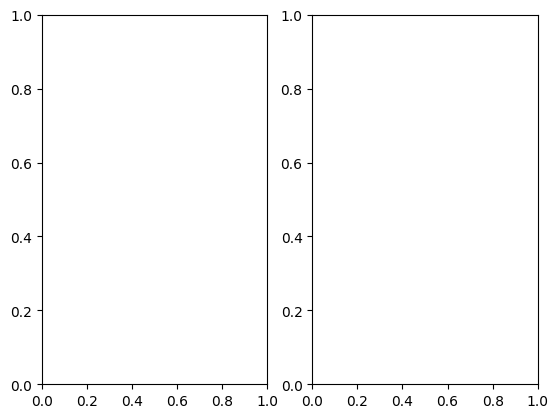

In [15]:
idx = np.random.randint(27000)
fig,ax = plt.subplots(1,2)
ax[0].imshow(np.asarray(Image.open(join(path_target, f'{idx}.jpg'))))
ax[1].imshow(np.asarray(Image.open(join(path_input, f'{idx}.jpg'))))
ax[0].set_title("Target")
ax[0].axis('off')
ax[1].set_title("Input")
ax[1].axis('off')
plt.show()

Dataset URL: https://www.kaggle.com/datasets/apollo2506/eurosat-dataset
Contents of dataset_path: ['EuroSATallBands', 'EuroSAT']
Using path_input: ./datasets/EuroSATallBands
Dataset processing complete.
Total files in target directory: 27597


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1.jpg is not a valid image and will be skipped.
File 2.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3.jpg is not a valid image and will be skipped.
File 4.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5.jpg is not a valid image and will be skipped.
File 6.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7.jpg is not a valid image and will be skipped.
File 8.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9.jpg is not a valid image and will be skipped.
File 10.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11.jpg is not a valid image and will be skipped.
File 12.jpg is not a valid image and will be skipped.
File 13.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14.jpg is not a valid image and will be skipped.
File 15.jpg is not a valid image and will be skipped.
File 16.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17.jpg is not a valid image and will be skipped.
File 18.jpg is not a valid image and will be skipped.
File 19.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20.jpg is not a valid image and will be skipped.
File 21.jpg is not a valid image and will be skipped.
File 22.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23.jpg is not a valid image and will be skipped.
File 24.jpg is not a valid image and will be skipped.
File 25.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26.jpg is not a valid image and will be skipped.
File 27.jpg is not a valid image and will be skipped.
File 28.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 29.jpg is not a valid image and will be skipped.
File 30.jpg is not a valid image and will be skipped.
File 31.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 32.jpg is not a valid image and will be skipped.
File 33.jpg is not a valid image and will be skipped.
File 34.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 35.jpg is not a valid image and will be skipped.
File 36.jpg is not a valid image and will be skipped.
File 37.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 38.jpg is not a valid image and will be skipped.
File 39.jpg is not a valid image and will be skipped.
File 40.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 41.jpg is not a valid image and will be skipped.
File 42.jpg is not a valid image and will be skipped.
File 43.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 44.jpg is not a valid image and will be skipped.
File 45.jpg is not a valid image and will be skipped.
File 46.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 47.jpg is not a valid image and will be skipped.
File 48.jpg is not a valid image and will be skipped.
File 49.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 50.jpg is not a valid image and will be skipped.
File 51.jpg is not a valid image and will be skipped.
File 52.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 53.jpg is not a valid image and will be skipped.
File 54.jpg is not a valid image and will be skipped.
File 55.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 56.jpg is not a valid image and will be skipped.
File 57.jpg is not a valid image and will be skipped.
File 58.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 59.jpg is not a valid image and will be skipped.
File 60.jpg is not a valid image and will be skipped.
File 61.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 62.jpg is not a valid image and will be skipped.
File 63.jpg is not a valid image and will be skipped.
File 64.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 65.jpg is not a valid image and will be skipped.
File 66.jpg is not a valid image and will be skipped.
File 67.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 68.jpg is not a valid image and will be skipped.
File 69.jpg is not a valid image and will be skipped.
File 70.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 71.jpg is not a valid image and will be skipped.
File 72.jpg is not a valid image and will be skipped.
File 73.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 74.jpg is not a valid image and will be skipped.
File 75.jpg is not a valid image and will be skipped.
File 76.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 77.jpg is not a valid image and will be skipped.
File 78.jpg is not a valid image and will be skipped.
File 79.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 80.jpg is not a valid image and will be skipped.
File 81.jpg is not a valid image and will be skipped.
File 82.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 83.jpg is not a valid image and will be skipped.
File 84.jpg is not a valid image and will be skipped.
File 85.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 86.jpg is not a valid image and will be skipped.
File 87.jpg is not a valid image and will be skipped.
File 88.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 89.jpg is not a valid image and will be skipped.
File 90.jpg is not a valid image and will be skipped.
File 91.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 92.jpg is not a valid image and will be skipped.
File 93.jpg is not a valid image and will be skipped.
File 94.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 95.jpg is not a valid image and will be skipped.
File 96.jpg is not a valid image and will be skipped.
File 97.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 98.jpg is not a valid image and will be skipped.
File 99.jpg is not a valid image and will be skipped.
File 100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 101.jpg is not a valid image and will be skipped.
File 102.jpg is not a valid image and will be skipped.
File 103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 104.jpg is not a valid image and will be skipped.
File 105.jpg is not a valid image and will be skipped.
File 106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 107.jpg is not a valid image and will be skipped.
File 108.jpg is not a valid image and will be skipped.
File 109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 110.jpg is not a valid image and will be skipped.
File 111.jpg is not a valid image and will be skipped.
File 112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 113.jpg is not a valid image and will be skipped.
File 114.jpg is not a valid image and will be skipped.
File 115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 116.jpg is not a valid image and will be skipped.
File 117.jpg is not a valid image and will be skipped.
File 118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 119.jpg is not a valid image and will be skipped.
File 120.jpg is not a valid image and will be skipped.
File 121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 122.jpg is not a valid image and will be skipped.
File 123.jpg is not a valid image and will be skipped.
File 124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 125.jpg is not a valid image and will be skipped.
File 126.jpg is not a valid image and will be skipped.
File 127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 128.jpg is not a valid image and will be skipped.
File 129.jpg is not a valid image and will be skipped.
File 130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 131.jpg is not a valid image and will be skipped.
File 132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 133.jpg is not a valid image and will be skipped.
File 134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 135.jpg is not a valid image and will be skipped.
File 136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 137.jpg is not a valid image and will be skipped.
File 138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 139.jpg is not a valid image and will be skipped.
File 140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 141.jpg is not a valid image and will be skipped.
File 142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 143.jpg is not a valid image and will be skipped.
File 144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 145.jpg is not a valid image and will be skipped.
File 146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 147.jpg is not a valid image and will be skipped.
File 148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 149.jpg is not a valid image and will be skipped.
File 150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 151.jpg is not a valid image and will be skipped.
File 152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 153.jpg is not a valid image and will be skipped.
File 154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 155.jpg is not a valid image and will be skipped.
File 156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 157.jpg is not a valid image and will be skipped.
File 158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 159.jpg is not a valid image and will be skipped.
File 160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 161.jpg is not a valid image and will be skipped.
File 162.jpg is not a valid image and will be skipped.
File 163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 164.jpg is not a valid image and will be skipped.
File 165.jpg is not a valid image and will be skipped.
File 166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 167.jpg is not a valid image and will be skipped.
File 168.jpg is not a valid image and will be skipped.
File 169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 170.jpg is not a valid image and will be skipped.
File 171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 172.jpg is not a valid image and will be skipped.
File 173.jpg is not a valid image and will be skipped.
File 174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 175.jpg is not a valid image and will be skipped.
File 176.jpg is not a valid image and will be skipped.
File 177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 178.jpg is not a valid image and will be skipped.
File 179.jpg is not a valid image and will be skipped.
File 180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 181.jpg is not a valid image and will be skipped.
File 182.jpg is not a valid image and will be skipped.
File 183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 184.jpg is not a valid image and will be skipped.
File 185.jpg is not a valid image and will be skipped.
File 186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 187.jpg is not a valid image and will be skipped.
File 188.jpg is not a valid image and will be skipped.
File 189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 190.jpg is not a valid image and will be skipped.
File 191.jpg is not a valid image and will be skipped.
File 192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 193.jpg is not a valid image and will be skipped.
File 194.jpg is not a valid image and will be skipped.
File 195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 196.jpg is not a valid image and will be skipped.
File 197.jpg is not a valid image and will be skipped.
File 198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 199.jpg is not a valid image and will be skipped.
File 200.jpg is not a valid image and will be skipped.
File 201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 202.jpg is not a valid image and will be skipped.
File 203.jpg is not a valid image and will be skipped.
File 204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 205.jpg is not a valid image and will be skipped.
File 206.jpg is not a valid image and will be skipped.
File 207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 208.jpg is not a valid image and will be skipped.
File 209.jpg is not a valid image and will be skipped.
File 210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 211.jpg is not a valid image and will be skipped.
File 212.jpg is not a valid image and will be skipped.
File 213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 214.jpg is not a valid image and will be skipped.
File 215.jpg is not a valid image and will be skipped.
File 216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 217.jpg is not a valid image and will be skipped.
File 218.jpg is not a valid image and will be skipped.
File 219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 220.jpg is not a valid image and will be skipped.
File 221.jpg is not a valid image and will be skipped.
File 222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 223.jpg is not a valid image and will be skipped.
File 224.jpg is not a valid image and will be skipped.
File 225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 226.jpg is not a valid image and will be skipped.
File 227.jpg is not a valid image and will be skipped.
File 228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 229.jpg is not a valid image and will be skipped.
File 230.jpg is not a valid image and will be skipped.
File 231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 232.jpg is not a valid image and will be skipped.
File 233.jpg is not a valid image and will be skipped.
File 234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 235.jpg is not a valid image and will be skipped.
File 236.jpg is not a valid image and will be skipped.
File 237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 238.jpg is not a valid image and will be skipped.
File 239.jpg is not a valid image and will be skipped.
File 240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 241.jpg is not a valid image and will be skipped.
File 242.jpg is not a valid image and will be skipped.
File 243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 244.jpg is not a valid image and will be skipped.
File 245.jpg is not a valid image and will be skipped.
File 246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 247.jpg is not a valid image and will be skipped.
File 248.jpg is not a valid image and will be skipped.
File 249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 250.jpg is not a valid image and will be skipped.
File 251.jpg is not a valid image and will be skipped.
File 252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 253.jpg is not a valid image and will be skipped.
File 254.jpg is not a valid image and will be skipped.
File 255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 256.jpg is not a valid image and will be skipped.
File 257.jpg is not a valid image and will be skipped.
File 258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 259.jpg is not a valid image and will be skipped.
File 260.jpg is not a valid image and will be skipped.
File 261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 262.jpg is not a valid image and will be skipped.
File 263.jpg is not a valid image and will be skipped.
File 264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 265.jpg is not a valid image and will be skipped.
File 266.jpg is not a valid image and will be skipped.
File 267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 268.jpg is not a valid image and will be skipped.
File 269.jpg is not a valid image and will be skipped.
File 270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 271.jpg is not a valid image and will be skipped.
File 272.jpg is not a valid image and will be skipped.
File 273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 274.jpg is not a valid image and will be skipped.
File 275.jpg is not a valid image and will be skipped.
File 276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 277.jpg is not a valid image and will be skipped.
File 278.jpg is not a valid image and will be skipped.
File 279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 280.jpg is not a valid image and will be skipped.
File 281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 282.jpg is not a valid image and will be skipped.
File 283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 284.jpg is not a valid image and will be skipped.
File 285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 286.jpg is not a valid image and will be skipped.
File 287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 288.jpg is not a valid image and will be skipped.
File 289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 290.jpg is not a valid image and will be skipped.
File 291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 292.jpg is not a valid image and will be skipped.
File 293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 294.jpg is not a valid image and will be skipped.
File 295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 296.jpg is not a valid image and will be skipped.
File 297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 298.jpg is not a valid image and will be skipped.
File 299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 300.jpg is not a valid image and will be skipped.
File 301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 302.jpg is not a valid image and will be skipped.
File 303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 304.jpg is not a valid image and will be skipped.
File 305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 306.jpg is not a valid image and will be skipped.
File 307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 308.jpg is not a valid image and will be skipped.
File 309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 310.jpg is not a valid image and will be skipped.
File 311.jpg is not a valid image and will be skipped.
File 312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 313.jpg is not a valid image and will be skipped.
File 314.jpg is not a valid image and will be skipped.
File 315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 316.jpg is not a valid image and will be skipped.
File 317.jpg is not a valid image and will be skipped.
File 318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 319.jpg is not a valid image and will be skipped.
File 320.jpg is not a valid image and will be skipped.
File 321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 322.jpg is not a valid image and will be skipped.
File 323.jpg is not a valid image and will be skipped.
File 324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 325.jpg is not a valid image and will be skipped.
File 326.jpg is not a valid image and will be skipped.
File 327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 328.jpg is not a valid image and will be skipped.
File 329.jpg is not a valid image and will be skipped.
File 330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 331.jpg is not a valid image and will be skipped.
File 332.jpg is not a valid image and will be skipped.
File 333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 334.jpg is not a valid image and will be skipped.
File 335.jpg is not a valid image and will be skipped.
File 336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 337.jpg is not a valid image and will be skipped.
File 338.jpg is not a valid image and will be skipped.
File 339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 340.jpg is not a valid image and will be skipped.
File 341.jpg is not a valid image and will be skipped.
File 342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 343.jpg is not a valid image and will be skipped.
File 344.jpg is not a valid image and will be skipped.
File 345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 346.jpg is not a valid image and will be skipped.
File 347.jpg is not a valid image and will be skipped.
File 348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 349.jpg is not a valid image and will be skipped.
File 350.jpg is not a valid image and will be skipped.
File 351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 352.jpg is not a valid image and will be skipped.
File 353.jpg is not a valid image and will be skipped.
File 354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 355.jpg is not a valid image and will be skipped.
File 356.jpg is not a valid image and will be skipped.
File 357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 358.jpg is not a valid image and will be skipped.
File 359.jpg is not a valid image and will be skipped.
File 360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 361.jpg is not a valid image and will be skipped.
File 362.jpg is not a valid image and will be skipped.
File 363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 364.jpg is not a valid image and will be skipped.
File 365.jpg is not a valid image and will be skipped.
File 366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 367.jpg is not a valid image and will be skipped.
File 368.jpg is not a valid image and will be skipped.
File 369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 370.jpg is not a valid image and will be skipped.
File 371.jpg is not a valid image and will be skipped.
File 372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 373.jpg is not a valid image and will be skipped.
File 374.jpg is not a valid image and will be skipped.
File 375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 376.jpg is not a valid image and will be skipped.
File 377.jpg is not a valid image and will be skipped.
File 378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 379.jpg is not a valid image and will be skipped.
File 380.jpg is not a valid image and will be skipped.
File 381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 382.jpg is not a valid image and will be skipped.
File 383.jpg is not a valid image and will be skipped.
File 384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 385.jpg is not a valid image and will be skipped.
File 386.jpg is not a valid image and will be skipped.
File 387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 388.jpg is not a valid image and will be skipped.
File 389.jpg is not a valid image and will be skipped.
File 390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 391.jpg is not a valid image and will be skipped.
File 392.jpg is not a valid image and will be skipped.
File 393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 394.jpg is not a valid image and will be skipped.
File 395.jpg is not a valid image and will be skipped.
File 396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 397.jpg is not a valid image and will be skipped.
File 398.jpg is not a valid image and will be skipped.
File 399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 400.jpg is not a valid image and will be skipped.
File 401.jpg is not a valid image and will be skipped.
File 402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 403.jpg is not a valid image and will be skipped.
File 404.jpg is not a valid image and will be skipped.
File 405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 406.jpg is not a valid image and will be skipped.
File 407.jpg is not a valid image and will be skipped.
File 408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 409.jpg is not a valid image and will be skipped.
File 410.jpg is not a valid image and will be skipped.
File 411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 412.jpg is not a valid image and will be skipped.
File 413.jpg is not a valid image and will be skipped.
File 414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 415.jpg is not a valid image and will be skipped.
File 416.jpg is not a valid image and will be skipped.
File 417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 418.jpg is not a valid image and will be skipped.
File 419.jpg is not a valid image and will be skipped.
File 420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 421.jpg is not a valid image and will be skipped.
File 422.jpg is not a valid image and will be skipped.
File 423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 424.jpg is not a valid image and will be skipped.
File 425.jpg is not a valid image and will be skipped.
File 426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 427.jpg is not a valid image and will be skipped.
File 428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 429.jpg is not a valid image and will be skipped.
File 430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 431.jpg is not a valid image and will be skipped.
File 432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 433.jpg is not a valid image and will be skipped.
File 434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 435.jpg is not a valid image and will be skipped.
File 436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 437.jpg is not a valid image and will be skipped.
File 438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 439.jpg is not a valid image and will be skipped.
File 440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 441.jpg is not a valid image and will be skipped.
File 442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 443.jpg is not a valid image and will be skipped.
File 444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 445.jpg is not a valid image and will be skipped.
File 446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 447.jpg is not a valid image and will be skipped.
File 448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 449.jpg is not a valid image and will be skipped.
File 450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 451.jpg is not a valid image and will be skipped.
File 452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 453.jpg is not a valid image and will be skipped.
File 454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 455.jpg is not a valid image and will be skipped.
File 456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 457.jpg is not a valid image and will be skipped.
File 458.jpg is not a valid image and will be skipped.
File 459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 460.jpg is not a valid image and will be skipped.
File 461.jpg is not a valid image and will be skipped.
File 462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 463.jpg is not a valid image and will be skipped.
File 464.jpg is not a valid image and will be skipped.
File 465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 466.jpg is not a valid image and will be skipped.
File 467.jpg is not a valid image and will be skipped.
File 468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 469.jpg is not a valid image and will be skipped.
File 470.jpg is not a valid image and will be skipped.
File 471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 472.jpg is not a valid image and will be skipped.
File 473.jpg is not a valid image and will be skipped.
File 474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 475.jpg is not a valid image and will be skipped.
File 476.jpg is not a valid image and will be skipped.
File 477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 478.jpg is not a valid image and will be skipped.
File 479.jpg is not a valid image and will be skipped.
File 480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 481.jpg is not a valid image and will be skipped.
File 482.jpg is not a valid image and will be skipped.
File 483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 484.jpg is not a valid image and will be skipped.
File 485.jpg is not a valid image and will be skipped.
File 486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 487.jpg is not a valid image and will be skipped.
File 488.jpg is not a valid image and will be skipped.
File 489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 490.jpg is not a valid image and will be skipped.
File 491.jpg is not a valid image and will be skipped.
File 492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 493.jpg is not a valid image and will be skipped.
File 494.jpg is not a valid image and will be skipped.
File 495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 496.jpg is not a valid image and will be skipped.
File 497.jpg is not a valid image and will be skipped.
File 498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 499.jpg is not a valid image and will be skipped.
File 500.jpg is not a valid image and will be skipped.
File 501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 502.jpg is not a valid image and will be skipped.
File 503.jpg is not a valid image and will be skipped.
File 504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 505.jpg is not a valid image and will be skipped.
File 506.jpg is not a valid image and will be skipped.
File 507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 508.jpg is not a valid image and will be skipped.
File 509.jpg is not a valid image and will be skipped.
File 510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 511.jpg is not a valid image and will be skipped.
File 512.jpg is not a valid image and will be skipped.
File 513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 514.jpg is not a valid image and will be skipped.
File 515.jpg is not a valid image and will be skipped.
File 516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 517.jpg is not a valid image and will be skipped.
File 518.jpg is not a valid image and will be skipped.
File 519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 520.jpg is not a valid image and will be skipped.
File 521.jpg is not a valid image and will be skipped.
File 522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 523.jpg is not a valid image and will be skipped.
File 524.jpg is not a valid image and will be skipped.
File 525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 526.jpg is not a valid image and will be skipped.
File 527.jpg is not a valid image and will be skipped.
File 528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 529.jpg is not a valid image and will be skipped.
File 530.jpg is not a valid image and will be skipped.
File 531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 532.jpg is not a valid image and will be skipped.
File 533.jpg is not a valid image and will be skipped.
File 534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 535.jpg is not a valid image and will be skipped.
File 536.jpg is not a valid image and will be skipped.
File 537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 538.jpg is not a valid image and will be skipped.
File 539.jpg is not a valid image and will be skipped.
File 540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 541.jpg is not a valid image and will be skipped.
File 542.jpg is not a valid image and will be skipped.
File 543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 544.jpg is not a valid image and will be skipped.
File 545.jpg is not a valid image and will be skipped.
File 546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 547.jpg is not a valid image and will be skipped.
File 548.jpg is not a valid image and will be skipped.
File 549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 550.jpg is not a valid image and will be skipped.
File 551.jpg is not a valid image and will be skipped.
File 552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 553.jpg is not a valid image and will be skipped.
File 554.jpg is not a valid image and will be skipped.
File 555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 556.jpg is not a valid image and will be skipped.
File 557.jpg is not a valid image and will be skipped.
File 558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 559.jpg is not a valid image and will be skipped.
File 560.jpg is not a valid image and will be skipped.
File 561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 562.jpg is not a valid image and will be skipped.
File 563.jpg is not a valid image and will be skipped.
File 564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 565.jpg is not a valid image and will be skipped.
File 566.jpg is not a valid image and will be skipped.
File 567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 568.jpg is not a valid image and will be skipped.
File 569.jpg is not a valid image and will be skipped.
File 570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 571.jpg is not a valid image and will be skipped.
File 572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 573.jpg is not a valid image and will be skipped.
File 574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 575.jpg is not a valid image and will be skipped.
File 576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 577.jpg is not a valid image and will be skipped.
File 578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 579.jpg is not a valid image and will be skipped.
File 580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 581.jpg is not a valid image and will be skipped.
File 582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 583.jpg is not a valid image and will be skipped.
File 584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 585.jpg is not a valid image and will be skipped.
File 586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 587.jpg is not a valid image and will be skipped.
File 588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 589.jpg is not a valid image and will be skipped.
File 590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 591.jpg is not a valid image and will be skipped.
File 592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 593.jpg is not a valid image and will be skipped.
File 594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 595.jpg is not a valid image and will be skipped.
File 596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 597.jpg is not a valid image and will be skipped.
File 598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 599.jpg is not a valid image and will be skipped.
File 600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 601.jpg is not a valid image and will be skipped.
File 602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 603.jpg is not a valid image and will be skipped.
File 604.jpg is not a valid image and will be skipped.
File 605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 606.jpg is not a valid image and will be skipped.
File 607.jpg is not a valid image and will be skipped.
File 608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 609.jpg is not a valid image and will be skipped.
File 610.jpg is not a valid image and will be skipped.
File 611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 612.jpg is not a valid image and will be skipped.
File 613.jpg is not a valid image and will be skipped.
File 614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 615.jpg is not a valid image and will be skipped.
File 616.jpg is not a valid image and will be skipped.
File 617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 618.jpg is not a valid image and will be skipped.
File 619.jpg is not a valid image and will be skipped.
File 620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 621.jpg is not a valid image and will be skipped.
File 622.jpg is not a valid image and will be skipped.
File 623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 624.jpg is not a valid image and will be skipped.
File 625.jpg is not a valid image and will be skipped.
File 626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 627.jpg is not a valid image and will be skipped.
File 628.jpg is not a valid image and will be skipped.
File 629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 630.jpg is not a valid image and will be skipped.
File 631.jpg is not a valid image and will be skipped.
File 632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 633.jpg is not a valid image and will be skipped.
File 634.jpg is not a valid image and will be skipped.
File 635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 636.jpg is not a valid image and will be skipped.
File 637.jpg is not a valid image and will be skipped.
File 638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 639.jpg is not a valid image and will be skipped.
File 640.jpg is not a valid image and will be skipped.
File 641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 642.jpg is not a valid image and will be skipped.
File 643.jpg is not a valid image and will be skipped.
File 644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 645.jpg is not a valid image and will be skipped.
File 646.jpg is not a valid image and will be skipped.
File 647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 648.jpg is not a valid image and will be skipped.
File 649.jpg is not a valid image and will be skipped.
File 650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 651.jpg is not a valid image and will be skipped.
File 652.jpg is not a valid image and will be skipped.
File 653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 654.jpg is not a valid image and will be skipped.
File 655.jpg is not a valid image and will be skipped.
File 656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 657.jpg is not a valid image and will be skipped.
File 658.jpg is not a valid image and will be skipped.
File 659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 660.jpg is not a valid image and will be skipped.
File 661.jpg is not a valid image and will be skipped.
File 662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 663.jpg is not a valid image and will be skipped.
File 664.jpg is not a valid image and will be skipped.
File 665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 666.jpg is not a valid image and will be skipped.
File 667.jpg is not a valid image and will be skipped.
File 668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 669.jpg is not a valid image and will be skipped.
File 670.jpg is not a valid image and will be skipped.
File 671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 672.jpg is not a valid image and will be skipped.
File 673.jpg is not a valid image and will be skipped.
File 674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 675.jpg is not a valid image and will be skipped.
File 676.jpg is not a valid image and will be skipped.
File 677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 678.jpg is not a valid image and will be skipped.
File 679.jpg is not a valid image and will be skipped.
File 680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 681.jpg is not a valid image and will be skipped.
File 682.jpg is not a valid image and will be skipped.
File 683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 684.jpg is not a valid image and will be skipped.
File 685.jpg is not a valid image and will be skipped.
File 686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 687.jpg is not a valid image and will be skipped.
File 688.jpg is not a valid image and will be skipped.
File 689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 690.jpg is not a valid image and will be skipped.
File 691.jpg is not a valid image and will be skipped.
File 692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 693.jpg is not a valid image and will be skipped.
File 694.jpg is not a valid image and will be skipped.
File 695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 696.jpg is not a valid image and will be skipped.
File 697.jpg is not a valid image and will be skipped.
File 698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 699.jpg is not a valid image and will be skipped.
File 700.jpg is not a valid image and will be skipped.
File 701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 702.jpg is not a valid image and will be skipped.
File 703.jpg is not a valid image and will be skipped.
File 704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 705.jpg is not a valid image and will be skipped.
File 706.jpg is not a valid image and will be skipped.
File 707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 708.jpg is not a valid image and will be skipped.
File 709.jpg is not a valid image and will be skipped.
File 710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 711.jpg is not a valid image and will be skipped.
File 712.jpg is not a valid image and will be skipped.
File 713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 714.jpg is not a valid image and will be skipped.
File 715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 716.jpg is not a valid image and will be skipped.
File 717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 718.jpg is not a valid image and will be skipped.
File 719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 720.jpg is not a valid image and will be skipped.
File 721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 722.jpg is not a valid image and will be skipped.
File 723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 724.jpg is not a valid image and will be skipped.
File 725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 726.jpg is not a valid image and will be skipped.
File 727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 728.jpg is not a valid image and will be skipped.
File 729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 730.jpg is not a valid image and will be skipped.
File 731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 732.jpg is not a valid image and will be skipped.
File 733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 734.jpg is not a valid image and will be skipped.
File 735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 736.jpg is not a valid image and will be skipped.
File 737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 738.jpg is not a valid image and will be skipped.
File 739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 740.jpg is not a valid image and will be skipped.
File 741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 742.jpg is not a valid image and will be skipped.
File 743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 744.jpg is not a valid image and will be skipped.
File 745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 746.jpg is not a valid image and will be skipped.
File 747.jpg is not a valid image and will be skipped.
File 748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 749.jpg is not a valid image and will be skipped.
File 750.jpg is not a valid image and will be skipped.
File 751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 752.jpg is not a valid image and will be skipped.
File 753.jpg is not a valid image and will be skipped.
File 754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 755.jpg is not a valid image and will be skipped.
File 756.jpg is not a valid image and will be skipped.
File 757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 758.jpg is not a valid image and will be skipped.
File 759.jpg is not a valid image and will be skipped.
File 760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 761.jpg is not a valid image and will be skipped.
File 762.jpg is not a valid image and will be skipped.
File 763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 764.jpg is not a valid image and will be skipped.
File 765.jpg is not a valid image and will be skipped.
File 766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 767.jpg is not a valid image and will be skipped.
File 768.jpg is not a valid image and will be skipped.
File 769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 770.jpg is not a valid image and will be skipped.
File 771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 772.jpg is not a valid image and will be skipped.
File 773.jpg is not a valid image and will be skipped.
File 774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 775.jpg is not a valid image and will be skipped.
File 776.jpg is not a valid image and will be skipped.
File 777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 778.jpg is not a valid image and will be skipped.
File 779.jpg is not a valid image and will be skipped.
File 780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 781.jpg is not a valid image and will be skipped.
File 782.jpg is not a valid image and will be skipped.
File 783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 784.jpg is not a valid image and will be skipped.
File 785.jpg is not a valid image and will be skipped.
File 786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 787.jpg is not a valid image and will be skipped.
File 788.jpg is not a valid image and will be skipped.
File 789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 790.jpg is not a valid image and will be skipped.
File 791.jpg is not a valid image and will be skipped.
File 792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 793.jpg is not a valid image and will be skipped.
File 794.jpg is not a valid image and will be skipped.
File 795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 796.jpg is not a valid image and will be skipped.
File 797.jpg is not a valid image and will be skipped.
File 798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 799.jpg is not a valid image and will be skipped.
File 800.jpg is not a valid image and will be skipped.
File 801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 802.jpg is not a valid image and will be skipped.
File 803.jpg is not a valid image and will be skipped.
File 804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 805.jpg is not a valid image and will be skipped.
File 806.jpg is not a valid image and will be skipped.
File 807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 808.jpg is not a valid image and will be skipped.
File 809.jpg is not a valid image and will be skipped.
File 810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 811.jpg is not a valid image and will be skipped.
File 812.jpg is not a valid image and will be skipped.
File 813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 814.jpg is not a valid image and will be skipped.
File 815.jpg is not a valid image and will be skipped.
File 816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 817.jpg is not a valid image and will be skipped.
File 818.jpg is not a valid image and will be skipped.
File 819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 820.jpg is not a valid image and will be skipped.
File 821.jpg is not a valid image and will be skipped.
File 822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 823.jpg is not a valid image and will be skipped.
File 824.jpg is not a valid image and will be skipped.
File 825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 826.jpg is not a valid image and will be skipped.
File 827.jpg is not a valid image and will be skipped.
File 828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 829.jpg is not a valid image and will be skipped.
File 830.jpg is not a valid image and will be skipped.
File 831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 832.jpg is not a valid image and will be skipped.
File 833.jpg is not a valid image and will be skipped.
File 834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 835.jpg is not a valid image and will be skipped.
File 836.jpg is not a valid image and will be skipped.
File 837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 838.jpg is not a valid image and will be skipped.
File 839.jpg is not a valid image and will be skipped.
File 840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 841.jpg is not a valid image and will be skipped.
File 842.jpg is not a valid image and will be skipped.
File 843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 844.jpg is not a valid image and will be skipped.
File 845.jpg is not a valid image and will be skipped.
File 846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 847.jpg is not a valid image and will be skipped.
File 848.jpg is not a valid image and will be skipped.
File 849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 850.jpg is not a valid image and will be skipped.
File 851.jpg is not a valid image and will be skipped.
File 852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 853.jpg is not a valid image and will be skipped.
File 854.jpg is not a valid image and will be skipped.
File 855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 856.jpg is not a valid image and will be skipped.
File 857.jpg is not a valid image and will be skipped.
File 858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 859.jpg is not a valid image and will be skipped.
File 860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 861.jpg is not a valid image and will be skipped.
File 862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 863.jpg is not a valid image and will be skipped.
File 864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 865.jpg is not a valid image and will be skipped.
File 866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 867.jpg is not a valid image and will be skipped.
File 868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 869.jpg is not a valid image and will be skipped.
File 870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 871.jpg is not a valid image and will be skipped.
File 872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 873.jpg is not a valid image and will be skipped.
File 874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 875.jpg is not a valid image and will be skipped.
File 876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 877.jpg is not a valid image and will be skipped.
File 878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 879.jpg is not a valid image and will be skipped.
File 880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 881.jpg is not a valid image and will be skipped.
File 882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 883.jpg is not a valid image and will be skipped.
File 884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 885.jpg is not a valid image and will be skipped.
File 886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 887.jpg is not a valid image and will be skipped.
File 888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 889.jpg is not a valid image and will be skipped.
File 890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 891.jpg is not a valid image and will be skipped.
File 892.jpg is not a valid image and will be skipped.
File 893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 894.jpg is not a valid image and will be skipped.
File 895.jpg is not a valid image and will be skipped.
File 896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 897.jpg is not a valid image and will be skipped.
File 898.jpg is not a valid image and will be skipped.
File 899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 900.jpg is not a valid image and will be skipped.
File 901.jpg is not a valid image and will be skipped.
File 902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 903.jpg is not a valid image and will be skipped.
File 904.jpg is not a valid image and will be skipped.
File 905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 906.jpg is not a valid image and will be skipped.
File 907.jpg is not a valid image and will be skipped.
File 908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 909.jpg is not a valid image and will be skipped.
File 910.jpg is not a valid image and will be skipped.
File 911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 912.jpg is not a valid image and will be skipped.
File 913.jpg is not a valid image and will be skipped.
File 914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 915.jpg is not a valid image and will be skipped.
File 916.jpg is not a valid image and will be skipped.
File 917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 918.jpg is not a valid image and will be skipped.
File 919.jpg is not a valid image and will be skipped.
File 920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 921.jpg is not a valid image and will be skipped.
File 922.jpg is not a valid image and will be skipped.
File 923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 924.jpg is not a valid image and will be skipped.
File 925.jpg is not a valid image and will be skipped.
File 926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 927.jpg is not a valid image and will be skipped.
File 928.jpg is not a valid image and will be skipped.
File 929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 930.jpg is not a valid image and will be skipped.
File 931.jpg is not a valid image and will be skipped.
File 932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 933.jpg is not a valid image and will be skipped.
File 934.jpg is not a valid image and will be skipped.
File 935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 936.jpg is not a valid image and will be skipped.
File 937.jpg is not a valid image and will be skipped.
File 938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 939.jpg is not a valid image and will be skipped.
File 940.jpg is not a valid image and will be skipped.
File 941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 942.jpg is not a valid image and will be skipped.
File 943.jpg is not a valid image and will be skipped.
File 944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 945.jpg is not a valid image and will be skipped.
File 946.jpg is not a valid image and will be skipped.
File 947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 948.jpg is not a valid image and will be skipped.
File 949.jpg is not a valid image and will be skipped.
File 950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 951.jpg is not a valid image and will be skipped.
File 952.jpg is not a valid image and will be skipped.
File 953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 954.jpg is not a valid image and will be skipped.
File 955.jpg is not a valid image and will be skipped.
File 956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 957.jpg is not a valid image and will be skipped.
File 958.jpg is not a valid image and will be skipped.
File 959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 960.jpg is not a valid image and will be skipped.
File 961.jpg is not a valid image and will be skipped.
File 962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 963.jpg is not a valid image and will be skipped.
File 964.jpg is not a valid image and will be skipped.
File 965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 966.jpg is not a valid image and will be skipped.
File 967.jpg is not a valid image and will be skipped.
File 968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 969.jpg is not a valid image and will be skipped.
File 970.jpg is not a valid image and will be skipped.
File 971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 972.jpg is not a valid image and will be skipped.
File 973.jpg is not a valid image and will be skipped.
File 974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 975.jpg is not a valid image and will be skipped.
File 976.jpg is not a valid image and will be skipped.
File 977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 978.jpg is not a valid image and will be skipped.
File 979.jpg is not a valid image and will be skipped.
File 980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 981.jpg is not a valid image and will be skipped.
File 982.jpg is not a valid image and will be skipped.
File 983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 984.jpg is not a valid image and will be skipped.
File 985.jpg is not a valid image and will be skipped.
File 986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 987.jpg is not a valid image and will be skipped.
File 988.jpg is not a valid image and will be skipped.
File 989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 990.jpg is not a valid image and will be skipped.
File 991.jpg is not a valid image and will be skipped.
File 992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 993.jpg is not a valid image and will be skipped.
File 994.jpg is not a valid image and will be skipped.
File 995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 996.jpg is not a valid image and will be skipped.
File 997.jpg is not a valid image and will be skipped.
File 998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 999.jpg is not a valid image and will be skipped.
File 1000.jpg is not a valid image and will be skipped.
File 1001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1002.jpg is not a valid image and will be skipped.
File 1003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1004.jpg is not a valid image and will be skipped.
File 1005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1006.jpg is not a valid image and will be skipped.
File 1007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1008.jpg is not a valid image and will be skipped.
File 1009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1010.jpg is not a valid image and will be skipped.
File 1011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1012.jpg is not a valid image and will be skipped.
File 1013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1014.jpg is not a valid image and will be skipped.
File 1015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1016.jpg is not a valid image and will be skipped.
File 1017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1018.jpg is not a valid image and will be skipped.
File 1019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1020.jpg is not a valid image and will be skipped.
File 1021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1022.jpg is not a valid image and will be skipped.
File 1023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1024.jpg is not a valid image and will be skipped.
File 1025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1026.jpg is not a valid image and will be skipped.
File 1027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1028.jpg is not a valid image and will be skipped.
File 1029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1030.jpg is not a valid image and will be skipped.
File 1031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1032.jpg is not a valid image and will be skipped.
File 1033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1034.jpg is not a valid image and will be skipped.
File 1035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1036.jpg is not a valid image and will be skipped.
File 1037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1038.jpg is not a valid image and will be skipped.
File 1039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1040.jpg is not a valid image and will be skipped.
File 1041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1042.jpg is not a valid image and will be skipped.
File 1043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1044.jpg is not a valid image and will be skipped.
File 1045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1046.jpg is not a valid image and will be skipped.
File 1047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1048.jpg is not a valid image and will be skipped.
File 1049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1050.jpg is not a valid image and will be skipped.
File 1051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1052.jpg is not a valid image and will be skipped.
File 1053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1054.jpg is not a valid image and will be skipped.
File 1055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1056.jpg is not a valid image and will be skipped.
File 1057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1058.jpg is not a valid image and will be skipped.
File 1059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1060.jpg is not a valid image and will be skipped.
File 1061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1062.jpg is not a valid image and will be skipped.
File 1063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1064.jpg is not a valid image and will be skipped.
File 1065.jpg is not a valid image and will be skipped.
File 1066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1067.jpg is not a valid image and will be skipped.
File 1068.jpg is not a valid image and will be skipped.
File 1069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1070.jpg is not a valid image and will be skipped.
File 1071.jpg is not a valid image and will be skipped.
File 1072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1073.jpg is not a valid image and will be skipped.
File 1074.jpg is not a valid image and will be skipped.
File 1075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1076.jpg is not a valid image and will be skipped.
File 1077.jpg is not a valid image and will be skipped.
File 1078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1079.jpg is not a valid image and will be skipped.
File 1080.jpg is not a valid image and will be skipped.
File 1081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1082.jpg is not a valid image and will be skipped.
File 1083.jpg is not a valid image and will be skipped.
File 1084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1085.jpg is not a valid image and will be skipped.
File 1086.jpg is not a valid image and will be skipped.
File 1087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1088.jpg is not a valid image and will be skipped.
File 1089.jpg is not a valid image and will be skipped.
File 1090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1091.jpg is not a valid image and will be skipped.
File 1092.jpg is not a valid image and will be skipped.
File 1093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1094.jpg is not a valid image and will be skipped.
File 1095.jpg is not a valid image and will be skipped.
File 1096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1097.jpg is not a valid image and will be skipped.
File 1098.jpg is not a valid image and will be skipped.
File 1099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1100.jpg is not a valid image and will be skipped.
File 1101.jpg is not a valid image and will be skipped.
File 1102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1103.jpg is not a valid image and will be skipped.
File 1104.jpg is not a valid image and will be skipped.
File 1105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1106.jpg is not a valid image and will be skipped.
File 1107.jpg is not a valid image and will be skipped.
File 1108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1109.jpg is not a valid image and will be skipped.
File 1110.jpg is not a valid image and will be skipped.
File 1111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1112.jpg is not a valid image and will be skipped.
File 1113.jpg is not a valid image and will be skipped.
File 1114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1115.jpg is not a valid image and will be skipped.
File 1116.jpg is not a valid image and will be skipped.
File 1117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1118.jpg is not a valid image and will be skipped.
File 1119.jpg is not a valid image and will be skipped.
File 1120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1121.jpg is not a valid image and will be skipped.
File 1122.jpg is not a valid image and will be skipped.
File 1123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1124.jpg is not a valid image and will be skipped.
File 1125.jpg is not a valid image and will be skipped.
File 1126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1127.jpg is not a valid image and will be skipped.
File 1128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1129.jpg is not a valid image and will be skipped.
File 1130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1131.jpg is not a valid image and will be skipped.
File 1132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1133.jpg is not a valid image and will be skipped.
File 1134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1135.jpg is not a valid image and will be skipped.
File 1136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1137.jpg is not a valid image and will be skipped.
File 1138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1139.jpg is not a valid image and will be skipped.
File 1140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1141.jpg is not a valid image and will be skipped.
File 1142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1143.jpg is not a valid image and will be skipped.
File 1144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1145.jpg is not a valid image and will be skipped.
File 1146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1147.jpg is not a valid image and will be skipped.
File 1148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1149.jpg is not a valid image and will be skipped.
File 1150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1151.jpg is not a valid image and will be skipped.
File 1152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1153.jpg is not a valid image and will be skipped.
File 1154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1155.jpg is not a valid image and will be skipped.
File 1156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1157.jpg is not a valid image and will be skipped.
File 1158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1159.jpg is not a valid image and will be skipped.
File 1160.jpg is not a valid image and will be skipped.
File 1161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1162.jpg is not a valid image and will be skipped.
File 1163.jpg is not a valid image and will be skipped.
File 1164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1165.jpg is not a valid image and will be skipped.
File 1166.jpg is not a valid image and will be skipped.
File 1167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1168.jpg is not a valid image and will be skipped.
File 1169.jpg is not a valid image and will be skipped.
File 1170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1171.jpg is not a valid image and will be skipped.
File 1172.jpg is not a valid image and will be skipped.
File 1173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1174.jpg is not a valid image and will be skipped.
File 1175.jpg is not a valid image and will be skipped.
File 1176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1177.jpg is not a valid image and will be skipped.
File 1178.jpg is not a valid image and will be skipped.
File 1179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1180.jpg is not a valid image and will be skipped.
File 1181.jpg is not a valid image and will be skipped.
File 1182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1183.jpg is not a valid image and will be skipped.
File 1184.jpg is not a valid image and will be skipped.
File 1185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1186.jpg is not a valid image and will be skipped.
File 1187.jpg is not a valid image and will be skipped.
File 1188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1189.jpg is not a valid image and will be skipped.
File 1190.jpg is not a valid image and will be skipped.
File 1191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1192.jpg is not a valid image and will be skipped.
File 1193.jpg is not a valid image and will be skipped.
File 1194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1195.jpg is not a valid image and will be skipped.
File 1196.jpg is not a valid image and will be skipped.
File 1197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1198.jpg is not a valid image and will be skipped.
File 1199.jpg is not a valid image and will be skipped.
File 1200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1201.jpg is not a valid image and will be skipped.
File 1202.jpg is not a valid image and will be skipped.
File 1203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1204.jpg is not a valid image and will be skipped.
File 1205.jpg is not a valid image and will be skipped.
File 1206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1207.jpg is not a valid image and will be skipped.
File 1208.jpg is not a valid image and will be skipped.
File 1209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1210.jpg is not a valid image and will be skipped.
File 1211.jpg is not a valid image and will be skipped.
File 1212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1213.jpg is not a valid image and will be skipped.
File 1214.jpg is not a valid image and will be skipped.
File 1215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1216.jpg is not a valid image and will be skipped.
File 1217.jpg is not a valid image and will be skipped.
File 1218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1219.jpg is not a valid image and will be skipped.
File 1220.jpg is not a valid image and will be skipped.
File 1221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1222.jpg is not a valid image and will be skipped.
File 1223.jpg is not a valid image and will be skipped.
File 1224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1225.jpg is not a valid image and will be skipped.
File 1226.jpg is not a valid image and will be skipped.
File 1227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1228.jpg is not a valid image and will be skipped.
File 1229.jpg is not a valid image and will be skipped.
File 1230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1231.jpg is not a valid image and will be skipped.
File 1232.jpg is not a valid image and will be skipped.
File 1233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1234.jpg is not a valid image and will be skipped.
File 1235.jpg is not a valid image and will be skipped.
File 1236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1237.jpg is not a valid image and will be skipped.
File 1238.jpg is not a valid image and will be skipped.
File 1239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1240.jpg is not a valid image and will be skipped.
File 1241.jpg is not a valid image and will be skipped.
File 1242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1243.jpg is not a valid image and will be skipped.
File 1244.jpg is not a valid image and will be skipped.
File 1245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1246.jpg is not a valid image and will be skipped.
File 1247.jpg is not a valid image and will be skipped.
File 1248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1249.jpg is not a valid image and will be skipped.
File 1250.jpg is not a valid image and will be skipped.
File 1251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1252.jpg is not a valid image and will be skipped.
File 1253.jpg is not a valid image and will be skipped.
File 1254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1255.jpg is not a valid image and will be skipped.
File 1256.jpg is not a valid image and will be skipped.
File 1257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1258.jpg is not a valid image and will be skipped.
File 1259.jpg is not a valid image and will be skipped.
File 1260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1261.jpg is not a valid image and will be skipped.
File 1262.jpg is not a valid image and will be skipped.
File 1263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1264.jpg is not a valid image and will be skipped.
File 1265.jpg is not a valid image and will be skipped.
File 1266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1267.jpg is not a valid image and will be skipped.
File 1268.jpg is not a valid image and will be skipped.
File 1269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1270.jpg is not a valid image and will be skipped.
File 1271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1272.jpg is not a valid image and will be skipped.
File 1273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1274.jpg is not a valid image and will be skipped.
File 1275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1276.jpg is not a valid image and will be skipped.
File 1277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1278.jpg is not a valid image and will be skipped.
File 1279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1280.jpg is not a valid image and will be skipped.
File 1281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1282.jpg is not a valid image and will be skipped.
File 1283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1284.jpg is not a valid image and will be skipped.
File 1285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1286.jpg is not a valid image and will be skipped.
File 1287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1288.jpg is not a valid image and will be skipped.
File 1289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1290.jpg is not a valid image and will be skipped.
File 1291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1292.jpg is not a valid image and will be skipped.
File 1293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1294.jpg is not a valid image and will be skipped.
File 1295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1296.jpg is not a valid image and will be skipped.
File 1297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1298.jpg is not a valid image and will be skipped.
File 1299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1300.jpg is not a valid image and will be skipped.
File 1301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1302.jpg is not a valid image and will be skipped.
File 1303.jpg is not a valid image and will be skipped.
File 1304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1305.jpg is not a valid image and will be skipped.
File 1306.jpg is not a valid image and will be skipped.
File 1307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1308.jpg is not a valid image and will be skipped.
File 1309.jpg is not a valid image and will be skipped.
File 1310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1311.jpg is not a valid image and will be skipped.
File 1312.jpg is not a valid image and will be skipped.
File 1313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1314.jpg is not a valid image and will be skipped.
File 1315.jpg is not a valid image and will be skipped.
File 1316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1317.jpg is not a valid image and will be skipped.
File 1318.jpg is not a valid image and will be skipped.
File 1319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1320.jpg is not a valid image and will be skipped.
File 1321.jpg is not a valid image and will be skipped.
File 1322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1323.jpg is not a valid image and will be skipped.
File 1324.jpg is not a valid image and will be skipped.
File 1325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1326.jpg is not a valid image and will be skipped.
File 1327.jpg is not a valid image and will be skipped.
File 1328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1329.jpg is not a valid image and will be skipped.
File 1330.jpg is not a valid image and will be skipped.
File 1331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1332.jpg is not a valid image and will be skipped.
File 1333.jpg is not a valid image and will be skipped.
File 1334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1335.jpg is not a valid image and will be skipped.
File 1336.jpg is not a valid image and will be skipped.
File 1337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1338.jpg is not a valid image and will be skipped.
File 1339.jpg is not a valid image and will be skipped.
File 1340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1341.jpg is not a valid image and will be skipped.
File 1342.jpg is not a valid image and will be skipped.
File 1343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1344.jpg is not a valid image and will be skipped.
File 1345.jpg is not a valid image and will be skipped.
File 1346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1347.jpg is not a valid image and will be skipped.
File 1348.jpg is not a valid image and will be skipped.
File 1349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1350.jpg is not a valid image and will be skipped.
File 1351.jpg is not a valid image and will be skipped.
File 1352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1353.jpg is not a valid image and will be skipped.
File 1354.jpg is not a valid image and will be skipped.
File 1355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1356.jpg is not a valid image and will be skipped.
File 1357.jpg is not a valid image and will be skipped.
File 1358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1359.jpg is not a valid image and will be skipped.
File 1360.jpg is not a valid image and will be skipped.
File 1361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1362.jpg is not a valid image and will be skipped.
File 1363.jpg is not a valid image and will be skipped.
File 1364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1365.jpg is not a valid image and will be skipped.
File 1366.jpg is not a valid image and will be skipped.
File 1367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1368.jpg is not a valid image and will be skipped.
File 1369.jpg is not a valid image and will be skipped.
File 1370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1371.jpg is not a valid image and will be skipped.
File 1372.jpg is not a valid image and will be skipped.
File 1373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1374.jpg is not a valid image and will be skipped.
File 1375.jpg is not a valid image and will be skipped.
File 1376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1377.jpg is not a valid image and will be skipped.
File 1378.jpg is not a valid image and will be skipped.
File 1379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1380.jpg is not a valid image and will be skipped.
File 1381.jpg is not a valid image and will be skipped.
File 1382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1383.jpg is not a valid image and will be skipped.
File 1384.jpg is not a valid image and will be skipped.
File 1385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1386.jpg is not a valid image and will be skipped.
File 1387.jpg is not a valid image and will be skipped.
File 1388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1389.jpg is not a valid image and will be skipped.
File 1390.jpg is not a valid image and will be skipped.
File 1391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1392.jpg is not a valid image and will be skipped.
File 1393.jpg is not a valid image and will be skipped.
File 1394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1395.jpg is not a valid image and will be skipped.
File 1396.jpg is not a valid image and will be skipped.
File 1397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1398.jpg is not a valid image and will be skipped.
File 1399.jpg is not a valid image and will be skipped.
File 1400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1401.jpg is not a valid image and will be skipped.
File 1402.jpg is not a valid image and will be skipped.
File 1403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1404.jpg is not a valid image and will be skipped.
File 1405.jpg is not a valid image and will be skipped.
File 1406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1407.jpg is not a valid image and will be skipped.
File 1408.jpg is not a valid image and will be skipped.
File 1409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1410.jpg is not a valid image and will be skipped.
File 1411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1412.jpg is not a valid image and will be skipped.
File 1413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1414.jpg is not a valid image and will be skipped.
File 1415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1416.jpg is not a valid image and will be skipped.
File 1417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1418.jpg is not a valid image and will be skipped.
File 1419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1420.jpg is not a valid image and will be skipped.
File 1421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1422.jpg is not a valid image and will be skipped.
File 1423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1424.jpg is not a valid image and will be skipped.
File 1425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1426.jpg is not a valid image and will be skipped.
File 1427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1428.jpg is not a valid image and will be skipped.
File 1429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1430.jpg is not a valid image and will be skipped.
File 1431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1432.jpg is not a valid image and will be skipped.
File 1433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1434.jpg is not a valid image and will be skipped.
File 1435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1436.jpg is not a valid image and will be skipped.
File 1437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1438.jpg is not a valid image and will be skipped.
File 1439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1440.jpg is not a valid image and will be skipped.
File 1441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1442.jpg is not a valid image and will be skipped.
File 1443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1444.jpg is not a valid image and will be skipped.
File 1445.jpg is not a valid image and will be skipped.
File 1446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1447.jpg is not a valid image and will be skipped.
File 1448.jpg is not a valid image and will be skipped.
File 1449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1450.jpg is not a valid image and will be skipped.
File 1451.jpg is not a valid image and will be skipped.
File 1452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1453.jpg is not a valid image and will be skipped.
File 1454.jpg is not a valid image and will be skipped.
File 1455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1456.jpg is not a valid image and will be skipped.
File 1457.jpg is not a valid image and will be skipped.
File 1458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1459.jpg is not a valid image and will be skipped.
File 1460.jpg is not a valid image and will be skipped.
File 1461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1462.jpg is not a valid image and will be skipped.
File 1463.jpg is not a valid image and will be skipped.
File 1464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1465.jpg is not a valid image and will be skipped.
File 1466.jpg is not a valid image and will be skipped.
File 1467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1468.jpg is not a valid image and will be skipped.
File 1469.jpg is not a valid image and will be skipped.
File 1470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1471.jpg is not a valid image and will be skipped.
File 1472.jpg is not a valid image and will be skipped.
File 1473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1474.jpg is not a valid image and will be skipped.
File 1475.jpg is not a valid image and will be skipped.
File 1476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1477.jpg is not a valid image and will be skipped.
File 1478.jpg is not a valid image and will be skipped.
File 1479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1480.jpg is not a valid image and will be skipped.
File 1481.jpg is not a valid image and will be skipped.
File 1482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1483.jpg is not a valid image and will be skipped.
File 1484.jpg is not a valid image and will be skipped.
File 1485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1486.jpg is not a valid image and will be skipped.
File 1487.jpg is not a valid image and will be skipped.
File 1488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1489.jpg is not a valid image and will be skipped.
File 1490.jpg is not a valid image and will be skipped.
File 1491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1492.jpg is not a valid image and will be skipped.
File 1493.jpg is not a valid image and will be skipped.
File 1494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1495.jpg is not a valid image and will be skipped.
File 1496.jpg is not a valid image and will be skipped.
File 1497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1498.jpg is not a valid image and will be skipped.
File 1499.jpg is not a valid image and will be skipped.
File 1500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1501.jpg is not a valid image and will be skipped.
File 1502.jpg is not a valid image and will be skipped.
File 1503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1504.jpg is not a valid image and will be skipped.
File 1505.jpg is not a valid image and will be skipped.
File 1506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1507.jpg is not a valid image and will be skipped.
File 1508.jpg is not a valid image and will be skipped.
File 1509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1510.jpg is not a valid image and will be skipped.
File 1511.jpg is not a valid image and will be skipped.
File 1512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1513.jpg is not a valid image and will be skipped.
File 1514.jpg is not a valid image and will be skipped.
File 1515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1516.jpg is not a valid image and will be skipped.
File 1517.jpg is not a valid image and will be skipped.
File 1518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1519.jpg is not a valid image and will be skipped.
File 1520.jpg is not a valid image and will be skipped.
File 1521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1522.jpg is not a valid image and will be skipped.
File 1523.jpg is not a valid image and will be skipped.
File 1524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1525.jpg is not a valid image and will be skipped.
File 1526.jpg is not a valid image and will be skipped.
File 1527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1528.jpg is not a valid image and will be skipped.
File 1529.jpg is not a valid image and will be skipped.
File 1530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1531.jpg is not a valid image and will be skipped.
File 1532.jpg is not a valid image and will be skipped.
File 1533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1534.jpg is not a valid image and will be skipped.
File 1535.jpg is not a valid image and will be skipped.
File 1536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1537.jpg is not a valid image and will be skipped.
File 1538.jpg is not a valid image and will be skipped.
File 1539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1540.jpg is not a valid image and will be skipped.
File 1541.jpg is not a valid image and will be skipped.
File 1542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1543.jpg is not a valid image and will be skipped.
File 1544.jpg is not a valid image and will be skipped.
File 1545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1546.jpg is not a valid image and will be skipped.
File 1547.jpg is not a valid image and will be skipped.
File 1548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1549.jpg is not a valid image and will be skipped.
File 1550.jpg is not a valid image and will be skipped.
File 1551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1552.jpg is not a valid image and will be skipped.
File 1553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1554.jpg is not a valid image and will be skipped.
File 1555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1556.jpg is not a valid image and will be skipped.
File 1557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1558.jpg is not a valid image and will be skipped.
File 1559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1560.jpg is not a valid image and will be skipped.
File 1561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1562.jpg is not a valid image and will be skipped.
File 1563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1564.jpg is not a valid image and will be skipped.
File 1565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1566.jpg is not a valid image and will be skipped.
File 1567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1568.jpg is not a valid image and will be skipped.
File 1569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1570.jpg is not a valid image and will be skipped.
File 1571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1572.jpg is not a valid image and will be skipped.
File 1573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1574.jpg is not a valid image and will be skipped.
File 1575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1576.jpg is not a valid image and will be skipped.
File 1577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1578.jpg is not a valid image and will be skipped.
File 1579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1580.jpg is not a valid image and will be skipped.
File 1581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1582.jpg is not a valid image and will be skipped.
File 1583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1584.jpg is not a valid image and will be skipped.
File 1585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1586.jpg is not a valid image and will be skipped.
File 1587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1588.jpg is not a valid image and will be skipped.
File 1589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1590.jpg is not a valid image and will be skipped.
File 1591.jpg is not a valid image and will be skipped.
File 1592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1593.jpg is not a valid image and will be skipped.
File 1594.jpg is not a valid image and will be skipped.
File 1595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1596.jpg is not a valid image and will be skipped.
File 1597.jpg is not a valid image and will be skipped.
File 1598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1599.jpg is not a valid image and will be skipped.
File 1600.jpg is not a valid image and will be skipped.
File 1601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1602.jpg is not a valid image and will be skipped.
File 1603.jpg is not a valid image and will be skipped.
File 1604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1605.jpg is not a valid image and will be skipped.
File 1606.jpg is not a valid image and will be skipped.
File 1607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1608.jpg is not a valid image and will be skipped.
File 1609.jpg is not a valid image and will be skipped.
File 1610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1611.jpg is not a valid image and will be skipped.
File 1612.jpg is not a valid image and will be skipped.
File 1613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1614.jpg is not a valid image and will be skipped.
File 1615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1616.jpg is not a valid image and will be skipped.
File 1617.jpg is not a valid image and will be skipped.
File 1618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1619.jpg is not a valid image and will be skipped.
File 1620.jpg is not a valid image and will be skipped.
File 1621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1622.jpg is not a valid image and will be skipped.
File 1623.jpg is not a valid image and will be skipped.
File 1624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1625.jpg is not a valid image and will be skipped.
File 1626.jpg is not a valid image and will be skipped.
File 1627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1628.jpg is not a valid image and will be skipped.
File 1629.jpg is not a valid image and will be skipped.
File 1630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1631.jpg is not a valid image and will be skipped.
File 1632.jpg is not a valid image and will be skipped.
File 1633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1634.jpg is not a valid image and will be skipped.
File 1635.jpg is not a valid image and will be skipped.
File 1636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1637.jpg is not a valid image and will be skipped.
File 1638.jpg is not a valid image and will be skipped.
File 1639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1640.jpg is not a valid image and will be skipped.
File 1641.jpg is not a valid image and will be skipped.
File 1642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1643.jpg is not a valid image and will be skipped.
File 1644.jpg is not a valid image and will be skipped.
File 1645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1646.jpg is not a valid image and will be skipped.
File 1647.jpg is not a valid image and will be skipped.
File 1648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1649.jpg is not a valid image and will be skipped.
File 1650.jpg is not a valid image and will be skipped.
File 1651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1652.jpg is not a valid image and will be skipped.
File 1653.jpg is not a valid image and will be skipped.
File 1654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1655.jpg is not a valid image and will be skipped.
File 1656.jpg is not a valid image and will be skipped.
File 1657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1658.jpg is not a valid image and will be skipped.
File 1659.jpg is not a valid image and will be skipped.
File 1660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1661.jpg is not a valid image and will be skipped.
File 1662.jpg is not a valid image and will be skipped.
File 1663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1664.jpg is not a valid image and will be skipped.
File 1665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1666.jpg is not a valid image and will be skipped.
File 1667.jpg is not a valid image and will be skipped.
File 1668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1669.jpg is not a valid image and will be skipped.
File 1670.jpg is not a valid image and will be skipped.
File 1671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1672.jpg is not a valid image and will be skipped.
File 1673.jpg is not a valid image and will be skipped.
File 1674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1675.jpg is not a valid image and will be skipped.
File 1676.jpg is not a valid image and will be skipped.
File 1677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1678.jpg is not a valid image and will be skipped.
File 1679.jpg is not a valid image and will be skipped.
File 1680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1681.jpg is not a valid image and will be skipped.
File 1682.jpg is not a valid image and will be skipped.
File 1683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1684.jpg is not a valid image and will be skipped.
File 1685.jpg is not a valid image and will be skipped.
File 1686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1687.jpg is not a valid image and will be skipped.
File 1688.jpg is not a valid image and will be skipped.
File 1689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1690.jpg is not a valid image and will be skipped.
File 1691.jpg is not a valid image and will be skipped.
File 1692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1693.jpg is not a valid image and will be skipped.
File 1694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1695.jpg is not a valid image and will be skipped.
File 1696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1697.jpg is not a valid image and will be skipped.
File 1698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1699.jpg is not a valid image and will be skipped.
File 1700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1701.jpg is not a valid image and will be skipped.
File 1702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1703.jpg is not a valid image and will be skipped.
File 1704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1705.jpg is not a valid image and will be skipped.
File 1706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1707.jpg is not a valid image and will be skipped.
File 1708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1709.jpg is not a valid image and will be skipped.
File 1710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1711.jpg is not a valid image and will be skipped.
File 1712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1713.jpg is not a valid image and will be skipped.
File 1714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1715.jpg is not a valid image and will be skipped.
File 1716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1717.jpg is not a valid image and will be skipped.
File 1718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1719.jpg is not a valid image and will be skipped.
File 1720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1721.jpg is not a valid image and will be skipped.
File 1722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1723.jpg is not a valid image and will be skipped.
File 1724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1725.jpg is not a valid image and will be skipped.
File 1726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1727.jpg is not a valid image and will be skipped.
File 1728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1729.jpg is not a valid image and will be skipped.
File 1730.jpg is not a valid image and will be skipped.
File 1731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1732.jpg is not a valid image and will be skipped.
File 1733.jpg is not a valid image and will be skipped.
File 1734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1735.jpg is not a valid image and will be skipped.
File 1736.jpg is not a valid image and will be skipped.
File 1737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1738.jpg is not a valid image and will be skipped.
File 1739.jpg is not a valid image and will be skipped.
File 1740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1741.jpg is not a valid image and will be skipped.
File 1742.jpg is not a valid image and will be skipped.
File 1743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1744.jpg is not a valid image and will be skipped.
File 1745.jpg is not a valid image and will be skipped.
File 1746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1747.jpg is not a valid image and will be skipped.
File 1748.jpg is not a valid image and will be skipped.
File 1749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1750.jpg is not a valid image and will be skipped.
File 1751.jpg is not a valid image and will be skipped.
File 1752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1753.jpg is not a valid image and will be skipped.
File 1754.jpg is not a valid image and will be skipped.
File 1755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1756.jpg is not a valid image and will be skipped.
File 1757.jpg is not a valid image and will be skipped.
File 1758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1759.jpg is not a valid image and will be skipped.
File 1760.jpg is not a valid image and will be skipped.
File 1761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1762.jpg is not a valid image and will be skipped.
File 1763.jpg is not a valid image and will be skipped.
File 1764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1765.jpg is not a valid image and will be skipped.
File 1766.jpg is not a valid image and will be skipped.
File 1767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1768.jpg is not a valid image and will be skipped.
File 1769.jpg is not a valid image and will be skipped.
File 1770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1771.jpg is not a valid image and will be skipped.
File 1772.jpg is not a valid image and will be skipped.
File 1773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1774.jpg is not a valid image and will be skipped.
File 1775.jpg is not a valid image and will be skipped.
File 1776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1777.jpg is not a valid image and will be skipped.
File 1778.jpg is not a valid image and will be skipped.
File 1779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1780.jpg is not a valid image and will be skipped.
File 1781.jpg is not a valid image and will be skipped.
File 1782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1783.jpg is not a valid image and will be skipped.
File 1784.jpg is not a valid image and will be skipped.
File 1785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1786.jpg is not a valid image and will be skipped.
File 1787.jpg is not a valid image and will be skipped.
File 1788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1789.jpg is not a valid image and will be skipped.
File 1790.jpg is not a valid image and will be skipped.
File 1791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1792.jpg is not a valid image and will be skipped.
File 1793.jpg is not a valid image and will be skipped.
File 1794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1795.jpg is not a valid image and will be skipped.
File 1796.jpg is not a valid image and will be skipped.
File 1797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1798.jpg is not a valid image and will be skipped.
File 1799.jpg is not a valid image and will be skipped.
File 1800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1801.jpg is not a valid image and will be skipped.
File 1802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1803.jpg is not a valid image and will be skipped.
File 1804.jpg is not a valid image and will be skipped.
File 1805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1806.jpg is not a valid image and will be skipped.
File 1807.jpg is not a valid image and will be skipped.
File 1808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1809.jpg is not a valid image and will be skipped.
File 1810.jpg is not a valid image and will be skipped.
File 1811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1812.jpg is not a valid image and will be skipped.
File 1813.jpg is not a valid image and will be skipped.
File 1814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1815.jpg is not a valid image and will be skipped.
File 1816.jpg is not a valid image and will be skipped.
File 1817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1818.jpg is not a valid image and will be skipped.
File 1819.jpg is not a valid image and will be skipped.
File 1820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1821.jpg is not a valid image and will be skipped.
File 1822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1823.jpg is not a valid image and will be skipped.
File 1824.jpg is not a valid image and will be skipped.
File 1825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1826.jpg is not a valid image and will be skipped.
File 1827.jpg is not a valid image and will be skipped.
File 1828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1829.jpg is not a valid image and will be skipped.
File 1830.jpg is not a valid image and will be skipped.
File 1831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1832.jpg is not a valid image and will be skipped.
File 1833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1834.jpg is not a valid image and will be skipped.
File 1835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1836.jpg is not a valid image and will be skipped.
File 1837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1838.jpg is not a valid image and will be skipped.
File 1839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1840.jpg is not a valid image and will be skipped.
File 1841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1842.jpg is not a valid image and will be skipped.
File 1843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1844.jpg is not a valid image and will be skipped.
File 1845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1846.jpg is not a valid image and will be skipped.
File 1847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1848.jpg is not a valid image and will be skipped.
File 1849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1850.jpg is not a valid image and will be skipped.
File 1851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1852.jpg is not a valid image and will be skipped.
File 1853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1854.jpg is not a valid image and will be skipped.
File 1855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1856.jpg is not a valid image and will be skipped.
File 1857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1858.jpg is not a valid image and will be skipped.
File 1859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1860.jpg is not a valid image and will be skipped.
File 1861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1862.jpg is not a valid image and will be skipped.
File 1863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1864.jpg is not a valid image and will be skipped.
File 1865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1866.jpg is not a valid image and will be skipped.
File 1867.jpg is not a valid image and will be skipped.
File 1868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1869.jpg is not a valid image and will be skipped.
File 1870.jpg is not a valid image and will be skipped.
File 1871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1872.jpg is not a valid image and will be skipped.
File 1873.jpg is not a valid image and will be skipped.
File 1874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1875.jpg is not a valid image and will be skipped.
File 1876.jpg is not a valid image and will be skipped.
File 1877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1878.jpg is not a valid image and will be skipped.
File 1879.jpg is not a valid image and will be skipped.
File 1880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1881.jpg is not a valid image and will be skipped.
File 1882.jpg is not a valid image and will be skipped.
File 1883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1884.jpg is not a valid image and will be skipped.
File 1885.jpg is not a valid image and will be skipped.
File 1886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1887.jpg is not a valid image and will be skipped.
File 1888.jpg is not a valid image and will be skipped.
File 1889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1890.jpg is not a valid image and will be skipped.
File 1891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1892.jpg is not a valid image and will be skipped.
File 1893.jpg is not a valid image and will be skipped.
File 1894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1895.jpg is not a valid image and will be skipped.
File 1896.jpg is not a valid image and will be skipped.
File 1897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1898.jpg is not a valid image and will be skipped.
File 1899.jpg is not a valid image and will be skipped.
File 1900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1901.jpg is not a valid image and will be skipped.
File 1902.jpg is not a valid image and will be skipped.
File 1903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1904.jpg is not a valid image and will be skipped.
File 1905.jpg is not a valid image and will be skipped.
File 1906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1907.jpg is not a valid image and will be skipped.
File 1908.jpg is not a valid image and will be skipped.
File 1909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1910.jpg is not a valid image and will be skipped.
File 1911.jpg is not a valid image and will be skipped.
File 1912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1913.jpg is not a valid image and will be skipped.
File 1914.jpg is not a valid image and will be skipped.
File 1915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1916.jpg is not a valid image and will be skipped.
File 1917.jpg is not a valid image and will be skipped.
File 1918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1919.jpg is not a valid image and will be skipped.
File 1920.jpg is not a valid image and will be skipped.
File 1921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1922.jpg is not a valid image and will be skipped.
File 1923.jpg is not a valid image and will be skipped.
File 1924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1925.jpg is not a valid image and will be skipped.
File 1926.jpg is not a valid image and will be skipped.
File 1927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1928.jpg is not a valid image and will be skipped.
File 1929.jpg is not a valid image and will be skipped.
File 1930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1931.jpg is not a valid image and will be skipped.
File 1932.jpg is not a valid image and will be skipped.
File 1933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1934.jpg is not a valid image and will be skipped.
File 1935.jpg is not a valid image and will be skipped.
File 1936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1937.jpg is not a valid image and will be skipped.
File 1938.jpg is not a valid image and will be skipped.
File 1939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1940.jpg is not a valid image and will be skipped.
File 1941.jpg is not a valid image and will be skipped.
File 1942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1943.jpg is not a valid image and will be skipped.
File 1944.jpg is not a valid image and will be skipped.
File 1945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1946.jpg is not a valid image and will be skipped.
File 1947.jpg is not a valid image and will be skipped.
File 1948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1949.jpg is not a valid image and will be skipped.
File 1950.jpg is not a valid image and will be skipped.
File 1951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1952.jpg is not a valid image and will be skipped.
File 1953.jpg is not a valid image and will be skipped.
File 1954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1955.jpg is not a valid image and will be skipped.
File 1956.jpg is not a valid image and will be skipped.
File 1957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1958.jpg is not a valid image and will be skipped.
File 1959.jpg is not a valid image and will be skipped.
File 1960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1961.jpg is not a valid image and will be skipped.
File 1962.jpg is not a valid image and will be skipped.
File 1963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1964.jpg is not a valid image and will be skipped.
File 1965.jpg is not a valid image and will be skipped.
File 1966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1967.jpg is not a valid image and will be skipped.
File 1968.jpg is not a valid image and will be skipped.
File 1969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1970.jpg is not a valid image and will be skipped.
File 1971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1972.jpg is not a valid image and will be skipped.
File 1973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1974.jpg is not a valid image and will be skipped.
File 1975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1976.jpg is not a valid image and will be skipped.
File 1977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1978.jpg is not a valid image and will be skipped.
File 1979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1980.jpg is not a valid image and will be skipped.
File 1981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1982.jpg is not a valid image and will be skipped.
File 1983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1984.jpg is not a valid image and will be skipped.
File 1985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1986.jpg is not a valid image and will be skipped.
File 1987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1988.jpg is not a valid image and will be skipped.
File 1989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1990.jpg is not a valid image and will be skipped.
File 1991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1992.jpg is not a valid image and will be skipped.
File 1993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1994.jpg is not a valid image and will be skipped.
File 1995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1996.jpg is not a valid image and will be skipped.
File 1997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 1998.jpg is not a valid image and will be skipped.
File 1999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2000.jpg is not a valid image and will be skipped.
File 2001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2002.jpg is not a valid image and will be skipped.
File 2003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2004.jpg is not a valid image and will be skipped.
File 2005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2006.jpg is not a valid image and will be skipped.
File 2007.jpg is not a valid image and will be skipped.
File 2008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2009.jpg is not a valid image and will be skipped.
File 2010.jpg is not a valid image and will be skipped.
File 2011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2012.jpg is not a valid image and will be skipped.
File 2013.jpg is not a valid image and will be skipped.
File 2014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2015.jpg is not a valid image and will be skipped.
File 2016.jpg is not a valid image and will be skipped.
File 2017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2018.jpg is not a valid image and will be skipped.
File 2019.jpg is not a valid image and will be skipped.
File 2020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2021.jpg is not a valid image and will be skipped.
File 2022.jpg is not a valid image and will be skipped.
File 2023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2024.jpg is not a valid image and will be skipped.
File 2025.jpg is not a valid image and will be skipped.
File 2026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2027.jpg is not a valid image and will be skipped.
File 2028.jpg is not a valid image and will be skipped.
File 2029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2030.jpg is not a valid image and will be skipped.
File 2031.jpg is not a valid image and will be skipped.
File 2032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2033.jpg is not a valid image and will be skipped.
File 2034.jpg is not a valid image and will be skipped.
File 2035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2036.jpg is not a valid image and will be skipped.
File 2037.jpg is not a valid image and will be skipped.
File 2038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2039.jpg is not a valid image and will be skipped.
File 2040.jpg is not a valid image and will be skipped.
File 2041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2042.jpg is not a valid image and will be skipped.
File 2043.jpg is not a valid image and will be skipped.
File 2044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2045.jpg is not a valid image and will be skipped.
File 2046.jpg is not a valid image and will be skipped.
File 2047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2048.jpg is not a valid image and will be skipped.
File 2049.jpg is not a valid image and will be skipped.
File 2050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2051.jpg is not a valid image and will be skipped.
File 2052.jpg is not a valid image and will be skipped.
File 2053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2054.jpg is not a valid image and will be skipped.
File 2055.jpg is not a valid image and will be skipped.
File 2056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2057.jpg is not a valid image and will be skipped.
File 2058.jpg is not a valid image and will be skipped.
File 2059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2060.jpg is not a valid image and will be skipped.
File 2061.jpg is not a valid image and will be skipped.
File 2062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2063.jpg is not a valid image and will be skipped.
File 2064.jpg is not a valid image and will be skipped.
File 2065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2066.jpg is not a valid image and will be skipped.
File 2067.jpg is not a valid image and will be skipped.
File 2068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2069.jpg is not a valid image and will be skipped.
File 2070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2071.jpg is not a valid image and will be skipped.
File 2072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2073.jpg is not a valid image and will be skipped.
File 2074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2075.jpg is not a valid image and will be skipped.
File 2076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2077.jpg is not a valid image and will be skipped.
File 2078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2079.jpg is not a valid image and will be skipped.
File 2080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2081.jpg is not a valid image and will be skipped.
File 2082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2083.jpg is not a valid image and will be skipped.
File 2084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2085.jpg is not a valid image and will be skipped.
File 2086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2087.jpg is not a valid image and will be skipped.
File 2088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2089.jpg is not a valid image and will be skipped.
File 2090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2091.jpg is not a valid image and will be skipped.
File 2092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2093.jpg is not a valid image and will be skipped.
File 2094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2095.jpg is not a valid image and will be skipped.
File 2096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2097.jpg is not a valid image and will be skipped.
File 2098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2099.jpg is not a valid image and will be skipped.
File 2100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2101.jpg is not a valid image and will be skipped.
File 2102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2103.jpg is not a valid image and will be skipped.
File 2104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2105.jpg is not a valid image and will be skipped.
File 2106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2107.jpg is not a valid image and will be skipped.
File 2108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2109.jpg is not a valid image and will be skipped.
File 2110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2111.jpg is not a valid image and will be skipped.
File 2112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2113.jpg is not a valid image and will be skipped.
File 2114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2115.jpg is not a valid image and will be skipped.
File 2116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2117.jpg is not a valid image and will be skipped.
File 2118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2119.jpg is not a valid image and will be skipped.
File 2120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2121.jpg is not a valid image and will be skipped.
File 2122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2123.jpg is not a valid image and will be skipped.
File 2124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2125.jpg is not a valid image and will be skipped.
File 2126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2127.jpg is not a valid image and will be skipped.
File 2128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2129.jpg is not a valid image and will be skipped.
File 2130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2131.jpg is not a valid image and will be skipped.
File 2132.jpg is not a valid image and will be skipped.
File 2133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2134.jpg is not a valid image and will be skipped.
File 2135.jpg is not a valid image and will be skipped.
File 2136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2137.jpg is not a valid image and will be skipped.
File 2138.jpg is not a valid image and will be skipped.
File 2139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2140.jpg is not a valid image and will be skipped.
File 2141.jpg is not a valid image and will be skipped.
File 2142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2143.jpg is not a valid image and will be skipped.
File 2144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2145.jpg is not a valid image and will be skipped.
File 2146.jpg is not a valid image and will be skipped.
File 2147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2148.jpg is not a valid image and will be skipped.
File 2149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2150.jpg is not a valid image and will be skipped.
File 2151.jpg is not a valid image and will be skipped.
File 2152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2153.jpg is not a valid image and will be skipped.
File 2154.jpg is not a valid image and will be skipped.
File 2155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2156.jpg is not a valid image and will be skipped.
File 2157.jpg is not a valid image and will be skipped.
File 2158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2159.jpg is not a valid image and will be skipped.
File 2160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2161.jpg is not a valid image and will be skipped.
File 2162.jpg is not a valid image and will be skipped.
File 2163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2164.jpg is not a valid image and will be skipped.
File 2165.jpg is not a valid image and will be skipped.
File 2166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2167.jpg is not a valid image and will be skipped.
File 2168.jpg is not a valid image and will be skipped.
File 2169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2170.jpg is not a valid image and will be skipped.
File 2171.jpg is not a valid image and will be skipped.
File 2172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2173.jpg is not a valid image and will be skipped.
File 2174.jpg is not a valid image and will be skipped.
File 2175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2176.jpg is not a valid image and will be skipped.
File 2177.jpg is not a valid image and will be skipped.
File 2178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2179.jpg is not a valid image and will be skipped.
File 2180.jpg is not a valid image and will be skipped.
File 2181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2182.jpg is not a valid image and will be skipped.
File 2183.jpg is not a valid image and will be skipped.
File 2184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2185.jpg is not a valid image and will be skipped.
File 2186.jpg is not a valid image and will be skipped.
File 2187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2188.jpg is not a valid image and will be skipped.
File 2189.jpg is not a valid image and will be skipped.
File 2190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2191.jpg is not a valid image and will be skipped.
File 2192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2193.jpg is not a valid image and will be skipped.
File 2194.jpg is not a valid image and will be skipped.
File 2195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2196.jpg is not a valid image and will be skipped.
File 2197.jpg is not a valid image and will be skipped.
File 2198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2199.jpg is not a valid image and will be skipped.
File 2200.jpg is not a valid image and will be skipped.
File 2201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2202.jpg is not a valid image and will be skipped.
File 2203.jpg is not a valid image and will be skipped.
File 2204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2205.jpg is not a valid image and will be skipped.
File 2206.jpg is not a valid image and will be skipped.
File 2207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2208.jpg is not a valid image and will be skipped.
File 2209.jpg is not a valid image and will be skipped.
File 2210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2211.jpg is not a valid image and will be skipped.
File 2212.jpg is not a valid image and will be skipped.
File 2213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2214.jpg is not a valid image and will be skipped.
File 2215.jpg is not a valid image and will be skipped.
File 2216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2217.jpg is not a valid image and will be skipped.
File 2218.jpg is not a valid image and will be skipped.
File 2219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2220.jpg is not a valid image and will be skipped.
File 2221.jpg is not a valid image and will be skipped.
File 2222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2223.jpg is not a valid image and will be skipped.
File 2224.jpg is not a valid image and will be skipped.
File 2225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2226.jpg is not a valid image and will be skipped.
File 2227.jpg is not a valid image and will be skipped.
File 2228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2229.jpg is not a valid image and will be skipped.
File 2230.jpg is not a valid image and will be skipped.
File 2231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2232.jpg is not a valid image and will be skipped.
File 2233.jpg is not a valid image and will be skipped.
File 2234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2235.jpg is not a valid image and will be skipped.
File 2236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2237.jpg is not a valid image and will be skipped.
File 2238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2239.jpg is not a valid image and will be skipped.
File 2240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2241.jpg is not a valid image and will be skipped.
File 2242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2243.jpg is not a valid image and will be skipped.
File 2244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2245.jpg is not a valid image and will be skipped.
File 2246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2247.jpg is not a valid image and will be skipped.
File 2248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2249.jpg is not a valid image and will be skipped.
File 2250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2251.jpg is not a valid image and will be skipped.
File 2252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2253.jpg is not a valid image and will be skipped.
File 2254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2255.jpg is not a valid image and will be skipped.
File 2256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2257.jpg is not a valid image and will be skipped.
File 2258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2259.jpg is not a valid image and will be skipped.
File 2260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2261.jpg is not a valid image and will be skipped.
File 2262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2263.jpg is not a valid image and will be skipped.
File 2264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2265.jpg is not a valid image and will be skipped.
File 2266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2267.jpg is not a valid image and will be skipped.
File 2268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2269.jpg is not a valid image and will be skipped.
File 2270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2271.jpg is not a valid image and will be skipped.
File 2272.jpg is not a valid image and will be skipped.
File 2273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2274.jpg is not a valid image and will be skipped.
File 2275.jpg is not a valid image and will be skipped.
File 2276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2277.jpg is not a valid image and will be skipped.
File 2278.jpg is not a valid image and will be skipped.
File 2279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2280.jpg is not a valid image and will be skipped.
File 2281.jpg is not a valid image and will be skipped.
File 2282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2283.jpg is not a valid image and will be skipped.
File 2284.jpg is not a valid image and will be skipped.
File 2285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2286.jpg is not a valid image and will be skipped.
File 2287.jpg is not a valid image and will be skipped.
File 2288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2289.jpg is not a valid image and will be skipped.
File 2290.jpg is not a valid image and will be skipped.
File 2291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2292.jpg is not a valid image and will be skipped.
File 2293.jpg is not a valid image and will be skipped.
File 2294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2295.jpg is not a valid image and will be skipped.
File 2296.jpg is not a valid image and will be skipped.
File 2297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2298.jpg is not a valid image and will be skipped.
File 2299.jpg is not a valid image and will be skipped.
File 2300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2301.jpg is not a valid image and will be skipped.
File 2302.jpg is not a valid image and will be skipped.
File 2303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2304.jpg is not a valid image and will be skipped.
File 2305.jpg is not a valid image and will be skipped.
File 2306.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 2307.jpg is not a valid image and will be skipped.
File 2308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2309.jpg is not a valid image and will be skipped.
File 2310.jpg is not a valid image and will be skipped.
File 2311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2312.jpg is not a valid image and will be skipped.
File 2313.jpg is not a valid image and will be skipped.
File 2314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2315.jpg is not a valid image and will be skipped.
File 2316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2317.jpg is not a valid image and will be skipped.
File 2318.jpg is not a valid image and will be skipped.
File 2319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2320.jpg is not a valid image and will be skipped.
File 2321.jpg is not a valid image and will be skipped.
File 2322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2323.jpg is not a valid image and will be skipped.
File 2324.jpg is not a valid image and will be skipped.
File 2325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2326.jpg is not a valid image and will be skipped.
File 2327.jpg is not a valid image and will be skipped.
File 2328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2329.jpg is not a valid image and will be skipped.
File 2330.jpg is not a valid image and will be skipped.
File 2331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2332.jpg is not a valid image and will be skipped.
File 2333.jpg is not a valid image and will be skipped.
File 2334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2335.jpg is not a valid image and will be skipped.
File 2336.jpg is not a valid image and will be skipped.
File 2337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2338.jpg is not a valid image and will be skipped.
File 2339.jpg is not a valid image and will be skipped.
File 2340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2341.jpg is not a valid image and will be skipped.
File 2342.jpg is not a valid image and will be skipped.
File 2343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2344.jpg is not a valid image and will be skipped.
File 2345.jpg is not a valid image and will be skipped.
File 2346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2347.jpg is not a valid image and will be skipped.
File 2348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2349.jpg is not a valid image and will be skipped.
File 2350.jpg is not a valid image and will be skipped.
File 2351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2352.jpg is not a valid image and will be skipped.
File 2353.jpg is not a valid image and will be skipped.
File 2354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2355.jpg is not a valid image and will be skipped.
File 2356.jpg is not a valid image and will be skipped.
File 2357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2358.jpg is not a valid image and will be skipped.
File 2359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2360.jpg is not a valid image and will be skipped.
File 2361.jpg is not a valid image and will be skipped.
File 2362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2363.jpg is not a valid image and will be skipped.
File 2364.jpg is not a valid image and will be skipped.
File 2365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2366.jpg is not a valid image and will be skipped.
File 2367.jpg is not a valid image and will be skipped.
File 2368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2369.jpg is not a valid image and will be skipped.
File 2370.jpg is not a valid image and will be skipped.
File 2371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2372.jpg is not a valid image and will be skipped.
File 2373.jpg is not a valid image and will be skipped.
File 2374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2375.jpg is not a valid image and will be skipped.
File 2376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2377.jpg is not a valid image and will be skipped.
File 2378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2379.jpg is not a valid image and will be skipped.
File 2380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2381.jpg is not a valid image and will be skipped.
File 2382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2383.jpg is not a valid image and will be skipped.
File 2384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2385.jpg is not a valid image and will be skipped.
File 2386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2387.jpg is not a valid image and will be skipped.
File 2388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2389.jpg is not a valid image and will be skipped.
File 2390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2391.jpg is not a valid image and will be skipped.
File 2392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2393.jpg is not a valid image and will be skipped.
File 2394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2395.jpg is not a valid image and will be skipped.
File 2396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2397.jpg is not a valid image and will be skipped.
File 2398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2399.jpg is not a valid image and will be skipped.
File 2400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2401.jpg is not a valid image and will be skipped.
File 2402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2403.jpg is not a valid image and will be skipped.
File 2404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2405.jpg is not a valid image and will be skipped.
File 2406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2407.jpg is not a valid image and will be skipped.
File 2408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2409.jpg is not a valid image and will be skipped.
File 2410.jpg is not a valid image and will be skipped.
File 2411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2412.jpg is not a valid image and will be skipped.
File 2413.jpg is not a valid image and will be skipped.
File 2414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2415.jpg is not a valid image and will be skipped.
File 2416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2417.jpg is not a valid image and will be skipped.
File 2418.jpg is not a valid image and will be skipped.
File 2419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2420.jpg is not a valid image and will be skipped.
File 2421.jpg is not a valid image and will be skipped.
File 2422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2423.jpg is not a valid image and will be skipped.
File 2424.jpg is not a valid image and will be skipped.
File 2425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2426.jpg is not a valid image and will be skipped.
File 2427.jpg is not a valid image and will be skipped.
File 2428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2429.jpg is not a valid image and will be skipped.
File 2430.jpg is not a valid image and will be skipped.
File 2431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2432.jpg is not a valid image and will be skipped.
File 2433.jpg is not a valid image and will be skipped.
File 2434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2435.jpg is not a valid image and will be skipped.
File 2436.jpg is not a valid image and will be skipped.
File 2437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2438.jpg is not a valid image and will be skipped.
File 2439.jpg is not a valid image and will be skipped.
File 2440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2441.jpg is not a valid image and will be skipped.
File 2442.jpg is not a valid image and will be skipped.
File 2443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2444.jpg is not a valid image and will be skipped.
File 2445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2446.jpg is not a valid image and will be skipped.
File 2447.jpg is not a valid image and will be skipped.
File 2448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2449.jpg is not a valid image and will be skipped.
File 2450.jpg is not a valid image and will be skipped.
File 2451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2452.jpg is not a valid image and will be skipped.
File 2453.jpg is not a valid image and will be skipped.
File 2454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2455.jpg is not a valid image and will be skipped.
File 2456.jpg is not a valid image and will be skipped.
File 2457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2458.jpg is not a valid image and will be skipped.
File 2459.jpg is not a valid image and will be skipped.
File 2460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2461.jpg is not a valid image and will be skipped.
File 2462.jpg is not a valid image and will be skipped.
File 2463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2464.jpg is not a valid image and will be skipped.
File 2465.jpg is not a valid image and will be skipped.
File 2466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2467.jpg is not a valid image and will be skipped.
File 2468.jpg is not a valid image and will be skipped.
File 2469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2470.jpg is not a valid image and will be skipped.
File 2471.jpg is not a valid image and will be skipped.
File 2472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2473.jpg is not a valid image and will be skipped.
File 2474.jpg is not a valid image and will be skipped.
File 2475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2476.jpg is not a valid image and will be skipped.
File 2477.jpg is not a valid image and will be skipped.
File 2478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2479.jpg is not a valid image and will be skipped.
File 2480.jpg is not a valid image and will be skipped.
File 2481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2482.jpg is not a valid image and will be skipped.
File 2483.jpg is not a valid image and will be skipped.
File 2484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2485.jpg is not a valid image and will be skipped.
File 2486.jpg is not a valid image and will be skipped.
File 2487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2488.jpg is not a valid image and will be skipped.
File 2489.jpg is not a valid image and will be skipped.
File 2490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2491.jpg is not a valid image and will be skipped.
File 2492.jpg is not a valid image and will be skipped.
File 2493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2494.jpg is not a valid image and will be skipped.
File 2495.jpg is not a valid image and will be skipped.
File 2496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2497.jpg is not a valid image and will be skipped.
File 2498.jpg is not a valid image and will be skipped.
File 2499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2500.jpg is not a valid image and will be skipped.
File 2501.jpg is not a valid image and will be skipped.
File 2502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2503.jpg is not a valid image and will be skipped.
File 2504.jpg is not a valid image and will be skipped.
File 2505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2506.jpg is not a valid image and will be skipped.
File 2507.jpg is not a valid image and will be skipped.
File 2508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2509.jpg is not a valid image and will be skipped.
File 2510.jpg is not a valid image and will be skipped.
File 2511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2512.jpg is not a valid image and will be skipped.
File 2513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2514.jpg is not a valid image and will be skipped.
File 2515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2516.jpg is not a valid image and will be skipped.
File 2517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2518.jpg is not a valid image and will be skipped.
File 2519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2520.jpg is not a valid image and will be skipped.
File 2521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2522.jpg is not a valid image and will be skipped.
File 2523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2524.jpg is not a valid image and will be skipped.
File 2525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2526.jpg is not a valid image and will be skipped.
File 2527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2528.jpg is not a valid image and will be skipped.
File 2529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2530.jpg is not a valid image and will be skipped.
File 2531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2532.jpg is not a valid image and will be skipped.
File 2533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2534.jpg is not a valid image and will be skipped.
File 2535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2536.jpg is not a valid image and will be skipped.
File 2537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2538.jpg is not a valid image and will be skipped.
File 2539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2540.jpg is not a valid image and will be skipped.
File 2541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2542.jpg is not a valid image and will be skipped.
File 2543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2544.jpg is not a valid image and will be skipped.
File 2545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2546.jpg is not a valid image and will be skipped.
File 2547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2548.jpg is not a valid image and will be skipped.
File 2549.jpg is not a valid image and will be skipped.
File 2550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2551.jpg is not a valid image and will be skipped.
File 2552.jpg is not a valid image and will be skipped.
File 2553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2554.jpg is not a valid image and will be skipped.
File 2555.jpg is not a valid image and will be skipped.
File 2556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2557.jpg is not a valid image and will be skipped.
File 2558.jpg is not a valid image and will be skipped.
File 2559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2560.jpg is not a valid image and will be skipped.
File 2561.jpg is not a valid image and will be skipped.
File 2562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2563.jpg is not a valid image and will be skipped.
File 2564.jpg is not a valid image and will be skipped.
File 2565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2566.jpg is not a valid image and will be skipped.
File 2567.jpg is not a valid image and will be skipped.
File 2568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2569.jpg is not a valid image and will be skipped.
File 2570.jpg is not a valid image and will be skipped.
File 2571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2572.jpg is not a valid image and will be skipped.
File 2573.jpg is not a valid image and will be skipped.
File 2574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2575.jpg is not a valid image and will be skipped.
File 2576.jpg is not a valid image and will be skipped.
File 2577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2578.jpg is not a valid image and will be skipped.
File 2579.jpg is not a valid image and will be skipped.
File 2580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2581.jpg is not a valid image and will be skipped.
File 2582.jpg is not a valid image and will be skipped.
File 2583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2584.jpg is not a valid image and will be skipped.
File 2585.jpg is not a valid image and will be skipped.
File 2586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2587.jpg is not a valid image and will be skipped.
File 2588.jpg is not a valid image and will be skipped.
File 2589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2590.jpg is not a valid image and will be skipped.
File 2591.jpg is not a valid image and will be skipped.
File 2592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2593.jpg is not a valid image and will be skipped.
File 2594.jpg is not a valid image and will be skipped.
File 2595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2596.jpg is not a valid image and will be skipped.
File 2597.jpg is not a valid image and will be skipped.
File 2598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2599.jpg is not a valid image and will be skipped.
File 2600.jpg is not a valid image and will be skipped.
File 2601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2602.jpg is not a valid image and will be skipped.
File 2603.jpg is not a valid image and will be skipped.
File 2604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2605.jpg is not a valid image and will be skipped.
File 2606.jpg is not a valid image and will be skipped.
File 2607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2608.jpg is not a valid image and will be skipped.
File 2609.jpg is not a valid image and will be skipped.
File 2610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2611.jpg is not a valid image and will be skipped.
File 2612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2613.jpg is not a valid image and will be skipped.
File 2614.jpg is not a valid image and will be skipped.
File 2615.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 2616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2617.jpg is not a valid image and will be skipped.
File 2618.jpg is not a valid image and will be skipped.
File 2619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2620.jpg is not a valid image and will be skipped.
File 2621.jpg is not a valid image and will be skipped.
File 2622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2623.jpg is not a valid image and will be skipped.
File 2624.jpg is not a valid image and will be skipped.
File 2625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2626.jpg is not a valid image and will be skipped.
File 2627.jpg is not a valid image and will be skipped.
File 2628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2629.jpg is not a valid image and will be skipped.
File 2630.jpg is not a valid image and will be skipped.
File 2631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2632.jpg is not a valid image and will be skipped.
File 2633.jpg is not a valid image and will be skipped.
File 2634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2635.jpg is not a valid image and will be skipped.
File 2636.jpg is not a valid image and will be skipped.
File 2637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2638.jpg is not a valid image and will be skipped.
File 2639.jpg is not a valid image and will be skipped.
File 2640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2641.jpg is not a valid image and will be skipped.
File 2642.jpg is not a valid image and will be skipped.
File 2643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2644.jpg is not a valid image and will be skipped.
File 2645.jpg is not a valid image and will be skipped.
File 2646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2647.jpg is not a valid image and will be skipped.
File 2648.jpg is not a valid image and will be skipped.
File 2649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2650.jpg is not a valid image and will be skipped.
File 2651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2652.jpg is not a valid image and will be skipped.
File 2653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2654.jpg is not a valid image and will be skipped.
File 2655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2656.jpg is not a valid image and will be skipped.
File 2657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2658.jpg is not a valid image and will be skipped.
File 2659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2660.jpg is not a valid image and will be skipped.
File 2661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2662.jpg is not a valid image and will be skipped.
File 2663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2664.jpg is not a valid image and will be skipped.
File 2665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2666.jpg is not a valid image and will be skipped.
File 2667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2668.jpg is not a valid image and will be skipped.
File 2669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2670.jpg is not a valid image and will be skipped.
File 2671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2672.jpg is not a valid image and will be skipped.
File 2673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2674.jpg is not a valid image and will be skipped.
File 2675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2676.jpg is not a valid image and will be skipped.
File 2677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2678.jpg is not a valid image and will be skipped.
File 2679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2680.jpg is not a valid image and will be skipped.
File 2681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2682.jpg is not a valid image and will be skipped.
File 2683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2684.jpg is not a valid image and will be skipped.
File 2685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2686.jpg is not a valid image and will be skipped.
File 2687.jpg is not a valid image and will be skipped.
File 2688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2689.jpg is not a valid image and will be skipped.
File 2690.jpg is not a valid image and will be skipped.
File 2691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2692.jpg is not a valid image and will be skipped.
File 2693.jpg is not a valid image and will be skipped.
File 2694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2695.jpg is not a valid image and will be skipped.
File 2696.jpg is not a valid image and will be skipped.
File 2697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2698.jpg is not a valid image and will be skipped.
File 2699.jpg is not a valid image and will be skipped.
File 2700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2701.jpg is not a valid image and will be skipped.
File 2702.jpg is not a valid image and will be skipped.
File 2703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2704.jpg is not a valid image and will be skipped.
File 2705.jpg is not a valid image and will be skipped.
File 2706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2707.jpg is not a valid image and will be skipped.
File 2708.jpg is not a valid image and will be skipped.
File 2709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2710.jpg is not a valid image and will be skipped.
File 2711.jpg is not a valid image and will be skipped.
File 2712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2713.jpg is not a valid image and will be skipped.
File 2714.jpg is not a valid image and will be skipped.
File 2715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2716.jpg is not a valid image and will be skipped.
File 2717.jpg is not a valid image and will be skipped.
File 2718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2719.jpg is not a valid image and will be skipped.
File 2720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2721.jpg is not a valid image and will be skipped.
File 2722.jpg is not a valid image and will be skipped.
File 2723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2724.jpg is not a valid image and will be skipped.
File 2725.jpg is not a valid image and will be skipped.
File 2726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2727.jpg is not a valid image and will be skipped.
File 2728.jpg is not a valid image and will be skipped.
File 2729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2730.jpg is not a valid image and will be skipped.
File 2731.jpg is not a valid image and will be skipped.
File 2732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2733.jpg is not a valid image and will be skipped.
File 2734.jpg is not a valid image and will be skipped.
File 2735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2736.jpg is not a valid image and will be skipped.
File 2737.jpg is not a valid image and will be skipped.
File 2738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2739.jpg is not a valid image and will be skipped.
File 2740.jpg is not a valid image and will be skipped.
File 2741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2742.jpg is not a valid image and will be skipped.
File 2743.jpg is not a valid image and will be skipped.
File 2744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2745.jpg is not a valid image and will be skipped.
File 2746.jpg is not a valid image and will be skipped.
File 2747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2748.jpg is not a valid image and will be skipped.
File 2749.jpg is not a valid image and will be skipped.
File 2750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2751.jpg is not a valid image and will be skipped.
File 2752.jpg is not a valid image and will be skipped.
File 2753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2754.jpg is not a valid image and will be skipped.
File 2755.jpg is not a valid image and will be skipped.
File 2756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2757.jpg is not a valid image and will be skipped.
File 2758.jpg is not a valid image and will be skipped.
File 2759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2760.jpg is not a valid image and will be skipped.
File 2761.jpg is not a valid image and will be skipped.
File 2762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2763.jpg is not a valid image and will be skipped.
File 2764.jpg is not a valid image and will be skipped.
File 2765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2766.jpg is not a valid image and will be skipped.
File 2767.jpg is not a valid image and will be skipped.
File 2768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2769.jpg is not a valid image and will be skipped.
File 2770.jpg is not a valid image and will be skipped.
File 2771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2772.jpg is not a valid image and will be skipped.
File 2773.jpg is not a valid image and will be skipped.
File 2774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2775.jpg is not a valid image and will be skipped.
File 2776.jpg is not a valid image and will be skipped.
File 2777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2778.jpg is not a valid image and will be skipped.
File 2779.jpg is not a valid image and will be skipped.
File 2780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2781.jpg is not a valid image and will be skipped.
File 2782.jpg is not a valid image and will be skipped.
File 2783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2784.jpg is not a valid image and will be skipped.
File 2785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2786.jpg is not a valid image and will be skipped.
File 2787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2788.jpg is not a valid image and will be skipped.
File 2789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2790.jpg is not a valid image and will be skipped.
File 2791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2792.jpg is not a valid image and will be skipped.
File 2793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2794.jpg is not a valid image and will be skipped.
File 2795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2796.jpg is not a valid image and will be skipped.
File 2797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2798.jpg is not a valid image and will be skipped.
File 2799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2800.jpg is not a valid image and will be skipped.
File 2801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2802.jpg is not a valid image and will be skipped.
File 2803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2804.jpg is not a valid image and will be skipped.
File 2805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2806.jpg is not a valid image and will be skipped.
File 2807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2808.jpg is not a valid image and will be skipped.
File 2809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2810.jpg is not a valid image and will be skipped.
File 2811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2812.jpg is not a valid image and will be skipped.
File 2813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2814.jpg is not a valid image and will be skipped.
File 2815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2816.jpg is not a valid image and will be skipped.
File 2817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2818.jpg is not a valid image and will be skipped.
File 2819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2820.jpg is not a valid image and will be skipped.
File 2821.jpg is not a valid image and will be skipped.
File 2822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2823.jpg is not a valid image and will be skipped.
File 2824.jpg is not a valid image and will be skipped.
File 2825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2826.jpg is not a valid image and will be skipped.
File 2827.jpg is not a valid image and will be skipped.
File 2828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2829.jpg is not a valid image and will be skipped.
File 2830.jpg is not a valid image and will be skipped.
File 2831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2832.jpg is not a valid image and will be skipped.
File 2833.jpg is not a valid image and will be skipped.
File 2834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2835.jpg is not a valid image and will be skipped.
File 2836.jpg is not a valid image and will be skipped.
File 2837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2838.jpg is not a valid image and will be skipped.
File 2839.jpg is not a valid image and will be skipped.
File 2840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2841.jpg is not a valid image and will be skipped.
File 2842.jpg is not a valid image and will be skipped.
File 2843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2844.jpg is not a valid image and will be skipped.
File 2845.jpg is not a valid image and will be skipped.
File 2846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2847.jpg is not a valid image and will be skipped.
File 2848.jpg is not a valid image and will be skipped.
File 2849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2850.jpg is not a valid image and will be skipped.
File 2851.jpg is not a valid image and will be skipped.
File 2852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2853.jpg is not a valid image and will be skipped.
File 2854.jpg is not a valid image and will be skipped.
File 2855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2856.jpg is not a valid image and will be skipped.
File 2857.jpg is not a valid image and will be skipped.
File 2858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2859.jpg is not a valid image and will be skipped.
File 2860.jpg is not a valid image and will be skipped.
File 2861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2862.jpg is not a valid image and will be skipped.
File 2863.jpg is not a valid image and will be skipped.
File 2864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2865.jpg is not a valid image and will be skipped.
File 2866.jpg is not a valid image and will be skipped.
File 2867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2868.jpg is not a valid image and will be skipped.
File 2869.jpg is not a valid image and will be skipped.
File 2870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2871.jpg is not a valid image and will be skipped.
File 2872.jpg is not a valid image and will be skipped.
File 2873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2874.jpg is not a valid image and will be skipped.
File 2875.jpg is not a valid image and will be skipped.
File 2876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2877.jpg is not a valid image and will be skipped.
File 2878.jpg is not a valid image and will be skipped.
File 2879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2880.jpg is not a valid image and will be skipped.
File 2881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2882.jpg is not a valid image and will be skipped.
File 2883.jpg is not a valid image and will be skipped.
File 2884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2885.jpg is not a valid image and will be skipped.
File 2886.jpg is not a valid image and will be skipped.
File 2887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2888.jpg is not a valid image and will be skipped.
File 2889.jpg is not a valid image and will be skipped.
File 2890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2891.jpg is not a valid image and will be skipped.
File 2892.jpg is not a valid image and will be skipped.
File 2893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2894.jpg is not a valid image and will be skipped.
File 2895.jpg is not a valid image and will be skipped.
File 2896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2897.jpg is not a valid image and will be skipped.
File 2898.jpg is not a valid image and will be skipped.
File 2899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2900.jpg is not a valid image and will be skipped.
File 2901.jpg is not a valid image and will be skipped.
File 2902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2903.jpg is not a valid image and will be skipped.
File 2904.jpg is not a valid image and will be skipped.
File 2905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2906.jpg is not a valid image and will be skipped.
File 2907.jpg is not a valid image and will be skipped.
File 2908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2909.jpg is not a valid image and will be skipped.
File 2910.jpg is not a valid image and will be skipped.
File 2911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2912.jpg is not a valid image and will be skipped.
File 2913.jpg is not a valid image and will be skipped.
File 2914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2915.jpg is not a valid image and will be skipped.
File 2916.jpg is not a valid image and will be skipped.
File 2917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2918.jpg is not a valid image and will be skipped.
File 2919.jpg is not a valid image and will be skipped.
File 2920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2921.jpg is not a valid image and will be skipped.
File 2922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2923.jpg is not a valid image and will be skipped.
File 2924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2925.jpg is not a valid image and will be skipped.
File 2926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2927.jpg is not a valid image and will be skipped.
File 2928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2929.jpg is not a valid image and will be skipped.
File 2930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2931.jpg is not a valid image and will be skipped.
File 2932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2933.jpg is not a valid image and will be skipped.
File 2934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2935.jpg is not a valid image and will be skipped.
File 2936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2937.jpg is not a valid image and will be skipped.
File 2938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2939.jpg is not a valid image and will be skipped.
File 2940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2941.jpg is not a valid image and will be skipped.
File 2942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2943.jpg is not a valid image and will be skipped.
File 2944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2945.jpg is not a valid image and will be skipped.
File 2946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2947.jpg is not a valid image and will be skipped.
File 2948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2949.jpg is not a valid image and will be skipped.
File 2950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2951.jpg is not a valid image and will be skipped.
File 2952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2953.jpg is not a valid image and will be skipped.
File 2954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2955.jpg is not a valid image and will be skipped.
File 2956.jpg is not a valid image and will be skipped.
File 2957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2958.jpg is not a valid image and will be skipped.
File 2959.jpg is not a valid image and will be skipped.
File 2960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2961.jpg is not a valid image and will be skipped.
File 2962.jpg is not a valid image and will be skipped.
File 2963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2964.jpg is not a valid image and will be skipped.
File 2965.jpg is not a valid image and will be skipped.
File 2966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2967.jpg is not a valid image and will be skipped.
File 2968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2969.jpg is not a valid image and will be skipped.
File 2970.jpg is not a valid image and will be skipped.
File 2971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2972.jpg is not a valid image and will be skipped.
File 2973.jpg is not a valid image and will be skipped.
File 2974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2975.jpg is not a valid image and will be skipped.
File 2976.jpg is not a valid image and will be skipped.
File 2977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2978.jpg is not a valid image and will be skipped.
File 2979.jpg is not a valid image and will be skipped.
File 2980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2981.jpg is not a valid image and will be skipped.
File 2982.jpg is not a valid image and will be skipped.
File 2983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2984.jpg is not a valid image and will be skipped.
File 2985.jpg is not a valid image and will be skipped.
File 2986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2987.jpg is not a valid image and will be skipped.
File 2988.jpg is not a valid image and will be skipped.
File 2989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2990.jpg is not a valid image and will be skipped.
File 2991.jpg is not a valid image and will be skipped.
File 2992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2993.jpg is not a valid image and will be skipped.
File 2994.jpg is not a valid image and will be skipped.
File 2995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2996.jpg is not a valid image and will be skipped.
File 2997.jpg is not a valid image and will be skipped.
File 2998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 2999.jpg is not a valid image and will be skipped.
File 3000.jpg is not a valid image and will be skipped.
File 3001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3002.jpg is not a valid image and will be skipped.
File 3003.jpg is not a valid image and will be skipped.
File 3004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3005.jpg is not a valid image and will be skipped.
File 3006.jpg is not a valid image and will be skipped.
File 3007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3008.jpg is not a valid image and will be skipped.
File 3009.jpg is not a valid image and will be skipped.
File 3010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3011.jpg is not a valid image and will be skipped.
File 3012.jpg is not a valid image and will be skipped.
File 3013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3014.jpg is not a valid image and will be skipped.
File 3015.jpg is not a valid image and will be skipped.
File 3016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3017.jpg is not a valid image and will be skipped.
File 3018.jpg is not a valid image and will be skipped.
File 3019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3020.jpg is not a valid image and will be skipped.
File 3021.jpg is not a valid image and will be skipped.
File 3022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3023.jpg is not a valid image and will be skipped.
File 3024.jpg is not a valid image and will be skipped.
File 3025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3026.jpg is not a valid image and will be skipped.
File 3027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3028.jpg is not a valid image and will be skipped.
File 3029.jpg is not a valid image and will be skipped.
File 3030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3031.jpg is not a valid image and will be skipped.
File 3032.jpg is not a valid image and will be skipped.
File 3033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3034.jpg is not a valid image and will be skipped.
File 3035.jpg is not a valid image and will be skipped.
File 3036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3037.jpg is not a valid image and will be skipped.
File 3038.jpg is not a valid image and will be skipped.
File 3039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3040.jpg is not a valid image and will be skipped.
File 3041.jpg is not a valid image and will be skipped.
File 3042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3043.jpg is not a valid image and will be skipped.
File 3044.jpg is not a valid image and will be skipped.
File 3045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3046.jpg is not a valid image and will be skipped.
File 3047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3048.jpg is not a valid image and will be skipped.
File 3049.jpg is not a valid image and will be skipped.
File 3050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3051.jpg is not a valid image and will be skipped.
File 3052.jpg is not a valid image and will be skipped.
File 3053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3054.jpg is not a valid image and will be skipped.
File 3055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3056.jpg is not a valid image and will be skipped.
File 3057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3058.jpg is not a valid image and will be skipped.
File 3059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3060.jpg is not a valid image and will be skipped.
File 3061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3062.jpg is not a valid image and will be skipped.
File 3063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3064.jpg is not a valid image and will be skipped.
File 3065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3066.jpg is not a valid image and will be skipped.
File 3067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3068.jpg is not a valid image and will be skipped.
File 3069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3070.jpg is not a valid image and will be skipped.
File 3071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3072.jpg is not a valid image and will be skipped.
File 3073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3074.jpg is not a valid image and will be skipped.
File 3075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3076.jpg is not a valid image and will be skipped.
File 3077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3078.jpg is not a valid image and will be skipped.
File 3079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3080.jpg is not a valid image and will be skipped.
File 3081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3082.jpg is not a valid image and will be skipped.
File 3083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3084.jpg is not a valid image and will be skipped.
File 3085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3086.jpg is not a valid image and will be skipped.
File 3087.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 3088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3089.jpg is not a valid image and will be skipped.
File 3090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3091.jpg is not a valid image and will be skipped.
File 3092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3093.jpg is not a valid image and will be skipped.
File 3094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3095.jpg is not a valid image and will be skipped.
File 3096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3097.jpg is not a valid image and will be skipped.
File 3098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3099.jpg is not a valid image and will be skipped.
File 3100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3101.jpg is not a valid image and will be skipped.
File 3102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3103.jpg is not a valid image and will be skipped.
File 3104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3105.jpg is not a valid image and will be skipped.
File 3106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3107.jpg is not a valid image and will be skipped.
File 3108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3109.jpg is not a valid image and will be skipped.
File 3110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3111.jpg is not a valid image and will be skipped.
File 3112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3113.jpg is not a valid image and will be skipped.
File 3114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3115.jpg is not a valid image and will be skipped.
File 3116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3117.jpg is not a valid image and will be skipped.
File 3118.jpg is not a valid image and will be skipped.
File 3119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3120.jpg is not a valid image and will be skipped.
File 3121.jpg is not a valid image and will be skipped.
File 3122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3123.jpg is not a valid image and will be skipped.
File 3124.jpg is not a valid image and will be skipped.
File 3125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3126.jpg is not a valid image and will be skipped.
File 3127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3128.jpg is not a valid image and will be skipped.
File 3129.jpg is not a valid image and will be skipped.
File 3130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3131.jpg is not a valid image and will be skipped.
File 3132.jpg is not a valid image and will be skipped.
File 3133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3134.jpg is not a valid image and will be skipped.
File 3135.jpg is not a valid image and will be skipped.
File 3136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3137.jpg is not a valid image and will be skipped.
File 3138.jpg is not a valid image and will be skipped.
File 3139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3140.jpg is not a valid image and will be skipped.
File 3141.jpg is not a valid image and will be skipped.
File 3142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3143.jpg is not a valid image and will be skipped.
File 3144.jpg is not a valid image and will be skipped.
File 3145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3146.jpg is not a valid image and will be skipped.
File 3147.jpg is not a valid image and will be skipped.
File 3148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3149.jpg is not a valid image and will be skipped.
File 3150.jpg is not a valid image and will be skipped.
File 3151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3152.jpg is not a valid image and will be skipped.
File 3153.jpg is not a valid image and will be skipped.
File 3154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3155.jpg is not a valid image and will be skipped.
File 3156.jpg is not a valid image and will be skipped.
File 3157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3158.jpg is not a valid image and will be skipped.
File 3159.jpg is not a valid image and will be skipped.
File 3160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3161.jpg is not a valid image and will be skipped.
File 3162.jpg is not a valid image and will be skipped.
File 3163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3164.jpg is not a valid image and will be skipped.
File 3165.jpg is not a valid image and will be skipped.
File 3166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3167.jpg is not a valid image and will be skipped.
File 3168.jpg is not a valid image and will be skipped.
File 3169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3170.jpg is not a valid image and will be skipped.
File 3171.jpg is not a valid image and will be skipped.
File 3172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3173.jpg is not a valid image and will be skipped.
File 3174.jpg is not a valid image and will be skipped.
File 3175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3176.jpg is not a valid image and will be skipped.
File 3177.jpg is not a valid image and will be skipped.
File 3178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3179.jpg is not a valid image and will be skipped.
File 3180.jpg is not a valid image and will be skipped.
File 3181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3182.jpg is not a valid image and will be skipped.
File 3183.jpg is not a valid image and will be skipped.
File 3184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3185.jpg is not a valid image and will be skipped.
File 3186.jpg is not a valid image and will be skipped.
File 3187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3188.jpg is not a valid image and will be skipped.
File 3189.jpg is not a valid image and will be skipped.
File 3190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3191.jpg is not a valid image and will be skipped.
File 3192.jpg is not a valid image and will be skipped.
File 3193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3194.jpg is not a valid image and will be skipped.
File 3195.jpg is not a valid image and will be skipped.
File 3196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3197.jpg is not a valid image and will be skipped.
File 3198.jpg is not a valid image and will be skipped.
File 3199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3200.jpg is not a valid image and will be skipped.
File 3201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3202.jpg is not a valid image and will be skipped.
File 3203.jpg is not a valid image and will be skipped.
File 3204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3205.jpg is not a valid image and will be skipped.
File 3206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3207.jpg is not a valid image and will be skipped.
File 3208.jpg is not a valid image and will be skipped.
File 3209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3210.jpg is not a valid image and will be skipped.
File 3211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3212.jpg is not a valid image and will be skipped.
File 3213.jpg is not a valid image and will be skipped.
File 3214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3215.jpg is not a valid image and will be skipped.
File 3216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3217.jpg is not a valid image and will be skipped.
File 3218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3219.jpg is not a valid image and will be skipped.
File 3220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3221.jpg is not a valid image and will be skipped.
File 3222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3223.jpg is not a valid image and will be skipped.
File 3224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3225.jpg is not a valid image and will be skipped.
File 3226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3227.jpg is not a valid image and will be skipped.
File 3228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3229.jpg is not a valid image and will be skipped.
File 3230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3231.jpg is not a valid image and will be skipped.
File 3232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3233.jpg is not a valid image and will be skipped.
File 3234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3235.jpg is not a valid image and will be skipped.
File 3236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3237.jpg is not a valid image and will be skipped.
File 3238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3239.jpg is not a valid image and will be skipped.
File 3240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3241.jpg is not a valid image and will be skipped.
File 3242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3243.jpg is not a valid image and will be skipped.
File 3244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3245.jpg is not a valid image and will be skipped.
File 3246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3247.jpg is not a valid image and will be skipped.
File 3248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3249.jpg is not a valid image and will be skipped.
File 3250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3251.jpg is not a valid image and will be skipped.
File 3252.jpg is not a valid image and will be skipped.
File 3253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3254.jpg is not a valid image and will be skipped.
File 3255.jpg is not a valid image and will be skipped.
File 3256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3257.jpg is not a valid image and will be skipped.
File 3258.jpg is not a valid image and will be skipped.
File 3259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3260.jpg is not a valid image and will be skipped.
File 3261.jpg is not a valid image and will be skipped.
File 3262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3263.jpg is not a valid image and will be skipped.
File 3264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3265.jpg is not a valid image and will be skipped.
File 3266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3267.jpg is not a valid image and will be skipped.
File 3268.jpg is not a valid image and will be skipped.
File 3269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3270.jpg is not a valid image and will be skipped.
File 3271.jpg is not a valid image and will be skipped.
File 3272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3273.jpg is not a valid image and will be skipped.
File 3274.jpg is not a valid image and will be skipped.
File 3275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3276.jpg is not a valid image and will be skipped.
File 3277.jpg is not a valid image and will be skipped.
File 3278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3279.jpg is not a valid image and will be skipped.
File 3280.jpg is not a valid image and will be skipped.
File 3281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3282.jpg is not a valid image and will be skipped.
File 3283.jpg is not a valid image and will be skipped.
File 3284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3285.jpg is not a valid image and will be skipped.
File 3286.jpg is not a valid image and will be skipped.
File 3287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3288.jpg is not a valid image and will be skipped.
File 3289.jpg is not a valid image and will be skipped.
File 3290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3291.jpg is not a valid image and will be skipped.
File 3292.jpg is not a valid image and will be skipped.
File 3293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3294.jpg is not a valid image and will be skipped.
File 3295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3296.jpg is not a valid image and will be skipped.
File 3297.jpg is not a valid image and will be skipped.
File 3298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3299.jpg is not a valid image and will be skipped.
File 3300.jpg is not a valid image and will be skipped.
File 3301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3302.jpg is not a valid image and will be skipped.
File 3303.jpg is not a valid image and will be skipped.
File 3304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3305.jpg is not a valid image and will be skipped.
File 3306.jpg is not a valid image and will be skipped.
File 3307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3308.jpg is not a valid image and will be skipped.
File 3309.jpg is not a valid image and will be skipped.
File 3310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3311.jpg is not a valid image and will be skipped.
File 3312.jpg is not a valid image and will be skipped.
File 3313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3314.jpg is not a valid image and will be skipped.
File 3315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3316.jpg is not a valid image and will be skipped.
File 3317.jpg is not a valid image and will be skipped.
File 3318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3319.jpg is not a valid image and will be skipped.
File 3320.jpg is not a valid image and will be skipped.
File 3321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3322.jpg is not a valid image and will be skipped.
File 3323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3324.jpg is not a valid image and will be skipped.
File 3325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3326.jpg is not a valid image and will be skipped.
File 3327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3328.jpg is not a valid image and will be skipped.
File 3329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3330.jpg is not a valid image and will be skipped.
File 3331.jpg is not a valid image and will be skipped.
File 3332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3333.jpg is not a valid image and will be skipped.
File 3334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3335.jpg is not a valid image and will be skipped.
File 3336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3337.jpg is not a valid image and will be skipped.
File 3338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3339.jpg is not a valid image and will be skipped.
File 3340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3341.jpg is not a valid image and will be skipped.
File 3342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3343.jpg is not a valid image and will be skipped.
File 3344.jpg is not a valid image and will be skipped.
File 3345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3346.jpg is not a valid image and will be skipped.
File 3347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3348.jpg is not a valid image and will be skipped.
File 3349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3350.jpg is not a valid image and will be skipped.
File 3351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3352.jpg is not a valid image and will be skipped.
File 3353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3354.jpg is not a valid image and will be skipped.
File 3355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3356.jpg is not a valid image and will be skipped.
File 3357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3358.jpg is not a valid image and will be skipped.
File 3359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3360.jpg is not a valid image and will be skipped.
File 3361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3362.jpg is not a valid image and will be skipped.
File 3363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3364.jpg is not a valid image and will be skipped.
File 3365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3366.jpg is not a valid image and will be skipped.
File 3367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3368.jpg is not a valid image and will be skipped.
File 3369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3370.jpg is not a valid image and will be skipped.
File 3371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3372.jpg is not a valid image and will be skipped.
File 3373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3374.jpg is not a valid image and will be skipped.
File 3375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3376.jpg is not a valid image and will be skipped.
File 3377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3378.jpg is not a valid image and will be skipped.
File 3379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3380.jpg is not a valid image and will be skipped.
File 3381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3382.jpg is not a valid image and will be skipped.
File 3383.jpg is not a valid image and will be skipped.
File 3384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3385.jpg is not a valid image and will be skipped.
File 3386.jpg is not a valid image and will be skipped.
File 3387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3388.jpg is not a valid image and will be skipped.
File 3389.jpg is not a valid image and will be skipped.
File 3390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3391.jpg is not a valid image and will be skipped.
File 3392.jpg is not a valid image and will be skipped.
File 3393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3394.jpg is not a valid image and will be skipped.
File 3395.jpg is not a valid image and will be skipped.
File 3396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3397.jpg is not a valid image and will be skipped.
File 3398.jpg is not a valid image and will be skipped.
File 3399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3400.jpg is not a valid image and will be skipped.
File 3401.jpg is not a valid image and will be skipped.
File 3402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3403.jpg is not a valid image and will be skipped.
File 3404.jpg is not a valid image and will be skipped.
File 3405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3406.jpg is not a valid image and will be skipped.
File 3407.jpg is not a valid image and will be skipped.
File 3408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3409.jpg is not a valid image and will be skipped.
File 3410.jpg is not a valid image and will be skipped.
File 3411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3412.jpg is not a valid image and will be skipped.
File 3413.jpg is not a valid image and will be skipped.
File 3414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3415.jpg is not a valid image and will be skipped.
File 3416.jpg is not a valid image and will be skipped.
File 3417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3418.jpg is not a valid image and will be skipped.
File 3419.jpg is not a valid image and will be skipped.
File 3420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3421.jpg is not a valid image and will be skipped.
File 3422.jpg is not a valid image and will be skipped.
File 3423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3424.jpg is not a valid image and will be skipped.
File 3425.jpg is not a valid image and will be skipped.
File 3426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3427.jpg is not a valid image and will be skipped.
File 3428.jpg is not a valid image and will be skipped.
File 3429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3430.jpg is not a valid image and will be skipped.
File 3431.jpg is not a valid image and will be skipped.
File 3432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3433.jpg is not a valid image and will be skipped.
File 3434.jpg is not a valid image and will be skipped.
File 3435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3436.jpg is not a valid image and will be skipped.
File 3437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3438.jpg is not a valid image and will be skipped.
File 3439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3440.jpg is not a valid image and will be skipped.
File 3441.jpg is not a valid image and will be skipped.
File 3442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3443.jpg is not a valid image and will be skipped.
File 3444.jpg is not a valid image and will be skipped.
File 3445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3446.jpg is not a valid image and will be skipped.
File 3447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3448.jpg is not a valid image and will be skipped.
File 3449.jpg is not a valid image and will be skipped.
File 3450.jpg is not a valid image and will be skipped.
File 3451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3452.jpg is not a valid image and will be skipped.
File 3453.jpg is not a valid image and will be skipped.
File 3454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3455.jpg is not a valid image and will be skipped.
File 3456.jpg is not a valid image and will be skipped.
File 3457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3458.jpg is not a valid image and will be skipped.
File 3459.jpg is not a valid image and will be skipped.
File 3460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3461.jpg is not a valid image and will be skipped.
File 3462.jpg is not a valid image and will be skipped.
File 3463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3464.jpg is not a valid image and will be skipped.
File 3465.jpg is not a valid image and will be skipped.
File 3466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3467.jpg is not a valid image and will be skipped.
File 3468.jpg is not a valid image and will be skipped.
File 3469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3470.jpg is not a valid image and will be skipped.
File 3471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3472.jpg is not a valid image and will be skipped.
File 3473.jpg is not a valid image and will be skipped.
File 3474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3475.jpg is not a valid image and will be skipped.
File 3476.jpg is not a valid image and will be skipped.
File 3477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3478.jpg is not a valid image and will be skipped.
File 3479.jpg is not a valid image and will be skipped.
File 3480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3481.jpg is not a valid image and will be skipped.
File 3482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3483.jpg is not a valid image and will be skipped.
File 3484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3485.jpg is not a valid image and will be skipped.
File 3486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3487.jpg is not a valid image and will be skipped.
File 3488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3489.jpg is not a valid image and will be skipped.
File 3490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3491.jpg is not a valid image and will be skipped.
File 3492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3493.jpg is not a valid image and will be skipped.
File 3494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3495.jpg is not a valid image and will be skipped.
File 3496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3497.jpg is not a valid image and will be skipped.
File 3498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3499.jpg is not a valid image and will be skipped.
File 3500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3501.jpg is not a valid image and will be skipped.
File 3502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3503.jpg is not a valid image and will be skipped.
File 3504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3505.jpg is not a valid image and will be skipped.
File 3506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3507.jpg is not a valid image and will be skipped.
File 3508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3509.jpg is not a valid image and will be skipped.
File 3510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3511.jpg is not a valid image and will be skipped.
File 3512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3513.jpg is not a valid image and will be skipped.
File 3514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3515.jpg is not a valid image and will be skipped.
File 3516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3517.jpg is not a valid image and will be skipped.
File 3518.jpg is not a valid image and will be skipped.
File 3519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3520.jpg is not a valid image and will be skipped.
File 3521.jpg is not a valid image and will be skipped.
File 3522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3523.jpg is not a valid image and will be skipped.
File 3524.jpg is not a valid image and will be skipped.
File 3525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3526.jpg is not a valid image and will be skipped.
File 3527.jpg is not a valid image and will be skipped.
File 3528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3529.jpg is not a valid image and will be skipped.
File 3530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3531.jpg is not a valid image and will be skipped.
File 3532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3533.jpg is not a valid image and will be skipped.
File 3534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3535.jpg is not a valid image and will be skipped.
File 3536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3537.jpg is not a valid image and will be skipped.
File 3538.jpg is not a valid image and will be skipped.
File 3539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3540.jpg is not a valid image and will be skipped.
File 3541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3542.jpg is not a valid image and will be skipped.
File 3543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3544.jpg is not a valid image and will be skipped.
File 3545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3546.jpg is not a valid image and will be skipped.
File 3547.jpg is not a valid image and will be skipped.
File 3548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3549.jpg is not a valid image and will be skipped.
File 3550.jpg is not a valid image and will be skipped.
File 3551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3552.jpg is not a valid image and will be skipped.
File 3553.jpg is not a valid image and will be skipped.
File 3554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3555.jpg is not a valid image and will be skipped.
File 3556.jpg is not a valid image and will be skipped.
File 3557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3558.jpg is not a valid image and will be skipped.
File 3559.jpg is not a valid image and will be skipped.
File 3560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3561.jpg is not a valid image and will be skipped.
File 3562.jpg is not a valid image and will be skipped.
File 3563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3564.jpg is not a valid image and will be skipped.
File 3565.jpg is not a valid image and will be skipped.
File 3566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3567.jpg is not a valid image and will be skipped.
File 3568.jpg is not a valid image and will be skipped.
File 3569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3570.jpg is not a valid image and will be skipped.
File 3571.jpg is not a valid image and will be skipped.
File 3572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3573.jpg is not a valid image and will be skipped.
File 3574.jpg is not a valid image and will be skipped.
File 3575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3576.jpg is not a valid image and will be skipped.
File 3577.jpg is not a valid image and will be skipped.
File 3578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3579.jpg is not a valid image and will be skipped.
File 3580.jpg is not a valid image and will be skipped.
File 3581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3582.jpg is not a valid image and will be skipped.
File 3583.jpg is not a valid image and will be skipped.
File 3584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3585.jpg is not a valid image and will be skipped.
File 3586.jpg is not a valid image and will be skipped.
File 3587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3588.jpg is not a valid image and will be skipped.
File 3589.jpg is not a valid image and will be skipped.
File 3590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3591.jpg is not a valid image and will be skipped.
File 3592.jpg is not a valid image and will be skipped.
File 3593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3594.jpg is not a valid image and will be skipped.
File 3595.jpg is not a valid image and will be skipped.
File 3596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3597.jpg is not a valid image and will be skipped.
File 3598.jpg is not a valid image and will be skipped.
File 3599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3600.jpg is not a valid image and will be skipped.
File 3601.jpg is not a valid image and will be skipped.
File 3602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3603.jpg is not a valid image and will be skipped.
File 3604.jpg is not a valid image and will be skipped.
File 3605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3606.jpg is not a valid image and will be skipped.
File 3607.jpg is not a valid image and will be skipped.
File 3608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3609.jpg is not a valid image and will be skipped.
File 3610.jpg is not a valid image and will be skipped.
File 3611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3612.jpg is not a valid image and will be skipped.
File 3613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3614.jpg is not a valid image and will be skipped.
File 3615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3616.jpg is not a valid image and will be skipped.
File 3617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3618.jpg is not a valid image and will be skipped.
File 3619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3620.jpg is not a valid image and will be skipped.
File 3621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3622.jpg is not a valid image and will be skipped.
File 3623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3624.jpg is not a valid image and will be skipped.
File 3625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3626.jpg is not a valid image and will be skipped.
File 3627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3628.jpg is not a valid image and will be skipped.
File 3629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3630.jpg is not a valid image and will be skipped.
File 3631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3632.jpg is not a valid image and will be skipped.
File 3633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3634.jpg is not a valid image and will be skipped.
File 3635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3636.jpg is not a valid image and will be skipped.
File 3637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3638.jpg is not a valid image and will be skipped.
File 3639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3640.jpg is not a valid image and will be skipped.
File 3641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3642.jpg is not a valid image and will be skipped.
File 3643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3644.jpg is not a valid image and will be skipped.
File 3645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3646.jpg is not a valid image and will be skipped.
File 3647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3648.jpg is not a valid image and will be skipped.
File 3649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3650.jpg is not a valid image and will be skipped.
File 3651.jpg is not a valid image and will be skipped.
File 3652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3653.jpg is not a valid image and will be skipped.
File 3654.jpg is not a valid image and will be skipped.
File 3655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3656.jpg is not a valid image and will be skipped.
File 3657.jpg is not a valid image and will be skipped.
File 3658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3659.jpg is not a valid image and will be skipped.
File 3660.jpg is not a valid image and will be skipped.
File 3661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3662.jpg is not a valid image and will be skipped.
File 3663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3664.jpg is not a valid image and will be skipped.
File 3665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3666.jpg is not a valid image and will be skipped.
File 3667.jpg is not a valid image and will be skipped.
File 3668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3669.jpg is not a valid image and will be skipped.
File 3670.jpg is not a valid image and will be skipped.
File 3671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3672.jpg is not a valid image and will be skipped.
File 3673.jpg is not a valid image and will be skipped.
File 3674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3675.jpg is not a valid image and will be skipped.
File 3676.jpg is not a valid image and will be skipped.
File 3677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3678.jpg is not a valid image and will be skipped.
File 3679.jpg is not a valid image and will be skipped.
File 3680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3681.jpg is not a valid image and will be skipped.
File 3682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3683.jpg is not a valid image and will be skipped.
File 3684.jpg is not a valid image and will be skipped.
File 3685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3686.jpg is not a valid image and will be skipped.
File 3687.jpg is not a valid image and will be skipped.
File 3688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3689.jpg is not a valid image and will be skipped.
File 3690.jpg is not a valid image and will be skipped.
File 3691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3692.jpg is not a valid image and will be skipped.
File 3693.jpg is not a valid image and will be skipped.
File 3694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3695.jpg is not a valid image and will be skipped.
File 3696.jpg is not a valid image and will be skipped.
File 3697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3698.jpg is not a valid image and will be skipped.
File 3699.jpg is not a valid image and will be skipped.
File 3700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3701.jpg is not a valid image and will be skipped.
File 3702.jpg is not a valid image and will be skipped.
File 3703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3704.jpg is not a valid image and will be skipped.
File 3705.jpg is not a valid image and will be skipped.
File 3706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3707.jpg is not a valid image and will be skipped.
File 3708.jpg is not a valid image and will be skipped.
File 3709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3710.jpg is not a valid image and will be skipped.
File 3711.jpg is not a valid image and will be skipped.
File 3712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3713.jpg is not a valid image and will be skipped.
File 3714.jpg is not a valid image and will be skipped.
File 3715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3716.jpg is not a valid image and will be skipped.
File 3717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3718.jpg is not a valid image and will be skipped.
File 3719.jpg is not a valid image and will be skipped.
File 3720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3721.jpg is not a valid image and will be skipped.
File 3722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3723.jpg is not a valid image and will be skipped.
File 3724.jpg is not a valid image and will be skipped.
File 3725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3726.jpg is not a valid image and will be skipped.
File 3727.jpg is not a valid image and will be skipped.
File 3728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3729.jpg is not a valid image and will be skipped.
File 3730.jpg is not a valid image and will be skipped.
File 3731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3732.jpg is not a valid image and will be skipped.
File 3733.jpg is not a valid image and will be skipped.
File 3734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3735.jpg is not a valid image and will be skipped.
File 3736.jpg is not a valid image and will be skipped.
File 3737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3738.jpg is not a valid image and will be skipped.
File 3739.jpg is not a valid image and will be skipped.
File 3740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3741.jpg is not a valid image and will be skipped.
File 3742.jpg is not a valid image and will be skipped.
File 3743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3744.jpg is not a valid image and will be skipped.
File 3745.jpg is not a valid image and will be skipped.
File 3746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3747.jpg is not a valid image and will be skipped.
File 3748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3749.jpg is not a valid image and will be skipped.
File 3750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3751.jpg is not a valid image and will be skipped.
File 3752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3753.jpg is not a valid image and will be skipped.
File 3754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3755.jpg is not a valid image and will be skipped.
File 3756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3757.jpg is not a valid image and will be skipped.
File 3758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3759.jpg is not a valid image and will be skipped.
File 3760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3761.jpg is not a valid image and will be skipped.
File 3762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3763.jpg is not a valid image and will be skipped.
File 3764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3765.jpg is not a valid image and will be skipped.
File 3766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3767.jpg is not a valid image and will be skipped.
File 3768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3769.jpg is not a valid image and will be skipped.
File 3770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3771.jpg is not a valid image and will be skipped.
File 3772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3773.jpg is not a valid image and will be skipped.
File 3774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3775.jpg is not a valid image and will be skipped.
File 3776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3777.jpg is not a valid image and will be skipped.
File 3778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3779.jpg is not a valid image and will be skipped.
File 3780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3781.jpg is not a valid image and will be skipped.
File 3782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3783.jpg is not a valid image and will be skipped.
File 3784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3785.jpg is not a valid image and will be skipped.
File 3786.jpg is not a valid image and will be skipped.
File 3787.jpg is not a valid image and will be skipped.
File 3788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3789.jpg is not a valid image and will be skipped.
File 3790.jpg is not a valid image and will be skipped.
File 3791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3792.jpg is not a valid image and will be skipped.
File 3793.jpg is not a valid image and will be skipped.
File 3794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3795.jpg is not a valid image and will be skipped.
File 3796.jpg is not a valid image and will be skipped.
File 3797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3810.jpg is not a valid image and will be skipped.
File 3811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3831.jpg is not a valid image and will be skipped.
File 3832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3833.jpg is not a valid image and will be skipped.
File 3834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3835.jpg is not a valid image and will be skipped.
File 3836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3837.jpg is not a valid image and will be skipped.
File 3838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3839.jpg is not a valid image and will be skipped.
File 3840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3841.jpg is not a valid image and will be skipped.
File 3842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3843.jpg is not a valid image and will be skipped.
File 3844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3845.jpg is not a valid image and will be skipped.
File 3846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3847.jpg is not a valid image and will be skipped.
File 3848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3849.jpg is not a valid image and will be skipped.
File 3850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3851.jpg is not a valid image and will be skipped.
File 3852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3853.jpg is not a valid image and will be skipped.
File 3854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3855.jpg is not a valid image and will be skipped.
File 3856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3857.jpg is not a valid image and will be skipped.
File 3858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3859.jpg is not a valid image and will be skipped.
File 3860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3861.jpg is not a valid image and will be skipped.
File 3862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3863.jpg is not a valid image and will be skipped.
File 3864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3865.jpg is not a valid image and will be skipped.
File 3866.jpg is not a valid image and will be skipped.
File 3867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3868.jpg is not a valid image and will be skipped.
File 3869.jpg is not a valid image and will be skipped.
File 3870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3871.jpg is not a valid image and will be skipped.
File 3872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3873.jpg is not a valid image and will be skipped.
File 3874.jpg is not a valid image and will be skipped.
File 3875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3876.jpg is not a valid image and will be skipped.
File 3877.jpg is not a valid image and will be skipped.
File 3878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3879.jpg is not a valid image and will be skipped.
File 3880.jpg is not a valid image and will be skipped.
File 3881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3882.jpg is not a valid image and will be skipped.
File 3883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3884.jpg is not a valid image and will be skipped.
File 3885.jpg is not a valid image and will be skipped.
File 3886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3887.jpg is not a valid image and will be skipped.
File 3888.jpg is not a valid image and will be skipped.
File 3889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3890.jpg is not a valid image and will be skipped.
File 3891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3892.jpg is not a valid image and will be skipped.
File 3893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3894.jpg is not a valid image and will be skipped.
File 3895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3896.jpg is not a valid image and will be skipped.
File 3897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3898.jpg is not a valid image and will be skipped.
File 3899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3900.jpg is not a valid image and will be skipped.
File 3901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3902.jpg is not a valid image and will be skipped.
File 3903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3904.jpg is not a valid image and will be skipped.
File 3905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3906.jpg is not a valid image and will be skipped.
File 3907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3908.jpg is not a valid image and will be skipped.
File 3909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3910.jpg is not a valid image and will be skipped.
File 3911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3912.jpg is not a valid image and will be skipped.
File 3913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3914.jpg is not a valid image and will be skipped.
File 3915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3916.jpg is not a valid image and will be skipped.
File 3917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3918.jpg is not a valid image and will be skipped.
File 3919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3920.jpg is not a valid image and will be skipped.
File 3921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3922.jpg is not a valid image and will be skipped.
File 3923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3924.jpg is not a valid image and will be skipped.
File 3925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3926.jpg is not a valid image and will be skipped.
File 3927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3928.jpg is not a valid image and will be skipped.
File 3929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3930.jpg is not a valid image and will be skipped.
File 3931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3932.jpg is not a valid image and will be skipped.
File 3933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3934.jpg is not a valid image and will be skipped.
File 3935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3936.jpg is not a valid image and will be skipped.
File 3937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3938.jpg is not a valid image and will be skipped.
File 3939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3940.jpg is not a valid image and will be skipped.
File 3941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3942.jpg is not a valid image and will be skipped.
File 3943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3944.jpg is not a valid image and will be skipped.
File 3945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3946.jpg is not a valid image and will be skipped.
File 3947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3948.jpg is not a valid image and will be skipped.
File 3949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3950.jpg is not a valid image and will be skipped.
File 3951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3952.jpg is not a valid image and will be skipped.
File 3953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3954.jpg is not a valid image and will be skipped.
File 3955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3956.jpg is not a valid image and will be skipped.
File 3957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3958.jpg is not a valid image and will be skipped.
File 3959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3960.jpg is not a valid image and will be skipped.
File 3961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3962.jpg is not a valid image and will be skipped.
File 3963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3964.jpg is not a valid image and will be skipped.
File 3965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3966.jpg is not a valid image and will be skipped.
File 3967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3968.jpg is not a valid image and will be skipped.
File 3969.jpg is not a valid image and will be skipped.
File 3970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3971.jpg is not a valid image and will be skipped.
File 3972.jpg is not a valid image and will be skipped.
File 3973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3974.jpg is not a valid image and will be skipped.
File 3975.jpg is not a valid image and will be skipped.
File 3976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3977.jpg is not a valid image and will be skipped.
File 3978.jpg is not a valid image and will be skipped.
File 3979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3980.jpg is not a valid image and will be skipped.
File 3981.jpg is not a valid image and will be skipped.
File 3982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3983.jpg is not a valid image and will be skipped.
File 3984.jpg is not a valid image and will be skipped.
File 3985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3986.jpg is not a valid image and will be skipped.
File 3987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3988.jpg is not a valid image and will be skipped.
File 3989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3992.jpg is not a valid image and will be skipped.
File 3993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 3999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4009.jpg is not a valid image and will be skipped.
File 4010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4011.jpg is not a valid image and will be skipped.
File 4012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4016.jpg is not a valid image and will be skipped.
File 4017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4018.jpg is not a valid image and will be skipped.
File 4019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4020.jpg is not a valid image and will be skipped.
File 4021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4024.jpg is not a valid image and will be skipped.
File 4025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4026.jpg is not a valid image and will be skipped.
File 4027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4028.jpg is not a valid image and will be skipped.
File 4029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4030.jpg is not a valid image and will be skipped.
File 4031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4032.jpg is not a valid image and will be skipped.
File 4033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4034.jpg is not a valid image and will be skipped.
File 4035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4036.jpg is not a valid image and will be skipped.
File 4037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4038.jpg is not a valid image and will be skipped.
File 4039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4040.jpg is not a valid image and will be skipped.
File 4041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4042.jpg is not a valid image and will be skipped.
File 4043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4044.jpg is not a valid image and will be skipped.
File 4045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4046.jpg is not a valid image and will be skipped.
File 4047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4048.jpg is not a valid image and will be skipped.
File 4049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4050.jpg is not a valid image and will be skipped.
File 4051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4052.jpg is not a valid image and will be skipped.
File 4053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4054.jpg is not a valid image and will be skipped.
File 4055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4056.jpg is not a valid image and will be skipped.
File 4057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4058.jpg is not a valid image and will be skipped.
File 4059.jpg is not a valid image and will be skipped.
File 4060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4061.jpg is not a valid image and will be skipped.
File 4062.jpg is not a valid image and will be skipped.
File 4063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4064.jpg is not a valid image and will be skipped.
File 4065.jpg is not a valid image and will be skipped.
File 4066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4067.jpg is not a valid image and will be skipped.
File 4068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4069.jpg is not a valid image and will be skipped.
File 4070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4071.jpg is not a valid image and will be skipped.
File 4072.jpg is not a valid image and will be skipped.
File 4073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4074.jpg is not a valid image and will be skipped.
File 4075.jpg is not a valid image and will be skipped.
File 4076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4077.jpg is not a valid image and will be skipped.
File 4078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4079.jpg is not a valid image and will be skipped.
File 4080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4081.jpg is not a valid image and will be skipped.
File 4082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4083.jpg is not a valid image and will be skipped.
File 4084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4085.jpg is not a valid image and will be skipped.
File 4086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4087.jpg is not a valid image and will be skipped.
File 4088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4089.jpg is not a valid image and will be skipped.
File 4090.jpg is not a valid image and will be skipped.
File 4091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4092.jpg is not a valid image and will be skipped.
File 4093.jpg is not a valid image and will be skipped.
File 4094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4095.jpg is not a valid image and will be skipped.
File 4096.jpg is not a valid image and will be skipped.
File 4097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4098.jpg is not a valid image and will be skipped.
File 4099.jpg is not a valid image and will be skipped.
File 4100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4101.jpg is not a valid image and will be skipped.
File 4102.jpg is not a valid image and will be skipped.
File 4103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4104.jpg is not a valid image and will be skipped.
File 4105.jpg is not a valid image and will be skipped.
File 4106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4107.jpg is not a valid image and will be skipped.
File 4108.jpg is not a valid image and will be skipped.
File 4109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4110.jpg is not a valid image and will be skipped.
File 4111.jpg is not a valid image and will be skipped.
File 4112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4113.jpg is not a valid image and will be skipped.
File 4114.jpg is not a valid image and will be skipped.
File 4115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4116.jpg is not a valid image and will be skipped.
File 4117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4118.jpg is not a valid image and will be skipped.
File 4119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4120.jpg is not a valid image and will be skipped.
File 4121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4122.jpg is not a valid image and will be skipped.
File 4123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4124.jpg is not a valid image and will be skipped.
File 4125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4126.jpg is not a valid image and will be skipped.
File 4127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4128.jpg is not a valid image and will be skipped.
File 4129.jpg is not a valid image and will be skipped.
File 4130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4131.jpg is not a valid image and will be skipped.
File 4132.jpg is not a valid image and will be skipped.
File 4133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4134.jpg is not a valid image and will be skipped.
File 4135.jpg is not a valid image and will be skipped.
File 4136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4137.jpg is not a valid image and will be skipped.
File 4138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4139.jpg is not a valid image and will be skipped.
File 4140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4141.jpg is not a valid image and will be skipped.
File 4142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4143.jpg is not a valid image and will be skipped.
File 4144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4145.jpg is not a valid image and will be skipped.
File 4146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4147.jpg is not a valid image and will be skipped.
File 4148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4149.jpg is not a valid image and will be skipped.
File 4150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4151.jpg is not a valid image and will be skipped.
File 4152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4153.jpg is not a valid image and will be skipped.
File 4154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4155.jpg is not a valid image and will be skipped.
File 4156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4157.jpg is not a valid image and will be skipped.
File 4158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4159.jpg is not a valid image and will be skipped.
File 4160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4161.jpg is not a valid image and will be skipped.
File 4162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4163.jpg is not a valid image and will be skipped.
File 4164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4165.jpg is not a valid image and will be skipped.
File 4166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4167.jpg is not a valid image and will be skipped.
File 4168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4169.jpg is not a valid image and will be skipped.
File 4170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4171.jpg is not a valid image and will be skipped.
File 4172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4173.jpg is not a valid image and will be skipped.
File 4174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4175.jpg is not a valid image and will be skipped.
File 4176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4177.jpg is not a valid image and will be skipped.
File 4178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4179.jpg is not a valid image and will be skipped.
File 4180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4181.jpg is not a valid image and will be skipped.
File 4182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4183.jpg is not a valid image and will be skipped.
File 4184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4185.jpg is not a valid image and will be skipped.
File 4186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4187.jpg is not a valid image and will be skipped.
File 4188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4189.jpg is not a valid image and will be skipped.
File 4190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4191.jpg is not a valid image and will be skipped.
File 4192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4193.jpg is not a valid image and will be skipped.
File 4194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4195.jpg is not a valid image and will be skipped.
File 4196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4197.jpg is not a valid image and will be skipped.
File 4198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4199.jpg is not a valid image and will be skipped.
File 4200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4201.jpg is not a valid image and will be skipped.
File 4202.jpg is not a valid image and will be skipped.
File 4203.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 4204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4205.jpg is not a valid image and will be skipped.
File 4206.jpg is not a valid image and will be skipped.
File 4207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4208.jpg is not a valid image and will be skipped.
File 4209.jpg is not a valid image and will be skipped.
File 4210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4211.jpg is not a valid image and will be skipped.
File 4212.jpg is not a valid image and will be skipped.
File 4213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4214.jpg is not a valid image and will be skipped.
File 4215.jpg is not a valid image and will be skipped.
File 4216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4217.jpg is not a valid image and will be skipped.
File 4218.jpg is not a valid image and will be skipped.
File 4219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4220.jpg is not a valid image and will be skipped.
File 4221.jpg is not a valid image and will be skipped.
File 4222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4223.jpg is not a valid image and will be skipped.
File 4224.jpg is not a valid image and will be skipped.
File 4225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4226.jpg is not a valid image and will be skipped.
File 4227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4228.jpg is not a valid image and will be skipped.
File 4229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4230.jpg is not a valid image and will be skipped.
File 4231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4232.jpg is not a valid image and will be skipped.
File 4233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4234.jpg is not a valid image and will be skipped.
File 4235.jpg is not a valid image and will be skipped.
File 4236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4237.jpg is not a valid image and will be skipped.
File 4238.jpg is not a valid image and will be skipped.
File 4239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4240.jpg is not a valid image and will be skipped.
File 4241.jpg is not a valid image and will be skipped.
File 4242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4243.jpg is not a valid image and will be skipped.
File 4244.jpg is not a valid image and will be skipped.
File 4245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4246.jpg is not a valid image and will be skipped.
File 4247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4248.jpg is not a valid image and will be skipped.
File 4249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4250.jpg is not a valid image and will be skipped.
File 4251.jpg is not a valid image and will be skipped.
File 4252.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 4253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4254.jpg is not a valid image and will be skipped.
File 4255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4256.jpg is not a valid image and will be skipped.
File 4257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4258.jpg is not a valid image and will be skipped.
File 4259.jpg is not a valid image and will be skipped.
File 4260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4261.jpg is not a valid image and will be skipped.
File 4262.jpg is not a valid image and will be skipped.
File 4263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4264.jpg is not a valid image and will be skipped.
File 4265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4266.jpg is not a valid image and will be skipped.
File 4267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4268.jpg is not a valid image and will be skipped.
File 4269.jpg is not a valid image and will be skipped.
File 4270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4271.jpg is not a valid image and will be skipped.
File 4272.jpg is not a valid image and will be skipped.
File 4273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4274.jpg is not a valid image and will be skipped.
File 4275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4276.jpg is not a valid image and will be skipped.
File 4277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4278.jpg is not a valid image and will be skipped.
File 4279.jpg is not a valid image and will be skipped.
File 4280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4281.jpg is not a valid image and will be skipped.
File 4282.jpg is not a valid image and will be skipped.
File 4283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4284.jpg is not a valid image and will be skipped.
File 4285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4286.jpg is not a valid image and will be skipped.
File 4287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4288.jpg is not a valid image and will be skipped.
File 4289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4290.jpg is not a valid image and will be skipped.
File 4291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4292.jpg is not a valid image and will be skipped.
File 4293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4294.jpg is not a valid image and will be skipped.
File 4295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4296.jpg is not a valid image and will be skipped.
File 4297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4298.jpg is not a valid image and will be skipped.
File 4299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4300.jpg is not a valid image and will be skipped.
File 4301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4302.jpg is not a valid image and will be skipped.
File 4303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4304.jpg is not a valid image and will be skipped.
File 4305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4306.jpg is not a valid image and will be skipped.
File 4307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4308.jpg is not a valid image and will be skipped.
File 4309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4310.jpg is not a valid image and will be skipped.
File 4311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4312.jpg is not a valid image and will be skipped.
File 4313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4314.jpg is not a valid image and will be skipped.
File 4315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4316.jpg is not a valid image and will be skipped.
File 4317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4318.jpg is not a valid image and will be skipped.
File 4319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4320.jpg is not a valid image and will be skipped.
File 4321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4322.jpg is not a valid image and will be skipped.
File 4323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4324.jpg is not a valid image and will be skipped.
File 4325.jpg is not a valid image and will be skipped.
File 4326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4327.jpg is not a valid image and will be skipped.
File 4328.jpg is not a valid image and will be skipped.
File 4329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4330.jpg is not a valid image and will be skipped.
File 4331.jpg is not a valid image and will be skipped.
File 4332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4333.jpg is not a valid image and will be skipped.
File 4334.jpg is not a valid image and will be skipped.
File 4335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4336.jpg is not a valid image and will be skipped.
File 4337.jpg is not a valid image and will be skipped.
File 4338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4339.jpg is not a valid image and will be skipped.
File 4340.jpg is not a valid image and will be skipped.
File 4341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4342.jpg is not a valid image and will be skipped.
File 4343.jpg is not a valid image and will be skipped.
File 4344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4345.jpg is not a valid image and will be skipped.
File 4346.jpg is not a valid image and will be skipped.
File 4347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4348.jpg is not a valid image and will be skipped.
File 4349.jpg is not a valid image and will be skipped.
File 4350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4351.jpg is not a valid image and will be skipped.
File 4352.jpg is not a valid image and will be skipped.
File 4353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4354.jpg is not a valid image and will be skipped.
File 4355.jpg is not a valid image and will be skipped.
File 4356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4357.jpg is not a valid image and will be skipped.
File 4358.jpg is not a valid image and will be skipped.
File 4359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4360.jpg is not a valid image and will be skipped.
File 4361.jpg is not a valid image and will be skipped.
File 4362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4363.jpg is not a valid image and will be skipped.
File 4364.jpg is not a valid image and will be skipped.
File 4365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4366.jpg is not a valid image and will be skipped.
File 4367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4368.jpg is not a valid image and will be skipped.
File 4369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4370.jpg is not a valid image and will be skipped.
File 4371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4372.jpg is not a valid image and will be skipped.
File 4373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4374.jpg is not a valid image and will be skipped.
File 4375.jpg is not a valid image and will be skipped.
File 4376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4377.jpg is not a valid image and will be skipped.
File 4378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4379.jpg is not a valid image and will be skipped.
File 4380.jpg is not a valid image and will be skipped.
File 4381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4382.jpg is not a valid image and will be skipped.
File 4383.jpg is not a valid image and will be skipped.
File 4384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4385.jpg is not a valid image and will be skipped.
File 4386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4387.jpg is not a valid image and will be skipped.
File 4388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4389.jpg is not a valid image and will be skipped.
File 4390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4391.jpg is not a valid image and will be skipped.
File 4392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4393.jpg is not a valid image and will be skipped.
File 4394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4395.jpg is not a valid image and will be skipped.
File 4396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4397.jpg is not a valid image and will be skipped.
File 4398.jpg is not a valid image and will be skipped.
File 4399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4400.jpg is not a valid image and will be skipped.
File 4401.jpg is not a valid image and will be skipped.
File 4402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4403.jpg is not a valid image and will be skipped.
File 4404.jpg is not a valid image and will be skipped.
File 4405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4406.jpg is not a valid image and will be skipped.
File 4407.jpg is not a valid image and will be skipped.
File 4408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4409.jpg is not a valid image and will be skipped.
File 4410.jpg is not a valid image and will be skipped.
File 4411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4412.jpg is not a valid image and will be skipped.
File 4413.jpg is not a valid image and will be skipped.
File 4414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4415.jpg is not a valid image and will be skipped.
File 4416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4417.jpg is not a valid image and will be skipped.
File 4418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4419.jpg is not a valid image and will be skipped.
File 4420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4421.jpg is not a valid image and will be skipped.
File 4422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4423.jpg is not a valid image and will be skipped.
File 4424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4425.jpg is not a valid image and will be skipped.
File 4426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4427.jpg is not a valid image and will be skipped.
File 4428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4429.jpg is not a valid image and will be skipped.
File 4430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4431.jpg is not a valid image and will be skipped.
File 4432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4433.jpg is not a valid image and will be skipped.
File 4434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4435.jpg is not a valid image and will be skipped.
File 4436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4437.jpg is not a valid image and will be skipped.
File 4438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4439.jpg is not a valid image and will be skipped.
File 4440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4441.jpg is not a valid image and will be skipped.
File 4442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4443.jpg is not a valid image and will be skipped.
File 4444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4445.jpg is not a valid image and will be skipped.
File 4446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4447.jpg is not a valid image and will be skipped.
File 4448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4449.jpg is not a valid image and will be skipped.
File 4450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4451.jpg is not a valid image and will be skipped.
File 4452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4453.jpg is not a valid image and will be skipped.
File 4454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4455.jpg is not a valid image and will be skipped.
File 4456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4457.jpg is not a valid image and will be skipped.
File 4458.jpg is not a valid image and will be skipped.
File 4459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4460.jpg is not a valid image and will be skipped.
File 4461.jpg is not a valid image and will be skipped.
File 4462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4463.jpg is not a valid image and will be skipped.
File 4464.jpg is not a valid image and will be skipped.
File 4465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4466.jpg is not a valid image and will be skipped.
File 4467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4468.jpg is not a valid image and will be skipped.
File 4469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4470.jpg is not a valid image and will be skipped.
File 4471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4472.jpg is not a valid image and will be skipped.
File 4473.jpg is not a valid image and will be skipped.
File 4474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4475.jpg is not a valid image and will be skipped.
File 4476.jpg is not a valid image and will be skipped.
File 4477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4478.jpg is not a valid image and will be skipped.
File 4479.jpg is not a valid image and will be skipped.
File 4480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4481.jpg is not a valid image and will be skipped.
File 4482.jpg is not a valid image and will be skipped.
File 4483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4484.jpg is not a valid image and will be skipped.
File 4485.jpg is not a valid image and will be skipped.
File 4486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4487.jpg is not a valid image and will be skipped.
File 4488.jpg is not a valid image and will be skipped.
File 4489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4490.jpg is not a valid image and will be skipped.
File 4491.jpg is not a valid image and will be skipped.
File 4492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4493.jpg is not a valid image and will be skipped.
File 4494.jpg is not a valid image and will be skipped.
File 4495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4496.jpg is not a valid image and will be skipped.
File 4497.jpg is not a valid image and will be skipped.
File 4498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4499.jpg is not a valid image and will be skipped.
File 4500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4501.jpg is not a valid image and will be skipped.
File 4502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4503.jpg is not a valid image and will be skipped.
File 4504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4505.jpg is not a valid image and will be skipped.
File 4506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4507.jpg is not a valid image and will be skipped.
File 4508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4509.jpg is not a valid image and will be skipped.
File 4510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4511.jpg is not a valid image and will be skipped.
File 4512.jpg is not a valid image and will be skipped.
File 4513.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 4514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4515.jpg is not a valid image and will be skipped.
File 4516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4517.jpg is not a valid image and will be skipped.
File 4518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4519.jpg is not a valid image and will be skipped.
File 4520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4521.jpg is not a valid image and will be skipped.
File 4522.jpg is not a valid image and will be skipped.
File 4523.jpg is not a valid image and will be skipped.
File 4524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4525.jpg is not a valid image and will be skipped.
File 4526.jpg is not a valid image and will be skipped.
File 4527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4528.jpg is not a valid image and will be skipped.
File 4529.jpg is not a valid image and will be skipped.
File 4530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4531.jpg is not a valid image and will be skipped.
File 4532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4533.jpg is not a valid image and will be skipped.
File 4534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4535.jpg is not a valid image and will be skipped.
File 4536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4537.jpg is not a valid image and will be skipped.
File 4538.jpg is not a valid image and will be skipped.
File 4539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4540.jpg is not a valid image and will be skipped.
File 4541.jpg is not a valid image and will be skipped.
File 4542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4543.jpg is not a valid image and will be skipped.
File 4544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4545.jpg is not a valid image and will be skipped.
File 4546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4547.jpg is not a valid image and will be skipped.
File 4548.jpg is not a valid image and will be skipped.
File 4549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4551.jpg is not a valid image and will be skipped.
File 4552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4553.jpg is not a valid image and will be skipped.
File 4554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4555.jpg is not a valid image and will be skipped.
File 4556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4557.jpg is not a valid image and will be skipped.
File 4558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4559.jpg is not a valid image and will be skipped.
File 4560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4561.jpg is not a valid image and will be skipped.
File 4562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4563.jpg is not a valid image and will be skipped.
File 4564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4565.jpg is not a valid image and will be skipped.
File 4566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4567.jpg is not a valid image and will be skipped.
File 4568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4569.jpg is not a valid image and will be skipped.
File 4570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4571.jpg is not a valid image and will be skipped.
File 4572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4573.jpg is not a valid image and will be skipped.
File 4574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4575.jpg is not a valid image and will be skipped.
File 4576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4577.jpg is not a valid image and will be skipped.
File 4578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4579.jpg is not a valid image and will be skipped.
File 4580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4581.jpg is not a valid image and will be skipped.
File 4582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4583.jpg is not a valid image and will be skipped.
File 4584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4585.jpg is not a valid image and will be skipped.
File 4586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4587.jpg is not a valid image and will be skipped.
File 4588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4589.jpg is not a valid image and will be skipped.
File 4590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4591.jpg is not a valid image and will be skipped.
File 4592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4593.jpg is not a valid image and will be skipped.
File 4594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4595.jpg is not a valid image and will be skipped.
File 4596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4597.jpg is not a valid image and will be skipped.
File 4598.jpg is not a valid image and will be skipped.
File 4599.jpg is not a valid image and will be skipped.
File 4600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4601.jpg is not a valid image and will be skipped.
File 4602.jpg is not a valid image and will be skipped.
File 4603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4604.jpg is not a valid image and will be skipped.
File 4605.jpg is not a valid image and will be skipped.
File 4606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4607.jpg is not a valid image and will be skipped.
File 4608.jpg is not a valid image and will be skipped.
File 4609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4610.jpg is not a valid image and will be skipped.
File 4611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4612.jpg is not a valid image and will be skipped.
File 4613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4614.jpg is not a valid image and will be skipped.
File 4615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4616.jpg is not a valid image and will be skipped.
File 4617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4618.jpg is not a valid image and will be skipped.
File 4619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4620.jpg is not a valid image and will be skipped.
File 4621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4622.jpg is not a valid image and will be skipped.
File 4623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4624.jpg is not a valid image and will be skipped.
File 4625.jpg is not a valid image and will be skipped.
File 4626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4627.jpg is not a valid image and will be skipped.
File 4628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4629.jpg is not a valid image and will be skipped.
File 4630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4631.jpg is not a valid image and will be skipped.
File 4632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4633.jpg is not a valid image and will be skipped.
File 4634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4635.jpg is not a valid image and will be skipped.
File 4636.jpg is not a valid image and will be skipped.
File 4637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4638.jpg is not a valid image and will be skipped.
File 4639.jpg is not a valid image and will be skipped.
File 4640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4641.jpg is not a valid image and will be skipped.
File 4642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4643.jpg is not a valid image and will be skipped.
File 4644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4645.jpg is not a valid image and will be skipped.
File 4646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4647.jpg is not a valid image and will be skipped.
File 4648.jpg is not a valid image and will be skipped.
File 4649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4650.jpg is not a valid image and will be skipped.
File 4651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4652.jpg is not a valid image and will be skipped.
File 4653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4654.jpg is not a valid image and will be skipped.
File 4655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4656.jpg is not a valid image and will be skipped.
File 4657.jpg is not a valid image and will be skipped.
File 4658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4659.jpg is not a valid image and will be skipped.
File 4660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4661.jpg is not a valid image and will be skipped.
File 4662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4663.jpg is not a valid image and will be skipped.
File 4664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4665.jpg is not a valid image and will be skipped.
File 4666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4667.jpg is not a valid image and will be skipped.
File 4668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4669.jpg is not a valid image and will be skipped.
File 4670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4671.jpg is not a valid image and will be skipped.
File 4672.jpg is not a valid image and will be skipped.
File 4673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4674.jpg is not a valid image and will be skipped.
File 4675.jpg is not a valid image and will be skipped.
File 4676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4677.jpg is not a valid image and will be skipped.
File 4678.jpg is not a valid image and will be skipped.
File 4679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4680.jpg is not a valid image and will be skipped.
File 4681.jpg is not a valid image and will be skipped.
File 4682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4683.jpg is not a valid image and will be skipped.
File 4684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4685.jpg is not a valid image and will be skipped.
File 4686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4687.jpg is not a valid image and will be skipped.
File 4688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4689.jpg is not a valid image and will be skipped.
File 4690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4691.jpg is not a valid image and will be skipped.
File 4692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4693.jpg is not a valid image and will be skipped.
File 4694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4695.jpg is not a valid image and will be skipped.
File 4696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4697.jpg is not a valid image and will be skipped.
File 4698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4699.jpg is not a valid image and will be skipped.
File 4700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4701.jpg is not a valid image and will be skipped.
File 4702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4703.jpg is not a valid image and will be skipped.
File 4704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4705.jpg is not a valid image and will be skipped.
File 4706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4707.jpg is not a valid image and will be skipped.
File 4708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4709.jpg is not a valid image and will be skipped.
File 4710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4711.jpg is not a valid image and will be skipped.
File 4712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4713.jpg is not a valid image and will be skipped.
File 4714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4715.jpg is not a valid image and will be skipped.
File 4716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4717.jpg is not a valid image and will be skipped.
File 4718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4719.jpg is not a valid image and will be skipped.
File 4720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4721.jpg is not a valid image and will be skipped.
File 4722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4723.jpg is not a valid image and will be skipped.
File 4724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4725.jpg is not a valid image and will be skipped.
File 4726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4727.jpg is not a valid image and will be skipped.
File 4728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4729.jpg is not a valid image and will be skipped.
File 4730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4731.jpg is not a valid image and will be skipped.
File 4732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4733.jpg is not a valid image and will be skipped.
File 4734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4735.jpg is not a valid image and will be skipped.
File 4736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4737.jpg is not a valid image and will be skipped.
File 4738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4739.jpg is not a valid image and will be skipped.
File 4740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4741.jpg is not a valid image and will be skipped.
File 4742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4743.jpg is not a valid image and will be skipped.
File 4744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4745.jpg is not a valid image and will be skipped.
File 4746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4747.jpg is not a valid image and will be skipped.
File 4748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4749.jpg is not a valid image and will be skipped.
File 4750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4751.jpg is not a valid image and will be skipped.
File 4752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4753.jpg is not a valid image and will be skipped.
File 4754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4755.jpg is not a valid image and will be skipped.
File 4756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4757.jpg is not a valid image and will be skipped.
File 4758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4759.jpg is not a valid image and will be skipped.
File 4760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4761.jpg is not a valid image and will be skipped.
File 4762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4763.jpg is not a valid image and will be skipped.
File 4764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4765.jpg is not a valid image and will be skipped.
File 4766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4767.jpg is not a valid image and will be skipped.
File 4768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4769.jpg is not a valid image and will be skipped.
File 4770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4771.jpg is not a valid image and will be skipped.
File 4772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4773.jpg is not a valid image and will be skipped.
File 4774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4775.jpg is not a valid image and will be skipped.
File 4776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4777.jpg is not a valid image and will be skipped.
File 4778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4779.jpg is not a valid image and will be skipped.
File 4780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4781.jpg is not a valid image and will be skipped.
File 4782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4783.jpg is not a valid image and will be skipped.
File 4784.jpg is not a valid image and will be skipped.
File 4785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4786.jpg is not a valid image and will be skipped.
File 4787.jpg is not a valid image and will be skipped.
File 4788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4789.jpg is not a valid image and will be skipped.
File 4790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4791.jpg is not a valid image and will be skipped.
File 4792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4793.jpg is not a valid image and will be skipped.
File 4794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4795.jpg is not a valid image and will be skipped.
File 4796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4797.jpg is not a valid image and will be skipped.
File 4798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4800.jpg is not a valid image and will be skipped.
File 4801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4802.jpg is not a valid image and will be skipped.
File 4803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4804.jpg is not a valid image and will be skipped.
File 4805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4806.jpg is not a valid image and will be skipped.
File 4807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4808.jpg is not a valid image and will be skipped.
File 4809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4810.jpg is not a valid image and will be skipped.
File 4811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4812.jpg is not a valid image and will be skipped.
File 4813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4814.jpg is not a valid image and will be skipped.
File 4815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4816.jpg is not a valid image and will be skipped.
File 4817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4818.jpg is not a valid image and will be skipped.
File 4819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4820.jpg is not a valid image and will be skipped.
File 4821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4822.jpg is not a valid image and will be skipped.
File 4823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4824.jpg is not a valid image and will be skipped.
File 4825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4826.jpg is not a valid image and will be skipped.
File 4827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4828.jpg is not a valid image and will be skipped.
File 4829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4830.jpg is not a valid image and will be skipped.
File 4831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4832.jpg is not a valid image and will be skipped.
File 4833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4834.jpg is not a valid image and will be skipped.
File 4835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4836.jpg is not a valid image and will be skipped.
File 4837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4838.jpg is not a valid image and will be skipped.
File 4839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4840.jpg is not a valid image and will be skipped.
File 4841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4842.jpg is not a valid image and will be skipped.
File 4843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4844.jpg is not a valid image and will be skipped.
File 4845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4846.jpg is not a valid image and will be skipped.
File 4847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4848.jpg is not a valid image and will be skipped.
File 4849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4850.jpg is not a valid image and will be skipped.
File 4851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4852.jpg is not a valid image and will be skipped.
File 4853.jpg is not a valid image and will be skipped.
File 4854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4855.jpg is not a valid image and will be skipped.
File 4856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4857.jpg is not a valid image and will be skipped.
File 4858.jpg is not a valid image and will be skipped.
File 4859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4860.jpg is not a valid image and will be skipped.
File 4861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4862.jpg is not a valid image and will be skipped.
File 4863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4864.jpg is not a valid image and will be skipped.
File 4865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4866.jpg is not a valid image and will be skipped.
File 4867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4868.jpg is not a valid image and will be skipped.
File 4869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4870.jpg is not a valid image and will be skipped.
File 4871.jpg is not a valid image and will be skipped.
File 4872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4873.jpg is not a valid image and will be skipped.
File 4874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4875.jpg is not a valid image and will be skipped.
File 4876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4877.jpg is not a valid image and will be skipped.
File 4878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4879.jpg is not a valid image and will be skipped.
File 4880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4881.jpg is not a valid image and will be skipped.
File 4882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4883.jpg is not a valid image and will be skipped.
File 4884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4885.jpg is not a valid image and will be skipped.
File 4886.jpg is not a valid image and will be skipped.
File 4887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4888.jpg is not a valid image and will be skipped.
File 4889.jpg is not a valid image and will be skipped.
File 4890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4891.jpg is not a valid image and will be skipped.
File 4892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4893.jpg is not a valid image and will be skipped.
File 4894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4895.jpg is not a valid image and will be skipped.
File 4896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4897.jpg is not a valid image and will be skipped.
File 4898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4899.jpg is not a valid image and will be skipped.
File 4900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4901.jpg is not a valid image and will be skipped.
File 4902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4903.jpg is not a valid image and will be skipped.
File 4904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4905.jpg is not a valid image and will be skipped.
File 4906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4907.jpg is not a valid image and will be skipped.
File 4908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4909.jpg is not a valid image and will be skipped.
File 4910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4911.jpg is not a valid image and will be skipped.
File 4912.jpg is not a valid image and will be skipped.
File 4913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4914.jpg is not a valid image and will be skipped.
File 4915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4916.jpg is not a valid image and will be skipped.
File 4917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4918.jpg is not a valid image and will be skipped.
File 4919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4920.jpg is not a valid image and will be skipped.
File 4921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4922.jpg is not a valid image and will be skipped.
File 4923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4924.jpg is not a valid image and will be skipped.
File 4925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4926.jpg is not a valid image and will be skipped.
File 4927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4928.jpg is not a valid image and will be skipped.
File 4929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4930.jpg is not a valid image and will be skipped.
File 4931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4932.jpg is not a valid image and will be skipped.
File 4933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4934.jpg is not a valid image and will be skipped.
File 4935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4936.jpg is not a valid image and will be skipped.
File 4937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4938.jpg is not a valid image and will be skipped.
File 4939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4940.jpg is not a valid image and will be skipped.
File 4941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4942.jpg is not a valid image and will be skipped.
File 4943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4944.jpg is not a valid image and will be skipped.
File 4945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4946.jpg is not a valid image and will be skipped.
File 4947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4948.jpg is not a valid image and will be skipped.
File 4949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4950.jpg is not a valid image and will be skipped.
File 4951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4952.jpg is not a valid image and will be skipped.
File 4953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4954.jpg is not a valid image and will be skipped.
File 4955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4956.jpg is not a valid image and will be skipped.
File 4957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4958.jpg is not a valid image and will be skipped.
File 4959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4960.jpg is not a valid image and will be skipped.
File 4961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4962.jpg is not a valid image and will be skipped.
File 4963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4964.jpg is not a valid image and will be skipped.
File 4965.jpg is not a valid image and will be skipped.
File 4966.jpg is not a valid image and will be skipped.
File 4967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4968.jpg is not a valid image and will be skipped.
File 4969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4970.jpg is not a valid image and will be skipped.
File 4971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4972.jpg is not a valid image and will be skipped.
File 4973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4974.jpg is not a valid image and will be skipped.
File 4975.jpg is not a valid image and will be skipped.
File 4976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4977.jpg is not a valid image and will be skipped.
File 4978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4979.jpg is not a valid image and will be skipped.
File 4980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4981.jpg is not a valid image and will be skipped.
File 4982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4983.jpg is not a valid image and will be skipped.
File 4984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4985.jpg is not a valid image and will be skipped.
File 4986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4987.jpg is not a valid image and will be skipped.
File 4988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4989.jpg is not a valid image and will be skipped.
File 4990.jpg is not a valid image and will be skipped.
File 4991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4992.jpg is not a valid image and will be skipped.
File 4993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4994.jpg is not a valid image and will be skipped.
File 4995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4996.jpg is not a valid image and will be skipped.
File 4997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 4998.jpg is not a valid image and will be skipped.
File 4999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5000.jpg is not a valid image and will be skipped.
File 5001.jpg is not a valid image and will be skipped.
File 5002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5003.jpg is not a valid image and will be skipped.
File 5004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5005.jpg is not a valid image and will be skipped.
File 5006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5007.jpg is not a valid image and will be skipped.
File 5008.jpg is not a valid image and will be skipped.
File 5009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5010.jpg is not a valid image and will be skipped.
File 5011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5012.jpg is not a valid image and will be skipped.
File 5013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5014.jpg is not a valid image and will be skipped.
File 5015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5016.jpg is not a valid image and will be skipped.
File 5017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5018.jpg is not a valid image and will be skipped.
File 5019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5020.jpg is not a valid image and will be skipped.
File 5021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5022.jpg is not a valid image and will be skipped.
File 5023.jpg is not a valid image and will be skipped.
File 5024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5025.jpg is not a valid image and will be skipped.
File 5026.jpg is not a valid image and will be skipped.
File 5027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5028.jpg is not a valid image and will be skipped.
File 5029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5030.jpg is not a valid image and will be skipped.
File 5031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5032.jpg is not a valid image and will be skipped.
File 5033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5034.jpg is not a valid image and will be skipped.
File 5035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5036.jpg is not a valid image and will be skipped.
File 5037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5038.jpg is not a valid image and will be skipped.
File 5039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5040.jpg is not a valid image and will be skipped.
File 5041.jpg is not a valid image and will be skipped.
File 5042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5043.jpg is not a valid image and will be skipped.
File 5044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5045.jpg is not a valid image and will be skipped.
File 5046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5047.jpg is not a valid image and will be skipped.
File 5048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5049.jpg is not a valid image and will be skipped.
File 5050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5051.jpg is not a valid image and will be skipped.
File 5052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5053.jpg is not a valid image and will be skipped.
File 5054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5055.jpg is not a valid image and will be skipped.
File 5056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5057.jpg is not a valid image and will be skipped.
File 5058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5059.jpg is not a valid image and will be skipped.
File 5060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5061.jpg is not a valid image and will be skipped.
File 5062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5063.jpg is not a valid image and will be skipped.
File 5064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5065.jpg is not a valid image and will be skipped.
File 5066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5067.jpg is not a valid image and will be skipped.
File 5068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5069.jpg is not a valid image and will be skipped.
File 5070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5071.jpg is not a valid image and will be skipped.
File 5072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5073.jpg is not a valid image and will be skipped.
File 5074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5075.jpg is not a valid image and will be skipped.
File 5076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5077.jpg is not a valid image and will be skipped.
File 5078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5079.jpg is not a valid image and will be skipped.
File 5080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5081.jpg is not a valid image and will be skipped.
File 5082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5083.jpg is not a valid image and will be skipped.
File 5084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5085.jpg is not a valid image and will be skipped.
File 5086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5087.jpg is not a valid image and will be skipped.
File 5088.jpg is not a valid image and will be skipped.
File 5089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5090.jpg is not a valid image and will be skipped.
File 5091.jpg is not a valid image and will be skipped.
File 5092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5093.jpg is not a valid image and will be skipped.
File 5094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5095.jpg is not a valid image and will be skipped.
File 5096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5097.jpg is not a valid image and will be skipped.
File 5098.jpg is not a valid image and will be skipped.
File 5099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5100.jpg is not a valid image and will be skipped.
File 5101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5102.jpg is not a valid image and will be skipped.
File 5103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5104.jpg is not a valid image and will be skipped.
File 5105.jpg is not a valid image and will be skipped.
File 5106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5107.jpg is not a valid image and will be skipped.
File 5108.jpg is not a valid image and will be skipped.
File 5109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5110.jpg is not a valid image and will be skipped.
File 5111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5112.jpg is not a valid image and will be skipped.
File 5113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5114.jpg is not a valid image and will be skipped.
File 5115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5116.jpg is not a valid image and will be skipped.
File 5117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5118.jpg is not a valid image and will be skipped.
File 5119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5120.jpg is not a valid image and will be skipped.
File 5121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5122.jpg is not a valid image and will be skipped.
File 5123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5124.jpg is not a valid image and will be skipped.
File 5125.jpg is not a valid image and will be skipped.
File 5126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5127.jpg is not a valid image and will be skipped.
File 5128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5129.jpg is not a valid image and will be skipped.
File 5130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5131.jpg is not a valid image and will be skipped.
File 5132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5133.jpg is not a valid image and will be skipped.
File 5134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5135.jpg is not a valid image and will be skipped.
File 5136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5137.jpg is not a valid image and will be skipped.
File 5138.jpg is not a valid image and will be skipped.
File 5139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5140.jpg is not a valid image and will be skipped.
File 5141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5142.jpg is not a valid image and will be skipped.
File 5143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5144.jpg is not a valid image and will be skipped.
File 5145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5146.jpg is not a valid image and will be skipped.
File 5147.jpg is not a valid image and will be skipped.
File 5148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5149.jpg is not a valid image and will be skipped.
File 5150.jpg is not a valid image and will be skipped.
File 5151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5152.jpg is not a valid image and will be skipped.
File 5153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5154.jpg is not a valid image and will be skipped.
File 5155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5156.jpg is not a valid image and will be skipped.
File 5157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5158.jpg is not a valid image and will be skipped.
File 5159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5160.jpg is not a valid image and will be skipped.
File 5161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5162.jpg is not a valid image and will be skipped.
File 5163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5164.jpg is not a valid image and will be skipped.
File 5165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5166.jpg is not a valid image and will be skipped.
File 5167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5168.jpg is not a valid image and will be skipped.
File 5169.jpg is not a valid image and will be skipped.
File 5170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5171.jpg is not a valid image and will be skipped.
File 5172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5173.jpg is not a valid image and will be skipped.
File 5174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5175.jpg is not a valid image and will be skipped.
File 5176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5177.jpg is not a valid image and will be skipped.
File 5178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5179.jpg is not a valid image and will be skipped.
File 5180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5181.jpg is not a valid image and will be skipped.
File 5182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5183.jpg is not a valid image and will be skipped.
File 5184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5185.jpg is not a valid image and will be skipped.
File 5186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5187.jpg is not a valid image and will be skipped.
File 5188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5189.jpg is not a valid image and will be skipped.
File 5190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5191.jpg is not a valid image and will be skipped.
File 5192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5193.jpg is not a valid image and will be skipped.
File 5194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5195.jpg is not a valid image and will be skipped.
File 5196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5197.jpg is not a valid image and will be skipped.
File 5198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5199.jpg is not a valid image and will be skipped.
File 5200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5201.jpg is not a valid image and will be skipped.
File 5202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5203.jpg is not a valid image and will be skipped.
File 5204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5205.jpg is not a valid image and will be skipped.
File 5206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5208.jpg is not a valid image and will be skipped.
File 5209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5210.jpg is not a valid image and will be skipped.
File 5211.jpg is not a valid image and will be skipped.
File 5212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5213.jpg is not a valid image and will be skipped.
File 5214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5215.jpg is not a valid image and will be skipped.
File 5216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5217.jpg is not a valid image and will be skipped.
File 5218.jpg is not a valid image and will be skipped.
File 5219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5220.jpg is not a valid image and will be skipped.
File 5221.jpg is not a valid image and will be skipped.
File 5222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5223.jpg is not a valid image and will be skipped.
File 5224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5225.jpg is not a valid image and will be skipped.
File 5226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5227.jpg is not a valid image and will be skipped.
File 5228.jpg is not a valid image and will be skipped.
File 5229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5230.jpg is not a valid image and will be skipped.
File 5231.jpg is not a valid image and will be skipped.
File 5232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5233.jpg is not a valid image and will be skipped.
File 5234.jpg is not a valid image and will be skipped.
File 5235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5236.jpg is not a valid image and will be skipped.
File 5237.jpg is not a valid image and will be skipped.
File 5238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5239.jpg is not a valid image and will be skipped.
File 5240.jpg is not a valid image and will be skipped.
File 5241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5242.jpg is not a valid image and will be skipped.
File 5243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5244.jpg is not a valid image and will be skipped.
File 5245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5246.jpg is not a valid image and will be skipped.
File 5247.jpg is not a valid image and will be skipped.
File 5248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5249.jpg is not a valid image and will be skipped.
File 5250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5251.jpg is not a valid image and will be skipped.
File 5252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5253.jpg is not a valid image and will be skipped.
File 5254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5255.jpg is not a valid image and will be skipped.
File 5256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5257.jpg is not a valid image and will be skipped.
File 5258.jpg is not a valid image and will be skipped.
File 5259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5260.jpg is not a valid image and will be skipped.
File 5261.jpg is not a valid image and will be skipped.
File 5262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5263.jpg is not a valid image and will be skipped.
File 5264.jpg is not a valid image and will be skipped.
File 5265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5266.jpg is not a valid image and will be skipped.
File 5267.jpg is not a valid image and will be skipped.
File 5268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5269.jpg is not a valid image and will be skipped.
File 5270.jpg is not a valid image and will be skipped.
File 5271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5272.jpg is not a valid image and will be skipped.
File 5273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5274.jpg is not a valid image and will be skipped.
File 5275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5276.jpg is not a valid image and will be skipped.
File 5277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5278.jpg is not a valid image and will be skipped.
File 5279.jpg is not a valid image and will be skipped.
File 5280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5281.jpg is not a valid image and will be skipped.
File 5282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5283.jpg is not a valid image and will be skipped.
File 5284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5285.jpg is not a valid image and will be skipped.
File 5286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5287.jpg is not a valid image and will be skipped.
File 5288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5289.jpg is not a valid image and will be skipped.
File 5290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5291.jpg is not a valid image and will be skipped.
File 5292.jpg is not a valid image and will be skipped.
File 5293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5294.jpg is not a valid image and will be skipped.
File 5295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5296.jpg is not a valid image and will be skipped.
File 5297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5298.jpg is not a valid image and will be skipped.
File 5299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5300.jpg is not a valid image and will be skipped.
File 5301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5302.jpg is not a valid image and will be skipped.
File 5303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5304.jpg is not a valid image and will be skipped.
File 5305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5306.jpg is not a valid image and will be skipped.
File 5307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5308.jpg is not a valid image and will be skipped.
File 5309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5310.jpg is not a valid image and will be skipped.
File 5311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5312.jpg is not a valid image and will be skipped.
File 5313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5314.jpg is not a valid image and will be skipped.
File 5315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5316.jpg is not a valid image and will be skipped.
File 5317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5318.jpg is not a valid image and will be skipped.
File 5319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5320.jpg is not a valid image and will be skipped.
File 5321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5322.jpg is not a valid image and will be skipped.
File 5323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5324.jpg is not a valid image and will be skipped.
File 5325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5326.jpg is not a valid image and will be skipped.
File 5327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5328.jpg is not a valid image and will be skipped.
File 5329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5330.jpg is not a valid image and will be skipped.
File 5331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5332.jpg is not a valid image and will be skipped.
File 5333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5334.jpg is not a valid image and will be skipped.
File 5335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5336.jpg is not a valid image and will be skipped.
File 5337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5338.jpg is not a valid image and will be skipped.
File 5339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5340.jpg is not a valid image and will be skipped.
File 5341.jpg is not a valid image and will be skipped.
File 5342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5344.jpg is not a valid image and will be skipped.
File 5345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5346.jpg is not a valid image and will be skipped.
File 5347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5348.jpg is not a valid image and will be skipped.
File 5349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5350.jpg is not a valid image and will be skipped.
File 5351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5352.jpg is not a valid image and will be skipped.
File 5353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5354.jpg is not a valid image and will be skipped.
File 5355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5356.jpg is not a valid image and will be skipped.
File 5357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5358.jpg is not a valid image and will be skipped.
File 5359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5360.jpg is not a valid image and will be skipped.
File 5361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5362.jpg is not a valid image and will be skipped.
File 5363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5364.jpg is not a valid image and will be skipped.
File 5365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5366.jpg is not a valid image and will be skipped.
File 5367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5368.jpg is not a valid image and will be skipped.
File 5369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5370.jpg is not a valid image and will be skipped.
File 5371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5372.jpg is not a valid image and will be skipped.
File 5373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5374.jpg is not a valid image and will be skipped.
File 5375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5376.jpg is not a valid image and will be skipped.
File 5377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5378.jpg is not a valid image and will be skipped.
File 5379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5380.jpg is not a valid image and will be skipped.
File 5381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5382.jpg is not a valid image and will be skipped.
File 5383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5384.jpg is not a valid image and will be skipped.
File 5385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5386.jpg is not a valid image and will be skipped.
File 5387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5388.jpg is not a valid image and will be skipped.
File 5389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5390.jpg is not a valid image and will be skipped.
File 5391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5392.jpg is not a valid image and will be skipped.
File 5393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5394.jpg is not a valid image and will be skipped.
File 5395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5396.jpg is not a valid image and will be skipped.
File 5397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5398.jpg is not a valid image and will be skipped.
File 5399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5400.jpg is not a valid image and will be skipped.
File 5401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5402.jpg is not a valid image and will be skipped.
File 5403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5404.jpg is not a valid image and will be skipped.
File 5405.jpg is not a valid image and will be skipped.
File 5406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5407.jpg is not a valid image and will be skipped.
File 5408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5409.jpg is not a valid image and will be skipped.
File 5410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5411.jpg is not a valid image and will be skipped.
File 5412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5413.jpg is not a valid image and will be skipped.
File 5414.jpg is not a valid image and will be skipped.
File 5415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5416.jpg is not a valid image and will be skipped.
File 5417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5418.jpg is not a valid image and will be skipped.
File 5419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5420.jpg is not a valid image and will be skipped.
File 5421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5422.jpg is not a valid image and will be skipped.
File 5423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5424.jpg is not a valid image and will be skipped.
File 5425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5426.jpg is not a valid image and will be skipped.
File 5427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5428.jpg is not a valid image and will be skipped.
File 5429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5430.jpg is not a valid image and will be skipped.
File 5431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5432.jpg is not a valid image and will be skipped.
File 5433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5434.jpg is not a valid image and will be skipped.
File 5435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5436.jpg is not a valid image and will be skipped.
File 5437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5438.jpg is not a valid image and will be skipped.
File 5439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5440.jpg is not a valid image and will be skipped.
File 5441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5442.jpg is not a valid image and will be skipped.
File 5443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5444.jpg is not a valid image and will be skipped.
File 5445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5446.jpg is not a valid image and will be skipped.
File 5447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5448.jpg is not a valid image and will be skipped.
File 5449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5450.jpg is not a valid image and will be skipped.
File 5451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5452.jpg is not a valid image and will be skipped.
File 5453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5454.jpg is not a valid image and will be skipped.
File 5455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5456.jpg is not a valid image and will be skipped.
File 5457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5458.jpg is not a valid image and will be skipped.
File 5459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5460.jpg is not a valid image and will be skipped.
File 5461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5462.jpg is not a valid image and will be skipped.
File 5463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5464.jpg is not a valid image and will be skipped.
File 5465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5466.jpg is not a valid image and will be skipped.
File 5467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5468.jpg is not a valid image and will be skipped.
File 5469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5470.jpg is not a valid image and will be skipped.
File 5471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5472.jpg is not a valid image and will be skipped.
File 5473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5474.jpg is not a valid image and will be skipped.
File 5475.jpg is not a valid image and will be skipped.
File 5476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5477.jpg is not a valid image and will be skipped.
File 5478.jpg is not a valid image and will be skipped.
File 5479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5480.jpg is not a valid image and will be skipped.
File 5481.jpg is not a valid image and will be skipped.
File 5482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5483.jpg is not a valid image and will be skipped.
File 5484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5485.jpg is not a valid image and will be skipped.
File 5486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5487.jpg is not a valid image and will be skipped.
File 5488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5489.jpg is not a valid image and will be skipped.
File 5490.jpg is not a valid image and will be skipped.
File 5491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5492.jpg is not a valid image and will be skipped.
File 5493.jpg is not a valid image and will be skipped.
File 5494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5495.jpg is not a valid image and will be skipped.
File 5496.jpg is not a valid image and will be skipped.
File 5497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5498.jpg is not a valid image and will be skipped.
File 5499.jpg is not a valid image and will be skipped.
File 5500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5501.jpg is not a valid image and will be skipped.
File 5502.jpg is not a valid image and will be skipped.
File 5503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5504.jpg is not a valid image and will be skipped.
File 5505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5506.jpg is not a valid image and will be skipped.
File 5507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5508.jpg is not a valid image and will be skipped.
File 5509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5510.jpg is not a valid image and will be skipped.
File 5511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5512.jpg is not a valid image and will be skipped.
File 5513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5514.jpg is not a valid image and will be skipped.
File 5515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5516.jpg is not a valid image and will be skipped.
File 5517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5518.jpg is not a valid image and will be skipped.
File 5519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5520.jpg is not a valid image and will be skipped.
File 5521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5522.jpg is not a valid image and will be skipped.
File 5523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5524.jpg is not a valid image and will be skipped.
File 5525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5526.jpg is not a valid image and will be skipped.
File 5527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5528.jpg is not a valid image and will be skipped.
File 5529.jpg is not a valid image and will be skipped.
File 5530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5531.jpg is not a valid image and will be skipped.
File 5532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5533.jpg is not a valid image and will be skipped.
File 5534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5535.jpg is not a valid image and will be skipped.
File 5536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5537.jpg is not a valid image and will be skipped.
File 5538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5539.jpg is not a valid image and will be skipped.
File 5540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5541.jpg is not a valid image and will be skipped.
File 5542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5543.jpg is not a valid image and will be skipped.
File 5544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5545.jpg is not a valid image and will be skipped.
File 5546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5547.jpg is not a valid image and will be skipped.
File 5548.jpg is not a valid image and will be skipped.
File 5549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5550.jpg is not a valid image and will be skipped.
File 5551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5552.jpg is not a valid image and will be skipped.
File 5553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5554.jpg is not a valid image and will be skipped.
File 5555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5556.jpg is not a valid image and will be skipped.
File 5557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5558.jpg is not a valid image and will be skipped.
File 5559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5560.jpg is not a valid image and will be skipped.
File 5561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5562.jpg is not a valid image and will be skipped.
File 5563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5564.jpg is not a valid image and will be skipped.
File 5565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5566.jpg is not a valid image and will be skipped.
File 5567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5568.jpg is not a valid image and will be skipped.
File 5569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5570.jpg is not a valid image and will be skipped.
File 5571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5572.jpg is not a valid image and will be skipped.
File 5573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5574.jpg is not a valid image and will be skipped.
File 5575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5576.jpg is not a valid image and will be skipped.
File 5577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5578.jpg is not a valid image and will be skipped.
File 5579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5580.jpg is not a valid image and will be skipped.
File 5581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5582.jpg is not a valid image and will be skipped.
File 5583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5584.jpg is not a valid image and will be skipped.
File 5585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5586.jpg is not a valid image and will be skipped.
File 5587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5588.jpg is not a valid image and will be skipped.
File 5589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5590.jpg is not a valid image and will be skipped.
File 5591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5592.jpg is not a valid image and will be skipped.
File 5593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5594.jpg is not a valid image and will be skipped.
File 5595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5596.jpg is not a valid image and will be skipped.
File 5597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5598.jpg is not a valid image and will be skipped.
File 5599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5600.jpg is not a valid image and will be skipped.
File 5601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5602.jpg is not a valid image and will be skipped.
File 5603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5604.jpg is not a valid image and will be skipped.
File 5605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5606.jpg is not a valid image and will be skipped.
File 5607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5608.jpg is not a valid image and will be skipped.
File 5609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5610.jpg is not a valid image and will be skipped.
File 5611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5612.jpg is not a valid image and will be skipped.
File 5613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5614.jpg is not a valid image and will be skipped.
File 5615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5616.jpg is not a valid image and will be skipped.
File 5617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5618.jpg is not a valid image and will be skipped.
File 5619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5620.jpg is not a valid image and will be skipped.
File 5621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5622.jpg is not a valid image and will be skipped.
File 5623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5624.jpg is not a valid image and will be skipped.
File 5625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5626.jpg is not a valid image and will be skipped.
File 5627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5628.jpg is not a valid image and will be skipped.
File 5629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5630.jpg is not a valid image and will be skipped.
File 5631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5632.jpg is not a valid image and will be skipped.
File 5633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5634.jpg is not a valid image and will be skipped.
File 5635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5636.jpg is not a valid image and will be skipped.
File 5637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5638.jpg is not a valid image and will be skipped.
File 5639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5640.jpg is not a valid image and will be skipped.
File 5641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5642.jpg is not a valid image and will be skipped.
File 5643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5644.jpg is not a valid image and will be skipped.
File 5645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5646.jpg is not a valid image and will be skipped.
File 5647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5648.jpg is not a valid image and will be skipped.
File 5649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5650.jpg is not a valid image and will be skipped.
File 5651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5652.jpg is not a valid image and will be skipped.
File 5653.jpg is not a valid image and will be skipped.
File 5654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5655.jpg is not a valid image and will be skipped.
File 5656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5657.jpg is not a valid image and will be skipped.
File 5658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5659.jpg is not a valid image and will be skipped.
File 5660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5661.jpg is not a valid image and will be skipped.
File 5662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5663.jpg is not a valid image and will be skipped.
File 5664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5665.jpg is not a valid image and will be skipped.
File 5666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5667.jpg is not a valid image and will be skipped.
File 5668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5669.jpg is not a valid image and will be skipped.
File 5670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5671.jpg is not a valid image and will be skipped.
File 5672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5673.jpg is not a valid image and will be skipped.
File 5674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5675.jpg is not a valid image and will be skipped.
File 5676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5677.jpg is not a valid image and will be skipped.
File 5678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5679.jpg is not a valid image and will be skipped.
File 5680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5681.jpg is not a valid image and will be skipped.
File 5682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5683.jpg is not a valid image and will be skipped.
File 5684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5685.jpg is not a valid image and will be skipped.
File 5686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5687.jpg is not a valid image and will be skipped.
File 5688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5689.jpg is not a valid image and will be skipped.
File 5690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5691.jpg is not a valid image and will be skipped.
File 5692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5693.jpg is not a valid image and will be skipped.
File 5694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5695.jpg is not a valid image and will be skipped.
File 5696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5697.jpg is not a valid image and will be skipped.
File 5698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5699.jpg is not a valid image and will be skipped.
File 5700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5701.jpg is not a valid image and will be skipped.
File 5702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5703.jpg is not a valid image and will be skipped.
File 5704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5705.jpg is not a valid image and will be skipped.
File 5706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5707.jpg is not a valid image and will be skipped.
File 5708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5709.jpg is not a valid image and will be skipped.
File 5710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5711.jpg is not a valid image and will be skipped.
File 5712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5713.jpg is not a valid image and will be skipped.
File 5714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5715.jpg is not a valid image and will be skipped.
File 5716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5717.jpg is not a valid image and will be skipped.
File 5718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5719.jpg is not a valid image and will be skipped.
File 5720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5721.jpg is not a valid image and will be skipped.
File 5722.jpg is not a valid image and will be skipped.
File 5723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5724.jpg is not a valid image and will be skipped.
File 5725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5726.jpg is not a valid image and will be skipped.
File 5727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5728.jpg is not a valid image and will be skipped.
File 5729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5730.jpg is not a valid image and will be skipped.
File 5731.jpg is not a valid image and will be skipped.
File 5732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5734.jpg is not a valid image and will be skipped.
File 5735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5736.jpg is not a valid image and will be skipped.
File 5737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5738.jpg is not a valid image and will be skipped.
File 5739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5740.jpg is not a valid image and will be skipped.
File 5741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5742.jpg is not a valid image and will be skipped.
File 5743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5744.jpg is not a valid image and will be skipped.
File 5745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5746.jpg is not a valid image and will be skipped.
File 5747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5748.jpg is not a valid image and will be skipped.
File 5749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5750.jpg is not a valid image and will be skipped.
File 5751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5752.jpg is not a valid image and will be skipped.
File 5753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5754.jpg is not a valid image and will be skipped.
File 5755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5756.jpg is not a valid image and will be skipped.
File 5757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5758.jpg is not a valid image and will be skipped.
File 5759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5760.jpg is not a valid image and will be skipped.
File 5761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5762.jpg is not a valid image and will be skipped.
File 5763.jpg is not a valid image and will be skipped.
File 5764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5766.jpg is not a valid image and will be skipped.
File 5767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5768.jpg is not a valid image and will be skipped.
File 5769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5770.jpg is not a valid image and will be skipped.
File 5771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5772.jpg is not a valid image and will be skipped.
File 5773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5774.jpg is not a valid image and will be skipped.
File 5775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5776.jpg is not a valid image and will be skipped.
File 5777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5778.jpg is not a valid image and will be skipped.
File 5779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5780.jpg is not a valid image and will be skipped.
File 5781.jpg is not a valid image and will be skipped.
File 5782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5783.jpg is not a valid image and will be skipped.
File 5784.jpg is not a valid image and will be skipped.
File 5785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5786.jpg is not a valid image and will be skipped.
File 5787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5788.jpg is not a valid image and will be skipped.
File 5789.jpg is not a valid image and will be skipped.
File 5790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5791.jpg is not a valid image and will be skipped.
File 5792.jpg is not a valid image and will be skipped.
File 5793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5794.jpg is not a valid image and will be skipped.
File 5795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5796.jpg is not a valid image and will be skipped.
File 5797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5798.jpg is not a valid image and will be skipped.
File 5799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5800.jpg is not a valid image and will be skipped.
File 5801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5802.jpg is not a valid image and will be skipped.
File 5803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5804.jpg is not a valid image and will be skipped.
File 5805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5806.jpg is not a valid image and will be skipped.
File 5807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5808.jpg is not a valid image and will be skipped.
File 5809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5810.jpg is not a valid image and will be skipped.
File 5811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5812.jpg is not a valid image and will be skipped.
File 5813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5814.jpg is not a valid image and will be skipped.
File 5815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5816.jpg is not a valid image and will be skipped.
File 5817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5818.jpg is not a valid image and will be skipped.
File 5819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5820.jpg is not a valid image and will be skipped.
File 5821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5822.jpg is not a valid image and will be skipped.
File 5823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5824.jpg is not a valid image and will be skipped.
File 5825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5826.jpg is not a valid image and will be skipped.
File 5827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5828.jpg is not a valid image and will be skipped.
File 5829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5830.jpg is not a valid image and will be skipped.
File 5831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5832.jpg is not a valid image and will be skipped.
File 5833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5834.jpg is not a valid image and will be skipped.
File 5835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5836.jpg is not a valid image and will be skipped.
File 5837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5838.jpg is not a valid image and will be skipped.
File 5839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5840.jpg is not a valid image and will be skipped.
File 5841.jpg is not a valid image and will be skipped.
File 5842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5843.jpg is not a valid image and will be skipped.
File 5844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5845.jpg is not a valid image and will be skipped.
File 5846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5847.jpg is not a valid image and will be skipped.
File 5848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5849.jpg is not a valid image and will be skipped.
File 5850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5851.jpg is not a valid image and will be skipped.
File 5852.jpg is not a valid image and will be skipped.
File 5853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5854.jpg is not a valid image and will be skipped.
File 5855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5856.jpg is not a valid image and will be skipped.
File 5857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5858.jpg is not a valid image and will be skipped.
File 5859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5860.jpg is not a valid image and will be skipped.
File 5861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5862.jpg is not a valid image and will be skipped.
File 5863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5864.jpg is not a valid image and will be skipped.
File 5865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5866.jpg is not a valid image and will be skipped.
File 5867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5868.jpg is not a valid image and will be skipped.
File 5869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5870.jpg is not a valid image and will be skipped.
File 5871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5872.jpg is not a valid image and will be skipped.
File 5873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5874.jpg is not a valid image and will be skipped.
File 5875.jpg is not a valid image and will be skipped.
File 5876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5877.jpg is not a valid image and will be skipped.
File 5878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5879.jpg is not a valid image and will be skipped.
File 5880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5881.jpg is not a valid image and will be skipped.
File 5882.jpg is not a valid image and will be skipped.
File 5883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5884.jpg is not a valid image and will be skipped.
File 5885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5886.jpg is not a valid image and will be skipped.
File 5887.jpg is not a valid image and will be skipped.
File 5888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5889.jpg is not a valid image and will be skipped.
File 5890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5891.jpg is not a valid image and will be skipped.
File 5892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5893.jpg is not a valid image and will be skipped.
File 5894.jpg is not a valid image and will be skipped.
File 5895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5896.jpg is not a valid image and will be skipped.
File 5897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5898.jpg is not a valid image and will be skipped.
File 5899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5900.jpg is not a valid image and will be skipped.
File 5901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5902.jpg is not a valid image and will be skipped.
File 5903.jpg is not a valid image and will be skipped.
File 5904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5905.jpg is not a valid image and will be skipped.
File 5906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5907.jpg is not a valid image and will be skipped.
File 5908.jpg is not a valid image and will be skipped.
File 5909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5910.jpg is not a valid image and will be skipped.
File 5911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5912.jpg is not a valid image and will be skipped.
File 5913.jpg is not a valid image and will be skipped.
File 5914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5915.jpg is not a valid image and will be skipped.
File 5916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5917.jpg is not a valid image and will be skipped.
File 5918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5919.jpg is not a valid image and will be skipped.
File 5920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5921.jpg is not a valid image and will be skipped.
File 5922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5923.jpg is not a valid image and will be skipped.
File 5924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5925.jpg is not a valid image and will be skipped.
File 5926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5927.jpg is not a valid image and will be skipped.
File 5928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5929.jpg is not a valid image and will be skipped.
File 5930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5931.jpg is not a valid image and will be skipped.
File 5932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5933.jpg is not a valid image and will be skipped.
File 5934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5935.jpg is not a valid image and will be skipped.
File 5936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5937.jpg is not a valid image and will be skipped.
File 5938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5939.jpg is not a valid image and will be skipped.
File 5940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5941.jpg is not a valid image and will be skipped.
File 5942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5943.jpg is not a valid image and will be skipped.
File 5944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5945.jpg is not a valid image and will be skipped.
File 5946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5947.jpg is not a valid image and will be skipped.
File 5948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5949.jpg is not a valid image and will be skipped.
File 5950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5951.jpg is not a valid image and will be skipped.
File 5952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5953.jpg is not a valid image and will be skipped.
File 5954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5955.jpg is not a valid image and will be skipped.
File 5956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5957.jpg is not a valid image and will be skipped.
File 5958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5959.jpg is not a valid image and will be skipped.
File 5960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5961.jpg is not a valid image and will be skipped.
File 5962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5963.jpg is not a valid image and will be skipped.
File 5964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5965.jpg is not a valid image and will be skipped.
File 5966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5967.jpg is not a valid image and will be skipped.
File 5968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5969.jpg is not a valid image and will be skipped.
File 5970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5971.jpg is not a valid image and will be skipped.
File 5972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5973.jpg is not a valid image and will be skipped.
File 5974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5975.jpg is not a valid image and will be skipped.
File 5976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5977.jpg is not a valid image and will be skipped.
File 5978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5979.jpg is not a valid image and will be skipped.
File 5980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5981.jpg is not a valid image and will be skipped.
File 5982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5983.jpg is not a valid image and will be skipped.
File 5984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5985.jpg is not a valid image and will be skipped.
File 5986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5987.jpg is not a valid image and will be skipped.
File 5988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5989.jpg is not a valid image and will be skipped.
File 5990.jpg is not a valid image and will be skipped.
File 5991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5992.jpg is not a valid image and will be skipped.
File 5993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5994.jpg is not a valid image and will be skipped.
File 5995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5996.jpg is not a valid image and will be skipped.
File 5997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 5998.jpg is not a valid image and will be skipped.
File 5999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6000.jpg is not a valid image and will be skipped.
File 6001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6002.jpg is not a valid image and will be skipped.
File 6003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6004.jpg is not a valid image and will be skipped.
File 6005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6006.jpg is not a valid image and will be skipped.
File 6007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6008.jpg is not a valid image and will be skipped.
File 6009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6010.jpg is not a valid image and will be skipped.
File 6011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6012.jpg is not a valid image and will be skipped.
File 6013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6014.jpg is not a valid image and will be skipped.
File 6015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6016.jpg is not a valid image and will be skipped.
File 6017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6018.jpg is not a valid image and will be skipped.
File 6019.jpg is not a valid image and will be skipped.
File 6020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6021.jpg is not a valid image and will be skipped.
File 6022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6023.jpg is not a valid image and will be skipped.
File 6024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6025.jpg is not a valid image and will be skipped.
File 6026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6027.jpg is not a valid image and will be skipped.
File 6028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6029.jpg is not a valid image and will be skipped.
File 6030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6031.jpg is not a valid image and will be skipped.
File 6032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6033.jpg is not a valid image and will be skipped.
File 6034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6035.jpg is not a valid image and will be skipped.
File 6036.jpg is not a valid image and will be skipped.
File 6037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6038.jpg is not a valid image and will be skipped.
File 6039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6040.jpg is not a valid image and will be skipped.
File 6041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6042.jpg is not a valid image and will be skipped.
File 6043.jpg is not a valid image and will be skipped.
File 6044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6045.jpg is not a valid image and will be skipped.
File 6046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6047.jpg is not a valid image and will be skipped.
File 6048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6049.jpg is not a valid image and will be skipped.
File 6050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6051.jpg is not a valid image and will be skipped.
File 6052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6053.jpg is not a valid image and will be skipped.
File 6054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6055.jpg is not a valid image and will be skipped.
File 6056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6057.jpg is not a valid image and will be skipped.
File 6058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6059.jpg is not a valid image and will be skipped.
File 6060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6061.jpg is not a valid image and will be skipped.
File 6062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6063.jpg is not a valid image and will be skipped.
File 6064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6065.jpg is not a valid image and will be skipped.
File 6066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6067.jpg is not a valid image and will be skipped.
File 6068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6069.jpg is not a valid image and will be skipped.
File 6070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6071.jpg is not a valid image and will be skipped.
File 6072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6073.jpg is not a valid image and will be skipped.
File 6074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6075.jpg is not a valid image and will be skipped.
File 6076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6077.jpg is not a valid image and will be skipped.
File 6078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6079.jpg is not a valid image and will be skipped.
File 6080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6081.jpg is not a valid image and will be skipped.
File 6082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6083.jpg is not a valid image and will be skipped.
File 6084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6085.jpg is not a valid image and will be skipped.
File 6086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6087.jpg is not a valid image and will be skipped.
File 6088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6089.jpg is not a valid image and will be skipped.
File 6090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6091.jpg is not a valid image and will be skipped.
File 6092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6093.jpg is not a valid image and will be skipped.
File 6094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6095.jpg is not a valid image and will be skipped.
File 6096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6097.jpg is not a valid image and will be skipped.
File 6098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6099.jpg is not a valid image and will be skipped.
File 6100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6101.jpg is not a valid image and will be skipped.
File 6102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6103.jpg is not a valid image and will be skipped.
File 6104.jpg is not a valid image and will be skipped.
File 6105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6106.jpg is not a valid image and will be skipped.
File 6107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6108.jpg is not a valid image and will be skipped.
File 6109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6110.jpg is not a valid image and will be skipped.
File 6111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6112.jpg is not a valid image and will be skipped.
File 6113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6114.jpg is not a valid image and will be skipped.
File 6115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6116.jpg is not a valid image and will be skipped.
File 6117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6118.jpg is not a valid image and will be skipped.
File 6119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6120.jpg is not a valid image and will be skipped.
File 6121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6122.jpg is not a valid image and will be skipped.
File 6123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6124.jpg is not a valid image and will be skipped.
File 6125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6126.jpg is not a valid image and will be skipped.
File 6127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6128.jpg is not a valid image and will be skipped.
File 6129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6130.jpg is not a valid image and will be skipped.
File 6131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6132.jpg is not a valid image and will be skipped.
File 6133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6134.jpg is not a valid image and will be skipped.
File 6135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6136.jpg is not a valid image and will be skipped.
File 6137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6138.jpg is not a valid image and will be skipped.
File 6139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6140.jpg is not a valid image and will be skipped.
File 6141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6142.jpg is not a valid image and will be skipped.
File 6143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6144.jpg is not a valid image and will be skipped.
File 6145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6146.jpg is not a valid image and will be skipped.
File 6147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6148.jpg is not a valid image and will be skipped.
File 6149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6150.jpg is not a valid image and will be skipped.
File 6151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6152.jpg is not a valid image and will be skipped.
File 6153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6154.jpg is not a valid image and will be skipped.
File 6155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6156.jpg is not a valid image and will be skipped.
File 6157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6158.jpg is not a valid image and will be skipped.
File 6159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6160.jpg is not a valid image and will be skipped.
File 6161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6162.jpg is not a valid image and will be skipped.
File 6163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6164.jpg is not a valid image and will be skipped.
File 6165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6166.jpg is not a valid image and will be skipped.
File 6167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6168.jpg is not a valid image and will be skipped.
File 6169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6170.jpg is not a valid image and will be skipped.
File 6171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6172.jpg is not a valid image and will be skipped.
File 6173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6174.jpg is not a valid image and will be skipped.
File 6175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6176.jpg is not a valid image and will be skipped.
File 6177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6178.jpg is not a valid image and will be skipped.
File 6179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6180.jpg is not a valid image and will be skipped.
File 6181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6182.jpg is not a valid image and will be skipped.
File 6183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6184.jpg is not a valid image and will be skipped.
File 6185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6186.jpg is not a valid image and will be skipped.
File 6187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6188.jpg is not a valid image and will be skipped.
File 6189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6190.jpg is not a valid image and will be skipped.
File 6191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6192.jpg is not a valid image and will be skipped.
File 6193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6194.jpg is not a valid image and will be skipped.
File 6195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6196.jpg is not a valid image and will be skipped.
File 6197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6198.jpg is not a valid image and will be skipped.
File 6199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6200.jpg is not a valid image and will be skipped.
File 6201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6202.jpg is not a valid image and will be skipped.
File 6203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6204.jpg is not a valid image and will be skipped.
File 6205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6206.jpg is not a valid image and will be skipped.
File 6207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6208.jpg is not a valid image and will be skipped.
File 6209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6210.jpg is not a valid image and will be skipped.
File 6211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6212.jpg is not a valid image and will be skipped.
File 6213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6214.jpg is not a valid image and will be skipped.
File 6215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6216.jpg is not a valid image and will be skipped.
File 6217.jpg is not a valid image and will be skipped.
File 6218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6219.jpg is not a valid image and will be skipped.
File 6220.jpg is not a valid image and will be skipped.
File 6221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6222.jpg is not a valid image and will be skipped.
File 6223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6224.jpg is not a valid image and will be skipped.
File 6225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6226.jpg is not a valid image and will be skipped.
File 6227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6228.jpg is not a valid image and will be skipped.
File 6229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6230.jpg is not a valid image and will be skipped.
File 6231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6232.jpg is not a valid image and will be skipped.
File 6233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6234.jpg is not a valid image and will be skipped.
File 6235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6236.jpg is not a valid image and will be skipped.
File 6237.jpg is not a valid image and will be skipped.
File 6238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6239.jpg is not a valid image and will be skipped.
File 6240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6241.jpg is not a valid image and will be skipped.
File 6242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6243.jpg is not a valid image and will be skipped.
File 6244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6245.jpg is not a valid image and will be skipped.
File 6246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6247.jpg is not a valid image and will be skipped.
File 6248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6249.jpg is not a valid image and will be skipped.
File 6250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6251.jpg is not a valid image and will be skipped.
File 6252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6253.jpg is not a valid image and will be skipped.
File 6254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6255.jpg is not a valid image and will be skipped.
File 6256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6257.jpg is not a valid image and will be skipped.
File 6258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6259.jpg is not a valid image and will be skipped.
File 6260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6261.jpg is not a valid image and will be skipped.
File 6262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6263.jpg is not a valid image and will be skipped.
File 6264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6265.jpg is not a valid image and will be skipped.
File 6266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6267.jpg is not a valid image and will be skipped.
File 6268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6269.jpg is not a valid image and will be skipped.
File 6270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6271.jpg is not a valid image and will be skipped.
File 6272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6273.jpg is not a valid image and will be skipped.
File 6274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6275.jpg is not a valid image and will be skipped.
File 6276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6277.jpg is not a valid image and will be skipped.
File 6278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6279.jpg is not a valid image and will be skipped.
File 6280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6281.jpg is not a valid image and will be skipped.
File 6282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6283.jpg is not a valid image and will be skipped.
File 6284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6285.jpg is not a valid image and will be skipped.
File 6286.jpg is not a valid image and will be skipped.
File 6287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6288.jpg is not a valid image and will be skipped.
File 6289.jpg is not a valid image and will be skipped.
File 6290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6291.jpg is not a valid image and will be skipped.
File 6292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6293.jpg is not a valid image and will be skipped.
File 6294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6295.jpg is not a valid image and will be skipped.
File 6296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6297.jpg is not a valid image and will be skipped.
File 6298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6299.jpg is not a valid image and will be skipped.
File 6300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6301.jpg is not a valid image and will be skipped.
File 6302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6303.jpg is not a valid image and will be skipped.
File 6304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6305.jpg is not a valid image and will be skipped.
File 6306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6307.jpg is not a valid image and will be skipped.
File 6308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6309.jpg is not a valid image and will be skipped.
File 6310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6311.jpg is not a valid image and will be skipped.
File 6312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6313.jpg is not a valid image and will be skipped.
File 6314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6315.jpg is not a valid image and will be skipped.
File 6316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6317.jpg is not a valid image and will be skipped.
File 6318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6319.jpg is not a valid image and will be skipped.
File 6320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6321.jpg is not a valid image and will be skipped.
File 6322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6323.jpg is not a valid image and will be skipped.
File 6324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6325.jpg is not a valid image and will be skipped.
File 6326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6327.jpg is not a valid image and will be skipped.
File 6328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6329.jpg is not a valid image and will be skipped.
File 6330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6331.jpg is not a valid image and will be skipped.
File 6332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6333.jpg is not a valid image and will be skipped.
File 6334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6335.jpg is not a valid image and will be skipped.
File 6336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6337.jpg is not a valid image and will be skipped.
File 6338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6339.jpg is not a valid image and will be skipped.
File 6340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6341.jpg is not a valid image and will be skipped.
File 6342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6343.jpg is not a valid image and will be skipped.
File 6344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6345.jpg is not a valid image and will be skipped.
File 6346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6347.jpg is not a valid image and will be skipped.
File 6348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6349.jpg is not a valid image and will be skipped.
File 6350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6351.jpg is not a valid image and will be skipped.
File 6352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6353.jpg is not a valid image and will be skipped.
File 6354.jpg is not a valid image and will be skipped.
File 6355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6356.jpg is not a valid image and will be skipped.
File 6357.jpg is not a valid image and will be skipped.
File 6358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6360.jpg is not a valid image and will be skipped.
File 6361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6362.jpg is not a valid image and will be skipped.
File 6363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6364.jpg is not a valid image and will be skipped.
File 6365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6366.jpg is not a valid image and will be skipped.
File 6367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6368.jpg is not a valid image and will be skipped.
File 6369.jpg is not a valid image and will be skipped.
File 6370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6371.jpg is not a valid image and will be skipped.
File 6372.jpg is not a valid image and will be skipped.
File 6373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6374.jpg is not a valid image and will be skipped.
File 6375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6376.jpg is not a valid image and will be skipped.
File 6377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6378.jpg is not a valid image and will be skipped.
File 6379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6380.jpg is not a valid image and will be skipped.
File 6381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6382.jpg is not a valid image and will be skipped.
File 6383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6384.jpg is not a valid image and will be skipped.
File 6385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6386.jpg is not a valid image and will be skipped.
File 6387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6388.jpg is not a valid image and will be skipped.
File 6389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6390.jpg is not a valid image and will be skipped.
File 6391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6392.jpg is not a valid image and will be skipped.
File 6393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6394.jpg is not a valid image and will be skipped.
File 6395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6396.jpg is not a valid image and will be skipped.
File 6397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6398.jpg is not a valid image and will be skipped.
File 6399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6400.jpg is not a valid image and will be skipped.
File 6401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6402.jpg is not a valid image and will be skipped.
File 6403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6404.jpg is not a valid image and will be skipped.
File 6405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6406.jpg is not a valid image and will be skipped.
File 6407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6408.jpg is not a valid image and will be skipped.
File 6409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6410.jpg is not a valid image and will be skipped.
File 6411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6412.jpg is not a valid image and will be skipped.
File 6413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6414.jpg is not a valid image and will be skipped.
File 6415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6416.jpg is not a valid image and will be skipped.
File 6417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6418.jpg is not a valid image and will be skipped.
File 6419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6420.jpg is not a valid image and will be skipped.
File 6421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6422.jpg is not a valid image and will be skipped.
File 6423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6424.jpg is not a valid image and will be skipped.
File 6425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6426.jpg is not a valid image and will be skipped.
File 6427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6428.jpg is not a valid image and will be skipped.
File 6429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6430.jpg is not a valid image and will be skipped.
File 6431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6432.jpg is not a valid image and will be skipped.
File 6433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6434.jpg is not a valid image and will be skipped.
File 6435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6436.jpg is not a valid image and will be skipped.
File 6437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6438.jpg is not a valid image and will be skipped.
File 6439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6440.jpg is not a valid image and will be skipped.
File 6441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6442.jpg is not a valid image and will be skipped.
File 6443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6444.jpg is not a valid image and will be skipped.
File 6445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6446.jpg is not a valid image and will be skipped.
File 6447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6448.jpg is not a valid image and will be skipped.
File 6449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6450.jpg is not a valid image and will be skipped.
File 6451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6452.jpg is not a valid image and will be skipped.
File 6453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6454.jpg is not a valid image and will be skipped.
File 6455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6456.jpg is not a valid image and will be skipped.
File 6457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6458.jpg is not a valid image and will be skipped.
File 6459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6460.jpg is not a valid image and will be skipped.
File 6461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6462.jpg is not a valid image and will be skipped.
File 6463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6464.jpg is not a valid image and will be skipped.
File 6465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6466.jpg is not a valid image and will be skipped.
File 6467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6468.jpg is not a valid image and will be skipped.
File 6469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6470.jpg is not a valid image and will be skipped.
File 6471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6472.jpg is not a valid image and will be skipped.
File 6473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6474.jpg is not a valid image and will be skipped.
File 6475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6476.jpg is not a valid image and will be skipped.
File 6477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6478.jpg is not a valid image and will be skipped.
File 6479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6480.jpg is not a valid image and will be skipped.
File 6481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6482.jpg is not a valid image and will be skipped.
File 6483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6484.jpg is not a valid image and will be skipped.
File 6485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6486.jpg is not a valid image and will be skipped.
File 6487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6488.jpg is not a valid image and will be skipped.
File 6489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6490.jpg is not a valid image and will be skipped.
File 6491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6492.jpg is not a valid image and will be skipped.
File 6493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6494.jpg is not a valid image and will be skipped.
File 6495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6496.jpg is not a valid image and will be skipped.
File 6497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6498.jpg is not a valid image and will be skipped.
File 6499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6500.jpg is not a valid image and will be skipped.
File 6501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6502.jpg is not a valid image and will be skipped.
File 6503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6504.jpg is not a valid image and will be skipped.
File 6505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6506.jpg is not a valid image and will be skipped.
File 6507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6508.jpg is not a valid image and will be skipped.
File 6509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6510.jpg is not a valid image and will be skipped.
File 6511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6512.jpg is not a valid image and will be skipped.
File 6513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6514.jpg is not a valid image and will be skipped.
File 6515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6516.jpg is not a valid image and will be skipped.
File 6517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6518.jpg is not a valid image and will be skipped.
File 6519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6520.jpg is not a valid image and will be skipped.
File 6521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6522.jpg is not a valid image and will be skipped.
File 6523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6524.jpg is not a valid image and will be skipped.
File 6525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6526.jpg is not a valid image and will be skipped.
File 6527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6528.jpg is not a valid image and will be skipped.
File 6529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6530.jpg is not a valid image and will be skipped.
File 6531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6532.jpg is not a valid image and will be skipped.
File 6533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6534.jpg is not a valid image and will be skipped.
File 6535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6536.jpg is not a valid image and will be skipped.
File 6537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6538.jpg is not a valid image and will be skipped.
File 6539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6540.jpg is not a valid image and will be skipped.
File 6541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6542.jpg is not a valid image and will be skipped.
File 6543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6544.jpg is not a valid image and will be skipped.
File 6545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6546.jpg is not a valid image and will be skipped.
File 6547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6548.jpg is not a valid image and will be skipped.
File 6549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6550.jpg is not a valid image and will be skipped.
File 6551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6552.jpg is not a valid image and will be skipped.
File 6553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6554.jpg is not a valid image and will be skipped.
File 6555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6556.jpg is not a valid image and will be skipped.
File 6557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6558.jpg is not a valid image and will be skipped.
File 6559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6560.jpg is not a valid image and will be skipped.
File 6561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6562.jpg is not a valid image and will be skipped.
File 6563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6564.jpg is not a valid image and will be skipped.
File 6565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6566.jpg is not a valid image and will be skipped.
File 6567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6568.jpg is not a valid image and will be skipped.
File 6569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6570.jpg is not a valid image and will be skipped.
File 6571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6572.jpg is not a valid image and will be skipped.
File 6573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6574.jpg is not a valid image and will be skipped.
File 6575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6576.jpg is not a valid image and will be skipped.
File 6577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6578.jpg is not a valid image and will be skipped.
File 6579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6580.jpg is not a valid image and will be skipped.
File 6581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6582.jpg is not a valid image and will be skipped.
File 6583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6584.jpg is not a valid image and will be skipped.
File 6585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6586.jpg is not a valid image and will be skipped.
File 6587.jpg is not a valid image and will be skipped.
File 6588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6589.jpg is not a valid image and will be skipped.
File 6590.jpg is not a valid image and will be skipped.
File 6591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6592.jpg is not a valid image and will be skipped.
File 6593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6594.jpg is not a valid image and will be skipped.
File 6595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6596.jpg is not a valid image and will be skipped.
File 6597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6598.jpg is not a valid image and will be skipped.
File 6599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6600.jpg is not a valid image and will be skipped.
File 6601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6602.jpg is not a valid image and will be skipped.
File 6603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6604.jpg is not a valid image and will be skipped.
File 6605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6606.jpg is not a valid image and will be skipped.
File 6607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6608.jpg is not a valid image and will be skipped.
File 6609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6610.jpg is not a valid image and will be skipped.
File 6611.jpg is not a valid image and will be skipped.
File 6612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6613.jpg is not a valid image and will be skipped.
File 6614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6615.jpg is not a valid image and will be skipped.
File 6616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6617.jpg is not a valid image and will be skipped.
File 6618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6619.jpg is not a valid image and will be skipped.
File 6620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6621.jpg is not a valid image and will be skipped.
File 6622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6623.jpg is not a valid image and will be skipped.
File 6624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6625.jpg is not a valid image and will be skipped.
File 6626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6627.jpg is not a valid image and will be skipped.
File 6628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6629.jpg is not a valid image and will be skipped.
File 6630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6631.jpg is not a valid image and will be skipped.
File 6632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6633.jpg is not a valid image and will be skipped.
File 6634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6635.jpg is not a valid image and will be skipped.
File 6636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6637.jpg is not a valid image and will be skipped.
File 6638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6639.jpg is not a valid image and will be skipped.
File 6640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6641.jpg is not a valid image and will be skipped.
File 6642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6643.jpg is not a valid image and will be skipped.
File 6644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6645.jpg is not a valid image and will be skipped.
File 6646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6647.jpg is not a valid image and will be skipped.
File 6648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6649.jpg is not a valid image and will be skipped.
File 6650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6651.jpg is not a valid image and will be skipped.
File 6652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6653.jpg is not a valid image and will be skipped.
File 6654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6655.jpg is not a valid image and will be skipped.
File 6656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6657.jpg is not a valid image and will be skipped.
File 6658.jpg is not a valid image and will be skipped.
File 6659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6660.jpg is not a valid image and will be skipped.
File 6661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6662.jpg is not a valid image and will be skipped.
File 6663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6664.jpg is not a valid image and will be skipped.
File 6665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6666.jpg is not a valid image and will be skipped.
File 6667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6668.jpg is not a valid image and will be skipped.
File 6669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6670.jpg is not a valid image and will be skipped.
File 6671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6672.jpg is not a valid image and will be skipped.
File 6673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6674.jpg is not a valid image and will be skipped.
File 6675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6676.jpg is not a valid image and will be skipped.
File 6677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6678.jpg is not a valid image and will be skipped.
File 6679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6680.jpg is not a valid image and will be skipped.
File 6681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6682.jpg is not a valid image and will be skipped.
File 6683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6684.jpg is not a valid image and will be skipped.
File 6685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6686.jpg is not a valid image and will be skipped.
File 6687.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6688.jpg is not a valid image and will be skipped.
File 6689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6690.jpg is not a valid image and will be skipped.
File 6691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6692.jpg is not a valid image and will be skipped.
File 6693.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6694.jpg is not a valid image and will be skipped.
File 6695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6696.jpg is not a valid image and will be skipped.
File 6697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6698.jpg is not a valid image and will be skipped.
File 6699.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6700.jpg is not a valid image and will be skipped.
File 6701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6702.jpg is not a valid image and will be skipped.
File 6703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6704.jpg is not a valid image and will be skipped.
File 6705.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6706.jpg is not a valid image and will be skipped.
File 6707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6708.jpg is not a valid image and will be skipped.
File 6709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6710.jpg is not a valid image and will be skipped.
File 6711.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6712.jpg is not a valid image and will be skipped.
File 6713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6714.jpg is not a valid image and will be skipped.
File 6715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6716.jpg is not a valid image and will be skipped.
File 6717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6718.jpg is not a valid image and will be skipped.
File 6719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6720.jpg is not a valid image and will be skipped.
File 6721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6722.jpg is not a valid image and will be skipped.
File 6723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6724.jpg is not a valid image and will be skipped.
File 6725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6726.jpg is not a valid image and will be skipped.
File 6727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6728.jpg is not a valid image and will be skipped.
File 6729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6730.jpg is not a valid image and will be skipped.
File 6731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6732.jpg is not a valid image and will be skipped.
File 6733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6734.jpg is not a valid image and will be skipped.
File 6735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6736.jpg is not a valid image and will be skipped.
File 6737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6738.jpg is not a valid image and will be skipped.
File 6739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6740.jpg is not a valid image and will be skipped.
File 6741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6742.jpg is not a valid image and will be skipped.
File 6743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6744.jpg is not a valid image and will be skipped.
File 6745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6746.jpg is not a valid image and will be skipped.
File 6747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6748.jpg is not a valid image and will be skipped.
File 6749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6750.jpg is not a valid image and will be skipped.
File 6751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6752.jpg is not a valid image and will be skipped.
File 6753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6754.jpg is not a valid image and will be skipped.
File 6755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6756.jpg is not a valid image and will be skipped.
File 6757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6758.jpg is not a valid image and will be skipped.
File 6759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6760.jpg is not a valid image and will be skipped.
File 6761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6762.jpg is not a valid image and will be skipped.
File 6763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6764.jpg is not a valid image and will be skipped.
File 6765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6766.jpg is not a valid image and will be skipped.
File 6767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6768.jpg is not a valid image and will be skipped.
File 6769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6770.jpg is not a valid image and will be skipped.
File 6771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6772.jpg is not a valid image and will be skipped.
File 6773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6774.jpg is not a valid image and will be skipped.
File 6775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6776.jpg is not a valid image and will be skipped.
File 6777.jpg is not a valid image and will be skipped.
File 6778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6779.jpg is not a valid image and will be skipped.
File 6780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6781.jpg is not a valid image and will be skipped.
File 6782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6783.jpg is not a valid image and will be skipped.
File 6784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6785.jpg is not a valid image and will be skipped.
File 6786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6787.jpg is not a valid image and will be skipped.
File 6788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6789.jpg is not a valid image and will be skipped.
File 6790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6791.jpg is not a valid image and will be skipped.
File 6792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6793.jpg is not a valid image and will be skipped.
File 6794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6795.jpg is not a valid image and will be skipped.
File 6796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6797.jpg is not a valid image and will be skipped.
File 6798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6799.jpg is not a valid image and will be skipped.
File 6800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6801.jpg is not a valid image and will be skipped.
File 6802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6803.jpg is not a valid image and will be skipped.
File 6804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6805.jpg is not a valid image and will be skipped.
File 6806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6807.jpg is not a valid image and will be skipped.
File 6808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6809.jpg is not a valid image and will be skipped.
File 6810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6811.jpg is not a valid image and will be skipped.
File 6812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6813.jpg is not a valid image and will be skipped.
File 6814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6815.jpg is not a valid image and will be skipped.
File 6816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6817.jpg is not a valid image and will be skipped.
File 6818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6819.jpg is not a valid image and will be skipped.
File 6820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6821.jpg is not a valid image and will be skipped.
File 6822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6823.jpg is not a valid image and will be skipped.
File 6824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6825.jpg is not a valid image and will be skipped.
File 6826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6827.jpg is not a valid image and will be skipped.
File 6828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6829.jpg is not a valid image and will be skipped.
File 6830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6831.jpg is not a valid image and will be skipped.
File 6832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6833.jpg is not a valid image and will be skipped.
File 6834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6835.jpg is not a valid image and will be skipped.
File 6836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6837.jpg is not a valid image and will be skipped.
File 6838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6839.jpg is not a valid image and will be skipped.
File 6840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6841.jpg is not a valid image and will be skipped.
File 6842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6843.jpg is not a valid image and will be skipped.
File 6844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6845.jpg is not a valid image and will be skipped.
File 6846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6847.jpg is not a valid image and will be skipped.
File 6848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6849.jpg is not a valid image and will be skipped.
File 6850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6851.jpg is not a valid image and will be skipped.
File 6852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6853.jpg is not a valid image and will be skipped.
File 6854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6855.jpg is not a valid image and will be skipped.
File 6856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6857.jpg is not a valid image and will be skipped.
File 6858.jpg is not a valid image and will be skipped.
File 6859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6860.jpg is not a valid image and will be skipped.
File 6861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6862.jpg is not a valid image and will be skipped.
File 6863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6864.jpg is not a valid image and will be skipped.
File 6865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6866.jpg is not a valid image and will be skipped.
File 6867.jpg is not a valid image and will be skipped.
File 6868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6869.jpg is not a valid image and will be skipped.
File 6870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6871.jpg is not a valid image and will be skipped.
File 6872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6873.jpg is not a valid image and will be skipped.
File 6874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6875.jpg is not a valid image and will be skipped.
File 6876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6877.jpg is not a valid image and will be skipped.
File 6878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6879.jpg is not a valid image and will be skipped.
File 6880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6881.jpg is not a valid image and will be skipped.
File 6882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6883.jpg is not a valid image and will be skipped.
File 6884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6885.jpg is not a valid image and will be skipped.
File 6886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6887.jpg is not a valid image and will be skipped.
File 6888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6889.jpg is not a valid image and will be skipped.
File 6890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6891.jpg is not a valid image and will be skipped.
File 6892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6893.jpg is not a valid image and will be skipped.
File 6894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6895.jpg is not a valid image and will be skipped.
File 6896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6897.jpg is not a valid image and will be skipped.
File 6898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6899.jpg is not a valid image and will be skipped.
File 6900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6901.jpg is not a valid image and will be skipped.
File 6902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6903.jpg is not a valid image and will be skipped.
File 6904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6905.jpg is not a valid image and will be skipped.
File 6906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6907.jpg is not a valid image and will be skipped.
File 6908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6909.jpg is not a valid image and will be skipped.
File 6910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6911.jpg is not a valid image and will be skipped.
File 6912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6913.jpg is not a valid image and will be skipped.
File 6914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6915.jpg is not a valid image and will be skipped.
File 6916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6917.jpg is not a valid image and will be skipped.
File 6918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6919.jpg is not a valid image and will be skipped.
File 6920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6921.jpg is not a valid image and will be skipped.
File 6922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6923.jpg is not a valid image and will be skipped.
File 6924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6925.jpg is not a valid image and will be skipped.
File 6926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6927.jpg is not a valid image and will be skipped.
File 6928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6929.jpg is not a valid image and will be skipped.
File 6930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6931.jpg is not a valid image and will be skipped.
File 6932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6933.jpg is not a valid image and will be skipped.
File 6934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6935.jpg is not a valid image and will be skipped.
File 6936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6937.jpg is not a valid image and will be skipped.
File 6938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6939.jpg is not a valid image and will be skipped.
File 6940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6941.jpg is not a valid image and will be skipped.
File 6942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6943.jpg is not a valid image and will be skipped.
File 6944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6945.jpg is not a valid image and will be skipped.
File 6946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6947.jpg is not a valid image and will be skipped.
File 6948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6949.jpg is not a valid image and will be skipped.
File 6950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6951.jpg is not a valid image and will be skipped.
File 6952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6953.jpg is not a valid image and will be skipped.
File 6954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6955.jpg is not a valid image and will be skipped.
File 6956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6957.jpg is not a valid image and will be skipped.
File 6958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6959.jpg is not a valid image and will be skipped.
File 6960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6961.jpg is not a valid image and will be skipped.
File 6962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6963.jpg is not a valid image and will be skipped.
File 6964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6965.jpg is not a valid image and will be skipped.
File 6966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6967.jpg is not a valid image and will be skipped.
File 6968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6969.jpg is not a valid image and will be skipped.
File 6970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6971.jpg is not a valid image and will be skipped.
File 6972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6973.jpg is not a valid image and will be skipped.
File 6974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6975.jpg is not a valid image and will be skipped.
File 6976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6977.jpg is not a valid image and will be skipped.
File 6978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6979.jpg is not a valid image and will be skipped.
File 6980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6981.jpg is not a valid image and will be skipped.
File 6982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6983.jpg is not a valid image and will be skipped.
File 6984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6985.jpg is not a valid image and will be skipped.
File 6986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6987.jpg is not a valid image and will be skipped.
File 6988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6989.jpg is not a valid image and will be skipped.
File 6990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6991.jpg is not a valid image and will be skipped.
File 6992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6993.jpg is not a valid image and will be skipped.
File 6994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6995.jpg is not a valid image and will be skipped.
File 6996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6997.jpg is not a valid image and will be skipped.
File 6998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 6999.jpg is not a valid image and will be skipped.
File 7000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7001.jpg is not a valid image and will be skipped.
File 7002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7003.jpg is not a valid image and will be skipped.
File 7004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7005.jpg is not a valid image and will be skipped.
File 7006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7007.jpg is not a valid image and will be skipped.
File 7008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7009.jpg is not a valid image and will be skipped.
File 7010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7011.jpg is not a valid image and will be skipped.
File 7012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7013.jpg is not a valid image and will be skipped.
File 7014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7015.jpg is not a valid image and will be skipped.
File 7016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7017.jpg is not a valid image and will be skipped.
File 7018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7019.jpg is not a valid image and will be skipped.
File 7020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7021.jpg is not a valid image and will be skipped.
File 7022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7023.jpg is not a valid image and will be skipped.
File 7024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7025.jpg is not a valid image and will be skipped.
File 7026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7027.jpg is not a valid image and will be skipped.
File 7028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7029.jpg is not a valid image and will be skipped.
File 7030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7031.jpg is not a valid image and will be skipped.
File 7032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7033.jpg is not a valid image and will be skipped.
File 7034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7035.jpg is not a valid image and will be skipped.
File 7036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7037.jpg is not a valid image and will be skipped.
File 7038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7039.jpg is not a valid image and will be skipped.
File 7040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7041.jpg is not a valid image and will be skipped.
File 7042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7043.jpg is not a valid image and will be skipped.
File 7044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7045.jpg is not a valid image and will be skipped.
File 7046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7047.jpg is not a valid image and will be skipped.
File 7048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7049.jpg is not a valid image and will be skipped.
File 7050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7051.jpg is not a valid image and will be skipped.
File 7052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7053.jpg is not a valid image and will be skipped.
File 7054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7055.jpg is not a valid image and will be skipped.
File 7056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7057.jpg is not a valid image and will be skipped.
File 7058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7059.jpg is not a valid image and will be skipped.
File 7060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7061.jpg is not a valid image and will be skipped.
File 7062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7063.jpg is not a valid image and will be skipped.
File 7064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7065.jpg is not a valid image and will be skipped.
File 7066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7067.jpg is not a valid image and will be skipped.
File 7068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7069.jpg is not a valid image and will be skipped.
File 7070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7071.jpg is not a valid image and will be skipped.
File 7072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7073.jpg is not a valid image and will be skipped.
File 7074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7075.jpg is not a valid image and will be skipped.
File 7076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7077.jpg is not a valid image and will be skipped.
File 7078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7079.jpg is not a valid image and will be skipped.
File 7080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7081.jpg is not a valid image and will be skipped.
File 7082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7083.jpg is not a valid image and will be skipped.
File 7084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7085.jpg is not a valid image and will be skipped.
File 7086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7087.jpg is not a valid image and will be skipped.
File 7088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7089.jpg is not a valid image and will be skipped.
File 7090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7091.jpg is not a valid image and will be skipped.
File 7092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7093.jpg is not a valid image and will be skipped.
File 7094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7095.jpg is not a valid image and will be skipped.
File 7096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7097.jpg is not a valid image and will be skipped.
File 7098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7099.jpg is not a valid image and will be skipped.
File 7100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7101.jpg is not a valid image and will be skipped.
File 7102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7103.jpg is not a valid image and will be skipped.
File 7104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7105.jpg is not a valid image and will be skipped.
File 7106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7107.jpg is not a valid image and will be skipped.
File 7108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7109.jpg is not a valid image and will be skipped.
File 7110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7111.jpg is not a valid image and will be skipped.
File 7112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7113.jpg is not a valid image and will be skipped.
File 7114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7115.jpg is not a valid image and will be skipped.
File 7116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7117.jpg is not a valid image and will be skipped.
File 7118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7119.jpg is not a valid image and will be skipped.
File 7120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7121.jpg is not a valid image and will be skipped.
File 7122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7123.jpg is not a valid image and will be skipped.
File 7124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7125.jpg is not a valid image and will be skipped.
File 7126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7127.jpg is not a valid image and will be skipped.
File 7128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7129.jpg is not a valid image and will be skipped.
File 7130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7131.jpg is not a valid image and will be skipped.
File 7132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7133.jpg is not a valid image and will be skipped.
File 7134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7135.jpg is not a valid image and will be skipped.
File 7136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7137.jpg is not a valid image and will be skipped.
File 7138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7139.jpg is not a valid image and will be skipped.
File 7140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7141.jpg is not a valid image and will be skipped.
File 7142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7143.jpg is not a valid image and will be skipped.
File 7144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7145.jpg is not a valid image and will be skipped.
File 7146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7147.jpg is not a valid image and will be skipped.
File 7148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7149.jpg is not a valid image and will be skipped.
File 7150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7151.jpg is not a valid image and will be skipped.
File 7152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7153.jpg is not a valid image and will be skipped.
File 7154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7155.jpg is not a valid image and will be skipped.
File 7156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7157.jpg is not a valid image and will be skipped.
File 7158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7159.jpg is not a valid image and will be skipped.
File 7160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7161.jpg is not a valid image and will be skipped.
File 7162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7163.jpg is not a valid image and will be skipped.
File 7164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7165.jpg is not a valid image and will be skipped.
File 7166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7167.jpg is not a valid image and will be skipped.
File 7168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7169.jpg is not a valid image and will be skipped.
File 7170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7171.jpg is not a valid image and will be skipped.
File 7172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7173.jpg is not a valid image and will be skipped.
File 7174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7175.jpg is not a valid image and will be skipped.
File 7176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7177.jpg is not a valid image and will be skipped.
File 7178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7179.jpg is not a valid image and will be skipped.
File 7180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7181.jpg is not a valid image and will be skipped.
File 7182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7183.jpg is not a valid image and will be skipped.
File 7184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7185.jpg is not a valid image and will be skipped.
File 7186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7187.jpg is not a valid image and will be skipped.
File 7188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7189.jpg is not a valid image and will be skipped.
File 7190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7191.jpg is not a valid image and will be skipped.
File 7192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7193.jpg is not a valid image and will be skipped.
File 7194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7195.jpg is not a valid image and will be skipped.
File 7196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7197.jpg is not a valid image and will be skipped.
File 7198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7199.jpg is not a valid image and will be skipped.
File 7200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7201.jpg is not a valid image and will be skipped.
File 7202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7203.jpg is not a valid image and will be skipped.
File 7204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7205.jpg is not a valid image and will be skipped.
File 7206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7207.jpg is not a valid image and will be skipped.
File 7208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7209.jpg is not a valid image and will be skipped.
File 7210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7211.jpg is not a valid image and will be skipped.
File 7212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7213.jpg is not a valid image and will be skipped.
File 7214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7215.jpg is not a valid image and will be skipped.
File 7216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7217.jpg is not a valid image and will be skipped.
File 7218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7219.jpg is not a valid image and will be skipped.
File 7220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7221.jpg is not a valid image and will be skipped.
File 7222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7223.jpg is not a valid image and will be skipped.
File 7224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7225.jpg is not a valid image and will be skipped.
File 7226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7227.jpg is not a valid image and will be skipped.
File 7228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7229.jpg is not a valid image and will be skipped.
File 7230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7231.jpg is not a valid image and will be skipped.
File 7232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7233.jpg is not a valid image and will be skipped.
File 7234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7235.jpg is not a valid image and will be skipped.
File 7236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7237.jpg is not a valid image and will be skipped.
File 7238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7239.jpg is not a valid image and will be skipped.
File 7240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7241.jpg is not a valid image and will be skipped.
File 7242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7243.jpg is not a valid image and will be skipped.
File 7244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7245.jpg is not a valid image and will be skipped.
File 7246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7247.jpg is not a valid image and will be skipped.
File 7248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7249.jpg is not a valid image and will be skipped.
File 7250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7251.jpg is not a valid image and will be skipped.
File 7252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7253.jpg is not a valid image and will be skipped.
File 7254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7255.jpg is not a valid image and will be skipped.
File 7256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7257.jpg is not a valid image and will be skipped.
File 7258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7259.jpg is not a valid image and will be skipped.
File 7260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7261.jpg is not a valid image and will be skipped.
File 7262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7263.jpg is not a valid image and will be skipped.
File 7264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7265.jpg is not a valid image and will be skipped.
File 7266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7267.jpg is not a valid image and will be skipped.
File 7268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7269.jpg is not a valid image and will be skipped.
File 7270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7271.jpg is not a valid image and will be skipped.
File 7272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7273.jpg is not a valid image and will be skipped.
File 7274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7275.jpg is not a valid image and will be skipped.
File 7276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7277.jpg is not a valid image and will be skipped.
File 7278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7279.jpg is not a valid image and will be skipped.
File 7280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7281.jpg is not a valid image and will be skipped.
File 7282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7283.jpg is not a valid image and will be skipped.
File 7284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7285.jpg is not a valid image and will be skipped.
File 7286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7287.jpg is not a valid image and will be skipped.
File 7288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7289.jpg is not a valid image and will be skipped.
File 7290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7291.jpg is not a valid image and will be skipped.
File 7292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7293.jpg is not a valid image and will be skipped.
File 7294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7295.jpg is not a valid image and will be skipped.
File 7296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7297.jpg is not a valid image and will be skipped.
File 7298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7299.jpg is not a valid image and will be skipped.
File 7300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7301.jpg is not a valid image and will be skipped.
File 7302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7303.jpg is not a valid image and will be skipped.
File 7304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7305.jpg is not a valid image and will be skipped.
File 7306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7307.jpg is not a valid image and will be skipped.
File 7308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7309.jpg is not a valid image and will be skipped.
File 7310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7311.jpg is not a valid image and will be skipped.
File 7312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7313.jpg is not a valid image and will be skipped.
File 7314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7315.jpg is not a valid image and will be skipped.
File 7316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7317.jpg is not a valid image and will be skipped.
File 7318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7319.jpg is not a valid image and will be skipped.
File 7320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7321.jpg is not a valid image and will be skipped.
File 7322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7323.jpg is not a valid image and will be skipped.
File 7324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7325.jpg is not a valid image and will be skipped.
File 7326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7327.jpg is not a valid image and will be skipped.
File 7328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7329.jpg is not a valid image and will be skipped.
File 7330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7331.jpg is not a valid image and will be skipped.
File 7332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7333.jpg is not a valid image and will be skipped.
File 7334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7335.jpg is not a valid image and will be skipped.
File 7336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7337.jpg is not a valid image and will be skipped.
File 7338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7339.jpg is not a valid image and will be skipped.
File 7340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7341.jpg is not a valid image and will be skipped.
File 7342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7343.jpg is not a valid image and will be skipped.
File 7344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7345.jpg is not a valid image and will be skipped.
File 7346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7347.jpg is not a valid image and will be skipped.
File 7348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7349.jpg is not a valid image and will be skipped.
File 7350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7351.jpg is not a valid image and will be skipped.
File 7352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7353.jpg is not a valid image and will be skipped.
File 7354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7355.jpg is not a valid image and will be skipped.
File 7356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7357.jpg is not a valid image and will be skipped.
File 7358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7359.jpg is not a valid image and will be skipped.
File 7360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7361.jpg is not a valid image and will be skipped.
File 7362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7363.jpg is not a valid image and will be skipped.
File 7364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7365.jpg is not a valid image and will be skipped.
File 7366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7367.jpg is not a valid image and will be skipped.
File 7368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7369.jpg is not a valid image and will be skipped.
File 7370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7371.jpg is not a valid image and will be skipped.
File 7372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7373.jpg is not a valid image and will be skipped.
File 7374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7375.jpg is not a valid image and will be skipped.
File 7376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7377.jpg is not a valid image and will be skipped.
File 7378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7379.jpg is not a valid image and will be skipped.
File 7380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7381.jpg is not a valid image and will be skipped.
File 7382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7383.jpg is not a valid image and will be skipped.
File 7384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7385.jpg is not a valid image and will be skipped.
File 7386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7387.jpg is not a valid image and will be skipped.
File 7388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7389.jpg is not a valid image and will be skipped.
File 7390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7391.jpg is not a valid image and will be skipped.
File 7392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7393.jpg is not a valid image and will be skipped.
File 7394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7395.jpg is not a valid image and will be skipped.
File 7396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7397.jpg is not a valid image and will be skipped.
File 7398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7399.jpg is not a valid image and will be skipped.
File 7400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7401.jpg is not a valid image and will be skipped.
File 7402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7403.jpg is not a valid image and will be skipped.
File 7404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7405.jpg is not a valid image and will be skipped.
File 7406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7407.jpg is not a valid image and will be skipped.
File 7408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7409.jpg is not a valid image and will be skipped.
File 7410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7411.jpg is not a valid image and will be skipped.
File 7412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7413.jpg is not a valid image and will be skipped.
File 7414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7415.jpg is not a valid image and will be skipped.
File 7416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7417.jpg is not a valid image and will be skipped.
File 7418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7419.jpg is not a valid image and will be skipped.
File 7420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7421.jpg is not a valid image and will be skipped.
File 7422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7423.jpg is not a valid image and will be skipped.
File 7424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7425.jpg is not a valid image and will be skipped.
File 7426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7427.jpg is not a valid image and will be skipped.
File 7428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7429.jpg is not a valid image and will be skipped.
File 7430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7431.jpg is not a valid image and will be skipped.
File 7432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7433.jpg is not a valid image and will be skipped.
File 7434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7435.jpg is not a valid image and will be skipped.
File 7436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7437.jpg is not a valid image and will be skipped.
File 7438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7439.jpg is not a valid image and will be skipped.
File 7440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7441.jpg is not a valid image and will be skipped.
File 7442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7443.jpg is not a valid image and will be skipped.
File 7444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7445.jpg is not a valid image and will be skipped.
File 7446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7447.jpg is not a valid image and will be skipped.
File 7448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7449.jpg is not a valid image and will be skipped.
File 7450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7451.jpg is not a valid image and will be skipped.
File 7452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7453.jpg is not a valid image and will be skipped.
File 7454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7455.jpg is not a valid image and will be skipped.
File 7456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7457.jpg is not a valid image and will be skipped.
File 7458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7459.jpg is not a valid image and will be skipped.
File 7460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7461.jpg is not a valid image and will be skipped.
File 7462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7463.jpg is not a valid image and will be skipped.
File 7464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7465.jpg is not a valid image and will be skipped.
File 7466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7467.jpg is not a valid image and will be skipped.
File 7468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7469.jpg is not a valid image and will be skipped.
File 7470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7471.jpg is not a valid image and will be skipped.
File 7472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7473.jpg is not a valid image and will be skipped.
File 7474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7475.jpg is not a valid image and will be skipped.
File 7476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7477.jpg is not a valid image and will be skipped.
File 7478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7479.jpg is not a valid image and will be skipped.
File 7480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7481.jpg is not a valid image and will be skipped.
File 7482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7483.jpg is not a valid image and will be skipped.
File 7484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7485.jpg is not a valid image and will be skipped.
File 7486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7487.jpg is not a valid image and will be skipped.
File 7488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7489.jpg is not a valid image and will be skipped.
File 7490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7491.jpg is not a valid image and will be skipped.
File 7492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7493.jpg is not a valid image and will be skipped.
File 7494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7495.jpg is not a valid image and will be skipped.
File 7496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7497.jpg is not a valid image and will be skipped.
File 7498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7499.jpg is not a valid image and will be skipped.
File 7500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7501.jpg is not a valid image and will be skipped.
File 7502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7503.jpg is not a valid image and will be skipped.
File 7504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7505.jpg is not a valid image and will be skipped.
File 7506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7507.jpg is not a valid image and will be skipped.
File 7508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7509.jpg is not a valid image and will be skipped.
File 7510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7511.jpg is not a valid image and will be skipped.
File 7512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7513.jpg is not a valid image and will be skipped.
File 7514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7515.jpg is not a valid image and will be skipped.
File 7516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7517.jpg is not a valid image and will be skipped.
File 7518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7519.jpg is not a valid image and will be skipped.
File 7520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7521.jpg is not a valid image and will be skipped.
File 7522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7523.jpg is not a valid image and will be skipped.
File 7524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7525.jpg is not a valid image and will be skipped.
File 7526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7527.jpg is not a valid image and will be skipped.
File 7528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7529.jpg is not a valid image and will be skipped.
File 7530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7531.jpg is not a valid image and will be skipped.
File 7532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7533.jpg is not a valid image and will be skipped.
File 7534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7535.jpg is not a valid image and will be skipped.
File 7536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7537.jpg is not a valid image and will be skipped.
File 7538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7539.jpg is not a valid image and will be skipped.
File 7540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7541.jpg is not a valid image and will be skipped.
File 7542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7543.jpg is not a valid image and will be skipped.
File 7544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7545.jpg is not a valid image and will be skipped.
File 7546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7547.jpg is not a valid image and will be skipped.
File 7548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7549.jpg is not a valid image and will be skipped.
File 7550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7551.jpg is not a valid image and will be skipped.
File 7552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7553.jpg is not a valid image and will be skipped.
File 7554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7555.jpg is not a valid image and will be skipped.
File 7556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7557.jpg is not a valid image and will be skipped.
File 7558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7559.jpg is not a valid image and will be skipped.
File 7560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7561.jpg is not a valid image and will be skipped.
File 7562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7563.jpg is not a valid image and will be skipped.
File 7564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7565.jpg is not a valid image and will be skipped.
File 7566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7567.jpg is not a valid image and will be skipped.
File 7568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7569.jpg is not a valid image and will be skipped.
File 7570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7571.jpg is not a valid image and will be skipped.
File 7572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7573.jpg is not a valid image and will be skipped.
File 7574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7575.jpg is not a valid image and will be skipped.
File 7576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7577.jpg is not a valid image and will be skipped.
File 7578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7579.jpg is not a valid image and will be skipped.
File 7580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7581.jpg is not a valid image and will be skipped.
File 7582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7583.jpg is not a valid image and will be skipped.
File 7584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7585.jpg is not a valid image and will be skipped.
File 7586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7587.jpg is not a valid image and will be skipped.
File 7588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7589.jpg is not a valid image and will be skipped.
File 7590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7591.jpg is not a valid image and will be skipped.
File 7592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7593.jpg is not a valid image and will be skipped.
File 7594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7595.jpg is not a valid image and will be skipped.
File 7596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7597.jpg is not a valid image and will be skipped.
File 7598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7599.jpg is not a valid image and will be skipped.
File 7600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7601.jpg is not a valid image and will be skipped.
File 7602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7603.jpg is not a valid image and will be skipped.
File 7604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7605.jpg is not a valid image and will be skipped.
File 7606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7607.jpg is not a valid image and will be skipped.
File 7608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7609.jpg is not a valid image and will be skipped.
File 7610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7611.jpg is not a valid image and will be skipped.
File 7612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7613.jpg is not a valid image and will be skipped.
File 7614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7615.jpg is not a valid image and will be skipped.
File 7616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7617.jpg is not a valid image and will be skipped.
File 7618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7619.jpg is not a valid image and will be skipped.
File 7620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7621.jpg is not a valid image and will be skipped.
File 7622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7623.jpg is not a valid image and will be skipped.
File 7624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7625.jpg is not a valid image and will be skipped.
File 7626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7627.jpg is not a valid image and will be skipped.
File 7628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7629.jpg is not a valid image and will be skipped.
File 7630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7631.jpg is not a valid image and will be skipped.
File 7632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7633.jpg is not a valid image and will be skipped.
File 7634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7635.jpg is not a valid image and will be skipped.
File 7636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7637.jpg is not a valid image and will be skipped.
File 7638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7639.jpg is not a valid image and will be skipped.
File 7640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7641.jpg is not a valid image and will be skipped.
File 7642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7643.jpg is not a valid image and will be skipped.
File 7644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7645.jpg is not a valid image and will be skipped.
File 7646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7647.jpg is not a valid image and will be skipped.
File 7648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7649.jpg is not a valid image and will be skipped.
File 7650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7651.jpg is not a valid image and will be skipped.
File 7652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7653.jpg is not a valid image and will be skipped.
File 7654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7655.jpg is not a valid image and will be skipped.
File 7656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7657.jpg is not a valid image and will be skipped.
File 7658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7659.jpg is not a valid image and will be skipped.
File 7660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7661.jpg is not a valid image and will be skipped.
File 7662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7663.jpg is not a valid image and will be skipped.
File 7664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7665.jpg is not a valid image and will be skipped.
File 7666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7667.jpg is not a valid image and will be skipped.
File 7668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7669.jpg is not a valid image and will be skipped.
File 7670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7671.jpg is not a valid image and will be skipped.
File 7672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7673.jpg is not a valid image and will be skipped.
File 7674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7675.jpg is not a valid image and will be skipped.
File 7676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7677.jpg is not a valid image and will be skipped.
File 7678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7679.jpg is not a valid image and will be skipped.
File 7680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7681.jpg is not a valid image and will be skipped.
File 7682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7683.jpg is not a valid image and will be skipped.
File 7684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7685.jpg is not a valid image and will be skipped.
File 7686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7687.jpg is not a valid image and will be skipped.
File 7688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7689.jpg is not a valid image and will be skipped.
File 7690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7691.jpg is not a valid image and will be skipped.
File 7692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7693.jpg is not a valid image and will be skipped.
File 7694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7695.jpg is not a valid image and will be skipped.
File 7696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7697.jpg is not a valid image and will be skipped.
File 7698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7699.jpg is not a valid image and will be skipped.
File 7700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7701.jpg is not a valid image and will be skipped.
File 7702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7703.jpg is not a valid image and will be skipped.
File 7704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7705.jpg is not a valid image and will be skipped.
File 7706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7707.jpg is not a valid image and will be skipped.
File 7708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7709.jpg is not a valid image and will be skipped.
File 7710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7711.jpg is not a valid image and will be skipped.
File 7712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7713.jpg is not a valid image and will be skipped.
File 7714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7715.jpg is not a valid image and will be skipped.
File 7716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7717.jpg is not a valid image and will be skipped.
File 7718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7719.jpg is not a valid image and will be skipped.
File 7720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7721.jpg is not a valid image and will be skipped.
File 7722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7723.jpg is not a valid image and will be skipped.
File 7724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7725.jpg is not a valid image and will be skipped.
File 7726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7727.jpg is not a valid image and will be skipped.
File 7728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7729.jpg is not a valid image and will be skipped.
File 7730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7731.jpg is not a valid image and will be skipped.
File 7732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7733.jpg is not a valid image and will be skipped.
File 7734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7735.jpg is not a valid image and will be skipped.
File 7736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7737.jpg is not a valid image and will be skipped.
File 7738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7739.jpg is not a valid image and will be skipped.
File 7740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7741.jpg is not a valid image and will be skipped.
File 7742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7743.jpg is not a valid image and will be skipped.
File 7744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7745.jpg is not a valid image and will be skipped.
File 7746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7747.jpg is not a valid image and will be skipped.
File 7748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7749.jpg is not a valid image and will be skipped.
File 7750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7751.jpg is not a valid image and will be skipped.
File 7752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7753.jpg is not a valid image and will be skipped.
File 7754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7755.jpg is not a valid image and will be skipped.
File 7756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7757.jpg is not a valid image and will be skipped.
File 7758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7759.jpg is not a valid image and will be skipped.
File 7760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7761.jpg is not a valid image and will be skipped.
File 7762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7763.jpg is not a valid image and will be skipped.
File 7764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7765.jpg is not a valid image and will be skipped.
File 7766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7767.jpg is not a valid image and will be skipped.
File 7768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7769.jpg is not a valid image and will be skipped.
File 7770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7771.jpg is not a valid image and will be skipped.
File 7772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7773.jpg is not a valid image and will be skipped.
File 7774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7775.jpg is not a valid image and will be skipped.
File 7776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7777.jpg is not a valid image and will be skipped.
File 7778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7779.jpg is not a valid image and will be skipped.
File 7780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7781.jpg is not a valid image and will be skipped.
File 7782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7783.jpg is not a valid image and will be skipped.
File 7784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7785.jpg is not a valid image and will be skipped.
File 7786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7787.jpg is not a valid image and will be skipped.
File 7788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7789.jpg is not a valid image and will be skipped.
File 7790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7791.jpg is not a valid image and will be skipped.
File 7792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7793.jpg is not a valid image and will be skipped.
File 7794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7795.jpg is not a valid image and will be skipped.
File 7796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7797.jpg is not a valid image and will be skipped.
File 7798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7799.jpg is not a valid image and will be skipped.
File 7800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7801.jpg is not a valid image and will be skipped.
File 7802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7803.jpg is not a valid image and will be skipped.
File 7804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7805.jpg is not a valid image and will be skipped.
File 7806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7807.jpg is not a valid image and will be skipped.
File 7808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7809.jpg is not a valid image and will be skipped.
File 7810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7811.jpg is not a valid image and will be skipped.
File 7812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7813.jpg is not a valid image and will be skipped.
File 7814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7815.jpg is not a valid image and will be skipped.
File 7816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7817.jpg is not a valid image and will be skipped.
File 7818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7819.jpg is not a valid image and will be skipped.
File 7820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7821.jpg is not a valid image and will be skipped.
File 7822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7823.jpg is not a valid image and will be skipped.
File 7824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7825.jpg is not a valid image and will be skipped.
File 7826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7827.jpg is not a valid image and will be skipped.
File 7828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7829.jpg is not a valid image and will be skipped.
File 7830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7831.jpg is not a valid image and will be skipped.
File 7832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7833.jpg is not a valid image and will be skipped.
File 7834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7835.jpg is not a valid image and will be skipped.
File 7836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7837.jpg is not a valid image and will be skipped.
File 7838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7839.jpg is not a valid image and will be skipped.
File 7840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7841.jpg is not a valid image and will be skipped.
File 7842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7843.jpg is not a valid image and will be skipped.
File 7844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7845.jpg is not a valid image and will be skipped.
File 7846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7847.jpg is not a valid image and will be skipped.
File 7848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7849.jpg is not a valid image and will be skipped.
File 7850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7851.jpg is not a valid image and will be skipped.
File 7852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7853.jpg is not a valid image and will be skipped.
File 7854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7855.jpg is not a valid image and will be skipped.
File 7856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7857.jpg is not a valid image and will be skipped.
File 7858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7859.jpg is not a valid image and will be skipped.
File 7860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7861.jpg is not a valid image and will be skipped.
File 7862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7863.jpg is not a valid image and will be skipped.
File 7864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7865.jpg is not a valid image and will be skipped.
File 7866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7867.jpg is not a valid image and will be skipped.
File 7868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7869.jpg is not a valid image and will be skipped.
File 7870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7871.jpg is not a valid image and will be skipped.
File 7872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7873.jpg is not a valid image and will be skipped.
File 7874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7875.jpg is not a valid image and will be skipped.
File 7876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7877.jpg is not a valid image and will be skipped.
File 7878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7879.jpg is not a valid image and will be skipped.
File 7880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7881.jpg is not a valid image and will be skipped.
File 7882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7883.jpg is not a valid image and will be skipped.
File 7884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7885.jpg is not a valid image and will be skipped.
File 7886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7887.jpg is not a valid image and will be skipped.
File 7888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7889.jpg is not a valid image and will be skipped.
File 7890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7891.jpg is not a valid image and will be skipped.
File 7892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7893.jpg is not a valid image and will be skipped.
File 7894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7895.jpg is not a valid image and will be skipped.
File 7896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7897.jpg is not a valid image and will be skipped.
File 7898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7899.jpg is not a valid image and will be skipped.
File 7900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7901.jpg is not a valid image and will be skipped.
File 7902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7903.jpg is not a valid image and will be skipped.
File 7904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7905.jpg is not a valid image and will be skipped.
File 7906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7907.jpg is not a valid image and will be skipped.
File 7908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7909.jpg is not a valid image and will be skipped.
File 7910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7911.jpg is not a valid image and will be skipped.
File 7912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7913.jpg is not a valid image and will be skipped.
File 7914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7915.jpg is not a valid image and will be skipped.
File 7916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7917.jpg is not a valid image and will be skipped.
File 7918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7919.jpg is not a valid image and will be skipped.
File 7920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7921.jpg is not a valid image and will be skipped.
File 7922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7923.jpg is not a valid image and will be skipped.
File 7924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7925.jpg is not a valid image and will be skipped.
File 7926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7927.jpg is not a valid image and will be skipped.
File 7928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7929.jpg is not a valid image and will be skipped.
File 7930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7931.jpg is not a valid image and will be skipped.
File 7932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7933.jpg is not a valid image and will be skipped.
File 7934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7935.jpg is not a valid image and will be skipped.
File 7936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7937.jpg is not a valid image and will be skipped.
File 7938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7939.jpg is not a valid image and will be skipped.
File 7940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7941.jpg is not a valid image and will be skipped.
File 7942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7943.jpg is not a valid image and will be skipped.
File 7944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7945.jpg is not a valid image and will be skipped.
File 7946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7947.jpg is not a valid image and will be skipped.
File 7948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7949.jpg is not a valid image and will be skipped.
File 7950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7951.jpg is not a valid image and will be skipped.
File 7952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7953.jpg is not a valid image and will be skipped.
File 7954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7955.jpg is not a valid image and will be skipped.
File 7956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7957.jpg is not a valid image and will be skipped.
File 7958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7959.jpg is not a valid image and will be skipped.
File 7960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7961.jpg is not a valid image and will be skipped.
File 7962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7963.jpg is not a valid image and will be skipped.
File 7964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7965.jpg is not a valid image and will be skipped.
File 7966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7967.jpg is not a valid image and will be skipped.
File 7968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7969.jpg is not a valid image and will be skipped.
File 7970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7971.jpg is not a valid image and will be skipped.
File 7972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7973.jpg is not a valid image and will be skipped.
File 7974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7975.jpg is not a valid image and will be skipped.
File 7976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7977.jpg is not a valid image and will be skipped.
File 7978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7979.jpg is not a valid image and will be skipped.
File 7980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7981.jpg is not a valid image and will be skipped.
File 7982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7983.jpg is not a valid image and will be skipped.
File 7984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7985.jpg is not a valid image and will be skipped.
File 7986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7987.jpg is not a valid image and will be skipped.
File 7988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7989.jpg is not a valid image and will be skipped.
File 7990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7991.jpg is not a valid image and will be skipped.
File 7992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7993.jpg is not a valid image and will be skipped.
File 7994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7995.jpg is not a valid image and will be skipped.
File 7996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7997.jpg is not a valid image and will be skipped.
File 7998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 7999.jpg is not a valid image and will be skipped.
File 8000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8001.jpg is not a valid image and will be skipped.
File 8002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8003.jpg is not a valid image and will be skipped.
File 8004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8005.jpg is not a valid image and will be skipped.
File 8006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8007.jpg is not a valid image and will be skipped.
File 8008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8009.jpg is not a valid image and will be skipped.
File 8010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8011.jpg is not a valid image and will be skipped.
File 8012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8013.jpg is not a valid image and will be skipped.
File 8014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8015.jpg is not a valid image and will be skipped.
File 8016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8017.jpg is not a valid image and will be skipped.
File 8018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8019.jpg is not a valid image and will be skipped.
File 8020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8021.jpg is not a valid image and will be skipped.
File 8022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8023.jpg is not a valid image and will be skipped.
File 8024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8025.jpg is not a valid image and will be skipped.
File 8026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8027.jpg is not a valid image and will be skipped.
File 8028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8029.jpg is not a valid image and will be skipped.
File 8030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8031.jpg is not a valid image and will be skipped.
File 8032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8033.jpg is not a valid image and will be skipped.
File 8034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8035.jpg is not a valid image and will be skipped.
File 8036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8037.jpg is not a valid image and will be skipped.
File 8038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8039.jpg is not a valid image and will be skipped.
File 8040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8041.jpg is not a valid image and will be skipped.
File 8042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8043.jpg is not a valid image and will be skipped.
File 8044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8045.jpg is not a valid image and will be skipped.
File 8046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8047.jpg is not a valid image and will be skipped.
File 8048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8049.jpg is not a valid image and will be skipped.
File 8050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8051.jpg is not a valid image and will be skipped.
File 8052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8053.jpg is not a valid image and will be skipped.
File 8054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8055.jpg is not a valid image and will be skipped.
File 8056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8057.jpg is not a valid image and will be skipped.
File 8058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8059.jpg is not a valid image and will be skipped.
File 8060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8061.jpg is not a valid image and will be skipped.
File 8062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8063.jpg is not a valid image and will be skipped.
File 8064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8065.jpg is not a valid image and will be skipped.
File 8066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8067.jpg is not a valid image and will be skipped.
File 8068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8069.jpg is not a valid image and will be skipped.
File 8070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8071.jpg is not a valid image and will be skipped.
File 8072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8073.jpg is not a valid image and will be skipped.
File 8074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8075.jpg is not a valid image and will be skipped.
File 8076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8077.jpg is not a valid image and will be skipped.
File 8078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8079.jpg is not a valid image and will be skipped.
File 8080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8081.jpg is not a valid image and will be skipped.
File 8082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8083.jpg is not a valid image and will be skipped.
File 8084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8085.jpg is not a valid image and will be skipped.
File 8086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8087.jpg is not a valid image and will be skipped.
File 8088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8089.jpg is not a valid image and will be skipped.
File 8090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8091.jpg is not a valid image and will be skipped.
File 8092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8093.jpg is not a valid image and will be skipped.
File 8094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8095.jpg is not a valid image and will be skipped.
File 8096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8097.jpg is not a valid image and will be skipped.
File 8098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8099.jpg is not a valid image and will be skipped.
File 8100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8101.jpg is not a valid image and will be skipped.
File 8102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8103.jpg is not a valid image and will be skipped.
File 8104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8105.jpg is not a valid image and will be skipped.
File 8106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8107.jpg is not a valid image and will be skipped.
File 8108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8109.jpg is not a valid image and will be skipped.
File 8110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8111.jpg is not a valid image and will be skipped.
File 8112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8113.jpg is not a valid image and will be skipped.
File 8114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8115.jpg is not a valid image and will be skipped.
File 8116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8117.jpg is not a valid image and will be skipped.
File 8118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8119.jpg is not a valid image and will be skipped.
File 8120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8121.jpg is not a valid image and will be skipped.
File 8122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8123.jpg is not a valid image and will be skipped.
File 8124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8125.jpg is not a valid image and will be skipped.
File 8126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8127.jpg is not a valid image and will be skipped.
File 8128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8129.jpg is not a valid image and will be skipped.
File 8130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8131.jpg is not a valid image and will be skipped.
File 8132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8133.jpg is not a valid image and will be skipped.
File 8134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8135.jpg is not a valid image and will be skipped.
File 8136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8137.jpg is not a valid image and will be skipped.
File 8138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8139.jpg is not a valid image and will be skipped.
File 8140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8141.jpg is not a valid image and will be skipped.
File 8142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8143.jpg is not a valid image and will be skipped.
File 8144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8145.jpg is not a valid image and will be skipped.
File 8146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8147.jpg is not a valid image and will be skipped.
File 8148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8149.jpg is not a valid image and will be skipped.
File 8150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8151.jpg is not a valid image and will be skipped.
File 8152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8153.jpg is not a valid image and will be skipped.
File 8154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8155.jpg is not a valid image and will be skipped.
File 8156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8157.jpg is not a valid image and will be skipped.
File 8158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8159.jpg is not a valid image and will be skipped.
File 8160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8161.jpg is not a valid image and will be skipped.
File 8162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8163.jpg is not a valid image and will be skipped.
File 8164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8165.jpg is not a valid image and will be skipped.
File 8166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8167.jpg is not a valid image and will be skipped.
File 8168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8169.jpg is not a valid image and will be skipped.
File 8170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8171.jpg is not a valid image and will be skipped.
File 8172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8173.jpg is not a valid image and will be skipped.
File 8174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8175.jpg is not a valid image and will be skipped.
File 8176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8177.jpg is not a valid image and will be skipped.
File 8178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8179.jpg is not a valid image and will be skipped.
File 8180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8181.jpg is not a valid image and will be skipped.
File 8182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8183.jpg is not a valid image and will be skipped.
File 8184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8185.jpg is not a valid image and will be skipped.
File 8186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8187.jpg is not a valid image and will be skipped.
File 8188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8189.jpg is not a valid image and will be skipped.
File 8190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8191.jpg is not a valid image and will be skipped.
File 8192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8193.jpg is not a valid image and will be skipped.
File 8194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8195.jpg is not a valid image and will be skipped.
File 8196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8197.jpg is not a valid image and will be skipped.
File 8198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8199.jpg is not a valid image and will be skipped.
File 8200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8201.jpg is not a valid image and will be skipped.
File 8202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8203.jpg is not a valid image and will be skipped.
File 8204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8205.jpg is not a valid image and will be skipped.
File 8206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8207.jpg is not a valid image and will be skipped.
File 8208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8209.jpg is not a valid image and will be skipped.
File 8210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8211.jpg is not a valid image and will be skipped.
File 8212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8213.jpg is not a valid image and will be skipped.
File 8214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8215.jpg is not a valid image and will be skipped.
File 8216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8217.jpg is not a valid image and will be skipped.
File 8218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8219.jpg is not a valid image and will be skipped.
File 8220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8221.jpg is not a valid image and will be skipped.
File 8222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8223.jpg is not a valid image and will be skipped.
File 8224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8225.jpg is not a valid image and will be skipped.
File 8226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8227.jpg is not a valid image and will be skipped.
File 8228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8229.jpg is not a valid image and will be skipped.
File 8230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8231.jpg is not a valid image and will be skipped.
File 8232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8233.jpg is not a valid image and will be skipped.
File 8234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8235.jpg is not a valid image and will be skipped.
File 8236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8237.jpg is not a valid image and will be skipped.
File 8238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8239.jpg is not a valid image and will be skipped.
File 8240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8241.jpg is not a valid image and will be skipped.
File 8242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8243.jpg is not a valid image and will be skipped.
File 8244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8245.jpg is not a valid image and will be skipped.
File 8246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8247.jpg is not a valid image and will be skipped.
File 8248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8249.jpg is not a valid image and will be skipped.
File 8250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8251.jpg is not a valid image and will be skipped.
File 8252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8253.jpg is not a valid image and will be skipped.
File 8254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8255.jpg is not a valid image and will be skipped.
File 8256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8257.jpg is not a valid image and will be skipped.
File 8258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8259.jpg is not a valid image and will be skipped.
File 8260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8261.jpg is not a valid image and will be skipped.
File 8262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8263.jpg is not a valid image and will be skipped.
File 8264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8265.jpg is not a valid image and will be skipped.
File 8266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8267.jpg is not a valid image and will be skipped.
File 8268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8269.jpg is not a valid image and will be skipped.
File 8270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8271.jpg is not a valid image and will be skipped.
File 8272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8273.jpg is not a valid image and will be skipped.
File 8274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8275.jpg is not a valid image and will be skipped.
File 8276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8277.jpg is not a valid image and will be skipped.
File 8278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8279.jpg is not a valid image and will be skipped.
File 8280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8281.jpg is not a valid image and will be skipped.
File 8282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8283.jpg is not a valid image and will be skipped.
File 8284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8285.jpg is not a valid image and will be skipped.
File 8286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8287.jpg is not a valid image and will be skipped.
File 8288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8289.jpg is not a valid image and will be skipped.
File 8290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8291.jpg is not a valid image and will be skipped.
File 8292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8293.jpg is not a valid image and will be skipped.
File 8294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8295.jpg is not a valid image and will be skipped.
File 8296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8297.jpg is not a valid image and will be skipped.
File 8298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8299.jpg is not a valid image and will be skipped.
File 8300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8301.jpg is not a valid image and will be skipped.
File 8302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8303.jpg is not a valid image and will be skipped.
File 8304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8305.jpg is not a valid image and will be skipped.
File 8306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8307.jpg is not a valid image and will be skipped.
File 8308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8309.jpg is not a valid image and will be skipped.
File 8310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8311.jpg is not a valid image and will be skipped.
File 8312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8313.jpg is not a valid image and will be skipped.
File 8314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8315.jpg is not a valid image and will be skipped.
File 8316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8317.jpg is not a valid image and will be skipped.
File 8318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8319.jpg is not a valid image and will be skipped.
File 8320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8321.jpg is not a valid image and will be skipped.
File 8322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8323.jpg is not a valid image and will be skipped.
File 8324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8325.jpg is not a valid image and will be skipped.
File 8326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8327.jpg is not a valid image and will be skipped.
File 8328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8329.jpg is not a valid image and will be skipped.
File 8330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8331.jpg is not a valid image and will be skipped.
File 8332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8333.jpg is not a valid image and will be skipped.
File 8334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8335.jpg is not a valid image and will be skipped.
File 8336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8337.jpg is not a valid image and will be skipped.
File 8338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8339.jpg is not a valid image and will be skipped.
File 8340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8341.jpg is not a valid image and will be skipped.
File 8342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8343.jpg is not a valid image and will be skipped.
File 8344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8345.jpg is not a valid image and will be skipped.
File 8346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8347.jpg is not a valid image and will be skipped.
File 8348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8349.jpg is not a valid image and will be skipped.
File 8350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8351.jpg is not a valid image and will be skipped.
File 8352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8353.jpg is not a valid image and will be skipped.
File 8354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8355.jpg is not a valid image and will be skipped.
File 8356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8357.jpg is not a valid image and will be skipped.
File 8358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8359.jpg is not a valid image and will be skipped.
File 8360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8361.jpg is not a valid image and will be skipped.
File 8362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8365.jpg is not a valid image and will be skipped.
File 8366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8373.jpg is not a valid image and will be skipped.
File 8374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8387.jpg is not a valid image and will be skipped.
File 8388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8389.jpg is not a valid image and will be skipped.
File 8390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8391.jpg is not a valid image and will be skipped.
File 8392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8393.jpg is not a valid image and will be skipped.
File 8394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8395.jpg is not a valid image and will be skipped.
File 8396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8397.jpg is not a valid image and will be skipped.
File 8398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8399.jpg is not a valid image and will be skipped.
File 8400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8401.jpg is not a valid image and will be skipped.
File 8402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8403.jpg is not a valid image and will be skipped.
File 8404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8405.jpg is not a valid image and will be skipped.
File 8406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8407.jpg is not a valid image and will be skipped.
File 8408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8409.jpg is not a valid image and will be skipped.
File 8410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8411.jpg is not a valid image and will be skipped.
File 8412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8413.jpg is not a valid image and will be skipped.
File 8414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8415.jpg is not a valid image and will be skipped.
File 8416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8417.jpg is not a valid image and will be skipped.
File 8418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8419.jpg is not a valid image and will be skipped.
File 8420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8421.jpg is not a valid image and will be skipped.
File 8422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8423.jpg is not a valid image and will be skipped.
File 8424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8425.jpg is not a valid image and will be skipped.
File 8426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8427.jpg is not a valid image and will be skipped.
File 8428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8429.jpg is not a valid image and will be skipped.
File 8430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8431.jpg is not a valid image and will be skipped.
File 8432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8433.jpg is not a valid image and will be skipped.
File 8434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8435.jpg is not a valid image and will be skipped.
File 8436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8437.jpg is not a valid image and will be skipped.
File 8438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8439.jpg is not a valid image and will be skipped.
File 8440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8441.jpg is not a valid image and will be skipped.
File 8442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8443.jpg is not a valid image and will be skipped.
File 8444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8445.jpg is not a valid image and will be skipped.
File 8446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8447.jpg is not a valid image and will be skipped.
File 8448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8449.jpg is not a valid image and will be skipped.
File 8450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8451.jpg is not a valid image and will be skipped.
File 8452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8453.jpg is not a valid image and will be skipped.
File 8454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8455.jpg is not a valid image and will be skipped.
File 8456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8457.jpg is not a valid image and will be skipped.
File 8458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8459.jpg is not a valid image and will be skipped.
File 8460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8461.jpg is not a valid image and will be skipped.
File 8462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8463.jpg is not a valid image and will be skipped.
File 8464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8465.jpg is not a valid image and will be skipped.
File 8466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8467.jpg is not a valid image and will be skipped.
File 8468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8469.jpg is not a valid image and will be skipped.
File 8470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8471.jpg is not a valid image and will be skipped.
File 8472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8473.jpg is not a valid image and will be skipped.
File 8474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8475.jpg is not a valid image and will be skipped.
File 8476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8477.jpg is not a valid image and will be skipped.
File 8478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8479.jpg is not a valid image and will be skipped.
File 8480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8481.jpg is not a valid image and will be skipped.
File 8482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8483.jpg is not a valid image and will be skipped.
File 8484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8485.jpg is not a valid image and will be skipped.
File 8486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8487.jpg is not a valid image and will be skipped.
File 8488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8489.jpg is not a valid image and will be skipped.
File 8490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8491.jpg is not a valid image and will be skipped.
File 8492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8493.jpg is not a valid image and will be skipped.
File 8494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8495.jpg is not a valid image and will be skipped.
File 8496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8497.jpg is not a valid image and will be skipped.
File 8498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8499.jpg is not a valid image and will be skipped.
File 8500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8501.jpg is not a valid image and will be skipped.
File 8502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8503.jpg is not a valid image and will be skipped.
File 8504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8505.jpg is not a valid image and will be skipped.
File 8506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8507.jpg is not a valid image and will be skipped.
File 8508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8509.jpg is not a valid image and will be skipped.
File 8510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8511.jpg is not a valid image and will be skipped.
File 8512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8513.jpg is not a valid image and will be skipped.
File 8514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8515.jpg is not a valid image and will be skipped.
File 8516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8517.jpg is not a valid image and will be skipped.
File 8518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8519.jpg is not a valid image and will be skipped.
File 8520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8521.jpg is not a valid image and will be skipped.
File 8522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8523.jpg is not a valid image and will be skipped.
File 8524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8525.jpg is not a valid image and will be skipped.
File 8526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8527.jpg is not a valid image and will be skipped.
File 8528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8529.jpg is not a valid image and will be skipped.
File 8530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8531.jpg is not a valid image and will be skipped.
File 8532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8533.jpg is not a valid image and will be skipped.
File 8534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8535.jpg is not a valid image and will be skipped.
File 8536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8537.jpg is not a valid image and will be skipped.
File 8538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8539.jpg is not a valid image and will be skipped.
File 8540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8541.jpg is not a valid image and will be skipped.
File 8542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8543.jpg is not a valid image and will be skipped.
File 8544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8545.jpg is not a valid image and will be skipped.
File 8546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8547.jpg is not a valid image and will be skipped.
File 8548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8549.jpg is not a valid image and will be skipped.
File 8550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8551.jpg is not a valid image and will be skipped.
File 8552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8553.jpg is not a valid image and will be skipped.
File 8554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8555.jpg is not a valid image and will be skipped.
File 8556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8557.jpg is not a valid image and will be skipped.
File 8558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8559.jpg is not a valid image and will be skipped.
File 8560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8561.jpg is not a valid image and will be skipped.
File 8562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8563.jpg is not a valid image and will be skipped.
File 8564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8565.jpg is not a valid image and will be skipped.
File 8566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8567.jpg is not a valid image and will be skipped.
File 8568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8569.jpg is not a valid image and will be skipped.
File 8570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8571.jpg is not a valid image and will be skipped.
File 8572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8573.jpg is not a valid image and will be skipped.
File 8574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8575.jpg is not a valid image and will be skipped.
File 8576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8577.jpg is not a valid image and will be skipped.
File 8578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8579.jpg is not a valid image and will be skipped.
File 8580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8581.jpg is not a valid image and will be skipped.
File 8582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8583.jpg is not a valid image and will be skipped.
File 8584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8585.jpg is not a valid image and will be skipped.
File 8586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8587.jpg is not a valid image and will be skipped.
File 8588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8589.jpg is not a valid image and will be skipped.
File 8590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8591.jpg is not a valid image and will be skipped.
File 8592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8593.jpg is not a valid image and will be skipped.
File 8594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8595.jpg is not a valid image and will be skipped.
File 8596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8597.jpg is not a valid image and will be skipped.
File 8598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8599.jpg is not a valid image and will be skipped.
File 8600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8601.jpg is not a valid image and will be skipped.
File 8602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8603.jpg is not a valid image and will be skipped.
File 8604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8605.jpg is not a valid image and will be skipped.
File 8606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8607.jpg is not a valid image and will be skipped.
File 8608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8609.jpg is not a valid image and will be skipped.
File 8610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8611.jpg is not a valid image and will be skipped.
File 8612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8613.jpg is not a valid image and will be skipped.
File 8614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8615.jpg is not a valid image and will be skipped.
File 8616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8617.jpg is not a valid image and will be skipped.
File 8618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8619.jpg is not a valid image and will be skipped.
File 8620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8621.jpg is not a valid image and will be skipped.
File 8622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8623.jpg is not a valid image and will be skipped.
File 8624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8625.jpg is not a valid image and will be skipped.
File 8626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8627.jpg is not a valid image and will be skipped.
File 8628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8629.jpg is not a valid image and will be skipped.
File 8630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8631.jpg is not a valid image and will be skipped.
File 8632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8633.jpg is not a valid image and will be skipped.
File 8634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8635.jpg is not a valid image and will be skipped.
File 8636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8637.jpg is not a valid image and will be skipped.
File 8638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8639.jpg is not a valid image and will be skipped.
File 8640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8641.jpg is not a valid image and will be skipped.
File 8642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8643.jpg is not a valid image and will be skipped.
File 8644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8645.jpg is not a valid image and will be skipped.
File 8646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8647.jpg is not a valid image and will be skipped.
File 8648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8649.jpg is not a valid image and will be skipped.
File 8650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8651.jpg is not a valid image and will be skipped.
File 8652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8653.jpg is not a valid image and will be skipped.
File 8654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8655.jpg is not a valid image and will be skipped.
File 8656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8657.jpg is not a valid image and will be skipped.
File 8658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8659.jpg is not a valid image and will be skipped.
File 8660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8661.jpg is not a valid image and will be skipped.
File 8662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8663.jpg is not a valid image and will be skipped.
File 8664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8665.jpg is not a valid image and will be skipped.
File 8666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8667.jpg is not a valid image and will be skipped.
File 8668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8669.jpg is not a valid image and will be skipped.
File 8670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8671.jpg is not a valid image and will be skipped.
File 8672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8673.jpg is not a valid image and will be skipped.
File 8674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8675.jpg is not a valid image and will be skipped.
File 8676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8677.jpg is not a valid image and will be skipped.
File 8678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8679.jpg is not a valid image and will be skipped.
File 8680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8681.jpg is not a valid image and will be skipped.
File 8682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8683.jpg is not a valid image and will be skipped.
File 8684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8685.jpg is not a valid image and will be skipped.
File 8686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8687.jpg is not a valid image and will be skipped.
File 8688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8689.jpg is not a valid image and will be skipped.
File 8690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8691.jpg is not a valid image and will be skipped.
File 8692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8693.jpg is not a valid image and will be skipped.
File 8694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8695.jpg is not a valid image and will be skipped.
File 8696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8697.jpg is not a valid image and will be skipped.
File 8698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8699.jpg is not a valid image and will be skipped.
File 8700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8701.jpg is not a valid image and will be skipped.
File 8702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8703.jpg is not a valid image and will be skipped.
File 8704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8705.jpg is not a valid image and will be skipped.
File 8706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8707.jpg is not a valid image and will be skipped.
File 8708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8709.jpg is not a valid image and will be skipped.
File 8710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8711.jpg is not a valid image and will be skipped.
File 8712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8713.jpg is not a valid image and will be skipped.
File 8714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8715.jpg is not a valid image and will be skipped.
File 8716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8717.jpg is not a valid image and will be skipped.
File 8718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8719.jpg is not a valid image and will be skipped.
File 8720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8721.jpg is not a valid image and will be skipped.
File 8722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8723.jpg is not a valid image and will be skipped.
File 8724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8725.jpg is not a valid image and will be skipped.
File 8726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8727.jpg is not a valid image and will be skipped.
File 8728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8729.jpg is not a valid image and will be skipped.
File 8730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8731.jpg is not a valid image and will be skipped.
File 8732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8733.jpg is not a valid image and will be skipped.
File 8734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8735.jpg is not a valid image and will be skipped.
File 8736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8737.jpg is not a valid image and will be skipped.
File 8738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8739.jpg is not a valid image and will be skipped.
File 8740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8741.jpg is not a valid image and will be skipped.
File 8742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8743.jpg is not a valid image and will be skipped.
File 8744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8745.jpg is not a valid image and will be skipped.
File 8746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8747.jpg is not a valid image and will be skipped.
File 8748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8749.jpg is not a valid image and will be skipped.
File 8750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8751.jpg is not a valid image and will be skipped.
File 8752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8753.jpg is not a valid image and will be skipped.
File 8754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8755.jpg is not a valid image and will be skipped.
File 8756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8757.jpg is not a valid image and will be skipped.
File 8758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8759.jpg is not a valid image and will be skipped.
File 8760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8761.jpg is not a valid image and will be skipped.
File 8762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8763.jpg is not a valid image and will be skipped.
File 8764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8765.jpg is not a valid image and will be skipped.
File 8766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8767.jpg is not a valid image and will be skipped.
File 8768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8769.jpg is not a valid image and will be skipped.
File 8770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8771.jpg is not a valid image and will be skipped.
File 8772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8773.jpg is not a valid image and will be skipped.
File 8774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8775.jpg is not a valid image and will be skipped.
File 8776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8777.jpg is not a valid image and will be skipped.
File 8778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8779.jpg is not a valid image and will be skipped.
File 8780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8781.jpg is not a valid image and will be skipped.
File 8782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8783.jpg is not a valid image and will be skipped.
File 8784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8785.jpg is not a valid image and will be skipped.
File 8786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8787.jpg is not a valid image and will be skipped.
File 8788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8789.jpg is not a valid image and will be skipped.
File 8790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8791.jpg is not a valid image and will be skipped.
File 8792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8793.jpg is not a valid image and will be skipped.
File 8794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8795.jpg is not a valid image and will be skipped.
File 8796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8797.jpg is not a valid image and will be skipped.
File 8798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8799.jpg is not a valid image and will be skipped.
File 8800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8801.jpg is not a valid image and will be skipped.
File 8802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8803.jpg is not a valid image and will be skipped.
File 8804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8805.jpg is not a valid image and will be skipped.
File 8806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8807.jpg is not a valid image and will be skipped.
File 8808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8809.jpg is not a valid image and will be skipped.
File 8810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8811.jpg is not a valid image and will be skipped.
File 8812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8813.jpg is not a valid image and will be skipped.
File 8814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8815.jpg is not a valid image and will be skipped.
File 8816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8817.jpg is not a valid image and will be skipped.
File 8818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8819.jpg is not a valid image and will be skipped.
File 8820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8821.jpg is not a valid image and will be skipped.
File 8822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8823.jpg is not a valid image and will be skipped.
File 8824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8825.jpg is not a valid image and will be skipped.
File 8826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8827.jpg is not a valid image and will be skipped.
File 8828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8829.jpg is not a valid image and will be skipped.
File 8830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8831.jpg is not a valid image and will be skipped.
File 8832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8833.jpg is not a valid image and will be skipped.
File 8834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8835.jpg is not a valid image and will be skipped.
File 8836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8837.jpg is not a valid image and will be skipped.
File 8838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8839.jpg is not a valid image and will be skipped.
File 8840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8841.jpg is not a valid image and will be skipped.
File 8842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8843.jpg is not a valid image and will be skipped.
File 8844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8845.jpg is not a valid image and will be skipped.
File 8846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8847.jpg is not a valid image and will be skipped.
File 8848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8849.jpg is not a valid image and will be skipped.
File 8850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8851.jpg is not a valid image and will be skipped.
File 8852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8853.jpg is not a valid image and will be skipped.
File 8854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8855.jpg is not a valid image and will be skipped.
File 8856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8857.jpg is not a valid image and will be skipped.
File 8858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8859.jpg is not a valid image and will be skipped.
File 8860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8861.jpg is not a valid image and will be skipped.
File 8862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8863.jpg is not a valid image and will be skipped.
File 8864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8865.jpg is not a valid image and will be skipped.
File 8866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8867.jpg is not a valid image and will be skipped.
File 8868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8869.jpg is not a valid image and will be skipped.
File 8870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8871.jpg is not a valid image and will be skipped.
File 8872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8873.jpg is not a valid image and will be skipped.
File 8874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8875.jpg is not a valid image and will be skipped.
File 8876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8877.jpg is not a valid image and will be skipped.
File 8878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8879.jpg is not a valid image and will be skipped.
File 8880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8881.jpg is not a valid image and will be skipped.
File 8882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8883.jpg is not a valid image and will be skipped.
File 8884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8885.jpg is not a valid image and will be skipped.
File 8886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8887.jpg is not a valid image and will be skipped.
File 8888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8889.jpg is not a valid image and will be skipped.
File 8890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8891.jpg is not a valid image and will be skipped.
File 8892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8893.jpg is not a valid image and will be skipped.
File 8894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8895.jpg is not a valid image and will be skipped.
File 8896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8897.jpg is not a valid image and will be skipped.
File 8898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8899.jpg is not a valid image and will be skipped.
File 8900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8901.jpg is not a valid image and will be skipped.
File 8902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8903.jpg is not a valid image and will be skipped.
File 8904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8905.jpg is not a valid image and will be skipped.
File 8906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8907.jpg is not a valid image and will be skipped.
File 8908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8909.jpg is not a valid image and will be skipped.
File 8910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8911.jpg is not a valid image and will be skipped.
File 8912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8913.jpg is not a valid image and will be skipped.
File 8914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8915.jpg is not a valid image and will be skipped.
File 8916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8917.jpg is not a valid image and will be skipped.
File 8918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8919.jpg is not a valid image and will be skipped.
File 8920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8921.jpg is not a valid image and will be skipped.
File 8922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8923.jpg is not a valid image and will be skipped.
File 8924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8925.jpg is not a valid image and will be skipped.
File 8926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8927.jpg is not a valid image and will be skipped.
File 8928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8929.jpg is not a valid image and will be skipped.
File 8930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8931.jpg is not a valid image and will be skipped.
File 8932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8933.jpg is not a valid image and will be skipped.
File 8934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8935.jpg is not a valid image and will be skipped.
File 8936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8937.jpg is not a valid image and will be skipped.
File 8938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8939.jpg is not a valid image and will be skipped.
File 8940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8941.jpg is not a valid image and will be skipped.
File 8942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8943.jpg is not a valid image and will be skipped.
File 8944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8945.jpg is not a valid image and will be skipped.
File 8946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8947.jpg is not a valid image and will be skipped.
File 8948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8949.jpg is not a valid image and will be skipped.
File 8950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8951.jpg is not a valid image and will be skipped.
File 8952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8953.jpg is not a valid image and will be skipped.
File 8954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8955.jpg is not a valid image and will be skipped.
File 8956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8957.jpg is not a valid image and will be skipped.
File 8958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8959.jpg is not a valid image and will be skipped.
File 8960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8961.jpg is not a valid image and will be skipped.
File 8962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8963.jpg is not a valid image and will be skipped.
File 8964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8965.jpg is not a valid image and will be skipped.
File 8966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8967.jpg is not a valid image and will be skipped.
File 8968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8969.jpg is not a valid image and will be skipped.
File 8970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8971.jpg is not a valid image and will be skipped.
File 8972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8973.jpg is not a valid image and will be skipped.
File 8974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8975.jpg is not a valid image and will be skipped.
File 8976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8977.jpg is not a valid image and will be skipped.
File 8978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8979.jpg is not a valid image and will be skipped.
File 8980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8981.jpg is not a valid image and will be skipped.
File 8982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8983.jpg is not a valid image and will be skipped.
File 8984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8985.jpg is not a valid image and will be skipped.
File 8986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8987.jpg is not a valid image and will be skipped.
File 8988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8989.jpg is not a valid image and will be skipped.
File 8990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8991.jpg is not a valid image and will be skipped.
File 8992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8993.jpg is not a valid image and will be skipped.
File 8994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8995.jpg is not a valid image and will be skipped.
File 8996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8997.jpg is not a valid image and will be skipped.
File 8998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 8999.jpg is not a valid image and will be skipped.
File 9000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9001.jpg is not a valid image and will be skipped.
File 9002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9003.jpg is not a valid image and will be skipped.
File 9004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9005.jpg is not a valid image and will be skipped.
File 9006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9007.jpg is not a valid image and will be skipped.
File 9008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9009.jpg is not a valid image and will be skipped.
File 9010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9011.jpg is not a valid image and will be skipped.
File 9012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9013.jpg is not a valid image and will be skipped.
File 9014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9015.jpg is not a valid image and will be skipped.
File 9016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9017.jpg is not a valid image and will be skipped.
File 9018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9019.jpg is not a valid image and will be skipped.
File 9020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9021.jpg is not a valid image and will be skipped.
File 9022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9023.jpg is not a valid image and will be skipped.
File 9024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9025.jpg is not a valid image and will be skipped.
File 9026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9027.jpg is not a valid image and will be skipped.
File 9028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9029.jpg is not a valid image and will be skipped.
File 9030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9031.jpg is not a valid image and will be skipped.
File 9032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9033.jpg is not a valid image and will be skipped.
File 9034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9035.jpg is not a valid image and will be skipped.
File 9036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9037.jpg is not a valid image and will be skipped.
File 9038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9039.jpg is not a valid image and will be skipped.
File 9040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9041.jpg is not a valid image and will be skipped.
File 9042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9043.jpg is not a valid image and will be skipped.
File 9044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9045.jpg is not a valid image and will be skipped.
File 9046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9047.jpg is not a valid image and will be skipped.
File 9048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9049.jpg is not a valid image and will be skipped.
File 9050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9051.jpg is not a valid image and will be skipped.
File 9052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9053.jpg is not a valid image and will be skipped.
File 9054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9055.jpg is not a valid image and will be skipped.
File 9056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9057.jpg is not a valid image and will be skipped.
File 9058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9059.jpg is not a valid image and will be skipped.
File 9060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9061.jpg is not a valid image and will be skipped.
File 9062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9063.jpg is not a valid image and will be skipped.
File 9064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9065.jpg is not a valid image and will be skipped.
File 9066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9067.jpg is not a valid image and will be skipped.
File 9068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9069.jpg is not a valid image and will be skipped.
File 9070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9071.jpg is not a valid image and will be skipped.
File 9072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9073.jpg is not a valid image and will be skipped.
File 9074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9075.jpg is not a valid image and will be skipped.
File 9076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9077.jpg is not a valid image and will be skipped.
File 9078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9079.jpg is not a valid image and will be skipped.
File 9080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9081.jpg is not a valid image and will be skipped.
File 9082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9083.jpg is not a valid image and will be skipped.
File 9084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9085.jpg is not a valid image and will be skipped.
File 9086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9087.jpg is not a valid image and will be skipped.
File 9088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9089.jpg is not a valid image and will be skipped.
File 9090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9091.jpg is not a valid image and will be skipped.
File 9092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9093.jpg is not a valid image and will be skipped.
File 9094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9095.jpg is not a valid image and will be skipped.
File 9096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9097.jpg is not a valid image and will be skipped.
File 9098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9099.jpg is not a valid image and will be skipped.
File 9100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9101.jpg is not a valid image and will be skipped.
File 9102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9103.jpg is not a valid image and will be skipped.
File 9104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9105.jpg is not a valid image and will be skipped.
File 9106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9107.jpg is not a valid image and will be skipped.
File 9108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9109.jpg is not a valid image and will be skipped.
File 9110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9111.jpg is not a valid image and will be skipped.
File 9112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9113.jpg is not a valid image and will be skipped.
File 9114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9115.jpg is not a valid image and will be skipped.
File 9116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9117.jpg is not a valid image and will be skipped.
File 9118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9119.jpg is not a valid image and will be skipped.
File 9120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9121.jpg is not a valid image and will be skipped.
File 9122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9123.jpg is not a valid image and will be skipped.
File 9124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9125.jpg is not a valid image and will be skipped.
File 9126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9127.jpg is not a valid image and will be skipped.
File 9128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9129.jpg is not a valid image and will be skipped.
File 9130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9131.jpg is not a valid image and will be skipped.
File 9132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9133.jpg is not a valid image and will be skipped.
File 9134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9135.jpg is not a valid image and will be skipped.
File 9136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9137.jpg is not a valid image and will be skipped.
File 9138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9139.jpg is not a valid image and will be skipped.
File 9140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9141.jpg is not a valid image and will be skipped.
File 9142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9143.jpg is not a valid image and will be skipped.
File 9144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9145.jpg is not a valid image and will be skipped.
File 9146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9147.jpg is not a valid image and will be skipped.
File 9148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9149.jpg is not a valid image and will be skipped.
File 9150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9151.jpg is not a valid image and will be skipped.
File 9152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9153.jpg is not a valid image and will be skipped.
File 9154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9155.jpg is not a valid image and will be skipped.
File 9156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9157.jpg is not a valid image and will be skipped.
File 9158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9159.jpg is not a valid image and will be skipped.
File 9160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9161.jpg is not a valid image and will be skipped.
File 9162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9163.jpg is not a valid image and will be skipped.
File 9164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9165.jpg is not a valid image and will be skipped.
File 9166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9167.jpg is not a valid image and will be skipped.
File 9168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9169.jpg is not a valid image and will be skipped.
File 9170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9171.jpg is not a valid image and will be skipped.
File 9172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9173.jpg is not a valid image and will be skipped.
File 9174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9175.jpg is not a valid image and will be skipped.
File 9176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9177.jpg is not a valid image and will be skipped.
File 9178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9179.jpg is not a valid image and will be skipped.
File 9180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9181.jpg is not a valid image and will be skipped.
File 9182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9183.jpg is not a valid image and will be skipped.
File 9184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9185.jpg is not a valid image and will be skipped.
File 9186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9187.jpg is not a valid image and will be skipped.
File 9188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9189.jpg is not a valid image and will be skipped.
File 9190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9191.jpg is not a valid image and will be skipped.
File 9192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9193.jpg is not a valid image and will be skipped.
File 9194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9195.jpg is not a valid image and will be skipped.
File 9196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9197.jpg is not a valid image and will be skipped.
File 9198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9199.jpg is not a valid image and will be skipped.
File 9200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9201.jpg is not a valid image and will be skipped.
File 9202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9203.jpg is not a valid image and will be skipped.
File 9204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9205.jpg is not a valid image and will be skipped.
File 9206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9207.jpg is not a valid image and will be skipped.
File 9208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9209.jpg is not a valid image and will be skipped.
File 9210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9211.jpg is not a valid image and will be skipped.
File 9212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9213.jpg is not a valid image and will be skipped.
File 9214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9215.jpg is not a valid image and will be skipped.
File 9216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9217.jpg is not a valid image and will be skipped.
File 9218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9219.jpg is not a valid image and will be skipped.
File 9220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9221.jpg is not a valid image and will be skipped.
File 9222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9223.jpg is not a valid image and will be skipped.
File 9224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9225.jpg is not a valid image and will be skipped.
File 9226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9227.jpg is not a valid image and will be skipped.
File 9228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9229.jpg is not a valid image and will be skipped.
File 9230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9231.jpg is not a valid image and will be skipped.
File 9232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9233.jpg is not a valid image and will be skipped.
File 9234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9235.jpg is not a valid image and will be skipped.
File 9236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9237.jpg is not a valid image and will be skipped.
File 9238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9239.jpg is not a valid image and will be skipped.
File 9240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9241.jpg is not a valid image and will be skipped.
File 9242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9243.jpg is not a valid image and will be skipped.
File 9244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9245.jpg is not a valid image and will be skipped.
File 9246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9247.jpg is not a valid image and will be skipped.
File 9248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9249.jpg is not a valid image and will be skipped.
File 9250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9251.jpg is not a valid image and will be skipped.
File 9252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9253.jpg is not a valid image and will be skipped.
File 9254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9255.jpg is not a valid image and will be skipped.
File 9256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9257.jpg is not a valid image and will be skipped.
File 9258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9259.jpg is not a valid image and will be skipped.
File 9260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9261.jpg is not a valid image and will be skipped.
File 9262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9263.jpg is not a valid image and will be skipped.
File 9264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9265.jpg is not a valid image and will be skipped.
File 9266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9267.jpg is not a valid image and will be skipped.
File 9268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9269.jpg is not a valid image and will be skipped.
File 9270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9271.jpg is not a valid image and will be skipped.
File 9272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9273.jpg is not a valid image and will be skipped.
File 9274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9275.jpg is not a valid image and will be skipped.
File 9276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9277.jpg is not a valid image and will be skipped.
File 9278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9279.jpg is not a valid image and will be skipped.
File 9280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9281.jpg is not a valid image and will be skipped.
File 9282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9283.jpg is not a valid image and will be skipped.
File 9284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9285.jpg is not a valid image and will be skipped.
File 9286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9287.jpg is not a valid image and will be skipped.
File 9288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9289.jpg is not a valid image and will be skipped.
File 9290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9291.jpg is not a valid image and will be skipped.
File 9292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9293.jpg is not a valid image and will be skipped.
File 9294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9295.jpg is not a valid image and will be skipped.
File 9296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9297.jpg is not a valid image and will be skipped.
File 9298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9299.jpg is not a valid image and will be skipped.
File 9300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9301.jpg is not a valid image and will be skipped.
File 9302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9303.jpg is not a valid image and will be skipped.
File 9304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9305.jpg is not a valid image and will be skipped.
File 9306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9307.jpg is not a valid image and will be skipped.
File 9308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9309.jpg is not a valid image and will be skipped.
File 9310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9311.jpg is not a valid image and will be skipped.
File 9312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9313.jpg is not a valid image and will be skipped.
File 9314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9315.jpg is not a valid image and will be skipped.
File 9316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9317.jpg is not a valid image and will be skipped.
File 9318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9319.jpg is not a valid image and will be skipped.
File 9320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9321.jpg is not a valid image and will be skipped.
File 9322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9323.jpg is not a valid image and will be skipped.
File 9324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9325.jpg is not a valid image and will be skipped.
File 9326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9327.jpg is not a valid image and will be skipped.
File 9328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9329.jpg is not a valid image and will be skipped.
File 9330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9331.jpg is not a valid image and will be skipped.
File 9332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9333.jpg is not a valid image and will be skipped.
File 9334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9335.jpg is not a valid image and will be skipped.
File 9336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9337.jpg is not a valid image and will be skipped.
File 9338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9339.jpg is not a valid image and will be skipped.
File 9340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9341.jpg is not a valid image and will be skipped.
File 9342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9343.jpg is not a valid image and will be skipped.
File 9344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9345.jpg is not a valid image and will be skipped.
File 9346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9347.jpg is not a valid image and will be skipped.
File 9348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9349.jpg is not a valid image and will be skipped.
File 9350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9351.jpg is not a valid image and will be skipped.
File 9352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9353.jpg is not a valid image and will be skipped.
File 9354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9355.jpg is not a valid image and will be skipped.
File 9356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9357.jpg is not a valid image and will be skipped.
File 9358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9359.jpg is not a valid image and will be skipped.
File 9360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9361.jpg is not a valid image and will be skipped.
File 9362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9363.jpg is not a valid image and will be skipped.
File 9364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9365.jpg is not a valid image and will be skipped.
File 9366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9367.jpg is not a valid image and will be skipped.
File 9368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9369.jpg is not a valid image and will be skipped.
File 9370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9371.jpg is not a valid image and will be skipped.
File 9372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9373.jpg is not a valid image and will be skipped.
File 9374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9375.jpg is not a valid image and will be skipped.
File 9376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9377.jpg is not a valid image and will be skipped.
File 9378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9379.jpg is not a valid image and will be skipped.
File 9380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9381.jpg is not a valid image and will be skipped.
File 9382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9383.jpg is not a valid image and will be skipped.
File 9384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9385.jpg is not a valid image and will be skipped.
File 9386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9387.jpg is not a valid image and will be skipped.
File 9388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9389.jpg is not a valid image and will be skipped.
File 9390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9391.jpg is not a valid image and will be skipped.
File 9392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9393.jpg is not a valid image and will be skipped.
File 9394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9395.jpg is not a valid image and will be skipped.
File 9396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9397.jpg is not a valid image and will be skipped.
File 9398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9399.jpg is not a valid image and will be skipped.
File 9400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9401.jpg is not a valid image and will be skipped.
File 9402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9403.jpg is not a valid image and will be skipped.
File 9404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9405.jpg is not a valid image and will be skipped.
File 9406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9407.jpg is not a valid image and will be skipped.
File 9408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9409.jpg is not a valid image and will be skipped.
File 9410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9411.jpg is not a valid image and will be skipped.
File 9412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9413.jpg is not a valid image and will be skipped.
File 9414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9415.jpg is not a valid image and will be skipped.
File 9416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9417.jpg is not a valid image and will be skipped.
File 9418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9419.jpg is not a valid image and will be skipped.
File 9420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9421.jpg is not a valid image and will be skipped.
File 9422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9423.jpg is not a valid image and will be skipped.
File 9424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9425.jpg is not a valid image and will be skipped.
File 9426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9427.jpg is not a valid image and will be skipped.
File 9428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9429.jpg is not a valid image and will be skipped.
File 9430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9431.jpg is not a valid image and will be skipped.
File 9432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9433.jpg is not a valid image and will be skipped.
File 9434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9435.jpg is not a valid image and will be skipped.
File 9436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9437.jpg is not a valid image and will be skipped.
File 9438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9439.jpg is not a valid image and will be skipped.
File 9440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9441.jpg is not a valid image and will be skipped.
File 9442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9443.jpg is not a valid image and will be skipped.
File 9444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9445.jpg is not a valid image and will be skipped.
File 9446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9447.jpg is not a valid image and will be skipped.
File 9448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9449.jpg is not a valid image and will be skipped.
File 9450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9451.jpg is not a valid image and will be skipped.
File 9452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9453.jpg is not a valid image and will be skipped.
File 9454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9455.jpg is not a valid image and will be skipped.
File 9456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9457.jpg is not a valid image and will be skipped.
File 9458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9459.jpg is not a valid image and will be skipped.
File 9460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9461.jpg is not a valid image and will be skipped.
File 9462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9464.jpg is not a valid image and will be skipped.
File 9465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9466.jpg is not a valid image and will be skipped.
File 9467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9468.jpg is not a valid image and will be skipped.
File 9469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9470.jpg is not a valid image and will be skipped.
File 9471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9472.jpg is not a valid image and will be skipped.
File 9473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9474.jpg is not a valid image and will be skipped.
File 9475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9476.jpg is not a valid image and will be skipped.
File 9477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9478.jpg is not a valid image and will be skipped.
File 9479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9480.jpg is not a valid image and will be skipped.
File 9481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9482.jpg is not a valid image and will be skipped.
File 9483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9484.jpg is not a valid image and will be skipped.
File 9485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9486.jpg is not a valid image and will be skipped.
File 9487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9488.jpg is not a valid image and will be skipped.
File 9489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9490.jpg is not a valid image and will be skipped.
File 9491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9492.jpg is not a valid image and will be skipped.
File 9493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9494.jpg is not a valid image and will be skipped.
File 9495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9496.jpg is not a valid image and will be skipped.
File 9497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9498.jpg is not a valid image and will be skipped.
File 9499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9500.jpg is not a valid image and will be skipped.
File 9501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9502.jpg is not a valid image and will be skipped.
File 9503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9504.jpg is not a valid image and will be skipped.
File 9505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9506.jpg is not a valid image and will be skipped.
File 9507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9508.jpg is not a valid image and will be skipped.
File 9509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9510.jpg is not a valid image and will be skipped.
File 9511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9512.jpg is not a valid image and will be skipped.
File 9513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9514.jpg is not a valid image and will be skipped.
File 9515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9516.jpg is not a valid image and will be skipped.
File 9517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9518.jpg is not a valid image and will be skipped.
File 9519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9520.jpg is not a valid image and will be skipped.
File 9521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9522.jpg is not a valid image and will be skipped.
File 9523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9524.jpg is not a valid image and will be skipped.
File 9525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9526.jpg is not a valid image and will be skipped.
File 9527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9528.jpg is not a valid image and will be skipped.
File 9529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9530.jpg is not a valid image and will be skipped.
File 9531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9532.jpg is not a valid image and will be skipped.
File 9533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9534.jpg is not a valid image and will be skipped.
File 9535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9536.jpg is not a valid image and will be skipped.
File 9537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9538.jpg is not a valid image and will be skipped.
File 9539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9540.jpg is not a valid image and will be skipped.
File 9541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9542.jpg is not a valid image and will be skipped.
File 9543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9544.jpg is not a valid image and will be skipped.
File 9545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9546.jpg is not a valid image and will be skipped.
File 9547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9548.jpg is not a valid image and will be skipped.
File 9549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9550.jpg is not a valid image and will be skipped.
File 9551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9552.jpg is not a valid image and will be skipped.
File 9553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9554.jpg is not a valid image and will be skipped.
File 9555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9556.jpg is not a valid image and will be skipped.
File 9557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9558.jpg is not a valid image and will be skipped.
File 9559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9560.jpg is not a valid image and will be skipped.
File 9561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9562.jpg is not a valid image and will be skipped.
File 9563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9564.jpg is not a valid image and will be skipped.
File 9565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9566.jpg is not a valid image and will be skipped.
File 9567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9568.jpg is not a valid image and will be skipped.
File 9569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9570.jpg is not a valid image and will be skipped.
File 9571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9572.jpg is not a valid image and will be skipped.
File 9573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9574.jpg is not a valid image and will be skipped.
File 9575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9576.jpg is not a valid image and will be skipped.
File 9577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9578.jpg is not a valid image and will be skipped.
File 9579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9580.jpg is not a valid image and will be skipped.
File 9581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9582.jpg is not a valid image and will be skipped.
File 9583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9584.jpg is not a valid image and will be skipped.
File 9585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9586.jpg is not a valid image and will be skipped.
File 9587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9588.jpg is not a valid image and will be skipped.
File 9589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9590.jpg is not a valid image and will be skipped.
File 9591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9592.jpg is not a valid image and will be skipped.
File 9593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9594.jpg is not a valid image and will be skipped.
File 9595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9596.jpg is not a valid image and will be skipped.
File 9597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9598.jpg is not a valid image and will be skipped.
File 9599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9600.jpg is not a valid image and will be skipped.
File 9601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9602.jpg is not a valid image and will be skipped.
File 9603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9604.jpg is not a valid image and will be skipped.
File 9605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9606.jpg is not a valid image and will be skipped.
File 9607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9608.jpg is not a valid image and will be skipped.
File 9609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9610.jpg is not a valid image and will be skipped.
File 9611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9612.jpg is not a valid image and will be skipped.
File 9613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9614.jpg is not a valid image and will be skipped.
File 9615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9616.jpg is not a valid image and will be skipped.
File 9617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9618.jpg is not a valid image and will be skipped.
File 9619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9620.jpg is not a valid image and will be skipped.
File 9621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9622.jpg is not a valid image and will be skipped.
File 9623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9624.jpg is not a valid image and will be skipped.
File 9625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9626.jpg is not a valid image and will be skipped.
File 9627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9628.jpg is not a valid image and will be skipped.
File 9629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9630.jpg is not a valid image and will be skipped.
File 9631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9632.jpg is not a valid image and will be skipped.
File 9633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9634.jpg is not a valid image and will be skipped.
File 9635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9636.jpg is not a valid image and will be skipped.
File 9637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9638.jpg is not a valid image and will be skipped.
File 9639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9640.jpg is not a valid image and will be skipped.
File 9641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9642.jpg is not a valid image and will be skipped.
File 9643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9644.jpg is not a valid image and will be skipped.
File 9645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9646.jpg is not a valid image and will be skipped.
File 9647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9648.jpg is not a valid image and will be skipped.
File 9649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9650.jpg is not a valid image and will be skipped.
File 9651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9652.jpg is not a valid image and will be skipped.
File 9653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9654.jpg is not a valid image and will be skipped.
File 9655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9656.jpg is not a valid image and will be skipped.
File 9657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9658.jpg is not a valid image and will be skipped.
File 9659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9660.jpg is not a valid image and will be skipped.
File 9661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9662.jpg is not a valid image and will be skipped.
File 9663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9664.jpg is not a valid image and will be skipped.
File 9665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9666.jpg is not a valid image and will be skipped.
File 9667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9669.jpg is not a valid image and will be skipped.
File 9670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9671.jpg is not a valid image and will be skipped.
File 9672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9673.jpg is not a valid image and will be skipped.
File 9674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9675.jpg is not a valid image and will be skipped.
File 9676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9677.jpg is not a valid image and will be skipped.
File 9678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9679.jpg is not a valid image and will be skipped.
File 9680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9681.jpg is not a valid image and will be skipped.
File 9682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9683.jpg is not a valid image and will be skipped.
File 9684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9685.jpg is not a valid image and will be skipped.
File 9686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9687.jpg is not a valid image and will be skipped.
File 9688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9689.jpg is not a valid image and will be skipped.
File 9690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9691.jpg is not a valid image and will be skipped.
File 9692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9693.jpg is not a valid image and will be skipped.
File 9694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9695.jpg is not a valid image and will be skipped.
File 9696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9697.jpg is not a valid image and will be skipped.
File 9698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9699.jpg is not a valid image and will be skipped.
File 9700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9701.jpg is not a valid image and will be skipped.
File 9702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9703.jpg is not a valid image and will be skipped.
File 9704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9705.jpg is not a valid image and will be skipped.
File 9706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9707.jpg is not a valid image and will be skipped.
File 9708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9709.jpg is not a valid image and will be skipped.
File 9710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9711.jpg is not a valid image and will be skipped.
File 9712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9713.jpg is not a valid image and will be skipped.
File 9714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9715.jpg is not a valid image and will be skipped.
File 9716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9717.jpg is not a valid image and will be skipped.
File 9718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9719.jpg is not a valid image and will be skipped.
File 9720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9721.jpg is not a valid image and will be skipped.
File 9722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9723.jpg is not a valid image and will be skipped.
File 9724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9725.jpg is not a valid image and will be skipped.
File 9726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9727.jpg is not a valid image and will be skipped.
File 9728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9729.jpg is not a valid image and will be skipped.
File 9730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9731.jpg is not a valid image and will be skipped.
File 9732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9733.jpg is not a valid image and will be skipped.
File 9734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9735.jpg is not a valid image and will be skipped.
File 9736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9737.jpg is not a valid image and will be skipped.
File 9738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9739.jpg is not a valid image and will be skipped.
File 9740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9741.jpg is not a valid image and will be skipped.
File 9742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9743.jpg is not a valid image and will be skipped.
File 9744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9745.jpg is not a valid image and will be skipped.
File 9746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9747.jpg is not a valid image and will be skipped.
File 9748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9749.jpg is not a valid image and will be skipped.
File 9750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9751.jpg is not a valid image and will be skipped.
File 9752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9753.jpg is not a valid image and will be skipped.
File 9754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9755.jpg is not a valid image and will be skipped.
File 9756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9757.jpg is not a valid image and will be skipped.
File 9758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9759.jpg is not a valid image and will be skipped.
File 9760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9761.jpg is not a valid image and will be skipped.
File 9762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9763.jpg is not a valid image and will be skipped.
File 9764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9765.jpg is not a valid image and will be skipped.
File 9766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9767.jpg is not a valid image and will be skipped.
File 9768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9769.jpg is not a valid image and will be skipped.
File 9770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9771.jpg is not a valid image and will be skipped.
File 9772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9773.jpg is not a valid image and will be skipped.
File 9774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9775.jpg is not a valid image and will be skipped.
File 9776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9777.jpg is not a valid image and will be skipped.
File 9778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9779.jpg is not a valid image and will be skipped.
File 9780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9781.jpg is not a valid image and will be skipped.
File 9782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9783.jpg is not a valid image and will be skipped.
File 9784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9785.jpg is not a valid image and will be skipped.
File 9786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9787.jpg is not a valid image and will be skipped.
File 9788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9789.jpg is not a valid image and will be skipped.
File 9790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9791.jpg is not a valid image and will be skipped.
File 9792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9793.jpg is not a valid image and will be skipped.
File 9794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9795.jpg is not a valid image and will be skipped.
File 9796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9797.jpg is not a valid image and will be skipped.
File 9798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9799.jpg is not a valid image and will be skipped.
File 9800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9801.jpg is not a valid image and will be skipped.
File 9802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9803.jpg is not a valid image and will be skipped.
File 9804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9805.jpg is not a valid image and will be skipped.
File 9806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9807.jpg is not a valid image and will be skipped.
File 9808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9809.jpg is not a valid image and will be skipped.
File 9810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9811.jpg is not a valid image and will be skipped.
File 9812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9813.jpg is not a valid image and will be skipped.
File 9814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9815.jpg is not a valid image and will be skipped.
File 9816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9817.jpg is not a valid image and will be skipped.
File 9818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9819.jpg is not a valid image and will be skipped.
File 9820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9821.jpg is not a valid image and will be skipped.
File 9822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9823.jpg is not a valid image and will be skipped.
File 9824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9825.jpg is not a valid image and will be skipped.
File 9826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9827.jpg is not a valid image and will be skipped.
File 9828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9829.jpg is not a valid image and will be skipped.
File 9830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9831.jpg is not a valid image and will be skipped.
File 9832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9833.jpg is not a valid image and will be skipped.
File 9834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9835.jpg is not a valid image and will be skipped.
File 9836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9837.jpg is not a valid image and will be skipped.
File 9838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9839.jpg is not a valid image and will be skipped.
File 9840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9841.jpg is not a valid image and will be skipped.
File 9842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9843.jpg is not a valid image and will be skipped.
File 9844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9845.jpg is not a valid image and will be skipped.
File 9846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9847.jpg is not a valid image and will be skipped.
File 9848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9849.jpg is not a valid image and will be skipped.
File 9850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9851.jpg is not a valid image and will be skipped.
File 9852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9853.jpg is not a valid image and will be skipped.
File 9854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9855.jpg is not a valid image and will be skipped.
File 9856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9857.jpg is not a valid image and will be skipped.
File 9858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9859.jpg is not a valid image and will be skipped.
File 9860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9861.jpg is not a valid image and will be skipped.
File 9862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9863.jpg is not a valid image and will be skipped.
File 9864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9865.jpg is not a valid image and will be skipped.
File 9866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9867.jpg is not a valid image and will be skipped.
File 9868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9869.jpg is not a valid image and will be skipped.
File 9870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9871.jpg is not a valid image and will be skipped.
File 9872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9873.jpg is not a valid image and will be skipped.
File 9874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9875.jpg is not a valid image and will be skipped.
File 9876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9877.jpg is not a valid image and will be skipped.
File 9878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9879.jpg is not a valid image and will be skipped.
File 9880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9881.jpg is not a valid image and will be skipped.
File 9882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9883.jpg is not a valid image and will be skipped.
File 9884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9885.jpg is not a valid image and will be skipped.
File 9886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9887.jpg is not a valid image and will be skipped.
File 9888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9889.jpg is not a valid image and will be skipped.
File 9890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9891.jpg is not a valid image and will be skipped.
File 9892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9893.jpg is not a valid image and will be skipped.
File 9894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9895.jpg is not a valid image and will be skipped.
File 9896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9897.jpg is not a valid image and will be skipped.
File 9898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9899.jpg is not a valid image and will be skipped.
File 9900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9902.jpg is not a valid image and will be skipped.
File 9903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9904.jpg is not a valid image and will be skipped.
File 9905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9906.jpg is not a valid image and will be skipped.
File 9907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9908.jpg is not a valid image and will be skipped.
File 9909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9910.jpg is not a valid image and will be skipped.
File 9911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9912.jpg is not a valid image and will be skipped.
File 9913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9914.jpg is not a valid image and will be skipped.
File 9915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9916.jpg is not a valid image and will be skipped.
File 9917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9918.jpg is not a valid image and will be skipped.
File 9919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9920.jpg is not a valid image and will be skipped.
File 9921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9922.jpg is not a valid image and will be skipped.
File 9923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9924.jpg is not a valid image and will be skipped.
File 9925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9926.jpg is not a valid image and will be skipped.
File 9927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9928.jpg is not a valid image and will be skipped.
File 9929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9930.jpg is not a valid image and will be skipped.
File 9931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9932.jpg is not a valid image and will be skipped.
File 9933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9934.jpg is not a valid image and will be skipped.
File 9935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9936.jpg is not a valid image and will be skipped.
File 9937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9938.jpg is not a valid image and will be skipped.
File 9939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9940.jpg is not a valid image and will be skipped.
File 9941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9942.jpg is not a valid image and will be skipped.
File 9943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9944.jpg is not a valid image and will be skipped.
File 9945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9946.jpg is not a valid image and will be skipped.
File 9947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9948.jpg is not a valid image and will be skipped.
File 9949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9950.jpg is not a valid image and will be skipped.
File 9951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9952.jpg is not a valid image and will be skipped.
File 9953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9954.jpg is not a valid image and will be skipped.
File 9955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9956.jpg is not a valid image and will be skipped.
File 9957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9958.jpg is not a valid image and will be skipped.
File 9959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9960.jpg is not a valid image and will be skipped.
File 9961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9962.jpg is not a valid image and will be skipped.
File 9963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9964.jpg is not a valid image and will be skipped.
File 9965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9966.jpg is not a valid image and will be skipped.
File 9967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9968.jpg is not a valid image and will be skipped.
File 9969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9970.jpg is not a valid image and will be skipped.
File 9971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9972.jpg is not a valid image and will be skipped.
File 9973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9974.jpg is not a valid image and will be skipped.
File 9975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9976.jpg is not a valid image and will be skipped.
File 9977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9978.jpg is not a valid image and will be skipped.
File 9979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9980.jpg is not a valid image and will be skipped.
File 9981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9982.jpg is not a valid image and will be skipped.
File 9983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9984.jpg is not a valid image and will be skipped.
File 9985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9986.jpg is not a valid image and will be skipped.
File 9987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9988.jpg is not a valid image and will be skipped.
File 9989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9990.jpg is not a valid image and will be skipped.
File 9991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9992.jpg is not a valid image and will be skipped.
File 9993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9994.jpg is not a valid image and will be skipped.
File 9995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9996.jpg is not a valid image and will be skipped.
File 9997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 9998.jpg is not a valid image and will be skipped.
File 9999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10000.jpg is not a valid image and will be skipped.
File 10001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10002.jpg is not a valid image and will be skipped.
File 10003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10004.jpg is not a valid image and will be skipped.
File 10005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10006.jpg is not a valid image and will be skipped.
File 10007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10008.jpg is not a valid image and will be skipped.
File 10009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10010.jpg is not a valid image and will be skipped.
File 10011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10012.jpg is not a valid image and will be skipped.
File 10013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10014.jpg is not a valid image and will be skipped.
File 10015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10016.jpg is not a valid image and will be skipped.
File 10017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10018.jpg is not a valid image and will be skipped.
File 10019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10020.jpg is not a valid image and will be skipped.
File 10021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10022.jpg is not a valid image and will be skipped.
File 10023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10024.jpg is not a valid image and will be skipped.
File 10025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10026.jpg is not a valid image and will be skipped.
File 10027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10028.jpg is not a valid image and will be skipped.
File 10029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10030.jpg is not a valid image and will be skipped.
File 10031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10032.jpg is not a valid image and will be skipped.
File 10033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10034.jpg is not a valid image and will be skipped.
File 10035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10036.jpg is not a valid image and will be skipped.
File 10037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10038.jpg is not a valid image and will be skipped.
File 10039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10040.jpg is not a valid image and will be skipped.
File 10041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10042.jpg is not a valid image and will be skipped.
File 10043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10044.jpg is not a valid image and will be skipped.
File 10045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10046.jpg is not a valid image and will be skipped.
File 10047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10048.jpg is not a valid image and will be skipped.
File 10049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10050.jpg is not a valid image and will be skipped.
File 10051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10052.jpg is not a valid image and will be skipped.
File 10053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10054.jpg is not a valid image and will be skipped.
File 10055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10056.jpg is not a valid image and will be skipped.
File 10057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10058.jpg is not a valid image and will be skipped.
File 10059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10060.jpg is not a valid image and will be skipped.
File 10061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10062.jpg is not a valid image and will be skipped.
File 10063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10064.jpg is not a valid image and will be skipped.
File 10065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10066.jpg is not a valid image and will be skipped.
File 10067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10068.jpg is not a valid image and will be skipped.
File 10069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10070.jpg is not a valid image and will be skipped.
File 10071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10072.jpg is not a valid image and will be skipped.
File 10073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10074.jpg is not a valid image and will be skipped.
File 10075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10076.jpg is not a valid image and will be skipped.
File 10077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10078.jpg is not a valid image and will be skipped.
File 10079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10080.jpg is not a valid image and will be skipped.
File 10081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10082.jpg is not a valid image and will be skipped.
File 10083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10084.jpg is not a valid image and will be skipped.
File 10085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10086.jpg is not a valid image and will be skipped.
File 10087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10088.jpg is not a valid image and will be skipped.
File 10089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10090.jpg is not a valid image and will be skipped.
File 10091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10092.jpg is not a valid image and will be skipped.
File 10093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10094.jpg is not a valid image and will be skipped.
File 10095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10096.jpg is not a valid image and will be skipped.
File 10097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10098.jpg is not a valid image and will be skipped.
File 10099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10100.jpg is not a valid image and will be skipped.
File 10101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10102.jpg is not a valid image and will be skipped.
File 10103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10104.jpg is not a valid image and will be skipped.
File 10105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10106.jpg is not a valid image and will be skipped.
File 10107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10108.jpg is not a valid image and will be skipped.
File 10109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10110.jpg is not a valid image and will be skipped.
File 10111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10112.jpg is not a valid image and will be skipped.
File 10113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10114.jpg is not a valid image and will be skipped.
File 10115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10116.jpg is not a valid image and will be skipped.
File 10117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10118.jpg is not a valid image and will be skipped.
File 10119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10120.jpg is not a valid image and will be skipped.
File 10121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10122.jpg is not a valid image and will be skipped.
File 10123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10124.jpg is not a valid image and will be skipped.
File 10125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10126.jpg is not a valid image and will be skipped.
File 10127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10128.jpg is not a valid image and will be skipped.
File 10129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10130.jpg is not a valid image and will be skipped.
File 10131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10132.jpg is not a valid image and will be skipped.
File 10133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10134.jpg is not a valid image and will be skipped.
File 10135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10136.jpg is not a valid image and will be skipped.
File 10137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10138.jpg is not a valid image and will be skipped.
File 10139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10140.jpg is not a valid image and will be skipped.
File 10141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10142.jpg is not a valid image and will be skipped.
File 10143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10144.jpg is not a valid image and will be skipped.
File 10145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10146.jpg is not a valid image and will be skipped.
File 10147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10148.jpg is not a valid image and will be skipped.
File 10149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10150.jpg is not a valid image and will be skipped.
File 10151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10152.jpg is not a valid image and will be skipped.
File 10153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10154.jpg is not a valid image and will be skipped.
File 10155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10156.jpg is not a valid image and will be skipped.
File 10157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10158.jpg is not a valid image and will be skipped.
File 10159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10160.jpg is not a valid image and will be skipped.
File 10161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10162.jpg is not a valid image and will be skipped.
File 10163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10164.jpg is not a valid image and will be skipped.
File 10165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10166.jpg is not a valid image and will be skipped.
File 10167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10168.jpg is not a valid image and will be skipped.
File 10169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10170.jpg is not a valid image and will be skipped.
File 10171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10172.jpg is not a valid image and will be skipped.
File 10173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10174.jpg is not a valid image and will be skipped.
File 10175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10176.jpg is not a valid image and will be skipped.
File 10177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10178.jpg is not a valid image and will be skipped.
File 10179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10180.jpg is not a valid image and will be skipped.
File 10181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10182.jpg is not a valid image and will be skipped.
File 10183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10184.jpg is not a valid image and will be skipped.
File 10185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10186.jpg is not a valid image and will be skipped.
File 10187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10188.jpg is not a valid image and will be skipped.
File 10189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10190.jpg is not a valid image and will be skipped.
File 10191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10192.jpg is not a valid image and will be skipped.
File 10193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10194.jpg is not a valid image and will be skipped.
File 10195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10196.jpg is not a valid image and will be skipped.
File 10197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10198.jpg is not a valid image and will be skipped.
File 10199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10200.jpg is not a valid image and will be skipped.
File 10201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10202.jpg is not a valid image and will be skipped.
File 10203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10204.jpg is not a valid image and will be skipped.
File 10205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10206.jpg is not a valid image and will be skipped.
File 10207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10208.jpg is not a valid image and will be skipped.
File 10209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10210.jpg is not a valid image and will be skipped.
File 10211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10212.jpg is not a valid image and will be skipped.
File 10213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10214.jpg is not a valid image and will be skipped.
File 10215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10216.jpg is not a valid image and will be skipped.
File 10217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10218.jpg is not a valid image and will be skipped.
File 10219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10220.jpg is not a valid image and will be skipped.
File 10221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10222.jpg is not a valid image and will be skipped.
File 10223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10224.jpg is not a valid image and will be skipped.
File 10225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10226.jpg is not a valid image and will be skipped.
File 10227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10228.jpg is not a valid image and will be skipped.
File 10229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10230.jpg is not a valid image and will be skipped.
File 10231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10232.jpg is not a valid image and will be skipped.
File 10233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10234.jpg is not a valid image and will be skipped.
File 10235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10236.jpg is not a valid image and will be skipped.
File 10237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10238.jpg is not a valid image and will be skipped.
File 10239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10240.jpg is not a valid image and will be skipped.
File 10241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10242.jpg is not a valid image and will be skipped.
File 10243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10244.jpg is not a valid image and will be skipped.
File 10245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10246.jpg is not a valid image and will be skipped.
File 10247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10248.jpg is not a valid image and will be skipped.
File 10249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10250.jpg is not a valid image and will be skipped.
File 10251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10252.jpg is not a valid image and will be skipped.
File 10253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10254.jpg is not a valid image and will be skipped.
File 10255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10256.jpg is not a valid image and will be skipped.
File 10257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10258.jpg is not a valid image and will be skipped.
File 10259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10260.jpg is not a valid image and will be skipped.
File 10261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10262.jpg is not a valid image and will be skipped.
File 10263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10264.jpg is not a valid image and will be skipped.
File 10265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10266.jpg is not a valid image and will be skipped.
File 10267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10268.jpg is not a valid image and will be skipped.
File 10269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10270.jpg is not a valid image and will be skipped.
File 10271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10272.jpg is not a valid image and will be skipped.
File 10273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10274.jpg is not a valid image and will be skipped.
File 10275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10276.jpg is not a valid image and will be skipped.
File 10277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10278.jpg is not a valid image and will be skipped.
File 10279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10280.jpg is not a valid image and will be skipped.
File 10281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10282.jpg is not a valid image and will be skipped.
File 10283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10284.jpg is not a valid image and will be skipped.
File 10285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10286.jpg is not a valid image and will be skipped.
File 10287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10288.jpg is not a valid image and will be skipped.
File 10289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10290.jpg is not a valid image and will be skipped.
File 10291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10292.jpg is not a valid image and will be skipped.
File 10293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10294.jpg is not a valid image and will be skipped.
File 10295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10296.jpg is not a valid image and will be skipped.
File 10297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10298.jpg is not a valid image and will be skipped.
File 10299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10300.jpg is not a valid image and will be skipped.
File 10301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10302.jpg is not a valid image and will be skipped.
File 10303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10304.jpg is not a valid image and will be skipped.
File 10305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10306.jpg is not a valid image and will be skipped.
File 10307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10308.jpg is not a valid image and will be skipped.
File 10309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10310.jpg is not a valid image and will be skipped.
File 10311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10312.jpg is not a valid image and will be skipped.
File 10313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10314.jpg is not a valid image and will be skipped.
File 10315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10316.jpg is not a valid image and will be skipped.
File 10317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10318.jpg is not a valid image and will be skipped.
File 10319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10320.jpg is not a valid image and will be skipped.
File 10321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10322.jpg is not a valid image and will be skipped.
File 10323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10324.jpg is not a valid image and will be skipped.
File 10325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10326.jpg is not a valid image and will be skipped.
File 10327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10328.jpg is not a valid image and will be skipped.
File 10329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10330.jpg is not a valid image and will be skipped.
File 10331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10332.jpg is not a valid image and will be skipped.
File 10333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10334.jpg is not a valid image and will be skipped.
File 10335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10336.jpg is not a valid image and will be skipped.
File 10337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10338.jpg is not a valid image and will be skipped.
File 10339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10340.jpg is not a valid image and will be skipped.
File 10341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10342.jpg is not a valid image and will be skipped.
File 10343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10344.jpg is not a valid image and will be skipped.
File 10345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10346.jpg is not a valid image and will be skipped.
File 10347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10348.jpg is not a valid image and will be skipped.
File 10349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10350.jpg is not a valid image and will be skipped.
File 10351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10352.jpg is not a valid image and will be skipped.
File 10353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10354.jpg is not a valid image and will be skipped.
File 10355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10356.jpg is not a valid image and will be skipped.
File 10357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10358.jpg is not a valid image and will be skipped.
File 10359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10360.jpg is not a valid image and will be skipped.
File 10361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10362.jpg is not a valid image and will be skipped.
File 10363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10364.jpg is not a valid image and will be skipped.
File 10365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10366.jpg is not a valid image and will be skipped.
File 10367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10368.jpg is not a valid image and will be skipped.
File 10369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10370.jpg is not a valid image and will be skipped.
File 10371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10372.jpg is not a valid image and will be skipped.
File 10373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10374.jpg is not a valid image and will be skipped.
File 10375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10376.jpg is not a valid image and will be skipped.
File 10377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10378.jpg is not a valid image and will be skipped.
File 10379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10380.jpg is not a valid image and will be skipped.
File 10381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10382.jpg is not a valid image and will be skipped.
File 10383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10384.jpg is not a valid image and will be skipped.
File 10385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10386.jpg is not a valid image and will be skipped.
File 10387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10388.jpg is not a valid image and will be skipped.
File 10389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10390.jpg is not a valid image and will be skipped.
File 10391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10392.jpg is not a valid image and will be skipped.
File 10393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10394.jpg is not a valid image and will be skipped.
File 10395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10396.jpg is not a valid image and will be skipped.
File 10397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10398.jpg is not a valid image and will be skipped.
File 10399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10400.jpg is not a valid image and will be skipped.
File 10401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10402.jpg is not a valid image and will be skipped.
File 10403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10404.jpg is not a valid image and will be skipped.
File 10405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10406.jpg is not a valid image and will be skipped.
File 10407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10408.jpg is not a valid image and will be skipped.
File 10409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10410.jpg is not a valid image and will be skipped.
File 10411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10412.jpg is not a valid image and will be skipped.
File 10413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10415.jpg is not a valid image and will be skipped.
File 10416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10417.jpg is not a valid image and will be skipped.
File 10418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10419.jpg is not a valid image and will be skipped.
File 10420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10421.jpg is not a valid image and will be skipped.
File 10422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10423.jpg is not a valid image and will be skipped.
File 10424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10425.jpg is not a valid image and will be skipped.
File 10426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10427.jpg is not a valid image and will be skipped.
File 10428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10429.jpg is not a valid image and will be skipped.
File 10430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10431.jpg is not a valid image and will be skipped.
File 10432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10433.jpg is not a valid image and will be skipped.
File 10434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10435.jpg is not a valid image and will be skipped.
File 10436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10437.jpg is not a valid image and will be skipped.
File 10438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10439.jpg is not a valid image and will be skipped.
File 10440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10441.jpg is not a valid image and will be skipped.
File 10442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10443.jpg is not a valid image and will be skipped.
File 10444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10445.jpg is not a valid image and will be skipped.
File 10446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10447.jpg is not a valid image and will be skipped.
File 10448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10449.jpg is not a valid image and will be skipped.
File 10450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10451.jpg is not a valid image and will be skipped.
File 10452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10453.jpg is not a valid image and will be skipped.
File 10454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10455.jpg is not a valid image and will be skipped.
File 10456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10457.jpg is not a valid image and will be skipped.
File 10458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10459.jpg is not a valid image and will be skipped.
File 10460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10461.jpg is not a valid image and will be skipped.
File 10462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10463.jpg is not a valid image and will be skipped.
File 10464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10465.jpg is not a valid image and will be skipped.
File 10466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10467.jpg is not a valid image and will be skipped.
File 10468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10469.jpg is not a valid image and will be skipped.
File 10470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10471.jpg is not a valid image and will be skipped.
File 10472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10473.jpg is not a valid image and will be skipped.
File 10474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10475.jpg is not a valid image and will be skipped.
File 10476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10477.jpg is not a valid image and will be skipped.
File 10478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10479.jpg is not a valid image and will be skipped.
File 10480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10481.jpg is not a valid image and will be skipped.
File 10482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10483.jpg is not a valid image and will be skipped.
File 10484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10485.jpg is not a valid image and will be skipped.
File 10486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10487.jpg is not a valid image and will be skipped.
File 10488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10489.jpg is not a valid image and will be skipped.
File 10490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10491.jpg is not a valid image and will be skipped.
File 10492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10493.jpg is not a valid image and will be skipped.
File 10494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10495.jpg is not a valid image and will be skipped.
File 10496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10497.jpg is not a valid image and will be skipped.
File 10498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10499.jpg is not a valid image and will be skipped.
File 10500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10501.jpg is not a valid image and will be skipped.
File 10502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10503.jpg is not a valid image and will be skipped.
File 10504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10505.jpg is not a valid image and will be skipped.
File 10506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10507.jpg is not a valid image and will be skipped.
File 10508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10509.jpg is not a valid image and will be skipped.
File 10510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10511.jpg is not a valid image and will be skipped.
File 10512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10513.jpg is not a valid image and will be skipped.
File 10514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10515.jpg is not a valid image and will be skipped.
File 10516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10517.jpg is not a valid image and will be skipped.
File 10518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10519.jpg is not a valid image and will be skipped.
File 10520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10521.jpg is not a valid image and will be skipped.
File 10522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10523.jpg is not a valid image and will be skipped.
File 10524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10525.jpg is not a valid image and will be skipped.
File 10526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10527.jpg is not a valid image and will be skipped.
File 10528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10529.jpg is not a valid image and will be skipped.
File 10530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10531.jpg is not a valid image and will be skipped.
File 10532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10533.jpg is not a valid image and will be skipped.
File 10534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10535.jpg is not a valid image and will be skipped.
File 10536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10537.jpg is not a valid image and will be skipped.
File 10538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10539.jpg is not a valid image and will be skipped.
File 10540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10541.jpg is not a valid image and will be skipped.
File 10542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10543.jpg is not a valid image and will be skipped.
File 10544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10545.jpg is not a valid image and will be skipped.
File 10546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10547.jpg is not a valid image and will be skipped.
File 10548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10549.jpg is not a valid image and will be skipped.
File 10550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10551.jpg is not a valid image and will be skipped.
File 10552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10553.jpg is not a valid image and will be skipped.
File 10554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10555.jpg is not a valid image and will be skipped.
File 10556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10557.jpg is not a valid image and will be skipped.
File 10558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10559.jpg is not a valid image and will be skipped.
File 10560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10561.jpg is not a valid image and will be skipped.
File 10562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10563.jpg is not a valid image and will be skipped.
File 10564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10565.jpg is not a valid image and will be skipped.
File 10566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10567.jpg is not a valid image and will be skipped.
File 10568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10569.jpg is not a valid image and will be skipped.
File 10570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10571.jpg is not a valid image and will be skipped.
File 10572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10573.jpg is not a valid image and will be skipped.
File 10574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10575.jpg is not a valid image and will be skipped.
File 10576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10577.jpg is not a valid image and will be skipped.
File 10578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10579.jpg is not a valid image and will be skipped.
File 10580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10581.jpg is not a valid image and will be skipped.
File 10582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10583.jpg is not a valid image and will be skipped.
File 10584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10585.jpg is not a valid image and will be skipped.
File 10586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10587.jpg is not a valid image and will be skipped.
File 10588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10589.jpg is not a valid image and will be skipped.
File 10590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10591.jpg is not a valid image and will be skipped.
File 10592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10593.jpg is not a valid image and will be skipped.
File 10594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10595.jpg is not a valid image and will be skipped.
File 10596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10597.jpg is not a valid image and will be skipped.
File 10598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10599.jpg is not a valid image and will be skipped.
File 10600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10601.jpg is not a valid image and will be skipped.
File 10602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10603.jpg is not a valid image and will be skipped.
File 10604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10605.jpg is not a valid image and will be skipped.
File 10606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10607.jpg is not a valid image and will be skipped.
File 10608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10609.jpg is not a valid image and will be skipped.
File 10610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10611.jpg is not a valid image and will be skipped.
File 10612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10613.jpg is not a valid image and will be skipped.
File 10614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10615.jpg is not a valid image and will be skipped.
File 10616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10617.jpg is not a valid image and will be skipped.
File 10618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10619.jpg is not a valid image and will be skipped.
File 10620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10621.jpg is not a valid image and will be skipped.
File 10622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10623.jpg is not a valid image and will be skipped.
File 10624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10625.jpg is not a valid image and will be skipped.
File 10626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10627.jpg is not a valid image and will be skipped.
File 10628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10629.jpg is not a valid image and will be skipped.
File 10630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10631.jpg is not a valid image and will be skipped.
File 10632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10633.jpg is not a valid image and will be skipped.
File 10634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10635.jpg is not a valid image and will be skipped.
File 10636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10637.jpg is not a valid image and will be skipped.
File 10638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10639.jpg is not a valid image and will be skipped.
File 10640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10641.jpg is not a valid image and will be skipped.
File 10642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10643.jpg is not a valid image and will be skipped.
File 10644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10645.jpg is not a valid image and will be skipped.
File 10646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10647.jpg is not a valid image and will be skipped.
File 10648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10649.jpg is not a valid image and will be skipped.
File 10650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10651.jpg is not a valid image and will be skipped.
File 10652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10653.jpg is not a valid image and will be skipped.
File 10654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10655.jpg is not a valid image and will be skipped.
File 10656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10657.jpg is not a valid image and will be skipped.
File 10658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10659.jpg is not a valid image and will be skipped.
File 10660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10661.jpg is not a valid image and will be skipped.
File 10662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10663.jpg is not a valid image and will be skipped.
File 10664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10665.jpg is not a valid image and will be skipped.
File 10666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10667.jpg is not a valid image and will be skipped.
File 10668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10669.jpg is not a valid image and will be skipped.
File 10670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10671.jpg is not a valid image and will be skipped.
File 10672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10673.jpg is not a valid image and will be skipped.
File 10674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10675.jpg is not a valid image and will be skipped.
File 10676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10677.jpg is not a valid image and will be skipped.
File 10678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10679.jpg is not a valid image and will be skipped.
File 10680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10681.jpg is not a valid image and will be skipped.
File 10682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10683.jpg is not a valid image and will be skipped.
File 10684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10685.jpg is not a valid image and will be skipped.
File 10686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10687.jpg is not a valid image and will be skipped.
File 10688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10689.jpg is not a valid image and will be skipped.
File 10690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10691.jpg is not a valid image and will be skipped.
File 10692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10693.jpg is not a valid image and will be skipped.
File 10694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10695.jpg is not a valid image and will be skipped.
File 10696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10697.jpg is not a valid image and will be skipped.
File 10698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10699.jpg is not a valid image and will be skipped.
File 10700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10701.jpg is not a valid image and will be skipped.
File 10702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10703.jpg is not a valid image and will be skipped.
File 10704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10705.jpg is not a valid image and will be skipped.
File 10706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10707.jpg is not a valid image and will be skipped.
File 10708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10709.jpg is not a valid image and will be skipped.
File 10710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10711.jpg is not a valid image and will be skipped.
File 10712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10713.jpg is not a valid image and will be skipped.
File 10714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10715.jpg is not a valid image and will be skipped.
File 10716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10717.jpg is not a valid image and will be skipped.
File 10718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10719.jpg is not a valid image and will be skipped.
File 10720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10721.jpg is not a valid image and will be skipped.
File 10722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10723.jpg is not a valid image and will be skipped.
File 10724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10725.jpg is not a valid image and will be skipped.
File 10726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10727.jpg is not a valid image and will be skipped.
File 10728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10729.jpg is not a valid image and will be skipped.
File 10730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10731.jpg is not a valid image and will be skipped.
File 10732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10733.jpg is not a valid image and will be skipped.
File 10734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10735.jpg is not a valid image and will be skipped.
File 10736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10737.jpg is not a valid image and will be skipped.
File 10738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10739.jpg is not a valid image and will be skipped.
File 10740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10741.jpg is not a valid image and will be skipped.
File 10742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10743.jpg is not a valid image and will be skipped.
File 10744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10745.jpg is not a valid image and will be skipped.
File 10746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10747.jpg is not a valid image and will be skipped.
File 10748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10749.jpg is not a valid image and will be skipped.
File 10750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10751.jpg is not a valid image and will be skipped.
File 10752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10753.jpg is not a valid image and will be skipped.
File 10754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10755.jpg is not a valid image and will be skipped.
File 10756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10757.jpg is not a valid image and will be skipped.
File 10758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10759.jpg is not a valid image and will be skipped.
File 10760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10761.jpg is not a valid image and will be skipped.
File 10762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10763.jpg is not a valid image and will be skipped.
File 10764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10765.jpg is not a valid image and will be skipped.
File 10766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10767.jpg is not a valid image and will be skipped.
File 10768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10769.jpg is not a valid image and will be skipped.
File 10770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10771.jpg is not a valid image and will be skipped.
File 10772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10773.jpg is not a valid image and will be skipped.
File 10774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10775.jpg is not a valid image and will be skipped.
File 10776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10777.jpg is not a valid image and will be skipped.
File 10778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10779.jpg is not a valid image and will be skipped.
File 10780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10781.jpg is not a valid image and will be skipped.
File 10782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10783.jpg is not a valid image and will be skipped.
File 10784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10785.jpg is not a valid image and will be skipped.
File 10786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10787.jpg is not a valid image and will be skipped.
File 10788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10789.jpg is not a valid image and will be skipped.
File 10790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10791.jpg is not a valid image and will be skipped.
File 10792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10793.jpg is not a valid image and will be skipped.
File 10794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10795.jpg is not a valid image and will be skipped.
File 10796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10797.jpg is not a valid image and will be skipped.
File 10798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10799.jpg is not a valid image and will be skipped.
File 10800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10801.jpg is not a valid image and will be skipped.
File 10802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10803.jpg is not a valid image and will be skipped.
File 10804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10805.jpg is not a valid image and will be skipped.
File 10806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10807.jpg is not a valid image and will be skipped.
File 10808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10809.jpg is not a valid image and will be skipped.
File 10810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10811.jpg is not a valid image and will be skipped.
File 10812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10813.jpg is not a valid image and will be skipped.
File 10814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10815.jpg is not a valid image and will be skipped.
File 10816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10817.jpg is not a valid image and will be skipped.
File 10818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10819.jpg is not a valid image and will be skipped.
File 10820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10821.jpg is not a valid image and will be skipped.
File 10822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10823.jpg is not a valid image and will be skipped.
File 10824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10825.jpg is not a valid image and will be skipped.
File 10826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10827.jpg is not a valid image and will be skipped.
File 10828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10829.jpg is not a valid image and will be skipped.
File 10830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10831.jpg is not a valid image and will be skipped.
File 10832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10833.jpg is not a valid image and will be skipped.
File 10834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10835.jpg is not a valid image and will be skipped.
File 10836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10837.jpg is not a valid image and will be skipped.
File 10838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10839.jpg is not a valid image and will be skipped.
File 10840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10841.jpg is not a valid image and will be skipped.
File 10842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10843.jpg is not a valid image and will be skipped.
File 10844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10845.jpg is not a valid image and will be skipped.
File 10846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10847.jpg is not a valid image and will be skipped.
File 10848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10849.jpg is not a valid image and will be skipped.
File 10850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10851.jpg is not a valid image and will be skipped.
File 10852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10853.jpg is not a valid image and will be skipped.
File 10854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10855.jpg is not a valid image and will be skipped.
File 10856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10857.jpg is not a valid image and will be skipped.
File 10858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10859.jpg is not a valid image and will be skipped.
File 10860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10861.jpg is not a valid image and will be skipped.
File 10862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10863.jpg is not a valid image and will be skipped.
File 10864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10865.jpg is not a valid image and will be skipped.
File 10866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10867.jpg is not a valid image and will be skipped.
File 10868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10869.jpg is not a valid image and will be skipped.
File 10870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10871.jpg is not a valid image and will be skipped.
File 10872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10873.jpg is not a valid image and will be skipped.
File 10874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10875.jpg is not a valid image and will be skipped.
File 10876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10877.jpg is not a valid image and will be skipped.
File 10878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10879.jpg is not a valid image and will be skipped.
File 10880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10881.jpg is not a valid image and will be skipped.
File 10882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10883.jpg is not a valid image and will be skipped.
File 10884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10885.jpg is not a valid image and will be skipped.
File 10886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10887.jpg is not a valid image and will be skipped.
File 10888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10889.jpg is not a valid image and will be skipped.
File 10890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10891.jpg is not a valid image and will be skipped.
File 10892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10893.jpg is not a valid image and will be skipped.
File 10894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10895.jpg is not a valid image and will be skipped.
File 10896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10897.jpg is not a valid image and will be skipped.
File 10898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10899.jpg is not a valid image and will be skipped.
File 10900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10901.jpg is not a valid image and will be skipped.
File 10902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10903.jpg is not a valid image and will be skipped.
File 10904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10905.jpg is not a valid image and will be skipped.
File 10906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10907.jpg is not a valid image and will be skipped.
File 10908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10909.jpg is not a valid image and will be skipped.
File 10910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10911.jpg is not a valid image and will be skipped.
File 10912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10913.jpg is not a valid image and will be skipped.
File 10914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10915.jpg is not a valid image and will be skipped.
File 10916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10917.jpg is not a valid image and will be skipped.
File 10918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10919.jpg is not a valid image and will be skipped.
File 10920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10921.jpg is not a valid image and will be skipped.
File 10922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10923.jpg is not a valid image and will be skipped.
File 10924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10925.jpg is not a valid image and will be skipped.
File 10926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10927.jpg is not a valid image and will be skipped.
File 10928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10929.jpg is not a valid image and will be skipped.
File 10930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10931.jpg is not a valid image and will be skipped.
File 10932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10933.jpg is not a valid image and will be skipped.
File 10934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10935.jpg is not a valid image and will be skipped.
File 10936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10937.jpg is not a valid image and will be skipped.
File 10938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10939.jpg is not a valid image and will be skipped.
File 10940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10941.jpg is not a valid image and will be skipped.
File 10942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10943.jpg is not a valid image and will be skipped.
File 10944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10945.jpg is not a valid image and will be skipped.
File 10946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10947.jpg is not a valid image and will be skipped.
File 10948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10949.jpg is not a valid image and will be skipped.
File 10950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10951.jpg is not a valid image and will be skipped.
File 10952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10953.jpg is not a valid image and will be skipped.
File 10954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10955.jpg is not a valid image and will be skipped.
File 10956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10957.jpg is not a valid image and will be skipped.
File 10958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10959.jpg is not a valid image and will be skipped.
File 10960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10961.jpg is not a valid image and will be skipped.
File 10962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10963.jpg is not a valid image and will be skipped.
File 10964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10965.jpg is not a valid image and will be skipped.
File 10966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10967.jpg is not a valid image and will be skipped.
File 10968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10969.jpg is not a valid image and will be skipped.
File 10970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10971.jpg is not a valid image and will be skipped.
File 10972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10973.jpg is not a valid image and will be skipped.
File 10974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10975.jpg is not a valid image and will be skipped.
File 10976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10977.jpg is not a valid image and will be skipped.
File 10978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10979.jpg is not a valid image and will be skipped.
File 10980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10981.jpg is not a valid image and will be skipped.
File 10982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10983.jpg is not a valid image and will be skipped.
File 10984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10985.jpg is not a valid image and will be skipped.
File 10986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10987.jpg is not a valid image and will be skipped.
File 10988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10989.jpg is not a valid image and will be skipped.
File 10990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10991.jpg is not a valid image and will be skipped.
File 10992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10993.jpg is not a valid image and will be skipped.
File 10994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10995.jpg is not a valid image and will be skipped.
File 10996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10997.jpg is not a valid image and will be skipped.
File 10998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 10999.jpg is not a valid image and will be skipped.
File 11000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11001.jpg is not a valid image and will be skipped.
File 11002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11003.jpg is not a valid image and will be skipped.
File 11004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11005.jpg is not a valid image and will be skipped.
File 11006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11007.jpg is not a valid image and will be skipped.
File 11008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11009.jpg is not a valid image and will be skipped.
File 11010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11011.jpg is not a valid image and will be skipped.
File 11012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11013.jpg is not a valid image and will be skipped.
File 11014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11015.jpg is not a valid image and will be skipped.
File 11016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11017.jpg is not a valid image and will be skipped.
File 11018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11019.jpg is not a valid image and will be skipped.
File 11020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11021.jpg is not a valid image and will be skipped.
File 11022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11023.jpg is not a valid image and will be skipped.
File 11024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11025.jpg is not a valid image and will be skipped.
File 11026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11027.jpg is not a valid image and will be skipped.
File 11028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11029.jpg is not a valid image and will be skipped.
File 11030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11031.jpg is not a valid image and will be skipped.
File 11032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11033.jpg is not a valid image and will be skipped.
File 11034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11035.jpg is not a valid image and will be skipped.
File 11036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11037.jpg is not a valid image and will be skipped.
File 11038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11039.jpg is not a valid image and will be skipped.
File 11040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11041.jpg is not a valid image and will be skipped.
File 11042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11043.jpg is not a valid image and will be skipped.
File 11044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11045.jpg is not a valid image and will be skipped.
File 11046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11047.jpg is not a valid image and will be skipped.
File 11048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11049.jpg is not a valid image and will be skipped.
File 11050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11051.jpg is not a valid image and will be skipped.
File 11052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11053.jpg is not a valid image and will be skipped.
File 11054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11055.jpg is not a valid image and will be skipped.
File 11056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11057.jpg is not a valid image and will be skipped.
File 11058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11059.jpg is not a valid image and will be skipped.
File 11060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11061.jpg is not a valid image and will be skipped.
File 11062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11063.jpg is not a valid image and will be skipped.
File 11064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11065.jpg is not a valid image and will be skipped.
File 11066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11067.jpg is not a valid image and will be skipped.
File 11068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11069.jpg is not a valid image and will be skipped.
File 11070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11071.jpg is not a valid image and will be skipped.
File 11072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11073.jpg is not a valid image and will be skipped.
File 11074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11075.jpg is not a valid image and will be skipped.
File 11076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11077.jpg is not a valid image and will be skipped.
File 11078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11079.jpg is not a valid image and will be skipped.
File 11080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11081.jpg is not a valid image and will be skipped.
File 11082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11083.jpg is not a valid image and will be skipped.
File 11084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11085.jpg is not a valid image and will be skipped.
File 11086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11087.jpg is not a valid image and will be skipped.
File 11088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11089.jpg is not a valid image and will be skipped.
File 11090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11091.jpg is not a valid image and will be skipped.
File 11092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11093.jpg is not a valid image and will be skipped.
File 11094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11095.jpg is not a valid image and will be skipped.
File 11096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11097.jpg is not a valid image and will be skipped.
File 11098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11099.jpg is not a valid image and will be skipped.
File 11100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11101.jpg is not a valid image and will be skipped.
File 11102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11103.jpg is not a valid image and will be skipped.
File 11104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11105.jpg is not a valid image and will be skipped.
File 11106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11107.jpg is not a valid image and will be skipped.
File 11108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11109.jpg is not a valid image and will be skipped.
File 11110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11111.jpg is not a valid image and will be skipped.
File 11112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11113.jpg is not a valid image and will be skipped.
File 11114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11115.jpg is not a valid image and will be skipped.
File 11116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11117.jpg is not a valid image and will be skipped.
File 11118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11119.jpg is not a valid image and will be skipped.
File 11120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11121.jpg is not a valid image and will be skipped.
File 11122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11123.jpg is not a valid image and will be skipped.
File 11124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11125.jpg is not a valid image and will be skipped.
File 11126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11127.jpg is not a valid image and will be skipped.
File 11128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11129.jpg is not a valid image and will be skipped.
File 11130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11131.jpg is not a valid image and will be skipped.
File 11132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11133.jpg is not a valid image and will be skipped.
File 11134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11135.jpg is not a valid image and will be skipped.
File 11136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11137.jpg is not a valid image and will be skipped.
File 11138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11139.jpg is not a valid image and will be skipped.
File 11140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11141.jpg is not a valid image and will be skipped.
File 11142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11143.jpg is not a valid image and will be skipped.
File 11144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11145.jpg is not a valid image and will be skipped.
File 11146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11147.jpg is not a valid image and will be skipped.
File 11148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11149.jpg is not a valid image and will be skipped.
File 11150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11151.jpg is not a valid image and will be skipped.
File 11152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11153.jpg is not a valid image and will be skipped.
File 11154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11155.jpg is not a valid image and will be skipped.
File 11156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11157.jpg is not a valid image and will be skipped.
File 11158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11159.jpg is not a valid image and will be skipped.
File 11160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11161.jpg is not a valid image and will be skipped.
File 11162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11163.jpg is not a valid image and will be skipped.
File 11164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11165.jpg is not a valid image and will be skipped.
File 11166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11167.jpg is not a valid image and will be skipped.
File 11168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11169.jpg is not a valid image and will be skipped.
File 11170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11171.jpg is not a valid image and will be skipped.
File 11172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11173.jpg is not a valid image and will be skipped.
File 11174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11175.jpg is not a valid image and will be skipped.
File 11176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11177.jpg is not a valid image and will be skipped.
File 11178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11179.jpg is not a valid image and will be skipped.
File 11180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11181.jpg is not a valid image and will be skipped.
File 11182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11183.jpg is not a valid image and will be skipped.
File 11184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11185.jpg is not a valid image and will be skipped.
File 11186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11187.jpg is not a valid image and will be skipped.
File 11188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11189.jpg is not a valid image and will be skipped.
File 11190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11191.jpg is not a valid image and will be skipped.
File 11192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11193.jpg is not a valid image and will be skipped.
File 11194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11195.jpg is not a valid image and will be skipped.
File 11196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11197.jpg is not a valid image and will be skipped.
File 11198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11199.jpg is not a valid image and will be skipped.
File 11200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11201.jpg is not a valid image and will be skipped.
File 11202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11203.jpg is not a valid image and will be skipped.
File 11204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11205.jpg is not a valid image and will be skipped.
File 11206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11211.jpg is not a valid image and will be skipped.
File 11212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11213.jpg is not a valid image and will be skipped.
File 11214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11215.jpg is not a valid image and will be skipped.
File 11216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11217.jpg is not a valid image and will be skipped.
File 11218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11219.jpg is not a valid image and will be skipped.
File 11220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11221.jpg is not a valid image and will be skipped.
File 11222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11223.jpg is not a valid image and will be skipped.
File 11224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11225.jpg is not a valid image and will be skipped.
File 11226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11227.jpg is not a valid image and will be skipped.
File 11228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11229.jpg is not a valid image and will be skipped.
File 11230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11231.jpg is not a valid image and will be skipped.
File 11232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11233.jpg is not a valid image and will be skipped.
File 11234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11235.jpg is not a valid image and will be skipped.
File 11236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11237.jpg is not a valid image and will be skipped.
File 11238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11239.jpg is not a valid image and will be skipped.
File 11240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11241.jpg is not a valid image and will be skipped.
File 11242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11243.jpg is not a valid image and will be skipped.
File 11244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11245.jpg is not a valid image and will be skipped.
File 11246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11247.jpg is not a valid image and will be skipped.
File 11248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11249.jpg is not a valid image and will be skipped.
File 11250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11251.jpg is not a valid image and will be skipped.
File 11252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11253.jpg is not a valid image and will be skipped.
File 11254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11255.jpg is not a valid image and will be skipped.
File 11256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11257.jpg is not a valid image and will be skipped.
File 11258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11259.jpg is not a valid image and will be skipped.
File 11260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11261.jpg is not a valid image and will be skipped.
File 11262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11263.jpg is not a valid image and will be skipped.
File 11264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11265.jpg is not a valid image and will be skipped.
File 11266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11267.jpg is not a valid image and will be skipped.
File 11268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11269.jpg is not a valid image and will be skipped.
File 11270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11271.jpg is not a valid image and will be skipped.
File 11272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11273.jpg is not a valid image and will be skipped.
File 11274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11275.jpg is not a valid image and will be skipped.
File 11276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11277.jpg is not a valid image and will be skipped.
File 11278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11279.jpg is not a valid image and will be skipped.
File 11280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11281.jpg is not a valid image and will be skipped.
File 11282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11283.jpg is not a valid image and will be skipped.
File 11284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11285.jpg is not a valid image and will be skipped.
File 11286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11287.jpg is not a valid image and will be skipped.
File 11288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11289.jpg is not a valid image and will be skipped.
File 11290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11291.jpg is not a valid image and will be skipped.
File 11292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11293.jpg is not a valid image and will be skipped.
File 11294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11295.jpg is not a valid image and will be skipped.
File 11296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11297.jpg is not a valid image and will be skipped.
File 11298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11299.jpg is not a valid image and will be skipped.
File 11300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11301.jpg is not a valid image and will be skipped.
File 11302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11303.jpg is not a valid image and will be skipped.
File 11304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11305.jpg is not a valid image and will be skipped.
File 11306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11307.jpg is not a valid image and will be skipped.
File 11308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11309.jpg is not a valid image and will be skipped.
File 11310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11311.jpg is not a valid image and will be skipped.
File 11312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11313.jpg is not a valid image and will be skipped.
File 11314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11315.jpg is not a valid image and will be skipped.
File 11316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11317.jpg is not a valid image and will be skipped.
File 11318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11319.jpg is not a valid image and will be skipped.
File 11320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11321.jpg is not a valid image and will be skipped.
File 11322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11323.jpg is not a valid image and will be skipped.
File 11324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11325.jpg is not a valid image and will be skipped.
File 11326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11327.jpg is not a valid image and will be skipped.
File 11328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11329.jpg is not a valid image and will be skipped.
File 11330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11331.jpg is not a valid image and will be skipped.
File 11332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11333.jpg is not a valid image and will be skipped.
File 11334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11335.jpg is not a valid image and will be skipped.
File 11336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11337.jpg is not a valid image and will be skipped.
File 11338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11339.jpg is not a valid image and will be skipped.
File 11340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11341.jpg is not a valid image and will be skipped.
File 11342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11343.jpg is not a valid image and will be skipped.
File 11344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11345.jpg is not a valid image and will be skipped.
File 11346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11347.jpg is not a valid image and will be skipped.
File 11348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11349.jpg is not a valid image and will be skipped.
File 11350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11351.jpg is not a valid image and will be skipped.
File 11352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11353.jpg is not a valid image and will be skipped.
File 11354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11355.jpg is not a valid image and will be skipped.
File 11356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11357.jpg is not a valid image and will be skipped.
File 11358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11359.jpg is not a valid image and will be skipped.
File 11360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11361.jpg is not a valid image and will be skipped.
File 11362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11363.jpg is not a valid image and will be skipped.
File 11364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11365.jpg is not a valid image and will be skipped.
File 11366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11367.jpg is not a valid image and will be skipped.
File 11368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11369.jpg is not a valid image and will be skipped.
File 11370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11371.jpg is not a valid image and will be skipped.
File 11372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11373.jpg is not a valid image and will be skipped.
File 11374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11375.jpg is not a valid image and will be skipped.
File 11376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11377.jpg is not a valid image and will be skipped.
File 11378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11379.jpg is not a valid image and will be skipped.
File 11380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11381.jpg is not a valid image and will be skipped.
File 11382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11383.jpg is not a valid image and will be skipped.
File 11384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11385.jpg is not a valid image and will be skipped.
File 11386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11387.jpg is not a valid image and will be skipped.
File 11388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11389.jpg is not a valid image and will be skipped.
File 11390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11391.jpg is not a valid image and will be skipped.
File 11392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11393.jpg is not a valid image and will be skipped.
File 11394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11395.jpg is not a valid image and will be skipped.
File 11396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11397.jpg is not a valid image and will be skipped.
File 11398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11399.jpg is not a valid image and will be skipped.
File 11400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11401.jpg is not a valid image and will be skipped.
File 11402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11403.jpg is not a valid image and will be skipped.
File 11404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11405.jpg is not a valid image and will be skipped.
File 11406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11407.jpg is not a valid image and will be skipped.
File 11408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11409.jpg is not a valid image and will be skipped.
File 11410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11411.jpg is not a valid image and will be skipped.
File 11412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11413.jpg is not a valid image and will be skipped.
File 11414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11415.jpg is not a valid image and will be skipped.
File 11416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11417.jpg is not a valid image and will be skipped.
File 11418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11419.jpg is not a valid image and will be skipped.
File 11420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11421.jpg is not a valid image and will be skipped.
File 11422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11423.jpg is not a valid image and will be skipped.
File 11424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11425.jpg is not a valid image and will be skipped.
File 11426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11427.jpg is not a valid image and will be skipped.
File 11428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11429.jpg is not a valid image and will be skipped.
File 11430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11431.jpg is not a valid image and will be skipped.
File 11432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11433.jpg is not a valid image and will be skipped.
File 11434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11435.jpg is not a valid image and will be skipped.
File 11436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11437.jpg is not a valid image and will be skipped.
File 11438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11439.jpg is not a valid image and will be skipped.
File 11440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11441.jpg is not a valid image and will be skipped.
File 11442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11443.jpg is not a valid image and will be skipped.
File 11444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11445.jpg is not a valid image and will be skipped.
File 11446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11447.jpg is not a valid image and will be skipped.
File 11448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11449.jpg is not a valid image and will be skipped.
File 11450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11451.jpg is not a valid image and will be skipped.
File 11452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11453.jpg is not a valid image and will be skipped.
File 11454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11455.jpg is not a valid image and will be skipped.
File 11456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11457.jpg is not a valid image and will be skipped.
File 11458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11459.jpg is not a valid image and will be skipped.
File 11460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11461.jpg is not a valid image and will be skipped.
File 11462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11463.jpg is not a valid image and will be skipped.
File 11464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11465.jpg is not a valid image and will be skipped.
File 11466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11467.jpg is not a valid image and will be skipped.
File 11468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11469.jpg is not a valid image and will be skipped.
File 11470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11471.jpg is not a valid image and will be skipped.
File 11472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11473.jpg is not a valid image and will be skipped.
File 11474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11475.jpg is not a valid image and will be skipped.
File 11476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11477.jpg is not a valid image and will be skipped.
File 11478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11479.jpg is not a valid image and will be skipped.
File 11480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11481.jpg is not a valid image and will be skipped.
File 11482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11483.jpg is not a valid image and will be skipped.
File 11484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11485.jpg is not a valid image and will be skipped.
File 11486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11487.jpg is not a valid image and will be skipped.
File 11488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11489.jpg is not a valid image and will be skipped.
File 11490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11491.jpg is not a valid image and will be skipped.
File 11492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11493.jpg is not a valid image and will be skipped.
File 11494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11495.jpg is not a valid image and will be skipped.
File 11496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11497.jpg is not a valid image and will be skipped.
File 11498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11499.jpg is not a valid image and will be skipped.
File 11500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11501.jpg is not a valid image and will be skipped.
File 11502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11503.jpg is not a valid image and will be skipped.
File 11504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11505.jpg is not a valid image and will be skipped.
File 11506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11507.jpg is not a valid image and will be skipped.
File 11508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11509.jpg is not a valid image and will be skipped.
File 11510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11511.jpg is not a valid image and will be skipped.
File 11512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11513.jpg is not a valid image and will be skipped.
File 11514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11515.jpg is not a valid image and will be skipped.
File 11516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11517.jpg is not a valid image and will be skipped.
File 11518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11519.jpg is not a valid image and will be skipped.
File 11520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11521.jpg is not a valid image and will be skipped.
File 11522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11523.jpg is not a valid image and will be skipped.
File 11524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11525.jpg is not a valid image and will be skipped.
File 11526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11527.jpg is not a valid image and will be skipped.
File 11528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11529.jpg is not a valid image and will be skipped.
File 11530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11531.jpg is not a valid image and will be skipped.
File 11532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11533.jpg is not a valid image and will be skipped.
File 11534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11535.jpg is not a valid image and will be skipped.
File 11536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11537.jpg is not a valid image and will be skipped.
File 11538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11539.jpg is not a valid image and will be skipped.
File 11540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11541.jpg is not a valid image and will be skipped.
File 11542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11543.jpg is not a valid image and will be skipped.
File 11544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11545.jpg is not a valid image and will be skipped.
File 11546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11547.jpg is not a valid image and will be skipped.
File 11548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11549.jpg is not a valid image and will be skipped.
File 11550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11551.jpg is not a valid image and will be skipped.
File 11552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11553.jpg is not a valid image and will be skipped.
File 11554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11555.jpg is not a valid image and will be skipped.
File 11556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11557.jpg is not a valid image and will be skipped.
File 11558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11559.jpg is not a valid image and will be skipped.
File 11560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11561.jpg is not a valid image and will be skipped.
File 11562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11563.jpg is not a valid image and will be skipped.
File 11564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11565.jpg is not a valid image and will be skipped.
File 11566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11567.jpg is not a valid image and will be skipped.
File 11568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11569.jpg is not a valid image and will be skipped.
File 11570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11571.jpg is not a valid image and will be skipped.
File 11572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11573.jpg is not a valid image and will be skipped.
File 11574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11575.jpg is not a valid image and will be skipped.
File 11576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11577.jpg is not a valid image and will be skipped.
File 11578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11579.jpg is not a valid image and will be skipped.
File 11580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11581.jpg is not a valid image and will be skipped.
File 11582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11583.jpg is not a valid image and will be skipped.
File 11584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11585.jpg is not a valid image and will be skipped.
File 11586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11587.jpg is not a valid image and will be skipped.
File 11588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11589.jpg is not a valid image and will be skipped.
File 11590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11591.jpg is not a valid image and will be skipped.
File 11592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11593.jpg is not a valid image and will be skipped.
File 11594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11595.jpg is not a valid image and will be skipped.
File 11596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11597.jpg is not a valid image and will be skipped.
File 11598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11599.jpg is not a valid image and will be skipped.
File 11600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11601.jpg is not a valid image and will be skipped.
File 11602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11603.jpg is not a valid image and will be skipped.
File 11604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11605.jpg is not a valid image and will be skipped.
File 11606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11607.jpg is not a valid image and will be skipped.
File 11608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11609.jpg is not a valid image and will be skipped.
File 11610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11611.jpg is not a valid image and will be skipped.
File 11612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11613.jpg is not a valid image and will be skipped.
File 11614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11615.jpg is not a valid image and will be skipped.
File 11616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11617.jpg is not a valid image and will be skipped.
File 11618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11619.jpg is not a valid image and will be skipped.
File 11620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11621.jpg is not a valid image and will be skipped.
File 11622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11623.jpg is not a valid image and will be skipped.
File 11624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11625.jpg is not a valid image and will be skipped.
File 11626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11627.jpg is not a valid image and will be skipped.
File 11628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11629.jpg is not a valid image and will be skipped.
File 11630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11631.jpg is not a valid image and will be skipped.
File 11632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11633.jpg is not a valid image and will be skipped.
File 11634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11635.jpg is not a valid image and will be skipped.
File 11636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11637.jpg is not a valid image and will be skipped.
File 11638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11639.jpg is not a valid image and will be skipped.
File 11640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11641.jpg is not a valid image and will be skipped.
File 11642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11643.jpg is not a valid image and will be skipped.
File 11644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11645.jpg is not a valid image and will be skipped.
File 11646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11647.jpg is not a valid image and will be skipped.
File 11648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11649.jpg is not a valid image and will be skipped.
File 11650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11651.jpg is not a valid image and will be skipped.
File 11652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11653.jpg is not a valid image and will be skipped.
File 11654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11655.jpg is not a valid image and will be skipped.
File 11656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11657.jpg is not a valid image and will be skipped.
File 11658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11659.jpg is not a valid image and will be skipped.
File 11660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11661.jpg is not a valid image and will be skipped.
File 11662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11663.jpg is not a valid image and will be skipped.
File 11664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11665.jpg is not a valid image and will be skipped.
File 11666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11667.jpg is not a valid image and will be skipped.
File 11668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11669.jpg is not a valid image and will be skipped.
File 11670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11671.jpg is not a valid image and will be skipped.
File 11672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11673.jpg is not a valid image and will be skipped.
File 11674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11675.jpg is not a valid image and will be skipped.
File 11676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11677.jpg is not a valid image and will be skipped.
File 11678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11679.jpg is not a valid image and will be skipped.
File 11680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11681.jpg is not a valid image and will be skipped.
File 11682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11683.jpg is not a valid image and will be skipped.
File 11684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11685.jpg is not a valid image and will be skipped.
File 11686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11687.jpg is not a valid image and will be skipped.
File 11688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11689.jpg is not a valid image and will be skipped.
File 11690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11691.jpg is not a valid image and will be skipped.
File 11692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11693.jpg is not a valid image and will be skipped.
File 11694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11695.jpg is not a valid image and will be skipped.
File 11696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11697.jpg is not a valid image and will be skipped.
File 11698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11699.jpg is not a valid image and will be skipped.
File 11700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11701.jpg is not a valid image and will be skipped.
File 11702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11703.jpg is not a valid image and will be skipped.
File 11704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11705.jpg is not a valid image and will be skipped.
File 11706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11707.jpg is not a valid image and will be skipped.
File 11708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11709.jpg is not a valid image and will be skipped.
File 11710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11711.jpg is not a valid image and will be skipped.
File 11712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11713.jpg is not a valid image and will be skipped.
File 11714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11715.jpg is not a valid image and will be skipped.
File 11716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11717.jpg is not a valid image and will be skipped.
File 11718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11719.jpg is not a valid image and will be skipped.
File 11720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11721.jpg is not a valid image and will be skipped.
File 11722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11723.jpg is not a valid image and will be skipped.
File 11724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11725.jpg is not a valid image and will be skipped.
File 11726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11727.jpg is not a valid image and will be skipped.
File 11728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11729.jpg is not a valid image and will be skipped.
File 11730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11731.jpg is not a valid image and will be skipped.
File 11732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11733.jpg is not a valid image and will be skipped.
File 11734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11735.jpg is not a valid image and will be skipped.
File 11736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11737.jpg is not a valid image and will be skipped.
File 11738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11739.jpg is not a valid image and will be skipped.
File 11740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11741.jpg is not a valid image and will be skipped.
File 11742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11743.jpg is not a valid image and will be skipped.
File 11744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11745.jpg is not a valid image and will be skipped.
File 11746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11747.jpg is not a valid image and will be skipped.
File 11748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11749.jpg is not a valid image and will be skipped.
File 11750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11751.jpg is not a valid image and will be skipped.
File 11752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11753.jpg is not a valid image and will be skipped.
File 11754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11755.jpg is not a valid image and will be skipped.
File 11756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11757.jpg is not a valid image and will be skipped.
File 11758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11759.jpg is not a valid image and will be skipped.
File 11760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11761.jpg is not a valid image and will be skipped.
File 11762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11763.jpg is not a valid image and will be skipped.
File 11764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11765.jpg is not a valid image and will be skipped.
File 11766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11767.jpg is not a valid image and will be skipped.
File 11768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11769.jpg is not a valid image and will be skipped.
File 11770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11771.jpg is not a valid image and will be skipped.
File 11772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11773.jpg is not a valid image and will be skipped.
File 11774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11775.jpg is not a valid image and will be skipped.
File 11776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11777.jpg is not a valid image and will be skipped.
File 11778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11779.jpg is not a valid image and will be skipped.
File 11780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11781.jpg is not a valid image and will be skipped.
File 11782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11783.jpg is not a valid image and will be skipped.
File 11784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11785.jpg is not a valid image and will be skipped.
File 11786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11787.jpg is not a valid image and will be skipped.
File 11788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11789.jpg is not a valid image and will be skipped.
File 11790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11791.jpg is not a valid image and will be skipped.
File 11792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11793.jpg is not a valid image and will be skipped.
File 11794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11795.jpg is not a valid image and will be skipped.
File 11796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11797.jpg is not a valid image and will be skipped.
File 11798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11799.jpg is not a valid image and will be skipped.
File 11800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11801.jpg is not a valid image and will be skipped.
File 11802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11803.jpg is not a valid image and will be skipped.
File 11804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11805.jpg is not a valid image and will be skipped.
File 11806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11807.jpg is not a valid image and will be skipped.
File 11808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11809.jpg is not a valid image and will be skipped.
File 11810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11811.jpg is not a valid image and will be skipped.
File 11812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11813.jpg is not a valid image and will be skipped.
File 11814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11815.jpg is not a valid image and will be skipped.
File 11816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11817.jpg is not a valid image and will be skipped.
File 11818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11819.jpg is not a valid image and will be skipped.
File 11820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11821.jpg is not a valid image and will be skipped.
File 11822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11823.jpg is not a valid image and will be skipped.
File 11824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11825.jpg is not a valid image and will be skipped.
File 11826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11827.jpg is not a valid image and will be skipped.
File 11828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11829.jpg is not a valid image and will be skipped.
File 11830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11831.jpg is not a valid image and will be skipped.
File 11832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11833.jpg is not a valid image and will be skipped.
File 11834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11835.jpg is not a valid image and will be skipped.
File 11836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11837.jpg is not a valid image and will be skipped.
File 11838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11840.jpg is not a valid image and will be skipped.
File 11841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11842.jpg is not a valid image and will be skipped.
File 11843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11844.jpg is not a valid image and will be skipped.
File 11845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11846.jpg is not a valid image and will be skipped.
File 11847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11848.jpg is not a valid image and will be skipped.
File 11849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11850.jpg is not a valid image and will be skipped.
File 11851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11852.jpg is not a valid image and will be skipped.
File 11853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11854.jpg is not a valid image and will be skipped.
File 11855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11856.jpg is not a valid image and will be skipped.
File 11857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11858.jpg is not a valid image and will be skipped.
File 11859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11860.jpg is not a valid image and will be skipped.
File 11861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11862.jpg is not a valid image and will be skipped.
File 11863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11864.jpg is not a valid image and will be skipped.
File 11865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11866.jpg is not a valid image and will be skipped.
File 11867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11868.jpg is not a valid image and will be skipped.
File 11869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11870.jpg is not a valid image and will be skipped.
File 11871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11872.jpg is not a valid image and will be skipped.
File 11873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11874.jpg is not a valid image and will be skipped.
File 11875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11876.jpg is not a valid image and will be skipped.
File 11877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11878.jpg is not a valid image and will be skipped.
File 11879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11880.jpg is not a valid image and will be skipped.
File 11881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11882.jpg is not a valid image and will be skipped.
File 11883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11884.jpg is not a valid image and will be skipped.
File 11885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11886.jpg is not a valid image and will be skipped.
File 11887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11888.jpg is not a valid image and will be skipped.
File 11889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11890.jpg is not a valid image and will be skipped.
File 11891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11892.jpg is not a valid image and will be skipped.
File 11893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11894.jpg is not a valid image and will be skipped.
File 11895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11896.jpg is not a valid image and will be skipped.
File 11897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11898.jpg is not a valid image and will be skipped.
File 11899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11900.jpg is not a valid image and will be skipped.
File 11901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11902.jpg is not a valid image and will be skipped.
File 11903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11904.jpg is not a valid image and will be skipped.
File 11905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11906.jpg is not a valid image and will be skipped.
File 11907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11908.jpg is not a valid image and will be skipped.
File 11909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11910.jpg is not a valid image and will be skipped.
File 11911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11912.jpg is not a valid image and will be skipped.
File 11913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11914.jpg is not a valid image and will be skipped.
File 11915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11916.jpg is not a valid image and will be skipped.
File 11917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11918.jpg is not a valid image and will be skipped.
File 11919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11920.jpg is not a valid image and will be skipped.
File 11921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11922.jpg is not a valid image and will be skipped.
File 11923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11924.jpg is not a valid image and will be skipped.
File 11925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11926.jpg is not a valid image and will be skipped.
File 11927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11928.jpg is not a valid image and will be skipped.
File 11929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11930.jpg is not a valid image and will be skipped.
File 11931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11932.jpg is not a valid image and will be skipped.
File 11933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11934.jpg is not a valid image and will be skipped.
File 11935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11936.jpg is not a valid image and will be skipped.
File 11937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11938.jpg is not a valid image and will be skipped.
File 11939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11940.jpg is not a valid image and will be skipped.
File 11941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11942.jpg is not a valid image and will be skipped.
File 11943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11944.jpg is not a valid image and will be skipped.
File 11945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11946.jpg is not a valid image and will be skipped.
File 11947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11948.jpg is not a valid image and will be skipped.
File 11949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11950.jpg is not a valid image and will be skipped.
File 11951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11952.jpg is not a valid image and will be skipped.
File 11953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11954.jpg is not a valid image and will be skipped.
File 11955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11956.jpg is not a valid image and will be skipped.
File 11957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11958.jpg is not a valid image and will be skipped.
File 11959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11960.jpg is not a valid image and will be skipped.
File 11961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11962.jpg is not a valid image and will be skipped.
File 11963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11964.jpg is not a valid image and will be skipped.
File 11965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11966.jpg is not a valid image and will be skipped.
File 11967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11968.jpg is not a valid image and will be skipped.
File 11969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11970.jpg is not a valid image and will be skipped.
File 11971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11972.jpg is not a valid image and will be skipped.
File 11973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11974.jpg is not a valid image and will be skipped.
File 11975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11976.jpg is not a valid image and will be skipped.
File 11977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11978.jpg is not a valid image and will be skipped.
File 11979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11980.jpg is not a valid image and will be skipped.
File 11981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11982.jpg is not a valid image and will be skipped.
File 11983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11984.jpg is not a valid image and will be skipped.
File 11985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11986.jpg is not a valid image and will be skipped.
File 11987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11988.jpg is not a valid image and will be skipped.
File 11989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11990.jpg is not a valid image and will be skipped.
File 11991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11992.jpg is not a valid image and will be skipped.
File 11993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11994.jpg is not a valid image and will be skipped.
File 11995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11996.jpg is not a valid image and will be skipped.
File 11997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 11998.jpg is not a valid image and will be skipped.
File 11999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12000.jpg is not a valid image and will be skipped.
File 12001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12002.jpg is not a valid image and will be skipped.
File 12003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12004.jpg is not a valid image and will be skipped.
File 12005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12006.jpg is not a valid image and will be skipped.
File 12007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12008.jpg is not a valid image and will be skipped.
File 12009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12010.jpg is not a valid image and will be skipped.
File 12011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12012.jpg is not a valid image and will be skipped.
File 12013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12014.jpg is not a valid image and will be skipped.
File 12015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12016.jpg is not a valid image and will be skipped.
File 12017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12018.jpg is not a valid image and will be skipped.
File 12019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12020.jpg is not a valid image and will be skipped.
File 12021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12022.jpg is not a valid image and will be skipped.
File 12023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12024.jpg is not a valid image and will be skipped.
File 12025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12026.jpg is not a valid image and will be skipped.
File 12027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12028.jpg is not a valid image and will be skipped.
File 12029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12030.jpg is not a valid image and will be skipped.
File 12031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12032.jpg is not a valid image and will be skipped.
File 12033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12034.jpg is not a valid image and will be skipped.
File 12035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12036.jpg is not a valid image and will be skipped.
File 12037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12038.jpg is not a valid image and will be skipped.
File 12039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12040.jpg is not a valid image and will be skipped.
File 12041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12042.jpg is not a valid image and will be skipped.
File 12043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12044.jpg is not a valid image and will be skipped.
File 12045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12046.jpg is not a valid image and will be skipped.
File 12047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12048.jpg is not a valid image and will be skipped.
File 12049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12050.jpg is not a valid image and will be skipped.
File 12051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12052.jpg is not a valid image and will be skipped.
File 12053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12054.jpg is not a valid image and will be skipped.
File 12055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12056.jpg is not a valid image and will be skipped.
File 12057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12058.jpg is not a valid image and will be skipped.
File 12059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12060.jpg is not a valid image and will be skipped.
File 12061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12062.jpg is not a valid image and will be skipped.
File 12063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12064.jpg is not a valid image and will be skipped.
File 12065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12066.jpg is not a valid image and will be skipped.
File 12067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12068.jpg is not a valid image and will be skipped.
File 12069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12070.jpg is not a valid image and will be skipped.
File 12071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12072.jpg is not a valid image and will be skipped.
File 12073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12074.jpg is not a valid image and will be skipped.
File 12075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12076.jpg is not a valid image and will be skipped.
File 12077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12078.jpg is not a valid image and will be skipped.
File 12079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12080.jpg is not a valid image and will be skipped.
File 12081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12082.jpg is not a valid image and will be skipped.
File 12083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12084.jpg is not a valid image and will be skipped.
File 12085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12086.jpg is not a valid image and will be skipped.
File 12087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12088.jpg is not a valid image and will be skipped.
File 12089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12090.jpg is not a valid image and will be skipped.
File 12091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12092.jpg is not a valid image and will be skipped.
File 12093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12094.jpg is not a valid image and will be skipped.
File 12095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12096.jpg is not a valid image and will be skipped.
File 12097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12098.jpg is not a valid image and will be skipped.
File 12099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12100.jpg is not a valid image and will be skipped.
File 12101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12102.jpg is not a valid image and will be skipped.
File 12103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12104.jpg is not a valid image and will be skipped.
File 12105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12106.jpg is not a valid image and will be skipped.
File 12107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12108.jpg is not a valid image and will be skipped.
File 12109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12110.jpg is not a valid image and will be skipped.
File 12111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12112.jpg is not a valid image and will be skipped.
File 12113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12114.jpg is not a valid image and will be skipped.
File 12115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12116.jpg is not a valid image and will be skipped.
File 12117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12118.jpg is not a valid image and will be skipped.
File 12119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12120.jpg is not a valid image and will be skipped.
File 12121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12122.jpg is not a valid image and will be skipped.
File 12123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12124.jpg is not a valid image and will be skipped.
File 12125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12126.jpg is not a valid image and will be skipped.
File 12127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12128.jpg is not a valid image and will be skipped.
File 12129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12130.jpg is not a valid image and will be skipped.
File 12131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12132.jpg is not a valid image and will be skipped.
File 12133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12134.jpg is not a valid image and will be skipped.
File 12135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12136.jpg is not a valid image and will be skipped.
File 12137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12138.jpg is not a valid image and will be skipped.
File 12139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12140.jpg is not a valid image and will be skipped.
File 12141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12142.jpg is not a valid image and will be skipped.
File 12143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12144.jpg is not a valid image and will be skipped.
File 12145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12146.jpg is not a valid image and will be skipped.
File 12147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12148.jpg is not a valid image and will be skipped.
File 12149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12150.jpg is not a valid image and will be skipped.
File 12151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12152.jpg is not a valid image and will be skipped.
File 12153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12154.jpg is not a valid image and will be skipped.
File 12155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12156.jpg is not a valid image and will be skipped.
File 12157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12158.jpg is not a valid image and will be skipped.
File 12159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12160.jpg is not a valid image and will be skipped.
File 12161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12162.jpg is not a valid image and will be skipped.
File 12163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12164.jpg is not a valid image and will be skipped.
File 12165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12166.jpg is not a valid image and will be skipped.
File 12167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12168.jpg is not a valid image and will be skipped.
File 12169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12170.jpg is not a valid image and will be skipped.
File 12171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12172.jpg is not a valid image and will be skipped.
File 12173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12174.jpg is not a valid image and will be skipped.
File 12175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12176.jpg is not a valid image and will be skipped.
File 12177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12178.jpg is not a valid image and will be skipped.
File 12179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12180.jpg is not a valid image and will be skipped.
File 12181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12182.jpg is not a valid image and will be skipped.
File 12183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12184.jpg is not a valid image and will be skipped.
File 12185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12186.jpg is not a valid image and will be skipped.
File 12187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12188.jpg is not a valid image and will be skipped.
File 12189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12190.jpg is not a valid image and will be skipped.
File 12191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12192.jpg is not a valid image and will be skipped.
File 12193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12194.jpg is not a valid image and will be skipped.
File 12195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12196.jpg is not a valid image and will be skipped.
File 12197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12198.jpg is not a valid image and will be skipped.
File 12199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12200.jpg is not a valid image and will be skipped.
File 12201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12202.jpg is not a valid image and will be skipped.
File 12203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12204.jpg is not a valid image and will be skipped.
File 12205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12208.jpg is not a valid image and will be skipped.
File 12209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12210.jpg is not a valid image and will be skipped.
File 12211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12212.jpg is not a valid image and will be skipped.
File 12213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12214.jpg is not a valid image and will be skipped.
File 12215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12216.jpg is not a valid image and will be skipped.
File 12217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12219.jpg is not a valid image and will be skipped.
File 12220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12221.jpg is not a valid image and will be skipped.
File 12222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12225.jpg is not a valid image and will be skipped.
File 12226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12241.jpg is not a valid image and will be skipped.
File 12242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12243.jpg is not a valid image and will be skipped.
File 12244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12245.jpg is not a valid image and will be skipped.
File 12246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12247.jpg is not a valid image and will be skipped.
File 12248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12249.jpg is not a valid image and will be skipped.
File 12250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12251.jpg is not a valid image and will be skipped.
File 12252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12253.jpg is not a valid image and will be skipped.
File 12254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12255.jpg is not a valid image and will be skipped.
File 12256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12257.jpg is not a valid image and will be skipped.
File 12258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12259.jpg is not a valid image and will be skipped.
File 12260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12261.jpg is not a valid image and will be skipped.
File 12262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12263.jpg is not a valid image and will be skipped.
File 12264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12265.jpg is not a valid image and will be skipped.
File 12266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12267.jpg is not a valid image and will be skipped.
File 12268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12269.jpg is not a valid image and will be skipped.
File 12270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12271.jpg is not a valid image and will be skipped.
File 12272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12273.jpg is not a valid image and will be skipped.
File 12274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12275.jpg is not a valid image and will be skipped.
File 12276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12277.jpg is not a valid image and will be skipped.
File 12278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12279.jpg is not a valid image and will be skipped.
File 12280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12281.jpg is not a valid image and will be skipped.
File 12282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12283.jpg is not a valid image and will be skipped.
File 12284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12285.jpg is not a valid image and will be skipped.
File 12286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12287.jpg is not a valid image and will be skipped.
File 12288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12289.jpg is not a valid image and will be skipped.
File 12290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12291.jpg is not a valid image and will be skipped.
File 12292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12293.jpg is not a valid image and will be skipped.
File 12294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12295.jpg is not a valid image and will be skipped.
File 12296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12297.jpg is not a valid image and will be skipped.
File 12298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12299.jpg is not a valid image and will be skipped.
File 12300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12301.jpg is not a valid image and will be skipped.
File 12302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12303.jpg is not a valid image and will be skipped.
File 12304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12305.jpg is not a valid image and will be skipped.
File 12306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12307.jpg is not a valid image and will be skipped.
File 12308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12309.jpg is not a valid image and will be skipped.
File 12310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12311.jpg is not a valid image and will be skipped.
File 12312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12313.jpg is not a valid image and will be skipped.
File 12314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12315.jpg is not a valid image and will be skipped.
File 12316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12317.jpg is not a valid image and will be skipped.
File 12318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12319.jpg is not a valid image and will be skipped.
File 12320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12321.jpg is not a valid image and will be skipped.
File 12322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12323.jpg is not a valid image and will be skipped.
File 12324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12325.jpg is not a valid image and will be skipped.
File 12326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12327.jpg is not a valid image and will be skipped.
File 12328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12329.jpg is not a valid image and will be skipped.
File 12330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12331.jpg is not a valid image and will be skipped.
File 12332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12333.jpg is not a valid image and will be skipped.
File 12334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12335.jpg is not a valid image and will be skipped.
File 12336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12337.jpg is not a valid image and will be skipped.
File 12338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12339.jpg is not a valid image and will be skipped.
File 12340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12341.jpg is not a valid image and will be skipped.
File 12342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12343.jpg is not a valid image and will be skipped.
File 12344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12345.jpg is not a valid image and will be skipped.
File 12346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12347.jpg is not a valid image and will be skipped.
File 12348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12349.jpg is not a valid image and will be skipped.
File 12350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12351.jpg is not a valid image and will be skipped.
File 12352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12353.jpg is not a valid image and will be skipped.
File 12354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12355.jpg is not a valid image and will be skipped.
File 12356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12357.jpg is not a valid image and will be skipped.
File 12358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12359.jpg is not a valid image and will be skipped.
File 12360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12361.jpg is not a valid image and will be skipped.
File 12362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12363.jpg is not a valid image and will be skipped.
File 12364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12365.jpg is not a valid image and will be skipped.
File 12366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12367.jpg is not a valid image and will be skipped.
File 12368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12369.jpg is not a valid image and will be skipped.
File 12370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12371.jpg is not a valid image and will be skipped.
File 12372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12373.jpg is not a valid image and will be skipped.
File 12374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12375.jpg is not a valid image and will be skipped.
File 12376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12377.jpg is not a valid image and will be skipped.
File 12378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12379.jpg is not a valid image and will be skipped.
File 12380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12381.jpg is not a valid image and will be skipped.
File 12382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12383.jpg is not a valid image and will be skipped.
File 12384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12385.jpg is not a valid image and will be skipped.
File 12386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12387.jpg is not a valid image and will be skipped.
File 12388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12389.jpg is not a valid image and will be skipped.
File 12390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12391.jpg is not a valid image and will be skipped.
File 12392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12393.jpg is not a valid image and will be skipped.
File 12394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12395.jpg is not a valid image and will be skipped.
File 12396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12397.jpg is not a valid image and will be skipped.
File 12398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12399.jpg is not a valid image and will be skipped.
File 12400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12401.jpg is not a valid image and will be skipped.
File 12402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12403.jpg is not a valid image and will be skipped.
File 12404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12405.jpg is not a valid image and will be skipped.
File 12406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12407.jpg is not a valid image and will be skipped.
File 12408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12409.jpg is not a valid image and will be skipped.
File 12410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12411.jpg is not a valid image and will be skipped.
File 12412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12413.jpg is not a valid image and will be skipped.
File 12414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12415.jpg is not a valid image and will be skipped.
File 12416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12417.jpg is not a valid image and will be skipped.
File 12418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12419.jpg is not a valid image and will be skipped.
File 12420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12421.jpg is not a valid image and will be skipped.
File 12422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12423.jpg is not a valid image and will be skipped.
File 12424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12425.jpg is not a valid image and will be skipped.
File 12426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12427.jpg is not a valid image and will be skipped.
File 12428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12429.jpg is not a valid image and will be skipped.
File 12430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12431.jpg is not a valid image and will be skipped.
File 12432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12433.jpg is not a valid image and will be skipped.
File 12434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12435.jpg is not a valid image and will be skipped.
File 12436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12437.jpg is not a valid image and will be skipped.
File 12438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12439.jpg is not a valid image and will be skipped.
File 12440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12441.jpg is not a valid image and will be skipped.
File 12442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12443.jpg is not a valid image and will be skipped.
File 12444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12445.jpg is not a valid image and will be skipped.
File 12446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12447.jpg is not a valid image and will be skipped.
File 12448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12449.jpg is not a valid image and will be skipped.
File 12450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12451.jpg is not a valid image and will be skipped.
File 12452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12453.jpg is not a valid image and will be skipped.
File 12454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12455.jpg is not a valid image and will be skipped.
File 12456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12457.jpg is not a valid image and will be skipped.
File 12458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12459.jpg is not a valid image and will be skipped.
File 12460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12461.jpg is not a valid image and will be skipped.
File 12462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12463.jpg is not a valid image and will be skipped.
File 12464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12465.jpg is not a valid image and will be skipped.
File 12466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12467.jpg is not a valid image and will be skipped.
File 12468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12469.jpg is not a valid image and will be skipped.
File 12470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12471.jpg is not a valid image and will be skipped.
File 12472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12473.jpg is not a valid image and will be skipped.
File 12474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12475.jpg is not a valid image and will be skipped.
File 12476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12477.jpg is not a valid image and will be skipped.
File 12478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12479.jpg is not a valid image and will be skipped.
File 12480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12481.jpg is not a valid image and will be skipped.
File 12482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12483.jpg is not a valid image and will be skipped.
File 12484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12485.jpg is not a valid image and will be skipped.
File 12486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12487.jpg is not a valid image and will be skipped.
File 12488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12489.jpg is not a valid image and will be skipped.
File 12490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12491.jpg is not a valid image and will be skipped.
File 12492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12493.jpg is not a valid image and will be skipped.
File 12494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12495.jpg is not a valid image and will be skipped.
File 12496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12497.jpg is not a valid image and will be skipped.
File 12498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12499.jpg is not a valid image and will be skipped.
File 12500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12501.jpg is not a valid image and will be skipped.
File 12502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12503.jpg is not a valid image and will be skipped.
File 12504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12505.jpg is not a valid image and will be skipped.
File 12506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12507.jpg is not a valid image and will be skipped.
File 12508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12509.jpg is not a valid image and will be skipped.
File 12510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12511.jpg is not a valid image and will be skipped.
File 12512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12513.jpg is not a valid image and will be skipped.
File 12514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12515.jpg is not a valid image and will be skipped.
File 12516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12517.jpg is not a valid image and will be skipped.
File 12518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12519.jpg is not a valid image and will be skipped.
File 12520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12521.jpg is not a valid image and will be skipped.
File 12522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12523.jpg is not a valid image and will be skipped.
File 12524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12525.jpg is not a valid image and will be skipped.
File 12526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12527.jpg is not a valid image and will be skipped.
File 12528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12529.jpg is not a valid image and will be skipped.
File 12530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12531.jpg is not a valid image and will be skipped.
File 12532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12533.jpg is not a valid image and will be skipped.
File 12534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12535.jpg is not a valid image and will be skipped.
File 12536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12537.jpg is not a valid image and will be skipped.
File 12538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12539.jpg is not a valid image and will be skipped.
File 12540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12541.jpg is not a valid image and will be skipped.
File 12542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12543.jpg is not a valid image and will be skipped.
File 12544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12545.jpg is not a valid image and will be skipped.
File 12546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12547.jpg is not a valid image and will be skipped.
File 12548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12549.jpg is not a valid image and will be skipped.
File 12550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12551.jpg is not a valid image and will be skipped.
File 12552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12553.jpg is not a valid image and will be skipped.
File 12554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12555.jpg is not a valid image and will be skipped.
File 12556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12557.jpg is not a valid image and will be skipped.
File 12558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12559.jpg is not a valid image and will be skipped.
File 12560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12561.jpg is not a valid image and will be skipped.
File 12562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12563.jpg is not a valid image and will be skipped.
File 12564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12565.jpg is not a valid image and will be skipped.
File 12566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12567.jpg is not a valid image and will be skipped.
File 12568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12569.jpg is not a valid image and will be skipped.
File 12570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12571.jpg is not a valid image and will be skipped.
File 12572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12573.jpg is not a valid image and will be skipped.
File 12574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12575.jpg is not a valid image and will be skipped.
File 12576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12577.jpg is not a valid image and will be skipped.
File 12578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12579.jpg is not a valid image and will be skipped.
File 12580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12581.jpg is not a valid image and will be skipped.
File 12582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12583.jpg is not a valid image and will be skipped.
File 12584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12585.jpg is not a valid image and will be skipped.
File 12586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12587.jpg is not a valid image and will be skipped.
File 12588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12589.jpg is not a valid image and will be skipped.
File 12590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12591.jpg is not a valid image and will be skipped.
File 12592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12593.jpg is not a valid image and will be skipped.
File 12594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12595.jpg is not a valid image and will be skipped.
File 12596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12597.jpg is not a valid image and will be skipped.
File 12598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12599.jpg is not a valid image and will be skipped.
File 12600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12601.jpg is not a valid image and will be skipped.
File 12602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12603.jpg is not a valid image and will be skipped.
File 12604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12605.jpg is not a valid image and will be skipped.
File 12606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12607.jpg is not a valid image and will be skipped.
File 12608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12609.jpg is not a valid image and will be skipped.
File 12610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12611.jpg is not a valid image and will be skipped.
File 12612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12613.jpg is not a valid image and will be skipped.
File 12614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12615.jpg is not a valid image and will be skipped.
File 12616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12617.jpg is not a valid image and will be skipped.
File 12618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12619.jpg is not a valid image and will be skipped.
File 12620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12621.jpg is not a valid image and will be skipped.
File 12622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12623.jpg is not a valid image and will be skipped.
File 12624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12625.jpg is not a valid image and will be skipped.
File 12626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12627.jpg is not a valid image and will be skipped.
File 12628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12629.jpg is not a valid image and will be skipped.
File 12630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12631.jpg is not a valid image and will be skipped.
File 12632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12633.jpg is not a valid image and will be skipped.
File 12634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12635.jpg is not a valid image and will be skipped.
File 12636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12637.jpg is not a valid image and will be skipped.
File 12638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12639.jpg is not a valid image and will be skipped.
File 12640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12641.jpg is not a valid image and will be skipped.
File 12642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12643.jpg is not a valid image and will be skipped.
File 12644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12645.jpg is not a valid image and will be skipped.
File 12646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12647.jpg is not a valid image and will be skipped.
File 12648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12649.jpg is not a valid image and will be skipped.
File 12650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12651.jpg is not a valid image and will be skipped.
File 12652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12653.jpg is not a valid image and will be skipped.
File 12654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12655.jpg is not a valid image and will be skipped.
File 12656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12657.jpg is not a valid image and will be skipped.
File 12658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12659.jpg is not a valid image and will be skipped.
File 12660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12661.jpg is not a valid image and will be skipped.
File 12662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12663.jpg is not a valid image and will be skipped.
File 12664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12665.jpg is not a valid image and will be skipped.
File 12666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12667.jpg is not a valid image and will be skipped.
File 12668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12669.jpg is not a valid image and will be skipped.
File 12670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12671.jpg is not a valid image and will be skipped.
File 12672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12673.jpg is not a valid image and will be skipped.
File 12674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12675.jpg is not a valid image and will be skipped.
File 12676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12677.jpg is not a valid image and will be skipped.
File 12678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12679.jpg is not a valid image and will be skipped.
File 12680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12681.jpg is not a valid image and will be skipped.
File 12682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12683.jpg is not a valid image and will be skipped.
File 12684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12685.jpg is not a valid image and will be skipped.
File 12686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12687.jpg is not a valid image and will be skipped.
File 12688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12689.jpg is not a valid image and will be skipped.
File 12690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12691.jpg is not a valid image and will be skipped.
File 12692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12693.jpg is not a valid image and will be skipped.
File 12694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12695.jpg is not a valid image and will be skipped.
File 12696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12697.jpg is not a valid image and will be skipped.
File 12698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12699.jpg is not a valid image and will be skipped.
File 12700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12701.jpg is not a valid image and will be skipped.
File 12702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12703.jpg is not a valid image and will be skipped.
File 12704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12705.jpg is not a valid image and will be skipped.
File 12706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12707.jpg is not a valid image and will be skipped.
File 12708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12709.jpg is not a valid image and will be skipped.
File 12710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12711.jpg is not a valid image and will be skipped.
File 12712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12713.jpg is not a valid image and will be skipped.
File 12714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12715.jpg is not a valid image and will be skipped.
File 12716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12717.jpg is not a valid image and will be skipped.
File 12718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12719.jpg is not a valid image and will be skipped.
File 12720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12721.jpg is not a valid image and will be skipped.
File 12722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12723.jpg is not a valid image and will be skipped.
File 12724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12725.jpg is not a valid image and will be skipped.
File 12726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12727.jpg is not a valid image and will be skipped.
File 12728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12729.jpg is not a valid image and will be skipped.
File 12730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12731.jpg is not a valid image and will be skipped.
File 12732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12733.jpg is not a valid image and will be skipped.
File 12734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12735.jpg is not a valid image and will be skipped.
File 12736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12737.jpg is not a valid image and will be skipped.
File 12738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12739.jpg is not a valid image and will be skipped.
File 12740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12741.jpg is not a valid image and will be skipped.
File 12742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12743.jpg is not a valid image and will be skipped.
File 12744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12745.jpg is not a valid image and will be skipped.
File 12746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12747.jpg is not a valid image and will be skipped.
File 12748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12749.jpg is not a valid image and will be skipped.
File 12750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12751.jpg is not a valid image and will be skipped.
File 12752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12753.jpg is not a valid image and will be skipped.
File 12754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12755.jpg is not a valid image and will be skipped.
File 12756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12757.jpg is not a valid image and will be skipped.
File 12758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12759.jpg is not a valid image and will be skipped.
File 12760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12761.jpg is not a valid image and will be skipped.
File 12762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12763.jpg is not a valid image and will be skipped.
File 12764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12765.jpg is not a valid image and will be skipped.
File 12766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12767.jpg is not a valid image and will be skipped.
File 12768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12769.jpg is not a valid image and will be skipped.
File 12770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12771.jpg is not a valid image and will be skipped.
File 12772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12773.jpg is not a valid image and will be skipped.
File 12774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12775.jpg is not a valid image and will be skipped.
File 12776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12777.jpg is not a valid image and will be skipped.
File 12778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12779.jpg is not a valid image and will be skipped.
File 12780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12781.jpg is not a valid image and will be skipped.
File 12782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12783.jpg is not a valid image and will be skipped.
File 12784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12785.jpg is not a valid image and will be skipped.
File 12786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12787.jpg is not a valid image and will be skipped.
File 12788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12789.jpg is not a valid image and will be skipped.
File 12790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12791.jpg is not a valid image and will be skipped.
File 12792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12793.jpg is not a valid image and will be skipped.
File 12794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12795.jpg is not a valid image and will be skipped.
File 12796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12797.jpg is not a valid image and will be skipped.
File 12798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12799.jpg is not a valid image and will be skipped.
File 12800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12801.jpg is not a valid image and will be skipped.
File 12802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12803.jpg is not a valid image and will be skipped.
File 12804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12805.jpg is not a valid image and will be skipped.
File 12806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12807.jpg is not a valid image and will be skipped.
File 12808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12809.jpg is not a valid image and will be skipped.
File 12810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12811.jpg is not a valid image and will be skipped.
File 12812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12813.jpg is not a valid image and will be skipped.
File 12814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12815.jpg is not a valid image and will be skipped.
File 12816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12817.jpg is not a valid image and will be skipped.
File 12818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12819.jpg is not a valid image and will be skipped.
File 12820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12821.jpg is not a valid image and will be skipped.
File 12822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12823.jpg is not a valid image and will be skipped.
File 12824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12825.jpg is not a valid image and will be skipped.
File 12826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12827.jpg is not a valid image and will be skipped.
File 12828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12829.jpg is not a valid image and will be skipped.
File 12830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12831.jpg is not a valid image and will be skipped.
File 12832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12833.jpg is not a valid image and will be skipped.
File 12834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12835.jpg is not a valid image and will be skipped.
File 12836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12837.jpg is not a valid image and will be skipped.
File 12838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12839.jpg is not a valid image and will be skipped.
File 12840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12841.jpg is not a valid image and will be skipped.
File 12842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12843.jpg is not a valid image and will be skipped.
File 12844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12845.jpg is not a valid image and will be skipped.
File 12846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12847.jpg is not a valid image and will be skipped.
File 12848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12849.jpg is not a valid image and will be skipped.
File 12850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12851.jpg is not a valid image and will be skipped.
File 12852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12853.jpg is not a valid image and will be skipped.
File 12854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12855.jpg is not a valid image and will be skipped.
File 12856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12857.jpg is not a valid image and will be skipped.
File 12858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12859.jpg is not a valid image and will be skipped.
File 12860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12861.jpg is not a valid image and will be skipped.
File 12862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12863.jpg is not a valid image and will be skipped.
File 12864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12865.jpg is not a valid image and will be skipped.
File 12866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12867.jpg is not a valid image and will be skipped.
File 12868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12869.jpg is not a valid image and will be skipped.
File 12870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12871.jpg is not a valid image and will be skipped.
File 12872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12873.jpg is not a valid image and will be skipped.
File 12874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12875.jpg is not a valid image and will be skipped.
File 12876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12877.jpg is not a valid image and will be skipped.
File 12878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12879.jpg is not a valid image and will be skipped.
File 12880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12881.jpg is not a valid image and will be skipped.
File 12882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12883.jpg is not a valid image and will be skipped.
File 12884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12885.jpg is not a valid image and will be skipped.
File 12886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12887.jpg is not a valid image and will be skipped.
File 12888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12889.jpg is not a valid image and will be skipped.
File 12890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12891.jpg is not a valid image and will be skipped.
File 12892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12893.jpg is not a valid image and will be skipped.
File 12894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12895.jpg is not a valid image and will be skipped.
File 12896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12897.jpg is not a valid image and will be skipped.
File 12898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12899.jpg is not a valid image and will be skipped.
File 12900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12901.jpg is not a valid image and will be skipped.
File 12902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12903.jpg is not a valid image and will be skipped.
File 12904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12905.jpg is not a valid image and will be skipped.
File 12906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12907.jpg is not a valid image and will be skipped.
File 12908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12909.jpg is not a valid image and will be skipped.
File 12910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12911.jpg is not a valid image and will be skipped.
File 12912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12913.jpg is not a valid image and will be skipped.
File 12914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12915.jpg is not a valid image and will be skipped.
File 12916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12917.jpg is not a valid image and will be skipped.
File 12918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12919.jpg is not a valid image and will be skipped.
File 12920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12921.jpg is not a valid image and will be skipped.
File 12922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12923.jpg is not a valid image and will be skipped.
File 12924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12925.jpg is not a valid image and will be skipped.
File 12926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12927.jpg is not a valid image and will be skipped.
File 12928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12929.jpg is not a valid image and will be skipped.
File 12930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12931.jpg is not a valid image and will be skipped.
File 12932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12933.jpg is not a valid image and will be skipped.
File 12934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12935.jpg is not a valid image and will be skipped.
File 12936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12937.jpg is not a valid image and will be skipped.
File 12938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12939.jpg is not a valid image and will be skipped.
File 12940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12941.jpg is not a valid image and will be skipped.
File 12942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12943.jpg is not a valid image and will be skipped.
File 12944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12945.jpg is not a valid image and will be skipped.
File 12946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12947.jpg is not a valid image and will be skipped.
File 12948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12949.jpg is not a valid image and will be skipped.
File 12950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12951.jpg is not a valid image and will be skipped.
File 12952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12953.jpg is not a valid image and will be skipped.
File 12954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12955.jpg is not a valid image and will be skipped.
File 12956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12957.jpg is not a valid image and will be skipped.
File 12958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12959.jpg is not a valid image and will be skipped.
File 12960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12961.jpg is not a valid image and will be skipped.
File 12962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12963.jpg is not a valid image and will be skipped.
File 12964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12965.jpg is not a valid image and will be skipped.
File 12966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12967.jpg is not a valid image and will be skipped.
File 12968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12969.jpg is not a valid image and will be skipped.
File 12970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12971.jpg is not a valid image and will be skipped.
File 12972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12973.jpg is not a valid image and will be skipped.
File 12974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12975.jpg is not a valid image and will be skipped.
File 12976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12977.jpg is not a valid image and will be skipped.
File 12978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12979.jpg is not a valid image and will be skipped.
File 12980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12981.jpg is not a valid image and will be skipped.
File 12982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12983.jpg is not a valid image and will be skipped.
File 12984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12985.jpg is not a valid image and will be skipped.
File 12986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12987.jpg is not a valid image and will be skipped.
File 12988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12989.jpg is not a valid image and will be skipped.
File 12990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12991.jpg is not a valid image and will be skipped.
File 12992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12993.jpg is not a valid image and will be skipped.
File 12994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12995.jpg is not a valid image and will be skipped.
File 12996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12997.jpg is not a valid image and will be skipped.
File 12998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 12999.jpg is not a valid image and will be skipped.
File 13000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13001.jpg is not a valid image and will be skipped.
File 13002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13003.jpg is not a valid image and will be skipped.
File 13004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13005.jpg is not a valid image and will be skipped.
File 13006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13007.jpg is not a valid image and will be skipped.
File 13008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13009.jpg is not a valid image and will be skipped.
File 13010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13011.jpg is not a valid image and will be skipped.
File 13012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13013.jpg is not a valid image and will be skipped.
File 13014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13015.jpg is not a valid image and will be skipped.
File 13016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13017.jpg is not a valid image and will be skipped.
File 13018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13019.jpg is not a valid image and will be skipped.
File 13020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13021.jpg is not a valid image and will be skipped.
File 13022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13023.jpg is not a valid image and will be skipped.
File 13024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13025.jpg is not a valid image and will be skipped.
File 13026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13027.jpg is not a valid image and will be skipped.
File 13028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13029.jpg is not a valid image and will be skipped.
File 13030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13031.jpg is not a valid image and will be skipped.
File 13032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13033.jpg is not a valid image and will be skipped.
File 13034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13035.jpg is not a valid image and will be skipped.
File 13036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13037.jpg is not a valid image and will be skipped.
File 13038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13039.jpg is not a valid image and will be skipped.
File 13040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13041.jpg is not a valid image and will be skipped.
File 13042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13043.jpg is not a valid image and will be skipped.
File 13044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13045.jpg is not a valid image and will be skipped.
File 13046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13047.jpg is not a valid image and will be skipped.
File 13048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13049.jpg is not a valid image and will be skipped.
File 13050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13051.jpg is not a valid image and will be skipped.
File 13052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13053.jpg is not a valid image and will be skipped.
File 13054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13055.jpg is not a valid image and will be skipped.
File 13056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13057.jpg is not a valid image and will be skipped.
File 13058.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 13059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13060.jpg is not a valid image and will be skipped.
File 13061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13062.jpg is not a valid image and will be skipped.
File 13063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13064.jpg is not a valid image and will be skipped.
File 13065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13066.jpg is not a valid image and will be skipped.
File 13067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13068.jpg is not a valid image and will be skipped.
File 13069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13070.jpg is not a valid image and will be skipped.
File 13071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13072.jpg is not a valid image and will be skipped.
File 13073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13074.jpg is not a valid image and will be skipped.
File 13075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13076.jpg is not a valid image and will be skipped.
File 13077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13078.jpg is not a valid image and will be skipped.
File 13079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13080.jpg is not a valid image and will be skipped.
File 13081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13082.jpg is not a valid image and will be skipped.
File 13083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13084.jpg is not a valid image and will be skipped.
File 13085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13086.jpg is not a valid image and will be skipped.
File 13087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13088.jpg is not a valid image and will be skipped.
File 13089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13090.jpg is not a valid image and will be skipped.
File 13091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13092.jpg is not a valid image and will be skipped.
File 13093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13094.jpg is not a valid image and will be skipped.
File 13095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13096.jpg is not a valid image and will be skipped.
File 13097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13098.jpg is not a valid image and will be skipped.
File 13099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13100.jpg is not a valid image and will be skipped.
File 13101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13102.jpg is not a valid image and will be skipped.
File 13103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13104.jpg is not a valid image and will be skipped.
File 13105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13106.jpg is not a valid image and will be skipped.
File 13107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13108.jpg is not a valid image and will be skipped.
File 13109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13110.jpg is not a valid image and will be skipped.
File 13111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13112.jpg is not a valid image and will be skipped.
File 13113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13114.jpg is not a valid image and will be skipped.
File 13115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13116.jpg is not a valid image and will be skipped.
File 13117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13118.jpg is not a valid image and will be skipped.
File 13119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13120.jpg is not a valid image and will be skipped.
File 13121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13122.jpg is not a valid image and will be skipped.
File 13123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13124.jpg is not a valid image and will be skipped.
File 13125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13126.jpg is not a valid image and will be skipped.
File 13127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13128.jpg is not a valid image and will be skipped.
File 13129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13130.jpg is not a valid image and will be skipped.
File 13131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13132.jpg is not a valid image and will be skipped.
File 13133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13134.jpg is not a valid image and will be skipped.
File 13135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13136.jpg is not a valid image and will be skipped.
File 13137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13138.jpg is not a valid image and will be skipped.
File 13139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13140.jpg is not a valid image and will be skipped.
File 13141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13142.jpg is not a valid image and will be skipped.
File 13143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13144.jpg is not a valid image and will be skipped.
File 13145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13146.jpg is not a valid image and will be skipped.
File 13147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13148.jpg is not a valid image and will be skipped.
File 13149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13150.jpg is not a valid image and will be skipped.
File 13151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13152.jpg is not a valid image and will be skipped.
File 13153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13154.jpg is not a valid image and will be skipped.
File 13155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13156.jpg is not a valid image and will be skipped.
File 13157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13158.jpg is not a valid image and will be skipped.
File 13159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13160.jpg is not a valid image and will be skipped.
File 13161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13162.jpg is not a valid image and will be skipped.
File 13163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13165.jpg is not a valid image and will be skipped.
File 13166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13167.jpg is not a valid image and will be skipped.
File 13168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13169.jpg is not a valid image and will be skipped.
File 13170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13171.jpg is not a valid image and will be skipped.
File 13172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13173.jpg is not a valid image and will be skipped.
File 13174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13175.jpg is not a valid image and will be skipped.
File 13176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13177.jpg is not a valid image and will be skipped.
File 13178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13179.jpg is not a valid image and will be skipped.
File 13180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13181.jpg is not a valid image and will be skipped.
File 13182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13183.jpg is not a valid image and will be skipped.
File 13184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13185.jpg is not a valid image and will be skipped.
File 13186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13187.jpg is not a valid image and will be skipped.
File 13188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13189.jpg is not a valid image and will be skipped.
File 13190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13191.jpg is not a valid image and will be skipped.
File 13192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13193.jpg is not a valid image and will be skipped.
File 13194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13195.jpg is not a valid image and will be skipped.
File 13196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13197.jpg is not a valid image and will be skipped.
File 13198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13199.jpg is not a valid image and will be skipped.
File 13200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13201.jpg is not a valid image and will be skipped.
File 13202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13203.jpg is not a valid image and will be skipped.
File 13204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13205.jpg is not a valid image and will be skipped.
File 13206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13207.jpg is not a valid image and will be skipped.
File 13208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13209.jpg is not a valid image and will be skipped.
File 13210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13211.jpg is not a valid image and will be skipped.
File 13212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13213.jpg is not a valid image and will be skipped.
File 13214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13215.jpg is not a valid image and will be skipped.
File 13216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13217.jpg is not a valid image and will be skipped.
File 13218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13219.jpg is not a valid image and will be skipped.
File 13220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13221.jpg is not a valid image and will be skipped.
File 13222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13223.jpg is not a valid image and will be skipped.
File 13224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13225.jpg is not a valid image and will be skipped.
File 13226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13227.jpg is not a valid image and will be skipped.
File 13228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13229.jpg is not a valid image and will be skipped.
File 13230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13231.jpg is not a valid image and will be skipped.
File 13232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13233.jpg is not a valid image and will be skipped.
File 13234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13235.jpg is not a valid image and will be skipped.
File 13236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13237.jpg is not a valid image and will be skipped.
File 13238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13239.jpg is not a valid image and will be skipped.
File 13240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13241.jpg is not a valid image and will be skipped.
File 13242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13243.jpg is not a valid image and will be skipped.
File 13244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13245.jpg is not a valid image and will be skipped.
File 13246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13247.jpg is not a valid image and will be skipped.
File 13248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13249.jpg is not a valid image and will be skipped.
File 13250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13251.jpg is not a valid image and will be skipped.
File 13252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13253.jpg is not a valid image and will be skipped.
File 13254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13255.jpg is not a valid image and will be skipped.
File 13256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13257.jpg is not a valid image and will be skipped.
File 13258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13259.jpg is not a valid image and will be skipped.
File 13260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13261.jpg is not a valid image and will be skipped.
File 13262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13263.jpg is not a valid image and will be skipped.
File 13264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13265.jpg is not a valid image and will be skipped.
File 13266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13267.jpg is not a valid image and will be skipped.
File 13268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13269.jpg is not a valid image and will be skipped.
File 13270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13271.jpg is not a valid image and will be skipped.
File 13272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13273.jpg is not a valid image and will be skipped.
File 13274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13275.jpg is not a valid image and will be skipped.
File 13276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13277.jpg is not a valid image and will be skipped.
File 13278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13279.jpg is not a valid image and will be skipped.
File 13280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13281.jpg is not a valid image and will be skipped.
File 13282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13283.jpg is not a valid image and will be skipped.
File 13284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13285.jpg is not a valid image and will be skipped.
File 13286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13287.jpg is not a valid image and will be skipped.
File 13288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13289.jpg is not a valid image and will be skipped.
File 13290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13291.jpg is not a valid image and will be skipped.
File 13292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13293.jpg is not a valid image and will be skipped.
File 13294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13295.jpg is not a valid image and will be skipped.
File 13296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13297.jpg is not a valid image and will be skipped.
File 13298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13299.jpg is not a valid image and will be skipped.
File 13300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13301.jpg is not a valid image and will be skipped.
File 13302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13303.jpg is not a valid image and will be skipped.
File 13304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13305.jpg is not a valid image and will be skipped.
File 13306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13307.jpg is not a valid image and will be skipped.
File 13308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13309.jpg is not a valid image and will be skipped.
File 13310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13311.jpg is not a valid image and will be skipped.
File 13312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13313.jpg is not a valid image and will be skipped.
File 13314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13315.jpg is not a valid image and will be skipped.
File 13316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13317.jpg is not a valid image and will be skipped.
File 13318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13319.jpg is not a valid image and will be skipped.
File 13320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13321.jpg is not a valid image and will be skipped.
File 13322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13323.jpg is not a valid image and will be skipped.
File 13324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13325.jpg is not a valid image and will be skipped.
File 13326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13327.jpg is not a valid image and will be skipped.
File 13328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13329.jpg is not a valid image and will be skipped.
File 13330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13331.jpg is not a valid image and will be skipped.
File 13332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13333.jpg is not a valid image and will be skipped.
File 13334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13335.jpg is not a valid image and will be skipped.
File 13336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13337.jpg is not a valid image and will be skipped.
File 13338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13339.jpg is not a valid image and will be skipped.
File 13340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13341.jpg is not a valid image and will be skipped.
File 13342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13343.jpg is not a valid image and will be skipped.
File 13344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13345.jpg is not a valid image and will be skipped.
File 13346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13347.jpg is not a valid image and will be skipped.
File 13348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13349.jpg is not a valid image and will be skipped.
File 13350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13351.jpg is not a valid image and will be skipped.
File 13352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13353.jpg is not a valid image and will be skipped.
File 13354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13355.jpg is not a valid image and will be skipped.
File 13356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13357.jpg is not a valid image and will be skipped.
File 13358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13359.jpg is not a valid image and will be skipped.
File 13360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13361.jpg is not a valid image and will be skipped.
File 13362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13363.jpg is not a valid image and will be skipped.
File 13364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13365.jpg is not a valid image and will be skipped.
File 13366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13367.jpg is not a valid image and will be skipped.
File 13368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13369.jpg is not a valid image and will be skipped.
File 13370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13371.jpg is not a valid image and will be skipped.
File 13372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13373.jpg is not a valid image and will be skipped.
File 13374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13375.jpg is not a valid image and will be skipped.
File 13376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13377.jpg is not a valid image and will be skipped.
File 13378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13379.jpg is not a valid image and will be skipped.
File 13380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13381.jpg is not a valid image and will be skipped.
File 13382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13383.jpg is not a valid image and will be skipped.
File 13384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13385.jpg is not a valid image and will be skipped.
File 13386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13387.jpg is not a valid image and will be skipped.
File 13388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13389.jpg is not a valid image and will be skipped.
File 13390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13391.jpg is not a valid image and will be skipped.
File 13392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13393.jpg is not a valid image and will be skipped.
File 13394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13395.jpg is not a valid image and will be skipped.
File 13396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13397.jpg is not a valid image and will be skipped.
File 13398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13399.jpg is not a valid image and will be skipped.
File 13400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13401.jpg is not a valid image and will be skipped.
File 13402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13403.jpg is not a valid image and will be skipped.
File 13404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13405.jpg is not a valid image and will be skipped.
File 13406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13407.jpg is not a valid image and will be skipped.
File 13408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13409.jpg is not a valid image and will be skipped.
File 13410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13411.jpg is not a valid image and will be skipped.
File 13412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13413.jpg is not a valid image and will be skipped.
File 13414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13415.jpg is not a valid image and will be skipped.
File 13416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13417.jpg is not a valid image and will be skipped.
File 13418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13419.jpg is not a valid image and will be skipped.
File 13420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13421.jpg is not a valid image and will be skipped.
File 13422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13423.jpg is not a valid image and will be skipped.
File 13424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13425.jpg is not a valid image and will be skipped.
File 13426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13427.jpg is not a valid image and will be skipped.
File 13428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13429.jpg is not a valid image and will be skipped.
File 13430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13431.jpg is not a valid image and will be skipped.
File 13432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13433.jpg is not a valid image and will be skipped.
File 13434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13435.jpg is not a valid image and will be skipped.
File 13436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13437.jpg is not a valid image and will be skipped.
File 13438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13439.jpg is not a valid image and will be skipped.
File 13440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13441.jpg is not a valid image and will be skipped.
File 13442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13443.jpg is not a valid image and will be skipped.
File 13444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13445.jpg is not a valid image and will be skipped.
File 13446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13447.jpg is not a valid image and will be skipped.
File 13448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13449.jpg is not a valid image and will be skipped.
File 13450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13451.jpg is not a valid image and will be skipped.
File 13452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13453.jpg is not a valid image and will be skipped.
File 13454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13455.jpg is not a valid image and will be skipped.
File 13456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13457.jpg is not a valid image and will be skipped.
File 13458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13459.jpg is not a valid image and will be skipped.
File 13460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13461.jpg is not a valid image and will be skipped.
File 13462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13463.jpg is not a valid image and will be skipped.
File 13464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13465.jpg is not a valid image and will be skipped.
File 13466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13467.jpg is not a valid image and will be skipped.
File 13468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13469.jpg is not a valid image and will be skipped.
File 13470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13471.jpg is not a valid image and will be skipped.
File 13472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13473.jpg is not a valid image and will be skipped.
File 13474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13475.jpg is not a valid image and will be skipped.
File 13476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13477.jpg is not a valid image and will be skipped.
File 13478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13479.jpg is not a valid image and will be skipped.
File 13480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13481.jpg is not a valid image and will be skipped.
File 13482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13483.jpg is not a valid image and will be skipped.
File 13484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13485.jpg is not a valid image and will be skipped.
File 13486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13487.jpg is not a valid image and will be skipped.
File 13488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13489.jpg is not a valid image and will be skipped.
File 13490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13491.jpg is not a valid image and will be skipped.
File 13492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13493.jpg is not a valid image and will be skipped.
File 13494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13495.jpg is not a valid image and will be skipped.
File 13496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13497.jpg is not a valid image and will be skipped.
File 13498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13499.jpg is not a valid image and will be skipped.
File 13500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13501.jpg is not a valid image and will be skipped.
File 13502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13503.jpg is not a valid image and will be skipped.
File 13504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13505.jpg is not a valid image and will be skipped.
File 13506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13507.jpg is not a valid image and will be skipped.
File 13508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13509.jpg is not a valid image and will be skipped.
File 13510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13511.jpg is not a valid image and will be skipped.
File 13512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13513.jpg is not a valid image and will be skipped.
File 13514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13515.jpg is not a valid image and will be skipped.
File 13516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13517.jpg is not a valid image and will be skipped.
File 13518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13519.jpg is not a valid image and will be skipped.
File 13520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13521.jpg is not a valid image and will be skipped.
File 13522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13523.jpg is not a valid image and will be skipped.
File 13524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13525.jpg is not a valid image and will be skipped.
File 13526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13527.jpg is not a valid image and will be skipped.
File 13528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13529.jpg is not a valid image and will be skipped.
File 13530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13531.jpg is not a valid image and will be skipped.
File 13532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13533.jpg is not a valid image and will be skipped.
File 13534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13535.jpg is not a valid image and will be skipped.
File 13536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13537.jpg is not a valid image and will be skipped.
File 13538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13539.jpg is not a valid image and will be skipped.
File 13540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13541.jpg is not a valid image and will be skipped.
File 13542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13543.jpg is not a valid image and will be skipped.
File 13544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13545.jpg is not a valid image and will be skipped.
File 13546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13547.jpg is not a valid image and will be skipped.
File 13548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13549.jpg is not a valid image and will be skipped.
File 13550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13551.jpg is not a valid image and will be skipped.
File 13552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13553.jpg is not a valid image and will be skipped.
File 13554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13555.jpg is not a valid image and will be skipped.
File 13556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13557.jpg is not a valid image and will be skipped.
File 13558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13559.jpg is not a valid image and will be skipped.
File 13560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13561.jpg is not a valid image and will be skipped.
File 13562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13563.jpg is not a valid image and will be skipped.
File 13564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13565.jpg is not a valid image and will be skipped.
File 13566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13567.jpg is not a valid image and will be skipped.
File 13568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13569.jpg is not a valid image and will be skipped.
File 13570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13571.jpg is not a valid image and will be skipped.
File 13572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13573.jpg is not a valid image and will be skipped.
File 13574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13575.jpg is not a valid image and will be skipped.
File 13576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13577.jpg is not a valid image and will be skipped.
File 13578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13579.jpg is not a valid image and will be skipped.
File 13580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13581.jpg is not a valid image and will be skipped.
File 13582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13583.jpg is not a valid image and will be skipped.
File 13584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13585.jpg is not a valid image and will be skipped.
File 13586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13587.jpg is not a valid image and will be skipped.
File 13588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13589.jpg is not a valid image and will be skipped.
File 13590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13591.jpg is not a valid image and will be skipped.
File 13592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13593.jpg is not a valid image and will be skipped.
File 13594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13595.jpg is not a valid image and will be skipped.
File 13596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13597.jpg is not a valid image and will be skipped.
File 13598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13599.jpg is not a valid image and will be skipped.
File 13600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13601.jpg is not a valid image and will be skipped.
File 13602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13603.jpg is not a valid image and will be skipped.
File 13604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13605.jpg is not a valid image and will be skipped.
File 13606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13607.jpg is not a valid image and will be skipped.
File 13608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13609.jpg is not a valid image and will be skipped.
File 13610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13611.jpg is not a valid image and will be skipped.
File 13612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13613.jpg is not a valid image and will be skipped.
File 13614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13615.jpg is not a valid image and will be skipped.
File 13616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13617.jpg is not a valid image and will be skipped.
File 13618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13619.jpg is not a valid image and will be skipped.
File 13620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13621.jpg is not a valid image and will be skipped.
File 13622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13623.jpg is not a valid image and will be skipped.
File 13624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13625.jpg is not a valid image and will be skipped.
File 13626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13627.jpg is not a valid image and will be skipped.
File 13628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13630.jpg is not a valid image and will be skipped.
File 13631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13632.jpg is not a valid image and will be skipped.
File 13633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13634.jpg is not a valid image and will be skipped.
File 13635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13636.jpg is not a valid image and will be skipped.
File 13637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13638.jpg is not a valid image and will be skipped.
File 13639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13640.jpg is not a valid image and will be skipped.
File 13641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13642.jpg is not a valid image and will be skipped.
File 13643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13644.jpg is not a valid image and will be skipped.
File 13645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13646.jpg is not a valid image and will be skipped.
File 13647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13648.jpg is not a valid image and will be skipped.
File 13649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13650.jpg is not a valid image and will be skipped.
File 13651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13652.jpg is not a valid image and will be skipped.
File 13653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13654.jpg is not a valid image and will be skipped.
File 13655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13656.jpg is not a valid image and will be skipped.
File 13657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13658.jpg is not a valid image and will be skipped.
File 13659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13660.jpg is not a valid image and will be skipped.
File 13661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13662.jpg is not a valid image and will be skipped.
File 13663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13664.jpg is not a valid image and will be skipped.
File 13665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13666.jpg is not a valid image and will be skipped.
File 13667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13668.jpg is not a valid image and will be skipped.
File 13669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13670.jpg is not a valid image and will be skipped.
File 13671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13672.jpg is not a valid image and will be skipped.
File 13673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13674.jpg is not a valid image and will be skipped.
File 13675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13676.jpg is not a valid image and will be skipped.
File 13677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13678.jpg is not a valid image and will be skipped.
File 13679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13680.jpg is not a valid image and will be skipped.
File 13681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13682.jpg is not a valid image and will be skipped.
File 13683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13684.jpg is not a valid image and will be skipped.
File 13685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13686.jpg is not a valid image and will be skipped.
File 13687.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13688.jpg is not a valid image and will be skipped.
File 13689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13690.jpg is not a valid image and will be skipped.
File 13691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13692.jpg is not a valid image and will be skipped.
File 13693.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13694.jpg is not a valid image and will be skipped.
File 13695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13696.jpg is not a valid image and will be skipped.
File 13697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13698.jpg is not a valid image and will be skipped.
File 13699.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13700.jpg is not a valid image and will be skipped.
File 13701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13702.jpg is not a valid image and will be skipped.
File 13703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13704.jpg is not a valid image and will be skipped.
File 13705.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13706.jpg is not a valid image and will be skipped.
File 13707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13708.jpg is not a valid image and will be skipped.
File 13709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13710.jpg is not a valid image and will be skipped.
File 13711.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13712.jpg is not a valid image and will be skipped.
File 13713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13714.jpg is not a valid image and will be skipped.
File 13715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13716.jpg is not a valid image and will be skipped.
File 13717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13718.jpg is not a valid image and will be skipped.
File 13719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13720.jpg is not a valid image and will be skipped.
File 13721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13722.jpg is not a valid image and will be skipped.
File 13723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13724.jpg is not a valid image and will be skipped.
File 13725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13726.jpg is not a valid image and will be skipped.
File 13727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13728.jpg is not a valid image and will be skipped.
File 13729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13730.jpg is not a valid image and will be skipped.
File 13731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13732.jpg is not a valid image and will be skipped.
File 13733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13734.jpg is not a valid image and will be skipped.
File 13735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13736.jpg is not a valid image and will be skipped.
File 13737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13738.jpg is not a valid image and will be skipped.
File 13739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13740.jpg is not a valid image and will be skipped.
File 13741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13742.jpg is not a valid image and will be skipped.
File 13743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13744.jpg is not a valid image and will be skipped.
File 13745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13746.jpg is not a valid image and will be skipped.
File 13747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13748.jpg is not a valid image and will be skipped.
File 13749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13750.jpg is not a valid image and will be skipped.
File 13751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13752.jpg is not a valid image and will be skipped.
File 13753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13754.jpg is not a valid image and will be skipped.
File 13755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13756.jpg is not a valid image and will be skipped.
File 13757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13758.jpg is not a valid image and will be skipped.
File 13759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13760.jpg is not a valid image and will be skipped.
File 13761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13762.jpg is not a valid image and will be skipped.
File 13763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13764.jpg is not a valid image and will be skipped.
File 13765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13766.jpg is not a valid image and will be skipped.
File 13767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13768.jpg is not a valid image and will be skipped.
File 13769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13770.jpg is not a valid image and will be skipped.
File 13771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13772.jpg is not a valid image and will be skipped.
File 13773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13774.jpg is not a valid image and will be skipped.
File 13775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13776.jpg is not a valid image and will be skipped.
File 13777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13778.jpg is not a valid image and will be skipped.
File 13779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13780.jpg is not a valid image and will be skipped.
File 13781.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13782.jpg is not a valid image and will be skipped.
File 13783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13784.jpg is not a valid image and will be skipped.
File 13785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13786.jpg is not a valid image and will be skipped.
File 13787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13788.jpg is not a valid image and will be skipped.
File 13789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13790.jpg is not a valid image and will be skipped.
File 13791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13792.jpg is not a valid image and will be skipped.
File 13793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13794.jpg is not a valid image and will be skipped.
File 13795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13796.jpg is not a valid image and will be skipped.
File 13797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13798.jpg is not a valid image and will be skipped.
File 13799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13800.jpg is not a valid image and will be skipped.
File 13801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13802.jpg is not a valid image and will be skipped.
File 13803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13804.jpg is not a valid image and will be skipped.
File 13805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13806.jpg is not a valid image and will be skipped.
File 13807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13808.jpg is not a valid image and will be skipped.
File 13809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13810.jpg is not a valid image and will be skipped.
File 13811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13812.jpg is not a valid image and will be skipped.
File 13813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13814.jpg is not a valid image and will be skipped.
File 13815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13816.jpg is not a valid image and will be skipped.
File 13817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13818.jpg is not a valid image and will be skipped.
File 13819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13820.jpg is not a valid image and will be skipped.
File 13821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13822.jpg is not a valid image and will be skipped.
File 13823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13824.jpg is not a valid image and will be skipped.
File 13825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13826.jpg is not a valid image and will be skipped.
File 13827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13828.jpg is not a valid image and will be skipped.
File 13829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13830.jpg is not a valid image and will be skipped.
File 13831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13832.jpg is not a valid image and will be skipped.
File 13833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13834.jpg is not a valid image and will be skipped.
File 13835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13836.jpg is not a valid image and will be skipped.
File 13837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13838.jpg is not a valid image and will be skipped.
File 13839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13840.jpg is not a valid image and will be skipped.
File 13841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13842.jpg is not a valid image and will be skipped.
File 13843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13844.jpg is not a valid image and will be skipped.
File 13845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13846.jpg is not a valid image and will be skipped.
File 13847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13848.jpg is not a valid image and will be skipped.
File 13849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13850.jpg is not a valid image and will be skipped.
File 13851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13852.jpg is not a valid image and will be skipped.
File 13853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13854.jpg is not a valid image and will be skipped.
File 13855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13856.jpg is not a valid image and will be skipped.
File 13857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13858.jpg is not a valid image and will be skipped.
File 13859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13860.jpg is not a valid image and will be skipped.
File 13861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13862.jpg is not a valid image and will be skipped.
File 13863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13864.jpg is not a valid image and will be skipped.
File 13865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13866.jpg is not a valid image and will be skipped.
File 13867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13868.jpg is not a valid image and will be skipped.
File 13869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13870.jpg is not a valid image and will be skipped.
File 13871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13872.jpg is not a valid image and will be skipped.
File 13873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13874.jpg is not a valid image and will be skipped.
File 13875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13876.jpg is not a valid image and will be skipped.
File 13877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13878.jpg is not a valid image and will be skipped.
File 13879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13880.jpg is not a valid image and will be skipped.
File 13881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13882.jpg is not a valid image and will be skipped.
File 13883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13884.jpg is not a valid image and will be skipped.
File 13885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13886.jpg is not a valid image and will be skipped.
File 13887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13888.jpg is not a valid image and will be skipped.
File 13889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13890.jpg is not a valid image and will be skipped.
File 13891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13892.jpg is not a valid image and will be skipped.
File 13893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13894.jpg is not a valid image and will be skipped.
File 13895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13896.jpg is not a valid image and will be skipped.
File 13897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13898.jpg is not a valid image and will be skipped.
File 13899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13900.jpg is not a valid image and will be skipped.
File 13901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13902.jpg is not a valid image and will be skipped.
File 13903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13904.jpg is not a valid image and will be skipped.
File 13905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13906.jpg is not a valid image and will be skipped.
File 13907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13908.jpg is not a valid image and will be skipped.
File 13909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13910.jpg is not a valid image and will be skipped.
File 13911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13912.jpg is not a valid image and will be skipped.
File 13913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13914.jpg is not a valid image and will be skipped.
File 13915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13916.jpg is not a valid image and will be skipped.
File 13917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13918.jpg is not a valid image and will be skipped.
File 13919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13920.jpg is not a valid image and will be skipped.
File 13921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13922.jpg is not a valid image and will be skipped.
File 13923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13924.jpg is not a valid image and will be skipped.
File 13925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13926.jpg is not a valid image and will be skipped.
File 13927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13928.jpg is not a valid image and will be skipped.
File 13929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13930.jpg is not a valid image and will be skipped.
File 13931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13932.jpg is not a valid image and will be skipped.
File 13933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13934.jpg is not a valid image and will be skipped.
File 13935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13936.jpg is not a valid image and will be skipped.
File 13937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13938.jpg is not a valid image and will be skipped.
File 13939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13940.jpg is not a valid image and will be skipped.
File 13941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13942.jpg is not a valid image and will be skipped.
File 13943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13944.jpg is not a valid image and will be skipped.
File 13945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13946.jpg is not a valid image and will be skipped.
File 13947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13948.jpg is not a valid image and will be skipped.
File 13949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13950.jpg is not a valid image and will be skipped.
File 13951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13952.jpg is not a valid image and will be skipped.
File 13953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13954.jpg is not a valid image and will be skipped.
File 13955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13956.jpg is not a valid image and will be skipped.
File 13957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13958.jpg is not a valid image and will be skipped.
File 13959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13960.jpg is not a valid image and will be skipped.
File 13961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13962.jpg is not a valid image and will be skipped.
File 13963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13964.jpg is not a valid image and will be skipped.
File 13965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13966.jpg is not a valid image and will be skipped.
File 13967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13968.jpg is not a valid image and will be skipped.
File 13969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13970.jpg is not a valid image and will be skipped.
File 13971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13972.jpg is not a valid image and will be skipped.
File 13973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13974.jpg is not a valid image and will be skipped.
File 13975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13976.jpg is not a valid image and will be skipped.
File 13977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13978.jpg is not a valid image and will be skipped.
File 13979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13980.jpg is not a valid image and will be skipped.
File 13981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13982.jpg is not a valid image and will be skipped.
File 13983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13984.jpg is not a valid image and will be skipped.
File 13985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13986.jpg is not a valid image and will be skipped.
File 13987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13988.jpg is not a valid image and will be skipped.
File 13989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13990.jpg is not a valid image and will be skipped.
File 13991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13992.jpg is not a valid image and will be skipped.
File 13993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13994.jpg is not a valid image and will be skipped.
File 13995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13996.jpg is not a valid image and will be skipped.
File 13997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 13998.jpg is not a valid image and will be skipped.
File 13999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14000.jpg is not a valid image and will be skipped.
File 14001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14002.jpg is not a valid image and will be skipped.
File 14003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14004.jpg is not a valid image and will be skipped.
File 14005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14006.jpg is not a valid image and will be skipped.
File 14007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14008.jpg is not a valid image and will be skipped.
File 14009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14010.jpg is not a valid image and will be skipped.
File 14011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14012.jpg is not a valid image and will be skipped.
File 14013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14014.jpg is not a valid image and will be skipped.
File 14015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14016.jpg is not a valid image and will be skipped.
File 14017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14018.jpg is not a valid image and will be skipped.
File 14019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14020.jpg is not a valid image and will be skipped.
File 14021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14022.jpg is not a valid image and will be skipped.
File 14023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14024.jpg is not a valid image and will be skipped.
File 14025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14026.jpg is not a valid image and will be skipped.
File 14027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14028.jpg is not a valid image and will be skipped.
File 14029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14030.jpg is not a valid image and will be skipped.
File 14031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14032.jpg is not a valid image and will be skipped.
File 14033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14034.jpg is not a valid image and will be skipped.
File 14035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14036.jpg is not a valid image and will be skipped.
File 14037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14038.jpg is not a valid image and will be skipped.
File 14039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14040.jpg is not a valid image and will be skipped.
File 14041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14042.jpg is not a valid image and will be skipped.
File 14043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14044.jpg is not a valid image and will be skipped.
File 14045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14046.jpg is not a valid image and will be skipped.
File 14047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14048.jpg is not a valid image and will be skipped.
File 14049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14050.jpg is not a valid image and will be skipped.
File 14051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14052.jpg is not a valid image and will be skipped.
File 14053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14054.jpg is not a valid image and will be skipped.
File 14055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14056.jpg is not a valid image and will be skipped.
File 14057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14058.jpg is not a valid image and will be skipped.
File 14059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14060.jpg is not a valid image and will be skipped.
File 14061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14062.jpg is not a valid image and will be skipped.
File 14063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14064.jpg is not a valid image and will be skipped.
File 14065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14066.jpg is not a valid image and will be skipped.
File 14067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14068.jpg is not a valid image and will be skipped.
File 14069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14070.jpg is not a valid image and will be skipped.
File 14071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14072.jpg is not a valid image and will be skipped.
File 14073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14074.jpg is not a valid image and will be skipped.
File 14075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14076.jpg is not a valid image and will be skipped.
File 14077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14078.jpg is not a valid image and will be skipped.
File 14079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14080.jpg is not a valid image and will be skipped.
File 14081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14082.jpg is not a valid image and will be skipped.
File 14083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14084.jpg is not a valid image and will be skipped.
File 14085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14086.jpg is not a valid image and will be skipped.
File 14087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14088.jpg is not a valid image and will be skipped.
File 14089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14090.jpg is not a valid image and will be skipped.
File 14091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14092.jpg is not a valid image and will be skipped.
File 14093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14094.jpg is not a valid image and will be skipped.
File 14095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14096.jpg is not a valid image and will be skipped.
File 14097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14098.jpg is not a valid image and will be skipped.
File 14099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14100.jpg is not a valid image and will be skipped.
File 14101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14102.jpg is not a valid image and will be skipped.
File 14103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14104.jpg is not a valid image and will be skipped.
File 14105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14106.jpg is not a valid image and will be skipped.
File 14107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14108.jpg is not a valid image and will be skipped.
File 14109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14110.jpg is not a valid image and will be skipped.
File 14111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14112.jpg is not a valid image and will be skipped.
File 14113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14114.jpg is not a valid image and will be skipped.
File 14115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14116.jpg is not a valid image and will be skipped.
File 14117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14118.jpg is not a valid image and will be skipped.
File 14119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14120.jpg is not a valid image and will be skipped.
File 14121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14122.jpg is not a valid image and will be skipped.
File 14123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14124.jpg is not a valid image and will be skipped.
File 14125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14126.jpg is not a valid image and will be skipped.
File 14127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14128.jpg is not a valid image and will be skipped.
File 14129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14130.jpg is not a valid image and will be skipped.
File 14131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14132.jpg is not a valid image and will be skipped.
File 14133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14134.jpg is not a valid image and will be skipped.
File 14135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14136.jpg is not a valid image and will be skipped.
File 14137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14138.jpg is not a valid image and will be skipped.
File 14139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14140.jpg is not a valid image and will be skipped.
File 14141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14142.jpg is not a valid image and will be skipped.
File 14143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14144.jpg is not a valid image and will be skipped.
File 14145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14146.jpg is not a valid image and will be skipped.
File 14147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14148.jpg is not a valid image and will be skipped.
File 14149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14150.jpg is not a valid image and will be skipped.
File 14151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14152.jpg is not a valid image and will be skipped.
File 14153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14154.jpg is not a valid image and will be skipped.
File 14155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14156.jpg is not a valid image and will be skipped.
File 14157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14158.jpg is not a valid image and will be skipped.
File 14159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14160.jpg is not a valid image and will be skipped.
File 14161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14162.jpg is not a valid image and will be skipped.
File 14163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14164.jpg is not a valid image and will be skipped.
File 14165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14166.jpg is not a valid image and will be skipped.
File 14167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14168.jpg is not a valid image and will be skipped.
File 14169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14170.jpg is not a valid image and will be skipped.
File 14171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14172.jpg is not a valid image and will be skipped.
File 14173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14174.jpg is not a valid image and will be skipped.
File 14175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14176.jpg is not a valid image and will be skipped.
File 14177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14178.jpg is not a valid image and will be skipped.
File 14179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14180.jpg is not a valid image and will be skipped.
File 14181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14182.jpg is not a valid image and will be skipped.
File 14183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14184.jpg is not a valid image and will be skipped.
File 14185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14186.jpg is not a valid image and will be skipped.
File 14187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14188.jpg is not a valid image and will be skipped.
File 14189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14190.jpg is not a valid image and will be skipped.
File 14191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14192.jpg is not a valid image and will be skipped.
File 14193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14194.jpg is not a valid image and will be skipped.
File 14195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14196.jpg is not a valid image and will be skipped.
File 14197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14198.jpg is not a valid image and will be skipped.
File 14199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14200.jpg is not a valid image and will be skipped.
File 14201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14202.jpg is not a valid image and will be skipped.
File 14203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14204.jpg is not a valid image and will be skipped.
File 14205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14206.jpg is not a valid image and will be skipped.
File 14207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14208.jpg is not a valid image and will be skipped.
File 14209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14210.jpg is not a valid image and will be skipped.
File 14211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14212.jpg is not a valid image and will be skipped.
File 14213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14214.jpg is not a valid image and will be skipped.
File 14215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14216.jpg is not a valid image and will be skipped.
File 14217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14218.jpg is not a valid image and will be skipped.
File 14219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14220.jpg is not a valid image and will be skipped.
File 14221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14222.jpg is not a valid image and will be skipped.
File 14223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14224.jpg is not a valid image and will be skipped.
File 14225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14226.jpg is not a valid image and will be skipped.
File 14227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14228.jpg is not a valid image and will be skipped.
File 14229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14230.jpg is not a valid image and will be skipped.
File 14231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14232.jpg is not a valid image and will be skipped.
File 14233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14234.jpg is not a valid image and will be skipped.
File 14235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14236.jpg is not a valid image and will be skipped.
File 14237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14238.jpg is not a valid image and will be skipped.
File 14239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14240.jpg is not a valid image and will be skipped.
File 14241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14242.jpg is not a valid image and will be skipped.
File 14243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14244.jpg is not a valid image and will be skipped.
File 14245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14246.jpg is not a valid image and will be skipped.
File 14247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14248.jpg is not a valid image and will be skipped.
File 14249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14250.jpg is not a valid image and will be skipped.
File 14251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14252.jpg is not a valid image and will be skipped.
File 14253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14254.jpg is not a valid image and will be skipped.
File 14255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14256.jpg is not a valid image and will be skipped.
File 14257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14258.jpg is not a valid image and will be skipped.
File 14259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14260.jpg is not a valid image and will be skipped.
File 14261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14262.jpg is not a valid image and will be skipped.
File 14263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14264.jpg is not a valid image and will be skipped.
File 14265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14266.jpg is not a valid image and will be skipped.
File 14267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14268.jpg is not a valid image and will be skipped.
File 14269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14270.jpg is not a valid image and will be skipped.
File 14271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14272.jpg is not a valid image and will be skipped.
File 14273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14274.jpg is not a valid image and will be skipped.
File 14275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14276.jpg is not a valid image and will be skipped.
File 14277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14278.jpg is not a valid image and will be skipped.
File 14279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14280.jpg is not a valid image and will be skipped.
File 14281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14282.jpg is not a valid image and will be skipped.
File 14283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14284.jpg is not a valid image and will be skipped.
File 14285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14286.jpg is not a valid image and will be skipped.
File 14287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14288.jpg is not a valid image and will be skipped.
File 14289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14290.jpg is not a valid image and will be skipped.
File 14291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14292.jpg is not a valid image and will be skipped.
File 14293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14294.jpg is not a valid image and will be skipped.
File 14295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14296.jpg is not a valid image and will be skipped.
File 14297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14298.jpg is not a valid image and will be skipped.
File 14299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14300.jpg is not a valid image and will be skipped.
File 14301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14302.jpg is not a valid image and will be skipped.
File 14303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14304.jpg is not a valid image and will be skipped.
File 14305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14306.jpg is not a valid image and will be skipped.
File 14307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14308.jpg is not a valid image and will be skipped.
File 14309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14310.jpg is not a valid image and will be skipped.
File 14311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14312.jpg is not a valid image and will be skipped.
File 14313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14314.jpg is not a valid image and will be skipped.
File 14315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14316.jpg is not a valid image and will be skipped.
File 14317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14318.jpg is not a valid image and will be skipped.
File 14319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14320.jpg is not a valid image and will be skipped.
File 14321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14322.jpg is not a valid image and will be skipped.
File 14323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14324.jpg is not a valid image and will be skipped.
File 14325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14326.jpg is not a valid image and will be skipped.
File 14327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14328.jpg is not a valid image and will be skipped.
File 14329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14330.jpg is not a valid image and will be skipped.
File 14331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14332.jpg is not a valid image and will be skipped.
File 14333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14334.jpg is not a valid image and will be skipped.
File 14335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14336.jpg is not a valid image and will be skipped.
File 14337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14338.jpg is not a valid image and will be skipped.
File 14339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14340.jpg is not a valid image and will be skipped.
File 14341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14342.jpg is not a valid image and will be skipped.
File 14343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14344.jpg is not a valid image and will be skipped.
File 14345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14346.jpg is not a valid image and will be skipped.
File 14347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14348.jpg is not a valid image and will be skipped.
File 14349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14350.jpg is not a valid image and will be skipped.
File 14351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14352.jpg is not a valid image and will be skipped.
File 14353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14354.jpg is not a valid image and will be skipped.
File 14355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14356.jpg is not a valid image and will be skipped.
File 14357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14358.jpg is not a valid image and will be skipped.
File 14359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14360.jpg is not a valid image and will be skipped.
File 14361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14362.jpg is not a valid image and will be skipped.
File 14363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14364.jpg is not a valid image and will be skipped.
File 14365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14366.jpg is not a valid image and will be skipped.
File 14367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14368.jpg is not a valid image and will be skipped.
File 14369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14370.jpg is not a valid image and will be skipped.
File 14371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14372.jpg is not a valid image and will be skipped.
File 14373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14374.jpg is not a valid image and will be skipped.
File 14375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14376.jpg is not a valid image and will be skipped.
File 14377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14378.jpg is not a valid image and will be skipped.
File 14379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14380.jpg is not a valid image and will be skipped.
File 14381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14382.jpg is not a valid image and will be skipped.
File 14383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14384.jpg is not a valid image and will be skipped.
File 14385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14386.jpg is not a valid image and will be skipped.
File 14387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14388.jpg is not a valid image and will be skipped.
File 14389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14390.jpg is not a valid image and will be skipped.
File 14391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14392.jpg is not a valid image and will be skipped.
File 14393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14394.jpg is not a valid image and will be skipped.
File 14395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14396.jpg is not a valid image and will be skipped.
File 14397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14398.jpg is not a valid image and will be skipped.
File 14399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14400.jpg is not a valid image and will be skipped.
File 14401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14402.jpg is not a valid image and will be skipped.
File 14403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14404.jpg is not a valid image and will be skipped.
File 14405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14406.jpg is not a valid image and will be skipped.
File 14407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14408.jpg is not a valid image and will be skipped.
File 14409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14410.jpg is not a valid image and will be skipped.
File 14411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14412.jpg is not a valid image and will be skipped.
File 14413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14414.jpg is not a valid image and will be skipped.
File 14415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14416.jpg is not a valid image and will be skipped.
File 14417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14418.jpg is not a valid image and will be skipped.
File 14419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14420.jpg is not a valid image and will be skipped.
File 14421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14422.jpg is not a valid image and will be skipped.
File 14423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14424.jpg is not a valid image and will be skipped.
File 14425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14426.jpg is not a valid image and will be skipped.
File 14427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14428.jpg is not a valid image and will be skipped.
File 14429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14430.jpg is not a valid image and will be skipped.
File 14431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14432.jpg is not a valid image and will be skipped.
File 14433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14434.jpg is not a valid image and will be skipped.
File 14435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14436.jpg is not a valid image and will be skipped.
File 14437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14438.jpg is not a valid image and will be skipped.
File 14439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14440.jpg is not a valid image and will be skipped.
File 14441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14442.jpg is not a valid image and will be skipped.
File 14443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14444.jpg is not a valid image and will be skipped.
File 14445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14446.jpg is not a valid image and will be skipped.
File 14447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14448.jpg is not a valid image and will be skipped.
File 14449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14450.jpg is not a valid image and will be skipped.
File 14451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14452.jpg is not a valid image and will be skipped.
File 14453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14454.jpg is not a valid image and will be skipped.
File 14455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14456.jpg is not a valid image and will be skipped.
File 14457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14458.jpg is not a valid image and will be skipped.
File 14459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14460.jpg is not a valid image and will be skipped.
File 14461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14462.jpg is not a valid image and will be skipped.
File 14463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14464.jpg is not a valid image and will be skipped.
File 14465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14466.jpg is not a valid image and will be skipped.
File 14467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14468.jpg is not a valid image and will be skipped.
File 14469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14470.jpg is not a valid image and will be skipped.
File 14471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14472.jpg is not a valid image and will be skipped.
File 14473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14474.jpg is not a valid image and will be skipped.
File 14475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14476.jpg is not a valid image and will be skipped.
File 14477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14478.jpg is not a valid image and will be skipped.
File 14479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14480.jpg is not a valid image and will be skipped.
File 14481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14482.jpg is not a valid image and will be skipped.
File 14483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14484.jpg is not a valid image and will be skipped.
File 14485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14486.jpg is not a valid image and will be skipped.
File 14487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14488.jpg is not a valid image and will be skipped.
File 14489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14490.jpg is not a valid image and will be skipped.
File 14491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14492.jpg is not a valid image and will be skipped.
File 14493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14494.jpg is not a valid image and will be skipped.
File 14495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14496.jpg is not a valid image and will be skipped.
File 14497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14498.jpg is not a valid image and will be skipped.
File 14499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14501.jpg is not a valid image and will be skipped.
File 14502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14503.jpg is not a valid image and will be skipped.
File 14504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14505.jpg is not a valid image and will be skipped.
File 14506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14507.jpg is not a valid image and will be skipped.
File 14508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14509.jpg is not a valid image and will be skipped.
File 14510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14511.jpg is not a valid image and will be skipped.
File 14512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14513.jpg is not a valid image and will be skipped.
File 14514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14515.jpg is not a valid image and will be skipped.
File 14516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14517.jpg is not a valid image and will be skipped.
File 14518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14519.jpg is not a valid image and will be skipped.
File 14520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14521.jpg is not a valid image and will be skipped.
File 14522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14523.jpg is not a valid image and will be skipped.
File 14524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14525.jpg is not a valid image and will be skipped.
File 14526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14527.jpg is not a valid image and will be skipped.
File 14528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14529.jpg is not a valid image and will be skipped.
File 14530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14531.jpg is not a valid image and will be skipped.
File 14532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14533.jpg is not a valid image and will be skipped.
File 14534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14535.jpg is not a valid image and will be skipped.
File 14536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14537.jpg is not a valid image and will be skipped.
File 14538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14539.jpg is not a valid image and will be skipped.
File 14540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14541.jpg is not a valid image and will be skipped.
File 14542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14543.jpg is not a valid image and will be skipped.
File 14544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14545.jpg is not a valid image and will be skipped.
File 14546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14547.jpg is not a valid image and will be skipped.
File 14548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14549.jpg is not a valid image and will be skipped.
File 14550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14551.jpg is not a valid image and will be skipped.
File 14552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14553.jpg is not a valid image and will be skipped.
File 14554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14555.jpg is not a valid image and will be skipped.
File 14556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14557.jpg is not a valid image and will be skipped.
File 14558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14559.jpg is not a valid image and will be skipped.
File 14560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14561.jpg is not a valid image and will be skipped.
File 14562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14563.jpg is not a valid image and will be skipped.
File 14564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14565.jpg is not a valid image and will be skipped.
File 14566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14567.jpg is not a valid image and will be skipped.
File 14568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14569.jpg is not a valid image and will be skipped.
File 14570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14571.jpg is not a valid image and will be skipped.
File 14572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14573.jpg is not a valid image and will be skipped.
File 14574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14575.jpg is not a valid image and will be skipped.
File 14576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14577.jpg is not a valid image and will be skipped.
File 14578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14579.jpg is not a valid image and will be skipped.
File 14580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14581.jpg is not a valid image and will be skipped.
File 14582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14583.jpg is not a valid image and will be skipped.
File 14584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14585.jpg is not a valid image and will be skipped.
File 14586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14587.jpg is not a valid image and will be skipped.
File 14588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14589.jpg is not a valid image and will be skipped.
File 14590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14591.jpg is not a valid image and will be skipped.
File 14592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14593.jpg is not a valid image and will be skipped.
File 14594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14595.jpg is not a valid image and will be skipped.
File 14596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14597.jpg is not a valid image and will be skipped.
File 14598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14599.jpg is not a valid image and will be skipped.
File 14600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14601.jpg is not a valid image and will be skipped.
File 14602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14603.jpg is not a valid image and will be skipped.
File 14604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14605.jpg is not a valid image and will be skipped.
File 14606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14607.jpg is not a valid image and will be skipped.
File 14608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14609.jpg is not a valid image and will be skipped.
File 14610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14611.jpg is not a valid image and will be skipped.
File 14612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14613.jpg is not a valid image and will be skipped.
File 14614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14615.jpg is not a valid image and will be skipped.
File 14616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14617.jpg is not a valid image and will be skipped.
File 14618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14619.jpg is not a valid image and will be skipped.
File 14620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14621.jpg is not a valid image and will be skipped.
File 14622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14623.jpg is not a valid image and will be skipped.
File 14624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14625.jpg is not a valid image and will be skipped.
File 14626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14627.jpg is not a valid image and will be skipped.
File 14628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14629.jpg is not a valid image and will be skipped.
File 14630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14631.jpg is not a valid image and will be skipped.
File 14632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14633.jpg is not a valid image and will be skipped.
File 14634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14635.jpg is not a valid image and will be skipped.
File 14636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14637.jpg is not a valid image and will be skipped.
File 14638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14639.jpg is not a valid image and will be skipped.
File 14640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14641.jpg is not a valid image and will be skipped.
File 14642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14643.jpg is not a valid image and will be skipped.
File 14644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14645.jpg is not a valid image and will be skipped.
File 14646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14647.jpg is not a valid image and will be skipped.
File 14648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14649.jpg is not a valid image and will be skipped.
File 14650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14651.jpg is not a valid image and will be skipped.
File 14652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14653.jpg is not a valid image and will be skipped.
File 14654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14655.jpg is not a valid image and will be skipped.
File 14656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14657.jpg is not a valid image and will be skipped.
File 14658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14659.jpg is not a valid image and will be skipped.
File 14660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14661.jpg is not a valid image and will be skipped.
File 14662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14663.jpg is not a valid image and will be skipped.
File 14664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14665.jpg is not a valid image and will be skipped.
File 14666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14667.jpg is not a valid image and will be skipped.
File 14668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14669.jpg is not a valid image and will be skipped.
File 14670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14671.jpg is not a valid image and will be skipped.
File 14672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14673.jpg is not a valid image and will be skipped.
File 14674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14675.jpg is not a valid image and will be skipped.
File 14676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14677.jpg is not a valid image and will be skipped.
File 14678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14679.jpg is not a valid image and will be skipped.
File 14680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14681.jpg is not a valid image and will be skipped.
File 14682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14683.jpg is not a valid image and will be skipped.
File 14684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14685.jpg is not a valid image and will be skipped.
File 14686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14687.jpg is not a valid image and will be skipped.
File 14688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14689.jpg is not a valid image and will be skipped.
File 14690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14691.jpg is not a valid image and will be skipped.
File 14692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14693.jpg is not a valid image and will be skipped.
File 14694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14695.jpg is not a valid image and will be skipped.
File 14696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14697.jpg is not a valid image and will be skipped.
File 14698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14699.jpg is not a valid image and will be skipped.
File 14700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14701.jpg is not a valid image and will be skipped.
File 14702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14703.jpg is not a valid image and will be skipped.
File 14704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14705.jpg is not a valid image and will be skipped.
File 14706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14707.jpg is not a valid image and will be skipped.
File 14708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14709.jpg is not a valid image and will be skipped.
File 14710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14711.jpg is not a valid image and will be skipped.
File 14712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14713.jpg is not a valid image and will be skipped.
File 14714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14715.jpg is not a valid image and will be skipped.
File 14716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14717.jpg is not a valid image and will be skipped.
File 14718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14719.jpg is not a valid image and will be skipped.
File 14720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14721.jpg is not a valid image and will be skipped.
File 14722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14723.jpg is not a valid image and will be skipped.
File 14724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14725.jpg is not a valid image and will be skipped.
File 14726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14727.jpg is not a valid image and will be skipped.
File 14728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14729.jpg is not a valid image and will be skipped.
File 14730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14731.jpg is not a valid image and will be skipped.
File 14732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14733.jpg is not a valid image and will be skipped.
File 14734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14735.jpg is not a valid image and will be skipped.
File 14736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14737.jpg is not a valid image and will be skipped.
File 14738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14739.jpg is not a valid image and will be skipped.
File 14740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14741.jpg is not a valid image and will be skipped.
File 14742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14743.jpg is not a valid image and will be skipped.
File 14744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14745.jpg is not a valid image and will be skipped.
File 14746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14747.jpg is not a valid image and will be skipped.
File 14748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14749.jpg is not a valid image and will be skipped.
File 14750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14751.jpg is not a valid image and will be skipped.
File 14752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14753.jpg is not a valid image and will be skipped.
File 14754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14755.jpg is not a valid image and will be skipped.
File 14756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14757.jpg is not a valid image and will be skipped.
File 14758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14759.jpg is not a valid image and will be skipped.
File 14760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14761.jpg is not a valid image and will be skipped.
File 14762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14763.jpg is not a valid image and will be skipped.
File 14764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14765.jpg is not a valid image and will be skipped.
File 14766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14767.jpg is not a valid image and will be skipped.
File 14768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14769.jpg is not a valid image and will be skipped.
File 14770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14771.jpg is not a valid image and will be skipped.
File 14772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14773.jpg is not a valid image and will be skipped.
File 14774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14775.jpg is not a valid image and will be skipped.
File 14776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14777.jpg is not a valid image and will be skipped.
File 14778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14779.jpg is not a valid image and will be skipped.
File 14780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14781.jpg is not a valid image and will be skipped.
File 14782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14783.jpg is not a valid image and will be skipped.
File 14784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14785.jpg is not a valid image and will be skipped.
File 14786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14787.jpg is not a valid image and will be skipped.
File 14788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14789.jpg is not a valid image and will be skipped.
File 14790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14791.jpg is not a valid image and will be skipped.
File 14792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14793.jpg is not a valid image and will be skipped.
File 14794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14795.jpg is not a valid image and will be skipped.
File 14796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14797.jpg is not a valid image and will be skipped.
File 14798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14799.jpg is not a valid image and will be skipped.
File 14800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14801.jpg is not a valid image and will be skipped.
File 14802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14803.jpg is not a valid image and will be skipped.
File 14804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14805.jpg is not a valid image and will be skipped.
File 14806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14807.jpg is not a valid image and will be skipped.
File 14808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14809.jpg is not a valid image and will be skipped.
File 14810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14811.jpg is not a valid image and will be skipped.
File 14812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14813.jpg is not a valid image and will be skipped.
File 14814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14815.jpg is not a valid image and will be skipped.
File 14816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14817.jpg is not a valid image and will be skipped.
File 14818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14819.jpg is not a valid image and will be skipped.
File 14820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14821.jpg is not a valid image and will be skipped.
File 14822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14823.jpg is not a valid image and will be skipped.
File 14824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14825.jpg is not a valid image and will be skipped.
File 14826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14827.jpg is not a valid image and will be skipped.
File 14828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14829.jpg is not a valid image and will be skipped.
File 14830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14831.jpg is not a valid image and will be skipped.
File 14832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14833.jpg is not a valid image and will be skipped.
File 14834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14835.jpg is not a valid image and will be skipped.
File 14836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14837.jpg is not a valid image and will be skipped.
File 14838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14839.jpg is not a valid image and will be skipped.
File 14840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14841.jpg is not a valid image and will be skipped.
File 14842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14843.jpg is not a valid image and will be skipped.
File 14844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14845.jpg is not a valid image and will be skipped.
File 14846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14847.jpg is not a valid image and will be skipped.
File 14848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14849.jpg is not a valid image and will be skipped.
File 14850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14851.jpg is not a valid image and will be skipped.
File 14852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14853.jpg is not a valid image and will be skipped.
File 14854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14855.jpg is not a valid image and will be skipped.
File 14856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14857.jpg is not a valid image and will be skipped.
File 14858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14859.jpg is not a valid image and will be skipped.
File 14860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14861.jpg is not a valid image and will be skipped.
File 14862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14863.jpg is not a valid image and will be skipped.
File 14864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14865.jpg is not a valid image and will be skipped.
File 14866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14867.jpg is not a valid image and will be skipped.
File 14868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14869.jpg is not a valid image and will be skipped.
File 14870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14871.jpg is not a valid image and will be skipped.
File 14872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14873.jpg is not a valid image and will be skipped.
File 14874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14875.jpg is not a valid image and will be skipped.
File 14876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14877.jpg is not a valid image and will be skipped.
File 14878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14879.jpg is not a valid image and will be skipped.
File 14880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14881.jpg is not a valid image and will be skipped.
File 14882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14883.jpg is not a valid image and will be skipped.
File 14884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14885.jpg is not a valid image and will be skipped.
File 14886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14887.jpg is not a valid image and will be skipped.
File 14888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14889.jpg is not a valid image and will be skipped.
File 14890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14891.jpg is not a valid image and will be skipped.
File 14892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14893.jpg is not a valid image and will be skipped.
File 14894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14895.jpg is not a valid image and will be skipped.
File 14896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14897.jpg is not a valid image and will be skipped.
File 14898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14899.jpg is not a valid image and will be skipped.
File 14900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14901.jpg is not a valid image and will be skipped.
File 14902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14903.jpg is not a valid image and will be skipped.
File 14904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14905.jpg is not a valid image and will be skipped.
File 14906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14907.jpg is not a valid image and will be skipped.
File 14908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14909.jpg is not a valid image and will be skipped.
File 14910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14911.jpg is not a valid image and will be skipped.
File 14912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14913.jpg is not a valid image and will be skipped.
File 14914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14915.jpg is not a valid image and will be skipped.
File 14916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14917.jpg is not a valid image and will be skipped.
File 14918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14919.jpg is not a valid image and will be skipped.
File 14920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14921.jpg is not a valid image and will be skipped.
File 14922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14923.jpg is not a valid image and will be skipped.
File 14924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14925.jpg is not a valid image and will be skipped.
File 14926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14927.jpg is not a valid image and will be skipped.
File 14928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14929.jpg is not a valid image and will be skipped.
File 14930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14931.jpg is not a valid image and will be skipped.
File 14932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14933.jpg is not a valid image and will be skipped.
File 14934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14935.jpg is not a valid image and will be skipped.
File 14936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14937.jpg is not a valid image and will be skipped.
File 14938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14939.jpg is not a valid image and will be skipped.
File 14940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14941.jpg is not a valid image and will be skipped.
File 14942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14943.jpg is not a valid image and will be skipped.
File 14944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14945.jpg is not a valid image and will be skipped.
File 14946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14947.jpg is not a valid image and will be skipped.
File 14948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14949.jpg is not a valid image and will be skipped.
File 14950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14951.jpg is not a valid image and will be skipped.
File 14952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14953.jpg is not a valid image and will be skipped.
File 14954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14955.jpg is not a valid image and will be skipped.
File 14956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14957.jpg is not a valid image and will be skipped.
File 14958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14959.jpg is not a valid image and will be skipped.
File 14960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14961.jpg is not a valid image and will be skipped.
File 14962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14963.jpg is not a valid image and will be skipped.
File 14964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14965.jpg is not a valid image and will be skipped.
File 14966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14967.jpg is not a valid image and will be skipped.
File 14968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14969.jpg is not a valid image and will be skipped.
File 14970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14971.jpg is not a valid image and will be skipped.
File 14972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14973.jpg is not a valid image and will be skipped.
File 14974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14975.jpg is not a valid image and will be skipped.
File 14976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14977.jpg is not a valid image and will be skipped.
File 14978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14979.jpg is not a valid image and will be skipped.
File 14980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14981.jpg is not a valid image and will be skipped.
File 14982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14983.jpg is not a valid image and will be skipped.
File 14984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14985.jpg is not a valid image and will be skipped.
File 14986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14987.jpg is not a valid image and will be skipped.
File 14988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14989.jpg is not a valid image and will be skipped.
File 14990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14991.jpg is not a valid image and will be skipped.
File 14992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14993.jpg is not a valid image and will be skipped.
File 14994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14995.jpg is not a valid image and will be skipped.
File 14996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14997.jpg is not a valid image and will be skipped.
File 14998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 14999.jpg is not a valid image and will be skipped.
File 15000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15001.jpg is not a valid image and will be skipped.
File 15002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15003.jpg is not a valid image and will be skipped.
File 15004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15005.jpg is not a valid image and will be skipped.
File 15006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15007.jpg is not a valid image and will be skipped.
File 15008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15009.jpg is not a valid image and will be skipped.
File 15010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15011.jpg is not a valid image and will be skipped.
File 15012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15013.jpg is not a valid image and will be skipped.
File 15014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15015.jpg is not a valid image and will be skipped.
File 15016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15017.jpg is not a valid image and will be skipped.
File 15018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15019.jpg is not a valid image and will be skipped.
File 15020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15021.jpg is not a valid image and will be skipped.
File 15022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15023.jpg is not a valid image and will be skipped.
File 15024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15025.jpg is not a valid image and will be skipped.
File 15026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15027.jpg is not a valid image and will be skipped.
File 15028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15029.jpg is not a valid image and will be skipped.
File 15030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15031.jpg is not a valid image and will be skipped.
File 15032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15033.jpg is not a valid image and will be skipped.
File 15034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15035.jpg is not a valid image and will be skipped.
File 15036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15037.jpg is not a valid image and will be skipped.
File 15038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15039.jpg is not a valid image and will be skipped.
File 15040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15041.jpg is not a valid image and will be skipped.
File 15042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15043.jpg is not a valid image and will be skipped.
File 15044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15045.jpg is not a valid image and will be skipped.
File 15046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15047.jpg is not a valid image and will be skipped.
File 15048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15049.jpg is not a valid image and will be skipped.
File 15050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15051.jpg is not a valid image and will be skipped.
File 15052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15053.jpg is not a valid image and will be skipped.
File 15054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15055.jpg is not a valid image and will be skipped.
File 15056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15057.jpg is not a valid image and will be skipped.
File 15058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15059.jpg is not a valid image and will be skipped.
File 15060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15061.jpg is not a valid image and will be skipped.
File 15062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15063.jpg is not a valid image and will be skipped.
File 15064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15065.jpg is not a valid image and will be skipped.
File 15066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15067.jpg is not a valid image and will be skipped.
File 15068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15069.jpg is not a valid image and will be skipped.
File 15070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15071.jpg is not a valid image and will be skipped.
File 15072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15073.jpg is not a valid image and will be skipped.
File 15074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15075.jpg is not a valid image and will be skipped.
File 15076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15077.jpg is not a valid image and will be skipped.
File 15078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15079.jpg is not a valid image and will be skipped.
File 15080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15081.jpg is not a valid image and will be skipped.
File 15082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15083.jpg is not a valid image and will be skipped.
File 15084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15085.jpg is not a valid image and will be skipped.
File 15086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15087.jpg is not a valid image and will be skipped.
File 15088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15089.jpg is not a valid image and will be skipped.
File 15090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15091.jpg is not a valid image and will be skipped.
File 15092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15093.jpg is not a valid image and will be skipped.
File 15094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15095.jpg is not a valid image and will be skipped.
File 15096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15097.jpg is not a valid image and will be skipped.
File 15098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15099.jpg is not a valid image and will be skipped.
File 15100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15101.jpg is not a valid image and will be skipped.
File 15102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15103.jpg is not a valid image and will be skipped.
File 15104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15105.jpg is not a valid image and will be skipped.
File 15106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15107.jpg is not a valid image and will be skipped.
File 15108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15109.jpg is not a valid image and will be skipped.
File 15110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15111.jpg is not a valid image and will be skipped.
File 15112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15113.jpg is not a valid image and will be skipped.
File 15114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15115.jpg is not a valid image and will be skipped.
File 15116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15117.jpg is not a valid image and will be skipped.
File 15118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15119.jpg is not a valid image and will be skipped.
File 15120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15121.jpg is not a valid image and will be skipped.
File 15122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15123.jpg is not a valid image and will be skipped.
File 15124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15125.jpg is not a valid image and will be skipped.
File 15126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15127.jpg is not a valid image and will be skipped.
File 15128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15129.jpg is not a valid image and will be skipped.
File 15130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15131.jpg is not a valid image and will be skipped.
File 15132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15133.jpg is not a valid image and will be skipped.
File 15134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15135.jpg is not a valid image and will be skipped.
File 15136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15137.jpg is not a valid image and will be skipped.
File 15138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15139.jpg is not a valid image and will be skipped.
File 15140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15141.jpg is not a valid image and will be skipped.
File 15142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15143.jpg is not a valid image and will be skipped.
File 15144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15145.jpg is not a valid image and will be skipped.
File 15146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15147.jpg is not a valid image and will be skipped.
File 15148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15149.jpg is not a valid image and will be skipped.
File 15150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15151.jpg is not a valid image and will be skipped.
File 15152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15153.jpg is not a valid image and will be skipped.
File 15154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15155.jpg is not a valid image and will be skipped.
File 15156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15157.jpg is not a valid image and will be skipped.
File 15158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15159.jpg is not a valid image and will be skipped.
File 15160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15161.jpg is not a valid image and will be skipped.
File 15162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15163.jpg is not a valid image and will be skipped.
File 15164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15165.jpg is not a valid image and will be skipped.
File 15166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15167.jpg is not a valid image and will be skipped.
File 15168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15169.jpg is not a valid image and will be skipped.
File 15170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15171.jpg is not a valid image and will be skipped.
File 15172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15173.jpg is not a valid image and will be skipped.
File 15174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15175.jpg is not a valid image and will be skipped.
File 15176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15177.jpg is not a valid image and will be skipped.
File 15178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15179.jpg is not a valid image and will be skipped.
File 15180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15181.jpg is not a valid image and will be skipped.
File 15182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15183.jpg is not a valid image and will be skipped.
File 15184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15185.jpg is not a valid image and will be skipped.
File 15186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15187.jpg is not a valid image and will be skipped.
File 15188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15189.jpg is not a valid image and will be skipped.
File 15190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15191.jpg is not a valid image and will be skipped.
File 15192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15193.jpg is not a valid image and will be skipped.
File 15194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15195.jpg is not a valid image and will be skipped.
File 15196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15197.jpg is not a valid image and will be skipped.
File 15198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15199.jpg is not a valid image and will be skipped.
File 15200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15201.jpg is not a valid image and will be skipped.
File 15202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15203.jpg is not a valid image and will be skipped.
File 15204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15205.jpg is not a valid image and will be skipped.
File 15206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15207.jpg is not a valid image and will be skipped.
File 15208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15209.jpg is not a valid image and will be skipped.
File 15210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15211.jpg is not a valid image and will be skipped.
File 15212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15213.jpg is not a valid image and will be skipped.
File 15214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15215.jpg is not a valid image and will be skipped.
File 15216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15217.jpg is not a valid image and will be skipped.
File 15218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15219.jpg is not a valid image and will be skipped.
File 15220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15221.jpg is not a valid image and will be skipped.
File 15222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15223.jpg is not a valid image and will be skipped.
File 15224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15225.jpg is not a valid image and will be skipped.
File 15226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15227.jpg is not a valid image and will be skipped.
File 15228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15229.jpg is not a valid image and will be skipped.
File 15230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15231.jpg is not a valid image and will be skipped.
File 15232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15233.jpg is not a valid image and will be skipped.
File 15234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15235.jpg is not a valid image and will be skipped.
File 15236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15237.jpg is not a valid image and will be skipped.
File 15238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15239.jpg is not a valid image and will be skipped.
File 15240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15241.jpg is not a valid image and will be skipped.
File 15242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15243.jpg is not a valid image and will be skipped.
File 15244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15245.jpg is not a valid image and will be skipped.
File 15246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15247.jpg is not a valid image and will be skipped.
File 15248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15249.jpg is not a valid image and will be skipped.
File 15250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15251.jpg is not a valid image and will be skipped.
File 15252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15253.jpg is not a valid image and will be skipped.
File 15254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15255.jpg is not a valid image and will be skipped.
File 15256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15257.jpg is not a valid image and will be skipped.
File 15258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15259.jpg is not a valid image and will be skipped.
File 15260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15261.jpg is not a valid image and will be skipped.
File 15262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15263.jpg is not a valid image and will be skipped.
File 15264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15265.jpg is not a valid image and will be skipped.
File 15266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15267.jpg is not a valid image and will be skipped.
File 15268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15269.jpg is not a valid image and will be skipped.
File 15270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15271.jpg is not a valid image and will be skipped.
File 15272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15273.jpg is not a valid image and will be skipped.
File 15274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15275.jpg is not a valid image and will be skipped.
File 15276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15277.jpg is not a valid image and will be skipped.
File 15278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15279.jpg is not a valid image and will be skipped.
File 15280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15281.jpg is not a valid image and will be skipped.
File 15282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15283.jpg is not a valid image and will be skipped.
File 15284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15285.jpg is not a valid image and will be skipped.
File 15286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15287.jpg is not a valid image and will be skipped.
File 15288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15289.jpg is not a valid image and will be skipped.
File 15290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15291.jpg is not a valid image and will be skipped.
File 15292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15293.jpg is not a valid image and will be skipped.
File 15294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15295.jpg is not a valid image and will be skipped.
File 15296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15297.jpg is not a valid image and will be skipped.
File 15298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15299.jpg is not a valid image and will be skipped.
File 15300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15301.jpg is not a valid image and will be skipped.
File 15302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15303.jpg is not a valid image and will be skipped.
File 15304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15305.jpg is not a valid image and will be skipped.
File 15306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15307.jpg is not a valid image and will be skipped.
File 15308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15309.jpg is not a valid image and will be skipped.
File 15310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15311.jpg is not a valid image and will be skipped.
File 15312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15313.jpg is not a valid image and will be skipped.
File 15314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15315.jpg is not a valid image and will be skipped.
File 15316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15317.jpg is not a valid image and will be skipped.
File 15318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15319.jpg is not a valid image and will be skipped.
File 15320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15321.jpg is not a valid image and will be skipped.
File 15322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15323.jpg is not a valid image and will be skipped.
File 15324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15325.jpg is not a valid image and will be skipped.
File 15326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15327.jpg is not a valid image and will be skipped.
File 15328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15329.jpg is not a valid image and will be skipped.
File 15330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15331.jpg is not a valid image and will be skipped.
File 15332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15333.jpg is not a valid image and will be skipped.
File 15334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15335.jpg is not a valid image and will be skipped.
File 15336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15337.jpg is not a valid image and will be skipped.
File 15338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15339.jpg is not a valid image and will be skipped.
File 15340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15341.jpg is not a valid image and will be skipped.
File 15342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15343.jpg is not a valid image and will be skipped.
File 15344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15345.jpg is not a valid image and will be skipped.
File 15346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15348.jpg is not a valid image and will be skipped.
File 15349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15350.jpg is not a valid image and will be skipped.
File 15351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15352.jpg is not a valid image and will be skipped.
File 15353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15354.jpg is not a valid image and will be skipped.
File 15355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15356.jpg is not a valid image and will be skipped.
File 15357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15358.jpg is not a valid image and will be skipped.
File 15359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15360.jpg is not a valid image and will be skipped.
File 15361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15362.jpg is not a valid image and will be skipped.
File 15363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15364.jpg is not a valid image and will be skipped.
File 15365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15366.jpg is not a valid image and will be skipped.
File 15367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15368.jpg is not a valid image and will be skipped.
File 15369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15370.jpg is not a valid image and will be skipped.
File 15371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15372.jpg is not a valid image and will be skipped.
File 15373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15374.jpg is not a valid image and will be skipped.
File 15375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15376.jpg is not a valid image and will be skipped.
File 15377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15378.jpg is not a valid image and will be skipped.
File 15379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15380.jpg is not a valid image and will be skipped.
File 15381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15382.jpg is not a valid image and will be skipped.
File 15383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15384.jpg is not a valid image and will be skipped.
File 15385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15386.jpg is not a valid image and will be skipped.
File 15387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15388.jpg is not a valid image and will be skipped.
File 15389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15390.jpg is not a valid image and will be skipped.
File 15391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15392.jpg is not a valid image and will be skipped.
File 15393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15394.jpg is not a valid image and will be skipped.
File 15395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15396.jpg is not a valid image and will be skipped.
File 15397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15398.jpg is not a valid image and will be skipped.
File 15399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15400.jpg is not a valid image and will be skipped.
File 15401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15402.jpg is not a valid image and will be skipped.
File 15403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15404.jpg is not a valid image and will be skipped.
File 15405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15406.jpg is not a valid image and will be skipped.
File 15407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15408.jpg is not a valid image and will be skipped.
File 15409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15410.jpg is not a valid image and will be skipped.
File 15411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15412.jpg is not a valid image and will be skipped.
File 15413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15414.jpg is not a valid image and will be skipped.
File 15415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15416.jpg is not a valid image and will be skipped.
File 15417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15418.jpg is not a valid image and will be skipped.
File 15419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15420.jpg is not a valid image and will be skipped.
File 15421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15422.jpg is not a valid image and will be skipped.
File 15423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15424.jpg is not a valid image and will be skipped.
File 15425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15426.jpg is not a valid image and will be skipped.
File 15427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15428.jpg is not a valid image and will be skipped.
File 15429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15430.jpg is not a valid image and will be skipped.
File 15431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15432.jpg is not a valid image and will be skipped.
File 15433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15434.jpg is not a valid image and will be skipped.
File 15435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15436.jpg is not a valid image and will be skipped.
File 15437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15438.jpg is not a valid image and will be skipped.
File 15439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15440.jpg is not a valid image and will be skipped.
File 15441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15442.jpg is not a valid image and will be skipped.
File 15443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15444.jpg is not a valid image and will be skipped.
File 15445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15446.jpg is not a valid image and will be skipped.
File 15447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15448.jpg is not a valid image and will be skipped.
File 15449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15450.jpg is not a valid image and will be skipped.
File 15451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15452.jpg is not a valid image and will be skipped.
File 15453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15454.jpg is not a valid image and will be skipped.
File 15455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15456.jpg is not a valid image and will be skipped.
File 15457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15458.jpg is not a valid image and will be skipped.
File 15459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15460.jpg is not a valid image and will be skipped.
File 15461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15462.jpg is not a valid image and will be skipped.
File 15463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15464.jpg is not a valid image and will be skipped.
File 15465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15466.jpg is not a valid image and will be skipped.
File 15467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15468.jpg is not a valid image and will be skipped.
File 15469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15470.jpg is not a valid image and will be skipped.
File 15471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15472.jpg is not a valid image and will be skipped.
File 15473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15474.jpg is not a valid image and will be skipped.
File 15475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15476.jpg is not a valid image and will be skipped.
File 15477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15478.jpg is not a valid image and will be skipped.
File 15479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15480.jpg is not a valid image and will be skipped.
File 15481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15482.jpg is not a valid image and will be skipped.
File 15483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15484.jpg is not a valid image and will be skipped.
File 15485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15486.jpg is not a valid image and will be skipped.
File 15487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15488.jpg is not a valid image and will be skipped.
File 15489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15490.jpg is not a valid image and will be skipped.
File 15491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15492.jpg is not a valid image and will be skipped.
File 15493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15494.jpg is not a valid image and will be skipped.
File 15495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15496.jpg is not a valid image and will be skipped.
File 15497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15498.jpg is not a valid image and will be skipped.
File 15499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15500.jpg is not a valid image and will be skipped.
File 15501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15502.jpg is not a valid image and will be skipped.
File 15503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15504.jpg is not a valid image and will be skipped.
File 15505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15506.jpg is not a valid image and will be skipped.
File 15507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15508.jpg is not a valid image and will be skipped.
File 15509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15510.jpg is not a valid image and will be skipped.
File 15511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15512.jpg is not a valid image and will be skipped.
File 15513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15514.jpg is not a valid image and will be skipped.
File 15515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15516.jpg is not a valid image and will be skipped.
File 15517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15518.jpg is not a valid image and will be skipped.
File 15519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15520.jpg is not a valid image and will be skipped.
File 15521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15522.jpg is not a valid image and will be skipped.
File 15523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15524.jpg is not a valid image and will be skipped.
File 15525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15526.jpg is not a valid image and will be skipped.
File 15527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15528.jpg is not a valid image and will be skipped.
File 15529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15530.jpg is not a valid image and will be skipped.
File 15531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15532.jpg is not a valid image and will be skipped.
File 15533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15534.jpg is not a valid image and will be skipped.
File 15535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15536.jpg is not a valid image and will be skipped.
File 15537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15538.jpg is not a valid image and will be skipped.
File 15539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15540.jpg is not a valid image and will be skipped.
File 15541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15542.jpg is not a valid image and will be skipped.
File 15543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15544.jpg is not a valid image and will be skipped.
File 15545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15546.jpg is not a valid image and will be skipped.
File 15547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15548.jpg is not a valid image and will be skipped.
File 15549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15550.jpg is not a valid image and will be skipped.
File 15551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15552.jpg is not a valid image and will be skipped.
File 15553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15554.jpg is not a valid image and will be skipped.
File 15555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15556.jpg is not a valid image and will be skipped.
File 15557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15558.jpg is not a valid image and will be skipped.
File 15559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15560.jpg is not a valid image and will be skipped.
File 15561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15562.jpg is not a valid image and will be skipped.
File 15563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15564.jpg is not a valid image and will be skipped.
File 15565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15566.jpg is not a valid image and will be skipped.
File 15567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15568.jpg is not a valid image and will be skipped.
File 15569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15570.jpg is not a valid image and will be skipped.
File 15571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15572.jpg is not a valid image and will be skipped.
File 15573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15574.jpg is not a valid image and will be skipped.
File 15575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15576.jpg is not a valid image and will be skipped.
File 15577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15578.jpg is not a valid image and will be skipped.
File 15579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15580.jpg is not a valid image and will be skipped.
File 15581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15582.jpg is not a valid image and will be skipped.
File 15583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15584.jpg is not a valid image and will be skipped.
File 15585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15586.jpg is not a valid image and will be skipped.
File 15587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15588.jpg is not a valid image and will be skipped.
File 15589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15590.jpg is not a valid image and will be skipped.
File 15591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15592.jpg is not a valid image and will be skipped.
File 15593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15594.jpg is not a valid image and will be skipped.
File 15595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15596.jpg is not a valid image and will be skipped.
File 15597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15598.jpg is not a valid image and will be skipped.
File 15599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15600.jpg is not a valid image and will be skipped.
File 15601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15602.jpg is not a valid image and will be skipped.
File 15603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15604.jpg is not a valid image and will be skipped.
File 15605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15606.jpg is not a valid image and will be skipped.
File 15607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15608.jpg is not a valid image and will be skipped.
File 15609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15610.jpg is not a valid image and will be skipped.
File 15611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15612.jpg is not a valid image and will be skipped.
File 15613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15614.jpg is not a valid image and will be skipped.
File 15615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15616.jpg is not a valid image and will be skipped.
File 15617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15618.jpg is not a valid image and will be skipped.
File 15619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15620.jpg is not a valid image and will be skipped.
File 15621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15622.jpg is not a valid image and will be skipped.
File 15623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15624.jpg is not a valid image and will be skipped.
File 15625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15626.jpg is not a valid image and will be skipped.
File 15627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15628.jpg is not a valid image and will be skipped.
File 15629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15630.jpg is not a valid image and will be skipped.
File 15631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15632.jpg is not a valid image and will be skipped.
File 15633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15634.jpg is not a valid image and will be skipped.
File 15635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15636.jpg is not a valid image and will be skipped.
File 15637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15638.jpg is not a valid image and will be skipped.
File 15639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15640.jpg is not a valid image and will be skipped.
File 15641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15642.jpg is not a valid image and will be skipped.
File 15643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15644.jpg is not a valid image and will be skipped.
File 15645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15646.jpg is not a valid image and will be skipped.
File 15647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15648.jpg is not a valid image and will be skipped.
File 15649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15650.jpg is not a valid image and will be skipped.
File 15651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15652.jpg is not a valid image and will be skipped.
File 15653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15654.jpg is not a valid image and will be skipped.
File 15655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15656.jpg is not a valid image and will be skipped.
File 15657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15658.jpg is not a valid image and will be skipped.
File 15659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15660.jpg is not a valid image and will be skipped.
File 15661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15662.jpg is not a valid image and will be skipped.
File 15663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15664.jpg is not a valid image and will be skipped.
File 15665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15666.jpg is not a valid image and will be skipped.
File 15667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15668.jpg is not a valid image and will be skipped.
File 15669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15670.jpg is not a valid image and will be skipped.
File 15671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15672.jpg is not a valid image and will be skipped.
File 15673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15674.jpg is not a valid image and will be skipped.
File 15675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15676.jpg is not a valid image and will be skipped.
File 15677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15678.jpg is not a valid image and will be skipped.
File 15679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15680.jpg is not a valid image and will be skipped.
File 15681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15682.jpg is not a valid image and will be skipped.
File 15683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15684.jpg is not a valid image and will be skipped.
File 15685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15686.jpg is not a valid image and will be skipped.
File 15687.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15688.jpg is not a valid image and will be skipped.
File 15689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15690.jpg is not a valid image and will be skipped.
File 15691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15692.jpg is not a valid image and will be skipped.
File 15693.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15694.jpg is not a valid image and will be skipped.
File 15695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15696.jpg is not a valid image and will be skipped.
File 15697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15698.jpg is not a valid image and will be skipped.
File 15699.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15700.jpg is not a valid image and will be skipped.
File 15701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15702.jpg is not a valid image and will be skipped.
File 15703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15704.jpg is not a valid image and will be skipped.
File 15705.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15706.jpg is not a valid image and will be skipped.
File 15707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15708.jpg is not a valid image and will be skipped.
File 15709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15710.jpg is not a valid image and will be skipped.
File 15711.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15712.jpg is not a valid image and will be skipped.
File 15713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15714.jpg is not a valid image and will be skipped.
File 15715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15716.jpg is not a valid image and will be skipped.
File 15717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15718.jpg is not a valid image and will be skipped.
File 15719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15720.jpg is not a valid image and will be skipped.
File 15721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15722.jpg is not a valid image and will be skipped.
File 15723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15724.jpg is not a valid image and will be skipped.
File 15725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15726.jpg is not a valid image and will be skipped.
File 15727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15728.jpg is not a valid image and will be skipped.
File 15729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15730.jpg is not a valid image and will be skipped.
File 15731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15732.jpg is not a valid image and will be skipped.
File 15733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15734.jpg is not a valid image and will be skipped.
File 15735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15736.jpg is not a valid image and will be skipped.
File 15737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15738.jpg is not a valid image and will be skipped.
File 15739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15740.jpg is not a valid image and will be skipped.
File 15741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15742.jpg is not a valid image and will be skipped.
File 15743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15744.jpg is not a valid image and will be skipped.
File 15745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15746.jpg is not a valid image and will be skipped.
File 15747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15748.jpg is not a valid image and will be skipped.
File 15749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15750.jpg is not a valid image and will be skipped.
File 15751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15752.jpg is not a valid image and will be skipped.
File 15753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15754.jpg is not a valid image and will be skipped.
File 15755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15756.jpg is not a valid image and will be skipped.
File 15757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15758.jpg is not a valid image and will be skipped.
File 15759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15760.jpg is not a valid image and will be skipped.
File 15761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15762.jpg is not a valid image and will be skipped.
File 15763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15764.jpg is not a valid image and will be skipped.
File 15765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15766.jpg is not a valid image and will be skipped.
File 15767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15768.jpg is not a valid image and will be skipped.
File 15769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15770.jpg is not a valid image and will be skipped.
File 15771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15772.jpg is not a valid image and will be skipped.
File 15773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15774.jpg is not a valid image and will be skipped.
File 15775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15776.jpg is not a valid image and will be skipped.
File 15777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15778.jpg is not a valid image and will be skipped.
File 15779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15780.jpg is not a valid image and will be skipped.
File 15781.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15782.jpg is not a valid image and will be skipped.
File 15783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15784.jpg is not a valid image and will be skipped.
File 15785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15786.jpg is not a valid image and will be skipped.
File 15787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15788.jpg is not a valid image and will be skipped.
File 15789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15790.jpg is not a valid image and will be skipped.
File 15791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15792.jpg is not a valid image and will be skipped.
File 15793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15794.jpg is not a valid image and will be skipped.
File 15795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15796.jpg is not a valid image and will be skipped.
File 15797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15798.jpg is not a valid image and will be skipped.
File 15799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15800.jpg is not a valid image and will be skipped.
File 15801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15802.jpg is not a valid image and will be skipped.
File 15803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15804.jpg is not a valid image and will be skipped.
File 15805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15806.jpg is not a valid image and will be skipped.
File 15807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15808.jpg is not a valid image and will be skipped.
File 15809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15810.jpg is not a valid image and will be skipped.
File 15811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15812.jpg is not a valid image and will be skipped.
File 15813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15814.jpg is not a valid image and will be skipped.
File 15815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15816.jpg is not a valid image and will be skipped.
File 15817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15818.jpg is not a valid image and will be skipped.
File 15819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15820.jpg is not a valid image and will be skipped.
File 15821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15822.jpg is not a valid image and will be skipped.
File 15823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15824.jpg is not a valid image and will be skipped.
File 15825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15826.jpg is not a valid image and will be skipped.
File 15827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15828.jpg is not a valid image and will be skipped.
File 15829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15830.jpg is not a valid image and will be skipped.
File 15831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15832.jpg is not a valid image and will be skipped.
File 15833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15834.jpg is not a valid image and will be skipped.
File 15835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15836.jpg is not a valid image and will be skipped.
File 15837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15838.jpg is not a valid image and will be skipped.
File 15839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15840.jpg is not a valid image and will be skipped.
File 15841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15842.jpg is not a valid image and will be skipped.
File 15843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15844.jpg is not a valid image and will be skipped.
File 15845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15846.jpg is not a valid image and will be skipped.
File 15847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15848.jpg is not a valid image and will be skipped.
File 15849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15850.jpg is not a valid image and will be skipped.
File 15851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15852.jpg is not a valid image and will be skipped.
File 15853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15854.jpg is not a valid image and will be skipped.
File 15855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15856.jpg is not a valid image and will be skipped.
File 15857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15858.jpg is not a valid image and will be skipped.
File 15859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15860.jpg is not a valid image and will be skipped.
File 15861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15862.jpg is not a valid image and will be skipped.
File 15863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15864.jpg is not a valid image and will be skipped.
File 15865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15866.jpg is not a valid image and will be skipped.
File 15867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15868.jpg is not a valid image and will be skipped.
File 15869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15870.jpg is not a valid image and will be skipped.
File 15871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15872.jpg is not a valid image and will be skipped.
File 15873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15874.jpg is not a valid image and will be skipped.
File 15875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15876.jpg is not a valid image and will be skipped.
File 15877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15878.jpg is not a valid image and will be skipped.
File 15879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15880.jpg is not a valid image and will be skipped.
File 15881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15882.jpg is not a valid image and will be skipped.
File 15883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15884.jpg is not a valid image and will be skipped.
File 15885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15886.jpg is not a valid image and will be skipped.
File 15887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15888.jpg is not a valid image and will be skipped.
File 15889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15890.jpg is not a valid image and will be skipped.
File 15891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15892.jpg is not a valid image and will be skipped.
File 15893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15894.jpg is not a valid image and will be skipped.
File 15895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15896.jpg is not a valid image and will be skipped.
File 15897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15898.jpg is not a valid image and will be skipped.
File 15899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15900.jpg is not a valid image and will be skipped.
File 15901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15902.jpg is not a valid image and will be skipped.
File 15903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15904.jpg is not a valid image and will be skipped.
File 15905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15906.jpg is not a valid image and will be skipped.
File 15907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15908.jpg is not a valid image and will be skipped.
File 15909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15910.jpg is not a valid image and will be skipped.
File 15911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15912.jpg is not a valid image and will be skipped.
File 15913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15914.jpg is not a valid image and will be skipped.
File 15915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15916.jpg is not a valid image and will be skipped.
File 15917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15918.jpg is not a valid image and will be skipped.
File 15919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15920.jpg is not a valid image and will be skipped.
File 15921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15922.jpg is not a valid image and will be skipped.
File 15923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15924.jpg is not a valid image and will be skipped.
File 15925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15926.jpg is not a valid image and will be skipped.
File 15927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15928.jpg is not a valid image and will be skipped.
File 15929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15930.jpg is not a valid image and will be skipped.
File 15931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15932.jpg is not a valid image and will be skipped.
File 15933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15934.jpg is not a valid image and will be skipped.
File 15935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15936.jpg is not a valid image and will be skipped.
File 15937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15938.jpg is not a valid image and will be skipped.
File 15939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15940.jpg is not a valid image and will be skipped.
File 15941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15942.jpg is not a valid image and will be skipped.
File 15943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15944.jpg is not a valid image and will be skipped.
File 15945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15946.jpg is not a valid image and will be skipped.
File 15947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15948.jpg is not a valid image and will be skipped.
File 15949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15950.jpg is not a valid image and will be skipped.
File 15951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15952.jpg is not a valid image and will be skipped.
File 15953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15954.jpg is not a valid image and will be skipped.
File 15955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15956.jpg is not a valid image and will be skipped.
File 15957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15958.jpg is not a valid image and will be skipped.
File 15959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15960.jpg is not a valid image and will be skipped.
File 15961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15962.jpg is not a valid image and will be skipped.
File 15963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15964.jpg is not a valid image and will be skipped.
File 15965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15966.jpg is not a valid image and will be skipped.
File 15967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15968.jpg is not a valid image and will be skipped.
File 15969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15970.jpg is not a valid image and will be skipped.
File 15971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15972.jpg is not a valid image and will be skipped.
File 15973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15974.jpg is not a valid image and will be skipped.
File 15975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15976.jpg is not a valid image and will be skipped.
File 15977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15978.jpg is not a valid image and will be skipped.
File 15979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15980.jpg is not a valid image and will be skipped.
File 15981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15982.jpg is not a valid image and will be skipped.
File 15983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15984.jpg is not a valid image and will be skipped.
File 15985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15986.jpg is not a valid image and will be skipped.
File 15987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15992.jpg is not a valid image and will be skipped.
File 15993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15997.jpg is not a valid image and will be skipped.
File 15998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 15999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16013.jpg is not a valid image and will be skipped.
File 16014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16019.jpg is not a valid image and will be skipped.
File 16020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16022.jpg is not a valid image and will be skipped.
File 16023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16024.jpg is not a valid image and will be skipped.
File 16025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16028.jpg is not a valid image and will be skipped.
File 16029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16030.jpg is not a valid image and will be skipped.
File 16031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16033.jpg is not a valid image and will be skipped.
File 16034.jpg is not a valid image and will be skipped.
File 16035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16040.jpg is not a valid image and will be skipped.
File 16041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16042.jpg is not a valid image and will be skipped.
File 16043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16044.jpg is not a valid image and will be skipped.
File 16045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16046.jpg is not a valid image and will be skipped.
File 16047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16048.jpg is not a valid image and will be skipped.
File 16049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16050.jpg is not a valid image and will be skipped.
File 16051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16052.jpg is not a valid image and will be skipped.
File 16053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16054.jpg is not a valid image and will be skipped.
File 16055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16056.jpg is not a valid image and will be skipped.
File 16057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16058.jpg is not a valid image and will be skipped.
File 16059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16060.jpg is not a valid image and will be skipped.
File 16061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16062.jpg is not a valid image and will be skipped.
File 16063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16064.jpg is not a valid image and will be skipped.
File 16065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16066.jpg is not a valid image and will be skipped.
File 16067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16068.jpg is not a valid image and will be skipped.
File 16069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16070.jpg is not a valid image and will be skipped.
File 16071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16072.jpg is not a valid image and will be skipped.
File 16073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16074.jpg is not a valid image and will be skipped.
File 16075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16076.jpg is not a valid image and will be skipped.
File 16077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16078.jpg is not a valid image and will be skipped.
File 16079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16080.jpg is not a valid image and will be skipped.
File 16081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16082.jpg is not a valid image and will be skipped.
File 16083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16084.jpg is not a valid image and will be skipped.
File 16085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16086.jpg is not a valid image and will be skipped.
File 16087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16088.jpg is not a valid image and will be skipped.
File 16089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16090.jpg is not a valid image and will be skipped.
File 16091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16092.jpg is not a valid image and will be skipped.
File 16093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16094.jpg is not a valid image and will be skipped.
File 16095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16096.jpg is not a valid image and will be skipped.
File 16097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16098.jpg is not a valid image and will be skipped.
File 16099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16100.jpg is not a valid image and will be skipped.
File 16101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16102.jpg is not a valid image and will be skipped.
File 16103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16104.jpg is not a valid image and will be skipped.
File 16105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16106.jpg is not a valid image and will be skipped.
File 16107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16108.jpg is not a valid image and will be skipped.
File 16109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16110.jpg is not a valid image and will be skipped.
File 16111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16112.jpg is not a valid image and will be skipped.
File 16113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16114.jpg is not a valid image and will be skipped.
File 16115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16116.jpg is not a valid image and will be skipped.
File 16117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16118.jpg is not a valid image and will be skipped.
File 16119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16120.jpg is not a valid image and will be skipped.
File 16121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16122.jpg is not a valid image and will be skipped.
File 16123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16124.jpg is not a valid image and will be skipped.
File 16125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16126.jpg is not a valid image and will be skipped.
File 16127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16128.jpg is not a valid image and will be skipped.
File 16129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16130.jpg is not a valid image and will be skipped.
File 16131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16132.jpg is not a valid image and will be skipped.
File 16133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16134.jpg is not a valid image and will be skipped.
File 16135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16136.jpg is not a valid image and will be skipped.
File 16137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16138.jpg is not a valid image and will be skipped.
File 16139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16140.jpg is not a valid image and will be skipped.
File 16141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16142.jpg is not a valid image and will be skipped.
File 16143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16144.jpg is not a valid image and will be skipped.
File 16145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16146.jpg is not a valid image and will be skipped.
File 16147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16148.jpg is not a valid image and will be skipped.
File 16149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16150.jpg is not a valid image and will be skipped.
File 16151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16152.jpg is not a valid image and will be skipped.
File 16153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16154.jpg is not a valid image and will be skipped.
File 16155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16156.jpg is not a valid image and will be skipped.
File 16157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16158.jpg is not a valid image and will be skipped.
File 16159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16160.jpg is not a valid image and will be skipped.
File 16161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16162.jpg is not a valid image and will be skipped.
File 16163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16164.jpg is not a valid image and will be skipped.
File 16165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16166.jpg is not a valid image and will be skipped.
File 16167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16168.jpg is not a valid image and will be skipped.
File 16169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16170.jpg is not a valid image and will be skipped.
File 16171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16172.jpg is not a valid image and will be skipped.
File 16173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16174.jpg is not a valid image and will be skipped.
File 16175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16176.jpg is not a valid image and will be skipped.
File 16177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16178.jpg is not a valid image and will be skipped.
File 16179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16180.jpg is not a valid image and will be skipped.
File 16181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16182.jpg is not a valid image and will be skipped.
File 16183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16184.jpg is not a valid image and will be skipped.
File 16185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16186.jpg is not a valid image and will be skipped.
File 16187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16188.jpg is not a valid image and will be skipped.
File 16189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16190.jpg is not a valid image and will be skipped.
File 16191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16192.jpg is not a valid image and will be skipped.
File 16193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16194.jpg is not a valid image and will be skipped.
File 16195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16196.jpg is not a valid image and will be skipped.
File 16197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16198.jpg is not a valid image and will be skipped.
File 16199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16200.jpg is not a valid image and will be skipped.
File 16201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16202.jpg is not a valid image and will be skipped.
File 16203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16204.jpg is not a valid image and will be skipped.
File 16205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16206.jpg is not a valid image and will be skipped.
File 16207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16208.jpg is not a valid image and will be skipped.
File 16209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16210.jpg is not a valid image and will be skipped.
File 16211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16212.jpg is not a valid image and will be skipped.
File 16213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16214.jpg is not a valid image and will be skipped.
File 16215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16216.jpg is not a valid image and will be skipped.
File 16217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16218.jpg is not a valid image and will be skipped.
File 16219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16220.jpg is not a valid image and will be skipped.
File 16221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16222.jpg is not a valid image and will be skipped.
File 16223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16224.jpg is not a valid image and will be skipped.
File 16225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16226.jpg is not a valid image and will be skipped.
File 16227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16228.jpg is not a valid image and will be skipped.
File 16229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16230.jpg is not a valid image and will be skipped.
File 16231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16232.jpg is not a valid image and will be skipped.
File 16233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16234.jpg is not a valid image and will be skipped.
File 16235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16236.jpg is not a valid image and will be skipped.
File 16237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16238.jpg is not a valid image and will be skipped.
File 16239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16240.jpg is not a valid image and will be skipped.
File 16241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16242.jpg is not a valid image and will be skipped.
File 16243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16244.jpg is not a valid image and will be skipped.
File 16245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16247.jpg is not a valid image and will be skipped.
File 16248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16249.jpg is not a valid image and will be skipped.
File 16250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16251.jpg is not a valid image and will be skipped.
File 16252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16253.jpg is not a valid image and will be skipped.
File 16254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16256.jpg is not a valid image and will be skipped.
File 16257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16258.jpg is not a valid image and will be skipped.
File 16259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16260.jpg is not a valid image and will be skipped.
File 16261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16262.jpg is not a valid image and will be skipped.
File 16263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16264.jpg is not a valid image and will be skipped.
File 16265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16266.jpg is not a valid image and will be skipped.
File 16267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16268.jpg is not a valid image and will be skipped.
File 16269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16270.jpg is not a valid image and will be skipped.
File 16271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16272.jpg is not a valid image and will be skipped.
File 16273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16274.jpg is not a valid image and will be skipped.
File 16275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16276.jpg is not a valid image and will be skipped.
File 16277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16278.jpg is not a valid image and will be skipped.
File 16279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16280.jpg is not a valid image and will be skipped.
File 16281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16282.jpg is not a valid image and will be skipped.
File 16283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16284.jpg is not a valid image and will be skipped.
File 16285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16286.jpg is not a valid image and will be skipped.
File 16287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16288.jpg is not a valid image and will be skipped.
File 16289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16290.jpg is not a valid image and will be skipped.
File 16291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16292.jpg is not a valid image and will be skipped.
File 16293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16294.jpg is not a valid image and will be skipped.
File 16295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16296.jpg is not a valid image and will be skipped.
File 16297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16298.jpg is not a valid image and will be skipped.
File 16299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16300.jpg is not a valid image and will be skipped.
File 16301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16302.jpg is not a valid image and will be skipped.
File 16303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16304.jpg is not a valid image and will be skipped.
File 16305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16306.jpg is not a valid image and will be skipped.
File 16307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16308.jpg is not a valid image and will be skipped.
File 16309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16310.jpg is not a valid image and will be skipped.
File 16311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16312.jpg is not a valid image and will be skipped.
File 16313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16314.jpg is not a valid image and will be skipped.
File 16315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16316.jpg is not a valid image and will be skipped.
File 16317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16318.jpg is not a valid image and will be skipped.
File 16319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16320.jpg is not a valid image and will be skipped.
File 16321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16322.jpg is not a valid image and will be skipped.
File 16323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16324.jpg is not a valid image and will be skipped.
File 16325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16326.jpg is not a valid image and will be skipped.
File 16327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16328.jpg is not a valid image and will be skipped.
File 16329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16330.jpg is not a valid image and will be skipped.
File 16331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16332.jpg is not a valid image and will be skipped.
File 16333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16334.jpg is not a valid image and will be skipped.
File 16335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16336.jpg is not a valid image and will be skipped.
File 16337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16338.jpg is not a valid image and will be skipped.
File 16339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16340.jpg is not a valid image and will be skipped.
File 16341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16342.jpg is not a valid image and will be skipped.
File 16343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16344.jpg is not a valid image and will be skipped.
File 16345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16346.jpg is not a valid image and will be skipped.
File 16347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16348.jpg is not a valid image and will be skipped.
File 16349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16350.jpg is not a valid image and will be skipped.
File 16351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16352.jpg is not a valid image and will be skipped.
File 16353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16354.jpg is not a valid image and will be skipped.
File 16355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16356.jpg is not a valid image and will be skipped.
File 16357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16358.jpg is not a valid image and will be skipped.
File 16359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16360.jpg is not a valid image and will be skipped.
File 16361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16362.jpg is not a valid image and will be skipped.
File 16363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16364.jpg is not a valid image and will be skipped.
File 16365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16366.jpg is not a valid image and will be skipped.
File 16367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16368.jpg is not a valid image and will be skipped.
File 16369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16370.jpg is not a valid image and will be skipped.
File 16371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16372.jpg is not a valid image and will be skipped.
File 16373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16374.jpg is not a valid image and will be skipped.
File 16375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16376.jpg is not a valid image and will be skipped.
File 16377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16378.jpg is not a valid image and will be skipped.
File 16379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16380.jpg is not a valid image and will be skipped.
File 16381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16382.jpg is not a valid image and will be skipped.
File 16383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16384.jpg is not a valid image and will be skipped.
File 16385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16386.jpg is not a valid image and will be skipped.
File 16387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16388.jpg is not a valid image and will be skipped.
File 16389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16390.jpg is not a valid image and will be skipped.
File 16391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16392.jpg is not a valid image and will be skipped.
File 16393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16394.jpg is not a valid image and will be skipped.
File 16395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16396.jpg is not a valid image and will be skipped.
File 16397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16398.jpg is not a valid image and will be skipped.
File 16399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16400.jpg is not a valid image and will be skipped.
File 16401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16402.jpg is not a valid image and will be skipped.
File 16403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16404.jpg is not a valid image and will be skipped.
File 16405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16406.jpg is not a valid image and will be skipped.
File 16407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16408.jpg is not a valid image and will be skipped.
File 16409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16410.jpg is not a valid image and will be skipped.
File 16411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16412.jpg is not a valid image and will be skipped.
File 16413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16414.jpg is not a valid image and will be skipped.
File 16415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16416.jpg is not a valid image and will be skipped.
File 16417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16418.jpg is not a valid image and will be skipped.
File 16419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16420.jpg is not a valid image and will be skipped.
File 16421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16422.jpg is not a valid image and will be skipped.
File 16423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16424.jpg is not a valid image and will be skipped.
File 16425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16426.jpg is not a valid image and will be skipped.
File 16427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16428.jpg is not a valid image and will be skipped.
File 16429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16430.jpg is not a valid image and will be skipped.
File 16431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16432.jpg is not a valid image and will be skipped.
File 16433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16434.jpg is not a valid image and will be skipped.
File 16435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16436.jpg is not a valid image and will be skipped.
File 16437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16438.jpg is not a valid image and will be skipped.
File 16439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16440.jpg is not a valid image and will be skipped.
File 16441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16442.jpg is not a valid image and will be skipped.
File 16443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16444.jpg is not a valid image and will be skipped.
File 16445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16446.jpg is not a valid image and will be skipped.
File 16447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16448.jpg is not a valid image and will be skipped.
File 16449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16450.jpg is not a valid image and will be skipped.
File 16451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16452.jpg is not a valid image and will be skipped.
File 16453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16454.jpg is not a valid image and will be skipped.
File 16455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16456.jpg is not a valid image and will be skipped.
File 16457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16458.jpg is not a valid image and will be skipped.
File 16459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16460.jpg is not a valid image and will be skipped.
File 16461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16462.jpg is not a valid image and will be skipped.
File 16463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16464.jpg is not a valid image and will be skipped.
File 16465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16466.jpg is not a valid image and will be skipped.
File 16467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16468.jpg is not a valid image and will be skipped.
File 16469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16470.jpg is not a valid image and will be skipped.
File 16471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16472.jpg is not a valid image and will be skipped.
File 16473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16474.jpg is not a valid image and will be skipped.
File 16475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16476.jpg is not a valid image and will be skipped.
File 16477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16478.jpg is not a valid image and will be skipped.
File 16479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16480.jpg is not a valid image and will be skipped.
File 16481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16482.jpg is not a valid image and will be skipped.
File 16483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16484.jpg is not a valid image and will be skipped.
File 16485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16486.jpg is not a valid image and will be skipped.
File 16487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16488.jpg is not a valid image and will be skipped.
File 16489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16490.jpg is not a valid image and will be skipped.
File 16491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16492.jpg is not a valid image and will be skipped.
File 16493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16494.jpg is not a valid image and will be skipped.
File 16495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16496.jpg is not a valid image and will be skipped.
File 16497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16498.jpg is not a valid image and will be skipped.
File 16499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16500.jpg is not a valid image and will be skipped.
File 16501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16502.jpg is not a valid image and will be skipped.
File 16503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16504.jpg is not a valid image and will be skipped.
File 16505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16506.jpg is not a valid image and will be skipped.
File 16507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16508.jpg is not a valid image and will be skipped.
File 16509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16510.jpg is not a valid image and will be skipped.
File 16511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16512.jpg is not a valid image and will be skipped.
File 16513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16514.jpg is not a valid image and will be skipped.
File 16515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16516.jpg is not a valid image and will be skipped.
File 16517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16518.jpg is not a valid image and will be skipped.
File 16519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16520.jpg is not a valid image and will be skipped.
File 16521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16522.jpg is not a valid image and will be skipped.
File 16523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16524.jpg is not a valid image and will be skipped.
File 16525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16526.jpg is not a valid image and will be skipped.
File 16527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16528.jpg is not a valid image and will be skipped.
File 16529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16530.jpg is not a valid image and will be skipped.
File 16531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16532.jpg is not a valid image and will be skipped.
File 16533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16534.jpg is not a valid image and will be skipped.
File 16535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16536.jpg is not a valid image and will be skipped.
File 16537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16538.jpg is not a valid image and will be skipped.
File 16539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16540.jpg is not a valid image and will be skipped.
File 16541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16542.jpg is not a valid image and will be skipped.
File 16543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16544.jpg is not a valid image and will be skipped.
File 16545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16546.jpg is not a valid image and will be skipped.
File 16547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16548.jpg is not a valid image and will be skipped.
File 16549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16550.jpg is not a valid image and will be skipped.
File 16551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16552.jpg is not a valid image and will be skipped.
File 16553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16554.jpg is not a valid image and will be skipped.
File 16555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16556.jpg is not a valid image and will be skipped.
File 16557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16558.jpg is not a valid image and will be skipped.
File 16559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16560.jpg is not a valid image and will be skipped.
File 16561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16562.jpg is not a valid image and will be skipped.
File 16563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16564.jpg is not a valid image and will be skipped.
File 16565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16566.jpg is not a valid image and will be skipped.
File 16567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16568.jpg is not a valid image and will be skipped.
File 16569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16570.jpg is not a valid image and will be skipped.
File 16571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16572.jpg is not a valid image and will be skipped.
File 16573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16574.jpg is not a valid image and will be skipped.
File 16575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16576.jpg is not a valid image and will be skipped.
File 16577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16578.jpg is not a valid image and will be skipped.
File 16579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16580.jpg is not a valid image and will be skipped.
File 16581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16582.jpg is not a valid image and will be skipped.
File 16583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16584.jpg is not a valid image and will be skipped.
File 16585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16586.jpg is not a valid image and will be skipped.
File 16587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16588.jpg is not a valid image and will be skipped.
File 16589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16590.jpg is not a valid image and will be skipped.
File 16591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16592.jpg is not a valid image and will be skipped.
File 16593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16594.jpg is not a valid image and will be skipped.
File 16595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16596.jpg is not a valid image and will be skipped.
File 16597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16598.jpg is not a valid image and will be skipped.
File 16599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16600.jpg is not a valid image and will be skipped.
File 16601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16602.jpg is not a valid image and will be skipped.
File 16603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16604.jpg is not a valid image and will be skipped.
File 16605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16606.jpg is not a valid image and will be skipped.
File 16607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16608.jpg is not a valid image and will be skipped.
File 16609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16610.jpg is not a valid image and will be skipped.
File 16611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16612.jpg is not a valid image and will be skipped.
File 16613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16614.jpg is not a valid image and will be skipped.
File 16615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16616.jpg is not a valid image and will be skipped.
File 16617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16618.jpg is not a valid image and will be skipped.
File 16619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16620.jpg is not a valid image and will be skipped.
File 16621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16622.jpg is not a valid image and will be skipped.
File 16623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16624.jpg is not a valid image and will be skipped.
File 16625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16626.jpg is not a valid image and will be skipped.
File 16627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16628.jpg is not a valid image and will be skipped.
File 16629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16630.jpg is not a valid image and will be skipped.
File 16631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16632.jpg is not a valid image and will be skipped.
File 16633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16634.jpg is not a valid image and will be skipped.
File 16635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16636.jpg is not a valid image and will be skipped.
File 16637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16638.jpg is not a valid image and will be skipped.
File 16639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16640.jpg is not a valid image and will be skipped.
File 16641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16642.jpg is not a valid image and will be skipped.
File 16643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16644.jpg is not a valid image and will be skipped.
File 16645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16646.jpg is not a valid image and will be skipped.
File 16647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16648.jpg is not a valid image and will be skipped.
File 16649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16650.jpg is not a valid image and will be skipped.
File 16651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16652.jpg is not a valid image and will be skipped.
File 16653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16654.jpg is not a valid image and will be skipped.
File 16655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16656.jpg is not a valid image and will be skipped.
File 16657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16658.jpg is not a valid image and will be skipped.
File 16659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16660.jpg is not a valid image and will be skipped.
File 16661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16662.jpg is not a valid image and will be skipped.
File 16663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16664.jpg is not a valid image and will be skipped.
File 16665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16666.jpg is not a valid image and will be skipped.
File 16667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16668.jpg is not a valid image and will be skipped.
File 16669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16670.jpg is not a valid image and will be skipped.
File 16671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16672.jpg is not a valid image and will be skipped.
File 16673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16674.jpg is not a valid image and will be skipped.
File 16675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16676.jpg is not a valid image and will be skipped.
File 16677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16678.jpg is not a valid image and will be skipped.
File 16679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16681.jpg is not a valid image and will be skipped.
File 16682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16683.jpg is not a valid image and will be skipped.
File 16684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16685.jpg is not a valid image and will be skipped.
File 16686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16687.jpg is not a valid image and will be skipped.
File 16688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16689.jpg is not a valid image and will be skipped.
File 16690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16691.jpg is not a valid image and will be skipped.
File 16692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16693.jpg is not a valid image and will be skipped.
File 16694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16695.jpg is not a valid image and will be skipped.
File 16696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16697.jpg is not a valid image and will be skipped.
File 16698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16699.jpg is not a valid image and will be skipped.
File 16700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16701.jpg is not a valid image and will be skipped.
File 16702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16703.jpg is not a valid image and will be skipped.
File 16704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16705.jpg is not a valid image and will be skipped.
File 16706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16707.jpg is not a valid image and will be skipped.
File 16708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16709.jpg is not a valid image and will be skipped.
File 16710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16711.jpg is not a valid image and will be skipped.
File 16712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16713.jpg is not a valid image and will be skipped.
File 16714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16715.jpg is not a valid image and will be skipped.
File 16716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16717.jpg is not a valid image and will be skipped.
File 16718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16719.jpg is not a valid image and will be skipped.
File 16720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16721.jpg is not a valid image and will be skipped.
File 16722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16723.jpg is not a valid image and will be skipped.
File 16724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16725.jpg is not a valid image and will be skipped.
File 16726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16727.jpg is not a valid image and will be skipped.
File 16728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16729.jpg is not a valid image and will be skipped.
File 16730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16731.jpg is not a valid image and will be skipped.
File 16732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16733.jpg is not a valid image and will be skipped.
File 16734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16735.jpg is not a valid image and will be skipped.
File 16736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16737.jpg is not a valid image and will be skipped.
File 16738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16739.jpg is not a valid image and will be skipped.
File 16740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16741.jpg is not a valid image and will be skipped.
File 16742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16743.jpg is not a valid image and will be skipped.
File 16744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16745.jpg is not a valid image and will be skipped.
File 16746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16747.jpg is not a valid image and will be skipped.
File 16748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16749.jpg is not a valid image and will be skipped.
File 16750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16751.jpg is not a valid image and will be skipped.
File 16752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16753.jpg is not a valid image and will be skipped.
File 16754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16755.jpg is not a valid image and will be skipped.
File 16756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16757.jpg is not a valid image and will be skipped.
File 16758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16759.jpg is not a valid image and will be skipped.
File 16760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16761.jpg is not a valid image and will be skipped.
File 16762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16763.jpg is not a valid image and will be skipped.
File 16764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16765.jpg is not a valid image and will be skipped.
File 16766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16767.jpg is not a valid image and will be skipped.
File 16768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16769.jpg is not a valid image and will be skipped.
File 16770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16771.jpg is not a valid image and will be skipped.
File 16772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16773.jpg is not a valid image and will be skipped.
File 16774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16775.jpg is not a valid image and will be skipped.
File 16776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16777.jpg is not a valid image and will be skipped.
File 16778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16779.jpg is not a valid image and will be skipped.
File 16780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16781.jpg is not a valid image and will be skipped.
File 16782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16783.jpg is not a valid image and will be skipped.
File 16784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16785.jpg is not a valid image and will be skipped.
File 16786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16787.jpg is not a valid image and will be skipped.
File 16788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16789.jpg is not a valid image and will be skipped.
File 16790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16791.jpg is not a valid image and will be skipped.
File 16792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16793.jpg is not a valid image and will be skipped.
File 16794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16795.jpg is not a valid image and will be skipped.
File 16796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16797.jpg is not a valid image and will be skipped.
File 16798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16799.jpg is not a valid image and will be skipped.
File 16800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16801.jpg is not a valid image and will be skipped.
File 16802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16803.jpg is not a valid image and will be skipped.
File 16804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16805.jpg is not a valid image and will be skipped.
File 16806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16807.jpg is not a valid image and will be skipped.
File 16808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16809.jpg is not a valid image and will be skipped.
File 16810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16811.jpg is not a valid image and will be skipped.
File 16812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16813.jpg is not a valid image and will be skipped.
File 16814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16815.jpg is not a valid image and will be skipped.
File 16816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16817.jpg is not a valid image and will be skipped.
File 16818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16819.jpg is not a valid image and will be skipped.
File 16820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16821.jpg is not a valid image and will be skipped.
File 16822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16823.jpg is not a valid image and will be skipped.
File 16824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16825.jpg is not a valid image and will be skipped.
File 16826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16827.jpg is not a valid image and will be skipped.
File 16828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16829.jpg is not a valid image and will be skipped.
File 16830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16831.jpg is not a valid image and will be skipped.
File 16832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16833.jpg is not a valid image and will be skipped.
File 16834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16835.jpg is not a valid image and will be skipped.
File 16836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16837.jpg is not a valid image and will be skipped.
File 16838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16839.jpg is not a valid image and will be skipped.
File 16840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16841.jpg is not a valid image and will be skipped.
File 16842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16843.jpg is not a valid image and will be skipped.
File 16844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16845.jpg is not a valid image and will be skipped.
File 16846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16847.jpg is not a valid image and will be skipped.
File 16848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16849.jpg is not a valid image and will be skipped.
File 16850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16851.jpg is not a valid image and will be skipped.
File 16852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16853.jpg is not a valid image and will be skipped.
File 16854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16855.jpg is not a valid image and will be skipped.
File 16856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16857.jpg is not a valid image and will be skipped.
File 16858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16859.jpg is not a valid image and will be skipped.
File 16860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16861.jpg is not a valid image and will be skipped.
File 16862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16863.jpg is not a valid image and will be skipped.
File 16864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16865.jpg is not a valid image and will be skipped.
File 16866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16867.jpg is not a valid image and will be skipped.
File 16868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16869.jpg is not a valid image and will be skipped.
File 16870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16871.jpg is not a valid image and will be skipped.
File 16872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16873.jpg is not a valid image and will be skipped.
File 16874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16875.jpg is not a valid image and will be skipped.
File 16876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16877.jpg is not a valid image and will be skipped.
File 16878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16879.jpg is not a valid image and will be skipped.
File 16880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16881.jpg is not a valid image and will be skipped.
File 16882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16883.jpg is not a valid image and will be skipped.
File 16884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16885.jpg is not a valid image and will be skipped.
File 16886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16887.jpg is not a valid image and will be skipped.
File 16888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16889.jpg is not a valid image and will be skipped.
File 16890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16892.jpg is not a valid image and will be skipped.
File 16893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16894.jpg is not a valid image and will be skipped.
File 16895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16896.jpg is not a valid image and will be skipped.
File 16897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16898.jpg is not a valid image and will be skipped.
File 16899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16900.jpg is not a valid image and will be skipped.
File 16901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16902.jpg is not a valid image and will be skipped.
File 16903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16904.jpg is not a valid image and will be skipped.
File 16905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16906.jpg is not a valid image and will be skipped.
File 16907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16908.jpg is not a valid image and will be skipped.
File 16909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16910.jpg is not a valid image and will be skipped.
File 16911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16912.jpg is not a valid image and will be skipped.
File 16913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16914.jpg is not a valid image and will be skipped.
File 16915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16916.jpg is not a valid image and will be skipped.
File 16917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16918.jpg is not a valid image and will be skipped.
File 16919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16920.jpg is not a valid image and will be skipped.
File 16921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16922.jpg is not a valid image and will be skipped.
File 16923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16924.jpg is not a valid image and will be skipped.
File 16925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16926.jpg is not a valid image and will be skipped.
File 16927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16928.jpg is not a valid image and will be skipped.
File 16929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16930.jpg is not a valid image and will be skipped.
File 16931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16932.jpg is not a valid image and will be skipped.
File 16933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16934.jpg is not a valid image and will be skipped.
File 16935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16936.jpg is not a valid image and will be skipped.
File 16937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16938.jpg is not a valid image and will be skipped.
File 16939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16940.jpg is not a valid image and will be skipped.
File 16941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16942.jpg is not a valid image and will be skipped.
File 16943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16944.jpg is not a valid image and will be skipped.
File 16945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16946.jpg is not a valid image and will be skipped.
File 16947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16948.jpg is not a valid image and will be skipped.
File 16949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16950.jpg is not a valid image and will be skipped.
File 16951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16952.jpg is not a valid image and will be skipped.
File 16953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16954.jpg is not a valid image and will be skipped.
File 16955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16956.jpg is not a valid image and will be skipped.
File 16957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16958.jpg is not a valid image and will be skipped.
File 16959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16960.jpg is not a valid image and will be skipped.
File 16961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16962.jpg is not a valid image and will be skipped.
File 16963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16964.jpg is not a valid image and will be skipped.
File 16965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16966.jpg is not a valid image and will be skipped.
File 16967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16968.jpg is not a valid image and will be skipped.
File 16969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16970.jpg is not a valid image and will be skipped.
File 16971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16972.jpg is not a valid image and will be skipped.
File 16973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16974.jpg is not a valid image and will be skipped.
File 16975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16976.jpg is not a valid image and will be skipped.
File 16977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16978.jpg is not a valid image and will be skipped.
File 16979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16980.jpg is not a valid image and will be skipped.
File 16981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16982.jpg is not a valid image and will be skipped.
File 16983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16984.jpg is not a valid image and will be skipped.
File 16985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16986.jpg is not a valid image and will be skipped.
File 16987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16988.jpg is not a valid image and will be skipped.
File 16989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16990.jpg is not a valid image and will be skipped.
File 16991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16992.jpg is not a valid image and will be skipped.
File 16993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16994.jpg is not a valid image and will be skipped.
File 16995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16996.jpg is not a valid image and will be skipped.
File 16997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 16998.jpg is not a valid image and will be skipped.
File 16999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17000.jpg is not a valid image and will be skipped.
File 17001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17002.jpg is not a valid image and will be skipped.
File 17003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17004.jpg is not a valid image and will be skipped.
File 17005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17006.jpg is not a valid image and will be skipped.
File 17007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17008.jpg is not a valid image and will be skipped.
File 17009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17010.jpg is not a valid image and will be skipped.
File 17011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17012.jpg is not a valid image and will be skipped.
File 17013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17014.jpg is not a valid image and will be skipped.
File 17015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17016.jpg is not a valid image and will be skipped.
File 17017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17018.jpg is not a valid image and will be skipped.
File 17019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17020.jpg is not a valid image and will be skipped.
File 17021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17022.jpg is not a valid image and will be skipped.
File 17023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17024.jpg is not a valid image and will be skipped.
File 17025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17026.jpg is not a valid image and will be skipped.
File 17027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17028.jpg is not a valid image and will be skipped.
File 17029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17030.jpg is not a valid image and will be skipped.
File 17031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17032.jpg is not a valid image and will be skipped.
File 17033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17034.jpg is not a valid image and will be skipped.
File 17035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17036.jpg is not a valid image and will be skipped.
File 17037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17038.jpg is not a valid image and will be skipped.
File 17039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17040.jpg is not a valid image and will be skipped.
File 17041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17042.jpg is not a valid image and will be skipped.
File 17043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17044.jpg is not a valid image and will be skipped.
File 17045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17046.jpg is not a valid image and will be skipped.
File 17047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17048.jpg is not a valid image and will be skipped.
File 17049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17050.jpg is not a valid image and will be skipped.
File 17051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17052.jpg is not a valid image and will be skipped.
File 17053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17054.jpg is not a valid image and will be skipped.
File 17055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17056.jpg is not a valid image and will be skipped.
File 17057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17058.jpg is not a valid image and will be skipped.
File 17059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17060.jpg is not a valid image and will be skipped.
File 17061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17062.jpg is not a valid image and will be skipped.
File 17063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17064.jpg is not a valid image and will be skipped.
File 17065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17066.jpg is not a valid image and will be skipped.
File 17067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17068.jpg is not a valid image and will be skipped.
File 17069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17070.jpg is not a valid image and will be skipped.
File 17071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17072.jpg is not a valid image and will be skipped.
File 17073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17074.jpg is not a valid image and will be skipped.
File 17075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17076.jpg is not a valid image and will be skipped.
File 17077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17078.jpg is not a valid image and will be skipped.
File 17079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17080.jpg is not a valid image and will be skipped.
File 17081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17082.jpg is not a valid image and will be skipped.
File 17083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17084.jpg is not a valid image and will be skipped.
File 17085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17086.jpg is not a valid image and will be skipped.
File 17087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17088.jpg is not a valid image and will be skipped.
File 17089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17090.jpg is not a valid image and will be skipped.
File 17091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17092.jpg is not a valid image and will be skipped.
File 17093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17094.jpg is not a valid image and will be skipped.
File 17095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17096.jpg is not a valid image and will be skipped.
File 17097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17098.jpg is not a valid image and will be skipped.
File 17099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17100.jpg is not a valid image and will be skipped.
File 17101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17102.jpg is not a valid image and will be skipped.
File 17103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17104.jpg is not a valid image and will be skipped.
File 17105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17106.jpg is not a valid image and will be skipped.
File 17107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17108.jpg is not a valid image and will be skipped.
File 17109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17110.jpg is not a valid image and will be skipped.
File 17111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17112.jpg is not a valid image and will be skipped.
File 17113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17114.jpg is not a valid image and will be skipped.
File 17115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17116.jpg is not a valid image and will be skipped.
File 17117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17118.jpg is not a valid image and will be skipped.
File 17119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17120.jpg is not a valid image and will be skipped.
File 17121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17122.jpg is not a valid image and will be skipped.
File 17123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17124.jpg is not a valid image and will be skipped.
File 17125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17126.jpg is not a valid image and will be skipped.
File 17127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17128.jpg is not a valid image and will be skipped.
File 17129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17130.jpg is not a valid image and will be skipped.
File 17131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17132.jpg is not a valid image and will be skipped.
File 17133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17134.jpg is not a valid image and will be skipped.
File 17135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17136.jpg is not a valid image and will be skipped.
File 17137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17138.jpg is not a valid image and will be skipped.
File 17139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17140.jpg is not a valid image and will be skipped.
File 17141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17142.jpg is not a valid image and will be skipped.
File 17143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17144.jpg is not a valid image and will be skipped.
File 17145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17146.jpg is not a valid image and will be skipped.
File 17147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17148.jpg is not a valid image and will be skipped.
File 17149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17150.jpg is not a valid image and will be skipped.
File 17151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17152.jpg is not a valid image and will be skipped.
File 17153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17154.jpg is not a valid image and will be skipped.
File 17155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17156.jpg is not a valid image and will be skipped.
File 17157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17158.jpg is not a valid image and will be skipped.
File 17159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17160.jpg is not a valid image and will be skipped.
File 17161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17162.jpg is not a valid image and will be skipped.
File 17163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17164.jpg is not a valid image and will be skipped.
File 17165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17166.jpg is not a valid image and will be skipped.
File 17167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17168.jpg is not a valid image and will be skipped.
File 17169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17170.jpg is not a valid image and will be skipped.
File 17171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17172.jpg is not a valid image and will be skipped.
File 17173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17174.jpg is not a valid image and will be skipped.
File 17175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17176.jpg is not a valid image and will be skipped.
File 17177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17178.jpg is not a valid image and will be skipped.
File 17179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17180.jpg is not a valid image and will be skipped.
File 17181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17182.jpg is not a valid image and will be skipped.
File 17183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17184.jpg is not a valid image and will be skipped.
File 17185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17186.jpg is not a valid image and will be skipped.
File 17187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17188.jpg is not a valid image and will be skipped.
File 17189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17190.jpg is not a valid image and will be skipped.
File 17191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17192.jpg is not a valid image and will be skipped.
File 17193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17194.jpg is not a valid image and will be skipped.
File 17195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17196.jpg is not a valid image and will be skipped.
File 17197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17198.jpg is not a valid image and will be skipped.
File 17199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17200.jpg is not a valid image and will be skipped.
File 17201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17202.jpg is not a valid image and will be skipped.
File 17203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17204.jpg is not a valid image and will be skipped.
File 17205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17206.jpg is not a valid image and will be skipped.
File 17207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17208.jpg is not a valid image and will be skipped.
File 17209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17210.jpg is not a valid image and will be skipped.
File 17211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17212.jpg is not a valid image and will be skipped.
File 17213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17214.jpg is not a valid image and will be skipped.
File 17215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17216.jpg is not a valid image and will be skipped.
File 17217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17218.jpg is not a valid image and will be skipped.
File 17219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17220.jpg is not a valid image and will be skipped.
File 17221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17222.jpg is not a valid image and will be skipped.
File 17223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17224.jpg is not a valid image and will be skipped.
File 17225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17226.jpg is not a valid image and will be skipped.
File 17227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17228.jpg is not a valid image and will be skipped.
File 17229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17230.jpg is not a valid image and will be skipped.
File 17231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17232.jpg is not a valid image and will be skipped.
File 17233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17234.jpg is not a valid image and will be skipped.
File 17235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17236.jpg is not a valid image and will be skipped.
File 17237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17238.jpg is not a valid image and will be skipped.
File 17239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17240.jpg is not a valid image and will be skipped.
File 17241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17242.jpg is not a valid image and will be skipped.
File 17243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17244.jpg is not a valid image and will be skipped.
File 17245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17246.jpg is not a valid image and will be skipped.
File 17247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17248.jpg is not a valid image and will be skipped.
File 17249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17250.jpg is not a valid image and will be skipped.
File 17251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17252.jpg is not a valid image and will be skipped.
File 17253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17254.jpg is not a valid image and will be skipped.
File 17255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17256.jpg is not a valid image and will be skipped.
File 17257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17258.jpg is not a valid image and will be skipped.
File 17259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17260.jpg is not a valid image and will be skipped.
File 17261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17262.jpg is not a valid image and will be skipped.
File 17263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17264.jpg is not a valid image and will be skipped.
File 17265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17266.jpg is not a valid image and will be skipped.
File 17267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17268.jpg is not a valid image and will be skipped.
File 17269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17270.jpg is not a valid image and will be skipped.
File 17271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17272.jpg is not a valid image and will be skipped.
File 17273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17274.jpg is not a valid image and will be skipped.
File 17275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17276.jpg is not a valid image and will be skipped.
File 17277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17278.jpg is not a valid image and will be skipped.
File 17279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17280.jpg is not a valid image and will be skipped.
File 17281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17282.jpg is not a valid image and will be skipped.
File 17283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17284.jpg is not a valid image and will be skipped.
File 17285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17286.jpg is not a valid image and will be skipped.
File 17287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17288.jpg is not a valid image and will be skipped.
File 17289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17290.jpg is not a valid image and will be skipped.
File 17291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17292.jpg is not a valid image and will be skipped.
File 17293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17294.jpg is not a valid image and will be skipped.
File 17295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17296.jpg is not a valid image and will be skipped.
File 17297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17298.jpg is not a valid image and will be skipped.
File 17299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17300.jpg is not a valid image and will be skipped.
File 17301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17302.jpg is not a valid image and will be skipped.
File 17303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17304.jpg is not a valid image and will be skipped.
File 17305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17306.jpg is not a valid image and will be skipped.
File 17307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17308.jpg is not a valid image and will be skipped.
File 17309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17310.jpg is not a valid image and will be skipped.
File 17311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17312.jpg is not a valid image and will be skipped.
File 17313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17314.jpg is not a valid image and will be skipped.
File 17315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17316.jpg is not a valid image and will be skipped.
File 17317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17318.jpg is not a valid image and will be skipped.
File 17319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17320.jpg is not a valid image and will be skipped.
File 17321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17322.jpg is not a valid image and will be skipped.
File 17323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17325.jpg is not a valid image and will be skipped.
File 17326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17327.jpg is not a valid image and will be skipped.
File 17328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17329.jpg is not a valid image and will be skipped.
File 17330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17331.jpg is not a valid image and will be skipped.
File 17332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17333.jpg is not a valid image and will be skipped.
File 17334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17335.jpg is not a valid image and will be skipped.
File 17336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17337.jpg is not a valid image and will be skipped.
File 17338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17339.jpg is not a valid image and will be skipped.
File 17340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17341.jpg is not a valid image and will be skipped.
File 17342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17343.jpg is not a valid image and will be skipped.
File 17344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17345.jpg is not a valid image and will be skipped.
File 17346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17347.jpg is not a valid image and will be skipped.
File 17348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17349.jpg is not a valid image and will be skipped.
File 17350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17351.jpg is not a valid image and will be skipped.
File 17352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17353.jpg is not a valid image and will be skipped.
File 17354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17355.jpg is not a valid image and will be skipped.
File 17356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17357.jpg is not a valid image and will be skipped.
File 17358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17359.jpg is not a valid image and will be skipped.
File 17360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17361.jpg is not a valid image and will be skipped.
File 17362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17363.jpg is not a valid image and will be skipped.
File 17364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17365.jpg is not a valid image and will be skipped.
File 17366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17367.jpg is not a valid image and will be skipped.
File 17368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17369.jpg is not a valid image and will be skipped.
File 17370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17371.jpg is not a valid image and will be skipped.
File 17372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17373.jpg is not a valid image and will be skipped.
File 17374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17375.jpg is not a valid image and will be skipped.
File 17376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17377.jpg is not a valid image and will be skipped.
File 17378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17379.jpg is not a valid image and will be skipped.
File 17380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17381.jpg is not a valid image and will be skipped.
File 17382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17383.jpg is not a valid image and will be skipped.
File 17384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17385.jpg is not a valid image and will be skipped.
File 17386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17387.jpg is not a valid image and will be skipped.
File 17388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17389.jpg is not a valid image and will be skipped.
File 17390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17391.jpg is not a valid image and will be skipped.
File 17392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17393.jpg is not a valid image and will be skipped.
File 17394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17395.jpg is not a valid image and will be skipped.
File 17396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17397.jpg is not a valid image and will be skipped.
File 17398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17399.jpg is not a valid image and will be skipped.
File 17400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17401.jpg is not a valid image and will be skipped.
File 17402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17403.jpg is not a valid image and will be skipped.
File 17404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17405.jpg is not a valid image and will be skipped.
File 17406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17407.jpg is not a valid image and will be skipped.
File 17408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17409.jpg is not a valid image and will be skipped.
File 17410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17411.jpg is not a valid image and will be skipped.
File 17412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17413.jpg is not a valid image and will be skipped.
File 17414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17415.jpg is not a valid image and will be skipped.
File 17416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17417.jpg is not a valid image and will be skipped.
File 17418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17419.jpg is not a valid image and will be skipped.
File 17420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17421.jpg is not a valid image and will be skipped.
File 17422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17423.jpg is not a valid image and will be skipped.
File 17424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17425.jpg is not a valid image and will be skipped.
File 17426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17427.jpg is not a valid image and will be skipped.
File 17428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17429.jpg is not a valid image and will be skipped.
File 17430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17431.jpg is not a valid image and will be skipped.
File 17432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17433.jpg is not a valid image and will be skipped.
File 17434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17435.jpg is not a valid image and will be skipped.
File 17436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17437.jpg is not a valid image and will be skipped.
File 17438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17439.jpg is not a valid image and will be skipped.
File 17440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17441.jpg is not a valid image and will be skipped.
File 17442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17443.jpg is not a valid image and will be skipped.
File 17444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17445.jpg is not a valid image and will be skipped.
File 17446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17447.jpg is not a valid image and will be skipped.
File 17448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17449.jpg is not a valid image and will be skipped.
File 17450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17451.jpg is not a valid image and will be skipped.
File 17452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17453.jpg is not a valid image and will be skipped.
File 17454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17455.jpg is not a valid image and will be skipped.
File 17456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17457.jpg is not a valid image and will be skipped.
File 17458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17459.jpg is not a valid image and will be skipped.
File 17460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17461.jpg is not a valid image and will be skipped.
File 17462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17463.jpg is not a valid image and will be skipped.
File 17464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17465.jpg is not a valid image and will be skipped.
File 17466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17467.jpg is not a valid image and will be skipped.
File 17468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17469.jpg is not a valid image and will be skipped.
File 17470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17471.jpg is not a valid image and will be skipped.
File 17472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17473.jpg is not a valid image and will be skipped.
File 17474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17475.jpg is not a valid image and will be skipped.
File 17476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17477.jpg is not a valid image and will be skipped.
File 17478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17479.jpg is not a valid image and will be skipped.
File 17480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17481.jpg is not a valid image and will be skipped.
File 17482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17483.jpg is not a valid image and will be skipped.
File 17484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17485.jpg is not a valid image and will be skipped.
File 17486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17487.jpg is not a valid image and will be skipped.
File 17488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17489.jpg is not a valid image and will be skipped.
File 17490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17491.jpg is not a valid image and will be skipped.
File 17492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17493.jpg is not a valid image and will be skipped.
File 17494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17495.jpg is not a valid image and will be skipped.
File 17496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17497.jpg is not a valid image and will be skipped.
File 17498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17499.jpg is not a valid image and will be skipped.
File 17500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17501.jpg is not a valid image and will be skipped.
File 17502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17503.jpg is not a valid image and will be skipped.
File 17504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17505.jpg is not a valid image and will be skipped.
File 17506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17507.jpg is not a valid image and will be skipped.
File 17508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17509.jpg is not a valid image and will be skipped.
File 17510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17511.jpg is not a valid image and will be skipped.
File 17512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17513.jpg is not a valid image and will be skipped.
File 17514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17515.jpg is not a valid image and will be skipped.
File 17516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17517.jpg is not a valid image and will be skipped.
File 17518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17519.jpg is not a valid image and will be skipped.
File 17520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17521.jpg is not a valid image and will be skipped.
File 17522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17523.jpg is not a valid image and will be skipped.
File 17524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17525.jpg is not a valid image and will be skipped.
File 17526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17527.jpg is not a valid image and will be skipped.
File 17528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17529.jpg is not a valid image and will be skipped.
File 17530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17531.jpg is not a valid image and will be skipped.
File 17532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17533.jpg is not a valid image and will be skipped.
File 17534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17535.jpg is not a valid image and will be skipped.
File 17536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17537.jpg is not a valid image and will be skipped.
File 17538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17539.jpg is not a valid image and will be skipped.
File 17540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17541.jpg is not a valid image and will be skipped.
File 17542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17543.jpg is not a valid image and will be skipped.
File 17544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17545.jpg is not a valid image and will be skipped.
File 17546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17547.jpg is not a valid image and will be skipped.
File 17548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17549.jpg is not a valid image and will be skipped.
File 17550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17551.jpg is not a valid image and will be skipped.
File 17552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17553.jpg is not a valid image and will be skipped.
File 17554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17555.jpg is not a valid image and will be skipped.
File 17556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17557.jpg is not a valid image and will be skipped.
File 17558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17559.jpg is not a valid image and will be skipped.
File 17560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17561.jpg is not a valid image and will be skipped.
File 17562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17563.jpg is not a valid image and will be skipped.
File 17564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17565.jpg is not a valid image and will be skipped.
File 17566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17567.jpg is not a valid image and will be skipped.
File 17568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17569.jpg is not a valid image and will be skipped.
File 17570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17571.jpg is not a valid image and will be skipped.
File 17572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17573.jpg is not a valid image and will be skipped.
File 17574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17575.jpg is not a valid image and will be skipped.
File 17576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17577.jpg is not a valid image and will be skipped.
File 17578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17579.jpg is not a valid image and will be skipped.
File 17580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17581.jpg is not a valid image and will be skipped.
File 17582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17583.jpg is not a valid image and will be skipped.
File 17584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17585.jpg is not a valid image and will be skipped.
File 17586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17587.jpg is not a valid image and will be skipped.
File 17588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17589.jpg is not a valid image and will be skipped.
File 17590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17591.jpg is not a valid image and will be skipped.
File 17592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17593.jpg is not a valid image and will be skipped.
File 17594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17595.jpg is not a valid image and will be skipped.
File 17596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17597.jpg is not a valid image and will be skipped.
File 17598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17599.jpg is not a valid image and will be skipped.
File 17600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17601.jpg is not a valid image and will be skipped.
File 17602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17603.jpg is not a valid image and will be skipped.
File 17604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17605.jpg is not a valid image and will be skipped.
File 17606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17607.jpg is not a valid image and will be skipped.
File 17608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17609.jpg is not a valid image and will be skipped.
File 17610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17611.jpg is not a valid image and will be skipped.
File 17612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17613.jpg is not a valid image and will be skipped.
File 17614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17615.jpg is not a valid image and will be skipped.
File 17616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17617.jpg is not a valid image and will be skipped.
File 17618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17619.jpg is not a valid image and will be skipped.
File 17620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17621.jpg is not a valid image and will be skipped.
File 17622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17623.jpg is not a valid image and will be skipped.
File 17624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17625.jpg is not a valid image and will be skipped.
File 17626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17627.jpg is not a valid image and will be skipped.
File 17628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17629.jpg is not a valid image and will be skipped.
File 17630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17631.jpg is not a valid image and will be skipped.
File 17632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17633.jpg is not a valid image and will be skipped.
File 17634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17635.jpg is not a valid image and will be skipped.
File 17636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17637.jpg is not a valid image and will be skipped.
File 17638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17639.jpg is not a valid image and will be skipped.
File 17640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17641.jpg is not a valid image and will be skipped.
File 17642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17643.jpg is not a valid image and will be skipped.
File 17644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17645.jpg is not a valid image and will be skipped.
File 17646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17647.jpg is not a valid image and will be skipped.
File 17648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17649.jpg is not a valid image and will be skipped.
File 17650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17651.jpg is not a valid image and will be skipped.
File 17652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17653.jpg is not a valid image and will be skipped.
File 17654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17655.jpg is not a valid image and will be skipped.
File 17656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17657.jpg is not a valid image and will be skipped.
File 17658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17659.jpg is not a valid image and will be skipped.
File 17660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17661.jpg is not a valid image and will be skipped.
File 17662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17663.jpg is not a valid image and will be skipped.
File 17664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17665.jpg is not a valid image and will be skipped.
File 17666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17667.jpg is not a valid image and will be skipped.
File 17668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17669.jpg is not a valid image and will be skipped.
File 17670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17671.jpg is not a valid image and will be skipped.
File 17672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17673.jpg is not a valid image and will be skipped.
File 17674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17675.jpg is not a valid image and will be skipped.
File 17676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17677.jpg is not a valid image and will be skipped.
File 17678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17679.jpg is not a valid image and will be skipped.
File 17680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17681.jpg is not a valid image and will be skipped.
File 17682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17683.jpg is not a valid image and will be skipped.
File 17684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17685.jpg is not a valid image and will be skipped.
File 17686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17687.jpg is not a valid image and will be skipped.
File 17688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17689.jpg is not a valid image and will be skipped.
File 17690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17691.jpg is not a valid image and will be skipped.
File 17692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17693.jpg is not a valid image and will be skipped.
File 17694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17695.jpg is not a valid image and will be skipped.
File 17696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17697.jpg is not a valid image and will be skipped.
File 17698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17699.jpg is not a valid image and will be skipped.
File 17700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17701.jpg is not a valid image and will be skipped.
File 17702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17703.jpg is not a valid image and will be skipped.
File 17704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17705.jpg is not a valid image and will be skipped.
File 17706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17707.jpg is not a valid image and will be skipped.
File 17708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17709.jpg is not a valid image and will be skipped.
File 17710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17711.jpg is not a valid image and will be skipped.
File 17712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17713.jpg is not a valid image and will be skipped.
File 17714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17715.jpg is not a valid image and will be skipped.
File 17716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17717.jpg is not a valid image and will be skipped.
File 17718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17719.jpg is not a valid image and will be skipped.
File 17720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17721.jpg is not a valid image and will be skipped.
File 17722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17723.jpg is not a valid image and will be skipped.
File 17724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17725.jpg is not a valid image and will be skipped.
File 17726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17727.jpg is not a valid image and will be skipped.
File 17728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17729.jpg is not a valid image and will be skipped.
File 17730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17731.jpg is not a valid image and will be skipped.
File 17732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17733.jpg is not a valid image and will be skipped.
File 17734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17735.jpg is not a valid image and will be skipped.
File 17736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17737.jpg is not a valid image and will be skipped.
File 17738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17739.jpg is not a valid image and will be skipped.
File 17740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17741.jpg is not a valid image and will be skipped.
File 17742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17743.jpg is not a valid image and will be skipped.
File 17744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17745.jpg is not a valid image and will be skipped.
File 17746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17747.jpg is not a valid image and will be skipped.
File 17748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17749.jpg is not a valid image and will be skipped.
File 17750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17751.jpg is not a valid image and will be skipped.
File 17752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17753.jpg is not a valid image and will be skipped.
File 17754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17755.jpg is not a valid image and will be skipped.
File 17756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17757.jpg is not a valid image and will be skipped.
File 17758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17759.jpg is not a valid image and will be skipped.
File 17760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17761.jpg is not a valid image and will be skipped.
File 17762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17763.jpg is not a valid image and will be skipped.
File 17764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17765.jpg is not a valid image and will be skipped.
File 17766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17767.jpg is not a valid image and will be skipped.
File 17768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17769.jpg is not a valid image and will be skipped.
File 17770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17771.jpg is not a valid image and will be skipped.
File 17772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17773.jpg is not a valid image and will be skipped.
File 17774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17775.jpg is not a valid image and will be skipped.
File 17776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17777.jpg is not a valid image and will be skipped.
File 17778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17779.jpg is not a valid image and will be skipped.
File 17780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17781.jpg is not a valid image and will be skipped.
File 17782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17783.jpg is not a valid image and will be skipped.
File 17784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17785.jpg is not a valid image and will be skipped.
File 17786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17787.jpg is not a valid image and will be skipped.
File 17788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17789.jpg is not a valid image and will be skipped.
File 17790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17791.jpg is not a valid image and will be skipped.
File 17792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17793.jpg is not a valid image and will be skipped.
File 17794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17795.jpg is not a valid image and will be skipped.
File 17796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17797.jpg is not a valid image and will be skipped.
File 17798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17799.jpg is not a valid image and will be skipped.
File 17800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17801.jpg is not a valid image and will be skipped.
File 17802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17803.jpg is not a valid image and will be skipped.
File 17804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17805.jpg is not a valid image and will be skipped.
File 17806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17807.jpg is not a valid image and will be skipped.
File 17808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17809.jpg is not a valid image and will be skipped.
File 17810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17811.jpg is not a valid image and will be skipped.
File 17812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17813.jpg is not a valid image and will be skipped.
File 17814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17815.jpg is not a valid image and will be skipped.
File 17816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17817.jpg is not a valid image and will be skipped.
File 17818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17819.jpg is not a valid image and will be skipped.
File 17820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17821.jpg is not a valid image and will be skipped.
File 17822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17823.jpg is not a valid image and will be skipped.
File 17824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17825.jpg is not a valid image and will be skipped.
File 17826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17827.jpg is not a valid image and will be skipped.
File 17828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17829.jpg is not a valid image and will be skipped.
File 17830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17831.jpg is not a valid image and will be skipped.
File 17832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17833.jpg is not a valid image and will be skipped.
File 17834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17835.jpg is not a valid image and will be skipped.
File 17836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17837.jpg is not a valid image and will be skipped.
File 17838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17839.jpg is not a valid image and will be skipped.
File 17840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17841.jpg is not a valid image and will be skipped.
File 17842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17843.jpg is not a valid image and will be skipped.
File 17844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17845.jpg is not a valid image and will be skipped.
File 17846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17847.jpg is not a valid image and will be skipped.
File 17848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17849.jpg is not a valid image and will be skipped.
File 17850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17851.jpg is not a valid image and will be skipped.
File 17852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17853.jpg is not a valid image and will be skipped.
File 17854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17855.jpg is not a valid image and will be skipped.
File 17856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17857.jpg is not a valid image and will be skipped.
File 17858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17859.jpg is not a valid image and will be skipped.
File 17860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17861.jpg is not a valid image and will be skipped.
File 17862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17863.jpg is not a valid image and will be skipped.
File 17864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17865.jpg is not a valid image and will be skipped.
File 17866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17867.jpg is not a valid image and will be skipped.
File 17868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17869.jpg is not a valid image and will be skipped.
File 17870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17871.jpg is not a valid image and will be skipped.
File 17872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17873.jpg is not a valid image and will be skipped.
File 17874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17875.jpg is not a valid image and will be skipped.
File 17876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17877.jpg is not a valid image and will be skipped.
File 17878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17879.jpg is not a valid image and will be skipped.
File 17880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17881.jpg is not a valid image and will be skipped.
File 17882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17883.jpg is not a valid image and will be skipped.
File 17884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17885.jpg is not a valid image and will be skipped.
File 17886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17887.jpg is not a valid image and will be skipped.
File 17888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17889.jpg is not a valid image and will be skipped.
File 17890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17891.jpg is not a valid image and will be skipped.
File 17892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17893.jpg is not a valid image and will be skipped.
File 17894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17895.jpg is not a valid image and will be skipped.
File 17896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17897.jpg is not a valid image and will be skipped.
File 17898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17899.jpg is not a valid image and will be skipped.
File 17900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17901.jpg is not a valid image and will be skipped.
File 17902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17903.jpg is not a valid image and will be skipped.
File 17904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17905.jpg is not a valid image and will be skipped.
File 17906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17907.jpg is not a valid image and will be skipped.
File 17908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17909.jpg is not a valid image and will be skipped.
File 17910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17911.jpg is not a valid image and will be skipped.
File 17912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17913.jpg is not a valid image and will be skipped.
File 17914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17915.jpg is not a valid image and will be skipped.
File 17916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17917.jpg is not a valid image and will be skipped.
File 17918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17919.jpg is not a valid image and will be skipped.
File 17920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17921.jpg is not a valid image and will be skipped.
File 17922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17923.jpg is not a valid image and will be skipped.
File 17924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17925.jpg is not a valid image and will be skipped.
File 17926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17927.jpg is not a valid image and will be skipped.
File 17928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17929.jpg is not a valid image and will be skipped.
File 17930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17931.jpg is not a valid image and will be skipped.
File 17932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17933.jpg is not a valid image and will be skipped.
File 17934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17935.jpg is not a valid image and will be skipped.
File 17936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17937.jpg is not a valid image and will be skipped.
File 17938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17939.jpg is not a valid image and will be skipped.
File 17940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17941.jpg is not a valid image and will be skipped.
File 17942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17943.jpg is not a valid image and will be skipped.
File 17944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17945.jpg is not a valid image and will be skipped.
File 17946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17947.jpg is not a valid image and will be skipped.
File 17948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17949.jpg is not a valid image and will be skipped.
File 17950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17951.jpg is not a valid image and will be skipped.
File 17952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17953.jpg is not a valid image and will be skipped.
File 17954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17955.jpg is not a valid image and will be skipped.
File 17956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17957.jpg is not a valid image and will be skipped.
File 17958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17959.jpg is not a valid image and will be skipped.
File 17960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17961.jpg is not a valid image and will be skipped.
File 17962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17963.jpg is not a valid image and will be skipped.
File 17964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17965.jpg is not a valid image and will be skipped.
File 17966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17967.jpg is not a valid image and will be skipped.
File 17968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17969.jpg is not a valid image and will be skipped.
File 17970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17971.jpg is not a valid image and will be skipped.
File 17972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17973.jpg is not a valid image and will be skipped.
File 17974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17975.jpg is not a valid image and will be skipped.
File 17976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17977.jpg is not a valid image and will be skipped.
File 17978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17979.jpg is not a valid image and will be skipped.
File 17980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17981.jpg is not a valid image and will be skipped.
File 17982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17983.jpg is not a valid image and will be skipped.
File 17984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17985.jpg is not a valid image and will be skipped.
File 17986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17987.jpg is not a valid image and will be skipped.
File 17988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17989.jpg is not a valid image and will be skipped.
File 17990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17991.jpg is not a valid image and will be skipped.
File 17992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17993.jpg is not a valid image and will be skipped.
File 17994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17995.jpg is not a valid image and will be skipped.
File 17996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17997.jpg is not a valid image and will be skipped.
File 17998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 17999.jpg is not a valid image and will be skipped.
File 18000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18001.jpg is not a valid image and will be skipped.
File 18002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18003.jpg is not a valid image and will be skipped.
File 18004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18005.jpg is not a valid image and will be skipped.
File 18006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18007.jpg is not a valid image and will be skipped.
File 18008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18009.jpg is not a valid image and will be skipped.
File 18010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18011.jpg is not a valid image and will be skipped.
File 18012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18013.jpg is not a valid image and will be skipped.
File 18014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18015.jpg is not a valid image and will be skipped.
File 18016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18017.jpg is not a valid image and will be skipped.
File 18018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18019.jpg is not a valid image and will be skipped.
File 18020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18021.jpg is not a valid image and will be skipped.
File 18022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18023.jpg is not a valid image and will be skipped.
File 18024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18025.jpg is not a valid image and will be skipped.
File 18026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18027.jpg is not a valid image and will be skipped.
File 18028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18029.jpg is not a valid image and will be skipped.
File 18030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18031.jpg is not a valid image and will be skipped.
File 18032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18033.jpg is not a valid image and will be skipped.
File 18034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18035.jpg is not a valid image and will be skipped.
File 18036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18037.jpg is not a valid image and will be skipped.
File 18038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18039.jpg is not a valid image and will be skipped.
File 18040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18041.jpg is not a valid image and will be skipped.
File 18042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18043.jpg is not a valid image and will be skipped.
File 18044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18045.jpg is not a valid image and will be skipped.
File 18046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18047.jpg is not a valid image and will be skipped.
File 18048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18049.jpg is not a valid image and will be skipped.
File 18050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18051.jpg is not a valid image and will be skipped.
File 18052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18053.jpg is not a valid image and will be skipped.
File 18054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18055.jpg is not a valid image and will be skipped.
File 18056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18057.jpg is not a valid image and will be skipped.
File 18058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18059.jpg is not a valid image and will be skipped.
File 18060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18061.jpg is not a valid image and will be skipped.
File 18062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18063.jpg is not a valid image and will be skipped.
File 18064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18065.jpg is not a valid image and will be skipped.
File 18066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18067.jpg is not a valid image and will be skipped.
File 18068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18069.jpg is not a valid image and will be skipped.
File 18070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18071.jpg is not a valid image and will be skipped.
File 18072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18073.jpg is not a valid image and will be skipped.
File 18074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18075.jpg is not a valid image and will be skipped.
File 18076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18077.jpg is not a valid image and will be skipped.
File 18078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18079.jpg is not a valid image and will be skipped.
File 18080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18081.jpg is not a valid image and will be skipped.
File 18082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18083.jpg is not a valid image and will be skipped.
File 18084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18085.jpg is not a valid image and will be skipped.
File 18086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18087.jpg is not a valid image and will be skipped.
File 18088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18089.jpg is not a valid image and will be skipped.
File 18090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18091.jpg is not a valid image and will be skipped.
File 18092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18093.jpg is not a valid image and will be skipped.
File 18094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18095.jpg is not a valid image and will be skipped.
File 18096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18097.jpg is not a valid image and will be skipped.
File 18098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18099.jpg is not a valid image and will be skipped.
File 18100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18101.jpg is not a valid image and will be skipped.
File 18102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18103.jpg is not a valid image and will be skipped.
File 18104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18105.jpg is not a valid image and will be skipped.
File 18106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18107.jpg is not a valid image and will be skipped.
File 18108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18109.jpg is not a valid image and will be skipped.
File 18110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18111.jpg is not a valid image and will be skipped.
File 18112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18113.jpg is not a valid image and will be skipped.
File 18114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18115.jpg is not a valid image and will be skipped.
File 18116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18117.jpg is not a valid image and will be skipped.
File 18118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18119.jpg is not a valid image and will be skipped.
File 18120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18121.jpg is not a valid image and will be skipped.
File 18122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18123.jpg is not a valid image and will be skipped.
File 18124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18125.jpg is not a valid image and will be skipped.
File 18126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18127.jpg is not a valid image and will be skipped.
File 18128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18129.jpg is not a valid image and will be skipped.
File 18130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18131.jpg is not a valid image and will be skipped.
File 18132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18133.jpg is not a valid image and will be skipped.
File 18134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18135.jpg is not a valid image and will be skipped.
File 18136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18137.jpg is not a valid image and will be skipped.
File 18138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18139.jpg is not a valid image and will be skipped.
File 18140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18141.jpg is not a valid image and will be skipped.
File 18142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18143.jpg is not a valid image and will be skipped.
File 18144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18145.jpg is not a valid image and will be skipped.
File 18146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18147.jpg is not a valid image and will be skipped.
File 18148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18149.jpg is not a valid image and will be skipped.
File 18150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18151.jpg is not a valid image and will be skipped.
File 18152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18153.jpg is not a valid image and will be skipped.
File 18154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18155.jpg is not a valid image and will be skipped.
File 18156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18157.jpg is not a valid image and will be skipped.
File 18158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18159.jpg is not a valid image and will be skipped.
File 18160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18161.jpg is not a valid image and will be skipped.
File 18162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18163.jpg is not a valid image and will be skipped.
File 18164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18165.jpg is not a valid image and will be skipped.
File 18166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18167.jpg is not a valid image and will be skipped.
File 18168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18169.jpg is not a valid image and will be skipped.
File 18170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18171.jpg is not a valid image and will be skipped.
File 18172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18173.jpg is not a valid image and will be skipped.
File 18174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18175.jpg is not a valid image and will be skipped.
File 18176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18177.jpg is not a valid image and will be skipped.
File 18178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18179.jpg is not a valid image and will be skipped.
File 18180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18181.jpg is not a valid image and will be skipped.
File 18182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18183.jpg is not a valid image and will be skipped.
File 18184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18185.jpg is not a valid image and will be skipped.
File 18186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18187.jpg is not a valid image and will be skipped.
File 18188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18189.jpg is not a valid image and will be skipped.
File 18190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18191.jpg is not a valid image and will be skipped.
File 18192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18193.jpg is not a valid image and will be skipped.
File 18194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18195.jpg is not a valid image and will be skipped.
File 18196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18197.jpg is not a valid image and will be skipped.
File 18198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18199.jpg is not a valid image and will be skipped.
File 18200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18201.jpg is not a valid image and will be skipped.
File 18202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18203.jpg is not a valid image and will be skipped.
File 18204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18205.jpg is not a valid image and will be skipped.
File 18206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18207.jpg is not a valid image and will be skipped.
File 18208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18209.jpg is not a valid image and will be skipped.
File 18210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18211.jpg is not a valid image and will be skipped.
File 18212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18213.jpg is not a valid image and will be skipped.
File 18214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18215.jpg is not a valid image and will be skipped.
File 18216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18217.jpg is not a valid image and will be skipped.
File 18218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18219.jpg is not a valid image and will be skipped.
File 18220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18221.jpg is not a valid image and will be skipped.
File 18222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18223.jpg is not a valid image and will be skipped.
File 18224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18225.jpg is not a valid image and will be skipped.
File 18226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18227.jpg is not a valid image and will be skipped.
File 18228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18229.jpg is not a valid image and will be skipped.
File 18230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18231.jpg is not a valid image and will be skipped.
File 18232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18233.jpg is not a valid image and will be skipped.
File 18234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18235.jpg is not a valid image and will be skipped.
File 18236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18237.jpg is not a valid image and will be skipped.
File 18238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18239.jpg is not a valid image and will be skipped.
File 18240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18241.jpg is not a valid image and will be skipped.
File 18242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18243.jpg is not a valid image and will be skipped.
File 18244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18245.jpg is not a valid image and will be skipped.
File 18246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18247.jpg is not a valid image and will be skipped.
File 18248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18249.jpg is not a valid image and will be skipped.
File 18250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18251.jpg is not a valid image and will be skipped.
File 18252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18253.jpg is not a valid image and will be skipped.
File 18254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18255.jpg is not a valid image and will be skipped.
File 18256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18257.jpg is not a valid image and will be skipped.
File 18258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18259.jpg is not a valid image and will be skipped.
File 18260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18261.jpg is not a valid image and will be skipped.
File 18262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18263.jpg is not a valid image and will be skipped.
File 18264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18265.jpg is not a valid image and will be skipped.
File 18266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18267.jpg is not a valid image and will be skipped.
File 18268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18269.jpg is not a valid image and will be skipped.
File 18270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18271.jpg is not a valid image and will be skipped.
File 18272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18273.jpg is not a valid image and will be skipped.
File 18274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18275.jpg is not a valid image and will be skipped.
File 18276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18277.jpg is not a valid image and will be skipped.
File 18278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18279.jpg is not a valid image and will be skipped.
File 18280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18281.jpg is not a valid image and will be skipped.
File 18282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18283.jpg is not a valid image and will be skipped.
File 18284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18285.jpg is not a valid image and will be skipped.
File 18286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18287.jpg is not a valid image and will be skipped.
File 18288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18289.jpg is not a valid image and will be skipped.
File 18290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18291.jpg is not a valid image and will be skipped.
File 18292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18293.jpg is not a valid image and will be skipped.
File 18294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18295.jpg is not a valid image and will be skipped.
File 18296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18297.jpg is not a valid image and will be skipped.
File 18298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18299.jpg is not a valid image and will be skipped.
File 18300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18301.jpg is not a valid image and will be skipped.
File 18302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18303.jpg is not a valid image and will be skipped.
File 18304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18305.jpg is not a valid image and will be skipped.
File 18306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18307.jpg is not a valid image and will be skipped.
File 18308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18309.jpg is not a valid image and will be skipped.
File 18310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18311.jpg is not a valid image and will be skipped.
File 18312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18313.jpg is not a valid image and will be skipped.
File 18314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18315.jpg is not a valid image and will be skipped.
File 18316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18317.jpg is not a valid image and will be skipped.
File 18318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18319.jpg is not a valid image and will be skipped.
File 18320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18321.jpg is not a valid image and will be skipped.
File 18322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18323.jpg is not a valid image and will be skipped.
File 18324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18325.jpg is not a valid image and will be skipped.
File 18326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18327.jpg is not a valid image and will be skipped.
File 18328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18329.jpg is not a valid image and will be skipped.
File 18330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18331.jpg is not a valid image and will be skipped.
File 18332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18333.jpg is not a valid image and will be skipped.
File 18334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18335.jpg is not a valid image and will be skipped.
File 18336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18337.jpg is not a valid image and will be skipped.
File 18338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18339.jpg is not a valid image and will be skipped.
File 18340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18341.jpg is not a valid image and will be skipped.
File 18342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18343.jpg is not a valid image and will be skipped.
File 18344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18345.jpg is not a valid image and will be skipped.
File 18346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18347.jpg is not a valid image and will be skipped.
File 18348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18349.jpg is not a valid image and will be skipped.
File 18350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18351.jpg is not a valid image and will be skipped.
File 18352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18353.jpg is not a valid image and will be skipped.
File 18354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18355.jpg is not a valid image and will be skipped.
File 18356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18357.jpg is not a valid image and will be skipped.
File 18358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18359.jpg is not a valid image and will be skipped.
File 18360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18361.jpg is not a valid image and will be skipped.
File 18362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18363.jpg is not a valid image and will be skipped.
File 18364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18365.jpg is not a valid image and will be skipped.
File 18366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18367.jpg is not a valid image and will be skipped.
File 18368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18369.jpg is not a valid image and will be skipped.
File 18370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18371.jpg is not a valid image and will be skipped.
File 18372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18373.jpg is not a valid image and will be skipped.
File 18374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18375.jpg is not a valid image and will be skipped.
File 18376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18377.jpg is not a valid image and will be skipped.
File 18378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18379.jpg is not a valid image and will be skipped.
File 18380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18381.jpg is not a valid image and will be skipped.
File 18382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18383.jpg is not a valid image and will be skipped.
File 18384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18385.jpg is not a valid image and will be skipped.
File 18386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18387.jpg is not a valid image and will be skipped.
File 18388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18389.jpg is not a valid image and will be skipped.
File 18390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18391.jpg is not a valid image and will be skipped.
File 18392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18393.jpg is not a valid image and will be skipped.
File 18394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18395.jpg is not a valid image and will be skipped.
File 18396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18397.jpg is not a valid image and will be skipped.
File 18398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18399.jpg is not a valid image and will be skipped.
File 18400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18401.jpg is not a valid image and will be skipped.
File 18402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18403.jpg is not a valid image and will be skipped.
File 18404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18405.jpg is not a valid image and will be skipped.
File 18406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18407.jpg is not a valid image and will be skipped.
File 18408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18409.jpg is not a valid image and will be skipped.
File 18410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18411.jpg is not a valid image and will be skipped.
File 18412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18414.jpg is not a valid image and will be skipped.
File 18415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18416.jpg is not a valid image and will be skipped.
File 18417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18418.jpg is not a valid image and will be skipped.
File 18419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18420.jpg is not a valid image and will be skipped.
File 18421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18422.jpg is not a valid image and will be skipped.
File 18423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18424.jpg is not a valid image and will be skipped.
File 18425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18426.jpg is not a valid image and will be skipped.
File 18427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18428.jpg is not a valid image and will be skipped.
File 18429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18430.jpg is not a valid image and will be skipped.
File 18431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18432.jpg is not a valid image and will be skipped.
File 18433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18434.jpg is not a valid image and will be skipped.
File 18435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18436.jpg is not a valid image and will be skipped.
File 18437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18438.jpg is not a valid image and will be skipped.
File 18439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18440.jpg is not a valid image and will be skipped.
File 18441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18442.jpg is not a valid image and will be skipped.
File 18443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18444.jpg is not a valid image and will be skipped.
File 18445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18446.jpg is not a valid image and will be skipped.
File 18447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18448.jpg is not a valid image and will be skipped.
File 18449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18450.jpg is not a valid image and will be skipped.
File 18451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18452.jpg is not a valid image and will be skipped.
File 18453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18454.jpg is not a valid image and will be skipped.
File 18455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18456.jpg is not a valid image and will be skipped.
File 18457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18458.jpg is not a valid image and will be skipped.
File 18459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18460.jpg is not a valid image and will be skipped.
File 18461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18462.jpg is not a valid image and will be skipped.
File 18463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18464.jpg is not a valid image and will be skipped.
File 18465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18466.jpg is not a valid image and will be skipped.
File 18467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18468.jpg is not a valid image and will be skipped.
File 18469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18470.jpg is not a valid image and will be skipped.
File 18471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18472.jpg is not a valid image and will be skipped.
File 18473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18474.jpg is not a valid image and will be skipped.
File 18475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18476.jpg is not a valid image and will be skipped.
File 18477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18478.jpg is not a valid image and will be skipped.
File 18479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18480.jpg is not a valid image and will be skipped.
File 18481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18482.jpg is not a valid image and will be skipped.
File 18483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18484.jpg is not a valid image and will be skipped.
File 18485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18486.jpg is not a valid image and will be skipped.
File 18487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18488.jpg is not a valid image and will be skipped.
File 18489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18490.jpg is not a valid image and will be skipped.
File 18491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18492.jpg is not a valid image and will be skipped.
File 18493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18494.jpg is not a valid image and will be skipped.
File 18495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18496.jpg is not a valid image and will be skipped.
File 18497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18498.jpg is not a valid image and will be skipped.
File 18499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18500.jpg is not a valid image and will be skipped.
File 18501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18502.jpg is not a valid image and will be skipped.
File 18503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18504.jpg is not a valid image and will be skipped.
File 18505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18506.jpg is not a valid image and will be skipped.
File 18507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18508.jpg is not a valid image and will be skipped.
File 18509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18510.jpg is not a valid image and will be skipped.
File 18511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18512.jpg is not a valid image and will be skipped.
File 18513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18514.jpg is not a valid image and will be skipped.
File 18515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18516.jpg is not a valid image and will be skipped.
File 18517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18518.jpg is not a valid image and will be skipped.
File 18519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18520.jpg is not a valid image and will be skipped.
File 18521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18522.jpg is not a valid image and will be skipped.
File 18523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18524.jpg is not a valid image and will be skipped.
File 18525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18526.jpg is not a valid image and will be skipped.
File 18527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18528.jpg is not a valid image and will be skipped.
File 18529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18530.jpg is not a valid image and will be skipped.
File 18531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18532.jpg is not a valid image and will be skipped.
File 18533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18534.jpg is not a valid image and will be skipped.
File 18535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18536.jpg is not a valid image and will be skipped.
File 18537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18538.jpg is not a valid image and will be skipped.
File 18539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18540.jpg is not a valid image and will be skipped.
File 18541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18542.jpg is not a valid image and will be skipped.
File 18543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18544.jpg is not a valid image and will be skipped.
File 18545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18546.jpg is not a valid image and will be skipped.
File 18547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18548.jpg is not a valid image and will be skipped.
File 18549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18550.jpg is not a valid image and will be skipped.
File 18551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18552.jpg is not a valid image and will be skipped.
File 18553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18554.jpg is not a valid image and will be skipped.
File 18555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18556.jpg is not a valid image and will be skipped.
File 18557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18558.jpg is not a valid image and will be skipped.
File 18559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18560.jpg is not a valid image and will be skipped.
File 18561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18562.jpg is not a valid image and will be skipped.
File 18563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18564.jpg is not a valid image and will be skipped.
File 18565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18566.jpg is not a valid image and will be skipped.
File 18567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18568.jpg is not a valid image and will be skipped.
File 18569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18570.jpg is not a valid image and will be skipped.
File 18571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18572.jpg is not a valid image and will be skipped.
File 18573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18574.jpg is not a valid image and will be skipped.
File 18575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18576.jpg is not a valid image and will be skipped.
File 18577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18578.jpg is not a valid image and will be skipped.
File 18579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18580.jpg is not a valid image and will be skipped.
File 18581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18582.jpg is not a valid image and will be skipped.
File 18583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18584.jpg is not a valid image and will be skipped.
File 18585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18586.jpg is not a valid image and will be skipped.
File 18587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18588.jpg is not a valid image and will be skipped.
File 18589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18590.jpg is not a valid image and will be skipped.
File 18591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18592.jpg is not a valid image and will be skipped.
File 18593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18594.jpg is not a valid image and will be skipped.
File 18595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18596.jpg is not a valid image and will be skipped.
File 18597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18598.jpg is not a valid image and will be skipped.
File 18599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18600.jpg is not a valid image and will be skipped.
File 18601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18602.jpg is not a valid image and will be skipped.
File 18603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18604.jpg is not a valid image and will be skipped.
File 18605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18606.jpg is not a valid image and will be skipped.
File 18607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18608.jpg is not a valid image and will be skipped.
File 18609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18610.jpg is not a valid image and will be skipped.
File 18611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18612.jpg is not a valid image and will be skipped.
File 18613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18614.jpg is not a valid image and will be skipped.
File 18615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18616.jpg is not a valid image and will be skipped.
File 18617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18618.jpg is not a valid image and will be skipped.
File 18619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18620.jpg is not a valid image and will be skipped.
File 18621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18622.jpg is not a valid image and will be skipped.
File 18623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18624.jpg is not a valid image and will be skipped.
File 18625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18626.jpg is not a valid image and will be skipped.
File 18627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18628.jpg is not a valid image and will be skipped.
File 18629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18630.jpg is not a valid image and will be skipped.
File 18631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18632.jpg is not a valid image and will be skipped.
File 18633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18634.jpg is not a valid image and will be skipped.
File 18635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18636.jpg is not a valid image and will be skipped.
File 18637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18638.jpg is not a valid image and will be skipped.
File 18639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18640.jpg is not a valid image and will be skipped.
File 18641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18642.jpg is not a valid image and will be skipped.
File 18643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18644.jpg is not a valid image and will be skipped.
File 18645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18646.jpg is not a valid image and will be skipped.
File 18647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18648.jpg is not a valid image and will be skipped.
File 18649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18650.jpg is not a valid image and will be skipped.
File 18651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18652.jpg is not a valid image and will be skipped.
File 18653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18654.jpg is not a valid image and will be skipped.
File 18655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18656.jpg is not a valid image and will be skipped.
File 18657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18658.jpg is not a valid image and will be skipped.
File 18659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18660.jpg is not a valid image and will be skipped.
File 18661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18662.jpg is not a valid image and will be skipped.
File 18663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18664.jpg is not a valid image and will be skipped.
File 18665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18666.jpg is not a valid image and will be skipped.
File 18667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18668.jpg is not a valid image and will be skipped.
File 18669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18670.jpg is not a valid image and will be skipped.
File 18671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18672.jpg is not a valid image and will be skipped.
File 18673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18674.jpg is not a valid image and will be skipped.
File 18675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18676.jpg is not a valid image and will be skipped.
File 18677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18678.jpg is not a valid image and will be skipped.
File 18679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18680.jpg is not a valid image and will be skipped.
File 18681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18682.jpg is not a valid image and will be skipped.
File 18683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18684.jpg is not a valid image and will be skipped.
File 18685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18686.jpg is not a valid image and will be skipped.
File 18687.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18688.jpg is not a valid image and will be skipped.
File 18689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18690.jpg is not a valid image and will be skipped.
File 18691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18692.jpg is not a valid image and will be skipped.
File 18693.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18694.jpg is not a valid image and will be skipped.
File 18695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18696.jpg is not a valid image and will be skipped.
File 18697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18698.jpg is not a valid image and will be skipped.
File 18699.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18700.jpg is not a valid image and will be skipped.
File 18701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18702.jpg is not a valid image and will be skipped.
File 18703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18704.jpg is not a valid image and will be skipped.
File 18705.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18706.jpg is not a valid image and will be skipped.
File 18707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18708.jpg is not a valid image and will be skipped.
File 18709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18710.jpg is not a valid image and will be skipped.
File 18711.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18712.jpg is not a valid image and will be skipped.
File 18713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18714.jpg is not a valid image and will be skipped.
File 18715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18716.jpg is not a valid image and will be skipped.
File 18717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18718.jpg is not a valid image and will be skipped.
File 18719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18720.jpg is not a valid image and will be skipped.
File 18721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18722.jpg is not a valid image and will be skipped.
File 18723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18724.jpg is not a valid image and will be skipped.
File 18725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18726.jpg is not a valid image and will be skipped.
File 18727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18728.jpg is not a valid image and will be skipped.
File 18729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18730.jpg is not a valid image and will be skipped.
File 18731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18732.jpg is not a valid image and will be skipped.
File 18733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18734.jpg is not a valid image and will be skipped.
File 18735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18736.jpg is not a valid image and will be skipped.
File 18737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18738.jpg is not a valid image and will be skipped.
File 18739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18740.jpg is not a valid image and will be skipped.
File 18741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18742.jpg is not a valid image and will be skipped.
File 18743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18744.jpg is not a valid image and will be skipped.
File 18745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18746.jpg is not a valid image and will be skipped.
File 18747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18748.jpg is not a valid image and will be skipped.
File 18749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18750.jpg is not a valid image and will be skipped.
File 18751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18752.jpg is not a valid image and will be skipped.
File 18753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18754.jpg is not a valid image and will be skipped.
File 18755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18756.jpg is not a valid image and will be skipped.
File 18757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18758.jpg is not a valid image and will be skipped.
File 18759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18760.jpg is not a valid image and will be skipped.
File 18761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18762.jpg is not a valid image and will be skipped.
File 18763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18764.jpg is not a valid image and will be skipped.
File 18765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18766.jpg is not a valid image and will be skipped.
File 18767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18768.jpg is not a valid image and will be skipped.
File 18769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18770.jpg is not a valid image and will be skipped.
File 18771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18772.jpg is not a valid image and will be skipped.
File 18773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18774.jpg is not a valid image and will be skipped.
File 18775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18776.jpg is not a valid image and will be skipped.
File 18777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18778.jpg is not a valid image and will be skipped.
File 18779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18780.jpg is not a valid image and will be skipped.
File 18781.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18782.jpg is not a valid image and will be skipped.
File 18783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18784.jpg is not a valid image and will be skipped.
File 18785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18786.jpg is not a valid image and will be skipped.
File 18787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18788.jpg is not a valid image and will be skipped.
File 18789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18790.jpg is not a valid image and will be skipped.
File 18791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18792.jpg is not a valid image and will be skipped.
File 18793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18794.jpg is not a valid image and will be skipped.
File 18795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18796.jpg is not a valid image and will be skipped.
File 18797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18798.jpg is not a valid image and will be skipped.
File 18799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18800.jpg is not a valid image and will be skipped.
File 18801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18802.jpg is not a valid image and will be skipped.
File 18803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18804.jpg is not a valid image and will be skipped.
File 18805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18806.jpg is not a valid image and will be skipped.
File 18807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18808.jpg is not a valid image and will be skipped.
File 18809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18810.jpg is not a valid image and will be skipped.
File 18811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18812.jpg is not a valid image and will be skipped.
File 18813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18814.jpg is not a valid image and will be skipped.
File 18815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18816.jpg is not a valid image and will be skipped.
File 18817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18818.jpg is not a valid image and will be skipped.
File 18819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18820.jpg is not a valid image and will be skipped.
File 18821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18822.jpg is not a valid image and will be skipped.
File 18823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18824.jpg is not a valid image and will be skipped.
File 18825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18826.jpg is not a valid image and will be skipped.
File 18827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18828.jpg is not a valid image and will be skipped.
File 18829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18830.jpg is not a valid image and will be skipped.
File 18831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18832.jpg is not a valid image and will be skipped.
File 18833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18834.jpg is not a valid image and will be skipped.
File 18835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18836.jpg is not a valid image and will be skipped.
File 18837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18838.jpg is not a valid image and will be skipped.
File 18839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18840.jpg is not a valid image and will be skipped.
File 18841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18842.jpg is not a valid image and will be skipped.
File 18843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18844.jpg is not a valid image and will be skipped.
File 18845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18846.jpg is not a valid image and will be skipped.
File 18847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18848.jpg is not a valid image and will be skipped.
File 18849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18850.jpg is not a valid image and will be skipped.
File 18851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18852.jpg is not a valid image and will be skipped.
File 18853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18854.jpg is not a valid image and will be skipped.
File 18855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18856.jpg is not a valid image and will be skipped.
File 18857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18858.jpg is not a valid image and will be skipped.
File 18859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18860.jpg is not a valid image and will be skipped.
File 18861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18862.jpg is not a valid image and will be skipped.
File 18863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18864.jpg is not a valid image and will be skipped.
File 18865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18866.jpg is not a valid image and will be skipped.
File 18867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18868.jpg is not a valid image and will be skipped.
File 18869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18870.jpg is not a valid image and will be skipped.
File 18871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18872.jpg is not a valid image and will be skipped.
File 18873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18874.jpg is not a valid image and will be skipped.
File 18875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18876.jpg is not a valid image and will be skipped.
File 18877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18878.jpg is not a valid image and will be skipped.
File 18879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18880.jpg is not a valid image and will be skipped.
File 18881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18882.jpg is not a valid image and will be skipped.
File 18883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18884.jpg is not a valid image and will be skipped.
File 18885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18886.jpg is not a valid image and will be skipped.
File 18887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18888.jpg is not a valid image and will be skipped.
File 18889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18890.jpg is not a valid image and will be skipped.
File 18891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18892.jpg is not a valid image and will be skipped.
File 18893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18894.jpg is not a valid image and will be skipped.
File 18895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18896.jpg is not a valid image and will be skipped.
File 18897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18898.jpg is not a valid image and will be skipped.
File 18899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18900.jpg is not a valid image and will be skipped.
File 18901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18902.jpg is not a valid image and will be skipped.
File 18903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18904.jpg is not a valid image and will be skipped.
File 18905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18906.jpg is not a valid image and will be skipped.
File 18907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18908.jpg is not a valid image and will be skipped.
File 18909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18910.jpg is not a valid image and will be skipped.
File 18911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18912.jpg is not a valid image and will be skipped.
File 18913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18914.jpg is not a valid image and will be skipped.
File 18915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18916.jpg is not a valid image and will be skipped.
File 18917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18918.jpg is not a valid image and will be skipped.
File 18919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18920.jpg is not a valid image and will be skipped.
File 18921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18922.jpg is not a valid image and will be skipped.
File 18923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18924.jpg is not a valid image and will be skipped.
File 18925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18926.jpg is not a valid image and will be skipped.
File 18927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18929.jpg is not a valid image and will be skipped.
File 18930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18931.jpg is not a valid image and will be skipped.
File 18932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18933.jpg is not a valid image and will be skipped.
File 18934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18935.jpg is not a valid image and will be skipped.
File 18936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18937.jpg is not a valid image and will be skipped.
File 18938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18940.jpg is not a valid image and will be skipped.
File 18941.jpg is not a valid image and will be skipped.
File 18942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18943.jpg is not a valid image and will be skipped.
File 18944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18945.jpg is not a valid image and will be skipped.
File 18946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18947.jpg is not a valid image and will be skipped.
File 18948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18949.jpg is not a valid image and will be skipped.
File 18950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18951.jpg is not a valid image and will be skipped.
File 18952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18953.jpg is not a valid image and will be skipped.
File 18954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18955.jpg is not a valid image and will be skipped.
File 18956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18957.jpg is not a valid image and will be skipped.
File 18958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18959.jpg is not a valid image and will be skipped.
File 18960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18961.jpg is not a valid image and will be skipped.
File 18962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18963.jpg is not a valid image and will be skipped.
File 18964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18965.jpg is not a valid image and will be skipped.
File 18966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18967.jpg is not a valid image and will be skipped.
File 18968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18969.jpg is not a valid image and will be skipped.
File 18970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18971.jpg is not a valid image and will be skipped.
File 18972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18973.jpg is not a valid image and will be skipped.
File 18974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18975.jpg is not a valid image and will be skipped.
File 18976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18977.jpg is not a valid image and will be skipped.
File 18978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18979.jpg is not a valid image and will be skipped.
File 18980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18981.jpg is not a valid image and will be skipped.
File 18982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18983.jpg is not a valid image and will be skipped.
File 18984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18985.jpg is not a valid image and will be skipped.
File 18986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18987.jpg is not a valid image and will be skipped.
File 18988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18989.jpg is not a valid image and will be skipped.
File 18990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18991.jpg is not a valid image and will be skipped.
File 18992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18993.jpg is not a valid image and will be skipped.
File 18994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18995.jpg is not a valid image and will be skipped.
File 18996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18997.jpg is not a valid image and will be skipped.
File 18998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 18999.jpg is not a valid image and will be skipped.
File 19000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19001.jpg is not a valid image and will be skipped.
File 19002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19003.jpg is not a valid image and will be skipped.
File 19004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19005.jpg is not a valid image and will be skipped.
File 19006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19007.jpg is not a valid image and will be skipped.
File 19008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19009.jpg is not a valid image and will be skipped.
File 19010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19011.jpg is not a valid image and will be skipped.
File 19012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19013.jpg is not a valid image and will be skipped.
File 19014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19015.jpg is not a valid image and will be skipped.
File 19016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19017.jpg is not a valid image and will be skipped.
File 19018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19019.jpg is not a valid image and will be skipped.
File 19020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19021.jpg is not a valid image and will be skipped.
File 19022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19023.jpg is not a valid image and will be skipped.
File 19024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19025.jpg is not a valid image and will be skipped.
File 19026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19027.jpg is not a valid image and will be skipped.
File 19028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19029.jpg is not a valid image and will be skipped.
File 19030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19031.jpg is not a valid image and will be skipped.
File 19032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19033.jpg is not a valid image and will be skipped.
File 19034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19035.jpg is not a valid image and will be skipped.
File 19036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19037.jpg is not a valid image and will be skipped.
File 19038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19039.jpg is not a valid image and will be skipped.
File 19040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19041.jpg is not a valid image and will be skipped.
File 19042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19043.jpg is not a valid image and will be skipped.
File 19044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19045.jpg is not a valid image and will be skipped.
File 19046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19047.jpg is not a valid image and will be skipped.
File 19048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19049.jpg is not a valid image and will be skipped.
File 19050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19051.jpg is not a valid image and will be skipped.
File 19052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19053.jpg is not a valid image and will be skipped.
File 19054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19055.jpg is not a valid image and will be skipped.
File 19056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19057.jpg is not a valid image and will be skipped.
File 19058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19059.jpg is not a valid image and will be skipped.
File 19060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19061.jpg is not a valid image and will be skipped.
File 19062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19063.jpg is not a valid image and will be skipped.
File 19064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19065.jpg is not a valid image and will be skipped.
File 19066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19067.jpg is not a valid image and will be skipped.
File 19068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19069.jpg is not a valid image and will be skipped.
File 19070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19071.jpg is not a valid image and will be skipped.
File 19072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19073.jpg is not a valid image and will be skipped.
File 19074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19075.jpg is not a valid image and will be skipped.
File 19076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19077.jpg is not a valid image and will be skipped.
File 19078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19079.jpg is not a valid image and will be skipped.
File 19080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19081.jpg is not a valid image and will be skipped.
File 19082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19083.jpg is not a valid image and will be skipped.
File 19084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19085.jpg is not a valid image and will be skipped.
File 19086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19087.jpg is not a valid image and will be skipped.
File 19088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19089.jpg is not a valid image and will be skipped.
File 19090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19091.jpg is not a valid image and will be skipped.
File 19092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19093.jpg is not a valid image and will be skipped.
File 19094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19095.jpg is not a valid image and will be skipped.
File 19096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19097.jpg is not a valid image and will be skipped.
File 19098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19099.jpg is not a valid image and will be skipped.
File 19100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19101.jpg is not a valid image and will be skipped.
File 19102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19103.jpg is not a valid image and will be skipped.
File 19104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19105.jpg is not a valid image and will be skipped.
File 19106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19107.jpg is not a valid image and will be skipped.
File 19108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19109.jpg is not a valid image and will be skipped.
File 19110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19111.jpg is not a valid image and will be skipped.
File 19112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19113.jpg is not a valid image and will be skipped.
File 19114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19115.jpg is not a valid image and will be skipped.
File 19116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19117.jpg is not a valid image and will be skipped.
File 19118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19119.jpg is not a valid image and will be skipped.
File 19120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19121.jpg is not a valid image and will be skipped.
File 19122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19123.jpg is not a valid image and will be skipped.
File 19124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19125.jpg is not a valid image and will be skipped.
File 19126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19127.jpg is not a valid image and will be skipped.
File 19128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19129.jpg is not a valid image and will be skipped.
File 19130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19131.jpg is not a valid image and will be skipped.
File 19132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19133.jpg is not a valid image and will be skipped.
File 19134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19135.jpg is not a valid image and will be skipped.
File 19136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19137.jpg is not a valid image and will be skipped.
File 19138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19139.jpg is not a valid image and will be skipped.
File 19140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19141.jpg is not a valid image and will be skipped.
File 19142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19143.jpg is not a valid image and will be skipped.
File 19144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19145.jpg is not a valid image and will be skipped.
File 19146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19147.jpg is not a valid image and will be skipped.
File 19148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19149.jpg is not a valid image and will be skipped.
File 19150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19151.jpg is not a valid image and will be skipped.
File 19152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19153.jpg is not a valid image and will be skipped.
File 19154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19155.jpg is not a valid image and will be skipped.
File 19156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19157.jpg is not a valid image and will be skipped.
File 19158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19159.jpg is not a valid image and will be skipped.
File 19160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19161.jpg is not a valid image and will be skipped.
File 19162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19163.jpg is not a valid image and will be skipped.
File 19164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19165.jpg is not a valid image and will be skipped.
File 19166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19167.jpg is not a valid image and will be skipped.
File 19168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19169.jpg is not a valid image and will be skipped.
File 19170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19171.jpg is not a valid image and will be skipped.
File 19172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19173.jpg is not a valid image and will be skipped.
File 19174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19175.jpg is not a valid image and will be skipped.
File 19176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19177.jpg is not a valid image and will be skipped.
File 19178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19179.jpg is not a valid image and will be skipped.
File 19180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19181.jpg is not a valid image and will be skipped.
File 19182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19183.jpg is not a valid image and will be skipped.
File 19184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19185.jpg is not a valid image and will be skipped.
File 19186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19187.jpg is not a valid image and will be skipped.
File 19188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19189.jpg is not a valid image and will be skipped.
File 19190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19191.jpg is not a valid image and will be skipped.
File 19192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19193.jpg is not a valid image and will be skipped.
File 19194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19195.jpg is not a valid image and will be skipped.
File 19196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19197.jpg is not a valid image and will be skipped.
File 19198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19199.jpg is not a valid image and will be skipped.
File 19200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19201.jpg is not a valid image and will be skipped.
File 19202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19203.jpg is not a valid image and will be skipped.
File 19204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19205.jpg is not a valid image and will be skipped.
File 19206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19207.jpg is not a valid image and will be skipped.
File 19208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19209.jpg is not a valid image and will be skipped.
File 19210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19211.jpg is not a valid image and will be skipped.
File 19212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19213.jpg is not a valid image and will be skipped.
File 19214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19215.jpg is not a valid image and will be skipped.
File 19216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19217.jpg is not a valid image and will be skipped.
File 19218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19219.jpg is not a valid image and will be skipped.
File 19220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19221.jpg is not a valid image and will be skipped.
File 19222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19223.jpg is not a valid image and will be skipped.
File 19224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19225.jpg is not a valid image and will be skipped.
File 19226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19227.jpg is not a valid image and will be skipped.
File 19228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19229.jpg is not a valid image and will be skipped.
File 19230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19231.jpg is not a valid image and will be skipped.
File 19232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19233.jpg is not a valid image and will be skipped.
File 19234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19235.jpg is not a valid image and will be skipped.
File 19236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19237.jpg is not a valid image and will be skipped.
File 19238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19239.jpg is not a valid image and will be skipped.
File 19240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19241.jpg is not a valid image and will be skipped.
File 19242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19243.jpg is not a valid image and will be skipped.
File 19244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19245.jpg is not a valid image and will be skipped.
File 19246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19247.jpg is not a valid image and will be skipped.
File 19248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19249.jpg is not a valid image and will be skipped.
File 19250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19251.jpg is not a valid image and will be skipped.
File 19252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19253.jpg is not a valid image and will be skipped.
File 19254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19255.jpg is not a valid image and will be skipped.
File 19256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19257.jpg is not a valid image and will be skipped.
File 19258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19259.jpg is not a valid image and will be skipped.
File 19260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19261.jpg is not a valid image and will be skipped.
File 19262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19263.jpg is not a valid image and will be skipped.
File 19264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19265.jpg is not a valid image and will be skipped.
File 19266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19267.jpg is not a valid image and will be skipped.
File 19268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19269.jpg is not a valid image and will be skipped.
File 19270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19271.jpg is not a valid image and will be skipped.
File 19272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19273.jpg is not a valid image and will be skipped.
File 19274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19275.jpg is not a valid image and will be skipped.
File 19276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19277.jpg is not a valid image and will be skipped.
File 19278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19280.jpg is not a valid image and will be skipped.
File 19281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19282.jpg is not a valid image and will be skipped.
File 19283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19284.jpg is not a valid image and will be skipped.
File 19285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19286.jpg is not a valid image and will be skipped.
File 19287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19288.jpg is not a valid image and will be skipped.
File 19289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19290.jpg is not a valid image and will be skipped.
File 19291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19292.jpg is not a valid image and will be skipped.
File 19293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19294.jpg is not a valid image and will be skipped.
File 19295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19296.jpg is not a valid image and will be skipped.
File 19297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19298.jpg is not a valid image and will be skipped.
File 19299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19300.jpg is not a valid image and will be skipped.
File 19301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19302.jpg is not a valid image and will be skipped.
File 19303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19304.jpg is not a valid image and will be skipped.
File 19305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19306.jpg is not a valid image and will be skipped.
File 19307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19308.jpg is not a valid image and will be skipped.
File 19309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19310.jpg is not a valid image and will be skipped.
File 19311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19312.jpg is not a valid image and will be skipped.
File 19313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19314.jpg is not a valid image and will be skipped.
File 19315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19316.jpg is not a valid image and will be skipped.
File 19317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19318.jpg is not a valid image and will be skipped.
File 19319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19320.jpg is not a valid image and will be skipped.
File 19321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19322.jpg is not a valid image and will be skipped.
File 19323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19324.jpg is not a valid image and will be skipped.
File 19325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19326.jpg is not a valid image and will be skipped.
File 19327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19328.jpg is not a valid image and will be skipped.
File 19329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19330.jpg is not a valid image and will be skipped.
File 19331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19332.jpg is not a valid image and will be skipped.
File 19333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19334.jpg is not a valid image and will be skipped.
File 19335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19336.jpg is not a valid image and will be skipped.
File 19337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19338.jpg is not a valid image and will be skipped.
File 19339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19340.jpg is not a valid image and will be skipped.
File 19341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19342.jpg is not a valid image and will be skipped.
File 19343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19344.jpg is not a valid image and will be skipped.
File 19345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19346.jpg is not a valid image and will be skipped.
File 19347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19348.jpg is not a valid image and will be skipped.
File 19349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19350.jpg is not a valid image and will be skipped.
File 19351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19352.jpg is not a valid image and will be skipped.
File 19353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19354.jpg is not a valid image and will be skipped.
File 19355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19356.jpg is not a valid image and will be skipped.
File 19357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19358.jpg is not a valid image and will be skipped.
File 19359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19360.jpg is not a valid image and will be skipped.
File 19361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19362.jpg is not a valid image and will be skipped.
File 19363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19364.jpg is not a valid image and will be skipped.
File 19365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19366.jpg is not a valid image and will be skipped.
File 19367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19368.jpg is not a valid image and will be skipped.
File 19369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19370.jpg is not a valid image and will be skipped.
File 19371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19372.jpg is not a valid image and will be skipped.
File 19373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19374.jpg is not a valid image and will be skipped.
File 19375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19376.jpg is not a valid image and will be skipped.
File 19377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19378.jpg is not a valid image and will be skipped.
File 19379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19380.jpg is not a valid image and will be skipped.
File 19381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19382.jpg is not a valid image and will be skipped.
File 19383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19384.jpg is not a valid image and will be skipped.
File 19385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19386.jpg is not a valid image and will be skipped.
File 19387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19388.jpg is not a valid image and will be skipped.
File 19389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19390.jpg is not a valid image and will be skipped.
File 19391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19392.jpg is not a valid image and will be skipped.
File 19393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19394.jpg is not a valid image and will be skipped.
File 19395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19396.jpg is not a valid image and will be skipped.
File 19397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19398.jpg is not a valid image and will be skipped.
File 19399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19400.jpg is not a valid image and will be skipped.
File 19401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19402.jpg is not a valid image and will be skipped.
File 19403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19404.jpg is not a valid image and will be skipped.
File 19405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19406.jpg is not a valid image and will be skipped.
File 19407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19408.jpg is not a valid image and will be skipped.
File 19409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19410.jpg is not a valid image and will be skipped.
File 19411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19412.jpg is not a valid image and will be skipped.
File 19413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19414.jpg is not a valid image and will be skipped.
File 19415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19416.jpg is not a valid image and will be skipped.
File 19417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19418.jpg is not a valid image and will be skipped.
File 19419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19420.jpg is not a valid image and will be skipped.
File 19421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19422.jpg is not a valid image and will be skipped.
File 19423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19424.jpg is not a valid image and will be skipped.
File 19425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19426.jpg is not a valid image and will be skipped.
File 19427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19428.jpg is not a valid image and will be skipped.
File 19429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19430.jpg is not a valid image and will be skipped.
File 19431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19432.jpg is not a valid image and will be skipped.
File 19433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19434.jpg is not a valid image and will be skipped.
File 19435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19436.jpg is not a valid image and will be skipped.
File 19437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19438.jpg is not a valid image and will be skipped.
File 19439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19440.jpg is not a valid image and will be skipped.
File 19441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19442.jpg is not a valid image and will be skipped.
File 19443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19444.jpg is not a valid image and will be skipped.
File 19445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19446.jpg is not a valid image and will be skipped.
File 19447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19448.jpg is not a valid image and will be skipped.
File 19449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19450.jpg is not a valid image and will be skipped.
File 19451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19452.jpg is not a valid image and will be skipped.
File 19453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19454.jpg is not a valid image and will be skipped.
File 19455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19456.jpg is not a valid image and will be skipped.
File 19457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19458.jpg is not a valid image and will be skipped.
File 19459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19460.jpg is not a valid image and will be skipped.
File 19461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19462.jpg is not a valid image and will be skipped.
File 19463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19464.jpg is not a valid image and will be skipped.
File 19465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19466.jpg is not a valid image and will be skipped.
File 19467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19468.jpg is not a valid image and will be skipped.
File 19469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19470.jpg is not a valid image and will be skipped.
File 19471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19472.jpg is not a valid image and will be skipped.
File 19473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19474.jpg is not a valid image and will be skipped.
File 19475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19476.jpg is not a valid image and will be skipped.
File 19477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19478.jpg is not a valid image and will be skipped.
File 19479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19480.jpg is not a valid image and will be skipped.
File 19481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19482.jpg is not a valid image and will be skipped.
File 19483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19484.jpg is not a valid image and will be skipped.
File 19485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19486.jpg is not a valid image and will be skipped.
File 19487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19488.jpg is not a valid image and will be skipped.
File 19489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19490.jpg is not a valid image and will be skipped.
File 19491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19492.jpg is not a valid image and will be skipped.
File 19493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19494.jpg is not a valid image and will be skipped.
File 19495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19496.jpg is not a valid image and will be skipped.
File 19497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19498.jpg is not a valid image and will be skipped.
File 19499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19500.jpg is not a valid image and will be skipped.
File 19501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19502.jpg is not a valid image and will be skipped.
File 19503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19504.jpg is not a valid image and will be skipped.
File 19505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19506.jpg is not a valid image and will be skipped.
File 19507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19508.jpg is not a valid image and will be skipped.
File 19509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19510.jpg is not a valid image and will be skipped.
File 19511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19512.jpg is not a valid image and will be skipped.
File 19513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19514.jpg is not a valid image and will be skipped.
File 19515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19516.jpg is not a valid image and will be skipped.
File 19517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19518.jpg is not a valid image and will be skipped.
File 19519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19520.jpg is not a valid image and will be skipped.
File 19521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19522.jpg is not a valid image and will be skipped.
File 19523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19524.jpg is not a valid image and will be skipped.
File 19525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19526.jpg is not a valid image and will be skipped.
File 19527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19528.jpg is not a valid image and will be skipped.
File 19529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19530.jpg is not a valid image and will be skipped.
File 19531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19532.jpg is not a valid image and will be skipped.
File 19533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19534.jpg is not a valid image and will be skipped.
File 19535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19536.jpg is not a valid image and will be skipped.
File 19537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19538.jpg is not a valid image and will be skipped.
File 19539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19540.jpg is not a valid image and will be skipped.
File 19541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19542.jpg is not a valid image and will be skipped.
File 19543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19544.jpg is not a valid image and will be skipped.
File 19545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19546.jpg is not a valid image and will be skipped.
File 19547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19548.jpg is not a valid image and will be skipped.
File 19549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19550.jpg is not a valid image and will be skipped.
File 19551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19552.jpg is not a valid image and will be skipped.
File 19553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19554.jpg is not a valid image and will be skipped.
File 19555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19556.jpg is not a valid image and will be skipped.
File 19557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19558.jpg is not a valid image and will be skipped.
File 19559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19560.jpg is not a valid image and will be skipped.
File 19561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19562.jpg is not a valid image and will be skipped.
File 19563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19564.jpg is not a valid image and will be skipped.
File 19565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19566.jpg is not a valid image and will be skipped.
File 19567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19568.jpg is not a valid image and will be skipped.
File 19569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19570.jpg is not a valid image and will be skipped.
File 19571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19572.jpg is not a valid image and will be skipped.
File 19573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19574.jpg is not a valid image and will be skipped.
File 19575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19576.jpg is not a valid image and will be skipped.
File 19577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19578.jpg is not a valid image and will be skipped.
File 19579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19580.jpg is not a valid image and will be skipped.
File 19581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19582.jpg is not a valid image and will be skipped.
File 19583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19584.jpg is not a valid image and will be skipped.
File 19585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19586.jpg is not a valid image and will be skipped.
File 19587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19588.jpg is not a valid image and will be skipped.
File 19589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19590.jpg is not a valid image and will be skipped.
File 19591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19592.jpg is not a valid image and will be skipped.
File 19593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19594.jpg is not a valid image and will be skipped.
File 19595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19596.jpg is not a valid image and will be skipped.
File 19597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19598.jpg is not a valid image and will be skipped.
File 19599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19600.jpg is not a valid image and will be skipped.
File 19601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19602.jpg is not a valid image and will be skipped.
File 19603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19604.jpg is not a valid image and will be skipped.
File 19605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19606.jpg is not a valid image and will be skipped.
File 19607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19608.jpg is not a valid image and will be skipped.
File 19609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19610.jpg is not a valid image and will be skipped.
File 19611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19612.jpg is not a valid image and will be skipped.
File 19613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19614.jpg is not a valid image and will be skipped.
File 19615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19616.jpg is not a valid image and will be skipped.
File 19617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19618.jpg is not a valid image and will be skipped.
File 19619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19620.jpg is not a valid image and will be skipped.
File 19621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19622.jpg is not a valid image and will be skipped.
File 19623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19624.jpg is not a valid image and will be skipped.
File 19625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19626.jpg is not a valid image and will be skipped.
File 19627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19628.jpg is not a valid image and will be skipped.
File 19629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19630.jpg is not a valid image and will be skipped.
File 19631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19632.jpg is not a valid image and will be skipped.
File 19633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19634.jpg is not a valid image and will be skipped.
File 19635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19636.jpg is not a valid image and will be skipped.
File 19637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19638.jpg is not a valid image and will be skipped.
File 19639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19640.jpg is not a valid image and will be skipped.
File 19641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19642.jpg is not a valid image and will be skipped.
File 19643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19644.jpg is not a valid image and will be skipped.
File 19645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19646.jpg is not a valid image and will be skipped.
File 19647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19648.jpg is not a valid image and will be skipped.
File 19649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19650.jpg is not a valid image and will be skipped.
File 19651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19652.jpg is not a valid image and will be skipped.
File 19653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19654.jpg is not a valid image and will be skipped.
File 19655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19656.jpg is not a valid image and will be skipped.
File 19657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19658.jpg is not a valid image and will be skipped.
File 19659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19660.jpg is not a valid image and will be skipped.
File 19661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19662.jpg is not a valid image and will be skipped.
File 19663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19664.jpg is not a valid image and will be skipped.
File 19665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19666.jpg is not a valid image and will be skipped.
File 19667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19668.jpg is not a valid image and will be skipped.
File 19669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19670.jpg is not a valid image and will be skipped.
File 19671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19672.jpg is not a valid image and will be skipped.
File 19673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19674.jpg is not a valid image and will be skipped.
File 19675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19676.jpg is not a valid image and will be skipped.
File 19677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19678.jpg is not a valid image and will be skipped.
File 19679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19680.jpg is not a valid image and will be skipped.
File 19681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19682.jpg is not a valid image and will be skipped.
File 19683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19684.jpg is not a valid image and will be skipped.
File 19685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19686.jpg is not a valid image and will be skipped.
File 19687.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19688.jpg is not a valid image and will be skipped.
File 19689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19690.jpg is not a valid image and will be skipped.
File 19691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19692.jpg is not a valid image and will be skipped.
File 19693.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19694.jpg is not a valid image and will be skipped.
File 19695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19696.jpg is not a valid image and will be skipped.
File 19697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19698.jpg is not a valid image and will be skipped.
File 19699.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19700.jpg is not a valid image and will be skipped.
File 19701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19702.jpg is not a valid image and will be skipped.
File 19703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19704.jpg is not a valid image and will be skipped.
File 19705.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19706.jpg is not a valid image and will be skipped.
File 19707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19708.jpg is not a valid image and will be skipped.
File 19709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19710.jpg is not a valid image and will be skipped.
File 19711.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19712.jpg is not a valid image and will be skipped.
File 19713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19714.jpg is not a valid image and will be skipped.
File 19715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19716.jpg is not a valid image and will be skipped.
File 19717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19718.jpg is not a valid image and will be skipped.
File 19719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19720.jpg is not a valid image and will be skipped.
File 19721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19722.jpg is not a valid image and will be skipped.
File 19723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19724.jpg is not a valid image and will be skipped.
File 19725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19726.jpg is not a valid image and will be skipped.
File 19727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19728.jpg is not a valid image and will be skipped.
File 19729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19730.jpg is not a valid image and will be skipped.
File 19731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19732.jpg is not a valid image and will be skipped.
File 19733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19734.jpg is not a valid image and will be skipped.
File 19735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19736.jpg is not a valid image and will be skipped.
File 19737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19738.jpg is not a valid image and will be skipped.
File 19739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19740.jpg is not a valid image and will be skipped.
File 19741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19742.jpg is not a valid image and will be skipped.
File 19743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19744.jpg is not a valid image and will be skipped.
File 19745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19746.jpg is not a valid image and will be skipped.
File 19747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19748.jpg is not a valid image and will be skipped.
File 19749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19750.jpg is not a valid image and will be skipped.
File 19751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19752.jpg is not a valid image and will be skipped.
File 19753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19754.jpg is not a valid image and will be skipped.
File 19755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19756.jpg is not a valid image and will be skipped.
File 19757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19758.jpg is not a valid image and will be skipped.
File 19759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19760.jpg is not a valid image and will be skipped.
File 19761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19762.jpg is not a valid image and will be skipped.
File 19763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19764.jpg is not a valid image and will be skipped.
File 19765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19766.jpg is not a valid image and will be skipped.
File 19767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19768.jpg is not a valid image and will be skipped.
File 19769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19770.jpg is not a valid image and will be skipped.
File 19771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19772.jpg is not a valid image and will be skipped.
File 19773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19774.jpg is not a valid image and will be skipped.
File 19775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19776.jpg is not a valid image and will be skipped.
File 19777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19778.jpg is not a valid image and will be skipped.
File 19779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19780.jpg is not a valid image and will be skipped.
File 19781.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19782.jpg is not a valid image and will be skipped.
File 19783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19784.jpg is not a valid image and will be skipped.
File 19785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19786.jpg is not a valid image and will be skipped.
File 19787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19788.jpg is not a valid image and will be skipped.
File 19789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19790.jpg is not a valid image and will be skipped.
File 19791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19792.jpg is not a valid image and will be skipped.
File 19793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19794.jpg is not a valid image and will be skipped.
File 19795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19796.jpg is not a valid image and will be skipped.
File 19797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19798.jpg is not a valid image and will be skipped.
File 19799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19800.jpg is not a valid image and will be skipped.
File 19801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19802.jpg is not a valid image and will be skipped.
File 19803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19804.jpg is not a valid image and will be skipped.
File 19805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19806.jpg is not a valid image and will be skipped.
File 19807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19808.jpg is not a valid image and will be skipped.
File 19809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19810.jpg is not a valid image and will be skipped.
File 19811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19812.jpg is not a valid image and will be skipped.
File 19813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19814.jpg is not a valid image and will be skipped.
File 19815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19816.jpg is not a valid image and will be skipped.
File 19817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19818.jpg is not a valid image and will be skipped.
File 19819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19820.jpg is not a valid image and will be skipped.
File 19821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19822.jpg is not a valid image and will be skipped.
File 19823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19824.jpg is not a valid image and will be skipped.
File 19825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19826.jpg is not a valid image and will be skipped.
File 19827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19828.jpg is not a valid image and will be skipped.
File 19829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19830.jpg is not a valid image and will be skipped.
File 19831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19832.jpg is not a valid image and will be skipped.
File 19833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19834.jpg is not a valid image and will be skipped.
File 19835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19836.jpg is not a valid image and will be skipped.
File 19837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19838.jpg is not a valid image and will be skipped.
File 19839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19840.jpg is not a valid image and will be skipped.
File 19841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19842.jpg is not a valid image and will be skipped.
File 19843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19844.jpg is not a valid image and will be skipped.
File 19845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19846.jpg is not a valid image and will be skipped.
File 19847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19848.jpg is not a valid image and will be skipped.
File 19849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19850.jpg is not a valid image and will be skipped.
File 19851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19852.jpg is not a valid image and will be skipped.
File 19853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19855.jpg is not a valid image and will be skipped.
File 19856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19857.jpg is not a valid image and will be skipped.
File 19858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19859.jpg is not a valid image and will be skipped.
File 19860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19861.jpg is not a valid image and will be skipped.
File 19862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19863.jpg is not a valid image and will be skipped.
File 19864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19865.jpg is not a valid image and will be skipped.
File 19866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19867.jpg is not a valid image and will be skipped.
File 19868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19869.jpg is not a valid image and will be skipped.
File 19870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19871.jpg is not a valid image and will be skipped.
File 19872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19873.jpg is not a valid image and will be skipped.
File 19874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19875.jpg is not a valid image and will be skipped.
File 19876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19877.jpg is not a valid image and will be skipped.
File 19878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19879.jpg is not a valid image and will be skipped.
File 19880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19881.jpg is not a valid image and will be skipped.
File 19882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19883.jpg is not a valid image and will be skipped.
File 19884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19885.jpg is not a valid image and will be skipped.
File 19886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19887.jpg is not a valid image and will be skipped.
File 19888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19889.jpg is not a valid image and will be skipped.
File 19890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19891.jpg is not a valid image and will be skipped.
File 19892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19893.jpg is not a valid image and will be skipped.
File 19894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19895.jpg is not a valid image and will be skipped.
File 19896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19897.jpg is not a valid image and will be skipped.
File 19898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19899.jpg is not a valid image and will be skipped.
File 19900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19901.jpg is not a valid image and will be skipped.
File 19902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19903.jpg is not a valid image and will be skipped.
File 19904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19905.jpg is not a valid image and will be skipped.
File 19906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19907.jpg is not a valid image and will be skipped.
File 19908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19909.jpg is not a valid image and will be skipped.
File 19910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19911.jpg is not a valid image and will be skipped.
File 19912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19913.jpg is not a valid image and will be skipped.
File 19914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19915.jpg is not a valid image and will be skipped.
File 19916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19917.jpg is not a valid image and will be skipped.
File 19918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19919.jpg is not a valid image and will be skipped.
File 19920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19921.jpg is not a valid image and will be skipped.
File 19922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19923.jpg is not a valid image and will be skipped.
File 19924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19925.jpg is not a valid image and will be skipped.
File 19926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19927.jpg is not a valid image and will be skipped.
File 19928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19929.jpg is not a valid image and will be skipped.
File 19930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19931.jpg is not a valid image and will be skipped.
File 19932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19933.jpg is not a valid image and will be skipped.
File 19934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19935.jpg is not a valid image and will be skipped.
File 19936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19937.jpg is not a valid image and will be skipped.
File 19938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19939.jpg is not a valid image and will be skipped.
File 19940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19941.jpg is not a valid image and will be skipped.
File 19942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19943.jpg is not a valid image and will be skipped.
File 19944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19945.jpg is not a valid image and will be skipped.
File 19946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19947.jpg is not a valid image and will be skipped.
File 19948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19949.jpg is not a valid image and will be skipped.
File 19950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19951.jpg is not a valid image and will be skipped.
File 19952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19953.jpg is not a valid image and will be skipped.
File 19954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19955.jpg is not a valid image and will be skipped.
File 19956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19957.jpg is not a valid image and will be skipped.
File 19958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19959.jpg is not a valid image and will be skipped.
File 19960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19961.jpg is not a valid image and will be skipped.
File 19962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19963.jpg is not a valid image and will be skipped.
File 19964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19965.jpg is not a valid image and will be skipped.
File 19966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19967.jpg is not a valid image and will be skipped.
File 19968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19969.jpg is not a valid image and will be skipped.
File 19970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19971.jpg is not a valid image and will be skipped.
File 19972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19973.jpg is not a valid image and will be skipped.
File 19974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19975.jpg is not a valid image and will be skipped.
File 19976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19977.jpg is not a valid image and will be skipped.
File 19978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19979.jpg is not a valid image and will be skipped.
File 19980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19981.jpg is not a valid image and will be skipped.
File 19982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19983.jpg is not a valid image and will be skipped.
File 19984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19985.jpg is not a valid image and will be skipped.
File 19986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19987.jpg is not a valid image and will be skipped.
File 19988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19989.jpg is not a valid image and will be skipped.
File 19990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19991.jpg is not a valid image and will be skipped.
File 19992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19993.jpg is not a valid image and will be skipped.
File 19994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19995.jpg is not a valid image and will be skipped.
File 19996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19997.jpg is not a valid image and will be skipped.
File 19998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 19999.jpg is not a valid image and will be skipped.
File 20000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20001.jpg is not a valid image and will be skipped.
File 20002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20003.jpg is not a valid image and will be skipped.
File 20004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20005.jpg is not a valid image and will be skipped.
File 20006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20007.jpg is not a valid image and will be skipped.
File 20008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20009.jpg is not a valid image and will be skipped.
File 20010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20011.jpg is not a valid image and will be skipped.
File 20012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20013.jpg is not a valid image and will be skipped.
File 20014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20015.jpg is not a valid image and will be skipped.
File 20016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20017.jpg is not a valid image and will be skipped.
File 20018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20019.jpg is not a valid image and will be skipped.
File 20020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20021.jpg is not a valid image and will be skipped.
File 20022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20023.jpg is not a valid image and will be skipped.
File 20024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20025.jpg is not a valid image and will be skipped.
File 20026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20027.jpg is not a valid image and will be skipped.
File 20028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20029.jpg is not a valid image and will be skipped.
File 20030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20031.jpg is not a valid image and will be skipped.
File 20032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20033.jpg is not a valid image and will be skipped.
File 20034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20035.jpg is not a valid image and will be skipped.
File 20036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20037.jpg is not a valid image and will be skipped.
File 20038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20039.jpg is not a valid image and will be skipped.
File 20040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20041.jpg is not a valid image and will be skipped.
File 20042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20043.jpg is not a valid image and will be skipped.
File 20044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20045.jpg is not a valid image and will be skipped.
File 20046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20047.jpg is not a valid image and will be skipped.
File 20048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20049.jpg is not a valid image and will be skipped.
File 20050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20051.jpg is not a valid image and will be skipped.
File 20052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20053.jpg is not a valid image and will be skipped.
File 20054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20055.jpg is not a valid image and will be skipped.
File 20056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20057.jpg is not a valid image and will be skipped.
File 20058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20059.jpg is not a valid image and will be skipped.
File 20060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20061.jpg is not a valid image and will be skipped.
File 20062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20063.jpg is not a valid image and will be skipped.
File 20064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20065.jpg is not a valid image and will be skipped.
File 20066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20067.jpg is not a valid image and will be skipped.
File 20068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20069.jpg is not a valid image and will be skipped.
File 20070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20071.jpg is not a valid image and will be skipped.
File 20072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20073.jpg is not a valid image and will be skipped.
File 20074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20075.jpg is not a valid image and will be skipped.
File 20076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20077.jpg is not a valid image and will be skipped.
File 20078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20079.jpg is not a valid image and will be skipped.
File 20080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20081.jpg is not a valid image and will be skipped.
File 20082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20083.jpg is not a valid image and will be skipped.
File 20084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20085.jpg is not a valid image and will be skipped.
File 20086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20087.jpg is not a valid image and will be skipped.
File 20088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20089.jpg is not a valid image and will be skipped.
File 20090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20091.jpg is not a valid image and will be skipped.
File 20092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20093.jpg is not a valid image and will be skipped.
File 20094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20095.jpg is not a valid image and will be skipped.
File 20096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20097.jpg is not a valid image and will be skipped.
File 20098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20099.jpg is not a valid image and will be skipped.
File 20100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20101.jpg is not a valid image and will be skipped.
File 20102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20103.jpg is not a valid image and will be skipped.
File 20104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20105.jpg is not a valid image and will be skipped.
File 20106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20107.jpg is not a valid image and will be skipped.
File 20108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20109.jpg is not a valid image and will be skipped.
File 20110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20111.jpg is not a valid image and will be skipped.
File 20112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20113.jpg is not a valid image and will be skipped.
File 20114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20115.jpg is not a valid image and will be skipped.
File 20116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20117.jpg is not a valid image and will be skipped.
File 20118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20119.jpg is not a valid image and will be skipped.
File 20120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20121.jpg is not a valid image and will be skipped.
File 20122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20123.jpg is not a valid image and will be skipped.
File 20124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20125.jpg is not a valid image and will be skipped.
File 20126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20127.jpg is not a valid image and will be skipped.
File 20128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20129.jpg is not a valid image and will be skipped.
File 20130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20131.jpg is not a valid image and will be skipped.
File 20132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20133.jpg is not a valid image and will be skipped.
File 20134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20135.jpg is not a valid image and will be skipped.
File 20136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20137.jpg is not a valid image and will be skipped.
File 20138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20139.jpg is not a valid image and will be skipped.
File 20140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20141.jpg is not a valid image and will be skipped.
File 20142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20143.jpg is not a valid image and will be skipped.
File 20144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20145.jpg is not a valid image and will be skipped.
File 20146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20147.jpg is not a valid image and will be skipped.
File 20148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20149.jpg is not a valid image and will be skipped.
File 20150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20151.jpg is not a valid image and will be skipped.
File 20152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20153.jpg is not a valid image and will be skipped.
File 20154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20155.jpg is not a valid image and will be skipped.
File 20156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20157.jpg is not a valid image and will be skipped.
File 20158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20159.jpg is not a valid image and will be skipped.
File 20160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20161.jpg is not a valid image and will be skipped.
File 20162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20163.jpg is not a valid image and will be skipped.
File 20164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20165.jpg is not a valid image and will be skipped.
File 20166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20167.jpg is not a valid image and will be skipped.
File 20168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20169.jpg is not a valid image and will be skipped.
File 20170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20172.jpg is not a valid image and will be skipped.
File 20173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20174.jpg is not a valid image and will be skipped.
File 20175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20177.jpg is not a valid image and will be skipped.
File 20178.jpg is not a valid image and will be skipped.
File 20179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20180.jpg is not a valid image and will be skipped.
File 20181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20182.jpg is not a valid image and will be skipped.
File 20183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20184.jpg is not a valid image and will be skipped.
File 20185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20186.jpg is not a valid image and will be skipped.
File 20187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20188.jpg is not a valid image and will be skipped.
File 20189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20190.jpg is not a valid image and will be skipped.
File 20191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20192.jpg is not a valid image and will be skipped.
File 20193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20194.jpg is not a valid image and will be skipped.
File 20195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20196.jpg is not a valid image and will be skipped.
File 20197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20198.jpg is not a valid image and will be skipped.
File 20199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20200.jpg is not a valid image and will be skipped.
File 20201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20202.jpg is not a valid image and will be skipped.
File 20203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20204.jpg is not a valid image and will be skipped.
File 20205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20206.jpg is not a valid image and will be skipped.
File 20207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20208.jpg is not a valid image and will be skipped.
File 20209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20210.jpg is not a valid image and will be skipped.
File 20211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20212.jpg is not a valid image and will be skipped.
File 20213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20214.jpg is not a valid image and will be skipped.
File 20215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20216.jpg is not a valid image and will be skipped.
File 20217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20218.jpg is not a valid image and will be skipped.
File 20219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20220.jpg is not a valid image and will be skipped.
File 20221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20222.jpg is not a valid image and will be skipped.
File 20223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20224.jpg is not a valid image and will be skipped.
File 20225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20226.jpg is not a valid image and will be skipped.
File 20227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20228.jpg is not a valid image and will be skipped.
File 20229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20230.jpg is not a valid image and will be skipped.
File 20231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20232.jpg is not a valid image and will be skipped.
File 20233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20234.jpg is not a valid image and will be skipped.
File 20235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20236.jpg is not a valid image and will be skipped.
File 20237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20238.jpg is not a valid image and will be skipped.
File 20239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20240.jpg is not a valid image and will be skipped.
File 20241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20242.jpg is not a valid image and will be skipped.
File 20243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20244.jpg is not a valid image and will be skipped.
File 20245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20246.jpg is not a valid image and will be skipped.
File 20247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20248.jpg is not a valid image and will be skipped.
File 20249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20250.jpg is not a valid image and will be skipped.
File 20251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20252.jpg is not a valid image and will be skipped.
File 20253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20254.jpg is not a valid image and will be skipped.
File 20255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20256.jpg is not a valid image and will be skipped.
File 20257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20258.jpg is not a valid image and will be skipped.
File 20259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20260.jpg is not a valid image and will be skipped.
File 20261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20262.jpg is not a valid image and will be skipped.
File 20263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20264.jpg is not a valid image and will be skipped.
File 20265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20266.jpg is not a valid image and will be skipped.
File 20267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20268.jpg is not a valid image and will be skipped.
File 20269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20270.jpg is not a valid image and will be skipped.
File 20271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20272.jpg is not a valid image and will be skipped.
File 20273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20274.jpg is not a valid image and will be skipped.
File 20275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20276.jpg is not a valid image and will be skipped.
File 20277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20278.jpg is not a valid image and will be skipped.
File 20279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20280.jpg is not a valid image and will be skipped.
File 20281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20283.jpg is not a valid image and will be skipped.
File 20284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20285.jpg is not a valid image and will be skipped.
File 20286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20287.jpg is not a valid image and will be skipped.
File 20288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20289.jpg is not a valid image and will be skipped.
File 20290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20291.jpg is not a valid image and will be skipped.
File 20292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20293.jpg is not a valid image and will be skipped.
File 20294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20295.jpg is not a valid image and will be skipped.
File 20296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20297.jpg is not a valid image and will be skipped.
File 20298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20299.jpg is not a valid image and will be skipped.
File 20300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20301.jpg is not a valid image and will be skipped.
File 20302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20303.jpg is not a valid image and will be skipped.
File 20304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20305.jpg is not a valid image and will be skipped.
File 20306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20307.jpg is not a valid image and will be skipped.
File 20308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20309.jpg is not a valid image and will be skipped.
File 20310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20311.jpg is not a valid image and will be skipped.
File 20312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20313.jpg is not a valid image and will be skipped.
File 20314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20315.jpg is not a valid image and will be skipped.
File 20316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20317.jpg is not a valid image and will be skipped.
File 20318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20319.jpg is not a valid image and will be skipped.
File 20320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20321.jpg is not a valid image and will be skipped.
File 20322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20323.jpg is not a valid image and will be skipped.
File 20324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20325.jpg is not a valid image and will be skipped.
File 20326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20327.jpg is not a valid image and will be skipped.
File 20328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20329.jpg is not a valid image and will be skipped.
File 20330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20331.jpg is not a valid image and will be skipped.
File 20332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20333.jpg is not a valid image and will be skipped.
File 20334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20335.jpg is not a valid image and will be skipped.
File 20336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20337.jpg is not a valid image and will be skipped.
File 20338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20339.jpg is not a valid image and will be skipped.
File 20340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20341.jpg is not a valid image and will be skipped.
File 20342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20343.jpg is not a valid image and will be skipped.
File 20344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20345.jpg is not a valid image and will be skipped.
File 20346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20347.jpg is not a valid image and will be skipped.
File 20348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20349.jpg is not a valid image and will be skipped.
File 20350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20351.jpg is not a valid image and will be skipped.
File 20352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20353.jpg is not a valid image and will be skipped.
File 20354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20355.jpg is not a valid image and will be skipped.
File 20356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20357.jpg is not a valid image and will be skipped.
File 20358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20359.jpg is not a valid image and will be skipped.
File 20360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20361.jpg is not a valid image and will be skipped.
File 20362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20363.jpg is not a valid image and will be skipped.
File 20364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20365.jpg is not a valid image and will be skipped.
File 20366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20367.jpg is not a valid image and will be skipped.
File 20368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20369.jpg is not a valid image and will be skipped.
File 20370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20371.jpg is not a valid image and will be skipped.
File 20372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20373.jpg is not a valid image and will be skipped.
File 20374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20375.jpg is not a valid image and will be skipped.
File 20376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20377.jpg is not a valid image and will be skipped.
File 20378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20379.jpg is not a valid image and will be skipped.
File 20380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20381.jpg is not a valid image and will be skipped.
File 20382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20383.jpg is not a valid image and will be skipped.
File 20384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20385.jpg is not a valid image and will be skipped.
File 20386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20387.jpg is not a valid image and will be skipped.
File 20388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20390.jpg is not a valid image and will be skipped.
File 20391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20392.jpg is not a valid image and will be skipped.
File 20393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20394.jpg is not a valid image and will be skipped.
File 20395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20396.jpg is not a valid image and will be skipped.
File 20397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20398.jpg is not a valid image and will be skipped.
File 20399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20400.jpg is not a valid image and will be skipped.
File 20401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20402.jpg is not a valid image and will be skipped.
File 20403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20404.jpg is not a valid image and will be skipped.
File 20405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20406.jpg is not a valid image and will be skipped.
File 20407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20408.jpg is not a valid image and will be skipped.
File 20409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20410.jpg is not a valid image and will be skipped.
File 20411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20412.jpg is not a valid image and will be skipped.
File 20413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20414.jpg is not a valid image and will be skipped.
File 20415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20416.jpg is not a valid image and will be skipped.
File 20417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20418.jpg is not a valid image and will be skipped.
File 20419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20420.jpg is not a valid image and will be skipped.
File 20421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20422.jpg is not a valid image and will be skipped.
File 20423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20424.jpg is not a valid image and will be skipped.
File 20425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20426.jpg is not a valid image and will be skipped.
File 20427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20428.jpg is not a valid image and will be skipped.
File 20429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20430.jpg is not a valid image and will be skipped.
File 20431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20432.jpg is not a valid image and will be skipped.
File 20433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20434.jpg is not a valid image and will be skipped.
File 20435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20436.jpg is not a valid image and will be skipped.
File 20437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20438.jpg is not a valid image and will be skipped.
File 20439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20440.jpg is not a valid image and will be skipped.
File 20441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20442.jpg is not a valid image and will be skipped.
File 20443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20444.jpg is not a valid image and will be skipped.
File 20445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20446.jpg is not a valid image and will be skipped.
File 20447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20448.jpg is not a valid image and will be skipped.
File 20449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20450.jpg is not a valid image and will be skipped.
File 20451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20452.jpg is not a valid image and will be skipped.
File 20453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20454.jpg is not a valid image and will be skipped.
File 20455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20456.jpg is not a valid image and will be skipped.
File 20457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20458.jpg is not a valid image and will be skipped.
File 20459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20460.jpg is not a valid image and will be skipped.
File 20461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20462.jpg is not a valid image and will be skipped.
File 20463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20464.jpg is not a valid image and will be skipped.
File 20465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20466.jpg is not a valid image and will be skipped.
File 20467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20468.jpg is not a valid image and will be skipped.
File 20469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20470.jpg is not a valid image and will be skipped.
File 20471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20472.jpg is not a valid image and will be skipped.
File 20473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20474.jpg is not a valid image and will be skipped.
File 20475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20476.jpg is not a valid image and will be skipped.
File 20477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20478.jpg is not a valid image and will be skipped.
File 20479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20480.jpg is not a valid image and will be skipped.
File 20481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20482.jpg is not a valid image and will be skipped.
File 20483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20484.jpg is not a valid image and will be skipped.
File 20485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20486.jpg is not a valid image and will be skipped.
File 20487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20488.jpg is not a valid image and will be skipped.
File 20489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20490.jpg is not a valid image and will be skipped.
File 20491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20492.jpg is not a valid image and will be skipped.
File 20493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20494.jpg is not a valid image and will be skipped.
File 20495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20496.jpg is not a valid image and will be skipped.
File 20497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20498.jpg is not a valid image and will be skipped.
File 20499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20500.jpg is not a valid image and will be skipped.
File 20501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20502.jpg is not a valid image and will be skipped.
File 20503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20504.jpg is not a valid image and will be skipped.
File 20505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20506.jpg is not a valid image and will be skipped.
File 20507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20508.jpg is not a valid image and will be skipped.
File 20509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20510.jpg is not a valid image and will be skipped.
File 20511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20512.jpg is not a valid image and will be skipped.
File 20513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20514.jpg is not a valid image and will be skipped.
File 20515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20516.jpg is not a valid image and will be skipped.
File 20517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20518.jpg is not a valid image and will be skipped.
File 20519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20520.jpg is not a valid image and will be skipped.
File 20521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20522.jpg is not a valid image and will be skipped.
File 20523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20524.jpg is not a valid image and will be skipped.
File 20525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20526.jpg is not a valid image and will be skipped.
File 20527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20528.jpg is not a valid image and will be skipped.
File 20529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20530.jpg is not a valid image and will be skipped.
File 20531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20532.jpg is not a valid image and will be skipped.
File 20533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20534.jpg is not a valid image and will be skipped.
File 20535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20536.jpg is not a valid image and will be skipped.
File 20537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20538.jpg is not a valid image and will be skipped.
File 20539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20540.jpg is not a valid image and will be skipped.
File 20541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20542.jpg is not a valid image and will be skipped.
File 20543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20544.jpg is not a valid image and will be skipped.
File 20545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20546.jpg is not a valid image and will be skipped.
File 20547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20548.jpg is not a valid image and will be skipped.
File 20549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20550.jpg is not a valid image and will be skipped.
File 20551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20552.jpg is not a valid image and will be skipped.
File 20553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20554.jpg is not a valid image and will be skipped.
File 20555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20556.jpg is not a valid image and will be skipped.
File 20557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20558.jpg is not a valid image and will be skipped.
File 20559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20560.jpg is not a valid image and will be skipped.
File 20561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20562.jpg is not a valid image and will be skipped.
File 20563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20564.jpg is not a valid image and will be skipped.
File 20565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20566.jpg is not a valid image and will be skipped.
File 20567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20569.jpg is not a valid image and will be skipped.
File 20570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20571.jpg is not a valid image and will be skipped.
File 20572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20573.jpg is not a valid image and will be skipped.
File 20574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20575.jpg is not a valid image and will be skipped.
File 20576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20577.jpg is not a valid image and will be skipped.
File 20578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20579.jpg is not a valid image and will be skipped.
File 20580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20581.jpg is not a valid image and will be skipped.
File 20582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20602.jpg is not a valid image and will be skipped.
File 20603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20604.jpg is not a valid image and will be skipped.
File 20605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20609.jpg is not a valid image and will be skipped.
File 20610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20612.jpg is not a valid image and will be skipped.
File 20613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20615.jpg is not a valid image and will be skipped.
File 20616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20617.jpg is not a valid image and will be skipped.
File 20618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20619.jpg is not a valid image and will be skipped.
File 20620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20621.jpg is not a valid image and will be skipped.
File 20622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20623.jpg is not a valid image and will be skipped.
File 20624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20625.jpg is not a valid image and will be skipped.
File 20626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20627.jpg is not a valid image and will be skipped.
File 20628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20629.jpg is not a valid image and will be skipped.
File 20630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20631.jpg is not a valid image and will be skipped.
File 20632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20633.jpg is not a valid image and will be skipped.
File 20634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20635.jpg is not a valid image and will be skipped.
File 20636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20637.jpg is not a valid image and will be skipped.
File 20638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20639.jpg is not a valid image and will be skipped.
File 20640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20641.jpg is not a valid image and will be skipped.
File 20642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20643.jpg is not a valid image and will be skipped.
File 20644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20645.jpg is not a valid image and will be skipped.
File 20646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20647.jpg is not a valid image and will be skipped.
File 20648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20649.jpg is not a valid image and will be skipped.
File 20650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20651.jpg is not a valid image and will be skipped.
File 20652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20653.jpg is not a valid image and will be skipped.
File 20654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20655.jpg is not a valid image and will be skipped.
File 20656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20657.jpg is not a valid image and will be skipped.
File 20658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20659.jpg is not a valid image and will be skipped.
File 20660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20661.jpg is not a valid image and will be skipped.
File 20662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20663.jpg is not a valid image and will be skipped.
File 20664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20665.jpg is not a valid image and will be skipped.
File 20666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20667.jpg is not a valid image and will be skipped.
File 20668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20669.jpg is not a valid image and will be skipped.
File 20670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20671.jpg is not a valid image and will be skipped.
File 20672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20673.jpg is not a valid image and will be skipped.
File 20674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20675.jpg is not a valid image and will be skipped.
File 20676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20677.jpg is not a valid image and will be skipped.
File 20678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20679.jpg is not a valid image and will be skipped.
File 20680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20681.jpg is not a valid image and will be skipped.
File 20682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20683.jpg is not a valid image and will be skipped.
File 20684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20685.jpg is not a valid image and will be skipped.
File 20686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20687.jpg is not a valid image and will be skipped.
File 20688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20689.jpg is not a valid image and will be skipped.
File 20690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20691.jpg is not a valid image and will be skipped.
File 20692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20693.jpg is not a valid image and will be skipped.
File 20694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20695.jpg is not a valid image and will be skipped.
File 20696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20697.jpg is not a valid image and will be skipped.
File 20698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20699.jpg is not a valid image and will be skipped.
File 20700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20701.jpg is not a valid image and will be skipped.
File 20702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20703.jpg is not a valid image and will be skipped.
File 20704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20705.jpg is not a valid image and will be skipped.
File 20706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20707.jpg is not a valid image and will be skipped.
File 20708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20709.jpg is not a valid image and will be skipped.
File 20710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20711.jpg is not a valid image and will be skipped.
File 20712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20713.jpg is not a valid image and will be skipped.
File 20714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20715.jpg is not a valid image and will be skipped.
File 20716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20717.jpg is not a valid image and will be skipped.
File 20718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20719.jpg is not a valid image and will be skipped.
File 20720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20721.jpg is not a valid image and will be skipped.
File 20722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20723.jpg is not a valid image and will be skipped.
File 20724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20725.jpg is not a valid image and will be skipped.
File 20726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20727.jpg is not a valid image and will be skipped.
File 20728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20730.jpg is not a valid image and will be skipped.
File 20731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20732.jpg is not a valid image and will be skipped.
File 20733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20734.jpg is not a valid image and will be skipped.
File 20735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20736.jpg is not a valid image and will be skipped.
File 20737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20738.jpg is not a valid image and will be skipped.
File 20739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20741.jpg is not a valid image and will be skipped.
File 20742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20743.jpg is not a valid image and will be skipped.
File 20744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20745.jpg is not a valid image and will be skipped.
File 20746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20747.jpg is not a valid image and will be skipped.
File 20748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20749.jpg is not a valid image and will be skipped.
File 20750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20751.jpg is not a valid image and will be skipped.
File 20752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20753.jpg is not a valid image and will be skipped.
File 20754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20755.jpg is not a valid image and will be skipped.
File 20756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20757.jpg is not a valid image and will be skipped.
File 20758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20759.jpg is not a valid image and will be skipped.
File 20760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20761.jpg is not a valid image and will be skipped.
File 20762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20763.jpg is not a valid image and will be skipped.
File 20764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20765.jpg is not a valid image and will be skipped.
File 20766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20767.jpg is not a valid image and will be skipped.
File 20768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20769.jpg is not a valid image and will be skipped.
File 20770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20771.jpg is not a valid image and will be skipped.
File 20772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20773.jpg is not a valid image and will be skipped.
File 20774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20775.jpg is not a valid image and will be skipped.
File 20776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20777.jpg is not a valid image and will be skipped.
File 20778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20779.jpg is not a valid image and will be skipped.
File 20780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20781.jpg is not a valid image and will be skipped.
File 20782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20783.jpg is not a valid image and will be skipped.
File 20784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20785.jpg is not a valid image and will be skipped.
File 20786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20787.jpg is not a valid image and will be skipped.
File 20788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20789.jpg is not a valid image and will be skipped.
File 20790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20791.jpg is not a valid image and will be skipped.
File 20792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20793.jpg is not a valid image and will be skipped.
File 20794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20795.jpg is not a valid image and will be skipped.
File 20796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20797.jpg is not a valid image and will be skipped.
File 20798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20799.jpg is not a valid image and will be skipped.
File 20800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20801.jpg is not a valid image and will be skipped.
File 20802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20803.jpg is not a valid image and will be skipped.
File 20804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20805.jpg is not a valid image and will be skipped.
File 20806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20807.jpg is not a valid image and will be skipped.
File 20808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20809.jpg is not a valid image and will be skipped.
File 20810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20811.jpg is not a valid image and will be skipped.
File 20812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20813.jpg is not a valid image and will be skipped.
File 20814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20815.jpg is not a valid image and will be skipped.
File 20816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20817.jpg is not a valid image and will be skipped.
File 20818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20819.jpg is not a valid image and will be skipped.
File 20820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20821.jpg is not a valid image and will be skipped.
File 20822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20823.jpg is not a valid image and will be skipped.
File 20824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20825.jpg is not a valid image and will be skipped.
File 20826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20827.jpg is not a valid image and will be skipped.
File 20828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20829.jpg is not a valid image and will be skipped.
File 20830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20831.jpg is not a valid image and will be skipped.
File 20832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20833.jpg is not a valid image and will be skipped.
File 20834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20835.jpg is not a valid image and will be skipped.
File 20836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20837.jpg is not a valid image and will be skipped.
File 20838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20839.jpg is not a valid image and will be skipped.
File 20840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20841.jpg is not a valid image and will be skipped.
File 20842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20843.jpg is not a valid image and will be skipped.
File 20844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20845.jpg is not a valid image and will be skipped.
File 20846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20847.jpg is not a valid image and will be skipped.
File 20848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20849.jpg is not a valid image and will be skipped.
File 20850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20851.jpg is not a valid image and will be skipped.
File 20852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20853.jpg is not a valid image and will be skipped.
File 20854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20855.jpg is not a valid image and will be skipped.
File 20856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20857.jpg is not a valid image and will be skipped.
File 20858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20859.jpg is not a valid image and will be skipped.
File 20860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20861.jpg is not a valid image and will be skipped.
File 20862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20863.jpg is not a valid image and will be skipped.
File 20864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20865.jpg is not a valid image and will be skipped.
File 20866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20867.jpg is not a valid image and will be skipped.
File 20868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20869.jpg is not a valid image and will be skipped.
File 20870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20871.jpg is not a valid image and will be skipped.
File 20872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20873.jpg is not a valid image and will be skipped.
File 20874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20875.jpg is not a valid image and will be skipped.
File 20876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20877.jpg is not a valid image and will be skipped.
File 20878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20879.jpg is not a valid image and will be skipped.
File 20880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20881.jpg is not a valid image and will be skipped.
File 20882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20883.jpg is not a valid image and will be skipped.
File 20884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20885.jpg is not a valid image and will be skipped.
File 20886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20887.jpg is not a valid image and will be skipped.
File 20888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20889.jpg is not a valid image and will be skipped.
File 20890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20891.jpg is not a valid image and will be skipped.
File 20892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20893.jpg is not a valid image and will be skipped.
File 20894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20895.jpg is not a valid image and will be skipped.
File 20896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20897.jpg is not a valid image and will be skipped.
File 20898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20899.jpg is not a valid image and will be skipped.
File 20900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20901.jpg is not a valid image and will be skipped.
File 20902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20903.jpg is not a valid image and will be skipped.
File 20904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20905.jpg is not a valid image and will be skipped.
File 20906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20907.jpg is not a valid image and will be skipped.
File 20908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20909.jpg is not a valid image and will be skipped.
File 20910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20911.jpg is not a valid image and will be skipped.
File 20912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20913.jpg is not a valid image and will be skipped.
File 20914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20915.jpg is not a valid image and will be skipped.
File 20916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20917.jpg is not a valid image and will be skipped.
File 20918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20919.jpg is not a valid image and will be skipped.
File 20920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20921.jpg is not a valid image and will be skipped.
File 20922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20923.jpg is not a valid image and will be skipped.
File 20924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20925.jpg is not a valid image and will be skipped.
File 20926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20927.jpg is not a valid image and will be skipped.
File 20928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20929.jpg is not a valid image and will be skipped.
File 20930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20931.jpg is not a valid image and will be skipped.
File 20932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20933.jpg is not a valid image and will be skipped.
File 20934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20935.jpg is not a valid image and will be skipped.
File 20936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20937.jpg is not a valid image and will be skipped.
File 20938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20939.jpg is not a valid image and will be skipped.
File 20940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20941.jpg is not a valid image and will be skipped.
File 20942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20943.jpg is not a valid image and will be skipped.
File 20944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20945.jpg is not a valid image and will be skipped.
File 20946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20947.jpg is not a valid image and will be skipped.
File 20948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20949.jpg is not a valid image and will be skipped.
File 20950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20951.jpg is not a valid image and will be skipped.
File 20952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20953.jpg is not a valid image and will be skipped.
File 20954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20955.jpg is not a valid image and will be skipped.
File 20956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20957.jpg is not a valid image and will be skipped.
File 20958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20959.jpg is not a valid image and will be skipped.
File 20960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20961.jpg is not a valid image and will be skipped.
File 20962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20963.jpg is not a valid image and will be skipped.
File 20964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20965.jpg is not a valid image and will be skipped.
File 20966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20967.jpg is not a valid image and will be skipped.
File 20968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20969.jpg is not a valid image and will be skipped.
File 20970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20971.jpg is not a valid image and will be skipped.
File 20972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20973.jpg is not a valid image and will be skipped.
File 20974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20975.jpg is not a valid image and will be skipped.
File 20976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20977.jpg is not a valid image and will be skipped.
File 20978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20979.jpg is not a valid image and will be skipped.
File 20980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20981.jpg is not a valid image and will be skipped.
File 20982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20983.jpg is not a valid image and will be skipped.
File 20984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20985.jpg is not a valid image and will be skipped.
File 20986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20987.jpg is not a valid image and will be skipped.
File 20988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20989.jpg is not a valid image and will be skipped.
File 20990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20991.jpg is not a valid image and will be skipped.
File 20992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20993.jpg is not a valid image and will be skipped.
File 20994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20995.jpg is not a valid image and will be skipped.
File 20996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20997.jpg is not a valid image and will be skipped.
File 20998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 20999.jpg is not a valid image and will be skipped.
File 21000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21001.jpg is not a valid image and will be skipped.
File 21002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21003.jpg is not a valid image and will be skipped.
File 21004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21005.jpg is not a valid image and will be skipped.
File 21006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21007.jpg is not a valid image and will be skipped.
File 21008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21009.jpg is not a valid image and will be skipped.
File 21010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21011.jpg is not a valid image and will be skipped.
File 21012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21013.jpg is not a valid image and will be skipped.
File 21014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21015.jpg is not a valid image and will be skipped.
File 21016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21017.jpg is not a valid image and will be skipped.
File 21018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21019.jpg is not a valid image and will be skipped.
File 21020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21021.jpg is not a valid image and will be skipped.
File 21022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21023.jpg is not a valid image and will be skipped.
File 21024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21025.jpg is not a valid image and will be skipped.
File 21026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21027.jpg is not a valid image and will be skipped.
File 21028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21029.jpg is not a valid image and will be skipped.
File 21030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21031.jpg is not a valid image and will be skipped.
File 21032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21033.jpg is not a valid image and will be skipped.
File 21034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21035.jpg is not a valid image and will be skipped.
File 21036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21037.jpg is not a valid image and will be skipped.
File 21038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21039.jpg is not a valid image and will be skipped.
File 21040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21041.jpg is not a valid image and will be skipped.
File 21042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21043.jpg is not a valid image and will be skipped.
File 21044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21045.jpg is not a valid image and will be skipped.
File 21046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21047.jpg is not a valid image and will be skipped.
File 21048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21049.jpg is not a valid image and will be skipped.
File 21050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21051.jpg is not a valid image and will be skipped.
File 21052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21053.jpg is not a valid image and will be skipped.
File 21054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21055.jpg is not a valid image and will be skipped.
File 21056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21057.jpg is not a valid image and will be skipped.
File 21058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21059.jpg is not a valid image and will be skipped.
File 21060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21061.jpg is not a valid image and will be skipped.
File 21062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21063.jpg is not a valid image and will be skipped.
File 21064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21065.jpg is not a valid image and will be skipped.
File 21066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21067.jpg is not a valid image and will be skipped.
File 21068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21069.jpg is not a valid image and will be skipped.
File 21070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21071.jpg is not a valid image and will be skipped.
File 21072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21073.jpg is not a valid image and will be skipped.
File 21074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21075.jpg is not a valid image and will be skipped.
File 21076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21077.jpg is not a valid image and will be skipped.
File 21078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21079.jpg is not a valid image and will be skipped.
File 21080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21081.jpg is not a valid image and will be skipped.
File 21082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21083.jpg is not a valid image and will be skipped.
File 21084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21085.jpg is not a valid image and will be skipped.
File 21086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21087.jpg is not a valid image and will be skipped.
File 21088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21089.jpg is not a valid image and will be skipped.
File 21090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21091.jpg is not a valid image and will be skipped.
File 21092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21093.jpg is not a valid image and will be skipped.
File 21094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21095.jpg is not a valid image and will be skipped.
File 21096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21097.jpg is not a valid image and will be skipped.
File 21098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21099.jpg is not a valid image and will be skipped.
File 21100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21101.jpg is not a valid image and will be skipped.
File 21102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21103.jpg is not a valid image and will be skipped.
File 21104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21105.jpg is not a valid image and will be skipped.
File 21106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21107.jpg is not a valid image and will be skipped.
File 21108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21109.jpg is not a valid image and will be skipped.
File 21110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21111.jpg is not a valid image and will be skipped.
File 21112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21113.jpg is not a valid image and will be skipped.
File 21114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21115.jpg is not a valid image and will be skipped.
File 21116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21117.jpg is not a valid image and will be skipped.
File 21118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21119.jpg is not a valid image and will be skipped.
File 21120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21121.jpg is not a valid image and will be skipped.
File 21122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21123.jpg is not a valid image and will be skipped.
File 21124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21125.jpg is not a valid image and will be skipped.
File 21126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21127.jpg is not a valid image and will be skipped.
File 21128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21129.jpg is not a valid image and will be skipped.
File 21130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21131.jpg is not a valid image and will be skipped.
File 21132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21133.jpg is not a valid image and will be skipped.
File 21134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21135.jpg is not a valid image and will be skipped.
File 21136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21137.jpg is not a valid image and will be skipped.
File 21138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21139.jpg is not a valid image and will be skipped.
File 21140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21141.jpg is not a valid image and will be skipped.
File 21142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21143.jpg is not a valid image and will be skipped.
File 21144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21145.jpg is not a valid image and will be skipped.
File 21146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21147.jpg is not a valid image and will be skipped.
File 21148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21149.jpg is not a valid image and will be skipped.
File 21150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21151.jpg is not a valid image and will be skipped.
File 21152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21153.jpg is not a valid image and will be skipped.
File 21154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21155.jpg is not a valid image and will be skipped.
File 21156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21157.jpg is not a valid image and will be skipped.
File 21158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21159.jpg is not a valid image and will be skipped.
File 21160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21161.jpg is not a valid image and will be skipped.
File 21162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21163.jpg is not a valid image and will be skipped.
File 21164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21165.jpg is not a valid image and will be skipped.
File 21166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21167.jpg is not a valid image and will be skipped.
File 21168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21169.jpg is not a valid image and will be skipped.
File 21170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21171.jpg is not a valid image and will be skipped.
File 21172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21173.jpg is not a valid image and will be skipped.
File 21174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21175.jpg is not a valid image and will be skipped.
File 21176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21177.jpg is not a valid image and will be skipped.
File 21178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21179.jpg is not a valid image and will be skipped.
File 21180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21181.jpg is not a valid image and will be skipped.
File 21182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21183.jpg is not a valid image and will be skipped.
File 21184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21185.jpg is not a valid image and will be skipped.
File 21186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21187.jpg is not a valid image and will be skipped.
File 21188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21189.jpg is not a valid image and will be skipped.
File 21190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21191.jpg is not a valid image and will be skipped.
File 21192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21193.jpg is not a valid image and will be skipped.
File 21194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21195.jpg is not a valid image and will be skipped.
File 21196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21197.jpg is not a valid image and will be skipped.
File 21198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21199.jpg is not a valid image and will be skipped.
File 21200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21201.jpg is not a valid image and will be skipped.
File 21202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21203.jpg is not a valid image and will be skipped.
File 21204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21205.jpg is not a valid image and will be skipped.
File 21206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21207.jpg is not a valid image and will be skipped.
File 21208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21209.jpg is not a valid image and will be skipped.
File 21210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21211.jpg is not a valid image and will be skipped.
File 21212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21213.jpg is not a valid image and will be skipped.
File 21214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21215.jpg is not a valid image and will be skipped.
File 21216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21217.jpg is not a valid image and will be skipped.
File 21218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21219.jpg is not a valid image and will be skipped.
File 21220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21221.jpg is not a valid image and will be skipped.
File 21222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21223.jpg is not a valid image and will be skipped.
File 21224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21225.jpg is not a valid image and will be skipped.
File 21226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21227.jpg is not a valid image and will be skipped.
File 21228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21229.jpg is not a valid image and will be skipped.
File 21230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21231.jpg is not a valid image and will be skipped.
File 21232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21233.jpg is not a valid image and will be skipped.
File 21234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21235.jpg is not a valid image and will be skipped.
File 21236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21237.jpg is not a valid image and will be skipped.
File 21238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21239.jpg is not a valid image and will be skipped.
File 21240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21241.jpg is not a valid image and will be skipped.
File 21242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21243.jpg is not a valid image and will be skipped.
File 21244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21245.jpg is not a valid image and will be skipped.
File 21246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21247.jpg is not a valid image and will be skipped.
File 21248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21249.jpg is not a valid image and will be skipped.
File 21250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21251.jpg is not a valid image and will be skipped.
File 21252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21253.jpg is not a valid image and will be skipped.
File 21254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21255.jpg is not a valid image and will be skipped.
File 21256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21257.jpg is not a valid image and will be skipped.
File 21258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21259.jpg is not a valid image and will be skipped.
File 21260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21261.jpg is not a valid image and will be skipped.
File 21262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21263.jpg is not a valid image and will be skipped.
File 21264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21265.jpg is not a valid image and will be skipped.
File 21266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21267.jpg is not a valid image and will be skipped.
File 21268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21270.jpg is not a valid image and will be skipped.
File 21271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21272.jpg is not a valid image and will be skipped.
File 21273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21274.jpg is not a valid image and will be skipped.
File 21275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21276.jpg is not a valid image and will be skipped.
File 21277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21278.jpg is not a valid image and will be skipped.
File 21279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21280.jpg is not a valid image and will be skipped.
File 21281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21282.jpg is not a valid image and will be skipped.
File 21283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21284.jpg is not a valid image and will be skipped.
File 21285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21286.jpg is not a valid image and will be skipped.
File 21287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21288.jpg is not a valid image and will be skipped.
File 21289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21290.jpg is not a valid image and will be skipped.
File 21291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21292.jpg is not a valid image and will be skipped.
File 21293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21294.jpg is not a valid image and will be skipped.
File 21295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21296.jpg is not a valid image and will be skipped.
File 21297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21298.jpg is not a valid image and will be skipped.
File 21299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21300.jpg is not a valid image and will be skipped.
File 21301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21302.jpg is not a valid image and will be skipped.
File 21303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21304.jpg is not a valid image and will be skipped.
File 21305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21306.jpg is not a valid image and will be skipped.
File 21307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21308.jpg is not a valid image and will be skipped.
File 21309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21310.jpg is not a valid image and will be skipped.
File 21311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21312.jpg is not a valid image and will be skipped.
File 21313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21314.jpg is not a valid image and will be skipped.
File 21315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21316.jpg is not a valid image and will be skipped.
File 21317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21318.jpg is not a valid image and will be skipped.
File 21319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21320.jpg is not a valid image and will be skipped.
File 21321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21322.jpg is not a valid image and will be skipped.
File 21323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21324.jpg is not a valid image and will be skipped.
File 21325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21326.jpg is not a valid image and will be skipped.
File 21327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21328.jpg is not a valid image and will be skipped.
File 21329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21330.jpg is not a valid image and will be skipped.
File 21331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21332.jpg is not a valid image and will be skipped.
File 21333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21334.jpg is not a valid image and will be skipped.
File 21335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21336.jpg is not a valid image and will be skipped.
File 21337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21338.jpg is not a valid image and will be skipped.
File 21339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21340.jpg is not a valid image and will be skipped.
File 21341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21342.jpg is not a valid image and will be skipped.
File 21343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21344.jpg is not a valid image and will be skipped.
File 21345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21346.jpg is not a valid image and will be skipped.
File 21347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21348.jpg is not a valid image and will be skipped.
File 21349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21350.jpg is not a valid image and will be skipped.
File 21351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21352.jpg is not a valid image and will be skipped.
File 21353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21354.jpg is not a valid image and will be skipped.
File 21355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21356.jpg is not a valid image and will be skipped.
File 21357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21358.jpg is not a valid image and will be skipped.
File 21359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21360.jpg is not a valid image and will be skipped.
File 21361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21362.jpg is not a valid image and will be skipped.
File 21363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21364.jpg is not a valid image and will be skipped.
File 21365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21366.jpg is not a valid image and will be skipped.
File 21367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21368.jpg is not a valid image and will be skipped.
File 21369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21370.jpg is not a valid image and will be skipped.
File 21371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21372.jpg is not a valid image and will be skipped.
File 21373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21374.jpg is not a valid image and will be skipped.
File 21375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21376.jpg is not a valid image and will be skipped.
File 21377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21378.jpg is not a valid image and will be skipped.
File 21379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21380.jpg is not a valid image and will be skipped.
File 21381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21382.jpg is not a valid image and will be skipped.
File 21383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21384.jpg is not a valid image and will be skipped.
File 21385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21386.jpg is not a valid image and will be skipped.
File 21387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21388.jpg is not a valid image and will be skipped.
File 21389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21390.jpg is not a valid image and will be skipped.
File 21391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21392.jpg is not a valid image and will be skipped.
File 21393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21394.jpg is not a valid image and will be skipped.
File 21395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21396.jpg is not a valid image and will be skipped.
File 21397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21398.jpg is not a valid image and will be skipped.
File 21399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21400.jpg is not a valid image and will be skipped.
File 21401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21402.jpg is not a valid image and will be skipped.
File 21403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21404.jpg is not a valid image and will be skipped.
File 21405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21406.jpg is not a valid image and will be skipped.
File 21407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21408.jpg is not a valid image and will be skipped.
File 21409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21410.jpg is not a valid image and will be skipped.
File 21411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21412.jpg is not a valid image and will be skipped.
File 21413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21414.jpg is not a valid image and will be skipped.
File 21415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21416.jpg is not a valid image and will be skipped.
File 21417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21418.jpg is not a valid image and will be skipped.
File 21419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21420.jpg is not a valid image and will be skipped.
File 21421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21422.jpg is not a valid image and will be skipped.
File 21423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21424.jpg is not a valid image and will be skipped.
File 21425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21426.jpg is not a valid image and will be skipped.
File 21427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21428.jpg is not a valid image and will be skipped.
File 21429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21430.jpg is not a valid image and will be skipped.
File 21431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21432.jpg is not a valid image and will be skipped.
File 21433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21434.jpg is not a valid image and will be skipped.
File 21435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21436.jpg is not a valid image and will be skipped.
File 21437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21438.jpg is not a valid image and will be skipped.
File 21439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21440.jpg is not a valid image and will be skipped.
File 21441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21442.jpg is not a valid image and will be skipped.
File 21443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21444.jpg is not a valid image and will be skipped.
File 21445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21446.jpg is not a valid image and will be skipped.
File 21447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21448.jpg is not a valid image and will be skipped.
File 21449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21450.jpg is not a valid image and will be skipped.
File 21451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21452.jpg is not a valid image and will be skipped.
File 21453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21454.jpg is not a valid image and will be skipped.
File 21455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21456.jpg is not a valid image and will be skipped.
File 21457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21458.jpg is not a valid image and will be skipped.
File 21459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21460.jpg is not a valid image and will be skipped.
File 21461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21462.jpg is not a valid image and will be skipped.
File 21463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21464.jpg is not a valid image and will be skipped.
File 21465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21466.jpg is not a valid image and will be skipped.
File 21467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21468.jpg is not a valid image and will be skipped.
File 21469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21470.jpg is not a valid image and will be skipped.
File 21471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21472.jpg is not a valid image and will be skipped.
File 21473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21474.jpg is not a valid image and will be skipped.
File 21475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21476.jpg is not a valid image and will be skipped.
File 21477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21478.jpg is not a valid image and will be skipped.
File 21479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21480.jpg is not a valid image and will be skipped.
File 21481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21482.jpg is not a valid image and will be skipped.
File 21483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21484.jpg is not a valid image and will be skipped.
File 21485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21486.jpg is not a valid image and will be skipped.
File 21487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21488.jpg is not a valid image and will be skipped.
File 21489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21490.jpg is not a valid image and will be skipped.
File 21491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21492.jpg is not a valid image and will be skipped.
File 21493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21494.jpg is not a valid image and will be skipped.
File 21495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21496.jpg is not a valid image and will be skipped.
File 21497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21498.jpg is not a valid image and will be skipped.
File 21499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21500.jpg is not a valid image and will be skipped.
File 21501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21502.jpg is not a valid image and will be skipped.
File 21503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21504.jpg is not a valid image and will be skipped.
File 21505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21506.jpg is not a valid image and will be skipped.
File 21507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21508.jpg is not a valid image and will be skipped.
File 21509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21510.jpg is not a valid image and will be skipped.
File 21511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21512.jpg is not a valid image and will be skipped.
File 21513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21514.jpg is not a valid image and will be skipped.
File 21515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21516.jpg is not a valid image and will be skipped.
File 21517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21518.jpg is not a valid image and will be skipped.
File 21519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21520.jpg is not a valid image and will be skipped.
File 21521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21522.jpg is not a valid image and will be skipped.
File 21523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21524.jpg is not a valid image and will be skipped.
File 21525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21526.jpg is not a valid image and will be skipped.
File 21527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21528.jpg is not a valid image and will be skipped.
File 21529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21530.jpg is not a valid image and will be skipped.
File 21531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21532.jpg is not a valid image and will be skipped.
File 21533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21534.jpg is not a valid image and will be skipped.
File 21535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21536.jpg is not a valid image and will be skipped.
File 21537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21538.jpg is not a valid image and will be skipped.
File 21539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21540.jpg is not a valid image and will be skipped.
File 21541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21542.jpg is not a valid image and will be skipped.
File 21543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21544.jpg is not a valid image and will be skipped.
File 21545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21546.jpg is not a valid image and will be skipped.
File 21547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21548.jpg is not a valid image and will be skipped.
File 21549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21550.jpg is not a valid image and will be skipped.
File 21551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21552.jpg is not a valid image and will be skipped.
File 21553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21554.jpg is not a valid image and will be skipped.
File 21555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21556.jpg is not a valid image and will be skipped.
File 21557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21558.jpg is not a valid image and will be skipped.
File 21559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21560.jpg is not a valid image and will be skipped.
File 21561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21562.jpg is not a valid image and will be skipped.
File 21563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21564.jpg is not a valid image and will be skipped.
File 21565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21566.jpg is not a valid image and will be skipped.
File 21567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21568.jpg is not a valid image and will be skipped.
File 21569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21570.jpg is not a valid image and will be skipped.
File 21571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21572.jpg is not a valid image and will be skipped.
File 21573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21574.jpg is not a valid image and will be skipped.
File 21575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21576.jpg is not a valid image and will be skipped.
File 21577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21578.jpg is not a valid image and will be skipped.
File 21579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21580.jpg is not a valid image and will be skipped.
File 21581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21582.jpg is not a valid image and will be skipped.
File 21583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21584.jpg is not a valid image and will be skipped.
File 21585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21586.jpg is not a valid image and will be skipped.
File 21587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21588.jpg is not a valid image and will be skipped.
File 21589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21590.jpg is not a valid image and will be skipped.
File 21591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21592.jpg is not a valid image and will be skipped.
File 21593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21594.jpg is not a valid image and will be skipped.
File 21595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21596.jpg is not a valid image and will be skipped.
File 21597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21598.jpg is not a valid image and will be skipped.
File 21599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21600.jpg is not a valid image and will be skipped.
File 21601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21602.jpg is not a valid image and will be skipped.
File 21603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21604.jpg is not a valid image and will be skipped.
File 21605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21606.jpg is not a valid image and will be skipped.
File 21607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21608.jpg is not a valid image and will be skipped.
File 21609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21610.jpg is not a valid image and will be skipped.
File 21611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21612.jpg is not a valid image and will be skipped.
File 21613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21614.jpg is not a valid image and will be skipped.
File 21615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21616.jpg is not a valid image and will be skipped.
File 21617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21618.jpg is not a valid image and will be skipped.
File 21619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21620.jpg is not a valid image and will be skipped.
File 21621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21622.jpg is not a valid image and will be skipped.
File 21623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21624.jpg is not a valid image and will be skipped.
File 21625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21626.jpg is not a valid image and will be skipped.
File 21627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21628.jpg is not a valid image and will be skipped.
File 21629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21630.jpg is not a valid image and will be skipped.
File 21631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21632.jpg is not a valid image and will be skipped.
File 21633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21634.jpg is not a valid image and will be skipped.
File 21635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21636.jpg is not a valid image and will be skipped.
File 21637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21638.jpg is not a valid image and will be skipped.
File 21639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21640.jpg is not a valid image and will be skipped.
File 21641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21642.jpg is not a valid image and will be skipped.
File 21643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21644.jpg is not a valid image and will be skipped.
File 21645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21646.jpg is not a valid image and will be skipped.
File 21647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21648.jpg is not a valid image and will be skipped.
File 21649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21650.jpg is not a valid image and will be skipped.
File 21651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21652.jpg is not a valid image and will be skipped.
File 21653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21654.jpg is not a valid image and will be skipped.
File 21655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21656.jpg is not a valid image and will be skipped.
File 21657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21658.jpg is not a valid image and will be skipped.
File 21659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21660.jpg is not a valid image and will be skipped.
File 21661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21662.jpg is not a valid image and will be skipped.
File 21663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21664.jpg is not a valid image and will be skipped.
File 21665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21666.jpg is not a valid image and will be skipped.
File 21667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21668.jpg is not a valid image and will be skipped.
File 21669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21670.jpg is not a valid image and will be skipped.
File 21671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21672.jpg is not a valid image and will be skipped.
File 21673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21674.jpg is not a valid image and will be skipped.
File 21675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21676.jpg is not a valid image and will be skipped.
File 21677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21678.jpg is not a valid image and will be skipped.
File 21679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21680.jpg is not a valid image and will be skipped.
File 21681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21682.jpg is not a valid image and will be skipped.
File 21683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21684.jpg is not a valid image and will be skipped.
File 21685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21687.jpg is not a valid image and will be skipped.
File 21688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21692.jpg is not a valid image and will be skipped.
File 21693.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21694.jpg is not a valid image and will be skipped.
File 21695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21696.jpg is not a valid image and will be skipped.
File 21697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21698.jpg is not a valid image and will be skipped.
File 21699.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21700.jpg is not a valid image and will be skipped.
File 21701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21702.jpg is not a valid image and will be skipped.
File 21703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21704.jpg is not a valid image and will be skipped.
File 21705.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21706.jpg is not a valid image and will be skipped.
File 21707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21708.jpg is not a valid image and will be skipped.
File 21709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21710.jpg is not a valid image and will be skipped.
File 21711.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21712.jpg is not a valid image and will be skipped.
File 21713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21714.jpg is not a valid image and will be skipped.
File 21715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21716.jpg is not a valid image and will be skipped.
File 21717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21718.jpg is not a valid image and will be skipped.
File 21719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21720.jpg is not a valid image and will be skipped.
File 21721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21722.jpg is not a valid image and will be skipped.
File 21723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21724.jpg is not a valid image and will be skipped.
File 21725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21726.jpg is not a valid image and will be skipped.
File 21727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21728.jpg is not a valid image and will be skipped.
File 21729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21730.jpg is not a valid image and will be skipped.
File 21731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21732.jpg is not a valid image and will be skipped.
File 21733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21734.jpg is not a valid image and will be skipped.
File 21735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21736.jpg is not a valid image and will be skipped.
File 21737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21738.jpg is not a valid image and will be skipped.
File 21739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21740.jpg is not a valid image and will be skipped.
File 21741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21742.jpg is not a valid image and will be skipped.
File 21743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21744.jpg is not a valid image and will be skipped.
File 21745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21746.jpg is not a valid image and will be skipped.
File 21747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21748.jpg is not a valid image and will be skipped.
File 21749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21750.jpg is not a valid image and will be skipped.
File 21751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21752.jpg is not a valid image and will be skipped.
File 21753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21754.jpg is not a valid image and will be skipped.
File 21755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21756.jpg is not a valid image and will be skipped.
File 21757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21758.jpg is not a valid image and will be skipped.
File 21759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21760.jpg is not a valid image and will be skipped.
File 21761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21762.jpg is not a valid image and will be skipped.
File 21763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21764.jpg is not a valid image and will be skipped.
File 21765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21766.jpg is not a valid image and will be skipped.
File 21767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21768.jpg is not a valid image and will be skipped.
File 21769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21770.jpg is not a valid image and will be skipped.
File 21771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21772.jpg is not a valid image and will be skipped.
File 21773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21774.jpg is not a valid image and will be skipped.
File 21775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21776.jpg is not a valid image and will be skipped.
File 21777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21778.jpg is not a valid image and will be skipped.
File 21779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21780.jpg is not a valid image and will be skipped.
File 21781.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21782.jpg is not a valid image and will be skipped.
File 21783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21784.jpg is not a valid image and will be skipped.
File 21785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21786.jpg is not a valid image and will be skipped.
File 21787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21788.jpg is not a valid image and will be skipped.
File 21789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21790.jpg is not a valid image and will be skipped.
File 21791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21792.jpg is not a valid image and will be skipped.
File 21793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21794.jpg is not a valid image and will be skipped.
File 21795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21796.jpg is not a valid image and will be skipped.
File 21797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21798.jpg is not a valid image and will be skipped.
File 21799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21800.jpg is not a valid image and will be skipped.
File 21801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21802.jpg is not a valid image and will be skipped.
File 21803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21804.jpg is not a valid image and will be skipped.
File 21805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21806.jpg is not a valid image and will be skipped.
File 21807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21808.jpg is not a valid image and will be skipped.
File 21809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21810.jpg is not a valid image and will be skipped.
File 21811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21812.jpg is not a valid image and will be skipped.
File 21813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21814.jpg is not a valid image and will be skipped.
File 21815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21816.jpg is not a valid image and will be skipped.
File 21817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21818.jpg is not a valid image and will be skipped.
File 21819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21820.jpg is not a valid image and will be skipped.
File 21821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21822.jpg is not a valid image and will be skipped.
File 21823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21824.jpg is not a valid image and will be skipped.
File 21825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21826.jpg is not a valid image and will be skipped.
File 21827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21828.jpg is not a valid image and will be skipped.
File 21829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21830.jpg is not a valid image and will be skipped.
File 21831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21832.jpg is not a valid image and will be skipped.
File 21833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21834.jpg is not a valid image and will be skipped.
File 21835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21836.jpg is not a valid image and will be skipped.
File 21837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21838.jpg is not a valid image and will be skipped.
File 21839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21840.jpg is not a valid image and will be skipped.
File 21841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21842.jpg is not a valid image and will be skipped.
File 21843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21844.jpg is not a valid image and will be skipped.
File 21845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21846.jpg is not a valid image and will be skipped.
File 21847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21848.jpg is not a valid image and will be skipped.
File 21849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21851.jpg is not a valid image and will be skipped.
File 21852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21853.jpg is not a valid image and will be skipped.
File 21854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21855.jpg is not a valid image and will be skipped.
File 21856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21857.jpg is not a valid image and will be skipped.
File 21858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21859.jpg is not a valid image and will be skipped.
File 21860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21861.jpg is not a valid image and will be skipped.
File 21862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21863.jpg is not a valid image and will be skipped.
File 21864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21865.jpg is not a valid image and will be skipped.
File 21866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21867.jpg is not a valid image and will be skipped.
File 21868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21869.jpg is not a valid image and will be skipped.
File 21870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21871.jpg is not a valid image and will be skipped.
File 21872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21873.jpg is not a valid image and will be skipped.
File 21874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21875.jpg is not a valid image and will be skipped.
File 21876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21877.jpg is not a valid image and will be skipped.
File 21878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21879.jpg is not a valid image and will be skipped.
File 21880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21881.jpg is not a valid image and will be skipped.
File 21882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21883.jpg is not a valid image and will be skipped.
File 21884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21885.jpg is not a valid image and will be skipped.
File 21886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21887.jpg is not a valid image and will be skipped.
File 21888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21889.jpg is not a valid image and will be skipped.
File 21890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21891.jpg is not a valid image and will be skipped.
File 21892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21893.jpg is not a valid image and will be skipped.
File 21894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21895.jpg is not a valid image and will be skipped.
File 21896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21897.jpg is not a valid image and will be skipped.
File 21898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21899.jpg is not a valid image and will be skipped.
File 21900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21901.jpg is not a valid image and will be skipped.
File 21902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21903.jpg is not a valid image and will be skipped.
File 21904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21905.jpg is not a valid image and will be skipped.
File 21906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21907.jpg is not a valid image and will be skipped.
File 21908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21909.jpg is not a valid image and will be skipped.
File 21910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21911.jpg is not a valid image and will be skipped.
File 21912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21913.jpg is not a valid image and will be skipped.
File 21914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21915.jpg is not a valid image and will be skipped.
File 21916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21917.jpg is not a valid image and will be skipped.
File 21918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21919.jpg is not a valid image and will be skipped.
File 21920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21921.jpg is not a valid image and will be skipped.
File 21922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21923.jpg is not a valid image and will be skipped.
File 21924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21925.jpg is not a valid image and will be skipped.
File 21926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21927.jpg is not a valid image and will be skipped.
File 21928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21929.jpg is not a valid image and will be skipped.
File 21930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21931.jpg is not a valid image and will be skipped.
File 21932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21933.jpg is not a valid image and will be skipped.
File 21934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21935.jpg is not a valid image and will be skipped.
File 21936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21937.jpg is not a valid image and will be skipped.
File 21938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21939.jpg is not a valid image and will be skipped.
File 21940.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21941.jpg is not a valid image and will be skipped.
File 21942.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21943.jpg is not a valid image and will be skipped.
File 21944.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21945.jpg is not a valid image and will be skipped.
File 21946.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21947.jpg is not a valid image and will be skipped.
File 21948.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21949.jpg is not a valid image and will be skipped.
File 21950.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21951.jpg is not a valid image and will be skipped.
File 21952.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21953.jpg is not a valid image and will be skipped.
File 21954.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21955.jpg is not a valid image and will be skipped.
File 21956.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21957.jpg is not a valid image and will be skipped.
File 21958.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21959.jpg is not a valid image and will be skipped.
File 21960.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21961.jpg is not a valid image and will be skipped.
File 21962.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21963.jpg is not a valid image and will be skipped.
File 21964.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21965.jpg is not a valid image and will be skipped.
File 21966.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21967.jpg is not a valid image and will be skipped.
File 21968.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21969.jpg is not a valid image and will be skipped.
File 21970.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21971.jpg is not a valid image and will be skipped.
File 21972.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21973.jpg is not a valid image and will be skipped.
File 21974.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21975.jpg is not a valid image and will be skipped.
File 21976.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21977.jpg is not a valid image and will be skipped.
File 21978.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21979.jpg is not a valid image and will be skipped.
File 21980.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21981.jpg is not a valid image and will be skipped.
File 21982.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21983.jpg is not a valid image and will be skipped.
File 21984.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21985.jpg is not a valid image and will be skipped.
File 21986.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21987.jpg is not a valid image and will be skipped.
File 21988.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21989.jpg is not a valid image and will be skipped.
File 21990.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21991.jpg is not a valid image and will be skipped.
File 21992.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21993.jpg is not a valid image and will be skipped.
File 21994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21995.jpg is not a valid image and will be skipped.
File 21996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21997.jpg is not a valid image and will be skipped.
File 21998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 21999.jpg is not a valid image and will be skipped.
File 22000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22001.jpg is not a valid image and will be skipped.
File 22002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22003.jpg is not a valid image and will be skipped.
File 22004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22005.jpg is not a valid image and will be skipped.
File 22006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22007.jpg is not a valid image and will be skipped.
File 22008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22009.jpg is not a valid image and will be skipped.
File 22010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22011.jpg is not a valid image and will be skipped.
File 22012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22013.jpg is not a valid image and will be skipped.
File 22014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22015.jpg is not a valid image and will be skipped.
File 22016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22017.jpg is not a valid image and will be skipped.
File 22018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22019.jpg is not a valid image and will be skipped.
File 22020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22021.jpg is not a valid image and will be skipped.
File 22022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22023.jpg is not a valid image and will be skipped.
File 22024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22025.jpg is not a valid image and will be skipped.
File 22026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22027.jpg is not a valid image and will be skipped.
File 22028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22029.jpg is not a valid image and will be skipped.
File 22030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22031.jpg is not a valid image and will be skipped.
File 22032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22033.jpg is not a valid image and will be skipped.
File 22034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22035.jpg is not a valid image and will be skipped.
File 22036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22037.jpg is not a valid image and will be skipped.
File 22038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22039.jpg is not a valid image and will be skipped.
File 22040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22041.jpg is not a valid image and will be skipped.
File 22042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22043.jpg is not a valid image and will be skipped.
File 22044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22045.jpg is not a valid image and will be skipped.
File 22046.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 22047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22048.jpg is not a valid image and will be skipped.
File 22049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22050.jpg is not a valid image and will be skipped.
File 22051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22052.jpg is not a valid image and will be skipped.
File 22053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22054.jpg is not a valid image and will be skipped.
File 22055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22056.jpg is not a valid image and will be skipped.
File 22057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22058.jpg is not a valid image and will be skipped.
File 22059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22060.jpg is not a valid image and will be skipped.
File 22061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22062.jpg is not a valid image and will be skipped.
File 22063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22064.jpg is not a valid image and will be skipped.
File 22065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22066.jpg is not a valid image and will be skipped.
File 22067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22068.jpg is not a valid image and will be skipped.
File 22069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22070.jpg is not a valid image and will be skipped.
File 22071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22072.jpg is not a valid image and will be skipped.
File 22073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22074.jpg is not a valid image and will be skipped.
File 22075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22076.jpg is not a valid image and will be skipped.
File 22077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22078.jpg is not a valid image and will be skipped.
File 22079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22080.jpg is not a valid image and will be skipped.
File 22081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22082.jpg is not a valid image and will be skipped.
File 22083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22084.jpg is not a valid image and will be skipped.
File 22085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22086.jpg is not a valid image and will be skipped.
File 22087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22088.jpg is not a valid image and will be skipped.
File 22089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22090.jpg is not a valid image and will be skipped.
File 22091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22092.jpg is not a valid image and will be skipped.
File 22093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22094.jpg is not a valid image and will be skipped.
File 22095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22096.jpg is not a valid image and will be skipped.
File 22097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22098.jpg is not a valid image and will be skipped.
File 22099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22100.jpg is not a valid image and will be skipped.
File 22101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22102.jpg is not a valid image and will be skipped.
File 22103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22104.jpg is not a valid image and will be skipped.
File 22105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22106.jpg is not a valid image and will be skipped.
File 22107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22108.jpg is not a valid image and will be skipped.
File 22109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22110.jpg is not a valid image and will be skipped.
File 22111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22112.jpg is not a valid image and will be skipped.
File 22113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22114.jpg is not a valid image and will be skipped.
File 22115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22116.jpg is not a valid image and will be skipped.
File 22117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22118.jpg is not a valid image and will be skipped.
File 22119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22120.jpg is not a valid image and will be skipped.
File 22121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22122.jpg is not a valid image and will be skipped.
File 22123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22124.jpg is not a valid image and will be skipped.
File 22125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22126.jpg is not a valid image and will be skipped.
File 22127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22128.jpg is not a valid image and will be skipped.
File 22129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22130.jpg is not a valid image and will be skipped.
File 22131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22132.jpg is not a valid image and will be skipped.
File 22133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22134.jpg is not a valid image and will be skipped.
File 22135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22136.jpg is not a valid image and will be skipped.
File 22137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22138.jpg is not a valid image and will be skipped.
File 22139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22140.jpg is not a valid image and will be skipped.
File 22141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22142.jpg is not a valid image and will be skipped.
File 22143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22144.jpg is not a valid image and will be skipped.
File 22145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22146.jpg is not a valid image and will be skipped.
File 22147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22148.jpg is not a valid image and will be skipped.
File 22149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22150.jpg is not a valid image and will be skipped.
File 22151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22152.jpg is not a valid image and will be skipped.
File 22153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22154.jpg is not a valid image and will be skipped.
File 22155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22156.jpg is not a valid image and will be skipped.
File 22157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22158.jpg is not a valid image and will be skipped.
File 22159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22160.jpg is not a valid image and will be skipped.
File 22161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22162.jpg is not a valid image and will be skipped.
File 22163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22164.jpg is not a valid image and will be skipped.
File 22165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22166.jpg is not a valid image and will be skipped.
File 22167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22168.jpg is not a valid image and will be skipped.
File 22169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22170.jpg is not a valid image and will be skipped.
File 22171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22172.jpg is not a valid image and will be skipped.
File 22173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22174.jpg is not a valid image and will be skipped.
File 22175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22176.jpg is not a valid image and will be skipped.
File 22177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22178.jpg is not a valid image and will be skipped.
File 22179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22180.jpg is not a valid image and will be skipped.
File 22181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22182.jpg is not a valid image and will be skipped.
File 22183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22184.jpg is not a valid image and will be skipped.
File 22185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22186.jpg is not a valid image and will be skipped.
File 22187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22188.jpg is not a valid image and will be skipped.
File 22189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22190.jpg is not a valid image and will be skipped.
File 22191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22192.jpg is not a valid image and will be skipped.
File 22193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22194.jpg is not a valid image and will be skipped.
File 22195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22196.jpg is not a valid image and will be skipped.
File 22197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22198.jpg is not a valid image and will be skipped.
File 22199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22200.jpg is not a valid image and will be skipped.
File 22201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22202.jpg is not a valid image and will be skipped.
File 22203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22204.jpg is not a valid image and will be skipped.
File 22205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22206.jpg is not a valid image and will be skipped.
File 22207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22208.jpg is not a valid image and will be skipped.
File 22209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22210.jpg is not a valid image and will be skipped.
File 22211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22212.jpg is not a valid image and will be skipped.
File 22213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22214.jpg is not a valid image and will be skipped.
File 22215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22216.jpg is not a valid image and will be skipped.
File 22217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22218.jpg is not a valid image and will be skipped.
File 22219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22220.jpg is not a valid image and will be skipped.
File 22221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22222.jpg is not a valid image and will be skipped.
File 22223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22224.jpg is not a valid image and will be skipped.
File 22225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22226.jpg is not a valid image and will be skipped.
File 22227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22228.jpg is not a valid image and will be skipped.
File 22229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22230.jpg is not a valid image and will be skipped.
File 22231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22232.jpg is not a valid image and will be skipped.
File 22233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22234.jpg is not a valid image and will be skipped.
File 22235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22236.jpg is not a valid image and will be skipped.
File 22237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22238.jpg is not a valid image and will be skipped.
File 22239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22240.jpg is not a valid image and will be skipped.
File 22241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22242.jpg is not a valid image and will be skipped.
File 22243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22244.jpg is not a valid image and will be skipped.
File 22245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22246.jpg is not a valid image and will be skipped.
File 22247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22248.jpg is not a valid image and will be skipped.
File 22249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22250.jpg is not a valid image and will be skipped.
File 22251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22252.jpg is not a valid image and will be skipped.
File 22253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22254.jpg is not a valid image and will be skipped.
File 22255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22256.jpg is not a valid image and will be skipped.
File 22257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22258.jpg is not a valid image and will be skipped.
File 22259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22260.jpg is not a valid image and will be skipped.
File 22261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22262.jpg is not a valid image and will be skipped.
File 22263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22264.jpg is not a valid image and will be skipped.
File 22265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22266.jpg is not a valid image and will be skipped.
File 22267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22268.jpg is not a valid image and will be skipped.
File 22269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22270.jpg is not a valid image and will be skipped.
File 22271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22272.jpg is not a valid image and will be skipped.
File 22273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22274.jpg is not a valid image and will be skipped.
File 22275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22276.jpg is not a valid image and will be skipped.
File 22277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22278.jpg is not a valid image and will be skipped.
File 22279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22280.jpg is not a valid image and will be skipped.
File 22281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22282.jpg is not a valid image and will be skipped.
File 22283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22284.jpg is not a valid image and will be skipped.
File 22285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22286.jpg is not a valid image and will be skipped.
File 22287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22288.jpg is not a valid image and will be skipped.
File 22289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22290.jpg is not a valid image and will be skipped.
File 22291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22292.jpg is not a valid image and will be skipped.
File 22293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22294.jpg is not a valid image and will be skipped.
File 22295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22296.jpg is not a valid image and will be skipped.
File 22297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22298.jpg is not a valid image and will be skipped.
File 22299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22300.jpg is not a valid image and will be skipped.
File 22301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22302.jpg is not a valid image and will be skipped.
File 22303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22304.jpg is not a valid image and will be skipped.
File 22305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22306.jpg is not a valid image and will be skipped.
File 22307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22308.jpg is not a valid image and will be skipped.
File 22309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22310.jpg is not a valid image and will be skipped.
File 22311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22312.jpg is not a valid image and will be skipped.
File 22313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22314.jpg is not a valid image and will be skipped.
File 22315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22316.jpg is not a valid image and will be skipped.
File 22317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22318.jpg is not a valid image and will be skipped.
File 22319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22320.jpg is not a valid image and will be skipped.
File 22321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22322.jpg is not a valid image and will be skipped.
File 22323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22324.jpg is not a valid image and will be skipped.
File 22325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22326.jpg is not a valid image and will be skipped.
File 22327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22328.jpg is not a valid image and will be skipped.
File 22329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22330.jpg is not a valid image and will be skipped.
File 22331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22332.jpg is not a valid image and will be skipped.
File 22333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22334.jpg is not a valid image and will be skipped.
File 22335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22336.jpg is not a valid image and will be skipped.
File 22337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22338.jpg is not a valid image and will be skipped.
File 22339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22340.jpg is not a valid image and will be skipped.
File 22341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22342.jpg is not a valid image and will be skipped.
File 22343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22344.jpg is not a valid image and will be skipped.
File 22345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22346.jpg is not a valid image and will be skipped.
File 22347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22348.jpg is not a valid image and will be skipped.
File 22349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22350.jpg is not a valid image and will be skipped.
File 22351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22352.jpg is not a valid image and will be skipped.
File 22353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22354.jpg is not a valid image and will be skipped.
File 22355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22356.jpg is not a valid image and will be skipped.
File 22357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22358.jpg is not a valid image and will be skipped.
File 22359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22360.jpg is not a valid image and will be skipped.
File 22361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22362.jpg is not a valid image and will be skipped.
File 22363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22364.jpg is not a valid image and will be skipped.
File 22365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22366.jpg is not a valid image and will be skipped.
File 22367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22368.jpg is not a valid image and will be skipped.
File 22369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22370.jpg is not a valid image and will be skipped.
File 22371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22372.jpg is not a valid image and will be skipped.
File 22373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22374.jpg is not a valid image and will be skipped.
File 22375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22376.jpg is not a valid image and will be skipped.
File 22377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22378.jpg is not a valid image and will be skipped.
File 22379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22380.jpg is not a valid image and will be skipped.
File 22381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22382.jpg is not a valid image and will be skipped.
File 22383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22384.jpg is not a valid image and will be skipped.
File 22385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22386.jpg is not a valid image and will be skipped.
File 22387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22388.jpg is not a valid image and will be skipped.
File 22389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22390.jpg is not a valid image and will be skipped.
File 22391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22392.jpg is not a valid image and will be skipped.
File 22393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22394.jpg is not a valid image and will be skipped.
File 22395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22396.jpg is not a valid image and will be skipped.
File 22397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22398.jpg is not a valid image and will be skipped.
File 22399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22400.jpg is not a valid image and will be skipped.
File 22401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22402.jpg is not a valid image and will be skipped.
File 22403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22404.jpg is not a valid image and will be skipped.
File 22405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22406.jpg is not a valid image and will be skipped.
File 22407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22408.jpg is not a valid image and will be skipped.
File 22409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22410.jpg is not a valid image and will be skipped.
File 22411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22412.jpg is not a valid image and will be skipped.
File 22413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22414.jpg is not a valid image and will be skipped.
File 22415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22416.jpg is not a valid image and will be skipped.
File 22417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22418.jpg is not a valid image and will be skipped.
File 22419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22420.jpg is not a valid image and will be skipped.
File 22421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22422.jpg is not a valid image and will be skipped.
File 22423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22424.jpg is not a valid image and will be skipped.
File 22425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22426.jpg is not a valid image and will be skipped.
File 22427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22428.jpg is not a valid image and will be skipped.
File 22429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22430.jpg is not a valid image and will be skipped.
File 22431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22432.jpg is not a valid image and will be skipped.
File 22433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22434.jpg is not a valid image and will be skipped.
File 22435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22436.jpg is not a valid image and will be skipped.
File 22437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22438.jpg is not a valid image and will be skipped.
File 22439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22440.jpg is not a valid image and will be skipped.
File 22441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22442.jpg is not a valid image and will be skipped.
File 22443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22444.jpg is not a valid image and will be skipped.
File 22445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22446.jpg is not a valid image and will be skipped.
File 22447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22448.jpg is not a valid image and will be skipped.
File 22449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22450.jpg is not a valid image and will be skipped.
File 22451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22452.jpg is not a valid image and will be skipped.
File 22453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22454.jpg is not a valid image and will be skipped.
File 22455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22456.jpg is not a valid image and will be skipped.
File 22457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22458.jpg is not a valid image and will be skipped.
File 22459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22460.jpg is not a valid image and will be skipped.
File 22461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22462.jpg is not a valid image and will be skipped.
File 22463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22464.jpg is not a valid image and will be skipped.
File 22465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22466.jpg is not a valid image and will be skipped.
File 22467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22468.jpg is not a valid image and will be skipped.
File 22469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22470.jpg is not a valid image and will be skipped.
File 22471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22472.jpg is not a valid image and will be skipped.
File 22473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22474.jpg is not a valid image and will be skipped.
File 22475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22476.jpg is not a valid image and will be skipped.
File 22477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22478.jpg is not a valid image and will be skipped.
File 22479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22480.jpg is not a valid image and will be skipped.
File 22481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22482.jpg is not a valid image and will be skipped.
File 22483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22484.jpg is not a valid image and will be skipped.
File 22485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22486.jpg is not a valid image and will be skipped.
File 22487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22488.jpg is not a valid image and will be skipped.
File 22489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22490.jpg is not a valid image and will be skipped.
File 22491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22492.jpg is not a valid image and will be skipped.
File 22493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22494.jpg is not a valid image and will be skipped.
File 22495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22496.jpg is not a valid image and will be skipped.
File 22497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22498.jpg is not a valid image and will be skipped.
File 22499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22500.jpg is not a valid image and will be skipped.
File 22501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22502.jpg is not a valid image and will be skipped.
File 22503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22504.jpg is not a valid image and will be skipped.
File 22505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22506.jpg is not a valid image and will be skipped.
File 22507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22508.jpg is not a valid image and will be skipped.
File 22509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22510.jpg is not a valid image and will be skipped.
File 22511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22512.jpg is not a valid image and will be skipped.
File 22513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22514.jpg is not a valid image and will be skipped.
File 22515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22516.jpg is not a valid image and will be skipped.
File 22517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22518.jpg is not a valid image and will be skipped.
File 22519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22520.jpg is not a valid image and will be skipped.
File 22521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22522.jpg is not a valid image and will be skipped.
File 22523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22524.jpg is not a valid image and will be skipped.
File 22525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22526.jpg is not a valid image and will be skipped.
File 22527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22528.jpg is not a valid image and will be skipped.
File 22529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22530.jpg is not a valid image and will be skipped.
File 22531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22532.jpg is not a valid image and will be skipped.
File 22533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22534.jpg is not a valid image and will be skipped.
File 22535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22536.jpg is not a valid image and will be skipped.
File 22537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22538.jpg is not a valid image and will be skipped.
File 22539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22540.jpg is not a valid image and will be skipped.
File 22541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22542.jpg is not a valid image and will be skipped.
File 22543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22544.jpg is not a valid image and will be skipped.
File 22545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22546.jpg is not a valid image and will be skipped.
File 22547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22548.jpg is not a valid image and will be skipped.
File 22549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22550.jpg is not a valid image and will be skipped.
File 22551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22552.jpg is not a valid image and will be skipped.
File 22553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22554.jpg is not a valid image and will be skipped.
File 22555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22556.jpg is not a valid image and will be skipped.
File 22557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22558.jpg is not a valid image and will be skipped.
File 22559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22560.jpg is not a valid image and will be skipped.
File 22561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22562.jpg is not a valid image and will be skipped.
File 22563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22564.jpg is not a valid image and will be skipped.
File 22565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22566.jpg is not a valid image and will be skipped.
File 22567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22568.jpg is not a valid image and will be skipped.
File 22569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22570.jpg is not a valid image and will be skipped.
File 22571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22572.jpg is not a valid image and will be skipped.
File 22573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22574.jpg is not a valid image and will be skipped.
File 22575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22576.jpg is not a valid image and will be skipped.
File 22577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22578.jpg is not a valid image and will be skipped.
File 22579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22580.jpg is not a valid image and will be skipped.
File 22581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22582.jpg is not a valid image and will be skipped.
File 22583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22584.jpg is not a valid image and will be skipped.
File 22585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22586.jpg is not a valid image and will be skipped.
File 22587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22588.jpg is not a valid image and will be skipped.
File 22589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22591.jpg is not a valid image and will be skipped.
File 22592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22593.jpg is not a valid image and will be skipped.
File 22594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22595.jpg is not a valid image and will be skipped.
File 22596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22597.jpg is not a valid image and will be skipped.
File 22598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22599.jpg is not a valid image and will be skipped.
File 22600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22601.jpg is not a valid image and will be skipped.
File 22602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22603.jpg is not a valid image and will be skipped.
File 22604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22605.jpg is not a valid image and will be skipped.
File 22606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22607.jpg is not a valid image and will be skipped.
File 22608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22609.jpg is not a valid image and will be skipped.
File 22610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22611.jpg is not a valid image and will be skipped.
File 22612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22613.jpg is not a valid image and will be skipped.
File 22614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22615.jpg is not a valid image and will be skipped.
File 22616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22617.jpg is not a valid image and will be skipped.
File 22618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22619.jpg is not a valid image and will be skipped.
File 22620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22621.jpg is not a valid image and will be skipped.
File 22622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22623.jpg is not a valid image and will be skipped.
File 22624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22625.jpg is not a valid image and will be skipped.
File 22626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22627.jpg is not a valid image and will be skipped.
File 22628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22629.jpg is not a valid image and will be skipped.
File 22630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22631.jpg is not a valid image and will be skipped.
File 22632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22633.jpg is not a valid image and will be skipped.
File 22634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22635.jpg is not a valid image and will be skipped.
File 22636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22637.jpg is not a valid image and will be skipped.
File 22638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22639.jpg is not a valid image and will be skipped.
File 22640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22641.jpg is not a valid image and will be skipped.
File 22642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22643.jpg is not a valid image and will be skipped.
File 22644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22645.jpg is not a valid image and will be skipped.
File 22646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22647.jpg is not a valid image and will be skipped.
File 22648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22649.jpg is not a valid image and will be skipped.
File 22650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22651.jpg is not a valid image and will be skipped.
File 22652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22653.jpg is not a valid image and will be skipped.
File 22654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22655.jpg is not a valid image and will be skipped.
File 22656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22657.jpg is not a valid image and will be skipped.
File 22658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22659.jpg is not a valid image and will be skipped.
File 22660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22661.jpg is not a valid image and will be skipped.
File 22662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22663.jpg is not a valid image and will be skipped.
File 22664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22665.jpg is not a valid image and will be skipped.
File 22666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22667.jpg is not a valid image and will be skipped.
File 22668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22669.jpg is not a valid image and will be skipped.
File 22670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22671.jpg is not a valid image and will be skipped.
File 22672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22673.jpg is not a valid image and will be skipped.
File 22674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22675.jpg is not a valid image and will be skipped.
File 22676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22677.jpg is not a valid image and will be skipped.
File 22678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22679.jpg is not a valid image and will be skipped.
File 22680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22681.jpg is not a valid image and will be skipped.
File 22682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22683.jpg is not a valid image and will be skipped.
File 22684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22685.jpg is not a valid image and will be skipped.
File 22686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22687.jpg is not a valid image and will be skipped.
File 22688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22689.jpg is not a valid image and will be skipped.
File 22690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22691.jpg is not a valid image and will be skipped.
File 22692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22693.jpg is not a valid image and will be skipped.
File 22694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22695.jpg is not a valid image and will be skipped.
File 22696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22697.jpg is not a valid image and will be skipped.
File 22698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22699.jpg is not a valid image and will be skipped.
File 22700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22701.jpg is not a valid image and will be skipped.
File 22702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22703.jpg is not a valid image and will be skipped.
File 22704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22705.jpg is not a valid image and will be skipped.
File 22706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22707.jpg is not a valid image and will be skipped.
File 22708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22709.jpg is not a valid image and will be skipped.
File 22710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22711.jpg is not a valid image and will be skipped.
File 22712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22713.jpg is not a valid image and will be skipped.
File 22714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22715.jpg is not a valid image and will be skipped.
File 22716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22717.jpg is not a valid image and will be skipped.
File 22718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22719.jpg is not a valid image and will be skipped.
File 22720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22721.jpg is not a valid image and will be skipped.
File 22722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22723.jpg is not a valid image and will be skipped.
File 22724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22725.jpg is not a valid image and will be skipped.
File 22726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22727.jpg is not a valid image and will be skipped.
File 22728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22729.jpg is not a valid image and will be skipped.
File 22730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22731.jpg is not a valid image and will be skipped.
File 22732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22733.jpg is not a valid image and will be skipped.
File 22734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22735.jpg is not a valid image and will be skipped.
File 22736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22737.jpg is not a valid image and will be skipped.
File 22738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22739.jpg is not a valid image and will be skipped.
File 22740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22741.jpg is not a valid image and will be skipped.
File 22742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22743.jpg is not a valid image and will be skipped.
File 22744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22745.jpg is not a valid image and will be skipped.
File 22746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22747.jpg is not a valid image and will be skipped.
File 22748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22749.jpg is not a valid image and will be skipped.
File 22750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22751.jpg is not a valid image and will be skipped.
File 22752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22753.jpg is not a valid image and will be skipped.
File 22754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22755.jpg is not a valid image and will be skipped.
File 22756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22757.jpg is not a valid image and will be skipped.
File 22758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22759.jpg is not a valid image and will be skipped.
File 22760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22761.jpg is not a valid image and will be skipped.
File 22762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22763.jpg is not a valid image and will be skipped.
File 22764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22765.jpg is not a valid image and will be skipped.
File 22766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22767.jpg is not a valid image and will be skipped.
File 22768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22769.jpg is not a valid image and will be skipped.
File 22770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22771.jpg is not a valid image and will be skipped.
File 22772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22773.jpg is not a valid image and will be skipped.
File 22774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22775.jpg is not a valid image and will be skipped.
File 22776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22777.jpg is not a valid image and will be skipped.
File 22778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22779.jpg is not a valid image and will be skipped.
File 22780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22781.jpg is not a valid image and will be skipped.
File 22782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22783.jpg is not a valid image and will be skipped.
File 22784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22785.jpg is not a valid image and will be skipped.
File 22786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22787.jpg is not a valid image and will be skipped.
File 22788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22789.jpg is not a valid image and will be skipped.
File 22790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22791.jpg is not a valid image and will be skipped.
File 22792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22793.jpg is not a valid image and will be skipped.
File 22794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22795.jpg is not a valid image and will be skipped.
File 22796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22797.jpg is not a valid image and will be skipped.
File 22798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22799.jpg is not a valid image and will be skipped.
File 22800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22801.jpg is not a valid image and will be skipped.
File 22802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22803.jpg is not a valid image and will be skipped.
File 22804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22805.jpg is not a valid image and will be skipped.
File 22806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22807.jpg is not a valid image and will be skipped.
File 22808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22809.jpg is not a valid image and will be skipped.
File 22810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22811.jpg is not a valid image and will be skipped.
File 22812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22813.jpg is not a valid image and will be skipped.
File 22814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22815.jpg is not a valid image and will be skipped.
File 22816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22817.jpg is not a valid image and will be skipped.
File 22818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22819.jpg is not a valid image and will be skipped.
File 22820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22821.jpg is not a valid image and will be skipped.
File 22822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22823.jpg is not a valid image and will be skipped.
File 22824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22825.jpg is not a valid image and will be skipped.
File 22826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22827.jpg is not a valid image and will be skipped.
File 22828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22829.jpg is not a valid image and will be skipped.
File 22830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22831.jpg is not a valid image and will be skipped.
File 22832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22833.jpg is not a valid image and will be skipped.
File 22834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22835.jpg is not a valid image and will be skipped.
File 22836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22837.jpg is not a valid image and will be skipped.
File 22838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22839.jpg is not a valid image and will be skipped.
File 22840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22841.jpg is not a valid image and will be skipped.
File 22842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22843.jpg is not a valid image and will be skipped.
File 22844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22846.jpg is not a valid image and will be skipped.
File 22847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22848.jpg is not a valid image and will be skipped.
File 22849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22850.jpg is not a valid image and will be skipped.
File 22851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22852.jpg is not a valid image and will be skipped.
File 22853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22854.jpg is not a valid image and will be skipped.
File 22855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22856.jpg is not a valid image and will be skipped.
File 22857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22858.jpg is not a valid image and will be skipped.
File 22859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22860.jpg is not a valid image and will be skipped.
File 22861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22862.jpg is not a valid image and will be skipped.
File 22863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22864.jpg is not a valid image and will be skipped.
File 22865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22866.jpg is not a valid image and will be skipped.
File 22867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22868.jpg is not a valid image and will be skipped.
File 22869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22870.jpg is not a valid image and will be skipped.
File 22871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22872.jpg is not a valid image and will be skipped.
File 22873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22874.jpg is not a valid image and will be skipped.
File 22875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22876.jpg is not a valid image and will be skipped.
File 22877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22878.jpg is not a valid image and will be skipped.
File 22879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22880.jpg is not a valid image and will be skipped.
File 22881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22882.jpg is not a valid image and will be skipped.
File 22883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22884.jpg is not a valid image and will be skipped.
File 22885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22886.jpg is not a valid image and will be skipped.
File 22887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22888.jpg is not a valid image and will be skipped.
File 22889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22890.jpg is not a valid image and will be skipped.
File 22891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22892.jpg is not a valid image and will be skipped.
File 22893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22894.jpg is not a valid image and will be skipped.
File 22895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22896.jpg is not a valid image and will be skipped.
File 22897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22898.jpg is not a valid image and will be skipped.
File 22899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22900.jpg is not a valid image and will be skipped.
File 22901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22902.jpg is not a valid image and will be skipped.
File 22903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22904.jpg is not a valid image and will be skipped.
File 22905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22906.jpg is not a valid image and will be skipped.
File 22907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22908.jpg is not a valid image and will be skipped.
File 22909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22910.jpg is not a valid image and will be skipped.
File 22911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22912.jpg is not a valid image and will be skipped.
File 22913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22914.jpg is not a valid image and will be skipped.
File 22915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22916.jpg is not a valid image and will be skipped.
File 22917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22918.jpg is not a valid image and will be skipped.
File 22919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22920.jpg is not a valid image and will be skipped.
File 22921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22922.jpg is not a valid image and will be skipped.
File 22923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22924.jpg is not a valid image and will be skipped.
File 22925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22926.jpg is not a valid image and will be skipped.
File 22927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22928.jpg is not a valid image and will be skipped.
File 22929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22930.jpg is not a valid image and will be skipped.
File 22931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22932.jpg is not a valid image and will be skipped.
File 22933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22934.jpg is not a valid image and will be skipped.
File 22935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22936.jpg is not a valid image and will be skipped.
File 22937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22938.jpg is not a valid image and will be skipped.
File 22939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22940.jpg is not a valid image and will be skipped.
File 22941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22942.jpg is not a valid image and will be skipped.
File 22943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22944.jpg is not a valid image and will be skipped.
File 22945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22946.jpg is not a valid image and will be skipped.
File 22947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22948.jpg is not a valid image and will be skipped.
File 22949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22950.jpg is not a valid image and will be skipped.
File 22951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22952.jpg is not a valid image and will be skipped.
File 22953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22954.jpg is not a valid image and will be skipped.
File 22955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22956.jpg is not a valid image and will be skipped.
File 22957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22958.jpg is not a valid image and will be skipped.
File 22959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22960.jpg is not a valid image and will be skipped.
File 22961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22962.jpg is not a valid image and will be skipped.
File 22963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22964.jpg is not a valid image and will be skipped.
File 22965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22966.jpg is not a valid image and will be skipped.
File 22967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22968.jpg is not a valid image and will be skipped.
File 22969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22970.jpg is not a valid image and will be skipped.
File 22971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22972.jpg is not a valid image and will be skipped.
File 22973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22974.jpg is not a valid image and will be skipped.
File 22975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22976.jpg is not a valid image and will be skipped.
File 22977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22978.jpg is not a valid image and will be skipped.
File 22979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22980.jpg is not a valid image and will be skipped.
File 22981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22982.jpg is not a valid image and will be skipped.
File 22983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22984.jpg is not a valid image and will be skipped.
File 22985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22986.jpg is not a valid image and will be skipped.
File 22987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22988.jpg is not a valid image and will be skipped.
File 22989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22990.jpg is not a valid image and will be skipped.
File 22991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22992.jpg is not a valid image and will be skipped.
File 22993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22994.jpg is not a valid image and will be skipped.
File 22995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22996.jpg is not a valid image and will be skipped.
File 22997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 22998.jpg is not a valid image and will be skipped.
File 22999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23000.jpg is not a valid image and will be skipped.
File 23001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23002.jpg is not a valid image and will be skipped.
File 23003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23004.jpg is not a valid image and will be skipped.
File 23005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23006.jpg is not a valid image and will be skipped.
File 23007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23008.jpg is not a valid image and will be skipped.
File 23009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23010.jpg is not a valid image and will be skipped.
File 23011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23012.jpg is not a valid image and will be skipped.
File 23013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23014.jpg is not a valid image and will be skipped.
File 23015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23016.jpg is not a valid image and will be skipped.
File 23017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23018.jpg is not a valid image and will be skipped.
File 23019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23020.jpg is not a valid image and will be skipped.
File 23021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23022.jpg is not a valid image and will be skipped.
File 23023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23024.jpg is not a valid image and will be skipped.
File 23025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23026.jpg is not a valid image and will be skipped.
File 23027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23028.jpg is not a valid image and will be skipped.
File 23029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23030.jpg is not a valid image and will be skipped.
File 23031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23032.jpg is not a valid image and will be skipped.
File 23033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23034.jpg is not a valid image and will be skipped.
File 23035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23036.jpg is not a valid image and will be skipped.
File 23037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23038.jpg is not a valid image and will be skipped.
File 23039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23040.jpg is not a valid image and will be skipped.
File 23041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23042.jpg is not a valid image and will be skipped.
File 23043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23044.jpg is not a valid image and will be skipped.
File 23045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23046.jpg is not a valid image and will be skipped.
File 23047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23048.jpg is not a valid image and will be skipped.
File 23049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23050.jpg is not a valid image and will be skipped.
File 23051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23052.jpg is not a valid image and will be skipped.
File 23053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23054.jpg is not a valid image and will be skipped.
File 23055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23056.jpg is not a valid image and will be skipped.
File 23057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23058.jpg is not a valid image and will be skipped.
File 23059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23060.jpg is not a valid image and will be skipped.
File 23061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23062.jpg is not a valid image and will be skipped.
File 23063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23064.jpg is not a valid image and will be skipped.
File 23065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23066.jpg is not a valid image and will be skipped.
File 23067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23068.jpg is not a valid image and will be skipped.
File 23069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23070.jpg is not a valid image and will be skipped.
File 23071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23072.jpg is not a valid image and will be skipped.
File 23073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23074.jpg is not a valid image and will be skipped.
File 23075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23076.jpg is not a valid image and will be skipped.
File 23077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23078.jpg is not a valid image and will be skipped.
File 23079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23080.jpg is not a valid image and will be skipped.
File 23081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23082.jpg is not a valid image and will be skipped.
File 23083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23084.jpg is not a valid image and will be skipped.
File 23085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23086.jpg is not a valid image and will be skipped.
File 23087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23088.jpg is not a valid image and will be skipped.
File 23089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23090.jpg is not a valid image and will be skipped.
File 23091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23092.jpg is not a valid image and will be skipped.
File 23093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23094.jpg is not a valid image and will be skipped.
File 23095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23096.jpg is not a valid image and will be skipped.
File 23097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23098.jpg is not a valid image and will be skipped.
File 23099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23100.jpg is not a valid image and will be skipped.
File 23101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23102.jpg is not a valid image and will be skipped.
File 23103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23104.jpg is not a valid image and will be skipped.
File 23105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23106.jpg is not a valid image and will be skipped.
File 23107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23108.jpg is not a valid image and will be skipped.
File 23109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23110.jpg is not a valid image and will be skipped.
File 23111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23112.jpg is not a valid image and will be skipped.
File 23113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23114.jpg is not a valid image and will be skipped.
File 23115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23116.jpg is not a valid image and will be skipped.
File 23117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23118.jpg is not a valid image and will be skipped.
File 23119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23120.jpg is not a valid image and will be skipped.
File 23121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23122.jpg is not a valid image and will be skipped.
File 23123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23124.jpg is not a valid image and will be skipped.
File 23125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23126.jpg is not a valid image and will be skipped.
File 23127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23128.jpg is not a valid image and will be skipped.
File 23129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23130.jpg is not a valid image and will be skipped.
File 23131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23132.jpg is not a valid image and will be skipped.
File 23133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23134.jpg is not a valid image and will be skipped.
File 23135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23136.jpg is not a valid image and will be skipped.
File 23137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23138.jpg is not a valid image and will be skipped.
File 23139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23140.jpg is not a valid image and will be skipped.
File 23141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23142.jpg is not a valid image and will be skipped.
File 23143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23144.jpg is not a valid image and will be skipped.
File 23145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23146.jpg is not a valid image and will be skipped.
File 23147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23148.jpg is not a valid image and will be skipped.
File 23149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23150.jpg is not a valid image and will be skipped.
File 23151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23152.jpg is not a valid image and will be skipped.
File 23153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23154.jpg is not a valid image and will be skipped.
File 23155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23156.jpg is not a valid image and will be skipped.
File 23157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23158.jpg is not a valid image and will be skipped.
File 23159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23160.jpg is not a valid image and will be skipped.
File 23161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23162.jpg is not a valid image and will be skipped.
File 23163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23164.jpg is not a valid image and will be skipped.
File 23165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23166.jpg is not a valid image and will be skipped.
File 23167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23168.jpg is not a valid image and will be skipped.
File 23169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23170.jpg is not a valid image and will be skipped.
File 23171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23172.jpg is not a valid image and will be skipped.
File 23173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23174.jpg is not a valid image and will be skipped.
File 23175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23176.jpg is not a valid image and will be skipped.
File 23177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23178.jpg is not a valid image and will be skipped.
File 23179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23180.jpg is not a valid image and will be skipped.
File 23181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23182.jpg is not a valid image and will be skipped.
File 23183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23184.jpg is not a valid image and will be skipped.
File 23185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23186.jpg is not a valid image and will be skipped.
File 23187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23188.jpg is not a valid image and will be skipped.
File 23189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23190.jpg is not a valid image and will be skipped.
File 23191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23192.jpg is not a valid image and will be skipped.
File 23193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23194.jpg is not a valid image and will be skipped.
File 23195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23196.jpg is not a valid image and will be skipped.
File 23197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23198.jpg is not a valid image and will be skipped.
File 23199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23200.jpg is not a valid image and will be skipped.
File 23201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23202.jpg is not a valid image and will be skipped.
File 23203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23204.jpg is not a valid image and will be skipped.
File 23205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23206.jpg is not a valid image and will be skipped.
File 23207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23208.jpg is not a valid image and will be skipped.
File 23209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23210.jpg is not a valid image and will be skipped.
File 23211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23212.jpg is not a valid image and will be skipped.
File 23213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23214.jpg is not a valid image and will be skipped.
File 23215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23216.jpg is not a valid image and will be skipped.
File 23217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23218.jpg is not a valid image and will be skipped.
File 23219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23220.jpg is not a valid image and will be skipped.
File 23221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23222.jpg is not a valid image and will be skipped.
File 23223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23224.jpg is not a valid image and will be skipped.
File 23225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23226.jpg is not a valid image and will be skipped.
File 23227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23228.jpg is not a valid image and will be skipped.
File 23229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23230.jpg is not a valid image and will be skipped.
File 23231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23232.jpg is not a valid image and will be skipped.
File 23233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23234.jpg is not a valid image and will be skipped.
File 23235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23236.jpg is not a valid image and will be skipped.
File 23237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23238.jpg is not a valid image and will be skipped.
File 23239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23240.jpg is not a valid image and will be skipped.
File 23241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23242.jpg is not a valid image and will be skipped.
File 23243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23244.jpg is not a valid image and will be skipped.
File 23245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23246.jpg is not a valid image and will be skipped.
File 23247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23248.jpg is not a valid image and will be skipped.
File 23249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23250.jpg is not a valid image and will be skipped.
File 23251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23252.jpg is not a valid image and will be skipped.
File 23253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23254.jpg is not a valid image and will be skipped.
File 23255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23256.jpg is not a valid image and will be skipped.
File 23257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23258.jpg is not a valid image and will be skipped.
File 23259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23260.jpg is not a valid image and will be skipped.
File 23261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23262.jpg is not a valid image and will be skipped.
File 23263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23264.jpg is not a valid image and will be skipped.
File 23265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23266.jpg is not a valid image and will be skipped.
File 23267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23268.jpg is not a valid image and will be skipped.
File 23269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23270.jpg is not a valid image and will be skipped.
File 23271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23272.jpg is not a valid image and will be skipped.
File 23273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23274.jpg is not a valid image and will be skipped.
File 23275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23276.jpg is not a valid image and will be skipped.
File 23277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23278.jpg is not a valid image and will be skipped.
File 23279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23280.jpg is not a valid image and will be skipped.
File 23281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23282.jpg is not a valid image and will be skipped.
File 23283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23284.jpg is not a valid image and will be skipped.
File 23285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23286.jpg is not a valid image and will be skipped.
File 23287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23288.jpg is not a valid image and will be skipped.
File 23289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23290.jpg is not a valid image and will be skipped.
File 23291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23292.jpg is not a valid image and will be skipped.
File 23293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23294.jpg is not a valid image and will be skipped.
File 23295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23296.jpg is not a valid image and will be skipped.
File 23297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23298.jpg is not a valid image and will be skipped.
File 23299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23300.jpg is not a valid image and will be skipped.
File 23301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23302.jpg is not a valid image and will be skipped.
File 23303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23304.jpg is not a valid image and will be skipped.
File 23305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23306.jpg is not a valid image and will be skipped.
File 23307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23308.jpg is not a valid image and will be skipped.
File 23309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23310.jpg is not a valid image and will be skipped.
File 23311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23312.jpg is not a valid image and will be skipped.
File 23313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23314.jpg is not a valid image and will be skipped.
File 23315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23316.jpg is not a valid image and will be skipped.
File 23317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23318.jpg is not a valid image and will be skipped.
File 23319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23320.jpg is not a valid image and will be skipped.
File 23321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23322.jpg is not a valid image and will be skipped.
File 23323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23324.jpg is not a valid image and will be skipped.
File 23325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23326.jpg is not a valid image and will be skipped.
File 23327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23328.jpg is not a valid image and will be skipped.
File 23329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23330.jpg is not a valid image and will be skipped.
File 23331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23332.jpg is not a valid image and will be skipped.
File 23333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23334.jpg is not a valid image and will be skipped.
File 23335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23336.jpg is not a valid image and will be skipped.
File 23337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23338.jpg is not a valid image and will be skipped.
File 23339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23340.jpg is not a valid image and will be skipped.
File 23341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23342.jpg is not a valid image and will be skipped.
File 23343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23344.jpg is not a valid image and will be skipped.
File 23345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23346.jpg is not a valid image and will be skipped.
File 23347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23348.jpg is not a valid image and will be skipped.
File 23349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23350.jpg is not a valid image and will be skipped.
File 23351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23352.jpg is not a valid image and will be skipped.
File 23353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23354.jpg is not a valid image and will be skipped.
File 23355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23356.jpg is not a valid image and will be skipped.
File 23357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23358.jpg is not a valid image and will be skipped.
File 23359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23360.jpg is not a valid image and will be skipped.
File 23361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23362.jpg is not a valid image and will be skipped.
File 23363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23364.jpg is not a valid image and will be skipped.
File 23365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23366.jpg is not a valid image and will be skipped.
File 23367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23368.jpg is not a valid image and will be skipped.
File 23369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23370.jpg is not a valid image and will be skipped.
File 23371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23372.jpg is not a valid image and will be skipped.
File 23373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23374.jpg is not a valid image and will be skipped.
File 23375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23376.jpg is not a valid image and will be skipped.
File 23377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23378.jpg is not a valid image and will be skipped.
File 23379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23380.jpg is not a valid image and will be skipped.
File 23381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23382.jpg is not a valid image and will be skipped.
File 23383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23384.jpg is not a valid image and will be skipped.
File 23385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23386.jpg is not a valid image and will be skipped.
File 23387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23388.jpg is not a valid image and will be skipped.
File 23389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23390.jpg is not a valid image and will be skipped.
File 23391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23392.jpg is not a valid image and will be skipped.
File 23393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23394.jpg is not a valid image and will be skipped.
File 23395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23396.jpg is not a valid image and will be skipped.
File 23397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23398.jpg is not a valid image and will be skipped.
File 23399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23400.jpg is not a valid image and will be skipped.
File 23401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23402.jpg is not a valid image and will be skipped.
File 23403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23404.jpg is not a valid image and will be skipped.
File 23405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23406.jpg is not a valid image and will be skipped.
File 23407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23408.jpg is not a valid image and will be skipped.
File 23409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23410.jpg is not a valid image and will be skipped.
File 23411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23412.jpg is not a valid image and will be skipped.
File 23413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23414.jpg is not a valid image and will be skipped.
File 23415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23416.jpg is not a valid image and will be skipped.
File 23417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23418.jpg is not a valid image and will be skipped.
File 23419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23420.jpg is not a valid image and will be skipped.
File 23421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23422.jpg is not a valid image and will be skipped.
File 23423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23424.jpg is not a valid image and will be skipped.
File 23425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23426.jpg is not a valid image and will be skipped.
File 23427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23428.jpg is not a valid image and will be skipped.
File 23429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23430.jpg is not a valid image and will be skipped.
File 23431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23432.jpg is not a valid image and will be skipped.
File 23433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23434.jpg is not a valid image and will be skipped.
File 23435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23436.jpg is not a valid image and will be skipped.
File 23437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23438.jpg is not a valid image and will be skipped.
File 23439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23440.jpg is not a valid image and will be skipped.
File 23441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23442.jpg is not a valid image and will be skipped.
File 23443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23444.jpg is not a valid image and will be skipped.
File 23445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23446.jpg is not a valid image and will be skipped.
File 23447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23448.jpg is not a valid image and will be skipped.
File 23449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23450.jpg is not a valid image and will be skipped.
File 23451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23452.jpg is not a valid image and will be skipped.
File 23453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23454.jpg is not a valid image and will be skipped.
File 23455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23456.jpg is not a valid image and will be skipped.
File 23457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23458.jpg is not a valid image and will be skipped.
File 23459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23460.jpg is not a valid image and will be skipped.
File 23461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23462.jpg is not a valid image and will be skipped.
File 23463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23464.jpg is not a valid image and will be skipped.
File 23465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23466.jpg is not a valid image and will be skipped.
File 23467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23468.jpg is not a valid image and will be skipped.
File 23469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23470.jpg is not a valid image and will be skipped.
File 23471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23472.jpg is not a valid image and will be skipped.
File 23473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23474.jpg is not a valid image and will be skipped.
File 23475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23476.jpg is not a valid image and will be skipped.
File 23477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23478.jpg is not a valid image and will be skipped.
File 23479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23480.jpg is not a valid image and will be skipped.
File 23481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23482.jpg is not a valid image and will be skipped.
File 23483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23484.jpg is not a valid image and will be skipped.
File 23485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23486.jpg is not a valid image and will be skipped.
File 23487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23488.jpg is not a valid image and will be skipped.
File 23489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23490.jpg is not a valid image and will be skipped.
File 23491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23492.jpg is not a valid image and will be skipped.
File 23493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23494.jpg is not a valid image and will be skipped.
File 23495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23496.jpg is not a valid image and will be skipped.
File 23497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23498.jpg is not a valid image and will be skipped.
File 23499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23500.jpg is not a valid image and will be skipped.
File 23501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23502.jpg is not a valid image and will be skipped.
File 23503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23504.jpg is not a valid image and will be skipped.
File 23505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23506.jpg is not a valid image and will be skipped.
File 23507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23508.jpg is not a valid image and will be skipped.
File 23509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23510.jpg is not a valid image and will be skipped.
File 23511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23512.jpg is not a valid image and will be skipped.
File 23513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23514.jpg is not a valid image and will be skipped.
File 23515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23516.jpg is not a valid image and will be skipped.
File 23517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23518.jpg is not a valid image and will be skipped.
File 23519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23520.jpg is not a valid image and will be skipped.
File 23521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23522.jpg is not a valid image and will be skipped.
File 23523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23524.jpg is not a valid image and will be skipped.
File 23525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23526.jpg is not a valid image and will be skipped.
File 23527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23528.jpg is not a valid image and will be skipped.
File 23529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23530.jpg is not a valid image and will be skipped.
File 23531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23532.jpg is not a valid image and will be skipped.
File 23533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23534.jpg is not a valid image and will be skipped.
File 23535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23536.jpg is not a valid image and will be skipped.
File 23537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23538.jpg is not a valid image and will be skipped.
File 23539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23540.jpg is not a valid image and will be skipped.
File 23541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23542.jpg is not a valid image and will be skipped.
File 23543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23544.jpg is not a valid image and will be skipped.
File 23545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23546.jpg is not a valid image and will be skipped.
File 23547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23548.jpg is not a valid image and will be skipped.
File 23549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23550.jpg is not a valid image and will be skipped.
File 23551.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23552.jpg is not a valid image and will be skipped.
File 23553.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23554.jpg is not a valid image and will be skipped.
File 23555.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23556.jpg is not a valid image and will be skipped.
File 23557.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23558.jpg is not a valid image and will be skipped.
File 23559.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23560.jpg is not a valid image and will be skipped.
File 23561.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23562.jpg is not a valid image and will be skipped.
File 23563.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23564.jpg is not a valid image and will be skipped.
File 23565.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23566.jpg is not a valid image and will be skipped.
File 23567.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23568.jpg is not a valid image and will be skipped.
File 23569.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23570.jpg is not a valid image and will be skipped.
File 23571.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23572.jpg is not a valid image and will be skipped.
File 23573.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23574.jpg is not a valid image and will be skipped.
File 23575.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23576.jpg is not a valid image and will be skipped.
File 23577.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23578.jpg is not a valid image and will be skipped.
File 23579.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23580.jpg is not a valid image and will be skipped.
File 23581.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23582.jpg is not a valid image and will be skipped.
File 23583.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23584.jpg is not a valid image and will be skipped.
File 23585.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23586.jpg is not a valid image and will be skipped.
File 23587.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23588.jpg is not a valid image and will be skipped.
File 23589.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23590.jpg is not a valid image and will be skipped.
File 23591.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23592.jpg is not a valid image and will be skipped.
File 23593.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23594.jpg is not a valid image and will be skipped.
File 23595.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23596.jpg is not a valid image and will be skipped.
File 23597.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23598.jpg is not a valid image and will be skipped.
File 23599.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23600.jpg is not a valid image and will be skipped.
File 23601.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23602.jpg is not a valid image and will be skipped.
File 23603.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23604.jpg is not a valid image and will be skipped.
File 23605.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23606.jpg is not a valid image and will be skipped.
File 23607.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23608.jpg is not a valid image and will be skipped.
File 23609.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23610.jpg is not a valid image and will be skipped.
File 23611.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23612.jpg is not a valid image and will be skipped.
File 23613.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23614.jpg is not a valid image and will be skipped.
File 23615.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23616.jpg is not a valid image and will be skipped.
File 23617.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23618.jpg is not a valid image and will be skipped.
File 23619.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23620.jpg is not a valid image and will be skipped.
File 23621.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23622.jpg is not a valid image and will be skipped.
File 23623.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23624.jpg is not a valid image and will be skipped.
File 23625.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23626.jpg is not a valid image and will be skipped.
File 23627.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23628.jpg is not a valid image and will be skipped.
File 23629.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23630.jpg is not a valid image and will be skipped.
File 23631.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23632.jpg is not a valid image and will be skipped.
File 23633.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23634.jpg is not a valid image and will be skipped.
File 23635.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23636.jpg is not a valid image and will be skipped.
File 23637.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23638.jpg is not a valid image and will be skipped.
File 23639.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23640.jpg is not a valid image and will be skipped.
File 23641.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23642.jpg is not a valid image and will be skipped.
File 23643.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23644.jpg is not a valid image and will be skipped.
File 23645.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23646.jpg is not a valid image and will be skipped.
File 23647.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23648.jpg is not a valid image and will be skipped.
File 23649.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23650.jpg is not a valid image and will be skipped.
File 23651.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23652.jpg is not a valid image and will be skipped.
File 23653.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23654.jpg is not a valid image and will be skipped.
File 23655.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23656.jpg is not a valid image and will be skipped.
File 23657.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23658.jpg is not a valid image and will be skipped.
File 23659.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23660.jpg is not a valid image and will be skipped.
File 23661.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23662.jpg is not a valid image and will be skipped.
File 23663.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23664.jpg is not a valid image and will be skipped.
File 23665.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23666.jpg is not a valid image and will be skipped.
File 23667.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23668.jpg is not a valid image and will be skipped.
File 23669.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23670.jpg is not a valid image and will be skipped.
File 23671.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23672.jpg is not a valid image and will be skipped.
File 23673.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23674.jpg is not a valid image and will be skipped.
File 23675.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23676.jpg is not a valid image and will be skipped.
File 23677.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23678.jpg is not a valid image and will be skipped.
File 23679.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23680.jpg is not a valid image and will be skipped.
File 23681.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23682.jpg is not a valid image and will be skipped.
File 23683.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23684.jpg is not a valid image and will be skipped.
File 23685.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23686.jpg is not a valid image and will be skipped.
File 23687.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23688.jpg is not a valid image and will be skipped.
File 23689.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23690.jpg is not a valid image and will be skipped.
File 23691.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23692.jpg is not a valid image and will be skipped.
File 23693.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23694.jpg is not a valid image and will be skipped.
File 23695.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23696.jpg is not a valid image and will be skipped.
File 23697.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23698.jpg is not a valid image and will be skipped.
File 23699.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23700.jpg is not a valid image and will be skipped.
File 23701.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23702.jpg is not a valid image and will be skipped.
File 23703.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23704.jpg is not a valid image and will be skipped.
File 23705.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23706.jpg is not a valid image and will be skipped.
File 23707.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23708.jpg is not a valid image and will be skipped.
File 23709.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23710.jpg is not a valid image and will be skipped.
File 23711.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23712.jpg is not a valid image and will be skipped.
File 23713.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23714.jpg is not a valid image and will be skipped.
File 23715.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23716.jpg is not a valid image and will be skipped.
File 23717.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23718.jpg is not a valid image and will be skipped.
File 23719.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23720.jpg is not a valid image and will be skipped.
File 23721.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23722.jpg is not a valid image and will be skipped.
File 23723.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23724.jpg is not a valid image and will be skipped.
File 23725.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23726.jpg is not a valid image and will be skipped.
File 23727.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23728.jpg is not a valid image and will be skipped.
File 23729.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23730.jpg is not a valid image and will be skipped.
File 23731.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23732.jpg is not a valid image and will be skipped.
File 23733.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23734.jpg is not a valid image and will be skipped.
File 23735.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23736.jpg is not a valid image and will be skipped.
File 23737.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23738.jpg is not a valid image and will be skipped.
File 23739.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23740.jpg is not a valid image and will be skipped.
File 23741.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23742.jpg is not a valid image and will be skipped.
File 23743.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23744.jpg is not a valid image and will be skipped.
File 23745.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23746.jpg is not a valid image and will be skipped.
File 23747.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23748.jpg is not a valid image and will be skipped.
File 23749.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23750.jpg is not a valid image and will be skipped.
File 23751.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23752.jpg is not a valid image and will be skipped.
File 23753.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23754.jpg is not a valid image and will be skipped.
File 23755.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23756.jpg is not a valid image and will be skipped.
File 23757.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23758.jpg is not a valid image and will be skipped.
File 23759.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23760.jpg is not a valid image and will be skipped.
File 23761.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23762.jpg is not a valid image and will be skipped.
File 23763.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23764.jpg is not a valid image and will be skipped.
File 23765.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23766.jpg is not a valid image and will be skipped.
File 23767.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23768.jpg is not a valid image and will be skipped.
File 23769.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23770.jpg is not a valid image and will be skipped.
File 23771.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23772.jpg is not a valid image and will be skipped.
File 23773.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23774.jpg is not a valid image and will be skipped.
File 23775.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23776.jpg is not a valid image and will be skipped.
File 23777.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23778.jpg is not a valid image and will be skipped.
File 23779.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23780.jpg is not a valid image and will be skipped.
File 23781.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23782.jpg is not a valid image and will be skipped.
File 23783.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23784.jpg is not a valid image and will be skipped.
File 23785.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23786.jpg is not a valid image and will be skipped.
File 23787.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23788.jpg is not a valid image and will be skipped.
File 23789.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23790.jpg is not a valid image and will be skipped.
File 23791.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23792.jpg is not a valid image and will be skipped.
File 23793.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23794.jpg is not a valid image and will be skipped.
File 23795.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23796.jpg is not a valid image and will be skipped.
File 23797.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23798.jpg is not a valid image and will be skipped.
File 23799.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23800.jpg is not a valid image and will be skipped.
File 23801.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23802.jpg is not a valid image and will be skipped.
File 23803.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23804.jpg is not a valid image and will be skipped.
File 23805.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23806.jpg is not a valid image and will be skipped.
File 23807.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23808.jpg is not a valid image and will be skipped.
File 23809.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23810.jpg is not a valid image and will be skipped.
File 23811.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23812.jpg is not a valid image and will be skipped.
File 23813.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23814.jpg is not a valid image and will be skipped.
File 23815.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23816.jpg is not a valid image and will be skipped.
File 23817.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23818.jpg is not a valid image and will be skipped.
File 23819.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23820.jpg is not a valid image and will be skipped.
File 23821.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23822.jpg is not a valid image and will be skipped.
File 23823.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23824.jpg is not a valid image and will be skipped.
File 23825.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23826.jpg is not a valid image and will be skipped.
File 23827.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23828.jpg is not a valid image and will be skipped.
File 23829.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23830.jpg is not a valid image and will be skipped.
File 23831.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23832.jpg is not a valid image and will be skipped.
File 23833.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23834.jpg is not a valid image and will be skipped.
File 23835.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23836.jpg is not a valid image and will be skipped.
File 23837.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23838.jpg is not a valid image and will be skipped.
File 23839.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23840.jpg is not a valid image and will be skipped.
File 23841.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23842.jpg is not a valid image and will be skipped.
File 23843.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23844.jpg is not a valid image and will be skipped.
File 23845.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23846.jpg is not a valid image and will be skipped.
File 23847.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23848.jpg is not a valid image and will be skipped.
File 23849.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23850.jpg is not a valid image and will be skipped.
File 23851.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23852.jpg is not a valid image and will be skipped.
File 23853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23854.jpg is not a valid image and will be skipped.
File 23855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23856.jpg is not a valid image and will be skipped.
File 23857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23858.jpg is not a valid image and will be skipped.
File 23859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23860.jpg is not a valid image and will be skipped.
File 23861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23862.jpg is not a valid image and will be skipped.
File 23863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23864.jpg is not a valid image and will be skipped.
File 23865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23866.jpg is not a valid image and will be skipped.
File 23867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23868.jpg is not a valid image and will be skipped.
File 23869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23870.jpg is not a valid image and will be skipped.
File 23871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23872.jpg is not a valid image and will be skipped.
File 23873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23874.jpg is not a valid image and will be skipped.
File 23875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23876.jpg is not a valid image and will be skipped.
File 23877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23878.jpg is not a valid image and will be skipped.
File 23879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23880.jpg is not a valid image and will be skipped.
File 23881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23882.jpg is not a valid image and will be skipped.
File 23883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23884.jpg is not a valid image and will be skipped.
File 23885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23886.jpg is not a valid image and will be skipped.
File 23887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23888.jpg is not a valid image and will be skipped.
File 23889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23890.jpg is not a valid image and will be skipped.
File 23891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23892.jpg is not a valid image and will be skipped.
File 23893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23894.jpg is not a valid image and will be skipped.
File 23895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23896.jpg is not a valid image and will be skipped.
File 23897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23898.jpg is not a valid image and will be skipped.
File 23899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23900.jpg is not a valid image and will be skipped.
File 23901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23902.jpg is not a valid image and will be skipped.
File 23903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23904.jpg is not a valid image and will be skipped.
File 23905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23906.jpg is not a valid image and will be skipped.
File 23907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23908.jpg is not a valid image and will be skipped.
File 23909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23910.jpg is not a valid image and will be skipped.
File 23911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23912.jpg is not a valid image and will be skipped.
File 23913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23914.jpg is not a valid image and will be skipped.
File 23915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23916.jpg is not a valid image and will be skipped.
File 23917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23918.jpg is not a valid image and will be skipped.
File 23919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23920.jpg is not a valid image and will be skipped.
File 23921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23922.jpg is not a valid image and will be skipped.
File 23923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23924.jpg is not a valid image and will be skipped.
File 23925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23926.jpg is not a valid image and will be skipped.
File 23927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23928.jpg is not a valid image and will be skipped.
File 23929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23930.jpg is not a valid image and will be skipped.
File 23931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23932.jpg is not a valid image and will be skipped.
File 23933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23934.jpg is not a valid image and will be skipped.
File 23935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23936.jpg is not a valid image and will be skipped.
File 23937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23938.jpg is not a valid image and will be skipped.
File 23939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23940.jpg is not a valid image and will be skipped.
File 23941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23942.jpg is not a valid image and will be skipped.
File 23943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23944.jpg is not a valid image and will be skipped.
File 23945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23946.jpg is not a valid image and will be skipped.
File 23947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23948.jpg is not a valid image and will be skipped.
File 23949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23950.jpg is not a valid image and will be skipped.
File 23951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23952.jpg is not a valid image and will be skipped.
File 23953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23954.jpg is not a valid image and will be skipped.
File 23955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23956.jpg is not a valid image and will be skipped.
File 23957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23958.jpg is not a valid image and will be skipped.
File 23959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23960.jpg is not a valid image and will be skipped.
File 23961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23962.jpg is not a valid image and will be skipped.
File 23963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23964.jpg is not a valid image and will be skipped.
File 23965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23966.jpg is not a valid image and will be skipped.
File 23967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23968.jpg is not a valid image and will be skipped.
File 23969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23970.jpg is not a valid image and will be skipped.
File 23971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23972.jpg is not a valid image and will be skipped.
File 23973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23974.jpg is not a valid image and will be skipped.
File 23975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23976.jpg is not a valid image and will be skipped.
File 23977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23978.jpg is not a valid image and will be skipped.
File 23979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23980.jpg is not a valid image and will be skipped.
File 23981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23982.jpg is not a valid image and will be skipped.
File 23983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23984.jpg is not a valid image and will be skipped.
File 23985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23986.jpg is not a valid image and will be skipped.
File 23987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23988.jpg is not a valid image and will be skipped.
File 23989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23990.jpg is not a valid image and will be skipped.
File 23991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23992.jpg is not a valid image and will be skipped.
File 23993.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 23994.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23995.jpg is not a valid image and will be skipped.
File 23996.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23997.jpg is not a valid image and will be skipped.
File 23998.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 23999.jpg is not a valid image and will be skipped.
File 24000.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24001.jpg is not a valid image and will be skipped.
File 24002.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24003.jpg is not a valid image and will be skipped.
File 24004.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24005.jpg is not a valid image and will be skipped.
File 24006.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24007.jpg is not a valid image and will be skipped.
File 24008.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24009.jpg is not a valid image and will be skipped.
File 24010.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24011.jpg is not a valid image and will be skipped.
File 24012.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24013.jpg is not a valid image and will be skipped.
File 24014.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24015.jpg is not a valid image and will be skipped.
File 24016.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24017.jpg is not a valid image and will be skipped.
File 24018.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24019.jpg is not a valid image and will be skipped.
File 24020.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24021.jpg is not a valid image and will be skipped.
File 24022.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24023.jpg is not a valid image and will be skipped.
File 24024.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24025.jpg is not a valid image and will be skipped.
File 24026.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24027.jpg is not a valid image and will be skipped.
File 24028.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24029.jpg is not a valid image and will be skipped.
File 24030.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24031.jpg is not a valid image and will be skipped.
File 24032.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24033.jpg is not a valid image and will be skipped.
File 24034.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24035.jpg is not a valid image and will be skipped.
File 24036.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24037.jpg is not a valid image and will be skipped.
File 24038.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24039.jpg is not a valid image and will be skipped.
File 24040.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24041.jpg is not a valid image and will be skipped.
File 24042.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24043.jpg is not a valid image and will be skipped.
File 24044.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24045.jpg is not a valid image and will be skipped.
File 24046.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24047.jpg is not a valid image and will be skipped.
File 24048.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24049.jpg is not a valid image and will be skipped.
File 24050.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24051.jpg is not a valid image and will be skipped.
File 24052.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24053.jpg is not a valid image and will be skipped.
File 24054.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24055.jpg is not a valid image and will be skipped.
File 24056.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24057.jpg is not a valid image and will be skipped.
File 24058.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24059.jpg is not a valid image and will be skipped.
File 24060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24061.jpg is not a valid image and will be skipped.
File 24062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24063.jpg is not a valid image and will be skipped.
File 24064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24065.jpg is not a valid image and will be skipped.
File 24066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24067.jpg is not a valid image and will be skipped.
File 24068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24069.jpg is not a valid image and will be skipped.
File 24070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24071.jpg is not a valid image and will be skipped.
File 24072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24073.jpg is not a valid image and will be skipped.
File 24074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24075.jpg is not a valid image and will be skipped.
File 24076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24077.jpg is not a valid image and will be skipped.
File 24078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24079.jpg is not a valid image and will be skipped.
File 24080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24081.jpg is not a valid image and will be skipped.
File 24082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24083.jpg is not a valid image and will be skipped.
File 24084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24085.jpg is not a valid image and will be skipped.
File 24086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24087.jpg is not a valid image and will be skipped.
File 24088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24089.jpg is not a valid image and will be skipped.
File 24090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24091.jpg is not a valid image and will be skipped.
File 24092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24093.jpg is not a valid image and will be skipped.
File 24094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24095.jpg is not a valid image and will be skipped.
File 24096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24097.jpg is not a valid image and will be skipped.
File 24098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24099.jpg is not a valid image and will be skipped.
File 24100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24101.jpg is not a valid image and will be skipped.
File 24102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24103.jpg is not a valid image and will be skipped.
File 24104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24105.jpg is not a valid image and will be skipped.
File 24106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24107.jpg is not a valid image and will be skipped.
File 24108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24109.jpg is not a valid image and will be skipped.
File 24110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24111.jpg is not a valid image and will be skipped.
File 24112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24113.jpg is not a valid image and will be skipped.
File 24114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24115.jpg is not a valid image and will be skipped.
File 24116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24117.jpg is not a valid image and will be skipped.
File 24118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24119.jpg is not a valid image and will be skipped.
File 24120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24121.jpg is not a valid image and will be skipped.
File 24122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24123.jpg is not a valid image and will be skipped.
File 24124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24125.jpg is not a valid image and will be skipped.
File 24126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24127.jpg is not a valid image and will be skipped.
File 24128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24129.jpg is not a valid image and will be skipped.
File 24130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24131.jpg is not a valid image and will be skipped.
File 24132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24133.jpg is not a valid image and will be skipped.
File 24134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24135.jpg is not a valid image and will be skipped.
File 24136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24137.jpg is not a valid image and will be skipped.
File 24138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24139.jpg is not a valid image and will be skipped.
File 24140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24141.jpg is not a valid image and will be skipped.
File 24142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24143.jpg is not a valid image and will be skipped.
File 24144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24145.jpg is not a valid image and will be skipped.
File 24146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24147.jpg is not a valid image and will be skipped.
File 24148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24149.jpg is not a valid image and will be skipped.
File 24150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24151.jpg is not a valid image and will be skipped.
File 24152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24153.jpg is not a valid image and will be skipped.
File 24154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24155.jpg is not a valid image and will be skipped.
File 24156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24157.jpg is not a valid image and will be skipped.
File 24158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24159.jpg is not a valid image and will be skipped.
File 24160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24161.jpg is not a valid image and will be skipped.
File 24162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24163.jpg is not a valid image and will be skipped.
File 24164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24165.jpg is not a valid image and will be skipped.
File 24166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24167.jpg is not a valid image and will be skipped.
File 24168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24169.jpg is not a valid image and will be skipped.
File 24170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24171.jpg is not a valid image and will be skipped.
File 24172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24173.jpg is not a valid image and will be skipped.
File 24174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24175.jpg is not a valid image and will be skipped.
File 24176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24177.jpg is not a valid image and will be skipped.
File 24178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24179.jpg is not a valid image and will be skipped.
File 24180.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24181.jpg is not a valid image and will be skipped.
File 24182.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24183.jpg is not a valid image and will be skipped.
File 24184.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24185.jpg is not a valid image and will be skipped.
File 24186.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24187.jpg is not a valid image and will be skipped.
File 24188.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24189.jpg is not a valid image and will be skipped.
File 24190.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24191.jpg is not a valid image and will be skipped.
File 24192.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24193.jpg is not a valid image and will be skipped.
File 24194.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24195.jpg is not a valid image and will be skipped.
File 24196.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24197.jpg is not a valid image and will be skipped.
File 24198.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24199.jpg is not a valid image and will be skipped.
File 24200.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24201.jpg is not a valid image and will be skipped.
File 24202.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24203.jpg is not a valid image and will be skipped.
File 24204.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24205.jpg is not a valid image and will be skipped.
File 24206.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24207.jpg is not a valid image and will be skipped.
File 24208.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24209.jpg is not a valid image and will be skipped.
File 24210.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24211.jpg is not a valid image and will be skipped.
File 24212.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24213.jpg is not a valid image and will be skipped.
File 24214.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24215.jpg is not a valid image and will be skipped.
File 24216.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24217.jpg is not a valid image and will be skipped.
File 24218.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24219.jpg is not a valid image and will be skipped.
File 24220.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24221.jpg is not a valid image and will be skipped.
File 24222.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24223.jpg is not a valid image and will be skipped.
File 24224.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24225.jpg is not a valid image and will be skipped.
File 24226.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24227.jpg is not a valid image and will be skipped.
File 24228.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24229.jpg is not a valid image and will be skipped.
File 24230.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24231.jpg is not a valid image and will be skipped.
File 24232.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24233.jpg is not a valid image and will be skipped.
File 24234.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24235.jpg is not a valid image and will be skipped.
File 24236.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24237.jpg is not a valid image and will be skipped.
File 24238.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24239.jpg is not a valid image and will be skipped.
File 24240.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24241.jpg is not a valid image and will be skipped.
File 24242.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24243.jpg is not a valid image and will be skipped.
File 24244.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24245.jpg is not a valid image and will be skipped.
File 24246.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24247.jpg is not a valid image and will be skipped.
File 24248.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24249.jpg is not a valid image and will be skipped.
File 24250.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24251.jpg is not a valid image and will be skipped.
File 24252.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24253.jpg is not a valid image and will be skipped.
File 24254.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24255.jpg is not a valid image and will be skipped.
File 24256.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24257.jpg is not a valid image and will be skipped.
File 24258.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24259.jpg is not a valid image and will be skipped.
File 24260.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24261.jpg is not a valid image and will be skipped.
File 24262.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24263.jpg is not a valid image and will be skipped.
File 24264.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24265.jpg is not a valid image and will be skipped.
File 24266.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24267.jpg is not a valid image and will be skipped.
File 24268.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24269.jpg is not a valid image and will be skipped.
File 24270.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24271.jpg is not a valid image and will be skipped.
File 24272.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24273.jpg is not a valid image and will be skipped.
File 24274.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24275.jpg is not a valid image and will be skipped.
File 24276.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24277.jpg is not a valid image and will be skipped.
File 24278.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24279.jpg is not a valid image and will be skipped.
File 24280.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24281.jpg is not a valid image and will be skipped.
File 24282.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24283.jpg is not a valid image and will be skipped.
File 24284.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24285.jpg is not a valid image and will be skipped.
File 24286.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24287.jpg is not a valid image and will be skipped.
File 24288.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24289.jpg is not a valid image and will be skipped.
File 24290.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24291.jpg is not a valid image and will be skipped.
File 24292.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24293.jpg is not a valid image and will be skipped.
File 24294.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24295.jpg is not a valid image and will be skipped.
File 24296.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24297.jpg is not a valid image and will be skipped.
File 24298.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24299.jpg is not a valid image and will be skipped.
File 24300.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24301.jpg is not a valid image and will be skipped.
File 24302.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24303.jpg is not a valid image and will be skipped.
File 24304.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24305.jpg is not a valid image and will be skipped.
File 24306.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24307.jpg is not a valid image and will be skipped.
File 24308.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24309.jpg is not a valid image and will be skipped.
File 24310.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24311.jpg is not a valid image and will be skipped.
File 24312.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24313.jpg is not a valid image and will be skipped.
File 24314.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24315.jpg is not a valid image and will be skipped.
File 24316.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24317.jpg is not a valid image and will be skipped.
File 24318.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24319.jpg is not a valid image and will be skipped.
File 24320.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24321.jpg is not a valid image and will be skipped.
File 24322.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24323.jpg is not a valid image and will be skipped.
File 24324.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24325.jpg is not a valid image and will be skipped.
File 24326.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24327.jpg is not a valid image and will be skipped.
File 24328.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24329.jpg is not a valid image and will be skipped.
File 24330.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24331.jpg is not a valid image and will be skipped.
File 24332.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24333.jpg is not a valid image and will be skipped.
File 24334.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24335.jpg is not a valid image and will be skipped.
File 24336.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24337.jpg is not a valid image and will be skipped.
File 24338.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24339.jpg is not a valid image and will be skipped.
File 24340.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24341.jpg is not a valid image and will be skipped.
File 24342.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24343.jpg is not a valid image and will be skipped.
File 24344.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24345.jpg is not a valid image and will be skipped.
File 24346.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24347.jpg is not a valid image and will be skipped.
File 24348.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24349.jpg is not a valid image and will be skipped.
File 24350.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24351.jpg is not a valid image and will be skipped.
File 24352.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24353.jpg is not a valid image and will be skipped.
File 24354.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24355.jpg is not a valid image and will be skipped.
File 24356.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24357.jpg is not a valid image and will be skipped.
File 24358.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24359.jpg is not a valid image and will be skipped.
File 24360.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24361.jpg is not a valid image and will be skipped.
File 24362.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24363.jpg is not a valid image and will be skipped.
File 24364.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24365.jpg is not a valid image and will be skipped.
File 24366.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24367.jpg is not a valid image and will be skipped.
File 24368.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24369.jpg is not a valid image and will be skipped.
File 24370.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24371.jpg is not a valid image and will be skipped.
File 24372.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24373.jpg is not a valid image and will be skipped.
File 24374.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24375.jpg is not a valid image and will be skipped.
File 24376.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24377.jpg is not a valid image and will be skipped.
File 24378.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24379.jpg is not a valid image and will be skipped.
File 24380.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24381.jpg is not a valid image and will be skipped.
File 24382.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24383.jpg is not a valid image and will be skipped.
File 24384.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24385.jpg is not a valid image and will be skipped.
File 24386.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24387.jpg is not a valid image and will be skipped.
File 24388.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24389.jpg is not a valid image and will be skipped.
File 24390.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24391.jpg is not a valid image and will be skipped.
File 24392.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24393.jpg is not a valid image and will be skipped.
File 24394.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24395.jpg is not a valid image and will be skipped.
File 24396.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24397.jpg is not a valid image and will be skipped.
File 24398.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24399.jpg is not a valid image and will be skipped.
File 24400.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24401.jpg is not a valid image and will be skipped.
File 24402.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24403.jpg is not a valid image and will be skipped.
File 24404.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24405.jpg is not a valid image and will be skipped.
File 24406.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24407.jpg is not a valid image and will be skipped.
File 24408.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24409.jpg is not a valid image and will be skipped.
File 24410.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24411.jpg is not a valid image and will be skipped.
File 24412.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24413.jpg is not a valid image and will be skipped.
File 24414.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24415.jpg is not a valid image and will be skipped.
File 24416.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24417.jpg is not a valid image and will be skipped.
File 24418.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24419.jpg is not a valid image and will be skipped.
File 24420.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24421.jpg is not a valid image and will be skipped.
File 24422.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24423.jpg is not a valid image and will be skipped.
File 24424.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24425.jpg is not a valid image and will be skipped.
File 24426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24427.jpg is not a valid image and will be skipped.
File 24428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24429.jpg is not a valid image and will be skipped.
File 24430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24431.jpg is not a valid image and will be skipped.
File 24432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24433.jpg is not a valid image and will be skipped.
File 24434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24435.jpg is not a valid image and will be skipped.
File 24436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24437.jpg is not a valid image and will be skipped.
File 24438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24439.jpg is not a valid image and will be skipped.
File 24440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24441.jpg is not a valid image and will be skipped.
File 24442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24443.jpg is not a valid image and will be skipped.
File 24444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24445.jpg is not a valid image and will be skipped.
File 24446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24447.jpg is not a valid image and will be skipped.
File 24448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24449.jpg is not a valid image and will be skipped.
File 24450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24451.jpg is not a valid image and will be skipped.
File 24452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24453.jpg is not a valid image and will be skipped.
File 24454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24455.jpg is not a valid image and will be skipped.
File 24456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24457.jpg is not a valid image and will be skipped.
File 24458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24459.jpg is not a valid image and will be skipped.
File 24460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24461.jpg is not a valid image and will be skipped.
File 24462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24463.jpg is not a valid image and will be skipped.
File 24464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24465.jpg is not a valid image and will be skipped.
File 24466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24467.jpg is not a valid image and will be skipped.
File 24468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24469.jpg is not a valid image and will be skipped.
File 24470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24471.jpg is not a valid image and will be skipped.
File 24472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24473.jpg is not a valid image and will be skipped.
File 24474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24475.jpg is not a valid image and will be skipped.
File 24476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24477.jpg is not a valid image and will be skipped.
File 24478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24479.jpg is not a valid image and will be skipped.
File 24480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24481.jpg is not a valid image and will be skipped.
File 24482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24483.jpg is not a valid image and will be skipped.
File 24484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24485.jpg is not a valid image and will be skipped.
File 24486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24487.jpg is not a valid image and will be skipped.
File 24488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24489.jpg is not a valid image and will be skipped.
File 24490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24491.jpg is not a valid image and will be skipped.
File 24492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24493.jpg is not a valid image and will be skipped.
File 24494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24495.jpg is not a valid image and will be skipped.
File 24496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24497.jpg is not a valid image and will be skipped.
File 24498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24499.jpg is not a valid image and will be skipped.
File 24500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24501.jpg is not a valid image and will be skipped.
File 24502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24503.jpg is not a valid image and will be skipped.
File 24504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24505.jpg is not a valid image and will be skipped.
File 24506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24507.jpg is not a valid image and will be skipped.
File 24508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24509.jpg is not a valid image and will be skipped.
File 24510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24511.jpg is not a valid image and will be skipped.
File 24512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24513.jpg is not a valid image and will be skipped.
File 24514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24515.jpg is not a valid image and will be skipped.
File 24516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24517.jpg is not a valid image and will be skipped.
File 24518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24519.jpg is not a valid image and will be skipped.
File 24520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24521.jpg is not a valid image and will be skipped.
File 24522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24523.jpg is not a valid image and will be skipped.
File 24524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24525.jpg is not a valid image and will be skipped.
File 24526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24527.jpg is not a valid image and will be skipped.
File 24528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24529.jpg is not a valid image and will be skipped.
File 24530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24531.jpg is not a valid image and will be skipped.
File 24532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24533.jpg is not a valid image and will be skipped.
File 24534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24535.jpg is not a valid image and will be skipped.
File 24536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24537.jpg is not a valid image and will be skipped.
File 24538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24539.jpg is not a valid image and will be skipped.
File 24540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24541.jpg is not a valid image and will be skipped.
File 24542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24543.jpg is not a valid image and will be skipped.
File 24544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24545.jpg is not a valid image and will be skipped.
File 24546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24547.jpg is not a valid image and will be skipped.
File 24548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24549.jpg is not a valid image and will be skipped.
File 24550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24551.jpg is not a valid image and will be skipped.
File 24552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24553.jpg is not a valid image and will be skipped.
File 24554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24555.jpg is not a valid image and will be skipped.
File 24556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24557.jpg is not a valid image and will be skipped.
File 24558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24559.jpg is not a valid image and will be skipped.
File 24560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24561.jpg is not a valid image and will be skipped.
File 24562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24563.jpg is not a valid image and will be skipped.
File 24564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24565.jpg is not a valid image and will be skipped.
File 24566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24567.jpg is not a valid image and will be skipped.
File 24568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24569.jpg is not a valid image and will be skipped.
File 24570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24571.jpg is not a valid image and will be skipped.
File 24572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24573.jpg is not a valid image and will be skipped.
File 24574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24575.jpg is not a valid image and will be skipped.
File 24576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24577.jpg is not a valid image and will be skipped.
File 24578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24579.jpg is not a valid image and will be skipped.
File 24580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24581.jpg is not a valid image and will be skipped.
File 24582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24583.jpg is not a valid image and will be skipped.
File 24584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24585.jpg is not a valid image and will be skipped.
File 24586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24587.jpg is not a valid image and will be skipped.
File 24588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24589.jpg is not a valid image and will be skipped.
File 24590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24591.jpg is not a valid image and will be skipped.
File 24592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24593.jpg is not a valid image and will be skipped.
File 24594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24595.jpg is not a valid image and will be skipped.
File 24596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24597.jpg is not a valid image and will be skipped.
File 24598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24599.jpg is not a valid image and will be skipped.
File 24600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24601.jpg is not a valid image and will be skipped.
File 24602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24603.jpg is not a valid image and will be skipped.
File 24604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24605.jpg is not a valid image and will be skipped.
File 24606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24607.jpg is not a valid image and will be skipped.
File 24608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24609.jpg is not a valid image and will be skipped.
File 24610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24611.jpg is not a valid image and will be skipped.
File 24612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24613.jpg is not a valid image and will be skipped.
File 24614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24615.jpg is not a valid image and will be skipped.
File 24616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24617.jpg is not a valid image and will be skipped.
File 24618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24619.jpg is not a valid image and will be skipped.
File 24620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24621.jpg is not a valid image and will be skipped.
File 24622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24623.jpg is not a valid image and will be skipped.
File 24624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24625.jpg is not a valid image and will be skipped.
File 24626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24627.jpg is not a valid image and will be skipped.
File 24628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24629.jpg is not a valid image and will be skipped.
File 24630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24631.jpg is not a valid image and will be skipped.
File 24632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24633.jpg is not a valid image and will be skipped.
File 24634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24635.jpg is not a valid image and will be skipped.
File 24636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24637.jpg is not a valid image and will be skipped.
File 24638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24639.jpg is not a valid image and will be skipped.
File 24640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24641.jpg is not a valid image and will be skipped.
File 24642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24643.jpg is not a valid image and will be skipped.
File 24644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24645.jpg is not a valid image and will be skipped.
File 24646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24647.jpg is not a valid image and will be skipped.
File 24648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24649.jpg is not a valid image and will be skipped.
File 24650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24651.jpg is not a valid image and will be skipped.
File 24652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24653.jpg is not a valid image and will be skipped.
File 24654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24655.jpg is not a valid image and will be skipped.
File 24656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24657.jpg is not a valid image and will be skipped.
File 24658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24659.jpg is not a valid image and will be skipped.
File 24660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24661.jpg is not a valid image and will be skipped.
File 24662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24663.jpg is not a valid image and will be skipped.
File 24664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24665.jpg is not a valid image and will be skipped.
File 24666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24667.jpg is not a valid image and will be skipped.
File 24668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24669.jpg is not a valid image and will be skipped.
File 24670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24671.jpg is not a valid image and will be skipped.
File 24672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24673.jpg is not a valid image and will be skipped.
File 24674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24675.jpg is not a valid image and will be skipped.
File 24676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24677.jpg is not a valid image and will be skipped.
File 24678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24679.jpg is not a valid image and will be skipped.
File 24680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24681.jpg is not a valid image and will be skipped.
File 24682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24683.jpg is not a valid image and will be skipped.
File 24684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24685.jpg is not a valid image and will be skipped.
File 24686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24687.jpg is not a valid image and will be skipped.
File 24688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24689.jpg is not a valid image and will be skipped.
File 24690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24691.jpg is not a valid image and will be skipped.
File 24692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24693.jpg is not a valid image and will be skipped.
File 24694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24695.jpg is not a valid image and will be skipped.
File 24696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24697.jpg is not a valid image and will be skipped.
File 24698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24699.jpg is not a valid image and will be skipped.
File 24700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24701.jpg is not a valid image and will be skipped.
File 24702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24703.jpg is not a valid image and will be skipped.
File 24704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24705.jpg is not a valid image and will be skipped.
File 24706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24707.jpg is not a valid image and will be skipped.
File 24708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24709.jpg is not a valid image and will be skipped.
File 24710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24711.jpg is not a valid image and will be skipped.
File 24712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24713.jpg is not a valid image and will be skipped.
File 24714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24715.jpg is not a valid image and will be skipped.
File 24716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24717.jpg is not a valid image and will be skipped.
File 24718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24719.jpg is not a valid image and will be skipped.
File 24720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24721.jpg is not a valid image and will be skipped.
File 24722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24723.jpg is not a valid image and will be skipped.
File 24724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24725.jpg is not a valid image and will be skipped.
File 24726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24727.jpg is not a valid image and will be skipped.
File 24728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24729.jpg is not a valid image and will be skipped.
File 24730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24731.jpg is not a valid image and will be skipped.
File 24732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24733.jpg is not a valid image and will be skipped.
File 24734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24735.jpg is not a valid image and will be skipped.
File 24736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24737.jpg is not a valid image and will be skipped.
File 24738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24739.jpg is not a valid image and will be skipped.
File 24740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24741.jpg is not a valid image and will be skipped.
File 24742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24743.jpg is not a valid image and will be skipped.
File 24744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24745.jpg is not a valid image and will be skipped.
File 24746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24747.jpg is not a valid image and will be skipped.
File 24748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24749.jpg is not a valid image and will be skipped.
File 24750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24751.jpg is not a valid image and will be skipped.
File 24752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24753.jpg is not a valid image and will be skipped.
File 24754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24755.jpg is not a valid image and will be skipped.
File 24756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24757.jpg is not a valid image and will be skipped.
File 24758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24759.jpg is not a valid image and will be skipped.
File 24760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24761.jpg is not a valid image and will be skipped.
File 24762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24763.jpg is not a valid image and will be skipped.
File 24764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24765.jpg is not a valid image and will be skipped.
File 24766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24767.jpg is not a valid image and will be skipped.
File 24768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24769.jpg is not a valid image and will be skipped.
File 24770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24771.jpg is not a valid image and will be skipped.
File 24772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24773.jpg is not a valid image and will be skipped.
File 24774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24775.jpg is not a valid image and will be skipped.
File 24776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24777.jpg is not a valid image and will be skipped.
File 24778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24779.jpg is not a valid image and will be skipped.
File 24780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24781.jpg is not a valid image and will be skipped.
File 24782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24783.jpg is not a valid image and will be skipped.
File 24784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24785.jpg is not a valid image and will be skipped.
File 24786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24787.jpg is not a valid image and will be skipped.
File 24788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24789.jpg is not a valid image and will be skipped.
File 24790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24791.jpg is not a valid image and will be skipped.
File 24792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24793.jpg is not a valid image and will be skipped.
File 24794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24795.jpg is not a valid image and will be skipped.
File 24796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24797.jpg is not a valid image and will be skipped.
File 24798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24799.jpg is not a valid image and will be skipped.
File 24800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24801.jpg is not a valid image and will be skipped.
File 24802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24803.jpg is not a valid image and will be skipped.
File 24804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24805.jpg is not a valid image and will be skipped.
File 24806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24807.jpg is not a valid image and will be skipped.
File 24808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24809.jpg is not a valid image and will be skipped.
File 24810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24811.jpg is not a valid image and will be skipped.
File 24812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24813.jpg is not a valid image and will be skipped.
File 24814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24815.jpg is not a valid image and will be skipped.
File 24816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24817.jpg is not a valid image and will be skipped.
File 24818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24819.jpg is not a valid image and will be skipped.
File 24820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24821.jpg is not a valid image and will be skipped.
File 24822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24823.jpg is not a valid image and will be skipped.
File 24824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24825.jpg is not a valid image and will be skipped.
File 24826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24827.jpg is not a valid image and will be skipped.
File 24828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24829.jpg is not a valid image and will be skipped.
File 24830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24831.jpg is not a valid image and will be skipped.
File 24832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24833.jpg is not a valid image and will be skipped.
File 24834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24835.jpg is not a valid image and will be skipped.
File 24836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24837.jpg is not a valid image and will be skipped.
File 24838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24839.jpg is not a valid image and will be skipped.
File 24840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24841.jpg is not a valid image and will be skipped.
File 24842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24843.jpg is not a valid image and will be skipped.
File 24844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24845.jpg is not a valid image and will be skipped.
File 24846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24847.jpg is not a valid image and will be skipped.
File 24848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24849.jpg is not a valid image and will be skipped.
File 24850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24851.jpg is not a valid image and will be skipped.
File 24852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24853.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24854.jpg is not a valid image and will be skipped.
File 24855.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24856.jpg is not a valid image and will be skipped.
File 24857.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24858.jpg is not a valid image and will be skipped.
File 24859.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24860.jpg is not a valid image and will be skipped.
File 24861.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24862.jpg is not a valid image and will be skipped.
File 24863.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24864.jpg is not a valid image and will be skipped.
File 24865.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24866.jpg is not a valid image and will be skipped.
File 24867.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24868.jpg is not a valid image and will be skipped.
File 24869.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24870.jpg is not a valid image and will be skipped.
File 24871.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24872.jpg is not a valid image and will be skipped.
File 24873.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24874.jpg is not a valid image and will be skipped.
File 24875.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24876.jpg is not a valid image and will be skipped.
File 24877.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24878.jpg is not a valid image and will be skipped.
File 24879.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24880.jpg is not a valid image and will be skipped.
File 24881.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24882.jpg is not a valid image and will be skipped.
File 24883.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24884.jpg is not a valid image and will be skipped.
File 24885.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24886.jpg is not a valid image and will be skipped.
File 24887.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24888.jpg is not a valid image and will be skipped.
File 24889.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24890.jpg is not a valid image and will be skipped.
File 24891.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24892.jpg is not a valid image and will be skipped.
File 24893.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24894.jpg is not a valid image and will be skipped.
File 24895.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24896.jpg is not a valid image and will be skipped.
File 24897.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24898.jpg is not a valid image and will be skipped.
File 24899.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24900.jpg is not a valid image and will be skipped.
File 24901.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24902.jpg is not a valid image and will be skipped.
File 24903.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24904.jpg is not a valid image and will be skipped.
File 24905.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24906.jpg is not a valid image and will be skipped.
File 24907.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24908.jpg is not a valid image and will be skipped.
File 24909.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24910.jpg is not a valid image and will be skipped.
File 24911.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24912.jpg is not a valid image and will be skipped.
File 24913.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24914.jpg is not a valid image and will be skipped.
File 24915.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24916.jpg is not a valid image and will be skipped.
File 24917.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24918.jpg is not a valid image and will be skipped.
File 24919.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24920.jpg is not a valid image and will be skipped.
File 24921.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24922.jpg is not a valid image and will be skipped.
File 24923.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24924.jpg is not a valid image and will be skipped.
File 24925.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24926.jpg is not a valid image and will be skipped.
File 24927.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24928.jpg is not a valid image and will be skipped.
File 24929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24930.jpg is not a valid image and will be skipped.
File 24931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24932.jpg is not a valid image and will be skipped.
File 24933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24934.jpg is not a valid image and will be skipped.
File 24935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24936.jpg is not a valid image and will be skipped.
File 24937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24938.jpg is not a valid image and will be skipped.
File 24939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24940.jpg is not a valid image and will be skipped.
File 24941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24942.jpg is not a valid image and will be skipped.
File 24943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24944.jpg is not a valid image and will be skipped.
File 24945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24946.jpg is not a valid image and will be skipped.
File 24947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24948.jpg is not a valid image and will be skipped.
File 24949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24950.jpg is not a valid image and will be skipped.
File 24951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24952.jpg is not a valid image and will be skipped.
File 24953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24954.jpg is not a valid image and will be skipped.
File 24955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24956.jpg is not a valid image and will be skipped.
File 24957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24958.jpg is not a valid image and will be skipped.
File 24959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24960.jpg is not a valid image and will be skipped.
File 24961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24962.jpg is not a valid image and will be skipped.
File 24963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24964.jpg is not a valid image and will be skipped.
File 24965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24966.jpg is not a valid image and will be skipped.
File 24967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24968.jpg is not a valid image and will be skipped.
File 24969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24970.jpg is not a valid image and will be skipped.
File 24971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24972.jpg is not a valid image and will be skipped.
File 24973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24974.jpg is not a valid image and will be skipped.
File 24975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24976.jpg is not a valid image and will be skipped.
File 24977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24978.jpg is not a valid image and will be skipped.
File 24979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24980.jpg is not a valid image and will be skipped.
File 24981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24982.jpg is not a valid image and will be skipped.
File 24983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24984.jpg is not a valid image and will be skipped.
File 24985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24986.jpg is not a valid image and will be skipped.
File 24987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24988.jpg is not a valid image and will be skipped.
File 24989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24990.jpg is not a valid image and will be skipped.
File 24991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24992.jpg is not a valid image and will be skipped.
File 24993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24994.jpg is not a valid image and will be skipped.
File 24995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24996.jpg is not a valid image and will be skipped.
File 24997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 24998.jpg is not a valid image and will be skipped.
File 24999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25000.jpg is not a valid image and will be skipped.
File 25001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25002.jpg is not a valid image and will be skipped.
File 25003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25004.jpg is not a valid image and will be skipped.
File 25005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25006.jpg is not a valid image and will be skipped.
File 25007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25008.jpg is not a valid image and will be skipped.
File 25009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25010.jpg is not a valid image and will be skipped.
File 25011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25012.jpg is not a valid image and will be skipped.
File 25013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25014.jpg is not a valid image and will be skipped.
File 25015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25016.jpg is not a valid image and will be skipped.
File 25017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25018.jpg is not a valid image and will be skipped.
File 25019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25020.jpg is not a valid image and will be skipped.
File 25021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25022.jpg is not a valid image and will be skipped.
File 25023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25024.jpg is not a valid image and will be skipped.
File 25025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25026.jpg is not a valid image and will be skipped.
File 25027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25028.jpg is not a valid image and will be skipped.
File 25029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25030.jpg is not a valid image and will be skipped.
File 25031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25032.jpg is not a valid image and will be skipped.
File 25033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25034.jpg is not a valid image and will be skipped.
File 25035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25036.jpg is not a valid image and will be skipped.
File 25037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25038.jpg is not a valid image and will be skipped.
File 25039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25040.jpg is not a valid image and will be skipped.
File 25041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25042.jpg is not a valid image and will be skipped.
File 25043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25044.jpg is not a valid image and will be skipped.
File 25045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25046.jpg is not a valid image and will be skipped.
File 25047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25048.jpg is not a valid image and will be skipped.
File 25049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25050.jpg is not a valid image and will be skipped.
File 25051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25052.jpg is not a valid image and will be skipped.
File 25053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25054.jpg is not a valid image and will be skipped.
File 25055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25056.jpg is not a valid image and will be skipped.
File 25057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25058.jpg is not a valid image and will be skipped.
File 25059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25060.jpg is not a valid image and will be skipped.
File 25061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25062.jpg is not a valid image and will be skipped.
File 25063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25064.jpg is not a valid image and will be skipped.
File 25065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25066.jpg is not a valid image and will be skipped.
File 25067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25068.jpg is not a valid image and will be skipped.
File 25069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25070.jpg is not a valid image and will be skipped.
File 25071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25072.jpg is not a valid image and will be skipped.
File 25073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25074.jpg is not a valid image and will be skipped.
File 25075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25076.jpg is not a valid image and will be skipped.
File 25077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25078.jpg is not a valid image and will be skipped.
File 25079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25080.jpg is not a valid image and will be skipped.
File 25081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25082.jpg is not a valid image and will be skipped.
File 25083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25084.jpg is not a valid image and will be skipped.
File 25085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25086.jpg is not a valid image and will be skipped.
File 25087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25088.jpg is not a valid image and will be skipped.
File 25089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25090.jpg is not a valid image and will be skipped.
File 25091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25092.jpg is not a valid image and will be skipped.
File 25093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25094.jpg is not a valid image and will be skipped.
File 25095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25096.jpg is not a valid image and will be skipped.
File 25097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25098.jpg is not a valid image and will be skipped.
File 25099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25100.jpg is not a valid image and will be skipped.
File 25101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25102.jpg is not a valid image and will be skipped.
File 25103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25104.jpg is not a valid image and will be skipped.
File 25105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25106.jpg is not a valid image and will be skipped.
File 25107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25108.jpg is not a valid image and will be skipped.
File 25109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25110.jpg is not a valid image and will be skipped.
File 25111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25112.jpg is not a valid image and will be skipped.
File 25113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25114.jpg is not a valid image and will be skipped.
File 25115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25116.jpg is not a valid image and will be skipped.
File 25117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25118.jpg is not a valid image and will be skipped.
File 25119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25120.jpg is not a valid image and will be skipped.
File 25121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25122.jpg is not a valid image and will be skipped.
File 25123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25124.jpg is not a valid image and will be skipped.
File 25125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25126.jpg is not a valid image and will be skipped.
File 25127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25128.jpg is not a valid image and will be skipped.
File 25129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25130.jpg is not a valid image and will be skipped.
File 25131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25132.jpg is not a valid image and will be skipped.
File 25133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25134.jpg is not a valid image and will be skipped.
File 25135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25136.jpg is not a valid image and will be skipped.
File 25137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25138.jpg is not a valid image and will be skipped.
File 25139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25140.jpg is not a valid image and will be skipped.
File 25141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25142.jpg is not a valid image and will be skipped.
File 25143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25144.jpg is not a valid image and will be skipped.
File 25145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25146.jpg is not a valid image and will be skipped.
File 25147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25148.jpg is not a valid image and will be skipped.
File 25149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25150.jpg is not a valid image and will be skipped.
File 25151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25152.jpg is not a valid image and will be skipped.
File 25153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25154.jpg is not a valid image and will be skipped.
File 25155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25156.jpg is not a valid image and will be skipped.
File 25157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25158.jpg is not a valid image and will be skipped.
File 25159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25160.jpg is not a valid image and will be skipped.
File 25161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25162.jpg is not a valid image and will be skipped.
File 25163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25164.jpg is not a valid image and will be skipped.
File 25165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25166.jpg is not a valid image and will be skipped.
File 25167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25168.jpg is not a valid image and will be skipped.
File 25169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25170.jpg is not a valid image and will be skipped.
File 25171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25172.jpg is not a valid image and will be skipped.
File 25173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25174.jpg is not a valid image and will be skipped.
File 25175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25176.jpg is not a valid image and will be skipped.
File 25177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25178.jpg is not a valid image and will be skipped.
File 25179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25180.jpg is not a valid image and will be skipped.
File 25181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25182.jpg is not a valid image and will be skipped.
File 25183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25184.jpg is not a valid image and will be skipped.
File 25185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25186.jpg is not a valid image and will be skipped.
File 25187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25188.jpg is not a valid image and will be skipped.
File 25189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25190.jpg is not a valid image and will be skipped.
File 25191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25192.jpg is not a valid image and will be skipped.
File 25193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25194.jpg is not a valid image and will be skipped.
File 25195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25196.jpg is not a valid image and will be skipped.
File 25197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25198.jpg is not a valid image and will be skipped.
File 25199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25200.jpg is not a valid image and will be skipped.
File 25201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25202.jpg is not a valid image and will be skipped.
File 25203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25204.jpg is not a valid image and will be skipped.
File 25205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25206.jpg is not a valid image and will be skipped.
File 25207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25208.jpg is not a valid image and will be skipped.
File 25209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25210.jpg is not a valid image and will be skipped.
File 25211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25212.jpg is not a valid image and will be skipped.
File 25213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25214.jpg is not a valid image and will be skipped.
File 25215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25216.jpg is not a valid image and will be skipped.
File 25217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25218.jpg is not a valid image and will be skipped.
File 25219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25220.jpg is not a valid image and will be skipped.
File 25221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25222.jpg is not a valid image and will be skipped.
File 25223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25224.jpg is not a valid image and will be skipped.
File 25225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25226.jpg is not a valid image and will be skipped.
File 25227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25228.jpg is not a valid image and will be skipped.
File 25229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25230.jpg is not a valid image and will be skipped.
File 25231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25232.jpg is not a valid image and will be skipped.
File 25233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25234.jpg is not a valid image and will be skipped.
File 25235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25236.jpg is not a valid image and will be skipped.
File 25237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25238.jpg is not a valid image and will be skipped.
File 25239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25240.jpg is not a valid image and will be skipped.
File 25241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25242.jpg is not a valid image and will be skipped.
File 25243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25244.jpg is not a valid image and will be skipped.
File 25245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25246.jpg is not a valid image and will be skipped.
File 25247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25248.jpg is not a valid image and will be skipped.
File 25249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25250.jpg is not a valid image and will be skipped.
File 25251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25252.jpg is not a valid image and will be skipped.
File 25253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25254.jpg is not a valid image and will be skipped.
File 25255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25256.jpg is not a valid image and will be skipped.
File 25257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25258.jpg is not a valid image and will be skipped.
File 25259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25260.jpg is not a valid image and will be skipped.
File 25261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25262.jpg is not a valid image and will be skipped.
File 25263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25264.jpg is not a valid image and will be skipped.
File 25265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25266.jpg is not a valid image and will be skipped.
File 25267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25268.jpg is not a valid image and will be skipped.
File 25269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25270.jpg is not a valid image and will be skipped.
File 25271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25272.jpg is not a valid image and will be skipped.
File 25273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25274.jpg is not a valid image and will be skipped.
File 25275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25276.jpg is not a valid image and will be skipped.
File 25277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25278.jpg is not a valid image and will be skipped.
File 25279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25280.jpg is not a valid image and will be skipped.
File 25281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25282.jpg is not a valid image and will be skipped.
File 25283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25284.jpg is not a valid image and will be skipped.
File 25285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25286.jpg is not a valid image and will be skipped.
File 25287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25288.jpg is not a valid image and will be skipped.
File 25289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25290.jpg is not a valid image and will be skipped.
File 25291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25292.jpg is not a valid image and will be skipped.
File 25293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25294.jpg is not a valid image and will be skipped.
File 25295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25296.jpg is not a valid image and will be skipped.
File 25297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25298.jpg is not a valid image and will be skipped.
File 25299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25300.jpg is not a valid image and will be skipped.
File 25301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25302.jpg is not a valid image and will be skipped.
File 25303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25304.jpg is not a valid image and will be skipped.
File 25305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25306.jpg is not a valid image and will be skipped.
File 25307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25308.jpg is not a valid image and will be skipped.
File 25309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25310.jpg is not a valid image and will be skipped.
File 25311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25312.jpg is not a valid image and will be skipped.
File 25313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25314.jpg is not a valid image and will be skipped.
File 25315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25316.jpg is not a valid image and will be skipped.
File 25317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25318.jpg is not a valid image and will be skipped.
File 25319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25320.jpg is not a valid image and will be skipped.
File 25321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25322.jpg is not a valid image and will be skipped.
File 25323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25324.jpg is not a valid image and will be skipped.
File 25325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25326.jpg is not a valid image and will be skipped.
File 25327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25328.jpg is not a valid image and will be skipped.
File 25329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25330.jpg is not a valid image and will be skipped.
File 25331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25332.jpg is not a valid image and will be skipped.
File 25333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25334.jpg is not a valid image and will be skipped.
File 25335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25336.jpg is not a valid image and will be skipped.
File 25337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25338.jpg is not a valid image and will be skipped.
File 25339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25340.jpg is not a valid image and will be skipped.
File 25341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25342.jpg is not a valid image and will be skipped.
File 25343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25344.jpg is not a valid image and will be skipped.
File 25345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25346.jpg is not a valid image and will be skipped.
File 25347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25348.jpg is not a valid image and will be skipped.
File 25349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25350.jpg is not a valid image and will be skipped.
File 25351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25352.jpg is not a valid image and will be skipped.
File 25353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25354.jpg is not a valid image and will be skipped.
File 25355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25356.jpg is not a valid image and will be skipped.
File 25357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25358.jpg is not a valid image and will be skipped.
File 25359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25360.jpg is not a valid image and will be skipped.
File 25361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25362.jpg is not a valid image and will be skipped.
File 25363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25364.jpg is not a valid image and will be skipped.
File 25365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25366.jpg is not a valid image and will be skipped.
File 25367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25368.jpg is not a valid image and will be skipped.
File 25369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25370.jpg is not a valid image and will be skipped.
File 25371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25372.jpg is not a valid image and will be skipped.
File 25373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25374.jpg is not a valid image and will be skipped.
File 25375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25376.jpg is not a valid image and will be skipped.
File 25377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25378.jpg is not a valid image and will be skipped.
File 25379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25380.jpg is not a valid image and will be skipped.
File 25381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25382.jpg is not a valid image and will be skipped.
File 25383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25384.jpg is not a valid image and will be skipped.
File 25385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25386.jpg is not a valid image and will be skipped.
File 25387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25388.jpg is not a valid image and will be skipped.
File 25389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25390.jpg is not a valid image and will be skipped.
File 25391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25392.jpg is not a valid image and will be skipped.
File 25393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25394.jpg is not a valid image and will be skipped.
File 25395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25396.jpg is not a valid image and will be skipped.
File 25397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25398.jpg is not a valid image and will be skipped.
File 25399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25400.jpg is not a valid image and will be skipped.
File 25401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25402.jpg is not a valid image and will be skipped.
File 25403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25404.jpg is not a valid image and will be skipped.
File 25405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25406.jpg is not a valid image and will be skipped.
File 25407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25408.jpg is not a valid image and will be skipped.
File 25409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25410.jpg is not a valid image and will be skipped.
File 25411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25412.jpg is not a valid image and will be skipped.
File 25413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25414.jpg is not a valid image and will be skipped.
File 25415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25416.jpg is not a valid image and will be skipped.
File 25417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25418.jpg is not a valid image and will be skipped.
File 25419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25420.jpg is not a valid image and will be skipped.
File 25421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25422.jpg is not a valid image and will be skipped.
File 25423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25424.jpg is not a valid image and will be skipped.
File 25425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25426.jpg is not a valid image and will be skipped.
File 25427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25428.jpg is not a valid image and will be skipped.
File 25429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25430.jpg is not a valid image and will be skipped.
File 25431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25432.jpg is not a valid image and will be skipped.
File 25433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25434.jpg is not a valid image and will be skipped.
File 25435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25436.jpg is not a valid image and will be skipped.
File 25437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25438.jpg is not a valid image and will be skipped.
File 25439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25440.jpg is not a valid image and will be skipped.
File 25441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25442.jpg is not a valid image and will be skipped.
File 25443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25444.jpg is not a valid image and will be skipped.
File 25445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25446.jpg is not a valid image and will be skipped.
File 25447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25448.jpg is not a valid image and will be skipped.
File 25449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25450.jpg is not a valid image and will be skipped.
File 25451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25452.jpg is not a valid image and will be skipped.
File 25453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25454.jpg is not a valid image and will be skipped.
File 25455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25456.jpg is not a valid image and will be skipped.
File 25457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25458.jpg is not a valid image and will be skipped.
File 25459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25460.jpg is not a valid image and will be skipped.
File 25461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25462.jpg is not a valid image and will be skipped.
File 25463.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25464.jpg is not a valid image and will be skipped.
File 25465.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25466.jpg is not a valid image and will be skipped.
File 25467.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25468.jpg is not a valid image and will be skipped.
File 25469.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25470.jpg is not a valid image and will be skipped.
File 25471.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25472.jpg is not a valid image and will be skipped.
File 25473.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25474.jpg is not a valid image and will be skipped.
File 25475.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25476.jpg is not a valid image and will be skipped.
File 25477.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25478.jpg is not a valid image and will be skipped.
File 25479.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25480.jpg is not a valid image and will be skipped.
File 25481.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25482.jpg is not a valid image and will be skipped.
File 25483.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25484.jpg is not a valid image and will be skipped.
File 25485.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25486.jpg is not a valid image and will be skipped.
File 25487.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25488.jpg is not a valid image and will be skipped.
File 25489.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25490.jpg is not a valid image and will be skipped.
File 25491.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25492.jpg is not a valid image and will be skipped.
File 25493.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25494.jpg is not a valid image and will be skipped.
File 25495.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25496.jpg is not a valid image and will be skipped.
File 25497.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25498.jpg is not a valid image and will be skipped.
File 25499.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25500.jpg is not a valid image and will be skipped.
File 25501.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25502.jpg is not a valid image and will be skipped.
File 25503.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25504.jpg is not a valid image and will be skipped.
File 25505.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25506.jpg is not a valid image and will be skipped.
File 25507.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25508.jpg is not a valid image and will be skipped.
File 25509.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25510.jpg is not a valid image and will be skipped.
File 25511.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25512.jpg is not a valid image and will be skipped.
File 25513.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25514.jpg is not a valid image and will be skipped.
File 25515.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25516.jpg is not a valid image and will be skipped.
File 25517.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25518.jpg is not a valid image and will be skipped.
File 25519.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25520.jpg is not a valid image and will be skipped.
File 25521.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25522.jpg is not a valid image and will be skipped.
File 25523.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25524.jpg is not a valid image and will be skipped.
File 25525.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25526.jpg is not a valid image and will be skipped.
File 25527.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25528.jpg is not a valid image and will be skipped.
File 25529.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25530.jpg is not a valid image and will be skipped.
File 25531.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25532.jpg is not a valid image and will be skipped.
File 25533.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25534.jpg is not a valid image and will be skipped.
File 25535.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25536.jpg is not a valid image and will be skipped.
File 25537.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25538.jpg is not a valid image and will be skipped.
File 25539.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25540.jpg is not a valid image and will be skipped.
File 25541.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25542.jpg is not a valid image and will be skipped.
File 25543.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25544.jpg is not a valid image and will be skipped.
File 25545.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25546.jpg is not a valid image and will be skipped.
File 25547.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25548.jpg is not a valid image and will be skipped.
File 25549.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25550.jpg is not a valid image and will be skipped.
File 25551.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 25552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25553.jpg is not a valid image and will be skipped.
File 25554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25555.jpg is not a valid image and will be skipped.
File 25556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25557.jpg is not a valid image and will be skipped.
File 25558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25559.jpg is not a valid image and will be skipped.
File 25560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25561.jpg is not a valid image and will be skipped.
File 25562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25563.jpg is not a valid image and will be skipped.
File 25564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25565.jpg is not a valid image and will be skipped.
File 25566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25567.jpg is not a valid image and will be skipped.
File 25568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25569.jpg is not a valid image and will be skipped.
File 25570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25571.jpg is not a valid image and will be skipped.
File 25572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25573.jpg is not a valid image and will be skipped.
File 25574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25575.jpg is not a valid image and will be skipped.
File 25576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25577.jpg is not a valid image and will be skipped.
File 25578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25579.jpg is not a valid image and will be skipped.
File 25580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25581.jpg is not a valid image and will be skipped.
File 25582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25583.jpg is not a valid image and will be skipped.
File 25584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25585.jpg is not a valid image and will be skipped.
File 25586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25587.jpg is not a valid image and will be skipped.
File 25588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25589.jpg is not a valid image and will be skipped.
File 25590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25591.jpg is not a valid image and will be skipped.
File 25592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25593.jpg is not a valid image and will be skipped.
File 25594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25595.jpg is not a valid image and will be skipped.
File 25596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25597.jpg is not a valid image and will be skipped.
File 25598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25599.jpg is not a valid image and will be skipped.
File 25600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25601.jpg is not a valid image and will be skipped.
File 25602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25603.jpg is not a valid image and will be skipped.
File 25604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25605.jpg is not a valid image and will be skipped.
File 25606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25607.jpg is not a valid image and will be skipped.
File 25608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25609.jpg is not a valid image and will be skipped.
File 25610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25611.jpg is not a valid image and will be skipped.
File 25612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25613.jpg is not a valid image and will be skipped.
File 25614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25615.jpg is not a valid image and will be skipped.
File 25616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25617.jpg is not a valid image and will be skipped.
File 25618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25619.jpg is not a valid image and will be skipped.
File 25620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25621.jpg is not a valid image and will be skipped.
File 25622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25623.jpg is not a valid image and will be skipped.
File 25624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25625.jpg is not a valid image and will be skipped.
File 25626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25627.jpg is not a valid image and will be skipped.
File 25628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25629.jpg is not a valid image and will be skipped.
File 25630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25631.jpg is not a valid image and will be skipped.
File 25632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25633.jpg is not a valid image and will be skipped.
File 25634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25635.jpg is not a valid image and will be skipped.
File 25636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25637.jpg is not a valid image and will be skipped.
File 25638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25639.jpg is not a valid image and will be skipped.
File 25640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25641.jpg is not a valid image and will be skipped.
File 25642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25643.jpg is not a valid image and will be skipped.
File 25644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25645.jpg is not a valid image and will be skipped.
File 25646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25647.jpg is not a valid image and will be skipped.
File 25648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25649.jpg is not a valid image and will be skipped.
File 25650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25651.jpg is not a valid image and will be skipped.
File 25652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25653.jpg is not a valid image and will be skipped.
File 25654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25655.jpg is not a valid image and will be skipped.
File 25656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25657.jpg is not a valid image and will be skipped.
File 25658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25659.jpg is not a valid image and will be skipped.
File 25660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25661.jpg is not a valid image and will be skipped.
File 25662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25663.jpg is not a valid image and will be skipped.
File 25664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25665.jpg is not a valid image and will be skipped.
File 25666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25667.jpg is not a valid image and will be skipped.
File 25668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25669.jpg is not a valid image and will be skipped.
File 25670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25671.jpg is not a valid image and will be skipped.
File 25672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25673.jpg is not a valid image and will be skipped.
File 25674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25675.jpg is not a valid image and will be skipped.
File 25676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25677.jpg is not a valid image and will be skipped.
File 25678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25679.jpg is not a valid image and will be skipped.
File 25680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25681.jpg is not a valid image and will be skipped.
File 25682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25683.jpg is not a valid image and will be skipped.
File 25684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25685.jpg is not a valid image and will be skipped.
File 25686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25687.jpg is not a valid image and will be skipped.
File 25688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25689.jpg is not a valid image and will be skipped.
File 25690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25691.jpg is not a valid image and will be skipped.
File 25692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25693.jpg is not a valid image and will be skipped.
File 25694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25695.jpg is not a valid image and will be skipped.
File 25696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25697.jpg is not a valid image and will be skipped.
File 25698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25699.jpg is not a valid image and will be skipped.
File 25700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25701.jpg is not a valid image and will be skipped.
File 25702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25703.jpg is not a valid image and will be skipped.
File 25704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25705.jpg is not a valid image and will be skipped.
File 25706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25707.jpg is not a valid image and will be skipped.
File 25708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25709.jpg is not a valid image and will be skipped.
File 25710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25711.jpg is not a valid image and will be skipped.
File 25712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25713.jpg is not a valid image and will be skipped.
File 25714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25715.jpg is not a valid image and will be skipped.
File 25716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25717.jpg is not a valid image and will be skipped.
File 25718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25719.jpg is not a valid image and will be skipped.
File 25720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25721.jpg is not a valid image and will be skipped.
File 25722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25723.jpg is not a valid image and will be skipped.
File 25724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25725.jpg is not a valid image and will be skipped.
File 25726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25727.jpg is not a valid image and will be skipped.
File 25728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25729.jpg is not a valid image and will be skipped.
File 25730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25731.jpg is not a valid image and will be skipped.
File 25732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25733.jpg is not a valid image and will be skipped.
File 25734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25735.jpg is not a valid image and will be skipped.
File 25736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25737.jpg is not a valid image and will be skipped.
File 25738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25739.jpg is not a valid image and will be skipped.
File 25740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25741.jpg is not a valid image and will be skipped.
File 25742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25743.jpg is not a valid image and will be skipped.
File 25744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25745.jpg is not a valid image and will be skipped.
File 25746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25747.jpg is not a valid image and will be skipped.
File 25748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25749.jpg is not a valid image and will be skipped.
File 25750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25751.jpg is not a valid image and will be skipped.
File 25752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25753.jpg is not a valid image and will be skipped.
File 25754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25755.jpg is not a valid image and will be skipped.
File 25756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25757.jpg is not a valid image and will be skipped.
File 25758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25759.jpg is not a valid image and will be skipped.
File 25760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25761.jpg is not a valid image and will be skipped.
File 25762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25763.jpg is not a valid image and will be skipped.
File 25764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25765.jpg is not a valid image and will be skipped.
File 25766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25767.jpg is not a valid image and will be skipped.
File 25768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25769.jpg is not a valid image and will be skipped.
File 25770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25771.jpg is not a valid image and will be skipped.
File 25772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25773.jpg is not a valid image and will be skipped.
File 25774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25775.jpg is not a valid image and will be skipped.
File 25776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25777.jpg is not a valid image and will be skipped.
File 25778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25779.jpg is not a valid image and will be skipped.
File 25780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25781.jpg is not a valid image and will be skipped.
File 25782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25783.jpg is not a valid image and will be skipped.
File 25784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25785.jpg is not a valid image and will be skipped.
File 25786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25787.jpg is not a valid image and will be skipped.
File 25788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25789.jpg is not a valid image and will be skipped.
File 25790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25791.jpg is not a valid image and will be skipped.
File 25792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25793.jpg is not a valid image and will be skipped.
File 25794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25795.jpg is not a valid image and will be skipped.
File 25796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25797.jpg is not a valid image and will be skipped.
File 25798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25799.jpg is not a valid image and will be skipped.
File 25800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25801.jpg is not a valid image and will be skipped.
File 25802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25803.jpg is not a valid image and will be skipped.
File 25804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25805.jpg is not a valid image and will be skipped.
File 25806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25807.jpg is not a valid image and will be skipped.
File 25808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25809.jpg is not a valid image and will be skipped.
File 25810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25811.jpg is not a valid image and will be skipped.
File 25812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25813.jpg is not a valid image and will be skipped.
File 25814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25815.jpg is not a valid image and will be skipped.
File 25816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25817.jpg is not a valid image and will be skipped.
File 25818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25819.jpg is not a valid image and will be skipped.
File 25820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25821.jpg is not a valid image and will be skipped.
File 25822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25823.jpg is not a valid image and will be skipped.
File 25824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25825.jpg is not a valid image and will be skipped.
File 25826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25827.jpg is not a valid image and will be skipped.
File 25828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25829.jpg is not a valid image and will be skipped.
File 25830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25831.jpg is not a valid image and will be skipped.
File 25832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25833.jpg is not a valid image and will be skipped.
File 25834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25835.jpg is not a valid image and will be skipped.
File 25836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25837.jpg is not a valid image and will be skipped.
File 25838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25839.jpg is not a valid image and will be skipped.
File 25840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25841.jpg is not a valid image and will be skipped.
File 25842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25843.jpg is not a valid image and will be skipped.
File 25844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25845.jpg is not a valid image and will be skipped.
File 25846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25847.jpg is not a valid image and will be skipped.
File 25848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25849.jpg is not a valid image and will be skipped.
File 25850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25851.jpg is not a valid image and will be skipped.
File 25852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25853.jpg is not a valid image and will be skipped.
File 25854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25855.jpg is not a valid image and will be skipped.
File 25856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25857.jpg is not a valid image and will be skipped.
File 25858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25859.jpg is not a valid image and will be skipped.
File 25860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25861.jpg is not a valid image and will be skipped.
File 25862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25863.jpg is not a valid image and will be skipped.
File 25864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25865.jpg is not a valid image and will be skipped.
File 25866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25867.jpg is not a valid image and will be skipped.
File 25868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25869.jpg is not a valid image and will be skipped.
File 25870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25871.jpg is not a valid image and will be skipped.
File 25872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25873.jpg is not a valid image and will be skipped.
File 25874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25875.jpg is not a valid image and will be skipped.
File 25876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25877.jpg is not a valid image and will be skipped.
File 25878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25879.jpg is not a valid image and will be skipped.
File 25880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25881.jpg is not a valid image and will be skipped.
File 25882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25883.jpg is not a valid image and will be skipped.
File 25884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25885.jpg is not a valid image and will be skipped.
File 25886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25887.jpg is not a valid image and will be skipped.
File 25888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25889.jpg is not a valid image and will be skipped.
File 25890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25891.jpg is not a valid image and will be skipped.
File 25892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25893.jpg is not a valid image and will be skipped.
File 25894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25895.jpg is not a valid image and will be skipped.
File 25896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25897.jpg is not a valid image and will be skipped.
File 25898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25899.jpg is not a valid image and will be skipped.
File 25900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25901.jpg is not a valid image and will be skipped.
File 25902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25903.jpg is not a valid image and will be skipped.
File 25904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25905.jpg is not a valid image and will be skipped.
File 25906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25907.jpg is not a valid image and will be skipped.
File 25908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25909.jpg is not a valid image and will be skipped.
File 25910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25911.jpg is not a valid image and will be skipped.
File 25912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25913.jpg is not a valid image and will be skipped.
File 25914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25915.jpg is not a valid image and will be skipped.
File 25916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25917.jpg is not a valid image and will be skipped.
File 25918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25919.jpg is not a valid image and will be skipped.
File 25920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25921.jpg is not a valid image and will be skipped.
File 25922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25923.jpg is not a valid image and will be skipped.
File 25924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25925.jpg is not a valid image and will be skipped.
File 25926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25927.jpg is not a valid image and will be skipped.
File 25928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25929.jpg is not a valid image and will be skipped.
File 25930.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25931.jpg is not a valid image and will be skipped.
File 25932.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25933.jpg is not a valid image and will be skipped.
File 25934.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25935.jpg is not a valid image and will be skipped.
File 25936.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25937.jpg is not a valid image and will be skipped.
File 25938.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25939.jpg is not a valid image and will be skipped.
File 25940.jpg is not a valid image and will be skipped.

ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13



File 25941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25942.jpg is not a valid image and will be skipped.
File 25943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25944.jpg is not a valid image and will be skipped.
File 25945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25946.jpg is not a valid image and will be skipped.
File 25947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25948.jpg is not a valid image and will be skipped.
File 25949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25950.jpg is not a valid image and will be skipped.
File 25951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25952.jpg is not a valid image and will be skipped.
File 25953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25954.jpg is not a valid image and will be skipped.
File 25955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25956.jpg is not a valid image and will be skipped.
File 25957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25958.jpg is not a valid image and will be skipped.
File 25959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25960.jpg is not a valid image and will be skipped.
File 25961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25962.jpg is not a valid image and will be skipped.
File 25963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25964.jpg is not a valid image and will be skipped.
File 25965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25966.jpg is not a valid image and will be skipped.
File 25967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25968.jpg is not a valid image and will be skipped.
File 25969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25970.jpg is not a valid image and will be skipped.
File 25971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25972.jpg is not a valid image and will be skipped.
File 25973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25974.jpg is not a valid image and will be skipped.
File 25975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25976.jpg is not a valid image and will be skipped.
File 25977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25978.jpg is not a valid image and will be skipped.
File 25979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25980.jpg is not a valid image and will be skipped.
File 25981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25982.jpg is not a valid image and will be skipped.
File 25983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25984.jpg is not a valid image and will be skipped.
File 25985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25986.jpg is not a valid image and will be skipped.
File 25987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25988.jpg is not a valid image and will be skipped.
File 25989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25990.jpg is not a valid image and will be skipped.
File 25991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25992.jpg is not a valid image and will be skipped.
File 25993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25994.jpg is not a valid image and will be skipped.
File 25995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25996.jpg is not a valid image and will be skipped.
File 25997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 25998.jpg is not a valid image and will be skipped.
File 25999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26000.jpg is not a valid image and will be skipped.
File 26001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26002.jpg is not a valid image and will be skipped.
File 26003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26004.jpg is not a valid image and will be skipped.
File 26005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26006.jpg is not a valid image and will be skipped.
File 26007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26008.jpg is not a valid image and will be skipped.
File 26009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26010.jpg is not a valid image and will be skipped.
File 26011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26012.jpg is not a valid image and will be skipped.
File 26013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26014.jpg is not a valid image and will be skipped.
File 26015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26016.jpg is not a valid image and will be skipped.
File 26017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26018.jpg is not a valid image and will be skipped.
File 26019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26020.jpg is not a valid image and will be skipped.
File 26021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26022.jpg is not a valid image and will be skipped.
File 26023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26024.jpg is not a valid image and will be skipped.
File 26025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26026.jpg is not a valid image and will be skipped.
File 26027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26028.jpg is not a valid image and will be skipped.
File 26029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26030.jpg is not a valid image and will be skipped.
File 26031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26032.jpg is not a valid image and will be skipped.
File 26033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26034.jpg is not a valid image and will be skipped.
File 26035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26036.jpg is not a valid image and will be skipped.
File 26037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26038.jpg is not a valid image and will be skipped.
File 26039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26040.jpg is not a valid image and will be skipped.
File 26041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26042.jpg is not a valid image and will be skipped.
File 26043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26044.jpg is not a valid image and will be skipped.
File 26045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26046.jpg is not a valid image and will be skipped.
File 26047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26048.jpg is not a valid image and will be skipped.
File 26049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26050.jpg is not a valid image and will be skipped.
File 26051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26052.jpg is not a valid image and will be skipped.
File 26053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26054.jpg is not a valid image and will be skipped.
File 26055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26056.jpg is not a valid image and will be skipped.
File 26057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26058.jpg is not a valid image and will be skipped.
File 26059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26060.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26062.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26063.jpg is not a valid image and will be skipped.
File 26064.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26065.jpg is not a valid image and will be skipped.
File 26066.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26067.jpg is not a valid image and will be skipped.
File 26068.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26069.jpg is not a valid image and will be skipped.
File 26070.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26071.jpg is not a valid image and will be skipped.
File 26072.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26073.jpg is not a valid image and will be skipped.
File 26074.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26075.jpg is not a valid image and will be skipped.
File 26076.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26077.jpg is not a valid image and will be skipped.
File 26078.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26079.jpg is not a valid image and will be skipped.
File 26080.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26081.jpg is not a valid image and will be skipped.
File 26082.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26083.jpg is not a valid image and will be skipped.
File 26084.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26085.jpg is not a valid image and will be skipped.
File 26086.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26087.jpg is not a valid image and will be skipped.
File 26088.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26089.jpg is not a valid image and will be skipped.
File 26090.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26091.jpg is not a valid image and will be skipped.
File 26092.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26093.jpg is not a valid image and will be skipped.
File 26094.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26095.jpg is not a valid image and will be skipped.
File 26096.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26097.jpg is not a valid image and will be skipped.
File 26098.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26099.jpg is not a valid image and will be skipped.
File 26100.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26101.jpg is not a valid image and will be skipped.
File 26102.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26103.jpg is not a valid image and will be skipped.
File 26104.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26105.jpg is not a valid image and will be skipped.
File 26106.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26107.jpg is not a valid image and will be skipped.
File 26108.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26109.jpg is not a valid image and will be skipped.
File 26110.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26111.jpg is not a valid image and will be skipped.
File 26112.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26113.jpg is not a valid image and will be skipped.
File 26114.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26115.jpg is not a valid image and will be skipped.
File 26116.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26117.jpg is not a valid image and will be skipped.
File 26118.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26119.jpg is not a valid image and will be skipped.
File 26120.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26121.jpg is not a valid image and will be skipped.
File 26122.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26123.jpg is not a valid image and will be skipped.
File 26124.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26125.jpg is not a valid image and will be skipped.
File 26126.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26127.jpg is not a valid image and will be skipped.
File 26128.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26129.jpg is not a valid image and will be skipped.
File 26130.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26131.jpg is not a valid image and will be skipped.
File 26132.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26133.jpg is not a valid image and will be skipped.
File 26134.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26135.jpg is not a valid image and will be skipped.
File 26136.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26137.jpg is not a valid image and will be skipped.
File 26138.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26139.jpg is not a valid image and will be skipped.
File 26140.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26141.jpg is not a valid image and will be skipped.
File 26142.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26143.jpg is not a valid image and will be skipped.
File 26144.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26145.jpg is not a valid image and will be skipped.
File 26146.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26147.jpg is not a valid image and will be skipped.
File 26148.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26149.jpg is not a valid image and will be skipped.
File 26150.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26151.jpg is not a valid image and will be skipped.
File 26152.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26153.jpg is not a valid image and will be skipped.
File 26154.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26155.jpg is not a valid image and will be skipped.
File 26156.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26157.jpg is not a valid image and will be skipped.
File 26158.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26159.jpg is not a valid image and will be skipped.
File 26160.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26161.jpg is not a valid image and will be skipped.
File 26162.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26163.jpg is not a valid image and will be skipped.
File 26164.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26165.jpg is not a valid image and will be skipped.
File 26166.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26167.jpg is not a valid image and will be skipped.
File 26168.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26169.jpg is not a valid image and will be skipped.
File 26170.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26171.jpg is not a valid image and will be skipped.
File 26172.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26173.jpg is not a valid image and will be skipped.
File 26174.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26175.jpg is not a valid image and will be skipped.
File 26176.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26177.jpg is not a valid image and will be skipped.
File 26178.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26180.jpg is not a valid image and will be skipped.
File 26181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26182.jpg is not a valid image and will be skipped.
File 26183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26184.jpg is not a valid image and will be skipped.
File 26185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26186.jpg is not a valid image and will be skipped.
File 26187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26188.jpg is not a valid image and will be skipped.
File 26189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26190.jpg is not a valid image and will be skipped.
File 26191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26192.jpg is not a valid image and will be skipped.
File 26193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26194.jpg is not a valid image and will be skipped.
File 26195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26196.jpg is not a valid image and will be skipped.
File 26197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26198.jpg is not a valid image and will be skipped.
File 26199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26200.jpg is not a valid image and will be skipped.
File 26201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26202.jpg is not a valid image and will be skipped.
File 26203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26204.jpg is not a valid image and will be skipped.
File 26205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26206.jpg is not a valid image and will be skipped.
File 26207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26208.jpg is not a valid image and will be skipped.
File 26209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26210.jpg is not a valid image and will be skipped.
File 26211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26212.jpg is not a valid image and will be skipped.
File 26213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26214.jpg is not a valid image and will be skipped.
File 26215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26216.jpg is not a valid image and will be skipped.
File 26217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26218.jpg is not a valid image and will be skipped.
File 26219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26220.jpg is not a valid image and will be skipped.
File 26221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26222.jpg is not a valid image and will be skipped.
File 26223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26224.jpg is not a valid image and will be skipped.
File 26225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26226.jpg is not a valid image and will be skipped.
File 26227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26228.jpg is not a valid image and will be skipped.
File 26229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26230.jpg is not a valid image and will be skipped.
File 26231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26232.jpg is not a valid image and will be skipped.
File 26233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26234.jpg is not a valid image and will be skipped.
File 26235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26236.jpg is not a valid image and will be skipped.
File 26237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26238.jpg is not a valid image and will be skipped.
File 26239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26240.jpg is not a valid image and will be skipped.
File 26241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26242.jpg is not a valid image and will be skipped.
File 26243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26244.jpg is not a valid image and will be skipped.
File 26245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26246.jpg is not a valid image and will be skipped.
File 26247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26248.jpg is not a valid image and will be skipped.
File 26249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26250.jpg is not a valid image and will be skipped.
File 26251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26252.jpg is not a valid image and will be skipped.
File 26253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26254.jpg is not a valid image and will be skipped.
File 26255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26256.jpg is not a valid image and will be skipped.
File 26257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26258.jpg is not a valid image and will be skipped.
File 26259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26260.jpg is not a valid image and will be skipped.
File 26261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26262.jpg is not a valid image and will be skipped.
File 26263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26264.jpg is not a valid image and will be skipped.
File 26265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26266.jpg is not a valid image and will be skipped.
File 26267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26268.jpg is not a valid image and will be skipped.
File 26269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26270.jpg is not a valid image and will be skipped.
File 26271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26272.jpg is not a valid image and will be skipped.
File 26273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26274.jpg is not a valid image and will be skipped.
File 26275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26276.jpg is not a valid image and will be skipped.
File 26277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26278.jpg is not a valid image and will be skipped.
File 26279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26280.jpg is not a valid image and will be skipped.
File 26281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26282.jpg is not a valid image and will be skipped.
File 26283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26284.jpg is not a valid image and will be skipped.
File 26285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26286.jpg is not a valid image and will be skipped.
File 26287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26288.jpg is not a valid image and will be skipped.
File 26289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26290.jpg is not a valid image and will be skipped.
File 26291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26292.jpg is not a valid image and will be skipped.
File 26293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26294.jpg is not a valid image and will be skipped.
File 26295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26296.jpg is not a valid image and will be skipped.
File 26297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26298.jpg is not a valid image and will be skipped.
File 26299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26300.jpg is not a valid image and will be skipped.
File 26301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26302.jpg is not a valid image and will be skipped.
File 26303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26304.jpg is not a valid image and will be skipped.
File 26305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26306.jpg is not a valid image and will be skipped.
File 26307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26308.jpg is not a valid image and will be skipped.
File 26309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26310.jpg is not a valid image and will be skipped.
File 26311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26312.jpg is not a valid image and will be skipped.
File 26313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26314.jpg is not a valid image and will be skipped.
File 26315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26316.jpg is not a valid image and will be skipped.
File 26317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26318.jpg is not a valid image and will be skipped.
File 26319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26320.jpg is not a valid image and will be skipped.
File 26321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26322.jpg is not a valid image and will be skipped.
File 26323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26324.jpg is not a valid image and will be skipped.
File 26325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26326.jpg is not a valid image and will be skipped.
File 26327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26328.jpg is not a valid image and will be skipped.
File 26329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26330.jpg is not a valid image and will be skipped.
File 26331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26332.jpg is not a valid image and will be skipped.
File 26333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26334.jpg is not a valid image and will be skipped.
File 26335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26336.jpg is not a valid image and will be skipped.
File 26337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26338.jpg is not a valid image and will be skipped.
File 26339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26340.jpg is not a valid image and will be skipped.
File 26341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26342.jpg is not a valid image and will be skipped.
File 26343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26344.jpg is not a valid image and will be skipped.
File 26345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26346.jpg is not a valid image and will be skipped.
File 26347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26348.jpg is not a valid image and will be skipped.
File 26349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26350.jpg is not a valid image and will be skipped.
File 26351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26352.jpg is not a valid image and will be skipped.
File 26353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26354.jpg is not a valid image and will be skipped.
File 26355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26356.jpg is not a valid image and will be skipped.
File 26357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26358.jpg is not a valid image and will be skipped.
File 26359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26360.jpg is not a valid image and will be skipped.
File 26361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26362.jpg is not a valid image and will be skipped.
File 26363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26364.jpg is not a valid image and will be skipped.
File 26365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26366.jpg is not a valid image and will be skipped.
File 26367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26368.jpg is not a valid image and will be skipped.
File 26369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26370.jpg is not a valid image and will be skipped.
File 26371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26372.jpg is not a valid image and will be skipped.
File 26373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26374.jpg is not a valid image and will be skipped.
File 26375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26376.jpg is not a valid image and will be skipped.
File 26377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26378.jpg is not a valid image and will be skipped.
File 26379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26380.jpg is not a valid image and will be skipped.
File 26381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26382.jpg is not a valid image and will be skipped.
File 26383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26384.jpg is not a valid image and will be skipped.
File 26385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26386.jpg is not a valid image and will be skipped.
File 26387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26388.jpg is not a valid image and will be skipped.
File 26389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26390.jpg is not a valid image and will be skipped.
File 26391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26392.jpg is not a valid image and will be skipped.
File 26393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26394.jpg is not a valid image and will be skipped.
File 26395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26396.jpg is not a valid image and will be skipped.
File 26397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26398.jpg is not a valid image and will be skipped.
File 26399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26400.jpg is not a valid image and will be skipped.
File 26401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26402.jpg is not a valid image and will be skipped.
File 26403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26404.jpg is not a valid image and will be skipped.
File 26405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26406.jpg is not a valid image and will be skipped.
File 26407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26408.jpg is not a valid image and will be skipped.
File 26409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26410.jpg is not a valid image and will be skipped.
File 26411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26412.jpg is not a valid image and will be skipped.
File 26413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26414.jpg is not a valid image and will be skipped.
File 26415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26416.jpg is not a valid image and will be skipped.
File 26417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26418.jpg is not a valid image and will be skipped.
File 26419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26420.jpg is not a valid image and will be skipped.
File 26421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26422.jpg is not a valid image and will be skipped.
File 26423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26424.jpg is not a valid image and will be skipped.
File 26425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26426.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26427.jpg is not a valid image and will be skipped.
File 26428.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26429.jpg is not a valid image and will be skipped.
File 26430.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26431.jpg is not a valid image and will be skipped.
File 26432.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26433.jpg is not a valid image and will be skipped.
File 26434.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26435.jpg is not a valid image and will be skipped.
File 26436.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26437.jpg is not a valid image and will be skipped.
File 26438.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26439.jpg is not a valid image and will be skipped.
File 26440.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26441.jpg is not a valid image and will be skipped.
File 26442.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26443.jpg is not a valid image and will be skipped.
File 26444.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26445.jpg is not a valid image and will be skipped.
File 26446.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26447.jpg is not a valid image and will be skipped.
File 26448.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26449.jpg is not a valid image and will be skipped.
File 26450.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26451.jpg is not a valid image and will be skipped.
File 26452.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26453.jpg is not a valid image and will be skipped.
File 26454.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26455.jpg is not a valid image and will be skipped.
File 26456.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26457.jpg is not a valid image and will be skipped.
File 26458.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26459.jpg is not a valid image and will be skipped.
File 26460.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26461.jpg is not a valid image and will be skipped.
File 26462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26463.jpg is not a valid image and will be skipped.
File 26464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26465.jpg is not a valid image and will be skipped.
File 26466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26467.jpg is not a valid image and will be skipped.
File 26468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26469.jpg is not a valid image and will be skipped.
File 26470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26471.jpg is not a valid image and will be skipped.
File 26472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26473.jpg is not a valid image and will be skipped.
File 26474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26475.jpg is not a valid image and will be skipped.
File 26476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26477.jpg is not a valid image and will be skipped.
File 26478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26479.jpg is not a valid image and will be skipped.
File 26480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26481.jpg is not a valid image and will be skipped.
File 26482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26483.jpg is not a valid image and will be skipped.
File 26484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26485.jpg is not a valid image and will be skipped.
File 26486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26487.jpg is not a valid image and will be skipped.
File 26488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26489.jpg is not a valid image and will be skipped.
File 26490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26491.jpg is not a valid image and will be skipped.
File 26492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26493.jpg is not a valid image and will be skipped.
File 26494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26495.jpg is not a valid image and will be skipped.
File 26496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26497.jpg is not a valid image and will be skipped.
File 26498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26499.jpg is not a valid image and will be skipped.
File 26500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26501.jpg is not a valid image and will be skipped.
File 26502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26503.jpg is not a valid image and will be skipped.
File 26504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26505.jpg is not a valid image and will be skipped.
File 26506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26507.jpg is not a valid image and will be skipped.
File 26508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26509.jpg is not a valid image and will be skipped.
File 26510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26511.jpg is not a valid image and will be skipped.
File 26512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26513.jpg is not a valid image and will be skipped.
File 26514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26515.jpg is not a valid image and will be skipped.
File 26516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26517.jpg is not a valid image and will be skipped.
File 26518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26519.jpg is not a valid image and will be skipped.
File 26520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26521.jpg is not a valid image and will be skipped.
File 26522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26523.jpg is not a valid image and will be skipped.
File 26524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26525.jpg is not a valid image and will be skipped.
File 26526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26527.jpg is not a valid image and will be skipped.
File 26528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26529.jpg is not a valid image and will be skipped.
File 26530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26531.jpg is not a valid image and will be skipped.
File 26532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26533.jpg is not a valid image and will be skipped.
File 26534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26535.jpg is not a valid image and will be skipped.
File 26536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26537.jpg is not a valid image and will be skipped.
File 26538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26539.jpg is not a valid image and will be skipped.
File 26540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26541.jpg is not a valid image and will be skipped.
File 26542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26543.jpg is not a valid image and will be skipped.
File 26544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26545.jpg is not a valid image and will be skipped.
File 26546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26547.jpg is not a valid image and will be skipped.
File 26548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26549.jpg is not a valid image and will be skipped.
File 26550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26551.jpg is not a valid image and will be skipped.
File 26552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26553.jpg is not a valid image and will be skipped.
File 26554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26555.jpg is not a valid image and will be skipped.
File 26556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26557.jpg is not a valid image and will be skipped.
File 26558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26559.jpg is not a valid image and will be skipped.
File 26560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26561.jpg is not a valid image and will be skipped.
File 26562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26563.jpg is not a valid image and will be skipped.
File 26564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26565.jpg is not a valid image and will be skipped.
File 26566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26567.jpg is not a valid image and will be skipped.
File 26568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26569.jpg is not a valid image and will be skipped.
File 26570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26571.jpg is not a valid image and will be skipped.
File 26572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26573.jpg is not a valid image and will be skipped.
File 26574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26575.jpg is not a valid image and will be skipped.
File 26576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26577.jpg is not a valid image and will be skipped.
File 26578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26579.jpg is not a valid image and will be skipped.
File 26580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26581.jpg is not a valid image and will be skipped.
File 26582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26583.jpg is not a valid image and will be skipped.
File 26584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26585.jpg is not a valid image and will be skipped.
File 26586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26587.jpg is not a valid image and will be skipped.
File 26588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26589.jpg is not a valid image and will be skipped.
File 26590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26591.jpg is not a valid image and will be skipped.
File 26592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26593.jpg is not a valid image and will be skipped.
File 26594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26595.jpg is not a valid image and will be skipped.
File 26596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26597.jpg is not a valid image and will be skipped.
File 26598.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26599.jpg is not a valid image and will be skipped.
File 26600.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26601.jpg is not a valid image and will be skipped.
File 26602.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26603.jpg is not a valid image and will be skipped.
File 26604.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26605.jpg is not a valid image and will be skipped.
File 26606.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26607.jpg is not a valid image and will be skipped.
File 26608.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26609.jpg is not a valid image and will be skipped.
File 26610.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26611.jpg is not a valid image and will be skipped.
File 26612.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26613.jpg is not a valid image and will be skipped.
File 26614.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26615.jpg is not a valid image and will be skipped.
File 26616.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26617.jpg is not a valid image and will be skipped.
File 26618.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26619.jpg is not a valid image and will be skipped.
File 26620.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26621.jpg is not a valid image and will be skipped.
File 26622.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26623.jpg is not a valid image and will be skipped.
File 26624.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26625.jpg is not a valid image and will be skipped.
File 26626.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26627.jpg is not a valid image and will be skipped.
File 26628.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26629.jpg is not a valid image and will be skipped.
File 26630.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26631.jpg is not a valid image and will be skipped.
File 26632.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26633.jpg is not a valid image and will be skipped.
File 26634.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26635.jpg is not a valid image and will be skipped.
File 26636.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26637.jpg is not a valid image and will be skipped.
File 26638.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26639.jpg is not a valid image and will be skipped.
File 26640.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26641.jpg is not a valid image and will be skipped.
File 26642.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26643.jpg is not a valid image and will be skipped.
File 26644.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26645.jpg is not a valid image and will be skipped.
File 26646.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26647.jpg is not a valid image and will be skipped.
File 26648.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26649.jpg is not a valid image and will be skipped.
File 26650.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26651.jpg is not a valid image and will be skipped.
File 26652.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26653.jpg is not a valid image and will be skipped.
File 26654.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26655.jpg is not a valid image and will be skipped.
File 26656.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26657.jpg is not a valid image and will be skipped.
File 26658.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26659.jpg is not a valid image and will be skipped.
File 26660.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26661.jpg is not a valid image and will be skipped.
File 26662.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26663.jpg is not a valid image and will be skipped.
File 26664.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26665.jpg is not a valid image and will be skipped.
File 26666.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26667.jpg is not a valid image and will be skipped.
File 26668.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26669.jpg is not a valid image and will be skipped.
File 26670.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26671.jpg is not a valid image and will be skipped.
File 26672.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26673.jpg is not a valid image and will be skipped.
File 26674.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26675.jpg is not a valid image and will be skipped.
File 26676.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26677.jpg is not a valid image and will be skipped.
File 26678.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26679.jpg is not a valid image and will be skipped.
File 26680.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26681.jpg is not a valid image and will be skipped.
File 26682.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26683.jpg is not a valid image and will be skipped.
File 26684.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26685.jpg is not a valid image and will be skipped.
File 26686.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26687.jpg is not a valid image and will be skipped.
File 26688.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26689.jpg is not a valid image and will be skipped.
File 26690.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26691.jpg is not a valid image and will be skipped.
File 26692.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26693.jpg is not a valid image and will be skipped.
File 26694.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26695.jpg is not a valid image and will be skipped.
File 26696.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26697.jpg is not a valid image and will be skipped.
File 26698.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26699.jpg is not a valid image and will be skipped.
File 26700.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26701.jpg is not a valid image and will be skipped.
File 26702.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26703.jpg is not a valid image and will be skipped.
File 26704.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26705.jpg is not a valid image and will be skipped.
File 26706.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26707.jpg is not a valid image and will be skipped.
File 26708.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26709.jpg is not a valid image and will be skipped.
File 26710.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26711.jpg is not a valid image and will be skipped.
File 26712.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26713.jpg is not a valid image and will be skipped.
File 26714.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26715.jpg is not a valid image and will be skipped.
File 26716.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26717.jpg is not a valid image and will be skipped.
File 26718.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26719.jpg is not a valid image and will be skipped.
File 26720.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26721.jpg is not a valid image and will be skipped.
File 26722.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26723.jpg is not a valid image and will be skipped.
File 26724.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26725.jpg is not a valid image and will be skipped.
File 26726.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26727.jpg is not a valid image and will be skipped.
File 26728.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26729.jpg is not a valid image and will be skipped.
File 26730.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26731.jpg is not a valid image and will be skipped.
File 26732.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26733.jpg is not a valid image and will be skipped.
File 26734.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26735.jpg is not a valid image and will be skipped.
File 26736.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26737.jpg is not a valid image and will be skipped.
File 26738.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26739.jpg is not a valid image and will be skipped.
File 26740.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26741.jpg is not a valid image and will be skipped.
File 26742.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26743.jpg is not a valid image and will be skipped.
File 26744.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26745.jpg is not a valid image and will be skipped.
File 26746.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26747.jpg is not a valid image and will be skipped.
File 26748.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26749.jpg is not a valid image and will be skipped.
File 26750.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26751.jpg is not a valid image and will be skipped.
File 26752.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26753.jpg is not a valid image and will be skipped.
File 26754.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26755.jpg is not a valid image and will be skipped.
File 26756.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26757.jpg is not a valid image and will be skipped.
File 26758.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26759.jpg is not a valid image and will be skipped.
File 26760.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26761.jpg is not a valid image and will be skipped.
File 26762.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26763.jpg is not a valid image and will be skipped.
File 26764.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26765.jpg is not a valid image and will be skipped.
File 26766.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26767.jpg is not a valid image and will be skipped.
File 26768.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26769.jpg is not a valid image and will be skipped.
File 26770.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26771.jpg is not a valid image and will be skipped.
File 26772.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26773.jpg is not a valid image and will be skipped.
File 26774.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26775.jpg is not a valid image and will be skipped.
File 26776.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26777.jpg is not a valid image and will be skipped.
File 26778.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26779.jpg is not a valid image and will be skipped.
File 26780.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26781.jpg is not a valid image and will be skipped.
File 26782.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26783.jpg is not a valid image and will be skipped.
File 26784.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26785.jpg is not a valid image and will be skipped.
File 26786.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26787.jpg is not a valid image and will be skipped.
File 26788.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26789.jpg is not a valid image and will be skipped.
File 26790.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26791.jpg is not a valid image and will be skipped.
File 26792.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26793.jpg is not a valid image and will be skipped.
File 26794.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26795.jpg is not a valid image and will be skipped.
File 26796.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26797.jpg is not a valid image and will be skipped.
File 26798.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26799.jpg is not a valid image and will be skipped.
File 26800.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26801.jpg is not a valid image and will be skipped.
File 26802.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26803.jpg is not a valid image and will be skipped.
File 26804.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26805.jpg is not a valid image and will be skipped.
File 26806.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26807.jpg is not a valid image and will be skipped.
File 26808.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26809.jpg is not a valid image and will be skipped.
File 26810.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26811.jpg is not a valid image and will be skipped.
File 26812.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26813.jpg is not a valid image and will be skipped.
File 26814.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26815.jpg is not a valid image and will be skipped.
File 26816.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26817.jpg is not a valid image and will be skipped.
File 26818.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26819.jpg is not a valid image and will be skipped.
File 26820.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26821.jpg is not a valid image and will be skipped.
File 26822.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26823.jpg is not a valid image and will be skipped.
File 26824.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26825.jpg is not a valid image and will be skipped.
File 26826.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26827.jpg is not a valid image and will be skipped.
File 26828.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26829.jpg is not a valid image and will be skipped.
File 26830.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26831.jpg is not a valid image and will be skipped.
File 26832.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26833.jpg is not a valid image and will be skipped.
File 26834.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26835.jpg is not a valid image and will be skipped.
File 26836.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26837.jpg is not a valid image and will be skipped.
File 26838.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26839.jpg is not a valid image and will be skipped.
File 26840.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26841.jpg is not a valid image and will be skipped.
File 26842.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26843.jpg is not a valid image and will be skipped.
File 26844.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26845.jpg is not a valid image and will be skipped.
File 26846.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26847.jpg is not a valid image and will be skipped.
File 26848.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26849.jpg is not a valid image and will be skipped.
File 26850.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26851.jpg is not a valid image and will be skipped.
File 26852.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26853.jpg is not a valid image and will be skipped.
File 26854.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26855.jpg is not a valid image and will be skipped.
File 26856.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26857.jpg is not a valid image and will be skipped.
File 26858.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26859.jpg is not a valid image and will be skipped.
File 26860.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26861.jpg is not a valid image and will be skipped.
File 26862.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26863.jpg is not a valid image and will be skipped.
File 26864.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26865.jpg is not a valid image and will be skipped.
File 26866.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26867.jpg is not a valid image and will be skipped.
File 26868.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26869.jpg is not a valid image and will be skipped.
File 26870.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26871.jpg is not a valid image and will be skipped.
File 26872.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26873.jpg is not a valid image and will be skipped.
File 26874.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26875.jpg is not a valid image and will be skipped.
File 26876.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26877.jpg is not a valid image and will be skipped.
File 26878.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26879.jpg is not a valid image and will be skipped.
File 26880.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26881.jpg is not a valid image and will be skipped.
File 26882.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26883.jpg is not a valid image and will be skipped.
File 26884.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26885.jpg is not a valid image and will be skipped.
File 26886.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26887.jpg is not a valid image and will be skipped.
File 26888.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26889.jpg is not a valid image and will be skipped.
File 26890.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26891.jpg is not a valid image and will be skipped.
File 26892.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26893.jpg is not a valid image and will be skipped.
File 26894.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26895.jpg is not a valid image and will be skipped.
File 26896.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26897.jpg is not a valid image and will be skipped.
File 26898.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26899.jpg is not a valid image and will be skipped.
File 26900.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26901.jpg is not a valid image and will be skipped.
File 26902.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26903.jpg is not a valid image and will be skipped.
File 26904.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26905.jpg is not a valid image and will be skipped.
File 26906.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26907.jpg is not a valid image and will be skipped.
File 26908.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26909.jpg is not a valid image and will be skipped.
File 26910.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26911.jpg is not a valid image and will be skipped.
File 26912.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26913.jpg is not a valid image and will be skipped.
File 26914.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26915.jpg is not a valid image and will be skipped.
File 26916.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26917.jpg is not a valid image and will be skipped.
File 26918.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26919.jpg is not a valid image and will be skipped.
File 26920.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26921.jpg is not a valid image and will be skipped.
File 26922.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26923.jpg is not a valid image and will be skipped.
File 26924.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26925.jpg is not a valid image and will be skipped.
File 26926.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26927.jpg is not a valid image and will be skipped.
File 26928.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26929.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26930.jpg is not a valid image and will be skipped.
File 26931.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26932.jpg is not a valid image and will be skipped.
File 26933.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26934.jpg is not a valid image and will be skipped.
File 26935.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26936.jpg is not a valid image and will be skipped.
File 26937.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26938.jpg is not a valid image and will be skipped.
File 26939.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26940.jpg is not a valid image and will be skipped.
File 26941.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26942.jpg is not a valid image and will be skipped.
File 26943.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26944.jpg is not a valid image and will be skipped.
File 26945.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26946.jpg is not a valid image and will be skipped.
File 26947.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26948.jpg is not a valid image and will be skipped.
File 26949.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26950.jpg is not a valid image and will be skipped.
File 26951.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26952.jpg is not a valid image and will be skipped.
File 26953.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26954.jpg is not a valid image and will be skipped.
File 26955.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26956.jpg is not a valid image and will be skipped.
File 26957.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26958.jpg is not a valid image and will be skipped.
File 26959.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26960.jpg is not a valid image and will be skipped.
File 26961.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26962.jpg is not a valid image and will be skipped.
File 26963.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26964.jpg is not a valid image and will be skipped.
File 26965.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26966.jpg is not a valid image and will be skipped.
File 26967.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26968.jpg is not a valid image and will be skipped.
File 26969.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26970.jpg is not a valid image and will be skipped.
File 26971.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26972.jpg is not a valid image and will be skipped.
File 26973.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26974.jpg is not a valid image and will be skipped.
File 26975.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26976.jpg is not a valid image and will be skipped.
File 26977.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26978.jpg is not a valid image and will be skipped.
File 26979.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26980.jpg is not a valid image and will be skipped.
File 26981.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26982.jpg is not a valid image and will be skipped.
File 26983.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26984.jpg is not a valid image and will be skipped.
File 26985.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26986.jpg is not a valid image and will be skipped.
File 26987.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26988.jpg is not a valid image and will be skipped.
File 26989.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26990.jpg is not a valid image and will be skipped.
File 26991.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26992.jpg is not a valid image and will be skipped.
File 26993.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26994.jpg is not a valid image and will be skipped.
File 26995.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26996.jpg is not a valid image and will be skipped.
File 26997.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 26998.jpg is not a valid image and will be skipped.
File 26999.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27000.jpg is not a valid image and will be skipped.
File 27001.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27002.jpg is not a valid image and will be skipped.
File 27003.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27004.jpg is not a valid image and will be skipped.
File 27005.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27006.jpg is not a valid image and will be skipped.
File 27007.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27008.jpg is not a valid image and will be skipped.
File 27009.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27010.jpg is not a valid image and will be skipped.
File 27011.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27012.jpg is not a valid image and will be skipped.
File 27013.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27014.jpg is not a valid image and will be skipped.
File 27015.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27016.jpg is not a valid image and will be skipped.
File 27017.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27018.jpg is not a valid image and will be skipped.
File 27019.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27020.jpg is not a valid image and will be skipped.
File 27021.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27022.jpg is not a valid image and will be skipped.
File 27023.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27024.jpg is not a valid image and will be skipped.
File 27025.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27026.jpg is not a valid image and will be skipped.
File 27027.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27028.jpg is not a valid image and will be skipped.
File 27029.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27030.jpg is not a valid image and will be skipped.
File 27031.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27032.jpg is not a valid image and will be skipped.
File 27033.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27034.jpg is not a valid image and will be skipped.
File 27035.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27036.jpg is not a valid image and will be skipped.
File 27037.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27038.jpg is not a valid image and will be skipped.
File 27039.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27040.jpg is not a valid image and will be skipped.
File 27041.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27042.jpg is not a valid image and will be skipped.
File 27043.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27044.jpg is not a valid image and will be skipped.
File 27045.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27046.jpg is not a valid image and will be skipped.
File 27047.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27048.jpg is not a valid image and will be skipped.
File 27049.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27050.jpg is not a valid image and will be skipped.
File 27051.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27052.jpg is not a valid image and will be skipped.
File 27053.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27054.jpg is not a valid image and will be skipped.
File 27055.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27056.jpg is not a valid image and will be skipped.
File 27057.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27058.jpg is not a valid image and will be skipped.
File 27059.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27060.jpg is not a valid image and will be skipped.
File 27061.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27062.jpg is not a valid image and will be skipped.
File 27063.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27064.jpg is not a valid image and will be skipped.
File 27065.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27066.jpg is not a valid image and will be skipped.
File 27067.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27068.jpg is not a valid image and will be skipped.
File 27069.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27070.jpg is not a valid image and will be skipped.
File 27071.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27072.jpg is not a valid image and will be skipped.
File 27073.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27074.jpg is not a valid image and will be skipped.
File 27075.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27076.jpg is not a valid image and will be skipped.
File 27077.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27078.jpg is not a valid image and will be skipped.
File 27079.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27080.jpg is not a valid image and will be skipped.
File 27081.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27082.jpg is not a valid image and will be skipped.
File 27083.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27084.jpg is not a valid image and will be skipped.
File 27085.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27086.jpg is not a valid image and will be skipped.
File 27087.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27088.jpg is not a valid image and will be skipped.
File 27089.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27090.jpg is not a valid image and will be skipped.
File 27091.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27092.jpg is not a valid image and will be skipped.
File 27093.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27094.jpg is not a valid image and will be skipped.
File 27095.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27096.jpg is not a valid image and will be skipped.
File 27097.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27098.jpg is not a valid image and will be skipped.
File 27099.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27100.jpg is not a valid image and will be skipped.
File 27101.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27102.jpg is not a valid image and will be skipped.
File 27103.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27104.jpg is not a valid image and will be skipped.
File 27105.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27106.jpg is not a valid image and will be skipped.
File 27107.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27108.jpg is not a valid image and will be skipped.
File 27109.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27110.jpg is not a valid image and will be skipped.
File 27111.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27112.jpg is not a valid image and will be skipped.
File 27113.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27114.jpg is not a valid image and will be skipped.
File 27115.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27116.jpg is not a valid image and will be skipped.
File 27117.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27118.jpg is not a valid image and will be skipped.
File 27119.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27120.jpg is not a valid image and will be skipped.
File 27121.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27122.jpg is not a valid image and will be skipped.
File 27123.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27124.jpg is not a valid image and will be skipped.
File 27125.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27126.jpg is not a valid image and will be skipped.
File 27127.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27128.jpg is not a valid image and will be skipped.
File 27129.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27130.jpg is not a valid image and will be skipped.
File 27131.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27132.jpg is not a valid image and will be skipped.
File 27133.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27134.jpg is not a valid image and will be skipped.
File 27135.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27136.jpg is not a valid image and will be skipped.
File 27137.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27138.jpg is not a valid image and will be skipped.
File 27139.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27140.jpg is not a valid image and will be skipped.
File 27141.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27142.jpg is not a valid image and will be skipped.
File 27143.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27144.jpg is not a valid image and will be skipped.
File 27145.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27146.jpg is not a valid image and will be skipped.
File 27147.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27148.jpg is not a valid image and will be skipped.
File 27149.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27150.jpg is not a valid image and will be skipped.
File 27151.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27152.jpg is not a valid image and will be skipped.
File 27153.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27154.jpg is not a valid image and will be skipped.
File 27155.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27156.jpg is not a valid image and will be skipped.
File 27157.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27158.jpg is not a valid image and will be skipped.
File 27159.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27160.jpg is not a valid image and will be skipped.
File 27161.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27162.jpg is not a valid image and will be skipped.
File 27163.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27164.jpg is not a valid image and will be skipped.
File 27165.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27166.jpg is not a valid image and will be skipped.
File 27167.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27168.jpg is not a valid image and will be skipped.
File 27169.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27170.jpg is not a valid image and will be skipped.
File 27171.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27172.jpg is not a valid image and will be skipped.
File 27173.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27174.jpg is not a valid image and will be skipped.
File 27175.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27176.jpg is not a valid image and will be skipped.
File 27177.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27178.jpg is not a valid image and will be skipped.
File 27179.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27180.jpg is not a valid image and will be skipped.
File 27181.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27182.jpg is not a valid image and will be skipped.
File 27183.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27184.jpg is not a valid image and will be skipped.
File 27185.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27186.jpg is not a valid image and will be skipped.
File 27187.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27188.jpg is not a valid image and will be skipped.
File 27189.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27190.jpg is not a valid image and will be skipped.
File 27191.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27192.jpg is not a valid image and will be skipped.
File 27193.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27194.jpg is not a valid image and will be skipped.
File 27195.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27196.jpg is not a valid image and will be skipped.
File 27197.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27198.jpg is not a valid image and will be skipped.
File 27199.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27200.jpg is not a valid image and will be skipped.
File 27201.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27202.jpg is not a valid image and will be skipped.
File 27203.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27204.jpg is not a valid image and will be skipped.
File 27205.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27206.jpg is not a valid image and will be skipped.
File 27207.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27208.jpg is not a valid image and will be skipped.
File 27209.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27210.jpg is not a valid image and will be skipped.
File 27211.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27212.jpg is not a valid image and will be skipped.
File 27213.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27214.jpg is not a valid image and will be skipped.
File 27215.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27216.jpg is not a valid image and will be skipped.
File 27217.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27218.jpg is not a valid image and will be skipped.
File 27219.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27220.jpg is not a valid image and will be skipped.
File 27221.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27222.jpg is not a valid image and will be skipped.
File 27223.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27224.jpg is not a valid image and will be skipped.
File 27225.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27226.jpg is not a valid image and will be skipped.
File 27227.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27228.jpg is not a valid image and will be skipped.
File 27229.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27230.jpg is not a valid image and will be skipped.
File 27231.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27232.jpg is not a valid image and will be skipped.
File 27233.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27234.jpg is not a valid image and will be skipped.
File 27235.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27236.jpg is not a valid image and will be skipped.
File 27237.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27238.jpg is not a valid image and will be skipped.
File 27239.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27240.jpg is not a valid image and will be skipped.
File 27241.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27242.jpg is not a valid image and will be skipped.
File 27243.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27244.jpg is not a valid image and will be skipped.
File 27245.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27246.jpg is not a valid image and will be skipped.
File 27247.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27248.jpg is not a valid image and will be skipped.
File 27249.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27250.jpg is not a valid image and will be skipped.
File 27251.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27252.jpg is not a valid image and will be skipped.
File 27253.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27254.jpg is not a valid image and will be skipped.
File 27255.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27256.jpg is not a valid image and will be skipped.
File 27257.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27258.jpg is not a valid image and will be skipped.
File 27259.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27260.jpg is not a valid image and will be skipped.
File 27261.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27262.jpg is not a valid image and will be skipped.
File 27263.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27264.jpg is not a valid image and will be skipped.
File 27265.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27266.jpg is not a valid image and will be skipped.
File 27267.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27268.jpg is not a valid image and will be skipped.
File 27269.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27270.jpg is not a valid image and will be skipped.
File 27271.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27272.jpg is not a valid image and will be skipped.
File 27273.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27274.jpg is not a valid image and will be skipped.
File 27275.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27276.jpg is not a valid image and will be skipped.
File 27277.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27278.jpg is not a valid image and will be skipped.
File 27279.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27280.jpg is not a valid image and will be skipped.
File 27281.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27282.jpg is not a valid image and will be skipped.
File 27283.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27284.jpg is not a valid image and will be skipped.
File 27285.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27286.jpg is not a valid image and will be skipped.
File 27287.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27288.jpg is not a valid image and will be skipped.
File 27289.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27290.jpg is not a valid image and will be skipped.
File 27291.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27292.jpg is not a valid image and will be skipped.
File 27293.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27294.jpg is not a valid image and will be skipped.
File 27295.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27296.jpg is not a valid image and will be skipped.
File 27297.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27298.jpg is not a valid image and will be skipped.
File 27299.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27300.jpg is not a valid image and will be skipped.
File 27301.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27302.jpg is not a valid image and will be skipped.
File 27303.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27304.jpg is not a valid image and will be skipped.
File 27305.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27306.jpg is not a valid image and will be skipped.
File 27307.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27308.jpg is not a valid image and will be skipped.
File 27309.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27310.jpg is not a valid image and will be skipped.
File 27311.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27312.jpg is not a valid image and will be skipped.
File 27313.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27314.jpg is not a valid image and will be skipped.
File 27315.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27316.jpg is not a valid image and will be skipped.
File 27317.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27318.jpg is not a valid image and will be skipped.
File 27319.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27320.jpg is not a valid image and will be skipped.
File 27321.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27322.jpg is not a valid image and will be skipped.
File 27323.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27324.jpg is not a valid image and will be skipped.
File 27325.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27326.jpg is not a valid image and will be skipped.
File 27327.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27328.jpg is not a valid image and will be skipped.
File 27329.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27330.jpg is not a valid image and will be skipped.
File 27331.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27332.jpg is not a valid image and will be skipped.
File 27333.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27334.jpg is not a valid image and will be skipped.
File 27335.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27336.jpg is not a valid image and will be skipped.
File 27337.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27338.jpg is not a valid image and will be skipped.
File 27339.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27340.jpg is not a valid image and will be skipped.
File 27341.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27342.jpg is not a valid image and will be skipped.
File 27343.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27344.jpg is not a valid image and will be skipped.
File 27345.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27346.jpg is not a valid image and will be skipped.
File 27347.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27348.jpg is not a valid image and will be skipped.
File 27349.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27350.jpg is not a valid image and will be skipped.
File 27351.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27352.jpg is not a valid image and will be skipped.
File 27353.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27354.jpg is not a valid image and will be skipped.
File 27355.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27356.jpg is not a valid image and will be skipped.
File 27357.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27358.jpg is not a valid image and will be skipped.
File 27359.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27360.jpg is not a valid image and will be skipped.
File 27361.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27362.jpg is not a valid image and will be skipped.
File 27363.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27364.jpg is not a valid image and will be skipped.
File 27365.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27366.jpg is not a valid image and will be skipped.
File 27367.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27368.jpg is not a valid image and will be skipped.
File 27369.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27370.jpg is not a valid image and will be skipped.
File 27371.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27372.jpg is not a valid image and will be skipped.
File 27373.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27374.jpg is not a valid image and will be skipped.
File 27375.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27376.jpg is not a valid image and will be skipped.
File 27377.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27378.jpg is not a valid image and will be skipped.
File 27379.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27380.jpg is not a valid image and will be skipped.
File 27381.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27382.jpg is not a valid image and will be skipped.
File 27383.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27384.jpg is not a valid image and will be skipped.
File 27385.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27386.jpg is not a valid image and will be skipped.
File 27387.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27388.jpg is not a valid image and will be skipped.
File 27389.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27390.jpg is not a valid image and will be skipped.
File 27391.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27392.jpg is not a valid image and will be skipped.
File 27393.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27394.jpg is not a valid image and will be skipped.
File 27395.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27396.jpg is not a valid image and will be skipped.
File 27397.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27398.jpg is not a valid image and will be skipped.
File 27399.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27400.jpg is not a valid image and will be skipped.
File 27401.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27402.jpg is not a valid image and will be skipped.
File 27403.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27404.jpg is not a valid image and will be skipped.
File 27405.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27406.jpg is not a valid image and will be skipped.
File 27407.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27408.jpg is not a valid image and will be skipped.
File 27409.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27410.jpg is not a valid image and will be skipped.
File 27411.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27412.jpg is not a valid image and will be skipped.
File 27413.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27414.jpg is not a valid image and will be skipped.
File 27415.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27416.jpg is not a valid image and will be skipped.
File 27417.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27418.jpg is not a valid image and will be skipped.
File 27419.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27420.jpg is not a valid image and will be skipped.
File 27421.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27422.jpg is not a valid image and will be skipped.
File 27423.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27424.jpg is not a valid image and will be skipped.
File 27425.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27426.jpg is not a valid image and will be skipped.
File 27427.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27428.jpg is not a valid image and will be skipped.
File 27429.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27430.jpg is not a valid image and will be skipped.
File 27431.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27432.jpg is not a valid image and will be skipped.
File 27433.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27434.jpg is not a valid image and will be skipped.
File 27435.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27436.jpg is not a valid image and will be skipped.
File 27437.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27438.jpg is not a valid image and will be skipped.
File 27439.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27440.jpg is not a valid image and will be skipped.
File 27441.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27442.jpg is not a valid image and will be skipped.
File 27443.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27444.jpg is not a valid image and will be skipped.
File 27445.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27446.jpg is not a valid image and will be skipped.
File 27447.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27448.jpg is not a valid image and will be skipped.
File 27449.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27450.jpg is not a valid image and will be skipped.
File 27451.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27452.jpg is not a valid image and will be skipped.
File 27453.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27454.jpg is not a valid image and will be skipped.
File 27455.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27456.jpg is not a valid image and will be skipped.
File 27457.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27458.jpg is not a valid image and will be skipped.
File 27459.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27460.jpg is not a valid image and will be skipped.
File 27461.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27462.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27463.jpg is not a valid image and will be skipped.
File 27464.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27465.jpg is not a valid image and will be skipped.
File 27466.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27467.jpg is not a valid image and will be skipped.
File 27468.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27469.jpg is not a valid image and will be skipped.
File 27470.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27471.jpg is not a valid image and will be skipped.
File 27472.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27473.jpg is not a valid image and will be skipped.
File 27474.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27475.jpg is not a valid image and will be skipped.
File 27476.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27477.jpg is not a valid image and will be skipped.
File 27478.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27479.jpg is not a valid image and will be skipped.
File 27480.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27481.jpg is not a valid image and will be skipped.
File 27482.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27483.jpg is not a valid image and will be skipped.
File 27484.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27485.jpg is not a valid image and will be skipped.
File 27486.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27487.jpg is not a valid image and will be skipped.
File 27488.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27489.jpg is not a valid image and will be skipped.
File 27490.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27491.jpg is not a valid image and will be skipped.
File 27492.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27493.jpg is not a valid image and will be skipped.
File 27494.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27495.jpg is not a valid image and will be skipped.
File 27496.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27497.jpg is not a valid image and will be skipped.
File 27498.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27499.jpg is not a valid image and will be skipped.
File 27500.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27501.jpg is not a valid image and will be skipped.
File 27502.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27503.jpg is not a valid image and will be skipped.
File 27504.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27505.jpg is not a valid image and will be skipped.
File 27506.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27507.jpg is not a valid image and will be skipped.
File 27508.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27509.jpg is not a valid image and will be skipped.
File 27510.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27511.jpg is not a valid image and will be skipped.
File 27512.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27513.jpg is not a valid image and will be skipped.
File 27514.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27515.jpg is not a valid image and will be skipped.
File 27516.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27517.jpg is not a valid image and will be skipped.
File 27518.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27519.jpg is not a valid image and will be skipped.
File 27520.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27521.jpg is not a valid image and will be skipped.
File 27522.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27523.jpg is not a valid image and will be skipped.
File 27524.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27525.jpg is not a valid image and will be skipped.
File 27526.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27527.jpg is not a valid image and will be skipped.
File 27528.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27529.jpg is not a valid image and will be skipped.
File 27530.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27531.jpg is not a valid image and will be skipped.
File 27532.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27533.jpg is not a valid image and will be skipped.
File 27534.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27535.jpg is not a valid image and will be skipped.
File 27536.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27537.jpg is not a valid image and will be skipped.
File 27538.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27539.jpg is not a valid image and will be skipped.
File 27540.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27541.jpg is not a valid image and will be skipped.
File 27542.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27543.jpg is not a valid image and will be skipped.
File 27544.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27545.jpg is not a valid image and will be skipped.
File 27546.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27547.jpg is not a valid image and will be skipped.
File 27548.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27549.jpg is not a valid image and will be skipped.
File 27550.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27551.jpg is not a valid image and will be skipped.
File 27552.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27553.jpg is not a valid image and will be skipped.
File 27554.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27555.jpg is not a valid image and will be skipped.
File 27556.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27557.jpg is not a valid image and will be skipped.
File 27558.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27559.jpg is not a valid image and will be skipped.
File 27560.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27561.jpg is not a valid image and will be skipped.
File 27562.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27563.jpg is not a valid image and will be skipped.
File 27564.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27565.jpg is not a valid image and will be skipped.
File 27566.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27567.jpg is not a valid image and will be skipped.
File 27568.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27569.jpg is not a valid image and will be skipped.
File 27570.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27571.jpg is not a valid image and will be skipped.
File 27572.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27573.jpg is not a valid image and will be skipped.
File 27574.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27575.jpg is not a valid image and will be skipped.
File 27576.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27577.jpg is not a valid image and will be skipped.
File 27578.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27579.jpg is not a valid image and will be skipped.
File 27580.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27581.jpg is not a valid image and will be skipped.
File 27582.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27583.jpg is not a valid image and will be skipped.
File 27584.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27585.jpg is not a valid image and will be skipped.
File 27586.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27587.jpg is not a valid image and will be skipped.
File 27588.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27589.jpg is not a valid image and will be skipped.
File 27590.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27591.jpg is not a valid image and will be skipped.
File 27592.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27593.jpg is not a valid image and will be skipped.
File 27594.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27595.jpg is not a valid image and will be skipped.
File 27596.jpg is not a valid image and will be skipped.


ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13
ERROR:PIL.TiffImagePlugin:More samples per pixel than can be decoded: 13


File 27597.jpg is not a valid image and will be skipped.
File 22572.jpg is not a valid image and will be skipped in display.


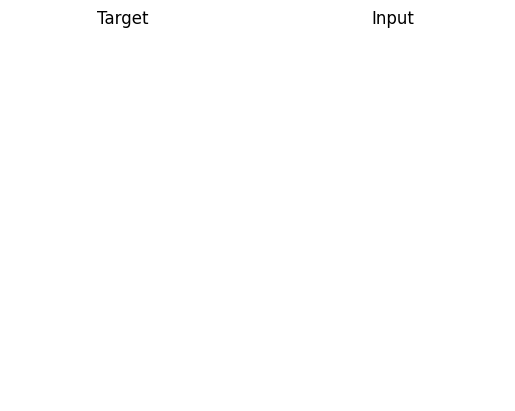

In [20]:
import os
import shutil
import random
import numpy as np
import pandas as pd
from os import listdir, mkdir, rename
from os.path import join, exists, isfile, isdir
import matplotlib.pyplot as plt
from highlight_text import ax_text, fig_text
from PIL import Image, UnidentifiedImageError
import warnings
from kaggle.api.kaggle_api_extended import KaggleApi

warnings.filterwarnings('ignore')

# Install the required packages
!pip install kaggle noise

# Function to create directory if it doesn't exist
def mkdir(path):
    if not exists(path):
        os.makedirs(path)

# Initialize Kaggle API
api = KaggleApi()
api.authenticate()

# Download the dataset from Kaggle
dataset_name = 'apollo2506/eurosat-dataset'
dataset_path = './datasets'
mkdir(dataset_path)
api.dataset_download_files(dataset_name, path=dataset_path, unzip=True)

# Verify the contents of the dataset directory
extracted_files = os.listdir(dataset_path)
print(f"Contents of dataset_path: {extracted_files}")

# Find the correct subdirectory containing the images
for root, dirs, files in os.walk(dataset_path):
    if any(isfile(join(root, f)) for f in files):
        path_input = root
        break

print(f"Using path_input: {path_input}")

# Define target directory
path_target = './EuroSat/all_targets'
mkdir(path_target)

# Process the dataset
classes = [d for d in os.listdir(path_input) if isdir(join(path_input, d))]
k = 1
for kind in classes:
    path = join(path_input, str(kind))
    for i, f in enumerate(os.listdir(path)):
        source_path = join(path, f)
        if isfile(source_path):
            target_path = join(path_target, f'{k}.jpg')
            shutil.copyfile(source_path, target_path)
            k += 1

print("Dataset processing complete.")

# Check the number of files copied
print(f"Total files in target directory: {len(os.listdir(path_target))}")

def generate_perlin_noise(width, height, scale, octaves, persistence, lacunarity):
    from noise import pnoise2
    noise = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            noise[i][j] = pnoise2(i / scale,
                                  j / scale,
                                  octaves=octaves,
                                  persistence=persistence,
                                  lacunarity=lacunarity,
                                  repeatx=width,
                                  repeaty=height,
                                  base=0)
    return noise

def normalize_noise(noise):
    min_val = noise.min()
    max_val = noise.max()
    return (noise - min_val) / (max_val - min_val)

def generate_clouds(width, height, base_scale, octaves, persistence, lacunarity):
    clouds = np.zeros((height, width))
    for octave in range(1, octaves + 1):
        scale = base_scale / octave
        layer = generate_perlin_noise(width, height, scale, 1, persistence, lacunarity)
        clouds += layer * (persistence ** octave)

    clouds = normalize_noise(clouds)
    return clouds

def overlay_clouds(image, clouds, alpha=0.5):
    clouds_rgb = np.stack([clouds] * 3, axis=-1)
    image = image.astype(float) / 255.0
    clouds_rgb = clouds_rgb.astype(float)
    blended = image * (1 - alpha) + clouds_rgb * alpha
    blended = (blended * 255).astype(np.uint8)
    return blended

width, height = 64, 64
octaves = 12
persistence = 0.5
lacunarity = 2

for i in range(len(listdir(path_target))):
    base_scale = random.uniform(5, 120)
    alpha = random.uniform(0, 1)

    clouds = generate_clouds(width, height, base_scale, octaves, persistence, lacunarity)

    try:
        img = np.asarray(Image.open(join(path_target, f'{i+1}.jpg')))
        image = Image.fromarray(overlay_clouds(img, clouds, alpha))
        image.save(join(path_input, f'{i+1}.jpg'))
        print(f'Processed {i+1}/{len(listdir(path_target))}')
    except UnidentifiedImageError:
        print(f"File {i+1}.jpg is not a valid image and will be skipped.")

# Randomly select an index to display
idx = np.random.randint(len(listdir(path_target)))
fig, ax = plt.subplots(1, 2)
try:
    ax[0].imshow(np.asarray(Image.open(join(path_target, f'{idx+1}.jpg'))))
    ax[1].imshow(np.asarray(Image.open(join(path_input, f'{idx+1}.jpg'))))
except UnidentifiedImageError:
    print(f"File {idx+1}.jpg is not a valid image and will be skipped in display.")

ax[0].set_title("Target")
ax[0].axis('off')
ax[1].set_title("Input")
ax[1].axis('off')
plt.show()
